In [109]:
import numpy as np
from numpy.random import multivariate_normal

from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [110]:
def plot(X, Y, ident_vector, mesh1_matrix, mesh2_matrix):
    plt.figure(figsize=(8, 7))
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
    
    ident_matrix = ident_vector.reshape(-1, mesh1_matrix.shape[1])
    
    con = plt.contour(mesh1_matrix, mesh2_matrix, ident_matrix, levels=[0.5])
    con.clabel()
    plt.show()
    
def metamorphose(all_data):
    x_min, x_max = int(all_data.min()) - 1, int(all_data.max()) + 1
    data_range = np.arange(x_min, x_max)
    mesh1, mesh2 = np.meshgrid(data_range, data_range)
    return np.hstack((np.reshape(mesh1, (-1, 1)), np.reshape(mesh2, (-1, 1)))), mesh1, mesh2

def build_multilayer_perceptron(input_dim, node_count, hidden_count):
    model = Sequential()

    # input
    model.add(Dense(units=node_count, input_dim=input_dim))
    model.add(Activation('relu'))

    #  hidden
    for index in range(hidden_count):
        model.add(Dense(units=node_count))
        model.add(Dropout(0.2))
        model.add(Activation('relu'))

    # output
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    return model

In [111]:
def run(X, Y, node_count, hidden_count, epochs):
    
    # transform data for grid
    all_x, mesh1, mesh2 = metamorphose(X)

    # use only two feature
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2)

    # Model Construction
    model = build_multilayer_perceptron(train_X.shape[1], node_count, hidden_count)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Fit
    model.fit(X, Y, epochs=epochs, batch_size=1)
    
    ident_vector = model.predict(all_x)
    plot(X, Y, ident_vector, mesh1, mesh2)

    # Score
    loss, accuracy = model.evaluate(X, Y, verbose=0)
    print("Accuracy = {:.2f}".format(accuracy))

Epoch 1/10


  1/150 [..............................] - ETA: 49:15 - loss: 0.5826 - acc: 1.0000

  5/150 [>.............................] - ETA: 9:36 - loss: 0.7058 - acc: 0.6000 

 10/150 [=>............................] - ETA: 4:39 - loss: 0.7387 - acc: 0.5000

 15/150 [==>...........................] - ETA: 3:00 - loss: 0.6836 - acc: 0.5333

 20/150 [===>..........................] - ETA: 2:10 - loss: 0.6938 - acc: 0.5000

 25/150 [====>.........................] - ETA: 1:40 - loss: 0.6927 - acc: 0.4800

 30/150 [=====>........................] - ETA: 1:20 - loss: 0.6867 - acc: 0.5000

 35/150 [======>.......................] - ETA: 1:06 - loss: 0.6735 - acc: 0.5143

 40/150 [=======>......................] - ETA: 55s - loss: 0.6831 - acc: 0.4750 

 44/150 [=======>......................] - ETA: 48s - loss: 0.6661 - acc: 0.5000

 49/150 [========>.....................] - ETA: 41s - loss: 0.6785 - acc: 0.4694

 54/150 [=========>....................] - ETA: 36s - loss: 0.6750 - acc: 0.4630

 59/150 [==========>...................] - ETA: 31s - loss: 0.6733 - acc: 0.4576

 64/150 [===========>..................] - ETA: 27s - loss: 0.6760 - acc: 0.4531

 69/150 [============>.................] - ETA: 24s - loss: 0.6752 - acc: 0.4638

 74/150 [=============>................] - ETA: 21s - loss: 0.6707 - acc: 0.5000

 79/150 [==============>...............] - ETA: 18s - loss: 0.6681 - acc: 0.5063

 84/150 [===============>..............] - ETA: 16s - loss: 0.6685 - acc: 0.5119

 89/150 [================>.............] - ETA: 14s - loss: 0.6683 - acc: 0.5281

 94/150 [=================>............] - ETA: 12s - loss: 0.6615 - acc: 0.5426

 99/150 [==================>...........] - ETA: 10s - loss: 0.6591 - acc: 0.5657

104/150 [===================>..........] - ETA: 9s - loss: 0.6550 - acc: 0.5769 

109/150 [====================>.........] - ETA: 7s - loss: 0.6505 - acc: 0.5963

114/150 [=====================>........] - ETA: 6s - loss: 0.6517 - acc: 0.6053

119/150 [======================>.......] - ETA: 5s - loss: 0.6498 - acc: 0.6134

124/150 [=======================>......] - ETA: 4s - loss: 0.6430 - acc: 0.6290

129/150 [========================>.....] - ETA: 3s - loss: 0.6397 - acc: 0.6434

134/150 [=========================>....] - ETA: 2s - loss: 0.6361 - acc: 0.6567

139/150 [==========================>...] - ETA: 1s - loss: 0.6303 - acc: 0.6691

144/150 [===========================>..] - ETA: 0s - loss: 0.6275 - acc: 0.6806

149/150 [============================>.] - ETA: 0s - loss: 0.6216 - acc: 0.6913

150/150 [==============================] - 21s 143ms/step - loss: 0.6185 - acc: 0.6933


Epoch 2/10
  1/150 [..............................] - ETA: 2s - loss: 0.6099 - acc: 1.0000

  6/150 [>.............................] - ETA: 1s - loss: 0.4536 - acc: 1.0000

 11/150 [=>............................] - ETA: 1s - loss: 0.4933 - acc: 0.9091

 16/150 [==>...........................] - ETA: 1s - loss: 0.4264 - acc: 0.9375

 21/150 [===>..........................] - ETA: 1s - loss: 0.4101 - acc: 0.9524

 26/150 [====>.........................] - ETA: 1s - loss: 0.4582 - acc: 0.9231

 31/150 [=====>........................] - ETA: 1s - loss: 0.4736 - acc: 0.9355

 36/150 [======>.......................] - ETA: 1s - loss: 0.5020 - acc: 0.9167

 41/150 [=======>......................] - ETA: 1s - loss: 0.4940 - acc: 0.9268

 46/150 [========>.....................] - ETA: 1s - loss: 0.4787 - acc: 0.9348

 52/150 [=========>....................] - ETA: 1s - loss: 0.4707 - acc: 0.9423

 57/150 [==========>...................] - ETA: 0s - loss: 0.4822 - acc: 0.9298

 62/150 [===========>..................] - ETA: 0s - loss: 0.4799 - acc: 0.9355

 67/150 [============>.................] - ETA: 0s - loss: 0.4810 - acc: 0.9403

 72/150 [=============>................] - ETA: 0s - loss: 0.4721 - acc: 0.9444

 77/150 [==============>...............] - ETA: 0s - loss: 0.4713 - acc: 0.9351

 82/150 [===============>..............] - ETA: 0s - loss: 0.4775 - acc: 0.9268

 87/150 [================>.............] - ETA: 0s - loss: 0.4788 - acc: 0.9195

 92/150 [=================>............] - ETA: 0s - loss: 0.4783 - acc: 0.9239

 97/150 [==================>...........] - ETA: 0s - loss: 0.4733 - acc: 0.9278

102/150 [===================>..........] - ETA: 0s - loss: 0.4679 - acc: 0.9314

107/150 [====================>.........] - ETA: 0s - loss: 0.4693 - acc: 0.9346

112/150 [=====================>........] - ETA: 0s - loss: 0.4686 - acc: 0.9375

117/150 [======================>.......] - ETA: 0s - loss: 0.4634 - acc: 0.9402

122/150 [=======================>......] - ETA: 0s - loss: 0.4589 - acc: 0.9426

126/150 [========================>.....] - ETA: 0s - loss: 0.4581 - acc: 0.9444

131/150 [=========================>....] - ETA: 0s - loss: 0.4562 - acc: 0.9466

136/150 [==========================>...] - ETA: 0s - loss: 0.4557 - acc: 0.9485

141/150 [===========================>..] - ETA: 0s - loss: 0.4585 - acc: 0.9504

146/150 [============================>.] - ETA: 0s - loss: 0.4559 - acc: 0.9452

150/150 [==============================] - 2s 11ms/step - loss: 0.4545 - acc: 0.9467


Epoch 3/10


  1/150 [..............................] - ETA: 1s - loss: 0.8882 - acc: 0.0000e+00

  6/150 [>.............................] - ETA: 1s - loss: 0.4986 - acc: 0.8333    

 11/150 [=>............................] - ETA: 1s - loss: 0.4875 - acc: 0.9091

 16/150 [==>...........................] - ETA: 1s - loss: 0.5034 - acc: 0.9375

 21/150 [===>..........................] - ETA: 1s - loss: 0.4758 - acc: 0.9524

 26/150 [====>.........................] - ETA: 1s - loss: 0.4835 - acc: 0.9231

 31/150 [=====>........................] - ETA: 1s - loss: 0.4738 - acc: 0.9355

 36/150 [======>.......................] - ETA: 1s - loss: 0.4780 - acc: 0.9444

 40/150 [=======>......................] - ETA: 1s - loss: 0.4413 - acc: 0.9500

 45/150 [========>.....................] - ETA: 1s - loss: 0.4249 - acc: 0.9556

 50/150 [=========>....................] - ETA: 1s - loss: 0.4362 - acc: 0.9600

 55/150 [==========>...................] - ETA: 1s - loss: 0.4119 - acc: 0.9636

 60/150 [===========>..................] - ETA: 0s - loss: 0.3897 - acc: 0.9667

 65/150 [============>.................] - ETA: 0s - loss: 0.3777 - acc: 0.9692

 70/150 [=============>................] - ETA: 0s - loss: 0.3667 - acc: 0.9714

 75/150 [==============>...............] - ETA: 0s - loss: 0.3709 - acc: 0.9733

 80/150 [===============>..............] - ETA: 0s - loss: 0.3655 - acc: 0.9750

 85/150 [================>.............] - ETA: 0s - loss: 0.3585 - acc: 0.9765

 90/150 [=================>............] - ETA: 0s - loss: 0.3552 - acc: 0.9778

 95/150 [==================>...........] - ETA: 0s - loss: 0.3528 - acc: 0.9789

100/150 [===================>..........] - ETA: 0s - loss: 0.3547 - acc: 0.9800

105/150 [====================>.........] - ETA: 0s - loss: 0.3522 - acc: 0.9810

110/150 [=====================>........] - ETA: 0s - loss: 0.3505 - acc: 0.9727

115/150 [======================>.......] - ETA: 0s - loss: 0.3437 - acc: 0.9739

120/150 [=======================>......] - ETA: 0s - loss: 0.3419 - acc: 0.9750

125/150 [========================>.....] - ETA: 0s - loss: 0.3355 - acc: 0.9760

130/150 [=========================>....] - ETA: 0s - loss: 0.3324 - acc: 0.9769

135/150 [==========================>...] - ETA: 0s - loss: 0.3335 - acc: 0.9778

140/150 [===========================>..] - ETA: 0s - loss: 0.3327 - acc: 0.9786

145/150 [============================>.] - ETA: 0s - loss: 0.3296 - acc: 0.9793

150/150 [==============================] - 2s 11ms/step - loss: 0.3232 - acc: 0.9800


Epoch 4/10
  1/150 [..............................] - ETA: 2s - loss: 0.0060 - acc: 1.0000

  5/150 [>.............................] - ETA: 2s - loss: 0.1935 - acc: 1.0000

 10/150 [=>............................] - ETA: 1s - loss: 0.2520 - acc: 1.0000

 15/150 [==>...........................] - ETA: 1s - loss: 0.2374 - acc: 1.0000

 20/150 [===>..........................] - ETA: 1s - loss: 0.2208 - acc: 1.0000

 25/150 [====>.........................] - ETA: 1s - loss: 0.2363 - acc: 1.0000

 30/150 [=====>........................] - ETA: 1s - loss: 0.2391 - acc: 1.0000

 35/150 [======>.......................] - ETA: 1s - loss: 0.2360 - acc: 1.0000

 40/150 [=======>......................] - ETA: 1s - loss: 0.2345 - acc: 1.0000

 45/150 [========>.....................] - ETA: 1s - loss: 0.2236 - acc: 1.0000

 50/150 [=========>....................] - ETA: 1s - loss: 0.2176 - acc: 1.0000

 55/150 [==========>...................] - ETA: 1s - loss: 0.2106 - acc: 1.0000

 60/150 [===========>..................] - ETA: 1s - loss: 0.2106 - acc: 1.0000

 64/150 [===========>..................] - ETA: 0s - loss: 0.2054 - acc: 1.0000

 69/150 [============>.................] - ETA: 0s - loss: 0.2065 - acc: 1.0000

 74/150 [=============>................] - ETA: 0s - loss: 0.2158 - acc: 0.9865

 79/150 [==============>...............] - ETA: 0s - loss: 0.2135 - acc: 0.9873

 84/150 [===============>..............] - ETA: 0s - loss: 0.2119 - acc: 0.9881

 89/150 [================>.............] - ETA: 0s - loss: 0.2051 - acc: 0.9888

 94/150 [=================>............] - ETA: 0s - loss: 0.2110 - acc: 0.9787

 99/150 [==================>...........] - ETA: 0s - loss: 0.2106 - acc: 0.9798

104/150 [===================>..........] - ETA: 0s - loss: 0.2061 - acc: 0.9808

109/150 [====================>.........] - ETA: 0s - loss: 0.2061 - acc: 0.9817

114/150 [=====================>........] - ETA: 0s - loss: 0.2056 - acc: 0.9825

119/150 [======================>.......] - ETA: 0s - loss: 0.2140 - acc: 0.9748

124/150 [=======================>......] - ETA: 0s - loss: 0.2108 - acc: 0.9758

129/150 [========================>.....] - ETA: 0s - loss: 0.2078 - acc: 0.9767

134/150 [=========================>....] - ETA: 0s - loss: 0.2067 - acc: 0.9776

139/150 [==========================>...] - ETA: 0s - loss: 0.2048 - acc: 0.9784

144/150 [===========================>..] - ETA: 0s - loss: 0.2004 - acc: 0.9792

149/150 [============================>.] - ETA: 0s - loss: 0.2011 - acc: 0.9799

150/150 [==============================] - 2s 11ms/step - loss: 0.2007 - acc: 0.9800


Epoch 5/10
  1/150 [..............................] - ETA: 1s - loss: 0.0509 - acc: 1.0000

  5/150 [>.............................] - ETA: 1s - loss: 0.1671 - acc: 1.0000

 10/150 [=>............................] - ETA: 1s - loss: 0.1463 - acc: 1.0000

 15/150 [==>...........................] - ETA: 1s - loss: 0.1342 - acc: 1.0000

 20/150 [===>..........................] - ETA: 1s - loss: 0.1220 - acc: 1.0000

 25/150 [====>.........................] - ETA: 1s - loss: 0.1597 - acc: 0.9600

 30/150 [=====>........................] - ETA: 1s - loss: 0.1614 - acc: 0.9667

 35/150 [======>.......................] - ETA: 1s - loss: 0.1858 - acc: 0.9429

 40/150 [=======>......................] - ETA: 1s - loss: 0.1805 - acc: 0.9500

 45/150 [========>.....................] - ETA: 1s - loss: 0.1940 - acc: 0.9333

 50/150 [=========>....................] - ETA: 1s - loss: 0.1996 - acc: 0.9200

 55/150 [==========>...................] - ETA: 1s - loss: 0.1939 - acc: 0.9273

 60/150 [===========>..................] - ETA: 0s - loss: 0.2010 - acc: 0.9167

 65/150 [============>.................] - ETA: 0s - loss: 0.2015 - acc: 0.9077

 70/150 [=============>................] - ETA: 0s - loss: 0.1936 - acc: 0.9143

 74/150 [=============>................] - ETA: 0s - loss: 0.2219 - acc: 0.8919

 79/150 [==============>...............] - ETA: 0s - loss: 0.2177 - acc: 0.8987

 84/150 [===============>..............] - ETA: 0s - loss: 0.2099 - acc: 0.9048

 89/150 [================>.............] - ETA: 0s - loss: 0.2077 - acc: 0.9101

 94/150 [=================>............] - ETA: 0s - loss: 0.2094 - acc: 0.9149

 99/150 [==================>...........] - ETA: 0s - loss: 0.2005 - acc: 0.9192

104/150 [===================>..........] - ETA: 0s - loss: 0.1941 - acc: 0.9231

109/150 [====================>.........] - ETA: 0s - loss: 0.1886 - acc: 0.9266

114/150 [=====================>........] - ETA: 0s - loss: 0.1860 - acc: 0.9298

119/150 [======================>.......] - ETA: 0s - loss: 0.1921 - acc: 0.9328

124/150 [=======================>......] - ETA: 0s - loss: 0.1915 - acc: 0.9355

129/150 [========================>.....] - ETA: 0s - loss: 0.1895 - acc: 0.9380

134/150 [=========================>....] - ETA: 0s - loss: 0.1861 - acc: 0.9403

139/150 [==========================>...] - ETA: 0s - loss: 0.1904 - acc: 0.9353

144/150 [===========================>..] - ETA: 0s - loss: 0.1856 - acc: 0.9375

149/150 [============================>.] - ETA: 0s - loss: 0.1807 - acc: 0.9396

150/150 [==============================] - 2s 11ms/step - loss: 0.1795 - acc: 0.9400


Epoch 6/10
  1/150 [..............................] - ETA: 1s - loss: 0.2695 - acc: 1.0000

  5/150 [>.............................] - ETA: 1s - loss: 0.2893 - acc: 1.0000

 10/150 [=>............................] - ETA: 1s - loss: 0.2198 - acc: 1.0000

 15/150 [==>...........................] - ETA: 1s - loss: 0.1908 - acc: 1.0000

 20/150 [===>..........................] - ETA: 1s - loss: 0.1734 - acc: 1.0000

 25/150 [====>.........................] - ETA: 1s - loss: 0.1561 - acc: 1.0000

 30/150 [=====>........................] - ETA: 1s - loss: 0.1380 - acc: 1.0000

 35/150 [======>.......................] - ETA: 1s - loss: 0.1821 - acc: 0.9714

 40/150 [=======>......................] - ETA: 1s - loss: 0.1680 - acc: 0.9750

 45/150 [========>.....................] - ETA: 1s - loss: 0.1535 - acc: 0.9778

 50/150 [=========>....................] - ETA: 1s - loss: 0.1442 - acc: 0.9800

 55/150 [==========>...................] - ETA: 1s - loss: 0.1410 - acc: 0.9818

 60/150 [===========>..................] - ETA: 0s - loss: 0.1394 - acc: 0.9833

 65/150 [============>.................] - ETA: 0s - loss: 0.1366 - acc: 0.9846

 70/150 [=============>................] - ETA: 0s - loss: 0.1309 - acc: 0.9857

 75/150 [==============>...............] - ETA: 0s - loss: 0.1305 - acc: 0.9867

 80/150 [===============>..............] - ETA: 0s - loss: 0.1256 - acc: 0.9875

 85/150 [================>.............] - ETA: 0s - loss: 0.1234 - acc: 0.9882

 90/150 [=================>............] - ETA: 0s - loss: 0.1175 - acc: 0.9889

 95/150 [==================>...........] - ETA: 0s - loss: 0.1193 - acc: 0.9895

100/150 [===================>..........] - ETA: 0s - loss: 0.1158 - acc: 0.9900

105/150 [====================>.........] - ETA: 0s - loss: 0.1130 - acc: 0.9905

110/150 [=====================>........] - ETA: 0s - loss: 0.1111 - acc: 0.9909

115/150 [======================>.......] - ETA: 0s - loss: 0.1219 - acc: 0.9826

120/150 [=======================>......] - ETA: 0s - loss: 0.1219 - acc: 0.9833

125/150 [========================>.....] - ETA: 0s - loss: 0.1180 - acc: 0.9840

130/150 [=========================>....] - ETA: 0s - loss: 0.1181 - acc: 0.9846

135/150 [==========================>...] - ETA: 0s - loss: 0.1208 - acc: 0.9852

140/150 [===========================>..] - ETA: 0s - loss: 0.1224 - acc: 0.9857

145/150 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9862

150/150 [==============================] - 2s 11ms/step - loss: 0.1194 - acc: 0.9867


Epoch 7/10
  1/150 [..............................] - ETA: 1s - loss: 0.0261 - acc: 1.0000

  5/150 [>.............................] - ETA: 1s - loss: 0.0962 - acc: 1.0000

 10/150 [=>............................] - ETA: 1s - loss: 0.1081 - acc: 1.0000

 15/150 [==>...........................] - ETA: 1s - loss: 0.0916 - acc: 1.0000

 20/150 [===>..........................] - ETA: 1s - loss: 0.0795 - acc: 1.0000

 25/150 [====>.........................] - ETA: 1s - loss: 0.0906 - acc: 1.0000

 30/150 [=====>........................] - ETA: 1s - loss: 0.1026 - acc: 1.0000

 35/150 [======>.......................] - ETA: 1s - loss: 0.1054 - acc: 1.0000

 40/150 [=======>......................] - ETA: 1s - loss: 0.0956 - acc: 1.0000

 45/150 [========>.....................] - ETA: 1s - loss: 0.0871 - acc: 1.0000

 50/150 [=========>....................] - ETA: 1s - loss: 0.0865 - acc: 1.0000

 55/150 [==========>...................] - ETA: 1s - loss: 0.0813 - acc: 1.0000

 60/150 [===========>..................] - ETA: 0s - loss: 0.1018 - acc: 0.9833

 65/150 [============>.................] - ETA: 0s - loss: 0.0949 - acc: 0.9846

 70/150 [=============>................] - ETA: 0s - loss: 0.0887 - acc: 0.9857

 75/150 [==============>...............] - ETA: 0s - loss: 0.0907 - acc: 0.9867

 80/150 [===============>..............] - ETA: 0s - loss: 0.0917 - acc: 0.9875

 85/150 [================>.............] - ETA: 0s - loss: 0.0902 - acc: 0.9882

 90/150 [=================>............] - ETA: 0s - loss: 0.0919 - acc: 0.9889

 95/150 [==================>...........] - ETA: 0s - loss: 0.0942 - acc: 0.9895

100/150 [===================>..........] - ETA: 0s - loss: 0.0902 - acc: 0.9900

105/150 [====================>.........] - ETA: 0s - loss: 0.0899 - acc: 0.9905

110/150 [=====================>........] - ETA: 0s - loss: 0.0913 - acc: 0.9909

115/150 [======================>.......] - ETA: 0s - loss: 0.0902 - acc: 0.9913

120/150 [=======================>......] - ETA: 0s - loss: 0.0897 - acc: 0.9917

125/150 [========================>.....] - ETA: 0s - loss: 0.0866 - acc: 0.9920

130/150 [=========================>....] - ETA: 0s - loss: 0.0860 - acc: 0.9923

135/150 [==========================>...] - ETA: 0s - loss: 0.0841 - acc: 0.9926

140/150 [===========================>..] - ETA: 0s - loss: 0.0823 - acc: 0.9929

145/150 [============================>.] - ETA: 0s - loss: 0.0812 - acc: 0.9931

150/150 [==============================] - 2s 11ms/step - loss: 0.0800 - acc: 0.9933


Epoch 8/10
  1/150 [..............................] - ETA: 1s - loss: 0.1853 - acc: 1.0000

  5/150 [>.............................] - ETA: 1s - loss: 0.1465 - acc: 1.0000

 10/150 [=>............................] - ETA: 1s - loss: 0.1078 - acc: 1.0000

 15/150 [==>...........................] - ETA: 1s - loss: 0.0799 - acc: 1.0000

 20/150 [===>..........................] - ETA: 1s - loss: 0.0777 - acc: 1.0000

 25/150 [====>.........................] - ETA: 1s - loss: 0.0970 - acc: 1.0000

 30/150 [=====>........................] - ETA: 1s - loss: 0.0840 - acc: 1.0000

 35/150 [======>.......................] - ETA: 1s - loss: 0.0820 - acc: 1.0000

 40/150 [=======>......................] - ETA: 1s - loss: 0.0728 - acc: 1.0000

 45/150 [========>.....................] - ETA: 1s - loss: 0.0848 - acc: 1.0000

 50/150 [=========>....................] - ETA: 1s - loss: 0.0798 - acc: 1.0000

 55/150 [==========>...................] - ETA: 1s - loss: 0.0917 - acc: 1.0000

 60/150 [===========>..................] - ETA: 0s - loss: 0.0851 - acc: 1.0000

 65/150 [============>.................] - ETA: 0s - loss: 0.0793 - acc: 1.0000

 70/150 [=============>................] - ETA: 0s - loss: 0.0810 - acc: 1.0000

 75/150 [==============>...............] - ETA: 0s - loss: 0.0760 - acc: 1.0000

 80/150 [===============>..............] - ETA: 0s - loss: 0.0735 - acc: 1.0000

 85/150 [================>.............] - ETA: 0s - loss: 0.0768 - acc: 1.0000

 90/150 [=================>............] - ETA: 0s - loss: 0.0794 - acc: 1.0000

 95/150 [==================>...........] - ETA: 0s - loss: 0.0780 - acc: 1.0000

100/150 [===================>..........] - ETA: 0s - loss: 0.0783 - acc: 1.0000

105/150 [====================>.........] - ETA: 0s - loss: 0.0749 - acc: 1.0000

110/150 [=====================>........] - ETA: 0s - loss: 0.0733 - acc: 1.0000

115/150 [======================>.......] - ETA: 0s - loss: 0.0776 - acc: 1.0000

120/150 [=======================>......] - ETA: 0s - loss: 0.0751 - acc: 1.0000

125/150 [========================>.....] - ETA: 0s - loss: 0.0734 - acc: 1.0000

130/150 [=========================>....] - ETA: 0s - loss: 0.0710 - acc: 1.0000

135/150 [==========================>...] - ETA: 0s - loss: 0.0691 - acc: 1.0000

140/150 [===========================>..] - ETA: 0s - loss: 0.0668 - acc: 1.0000

145/150 [============================>.] - ETA: 0s - loss: 0.0697 - acc: 1.0000

150/150 [==============================] - 2s 11ms/step - loss: 0.0679 - acc: 1.0000


Epoch 9/10
  1/150 [..............................] - ETA: 2s - loss: 0.0079 - acc: 1.0000

  5/150 [>.............................] - ETA: 1s - loss: 0.0328 - acc: 1.0000

 10/150 [=>............................] - ETA: 1s - loss: 0.0252 - acc: 1.0000

 15/150 [==>...........................] - ETA: 1s - loss: 0.0261 - acc: 1.0000

 20/150 [===>..........................] - ETA: 1s - loss: 0.0272 - acc: 1.0000

 25/150 [====>.........................] - ETA: 1s - loss: 0.0290 - acc: 1.0000

 30/150 [=====>........................] - ETA: 1s - loss: 0.0252 - acc: 1.0000

 35/150 [======>.......................] - ETA: 1s - loss: 0.0243 - acc: 1.0000

 40/150 [=======>......................] - ETA: 1s - loss: 0.0286 - acc: 1.0000

 45/150 [========>.....................] - ETA: 1s - loss: 0.0279 - acc: 1.0000

 50/150 [=========>....................] - ETA: 1s - loss: 0.0255 - acc: 1.0000

 55/150 [==========>...................] - ETA: 1s - loss: 0.0273 - acc: 1.0000

 60/150 [===========>..................] - ETA: 0s - loss: 0.0261 - acc: 1.0000

 65/150 [============>.................] - ETA: 0s - loss: 0.0551 - acc: 0.9846

 70/150 [=============>................] - ETA: 0s - loss: 0.0536 - acc: 0.9857

 75/150 [==============>...............] - ETA: 0s - loss: 0.0512 - acc: 0.9867

 80/150 [===============>..............] - ETA: 0s - loss: 0.0496 - acc: 0.9875

 85/150 [================>.............] - ETA: 0s - loss: 0.0491 - acc: 0.9882

 90/150 [=================>............] - ETA: 0s - loss: 0.0528 - acc: 0.9889

 95/150 [==================>...........] - ETA: 0s - loss: 0.0506 - acc: 0.9895

100/150 [===================>..........] - ETA: 0s - loss: 0.0488 - acc: 0.9900

105/150 [====================>.........] - ETA: 0s - loss: 0.0586 - acc: 0.9810

110/150 [=====================>........] - ETA: 0s - loss: 0.0573 - acc: 0.9818

115/150 [======================>.......] - ETA: 0s - loss: 0.0574 - acc: 0.9826

120/150 [=======================>......] - ETA: 0s - loss: 0.0561 - acc: 0.9833

125/150 [========================>.....] - ETA: 0s - loss: 0.0558 - acc: 0.9840

130/150 [=========================>....] - ETA: 0s - loss: 0.0537 - acc: 0.9846

135/150 [==========================>...] - ETA: 0s - loss: 0.0519 - acc: 0.9852

140/150 [===========================>..] - ETA: 0s - loss: 0.0504 - acc: 0.9857

145/150 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9862

150/150 [==============================] - 2s 11ms/step - loss: 0.0492 - acc: 0.9867


Epoch 10/10
  1/150 [..............................] - ETA: 2s - loss: 0.0022 - acc: 1.0000

  6/150 [>.............................] - ETA: 1s - loss: 0.0120 - acc: 1.0000

 11/150 [=>............................] - ETA: 1s - loss: 0.0178 - acc: 1.0000

 16/150 [==>...........................] - ETA: 1s - loss: 0.0251 - acc: 1.0000

 21/150 [===>..........................] - ETA: 1s - loss: 0.0305 - acc: 1.0000

 26/150 [====>.........................] - ETA: 1s - loss: 0.0299 - acc: 1.0000

 31/150 [=====>........................] - ETA: 1s - loss: 0.0285 - acc: 1.0000

 36/150 [======>.......................] - ETA: 1s - loss: 0.0410 - acc: 1.0000

 41/150 [=======>......................] - ETA: 1s - loss: 0.0433 - acc: 1.0000

 46/150 [========>.....................] - ETA: 1s - loss: 0.0419 - acc: 1.0000

 51/150 [=========>....................] - ETA: 1s - loss: 0.0385 - acc: 1.0000

 56/150 [==========>...................] - ETA: 1s - loss: 0.0377 - acc: 1.0000

 61/150 [===========>..................] - ETA: 0s - loss: 0.0365 - acc: 1.0000

 66/150 [============>.................] - ETA: 0s - loss: 0.0383 - acc: 1.0000

 71/150 [=============>................] - ETA: 0s - loss: 0.0438 - acc: 1.0000

 76/150 [==============>...............] - ETA: 0s - loss: 0.0414 - acc: 1.0000

 81/150 [===============>..............] - ETA: 0s - loss: 0.0398 - acc: 1.0000

 86/150 [================>.............] - ETA: 0s - loss: 0.0379 - acc: 1.0000

 91/150 [=================>............] - ETA: 0s - loss: 0.0360 - acc: 1.0000

 96/150 [==================>...........] - ETA: 0s - loss: 0.0360 - acc: 1.0000

101/150 [===================>..........] - ETA: 0s - loss: 0.0374 - acc: 1.0000

106/150 [====================>.........] - ETA: 0s - loss: 0.0392 - acc: 1.0000

111/150 [=====================>........] - ETA: 0s - loss: 0.0412 - acc: 1.0000

116/150 [======================>.......] - ETA: 0s - loss: 0.0421 - acc: 1.0000

121/150 [=======================>......] - ETA: 0s - loss: 0.0479 - acc: 1.0000

126/150 [========================>.....] - ETA: 0s - loss: 0.0502 - acc: 1.0000

131/150 [=========================>....] - ETA: 0s - loss: 0.0484 - acc: 1.0000

136/150 [==========================>...] - ETA: 0s - loss: 0.0482 - acc: 1.0000

141/150 [===========================>..] - ETA: 0s - loss: 0.0500 - acc: 1.0000

145/150 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 1.0000

150/150 [==============================] - 2s 11ms/step - loss: 0.0484 - acc: 1.0000


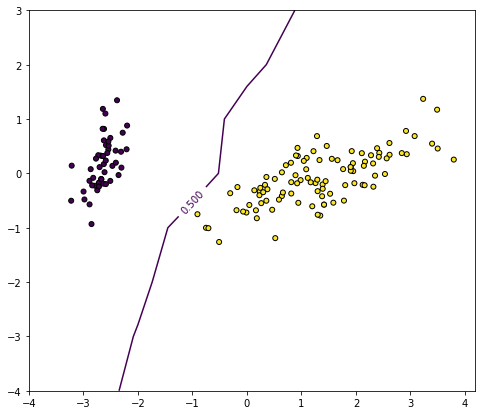

Accuracy = 1.00


In [112]:
def main():
    iris = datasets.load_iris()
    X = iris.data
    Y = iris.target
    node_count = 10
    hidden_count = 3
    epochs = 10
    Y = np.where(Y == 2, 1, Y)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    run(X_pca, Y, node_count, hidden_count, epochs)
main()

In [34]:
def make_data(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2):
    x1_data_num = int(data_num * pai1)
    x2_data_num = int(data_num * pai2)

    x1 = multivariate_normal(mu1, sigma1, x1_data_num)
    x2 = multivariate_normal(mu2, sigma2, x2_data_num)
    
    Y = np.hstack((np.zeros(x1_data_num), np.ones(x2_data_num)))
                  
    return np.vstack((x1, x2)), Y

(800, 2) (1000, 2) (800,) (1000,)


Epoch 1/20


   1/1000 [..............................] - ETA: 2:25:32 - loss: 0.6489 - acc: 1.0000

   6/1000 [..............................] - ETA: 24:16 - loss: 0.6102 - acc: 0.6667  

  12/1000 [..............................] - ETA: 12:08 - loss: 0.6309 - acc: 0.6667

  17/1000 [..............................] - ETA: 8:34 - loss: 0.7118 - acc: 0.5882 

  23/1000 [..............................] - ETA: 6:20 - loss: 0.6832 - acc: 0.5652

  29/1000 [..............................] - ETA: 5:01 - loss: 0.7038 - acc: 0.5862

  34/1000 [>.............................] - ETA: 4:17 - loss: 0.7497 - acc: 0.5882

  40/1000 [>.............................] - ETA: 3:39 - loss: 0.7392 - acc: 0.5750

  46/1000 [>.............................] - ETA: 3:10 - loss: 0.7310 - acc: 0.5435

  51/1000 [>.............................] - ETA: 2:51 - loss: 0.7556 - acc: 0.5294

  56/1000 [>.............................] - ETA: 2:36 - loss: 0.7421 - acc: 0.5536

  61/1000 [>.............................] - ETA: 2:23 - loss: 0.7239 - acc: 0.5902

  67/1000 [=>............................] - ETA: 2:10 - loss: 0.7201 - acc: 0.5821

  72/1000 [=>............................] - ETA: 2:01 - loss: 0.7138 - acc: 0.5694

  77/1000 [=>............................] - ETA: 1:53 - loss: 0.6997 - acc: 0.5844

  82/1000 [=>............................] - ETA: 1:46 - loss: 0.6996 - acc: 0.5976

  87/1000 [=>............................] - ETA: 1:40 - loss: 0.6968 - acc: 0.5977

  92/1000 [=>............................] - ETA: 1:35 - loss: 0.6870 - acc: 0.6196

  97/1000 [=>............................] - ETA: 1:30 - loss: 0.6844 - acc: 0.6186

 103/1000 [==>...........................] - ETA: 1:25 - loss: 0.6780 - acc: 0.6019

 108/1000 [==>...........................] - ETA: 1:21 - loss: 0.6943 - acc: 0.5926

 113/1000 [==>...........................] - ETA: 1:17 - loss: 0.6872 - acc: 0.5929

 118/1000 [==>...........................] - ETA: 1:14 - loss: 0.6842 - acc: 0.5847

 123/1000 [==>...........................] - ETA: 1:11 - loss: 0.6859 - acc: 0.5772

 129/1000 [==>...........................] - ETA: 1:07 - loss: 0.6891 - acc: 0.5736

 134/1000 [===>..........................] - ETA: 1:05 - loss: 0.6746 - acc: 0.5896

 140/1000 [===>..........................] - ETA: 1:02 - loss: 0.6741 - acc: 0.5857

 146/1000 [===>..........................] - ETA: 59s - loss: 0.6693 - acc: 0.5890 

 151/1000 [===>..........................] - ETA: 57s - loss: 0.6697 - acc: 0.5894

 156/1000 [===>..........................] - ETA: 55s - loss: 0.6676 - acc: 0.5833

 161/1000 [===>..........................] - ETA: 53s - loss: 0.6618 - acc: 0.5839

 166/1000 [===>..........................] - ETA: 52s - loss: 0.6628 - acc: 0.5843

 171/1000 [====>.........................] - ETA: 50s - loss: 0.6649 - acc: 0.5731

 176/1000 [====>.........................] - ETA: 49s - loss: 0.6610 - acc: 0.5682

 181/1000 [====>.........................] - ETA: 47s - loss: 0.6599 - acc: 0.5635

 187/1000 [====>.........................] - ETA: 46s - loss: 0.6606 - acc: 0.5668

 192/1000 [====>.........................] - ETA: 44s - loss: 0.6615 - acc: 0.5625

 197/1000 [====>.........................] - ETA: 43s - loss: 0.6628 - acc: 0.5533

 202/1000 [=====>........................] - ETA: 42s - loss: 0.6568 - acc: 0.5594

 208/1000 [=====>........................] - ETA: 41s - loss: 0.6543 - acc: 0.5625

 213/1000 [=====>........................] - ETA: 40s - loss: 0.6528 - acc: 0.5728

 218/1000 [=====>........................] - ETA: 39s - loss: 0.6535 - acc: 0.5734

 223/1000 [=====>........................] - ETA: 38s - loss: 0.6492 - acc: 0.5740

 229/1000 [=====>........................] - ETA: 37s - loss: 0.6521 - acc: 0.5633

 234/1000 [======>.......................] - ETA: 36s - loss: 0.6542 - acc: 0.5641

 239/1000 [======>.......................] - ETA: 35s - loss: 0.6517 - acc: 0.5690

 244/1000 [======>.......................] - ETA: 34s - loss: 0.6451 - acc: 0.5738

 249/1000 [======>.......................] - ETA: 33s - loss: 0.6507 - acc: 0.5743

 255/1000 [======>.......................] - ETA: 33s - loss: 0.6494 - acc: 0.5804

 260/1000 [======>.......................] - ETA: 32s - loss: 0.6469 - acc: 0.5808

 265/1000 [======>.......................] - ETA: 31s - loss: 0.6432 - acc: 0.5849

 270/1000 [=======>......................] - ETA: 30s - loss: 0.6381 - acc: 0.5852

 275/1000 [=======>......................] - ETA: 30s - loss: 0.6372 - acc: 0.5855

 280/1000 [=======>......................] - ETA: 29s - loss: 0.6374 - acc: 0.5857

 285/1000 [=======>......................] - ETA: 29s - loss: 0.6347 - acc: 0.5825

 290/1000 [=======>......................] - ETA: 28s - loss: 0.6337 - acc: 0.5828

 296/1000 [=======>......................] - ETA: 27s - loss: 0.6343 - acc: 0.5878

 301/1000 [========>.....................] - ETA: 27s - loss: 0.6305 - acc: 0.5914

 307/1000 [========>.....................] - ETA: 26s - loss: 0.6320 - acc: 0.5928

 313/1000 [========>.....................] - ETA: 26s - loss: 0.6332 - acc: 0.5942

 318/1000 [========>.....................] - ETA: 25s - loss: 0.6328 - acc: 0.5943

 323/1000 [========>.....................] - ETA: 25s - loss: 0.6315 - acc: 0.5975

 328/1000 [========>.....................] - ETA: 24s - loss: 0.6318 - acc: 0.5945

 334/1000 [=========>....................] - ETA: 24s - loss: 0.6335 - acc: 0.5988

 340/1000 [=========>....................] - ETA: 23s - loss: 0.6300 - acc: 0.6059

 345/1000 [=========>....................] - ETA: 23s - loss: 0.6307 - acc: 0.6058

 350/1000 [=========>....................] - ETA: 22s - loss: 0.6295 - acc: 0.6086

 355/1000 [=========>....................] - ETA: 22s - loss: 0.6281 - acc: 0.6113

 361/1000 [=========>....................] - ETA: 21s - loss: 0.6286 - acc: 0.6150

 366/1000 [=========>....................] - ETA: 21s - loss: 0.6286 - acc: 0.6120

 371/1000 [==========>...................] - ETA: 21s - loss: 0.6276 - acc: 0.6146

 376/1000 [==========>...................] - ETA: 20s - loss: 0.6292 - acc: 0.6117

 381/1000 [==========>...................] - ETA: 20s - loss: 0.6275 - acc: 0.6115

 386/1000 [==========>...................] - ETA: 20s - loss: 0.6243 - acc: 0.6166

 391/1000 [==========>...................] - ETA: 19s - loss: 0.6234 - acc: 0.6164

 396/1000 [==========>...................] - ETA: 19s - loss: 0.6223 - acc: 0.6187

 401/1000 [===========>..................] - ETA: 19s - loss: 0.6236 - acc: 0.6160

 407/1000 [===========>..................] - ETA: 18s - loss: 0.6222 - acc: 0.6216

 412/1000 [===========>..................] - ETA: 18s - loss: 0.6264 - acc: 0.6214

 418/1000 [===========>..................] - ETA: 18s - loss: 0.6245 - acc: 0.6220

 423/1000 [===========>..................] - ETA: 17s - loss: 0.6235 - acc: 0.6241

 428/1000 [===========>..................] - ETA: 17s - loss: 0.6217 - acc: 0.6285

 433/1000 [===========>..................] - ETA: 17s - loss: 0.6222 - acc: 0.6305

 438/1000 [============>.................] - ETA: 16s - loss: 0.6180 - acc: 0.6347

 443/1000 [============>.................] - ETA: 16s - loss: 0.6174 - acc: 0.6366

 448/1000 [============>.................] - ETA: 16s - loss: 0.6133 - acc: 0.6406

 454/1000 [============>.................] - ETA: 16s - loss: 0.6128 - acc: 0.6432

 460/1000 [============>.................] - ETA: 15s - loss: 0.6145 - acc: 0.6435

 465/1000 [============>.................] - ETA: 15s - loss: 0.6190 - acc: 0.6430

 470/1000 [=============>................] - ETA: 15s - loss: 0.6188 - acc: 0.6426

 475/1000 [=============>................] - ETA: 14s - loss: 0.6165 - acc: 0.6442

 481/1000 [=============>................] - ETA: 14s - loss: 0.6155 - acc: 0.6445

 487/1000 [=============>................] - ETA: 14s - loss: 0.6140 - acc: 0.6468

 492/1000 [=============>................] - ETA: 14s - loss: 0.6145 - acc: 0.6423

 497/1000 [=============>................] - ETA: 13s - loss: 0.6152 - acc: 0.6419

 502/1000 [==============>...............] - ETA: 13s - loss: 0.6137 - acc: 0.6454

 507/1000 [==============>...............] - ETA: 13s - loss: 0.6133 - acc: 0.6469

 512/1000 [==============>...............] - ETA: 13s - loss: 0.6159 - acc: 0.6426

 517/1000 [==============>...............] - ETA: 13s - loss: 0.6159 - acc: 0.6441

 523/1000 [==============>...............] - ETA: 12s - loss: 0.6112 - acc: 0.6482

 528/1000 [==============>...............] - ETA: 12s - loss: 0.6103 - acc: 0.6496

 533/1000 [==============>...............] - ETA: 12s - loss: 0.6094 - acc: 0.6510

 538/1000 [===============>..............] - ETA: 12s - loss: 0.6100 - acc: 0.6524

 543/1000 [===============>..............] - ETA: 11s - loss: 0.6103 - acc: 0.6538

 548/1000 [===============>..............] - ETA: 11s - loss: 0.6079 - acc: 0.6569

 554/1000 [===============>..............] - ETA: 11s - loss: 0.6069 - acc: 0.6588

 560/1000 [===============>..............] - ETA: 11s - loss: 0.6040 - acc: 0.6625

 565/1000 [===============>..............] - ETA: 11s - loss: 0.6028 - acc: 0.6637

 570/1000 [================>.............] - ETA: 10s - loss: 0.6023 - acc: 0.6667

 575/1000 [================>.............] - ETA: 10s - loss: 0.6027 - acc: 0.6678

 581/1000 [================>.............] - ETA: 10s - loss: 0.6021 - acc: 0.6695

 586/1000 [================>.............] - ETA: 10s - loss: 0.5997 - acc: 0.6724

 591/1000 [================>.............] - ETA: 10s - loss: 0.5970 - acc: 0.6751

 596/1000 [================>.............] - ETA: 9s - loss: 0.5952 - acc: 0.6779 

 601/1000 [=================>............] - ETA: 9s - loss: 0.5939 - acc: 0.6805

 607/1000 [=================>............] - ETA: 9s - loss: 0.5921 - acc: 0.6837

 612/1000 [=================>............] - ETA: 9s - loss: 0.5912 - acc: 0.6863

 617/1000 [=================>............] - ETA: 9s - loss: 0.5899 - acc: 0.6872

 622/1000 [=================>............] - ETA: 9s - loss: 0.5898 - acc: 0.6865

 627/1000 [=================>............] - ETA: 8s - loss: 0.5862 - acc: 0.6890

 633/1000 [=================>............] - ETA: 8s - loss: 0.5855 - acc: 0.6904

 638/1000 [==================>...........] - ETA: 8s - loss: 0.5844 - acc: 0.6928

 644/1000 [==================>...........] - ETA: 8s - loss: 0.5844 - acc: 0.6925

 650/1000 [==================>...........] - ETA: 8s - loss: 0.5843 - acc: 0.6908

 655/1000 [==================>...........] - ETA: 8s - loss: 0.5831 - acc: 0.6931

 661/1000 [==================>...........] - ETA: 7s - loss: 0.5815 - acc: 0.6959

 666/1000 [==================>...........] - ETA: 7s - loss: 0.5804 - acc: 0.6982

 671/1000 [===================>..........] - ETA: 7s - loss: 0.5795 - acc: 0.6975

 676/1000 [===================>..........] - ETA: 7s - loss: 0.5790 - acc: 0.6982

 681/1000 [===================>..........] - ETA: 7s - loss: 0.5780 - acc: 0.6990

 686/1000 [===================>..........] - ETA: 7s - loss: 0.5785 - acc: 0.6983

 691/1000 [===================>..........] - ETA: 7s - loss: 0.5780 - acc: 0.6990

 696/1000 [===================>..........] - ETA: 6s - loss: 0.5753 - acc: 0.7011

 701/1000 [====================>.........] - ETA: 6s - loss: 0.5739 - acc: 0.7019

 707/1000 [====================>.........] - ETA: 6s - loss: 0.5727 - acc: 0.7030

 712/1000 [====================>.........] - ETA: 6s - loss: 0.5707 - acc: 0.7051

 718/1000 [====================>.........] - ETA: 6s - loss: 0.5693 - acc: 0.7075

 723/1000 [====================>.........] - ETA: 6s - loss: 0.5663 - acc: 0.7095

 729/1000 [====================>.........] - ETA: 5s - loss: 0.5622 - acc: 0.7119

 734/1000 [=====================>........] - ETA: 5s - loss: 0.5612 - acc: 0.7125

 739/1000 [=====================>........] - ETA: 5s - loss: 0.5611 - acc: 0.7131

 745/1000 [=====================>........] - ETA: 5s - loss: 0.5605 - acc: 0.7141

 750/1000 [=====================>........] - ETA: 5s - loss: 0.5592 - acc: 0.7147

 756/1000 [=====================>........] - ETA: 5s - loss: 0.5570 - acc: 0.7169

 761/1000 [=====================>........] - ETA: 5s - loss: 0.5567 - acc: 0.7188

 766/1000 [=====================>........] - ETA: 5s - loss: 0.5554 - acc: 0.7206

 771/1000 [======================>.......] - ETA: 4s - loss: 0.5545 - acc: 0.7211

 776/1000 [======================>.......] - ETA: 4s - loss: 0.5526 - acc: 0.7216

 781/1000 [======================>.......] - ETA: 4s - loss: 0.5503 - acc: 0.7234

 786/1000 [======================>.......] - ETA: 4s - loss: 0.5498 - acc: 0.7252

 792/1000 [======================>.......] - ETA: 4s - loss: 0.5488 - acc: 0.7260

 798/1000 [======================>.......] - ETA: 4s - loss: 0.5473 - acc: 0.7268

 803/1000 [=======================>......] - ETA: 4s - loss: 0.5458 - acc: 0.7273

 808/1000 [=======================>......] - ETA: 4s - loss: 0.5460 - acc: 0.7277

 813/1000 [=======================>......] - ETA: 3s - loss: 0.5462 - acc: 0.7282

 818/1000 [=======================>......] - ETA: 3s - loss: 0.5448 - acc: 0.7286

 823/1000 [=======================>......] - ETA: 3s - loss: 0.5433 - acc: 0.7303

 828/1000 [=======================>......] - ETA: 3s - loss: 0.5433 - acc: 0.7295

 834/1000 [========================>.....] - ETA: 3s - loss: 0.5430 - acc: 0.7290

 839/1000 [========================>.....] - ETA: 3s - loss: 0.5424 - acc: 0.7294

 845/1000 [========================>.....] - ETA: 3s - loss: 0.5413 - acc: 0.7302

 851/1000 [========================>.....] - ETA: 3s - loss: 0.5403 - acc: 0.7309

 856/1000 [========================>.....] - ETA: 2s - loss: 0.5384 - acc: 0.7325

 861/1000 [========================>.....] - ETA: 2s - loss: 0.5381 - acc: 0.7329

 866/1000 [========================>.....] - ETA: 2s - loss: 0.5385 - acc: 0.7321

 872/1000 [=========================>....] - ETA: 2s - loss: 0.5383 - acc: 0.7328

 877/1000 [=========================>....] - ETA: 2s - loss: 0.5368 - acc: 0.7343

 883/1000 [=========================>....] - ETA: 2s - loss: 0.5375 - acc: 0.7350

 889/1000 [=========================>....] - ETA: 2s - loss: 0.5371 - acc: 0.7368

 895/1000 [=========================>....] - ETA: 2s - loss: 0.5345 - acc: 0.7385

 900/1000 [==========================>...] - ETA: 1s - loss: 0.5330 - acc: 0.7400

 905/1000 [==========================>...] - ETA: 1s - loss: 0.5349 - acc: 0.7392

 911/1000 [==========================>...] - ETA: 1s - loss: 0.5334 - acc: 0.7409

 917/1000 [==========================>...] - ETA: 1s - loss: 0.5323 - acc: 0.7415

 922/1000 [==========================>...] - ETA: 1s - loss: 0.5311 - acc: 0.7430

 927/1000 [==========================>...] - ETA: 1s - loss: 0.5294 - acc: 0.7443

 932/1000 [==========================>...] - ETA: 1s - loss: 0.5283 - acc: 0.7457

 938/1000 [===========================>..] - ETA: 1s - loss: 0.5260 - acc: 0.7473

 943/1000 [===========================>..] - ETA: 1s - loss: 0.5248 - acc: 0.7487

 949/1000 [===========================>..] - ETA: 0s - loss: 0.5235 - acc: 0.7503

 955/1000 [===========================>..] - ETA: 0s - loss: 0.5246 - acc: 0.7497

 960/1000 [===========================>..] - ETA: 0s - loss: 0.5240 - acc: 0.7490

 965/1000 [===========================>..] - ETA: 0s - loss: 0.5232 - acc: 0.7503

 970/1000 [============================>.] - ETA: 0s - loss: 0.5216 - acc: 0.7515

 976/1000 [============================>.] - ETA: 0s - loss: 0.5215 - acc: 0.7510

 982/1000 [============================>.] - ETA: 0s - loss: 0.5209 - acc: 0.7515

 987/1000 [============================>.] - ETA: 0s - loss: 0.5196 - acc: 0.7528

 992/1000 [============================>.] - ETA: 0s - loss: 0.5187 - acc: 0.7540

 997/1000 [============================>.] - ETA: 0s - loss: 0.5175 - acc: 0.7553

1000/1000 [==============================] - 19s 19ms/step - loss: 0.5172 - acc: 0.7550


Epoch 2/20
   1/1000 [..............................] - ETA: 12s - loss: 0.5852 - acc: 1.0000

   4/1000 [..............................] - ETA: 15s - loss: 0.5252 - acc: 0.7500

   9/1000 [..............................] - ETA: 12s - loss: 0.4921 - acc: 0.7778

  14/1000 [..............................] - ETA: 11s - loss: 0.3964 - acc: 0.8571

  20/1000 [..............................] - ETA: 10s - loss: 0.4200 - acc: 0.8500

  25/1000 [..............................] - ETA: 10s - loss: 0.4005 - acc: 0.8400

  31/1000 [..............................] - ETA: 10s - loss: 0.3703 - acc: 0.8710

  36/1000 [>.............................] - ETA: 10s - loss: 0.4836 - acc: 0.8056

  41/1000 [>.............................] - ETA: 10s - loss: 0.4519 - acc: 0.8293

  46/1000 [>.............................] - ETA: 10s - loss: 0.4250 - acc: 0.8478

  51/1000 [>.............................] - ETA: 9s - loss: 0.4073 - acc: 0.8431 

  56/1000 [>.............................] - ETA: 9s - loss: 0.3847 - acc: 0.8571

  61/1000 [>.............................] - ETA: 9s - loss: 0.3983 - acc: 0.8525

  66/1000 [>.............................] - ETA: 9s - loss: 0.4016 - acc: 0.8485

  72/1000 [=>............................] - ETA: 9s - loss: 0.3937 - acc: 0.8472

  77/1000 [=>............................] - ETA: 9s - loss: 0.3825 - acc: 0.8571

  82/1000 [=>............................] - ETA: 9s - loss: 0.3974 - acc: 0.8537

  87/1000 [=>............................] - ETA: 9s - loss: 0.3983 - acc: 0.8391

  92/1000 [=>............................] - ETA: 9s - loss: 0.3919 - acc: 0.8478

  97/1000 [=>............................] - ETA: 9s - loss: 0.3867 - acc: 0.8454

 103/1000 [==>...........................] - ETA: 9s - loss: 0.3738 - acc: 0.8544

 108/1000 [==>...........................] - ETA: 9s - loss: 0.3926 - acc: 0.8426

 113/1000 [==>...........................] - ETA: 9s - loss: 0.3816 - acc: 0.8496

 119/1000 [==>...........................] - ETA: 9s - loss: 0.3835 - acc: 0.8487

 124/1000 [==>...........................] - ETA: 9s - loss: 0.3919 - acc: 0.8387

 129/1000 [==>...........................] - ETA: 8s - loss: 0.3890 - acc: 0.8372

 135/1000 [===>..........................] - ETA: 8s - loss: 0.3895 - acc: 0.8370

 140/1000 [===>..........................] - ETA: 8s - loss: 0.3836 - acc: 0.8429

 145/1000 [===>..........................] - ETA: 8s - loss: 0.3830 - acc: 0.8414

 150/1000 [===>..........................] - ETA: 8s - loss: 0.3890 - acc: 0.8400

 155/1000 [===>..........................] - ETA: 8s - loss: 0.3850 - acc: 0.8387

 160/1000 [===>..........................] - ETA: 8s - loss: 0.3824 - acc: 0.8438

 166/1000 [===>..........................] - ETA: 8s - loss: 0.3799 - acc: 0.8434

 171/1000 [====>.........................] - ETA: 8s - loss: 0.3812 - acc: 0.8421

 176/1000 [====>.........................] - ETA: 8s - loss: 0.3837 - acc: 0.8352

 181/1000 [====>.........................] - ETA: 8s - loss: 0.3803 - acc: 0.8343

 187/1000 [====>.........................] - ETA: 8s - loss: 0.4297 - acc: 0.8289

 192/1000 [====>.........................] - ETA: 8s - loss: 0.4276 - acc: 0.8281

 197/1000 [====>.........................] - ETA: 8s - loss: 0.4198 - acc: 0.8325

 203/1000 [=====>........................] - ETA: 8s - loss: 0.4225 - acc: 0.8276

 209/1000 [=====>........................] - ETA: 8s - loss: 0.4159 - acc: 0.8325

 214/1000 [=====>........................] - ETA: 8s - loss: 0.4182 - acc: 0.8271

 219/1000 [=====>........................] - ETA: 7s - loss: 0.4228 - acc: 0.8219

 224/1000 [=====>........................] - ETA: 7s - loss: 0.4223 - acc: 0.8214

 230/1000 [=====>........................] - ETA: 7s - loss: 0.4156 - acc: 0.8261

 235/1000 [======>.......................] - ETA: 7s - loss: 0.4144 - acc: 0.8255

 240/1000 [======>.......................] - ETA: 7s - loss: 0.4156 - acc: 0.8250

 245/1000 [======>.......................] - ETA: 7s - loss: 0.4114 - acc: 0.8286

 250/1000 [======>.......................] - ETA: 7s - loss: 0.4131 - acc: 0.8280

 255/1000 [======>.......................] - ETA: 7s - loss: 0.4112 - acc: 0.8275

 260/1000 [======>.......................] - ETA: 7s - loss: 0.4114 - acc: 0.8269

 265/1000 [======>.......................] - ETA: 7s - loss: 0.4121 - acc: 0.8264

 270/1000 [=======>......................] - ETA: 7s - loss: 0.4097 - acc: 0.8296

 275/1000 [=======>......................] - ETA: 7s - loss: 0.4091 - acc: 0.8291

 281/1000 [=======>......................] - ETA: 7s - loss: 0.4039 - acc: 0.8327

 286/1000 [=======>......................] - ETA: 7s - loss: 0.4011 - acc: 0.8357

 291/1000 [=======>......................] - ETA: 7s - loss: 0.4022 - acc: 0.8351

 297/1000 [=======>......................] - ETA: 7s - loss: 0.4056 - acc: 0.8350

 302/1000 [========>.....................] - ETA: 7s - loss: 0.3988 - acc: 0.8377

 308/1000 [========>.....................] - ETA: 7s - loss: 0.3940 - acc: 0.8409

 313/1000 [========>.....................] - ETA: 6s - loss: 0.3903 - acc: 0.8435

 318/1000 [========>.....................] - ETA: 6s - loss: 0.3862 - acc: 0.8459

 324/1000 [========>.....................] - ETA: 6s - loss: 0.3829 - acc: 0.8457

 329/1000 [========>.....................] - ETA: 6s - loss: 0.3793 - acc: 0.8480

 334/1000 [=========>....................] - ETA: 6s - loss: 0.3764 - acc: 0.8503

 339/1000 [=========>....................] - ETA: 6s - loss: 0.3746 - acc: 0.8496

 345/1000 [=========>....................] - ETA: 6s - loss: 0.3741 - acc: 0.8493

 350/1000 [=========>....................] - ETA: 6s - loss: 0.3703 - acc: 0.8514

 355/1000 [=========>....................] - ETA: 6s - loss: 0.3704 - acc: 0.8507

 360/1000 [=========>....................] - ETA: 6s - loss: 0.3689 - acc: 0.8500

 365/1000 [=========>....................] - ETA: 6s - loss: 0.3678 - acc: 0.8521

 370/1000 [==========>...................] - ETA: 6s - loss: 0.3675 - acc: 0.8541

 375/1000 [==========>...................] - ETA: 6s - loss: 0.3642 - acc: 0.8560

 381/1000 [==========>...................] - ETA: 6s - loss: 0.3638 - acc: 0.8556

 386/1000 [==========>...................] - ETA: 6s - loss: 0.3607 - acc: 0.8575

 391/1000 [==========>...................] - ETA: 6s - loss: 0.3573 - acc: 0.8593

 396/1000 [==========>...................] - ETA: 6s - loss: 0.3574 - acc: 0.8586

 401/1000 [===========>..................] - ETA: 6s - loss: 0.3593 - acc: 0.8579

 407/1000 [===========>..................] - ETA: 6s - loss: 0.3602 - acc: 0.8550

 412/1000 [===========>..................] - ETA: 5s - loss: 0.3585 - acc: 0.8544

 417/1000 [===========>..................] - ETA: 5s - loss: 0.3549 - acc: 0.8561

 422/1000 [===========>..................] - ETA: 5s - loss: 0.3534 - acc: 0.8555

 428/1000 [===========>..................] - ETA: 5s - loss: 0.3503 - acc: 0.8575

 433/1000 [===========>..................] - ETA: 5s - loss: 0.3489 - acc: 0.8591

 438/1000 [============>.................] - ETA: 5s - loss: 0.3464 - acc: 0.8607

 443/1000 [============>.................] - ETA: 5s - loss: 0.3440 - acc: 0.8623

 449/1000 [============>.................] - ETA: 5s - loss: 0.3428 - acc: 0.8619

 454/1000 [============>.................] - ETA: 5s - loss: 0.3401 - acc: 0.8634

 459/1000 [============>.................] - ETA: 5s - loss: 0.3500 - acc: 0.8606

 464/1000 [============>.................] - ETA: 5s - loss: 0.3478 - acc: 0.8621

 469/1000 [=============>................] - ETA: 5s - loss: 0.3456 - acc: 0.8635

 475/1000 [=============>................] - ETA: 5s - loss: 0.3458 - acc: 0.8632

 481/1000 [=============>................] - ETA: 5s - loss: 0.3437 - acc: 0.8649

 486/1000 [=============>................] - ETA: 5s - loss: 0.3421 - acc: 0.8663

 491/1000 [=============>................] - ETA: 5s - loss: 0.3409 - acc: 0.8676

 496/1000 [=============>................] - ETA: 5s - loss: 0.3388 - acc: 0.8690

 502/1000 [==============>...............] - ETA: 5s - loss: 0.3363 - acc: 0.8705

 508/1000 [==============>...............] - ETA: 4s - loss: 0.3352 - acc: 0.8720

 513/1000 [==============>...............] - ETA: 4s - loss: 0.3331 - acc: 0.8733

 518/1000 [==============>...............] - ETA: 4s - loss: 0.3315 - acc: 0.8745

 524/1000 [==============>...............] - ETA: 4s - loss: 0.3334 - acc: 0.8740

 529/1000 [==============>...............] - ETA: 4s - loss: 0.3311 - acc: 0.8752

 534/1000 [===============>..............] - ETA: 4s - loss: 0.3336 - acc: 0.8745

 539/1000 [===============>..............] - ETA: 4s - loss: 0.3340 - acc: 0.8720

 544/1000 [===============>..............] - ETA: 4s - loss: 0.3326 - acc: 0.8732

 549/1000 [===============>..............] - ETA: 4s - loss: 0.3305 - acc: 0.8743

 554/1000 [===============>..............] - ETA: 4s - loss: 0.3296 - acc: 0.8755

 560/1000 [===============>..............] - ETA: 4s - loss: 0.3276 - acc: 0.8768

 565/1000 [===============>..............] - ETA: 4s - loss: 0.3262 - acc: 0.8779

 570/1000 [================>.............] - ETA: 4s - loss: 0.3241 - acc: 0.8789

 575/1000 [================>.............] - ETA: 4s - loss: 0.3221 - acc: 0.8800

 580/1000 [================>.............] - ETA: 4s - loss: 0.3204 - acc: 0.8810

 585/1000 [================>.............] - ETA: 4s - loss: 0.3182 - acc: 0.8821

 590/1000 [================>.............] - ETA: 4s - loss: 0.3169 - acc: 0.8831

 596/1000 [================>.............] - ETA: 4s - loss: 0.3147 - acc: 0.8842

 601/1000 [=================>............] - ETA: 4s - loss: 0.3127 - acc: 0.8852

 606/1000 [=================>............] - ETA: 3s - loss: 0.3106 - acc: 0.8861

 611/1000 [=================>............] - ETA: 3s - loss: 0.3087 - acc: 0.8871

 616/1000 [=================>............] - ETA: 3s - loss: 0.3095 - acc: 0.8864

 622/1000 [=================>............] - ETA: 3s - loss: 0.3070 - acc: 0.8875

 627/1000 [=================>............] - ETA: 3s - loss: 0.3059 - acc: 0.8884

 632/1000 [=================>............] - ETA: 3s - loss: 0.3039 - acc: 0.8892

 637/1000 [==================>...........] - ETA: 3s - loss: 0.3064 - acc: 0.8870

 643/1000 [==================>...........] - ETA: 3s - loss: 0.3041 - acc: 0.8880

 648/1000 [==================>...........] - ETA: 3s - loss: 0.3028 - acc: 0.8889

 653/1000 [==================>...........] - ETA: 3s - loss: 0.3012 - acc: 0.8897

 658/1000 [==================>...........] - ETA: 3s - loss: 0.2991 - acc: 0.8906

 663/1000 [==================>...........] - ETA: 3s - loss: 0.2970 - acc: 0.8914

 668/1000 [===================>..........] - ETA: 3s - loss: 0.2958 - acc: 0.8922

 673/1000 [===================>..........] - ETA: 3s - loss: 0.2948 - acc: 0.8930

 678/1000 [===================>..........] - ETA: 3s - loss: 0.2937 - acc: 0.8938

 683/1000 [===================>..........] - ETA: 3s - loss: 0.2921 - acc: 0.8946

 688/1000 [===================>..........] - ETA: 3s - loss: 0.2921 - acc: 0.8939

 694/1000 [===================>..........] - ETA: 3s - loss: 0.2914 - acc: 0.8948

 699/1000 [===================>..........] - ETA: 3s - loss: 0.2902 - acc: 0.8956

 705/1000 [====================>.........] - ETA: 2s - loss: 0.2888 - acc: 0.8965

 710/1000 [====================>.........] - ETA: 2s - loss: 0.2906 - acc: 0.8958

 715/1000 [====================>.........] - ETA: 2s - loss: 0.2892 - acc: 0.8965

 720/1000 [====================>.........] - ETA: 2s - loss: 0.2878 - acc: 0.8972

 725/1000 [====================>.........] - ETA: 2s - loss: 0.2881 - acc: 0.8966

 730/1000 [====================>.........] - ETA: 2s - loss: 0.2868 - acc: 0.8973

 735/1000 [=====================>........] - ETA: 2s - loss: 0.2851 - acc: 0.8980

 741/1000 [=====================>........] - ETA: 2s - loss: 0.2832 - acc: 0.8988

 747/1000 [=====================>........] - ETA: 2s - loss: 0.2830 - acc: 0.8983

 752/1000 [=====================>........] - ETA: 2s - loss: 0.2832 - acc: 0.8976

 757/1000 [=====================>........] - ETA: 2s - loss: 0.2820 - acc: 0.8983

 762/1000 [=====================>........] - ETA: 2s - loss: 0.2810 - acc: 0.8990

 767/1000 [======================>.......] - ETA: 2s - loss: 0.2796 - acc: 0.8996

 772/1000 [======================>.......] - ETA: 2s - loss: 0.2782 - acc: 0.9003

 777/1000 [======================>.......] - ETA: 2s - loss: 0.2779 - acc: 0.8996

 783/1000 [======================>.......] - ETA: 2s - loss: 0.2766 - acc: 0.9004

 788/1000 [======================>.......] - ETA: 2s - loss: 0.2767 - acc: 0.8997

 793/1000 [======================>.......] - ETA: 2s - loss: 0.2753 - acc: 0.9004

 799/1000 [======================>.......] - ETA: 2s - loss: 0.2780 - acc: 0.8999

 805/1000 [=======================>......] - ETA: 1s - loss: 0.2763 - acc: 0.9006

 810/1000 [=======================>......] - ETA: 1s - loss: 0.2755 - acc: 0.9012

 815/1000 [=======================>......] - ETA: 1s - loss: 0.2755 - acc: 0.9006

 820/1000 [=======================>......] - ETA: 1s - loss: 0.2758 - acc: 0.9000

 825/1000 [=======================>......] - ETA: 1s - loss: 0.2748 - acc: 0.9006

 830/1000 [=======================>......] - ETA: 1s - loss: 0.2736 - acc: 0.9012

 836/1000 [========================>.....] - ETA: 1s - loss: 0.2724 - acc: 0.9019

 842/1000 [========================>.....] - ETA: 1s - loss: 0.2731 - acc: 0.9014

 847/1000 [========================>.....] - ETA: 1s - loss: 0.2720 - acc: 0.9020

 852/1000 [========================>.....] - ETA: 1s - loss: 0.2708 - acc: 0.9026

 857/1000 [========================>.....] - ETA: 1s - loss: 0.2699 - acc: 0.9032

 862/1000 [========================>.....] - ETA: 1s - loss: 0.2696 - acc: 0.9037

 867/1000 [=========================>....] - ETA: 1s - loss: 0.2701 - acc: 0.9031

 872/1000 [=========================>....] - ETA: 1s - loss: 0.2703 - acc: 0.9025

 877/1000 [=========================>....] - ETA: 1s - loss: 0.2702 - acc: 0.9019

 882/1000 [=========================>....] - ETA: 1s - loss: 0.2689 - acc: 0.9025

 888/1000 [=========================>....] - ETA: 1s - loss: 0.2674 - acc: 0.9032

 893/1000 [=========================>....] - ETA: 1s - loss: 0.2667 - acc: 0.9037

 898/1000 [=========================>....] - ETA: 1s - loss: 0.2656 - acc: 0.9042

 903/1000 [==========================>...] - ETA: 0s - loss: 0.2643 - acc: 0.9048

 908/1000 [==========================>...] - ETA: 0s - loss: 0.2644 - acc: 0.9042

 913/1000 [==========================>...] - ETA: 0s - loss: 0.2639 - acc: 0.9047

 919/1000 [==========================>...] - ETA: 0s - loss: 0.2625 - acc: 0.9053

 925/1000 [==========================>...] - ETA: 0s - loss: 0.2639 - acc: 0.9049

 931/1000 [==========================>...] - ETA: 0s - loss: 0.2631 - acc: 0.9055

 936/1000 [===========================>..] - ETA: 0s - loss: 0.2618 - acc: 0.9060

 941/1000 [===========================>..] - ETA: 0s - loss: 0.2628 - acc: 0.9054

 946/1000 [===========================>..] - ETA: 0s - loss: 0.2672 - acc: 0.9038

 952/1000 [===========================>..] - ETA: 0s - loss: 0.2662 - acc: 0.9044

 957/1000 [===========================>..] - ETA: 0s - loss: 0.2652 - acc: 0.9049

 962/1000 [===========================>..] - ETA: 0s - loss: 0.2640 - acc: 0.9054

 967/1000 [============================>.] - ETA: 0s - loss: 0.2647 - acc: 0.9049

 973/1000 [============================>.] - ETA: 0s - loss: 0.2664 - acc: 0.9034

 979/1000 [============================>.] - ETA: 0s - loss: 0.2661 - acc: 0.9030

 984/1000 [============================>.] - ETA: 0s - loss: 0.2677 - acc: 0.9024

 989/1000 [============================>.] - ETA: 0s - loss: 0.2673 - acc: 0.9019

 995/1000 [============================>.] - ETA: 0s - loss: 0.2659 - acc: 0.9025

1000/1000 [==============================] - 10s 10ms/step - loss: 0.2659 - acc: 0.9020


Epoch 3/20
   1/1000 [..............................] - ETA: 11s - loss: 0.0897 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.0516 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.0381 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.1084 - acc: 0.9333

  20/1000 [..............................] - ETA: 10s - loss: 0.1305 - acc: 0.9000

  25/1000 [..............................] - ETA: 10s - loss: 0.1121 - acc: 0.9200

  30/1000 [..............................] - ETA: 10s - loss: 0.1053 - acc: 0.9333

  35/1000 [>.............................] - ETA: 10s - loss: 0.1059 - acc: 0.9429

  41/1000 [>.............................] - ETA: 10s - loss: 0.1283 - acc: 0.9268

  46/1000 [>.............................] - ETA: 10s - loss: 0.1266 - acc: 0.9348

  51/1000 [>.............................] - ETA: 9s - loss: 0.1173 - acc: 0.9412 

  56/1000 [>.............................] - ETA: 9s - loss: 0.1165 - acc: 0.9464

  61/1000 [>.............................] - ETA: 9s - loss: 0.1101 - acc: 0.9508

  66/1000 [>.............................] - ETA: 9s - loss: 0.1122 - acc: 0.9545

  72/1000 [=>............................] - ETA: 9s - loss: 0.1509 - acc: 0.9444

  77/1000 [=>............................] - ETA: 9s - loss: 0.1456 - acc: 0.9481

  83/1000 [=>............................] - ETA: 9s - loss: 0.1387 - acc: 0.9518

  88/1000 [=>............................] - ETA: 9s - loss: 0.1390 - acc: 0.9545

  94/1000 [=>............................] - ETA: 9s - loss: 0.1313 - acc: 0.9574

  99/1000 [=>............................] - ETA: 9s - loss: 0.1283 - acc: 0.9596

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1240 - acc: 0.9615

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1224 - acc: 0.9633

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1189 - acc: 0.9649

 119/1000 [==>...........................] - ETA: 9s - loss: 0.1145 - acc: 0.9664

 124/1000 [==>...........................] - ETA: 8s - loss: 0.1133 - acc: 0.9677

 130/1000 [==>...........................] - ETA: 8s - loss: 0.1338 - acc: 0.9538

 135/1000 [===>..........................] - ETA: 8s - loss: 0.1569 - acc: 0.9481

 140/1000 [===>..........................] - ETA: 8s - loss: 0.1536 - acc: 0.9500

 145/1000 [===>..........................] - ETA: 8s - loss: 0.1540 - acc: 0.9517

 150/1000 [===>..........................] - ETA: 8s - loss: 0.1520 - acc: 0.9533

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1561 - acc: 0.9484

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1522 - acc: 0.9500

 166/1000 [===>..........................] - ETA: 8s - loss: 0.1473 - acc: 0.9518

 171/1000 [====>.........................] - ETA: 8s - loss: 0.1500 - acc: 0.9532

 176/1000 [====>.........................] - ETA: 8s - loss: 0.1521 - acc: 0.9545

 181/1000 [====>.........................] - ETA: 8s - loss: 0.1499 - acc: 0.9558

 186/1000 [====>.........................] - ETA: 8s - loss: 0.1475 - acc: 0.9570

 192/1000 [====>.........................] - ETA: 8s - loss: 0.1497 - acc: 0.9583

 197/1000 [====>.........................] - ETA: 8s - loss: 0.1471 - acc: 0.9594

 203/1000 [=====>........................] - ETA: 8s - loss: 0.1554 - acc: 0.9507

 208/1000 [=====>........................] - ETA: 8s - loss: 0.1524 - acc: 0.9519

 214/1000 [=====>........................] - ETA: 7s - loss: 0.1508 - acc: 0.9533

 219/1000 [=====>........................] - ETA: 7s - loss: 0.1485 - acc: 0.9543

 225/1000 [=====>........................] - ETA: 7s - loss: 0.1473 - acc: 0.9556

 230/1000 [=====>........................] - ETA: 7s - loss: 0.1589 - acc: 0.9522

 235/1000 [======>.......................] - ETA: 7s - loss: 0.1580 - acc: 0.9532

 240/1000 [======>.......................] - ETA: 7s - loss: 0.1703 - acc: 0.9500

 245/1000 [======>.......................] - ETA: 7s - loss: 0.1686 - acc: 0.9510

 251/1000 [======>.......................] - ETA: 7s - loss: 0.1662 - acc: 0.9522

 256/1000 [======>.......................] - ETA: 7s - loss: 0.1669 - acc: 0.9531

 262/1000 [======>.......................] - ETA: 7s - loss: 0.1714 - acc: 0.9504

 267/1000 [=======>......................] - ETA: 7s - loss: 0.1694 - acc: 0.9513

 272/1000 [=======>......................] - ETA: 7s - loss: 0.1672 - acc: 0.9522

 278/1000 [=======>......................] - ETA: 7s - loss: 0.1695 - acc: 0.9496

 283/1000 [=======>......................] - ETA: 7s - loss: 0.1705 - acc: 0.9470

 289/1000 [=======>......................] - ETA: 7s - loss: 0.1675 - acc: 0.9481

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1653 - acc: 0.9492

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1670 - acc: 0.9467

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1659 - acc: 0.9475

 311/1000 [========>.....................] - ETA: 6s - loss: 0.1643 - acc: 0.9486

 317/1000 [========>.....................] - ETA: 6s - loss: 0.1614 - acc: 0.9495

 322/1000 [========>.....................] - ETA: 6s - loss: 0.1606 - acc: 0.9503

 327/1000 [========>.....................] - ETA: 6s - loss: 0.1587 - acc: 0.9511

 332/1000 [========>.....................] - ETA: 6s - loss: 0.1572 - acc: 0.9518

 337/1000 [=========>....................] - ETA: 6s - loss: 0.1555 - acc: 0.9525

 342/1000 [=========>....................] - ETA: 6s - loss: 0.1547 - acc: 0.9532

 347/1000 [=========>....................] - ETA: 6s - loss: 0.1555 - acc: 0.9539

 352/1000 [=========>....................] - ETA: 6s - loss: 0.1553 - acc: 0.9545

 357/1000 [=========>....................] - ETA: 6s - loss: 0.1531 - acc: 0.9552

 362/1000 [=========>....................] - ETA: 6s - loss: 0.1521 - acc: 0.9558

 367/1000 [==========>...................] - ETA: 6s - loss: 0.1605 - acc: 0.9510

 372/1000 [==========>...................] - ETA: 6s - loss: 0.1590 - acc: 0.9516

 377/1000 [==========>...................] - ETA: 6s - loss: 0.1577 - acc: 0.9523

 382/1000 [==========>...................] - ETA: 6s - loss: 0.1628 - acc: 0.9503

 387/1000 [==========>...................] - ETA: 6s - loss: 0.1694 - acc: 0.9457

 393/1000 [==========>...................] - ETA: 6s - loss: 0.1676 - acc: 0.9466

 398/1000 [==========>...................] - ETA: 6s - loss: 0.1672 - acc: 0.9472

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1699 - acc: 0.9455

 409/1000 [===========>..................] - ETA: 5s - loss: 0.1690 - acc: 0.9462

 414/1000 [===========>..................] - ETA: 5s - loss: 0.1675 - acc: 0.9469

 419/1000 [===========>..................] - ETA: 5s - loss: 0.1662 - acc: 0.9475

 425/1000 [===========>..................] - ETA: 5s - loss: 0.1644 - acc: 0.9482

 431/1000 [===========>..................] - ETA: 5s - loss: 0.1655 - acc: 0.9466

 436/1000 [============>.................] - ETA: 5s - loss: 0.1642 - acc: 0.9472

 441/1000 [============>.................] - ETA: 5s - loss: 0.1637 - acc: 0.9478

 446/1000 [============>.................] - ETA: 5s - loss: 0.1667 - acc: 0.9462

 451/1000 [============>.................] - ETA: 5s - loss: 0.1657 - acc: 0.9468

 456/1000 [============>.................] - ETA: 5s - loss: 0.1644 - acc: 0.9474

 461/1000 [============>.................] - ETA: 5s - loss: 0.1662 - acc: 0.9458

 466/1000 [============>.................] - ETA: 5s - loss: 0.1681 - acc: 0.9442

 471/1000 [=============>................] - ETA: 5s - loss: 0.1670 - acc: 0.9448

 476/1000 [=============>................] - ETA: 5s - loss: 0.1657 - acc: 0.9454

 481/1000 [=============>................] - ETA: 5s - loss: 0.1647 - acc: 0.9459

 486/1000 [=============>................] - ETA: 5s - loss: 0.1696 - acc: 0.9444

 492/1000 [=============>................] - ETA: 5s - loss: 0.1713 - acc: 0.9431

 497/1000 [=============>................] - ETA: 5s - loss: 0.1770 - acc: 0.9416

 502/1000 [==============>...............] - ETA: 5s - loss: 0.1755 - acc: 0.9422

 507/1000 [==============>...............] - ETA: 5s - loss: 0.1739 - acc: 0.9428

 512/1000 [==============>...............] - ETA: 4s - loss: 0.1773 - acc: 0.9414

 518/1000 [==============>...............] - ETA: 4s - loss: 0.1762 - acc: 0.9421

 523/1000 [==============>...............] - ETA: 4s - loss: 0.1751 - acc: 0.9426

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1776 - acc: 0.9394

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1773 - acc: 0.9400

 538/1000 [===============>..............] - ETA: 4s - loss: 0.1758 - acc: 0.9405

 543/1000 [===============>..............] - ETA: 4s - loss: 0.1746 - acc: 0.9411

 548/1000 [===============>..............] - ETA: 4s - loss: 0.1767 - acc: 0.9398

 553/1000 [===============>..............] - ETA: 4s - loss: 0.1812 - acc: 0.9367

 558/1000 [===============>..............] - ETA: 4s - loss: 0.1815 - acc: 0.9355

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1835 - acc: 0.9344

 570/1000 [================>.............] - ETA: 4s - loss: 0.1875 - acc: 0.9333

 575/1000 [================>.............] - ETA: 4s - loss: 0.1859 - acc: 0.9339

 580/1000 [================>.............] - ETA: 4s - loss: 0.1849 - acc: 0.9345

 585/1000 [================>.............] - ETA: 4s - loss: 0.1872 - acc: 0.9316

 589/1000 [================>.............] - ETA: 4s - loss: 0.1878 - acc: 0.9304

 594/1000 [================>.............] - ETA: 4s - loss: 0.1879 - acc: 0.9293

 599/1000 [================>.............] - ETA: 4s - loss: 0.1872 - acc: 0.9299

 604/1000 [=================>............] - ETA: 4s - loss: 0.1858 - acc: 0.9305

 609/1000 [=================>............] - ETA: 3s - loss: 0.1852 - acc: 0.9310

 614/1000 [=================>............] - ETA: 3s - loss: 0.1840 - acc: 0.9316

 619/1000 [=================>............] - ETA: 3s - loss: 0.1827 - acc: 0.9321

 624/1000 [=================>............] - ETA: 3s - loss: 0.1816 - acc: 0.9327

 629/1000 [=================>............] - ETA: 3s - loss: 0.1805 - acc: 0.9332

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1852 - acc: 0.9306

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1840 - acc: 0.9311

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1831 - acc: 0.9317

 650/1000 [==================>...........] - ETA: 3s - loss: 0.1822 - acc: 0.9323

 656/1000 [==================>...........] - ETA: 3s - loss: 0.1874 - acc: 0.9299

 662/1000 [==================>...........] - ETA: 3s - loss: 0.1872 - acc: 0.9290

 667/1000 [===================>..........] - ETA: 3s - loss: 0.1873 - acc: 0.9280

 672/1000 [===================>..........] - ETA: 3s - loss: 0.1862 - acc: 0.9286

 677/1000 [===================>..........] - ETA: 3s - loss: 0.1850 - acc: 0.9291

 682/1000 [===================>..........] - ETA: 3s - loss: 0.1867 - acc: 0.9282

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1874 - acc: 0.9272

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1888 - acc: 0.9264

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1885 - acc: 0.9269

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1879 - acc: 0.9275

 708/1000 [====================>.........] - ETA: 2s - loss: 0.1880 - acc: 0.9266

 713/1000 [====================>.........] - ETA: 2s - loss: 0.1871 - acc: 0.9271

 719/1000 [====================>.........] - ETA: 2s - loss: 0.1869 - acc: 0.9277

 724/1000 [====================>.........] - ETA: 2s - loss: 0.1859 - acc: 0.9282

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1896 - acc: 0.9273

 735/1000 [=====================>........] - ETA: 2s - loss: 0.1888 - acc: 0.9279

 741/1000 [=====================>........] - ETA: 2s - loss: 0.1887 - acc: 0.9271

 747/1000 [=====================>........] - ETA: 2s - loss: 0.1874 - acc: 0.9277

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1862 - acc: 0.9283

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1853 - acc: 0.9288

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1844 - acc: 0.9292

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1867 - acc: 0.9284

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1886 - acc: 0.9276

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1881 - acc: 0.9281

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1891 - acc: 0.9274

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1881 - acc: 0.9278

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1871 - acc: 0.9284

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1864 - acc: 0.9288

 806/1000 [=======================>......] - ETA: 1s - loss: 0.1879 - acc: 0.9280

 811/1000 [=======================>......] - ETA: 1s - loss: 0.1884 - acc: 0.9273

 816/1000 [=======================>......] - ETA: 1s - loss: 0.1883 - acc: 0.9265

 821/1000 [=======================>......] - ETA: 1s - loss: 0.1877 - acc: 0.9269

 826/1000 [=======================>......] - ETA: 1s - loss: 0.1877 - acc: 0.9274

 831/1000 [=======================>......] - ETA: 1s - loss: 0.1871 - acc: 0.9278

 836/1000 [========================>.....] - ETA: 1s - loss: 0.1872 - acc: 0.9270

 842/1000 [========================>.....] - ETA: 1s - loss: 0.1862 - acc: 0.9276

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1857 - acc: 0.9280

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1848 - acc: 0.9285

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1880 - acc: 0.9278

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1872 - acc: 0.9282

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1866 - acc: 0.9287

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1868 - acc: 0.9279

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1861 - acc: 0.9283

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1853 - acc: 0.9287

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1846 - acc: 0.9292

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1837 - acc: 0.9296

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1829 - acc: 0.9300

 905/1000 [==========================>...] - ETA: 0s - loss: 0.1826 - acc: 0.9304

 910/1000 [==========================>...] - ETA: 0s - loss: 0.1816 - acc: 0.9308

 915/1000 [==========================>...] - ETA: 0s - loss: 0.1808 - acc: 0.9311

 921/1000 [==========================>...] - ETA: 0s - loss: 0.1799 - acc: 0.9316

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1790 - acc: 0.9320

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1792 - acc: 0.9323

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1786 - acc: 0.9328

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1781 - acc: 0.9332

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1772 - acc: 0.9335

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1768 - acc: 0.9340

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1763 - acc: 0.9343

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1772 - acc: 0.9326

 969/1000 [============================>.] - ETA: 0s - loss: 0.1764 - acc: 0.9329

 974/1000 [============================>.] - ETA: 0s - loss: 0.1760 - acc: 0.9333

 979/1000 [============================>.] - ETA: 0s - loss: 0.1791 - acc: 0.9326

 984/1000 [============================>.] - ETA: 0s - loss: 0.1783 - acc: 0.9329

 989/1000 [============================>.] - ETA: 0s - loss: 0.1778 - acc: 0.9333

 995/1000 [============================>.] - ETA: 0s - loss: 0.1772 - acc: 0.9337

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1766 - acc: 0.9340


Epoch 4/20
   1/1000 [..............................] - ETA: 9s - loss: 0.0651 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.0537 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.0570 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0480 - acc: 1.0000

  20/1000 [..............................] - ETA: 11s - loss: 0.0565 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0454 - acc: 1.0000

  30/1000 [..............................] - ETA: 10s - loss: 0.1289 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.1141 - acc: 0.9714

  40/1000 [>.............................] - ETA: 10s - loss: 0.1955 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.1918 - acc: 0.9333

  50/1000 [>.............................] - ETA: 10s - loss: 0.1781 - acc: 0.9400

  55/1000 [>.............................] - ETA: 10s - loss: 0.1639 - acc: 0.9455

  61/1000 [>.............................] - ETA: 9s - loss: 0.2056 - acc: 0.9344 

  66/1000 [>.............................] - ETA: 9s - loss: 0.1910 - acc: 0.9394

  71/1000 [=>............................] - ETA: 9s - loss: 0.1787 - acc: 0.9437

  76/1000 [=>............................] - ETA: 9s - loss: 0.2031 - acc: 0.9342

  82/1000 [=>............................] - ETA: 9s - loss: 0.2175 - acc: 0.9146

  87/1000 [=>............................] - ETA: 9s - loss: 0.2102 - acc: 0.9195

  92/1000 [=>............................] - ETA: 9s - loss: 0.2012 - acc: 0.9239

  98/1000 [=>............................] - ETA: 9s - loss: 0.1897 - acc: 0.9286

 103/1000 [==>...........................] - ETA: 9s - loss: 0.1858 - acc: 0.9320

 108/1000 [==>...........................] - ETA: 9s - loss: 0.1805 - acc: 0.9352

 113/1000 [==>...........................] - ETA: 9s - loss: 0.1752 - acc: 0.9381

 118/1000 [==>...........................] - ETA: 9s - loss: 0.1711 - acc: 0.9407

 123/1000 [==>...........................] - ETA: 9s - loss: 0.1943 - acc: 0.9268

 128/1000 [==>...........................] - ETA: 9s - loss: 0.1896 - acc: 0.9297

 134/1000 [===>..........................] - ETA: 8s - loss: 0.1824 - acc: 0.9328

 139/1000 [===>..........................] - ETA: 8s - loss: 0.1775 - acc: 0.9353

 145/1000 [===>..........................] - ETA: 8s - loss: 0.1849 - acc: 0.9310

 150/1000 [===>..........................] - ETA: 8s - loss: 0.1787 - acc: 0.9333

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1749 - acc: 0.9355

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1700 - acc: 0.9375

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1670 - acc: 0.9394

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1632 - acc: 0.9412

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1593 - acc: 0.9429

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1754 - acc: 0.9389

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1772 - acc: 0.9351

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1847 - acc: 0.9316

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1804 - acc: 0.9333

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1773 - acc: 0.9350

 206/1000 [=====>........................] - ETA: 8s - loss: 0.1783 - acc: 0.9320

 211/1000 [=====>........................] - ETA: 8s - loss: 0.1760 - acc: 0.9336

 217/1000 [=====>........................] - ETA: 8s - loss: 0.1826 - acc: 0.9309

 222/1000 [=====>........................] - ETA: 7s - loss: 0.1806 - acc: 0.9324

 227/1000 [=====>........................] - ETA: 7s - loss: 0.1780 - acc: 0.9339

 232/1000 [=====>........................] - ETA: 7s - loss: 0.1747 - acc: 0.9353

 237/1000 [======>.......................] - ETA: 7s - loss: 0.1741 - acc: 0.9367

 242/1000 [======>.......................] - ETA: 7s - loss: 0.1709 - acc: 0.9380

 247/1000 [======>.......................] - ETA: 7s - loss: 0.1691 - acc: 0.9393

 252/1000 [======>.......................] - ETA: 7s - loss: 0.1684 - acc: 0.9405

 257/1000 [======>.......................] - ETA: 7s - loss: 0.1699 - acc: 0.9377

 262/1000 [======>.......................] - ETA: 7s - loss: 0.1675 - acc: 0.9389

 267/1000 [=======>......................] - ETA: 7s - loss: 0.1647 - acc: 0.9401

 272/1000 [=======>......................] - ETA: 7s - loss: 0.1634 - acc: 0.9412

 277/1000 [=======>......................] - ETA: 7s - loss: 0.1650 - acc: 0.9386

 282/1000 [=======>......................] - ETA: 7s - loss: 0.1759 - acc: 0.9362

 287/1000 [=======>......................] - ETA: 7s - loss: 0.1764 - acc: 0.9338

 292/1000 [=======>......................] - ETA: 7s - loss: 0.1751 - acc: 0.9349

 297/1000 [=======>......................] - ETA: 7s - loss: 0.1725 - acc: 0.9360

 303/1000 [========>.....................] - ETA: 7s - loss: 0.1701 - acc: 0.9373

 308/1000 [========>.....................] - ETA: 7s - loss: 0.1680 - acc: 0.9383

 313/1000 [========>.....................] - ETA: 7s - loss: 0.1750 - acc: 0.9361

 318/1000 [========>.....................] - ETA: 6s - loss: 0.1726 - acc: 0.9371

 323/1000 [========>.....................] - ETA: 6s - loss: 0.1828 - acc: 0.9350

 328/1000 [========>.....................] - ETA: 6s - loss: 0.1807 - acc: 0.9360

 333/1000 [========>.....................] - ETA: 6s - loss: 0.1788 - acc: 0.9369

 339/1000 [=========>....................] - ETA: 6s - loss: 0.1772 - acc: 0.9381

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1770 - acc: 0.9362

 351/1000 [=========>....................] - ETA: 6s - loss: 0.1745 - acc: 0.9373

 356/1000 [=========>....................] - ETA: 6s - loss: 0.1788 - acc: 0.9354

 361/1000 [=========>....................] - ETA: 6s - loss: 0.1769 - acc: 0.9363

 367/1000 [==========>...................] - ETA: 6s - loss: 0.1753 - acc: 0.9373

 372/1000 [==========>...................] - ETA: 6s - loss: 0.1738 - acc: 0.9382

 377/1000 [==========>...................] - ETA: 6s - loss: 0.1719 - acc: 0.9390

 382/1000 [==========>...................] - ETA: 6s - loss: 0.1708 - acc: 0.9398

 387/1000 [==========>...................] - ETA: 6s - loss: 0.1694 - acc: 0.9406

 393/1000 [==========>...................] - ETA: 6s - loss: 0.1679 - acc: 0.9415

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1689 - acc: 0.9398

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1672 - acc: 0.9406

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1708 - acc: 0.9389

 415/1000 [===========>..................] - ETA: 5s - loss: 0.1764 - acc: 0.9373

 420/1000 [===========>..................] - ETA: 5s - loss: 0.1749 - acc: 0.9381

 425/1000 [===========>..................] - ETA: 5s - loss: 0.1756 - acc: 0.9365

 430/1000 [===========>..................] - ETA: 5s - loss: 0.1794 - acc: 0.9349

 435/1000 [============>.................] - ETA: 5s - loss: 0.1774 - acc: 0.9356

 440/1000 [============>.................] - ETA: 5s - loss: 0.1767 - acc: 0.9364

 445/1000 [============>.................] - ETA: 5s - loss: 0.1755 - acc: 0.9371

 450/1000 [============>.................] - ETA: 5s - loss: 0.1739 - acc: 0.9378

 455/1000 [============>.................] - ETA: 5s - loss: 0.1720 - acc: 0.9385

 460/1000 [============>.................] - ETA: 5s - loss: 0.1724 - acc: 0.9370

 465/1000 [============>.................] - ETA: 5s - loss: 0.1707 - acc: 0.9376

 470/1000 [=============>................] - ETA: 5s - loss: 0.1699 - acc: 0.9383

 475/1000 [=============>................] - ETA: 5s - loss: 0.1759 - acc: 0.9347

 480/1000 [=============>................] - ETA: 5s - loss: 0.1782 - acc: 0.9333

 485/1000 [=============>................] - ETA: 5s - loss: 0.1792 - acc: 0.9320

 490/1000 [=============>................] - ETA: 5s - loss: 0.1775 - acc: 0.9327

 495/1000 [=============>................] - ETA: 5s - loss: 0.1822 - acc: 0.9313

 500/1000 [==============>...............] - ETA: 5s - loss: 0.1823 - acc: 0.9300

 505/1000 [==============>...............] - ETA: 5s - loss: 0.1808 - acc: 0.9307

 511/1000 [==============>...............] - ETA: 4s - loss: 0.1793 - acc: 0.9315

 516/1000 [==============>...............] - ETA: 4s - loss: 0.1784 - acc: 0.9322

 521/1000 [==============>...............] - ETA: 4s - loss: 0.1770 - acc: 0.9328

 527/1000 [==============>...............] - ETA: 4s - loss: 0.1752 - acc: 0.9336

 532/1000 [==============>...............] - ETA: 4s - loss: 0.1780 - acc: 0.9323

 537/1000 [===============>..............] - ETA: 4s - loss: 0.1765 - acc: 0.9330

 542/1000 [===============>..............] - ETA: 4s - loss: 0.1753 - acc: 0.9336

 547/1000 [===============>..............] - ETA: 4s - loss: 0.1742 - acc: 0.9342

 552/1000 [===============>..............] - ETA: 4s - loss: 0.1729 - acc: 0.9348

 558/1000 [===============>..............] - ETA: 4s - loss: 0.1726 - acc: 0.9355

 563/1000 [===============>..............] - ETA: 4s - loss: 0.1714 - acc: 0.9361

 568/1000 [================>.............] - ETA: 4s - loss: 0.1703 - acc: 0.9366

 573/1000 [================>.............] - ETA: 4s - loss: 0.1693 - acc: 0.9372

 578/1000 [================>.............] - ETA: 4s - loss: 0.1680 - acc: 0.9377

 583/1000 [================>.............] - ETA: 4s - loss: 0.1692 - acc: 0.9365

 588/1000 [================>.............] - ETA: 4s - loss: 0.1683 - acc: 0.9371

 593/1000 [================>.............] - ETA: 4s - loss: 0.1669 - acc: 0.9376

 598/1000 [================>.............] - ETA: 4s - loss: 0.1656 - acc: 0.9381

 603/1000 [=================>............] - ETA: 4s - loss: 0.1645 - acc: 0.9386

 608/1000 [=================>............] - ETA: 3s - loss: 0.1633 - acc: 0.9391

 613/1000 [=================>............] - ETA: 3s - loss: 0.1626 - acc: 0.9396

 618/1000 [=================>............] - ETA: 3s - loss: 0.1615 - acc: 0.9401

 624/1000 [=================>............] - ETA: 3s - loss: 0.1602 - acc: 0.9407

 629/1000 [=================>............] - ETA: 3s - loss: 0.1596 - acc: 0.9412

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1587 - acc: 0.9416

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1577 - acc: 0.9421

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1570 - acc: 0.9425

 649/1000 [==================>...........] - ETA: 3s - loss: 0.1559 - acc: 0.9430

 654/1000 [==================>...........] - ETA: 3s - loss: 0.1551 - acc: 0.9434

 660/1000 [==================>...........] - ETA: 3s - loss: 0.1538 - acc: 0.9439

 665/1000 [==================>...........] - ETA: 3s - loss: 0.1528 - acc: 0.9444

 670/1000 [===================>..........] - ETA: 3s - loss: 0.1518 - acc: 0.9448

 675/1000 [===================>..........] - ETA: 3s - loss: 0.1510 - acc: 0.9452

 680/1000 [===================>..........] - ETA: 3s - loss: 0.1504 - acc: 0.9456

 685/1000 [===================>..........] - ETA: 3s - loss: 0.1498 - acc: 0.9460

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1490 - acc: 0.9465

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1521 - acc: 0.9455

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1510 - acc: 0.9459

 708/1000 [====================>.........] - ETA: 2s - loss: 0.1541 - acc: 0.9435

 713/1000 [====================>.........] - ETA: 2s - loss: 0.1537 - acc: 0.9439

 718/1000 [====================>.........] - ETA: 2s - loss: 0.1528 - acc: 0.9443

 723/1000 [====================>.........] - ETA: 2s - loss: 0.1518 - acc: 0.9447

 728/1000 [====================>.........] - ETA: 2s - loss: 0.1507 - acc: 0.9451

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1501 - acc: 0.9454

 738/1000 [=====================>........] - ETA: 2s - loss: 0.1490 - acc: 0.9458

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1481 - acc: 0.9462

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1476 - acc: 0.9465

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1467 - acc: 0.9469

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1459 - acc: 0.9472

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1449 - acc: 0.9476

 770/1000 [======================>.......] - ETA: 2s - loss: 0.1441 - acc: 0.9481

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1433 - acc: 0.9484

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1427 - acc: 0.9488

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1419 - acc: 0.9491

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1411 - acc: 0.9494

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1407 - acc: 0.9497

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1411 - acc: 0.9488

 806/1000 [=======================>......] - ETA: 1s - loss: 0.1403 - acc: 0.9491

 811/1000 [=======================>......] - ETA: 1s - loss: 0.1398 - acc: 0.9494

 816/1000 [=======================>......] - ETA: 1s - loss: 0.1392 - acc: 0.9498

 821/1000 [=======================>......] - ETA: 1s - loss: 0.1400 - acc: 0.9488

 827/1000 [=======================>......] - ETA: 1s - loss: 0.1392 - acc: 0.9492

 833/1000 [=======================>......] - ETA: 1s - loss: 0.1385 - acc: 0.9496

 838/1000 [========================>.....] - ETA: 1s - loss: 0.1378 - acc: 0.9499

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1372 - acc: 0.9502

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1377 - acc: 0.9494

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1376 - acc: 0.9496

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1378 - acc: 0.9499

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1373 - acc: 0.9502

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1366 - acc: 0.9505

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1396 - acc: 0.9497

 880/1000 [=========================>....] - ETA: 1s - loss: 0.1390 - acc: 0.9500

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1384 - acc: 0.9503

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1390 - acc: 0.9495

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1386 - acc: 0.9498

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1378 - acc: 0.9501

 907/1000 [==========================>...] - ETA: 0s - loss: 0.1395 - acc: 0.9493

 912/1000 [==========================>...] - ETA: 0s - loss: 0.1388 - acc: 0.9496

 917/1000 [==========================>...] - ETA: 0s - loss: 0.1383 - acc: 0.9498

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1381 - acc: 0.9501

 927/1000 [==========================>...] - ETA: 0s - loss: 0.1397 - acc: 0.9493

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1390 - acc: 0.9496

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1384 - acc: 0.9498

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1381 - acc: 0.9501

 947/1000 [===========================>..] - ETA: 0s - loss: 0.1380 - acc: 0.9504

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1384 - acc: 0.9496

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1378 - acc: 0.9499

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1374 - acc: 0.9502

 968/1000 [============================>.] - ETA: 0s - loss: 0.1368 - acc: 0.9504

 973/1000 [============================>.] - ETA: 0s - loss: 0.1362 - acc: 0.9507

 978/1000 [============================>.] - ETA: 0s - loss: 0.1361 - acc: 0.9509

 983/1000 [============================>.] - ETA: 0s - loss: 0.1374 - acc: 0.9502

 989/1000 [============================>.] - ETA: 0s - loss: 0.1370 - acc: 0.9505

 995/1000 [============================>.] - ETA: 0s - loss: 0.1362 - acc: 0.9508

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1357 - acc: 0.9510


Epoch 5/20
   1/1000 [..............................] - ETA: 12s - loss: 4.7684e-06 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0407 - acc: 1.0000    

  11/1000 [..............................] - ETA: 11s - loss: 0.0303 - acc: 1.0000

  16/1000 [..............................] - ETA: 10s - loss: 0.1093 - acc: 0.9375

  22/1000 [..............................] - ETA: 10s - loss: 0.5083 - acc: 0.9091

  27/1000 [..............................] - ETA: 10s - loss: 0.4155 - acc: 0.9259

  32/1000 [..............................] - ETA: 10s - loss: 0.3557 - acc: 0.9375

  38/1000 [>.............................] - ETA: 9s - loss: 0.3022 - acc: 0.9474 

  43/1000 [>.............................] - ETA: 9s - loss: 0.2696 - acc: 0.9535

  48/1000 [>.............................] - ETA: 9s - loss: 0.2440 - acc: 0.9583

  54/1000 [>.............................] - ETA: 9s - loss: 0.2262 - acc: 0.9630

  59/1000 [>.............................] - ETA: 9s - loss: 0.2136 - acc: 0.9661

  64/1000 [>.............................] - ETA: 9s - loss: 0.2002 - acc: 0.9688

  70/1000 [=>............................] - ETA: 9s - loss: 0.1849 - acc: 0.9714

  75/1000 [=>............................] - ETA: 9s - loss: 0.1748 - acc: 0.9733

  80/1000 [=>............................] - ETA: 9s - loss: 0.1686 - acc: 0.9750

  85/1000 [=>............................] - ETA: 9s - loss: 0.1605 - acc: 0.9765

  90/1000 [=>............................] - ETA: 9s - loss: 0.1520 - acc: 0.9778

  95/1000 [=>............................] - ETA: 9s - loss: 0.1443 - acc: 0.9789

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1388 - acc: 0.9800

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1712 - acc: 0.9714

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1828 - acc: 0.9636

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1751 - acc: 0.9652

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1681 - acc: 0.9667

 125/1000 [==>...........................] - ETA: 8s - loss: 0.1616 - acc: 0.9680

 131/1000 [==>...........................] - ETA: 8s - loss: 0.1544 - acc: 0.9695

 136/1000 [===>..........................] - ETA: 8s - loss: 0.1527 - acc: 0.9706

 141/1000 [===>..........................] - ETA: 8s - loss: 0.1477 - acc: 0.9716

 146/1000 [===>..........................] - ETA: 8s - loss: 0.1484 - acc: 0.9658

 151/1000 [===>..........................] - ETA: 8s - loss: 0.1453 - acc: 0.9669

 156/1000 [===>..........................] - ETA: 8s - loss: 0.1415 - acc: 0.9679

 161/1000 [===>..........................] - ETA: 8s - loss: 0.1401 - acc: 0.9689

 166/1000 [===>..........................] - ETA: 8s - loss: 0.1366 - acc: 0.9699

 172/1000 [====>.........................] - ETA: 8s - loss: 0.1620 - acc: 0.9651

 177/1000 [====>.........................] - ETA: 8s - loss: 0.1583 - acc: 0.9661

 182/1000 [====>.........................] - ETA: 8s - loss: 0.1583 - acc: 0.9670

 188/1000 [====>.........................] - ETA: 8s - loss: 0.1557 - acc: 0.9681

 193/1000 [====>.........................] - ETA: 8s - loss: 0.1555 - acc: 0.9637

 198/1000 [====>.........................] - ETA: 8s - loss: 0.1566 - acc: 0.9596

 203/1000 [=====>........................] - ETA: 8s - loss: 0.1531 - acc: 0.9606

 208/1000 [=====>........................] - ETA: 8s - loss: 0.1497 - acc: 0.9615

 213/1000 [=====>........................] - ETA: 8s - loss: 0.1465 - acc: 0.9624

 218/1000 [=====>........................] - ETA: 7s - loss: 0.1434 - acc: 0.9633

 223/1000 [=====>........................] - ETA: 7s - loss: 0.1403 - acc: 0.9641

 228/1000 [=====>........................] - ETA: 7s - loss: 0.1377 - acc: 0.9649

 233/1000 [=====>........................] - ETA: 7s - loss: 0.1349 - acc: 0.9657

 238/1000 [======>.......................] - ETA: 7s - loss: 0.1323 - acc: 0.9664

 243/1000 [======>.......................] - ETA: 7s - loss: 0.1315 - acc: 0.9671

 249/1000 [======>.......................] - ETA: 7s - loss: 0.1287 - acc: 0.9679

 254/1000 [======>.......................] - ETA: 7s - loss: 0.1262 - acc: 0.9685

 259/1000 [======>.......................] - ETA: 7s - loss: 0.1265 - acc: 0.9691

 264/1000 [======>.......................] - ETA: 7s - loss: 0.1245 - acc: 0.9697

 269/1000 [=======>......................] - ETA: 7s - loss: 0.1225 - acc: 0.9703

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1209 - acc: 0.9709

 281/1000 [=======>......................] - ETA: 7s - loss: 0.1185 - acc: 0.9715

 286/1000 [=======>......................] - ETA: 7s - loss: 0.1176 - acc: 0.9720

 291/1000 [=======>......................] - ETA: 7s - loss: 0.1157 - acc: 0.9725

 297/1000 [=======>......................] - ETA: 7s - loss: 0.1286 - acc: 0.9697

 302/1000 [========>.....................] - ETA: 7s - loss: 0.1277 - acc: 0.9702

 307/1000 [========>.....................] - ETA: 7s - loss: 0.1279 - acc: 0.9707

 312/1000 [========>.....................] - ETA: 7s - loss: 0.1271 - acc: 0.9712

 317/1000 [========>.....................] - ETA: 6s - loss: 0.1267 - acc: 0.9716

 322/1000 [========>.....................] - ETA: 6s - loss: 0.1252 - acc: 0.9720

 327/1000 [========>.....................] - ETA: 6s - loss: 0.1236 - acc: 0.9725

 332/1000 [========>.....................] - ETA: 6s - loss: 0.1249 - acc: 0.9699

 337/1000 [=========>....................] - ETA: 6s - loss: 0.1234 - acc: 0.9703

 342/1000 [=========>....................] - ETA: 6s - loss: 0.1219 - acc: 0.9708

 347/1000 [=========>....................] - ETA: 6s - loss: 0.1208 - acc: 0.9712

 352/1000 [=========>....................] - ETA: 6s - loss: 0.1195 - acc: 0.9716

 358/1000 [=========>....................] - ETA: 6s - loss: 0.1182 - acc: 0.9721

 363/1000 [=========>....................] - ETA: 6s - loss: 0.1175 - acc: 0.9725

 368/1000 [==========>...................] - ETA: 6s - loss: 0.1178 - acc: 0.9728

 373/1000 [==========>...................] - ETA: 6s - loss: 0.1163 - acc: 0.9732

 378/1000 [==========>...................] - ETA: 6s - loss: 0.1180 - acc: 0.9709

 383/1000 [==========>...................] - ETA: 6s - loss: 0.1184 - acc: 0.9687

 388/1000 [==========>...................] - ETA: 6s - loss: 0.1200 - acc: 0.9665

 393/1000 [==========>...................] - ETA: 6s - loss: 0.1187 - acc: 0.9669

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1175 - acc: 0.9674

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1161 - acc: 0.9678

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1147 - acc: 0.9682

 414/1000 [===========>..................] - ETA: 5s - loss: 0.1136 - acc: 0.9686

 419/1000 [===========>..................] - ETA: 5s - loss: 0.1123 - acc: 0.9690

 424/1000 [===========>..................] - ETA: 5s - loss: 0.1154 - acc: 0.9670

 429/1000 [===========>..................] - ETA: 5s - loss: 0.1145 - acc: 0.9674

 434/1000 [============>.................] - ETA: 5s - loss: 0.1135 - acc: 0.9677

 439/1000 [============>.................] - ETA: 5s - loss: 0.1147 - acc: 0.9658

 444/1000 [============>.................] - ETA: 5s - loss: 0.1140 - acc: 0.9662

 449/1000 [============>.................] - ETA: 5s - loss: 0.1151 - acc: 0.9644

 455/1000 [============>.................] - ETA: 5s - loss: 0.1142 - acc: 0.9648

 461/1000 [============>.................] - ETA: 5s - loss: 0.1130 - acc: 0.9653

 466/1000 [============>.................] - ETA: 5s - loss: 0.1122 - acc: 0.9657

 472/1000 [=============>................] - ETA: 5s - loss: 0.1112 - acc: 0.9661

 477/1000 [=============>................] - ETA: 5s - loss: 0.1102 - acc: 0.9665

 483/1000 [=============>................] - ETA: 5s - loss: 0.1091 - acc: 0.9669

 488/1000 [=============>................] - ETA: 5s - loss: 0.1080 - acc: 0.9672

 493/1000 [=============>................] - ETA: 5s - loss: 0.1161 - acc: 0.9655

 498/1000 [=============>................] - ETA: 5s - loss: 0.1181 - acc: 0.9639

 503/1000 [==============>...............] - ETA: 5s - loss: 0.1175 - acc: 0.9642

 508/1000 [==============>...............] - ETA: 5s - loss: 0.1167 - acc: 0.9646

 513/1000 [==============>...............] - ETA: 4s - loss: 0.1155 - acc: 0.9649

 518/1000 [==============>...............] - ETA: 4s - loss: 0.1144 - acc: 0.9653

 523/1000 [==============>...............] - ETA: 4s - loss: 0.1135 - acc: 0.9656

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1127 - acc: 0.9659

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1117 - acc: 0.9662

 538/1000 [===============>..............] - ETA: 4s - loss: 0.1111 - acc: 0.9665

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1100 - acc: 0.9669

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1091 - acc: 0.9672

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1083 - acc: 0.9675

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1084 - acc: 0.9678

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1108 - acc: 0.9663

 569/1000 [================>.............] - ETA: 4s - loss: 0.1099 - acc: 0.9666

 574/1000 [================>.............] - ETA: 4s - loss: 0.1098 - acc: 0.9669

 579/1000 [================>.............] - ETA: 4s - loss: 0.1092 - acc: 0.9672

 584/1000 [================>.............] - ETA: 4s - loss: 0.1084 - acc: 0.9675

 589/1000 [================>.............] - ETA: 4s - loss: 0.1075 - acc: 0.9677

 594/1000 [================>.............] - ETA: 4s - loss: 0.1067 - acc: 0.9680

 599/1000 [================>.............] - ETA: 4s - loss: 0.1058 - acc: 0.9683

 604/1000 [=================>............] - ETA: 4s - loss: 0.1055 - acc: 0.9685

 609/1000 [=================>............] - ETA: 3s - loss: 0.1047 - acc: 0.9688

 615/1000 [=================>............] - ETA: 3s - loss: 0.1104 - acc: 0.9675

 620/1000 [=================>............] - ETA: 3s - loss: 0.1100 - acc: 0.9677

 625/1000 [=================>............] - ETA: 3s - loss: 0.1094 - acc: 0.9680

 630/1000 [=================>............] - ETA: 3s - loss: 0.1090 - acc: 0.9683

 635/1000 [==================>...........] - ETA: 3s - loss: 0.1084 - acc: 0.9685

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1091 - acc: 0.9672

 645/1000 [==================>...........] - ETA: 3s - loss: 0.1084 - acc: 0.9674

 651/1000 [==================>...........] - ETA: 3s - loss: 0.1081 - acc: 0.9677

 657/1000 [==================>...........] - ETA: 3s - loss: 0.1084 - acc: 0.9665

 662/1000 [==================>...........] - ETA: 3s - loss: 0.1077 - acc: 0.9668

 667/1000 [===================>..........] - ETA: 3s - loss: 0.1070 - acc: 0.9670

 672/1000 [===================>..........] - ETA: 3s - loss: 0.1063 - acc: 0.9673

 677/1000 [===================>..........] - ETA: 3s - loss: 0.1059 - acc: 0.9675

 682/1000 [===================>..........] - ETA: 3s - loss: 0.1052 - acc: 0.9677

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1066 - acc: 0.9665

 692/1000 [===================>..........] - ETA: 3s - loss: 0.1060 - acc: 0.9668

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1055 - acc: 0.9670

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1048 - acc: 0.9672

 707/1000 [====================>.........] - ETA: 2s - loss: 0.1042 - acc: 0.9675

 712/1000 [====================>.........] - ETA: 2s - loss: 0.1036 - acc: 0.9677

 717/1000 [====================>.........] - ETA: 2s - loss: 0.1097 - acc: 0.9665

 722/1000 [====================>.........] - ETA: 2s - loss: 0.1089 - acc: 0.9668

 727/1000 [====================>.........] - ETA: 2s - loss: 0.1085 - acc: 0.9670

 732/1000 [====================>.........] - ETA: 2s - loss: 0.1083 - acc: 0.9672

 737/1000 [=====================>........] - ETA: 2s - loss: 0.1076 - acc: 0.9674

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1092 - acc: 0.9664

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1085 - acc: 0.9666

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1079 - acc: 0.9668

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1073 - acc: 0.9670

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1067 - acc: 0.9672

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1061 - acc: 0.9675

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1055 - acc: 0.9677

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1118 - acc: 0.9666

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1113 - acc: 0.9668

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1106 - acc: 0.9670

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1100 - acc: 0.9673

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1093 - acc: 0.9675

 805/1000 [=======================>......] - ETA: 1s - loss: 0.1086 - acc: 0.9677

 810/1000 [=======================>......] - ETA: 1s - loss: 0.1081 - acc: 0.9679

 816/1000 [=======================>......] - ETA: 1s - loss: 0.1074 - acc: 0.9681

 821/1000 [=======================>......] - ETA: 1s - loss: 0.1069 - acc: 0.9683

 826/1000 [=======================>......] - ETA: 1s - loss: 0.1063 - acc: 0.9685

 831/1000 [=======================>......] - ETA: 1s - loss: 0.1057 - acc: 0.9687

 836/1000 [========================>.....] - ETA: 1s - loss: 0.1062 - acc: 0.9677

 842/1000 [========================>.....] - ETA: 1s - loss: 0.1055 - acc: 0.9679

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1053 - acc: 0.9681

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1047 - acc: 0.9683

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1044 - acc: 0.9685

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1083 - acc: 0.9675

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1079 - acc: 0.9677

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1072 - acc: 0.9680

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1068 - acc: 0.9681

 885/1000 [=========================>....] - ETA: 1s - loss: 0.1062 - acc: 0.9684

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1061 - acc: 0.9686

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1056 - acc: 0.9688

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1052 - acc: 0.9689

 906/1000 [==========================>...] - ETA: 0s - loss: 0.1047 - acc: 0.9691

 911/1000 [==========================>...] - ETA: 0s - loss: 0.1042 - acc: 0.9693

 916/1000 [==========================>...] - ETA: 0s - loss: 0.1037 - acc: 0.9694

 921/1000 [==========================>...] - ETA: 0s - loss: 0.1032 - acc: 0.9696

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1027 - acc: 0.9698

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1030 - acc: 0.9689

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1045 - acc: 0.9680

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1041 - acc: 0.9682

 947/1000 [===========================>..] - ETA: 0s - loss: 0.1104 - acc: 0.9673

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1111 - acc: 0.9664

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1115 - acc: 0.9655

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1112 - acc: 0.9657

 967/1000 [============================>.] - ETA: 0s - loss: 0.1108 - acc: 0.9659

 972/1000 [============================>.] - ETA: 0s - loss: 0.1143 - acc: 0.9650

 978/1000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9652

 983/1000 [============================>.] - ETA: 0s - loss: 0.1132 - acc: 0.9654

 988/1000 [============================>.] - ETA: 0s - loss: 0.1128 - acc: 0.9656

 994/1000 [============================>.] - ETA: 0s - loss: 0.1136 - acc: 0.9648

 999/1000 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9640

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1204 - acc: 0.9630


Epoch 6/20
   1/1000 [..............................] - ETA: 12s - loss: 1.1921e-07 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0347 - acc: 1.0000    

  10/1000 [..............................] - ETA: 12s - loss: 0.0395 - acc: 1.0000

  16/1000 [..............................] - ETA: 11s - loss: 0.0377 - acc: 1.0000

  22/1000 [..............................] - ETA: 10s - loss: 0.1007 - acc: 0.9545

  27/1000 [..............................] - ETA: 10s - loss: 0.1213 - acc: 0.9630

  32/1000 [..............................] - ETA: 10s - loss: 0.1029 - acc: 0.9688

  37/1000 [>.............................] - ETA: 10s - loss: 0.0952 - acc: 0.9730

  43/1000 [>.............................] - ETA: 10s - loss: 0.1275 - acc: 0.9535

  48/1000 [>.............................] - ETA: 9s - loss: 0.1205 - acc: 0.9583 

  53/1000 [>.............................] - ETA: 9s - loss: 0.1198 - acc: 0.9623

  58/1000 [>.............................] - ETA: 9s - loss: 0.1133 - acc: 0.9655

  63/1000 [>.............................] - ETA: 9s - loss: 0.1340 - acc: 0.9524

  68/1000 [=>............................] - ETA: 9s - loss: 0.1303 - acc: 0.9559

  73/1000 [=>............................] - ETA: 9s - loss: 0.1223 - acc: 0.9589

  78/1000 [=>............................] - ETA: 9s - loss: 0.1165 - acc: 0.9615

  84/1000 [=>............................] - ETA: 9s - loss: 0.1139 - acc: 0.9643

  89/1000 [=>............................] - ETA: 9s - loss: 0.1096 - acc: 0.9663

  95/1000 [=>............................] - ETA: 9s - loss: 0.1048 - acc: 0.9684

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1145 - acc: 0.9600

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1102 - acc: 0.9619

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1076 - acc: 0.9633

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1045 - acc: 0.9649

 119/1000 [==>...........................] - ETA: 9s - loss: 0.1007 - acc: 0.9664

 124/1000 [==>...........................] - ETA: 9s - loss: 0.0987 - acc: 0.9677

 129/1000 [==>...........................] - ETA: 9s - loss: 0.0963 - acc: 0.9690

 134/1000 [===>..........................] - ETA: 9s - loss: 0.0932 - acc: 0.9701

 139/1000 [===>..........................] - ETA: 8s - loss: 0.0908 - acc: 0.9712

 144/1000 [===>..........................] - ETA: 8s - loss: 0.0883 - acc: 0.9722

 149/1000 [===>..........................] - ETA: 8s - loss: 0.0928 - acc: 0.9664

 154/1000 [===>..........................] - ETA: 8s - loss: 0.1027 - acc: 0.9610

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1016 - acc: 0.9625

 165/1000 [===>..........................] - ETA: 8s - loss: 0.0993 - acc: 0.9636

 170/1000 [====>.........................] - ETA: 8s - loss: 0.0964 - acc: 0.9647

 175/1000 [====>.........................] - ETA: 8s - loss: 0.0946 - acc: 0.9657

 180/1000 [====>.........................] - ETA: 8s - loss: 0.0921 - acc: 0.9667

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1098 - acc: 0.9622

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1074 - acc: 0.9632

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1055 - acc: 0.9641

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1034 - acc: 0.9650

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1046 - acc: 0.9659

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1027 - acc: 0.9667

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1005 - acc: 0.9674

 220/1000 [=====>........................] - ETA: 8s - loss: 0.0987 - acc: 0.9682

 225/1000 [=====>........................] - ETA: 8s - loss: 0.0969 - acc: 0.9689

 231/1000 [=====>........................] - ETA: 7s - loss: 0.0951 - acc: 0.9697

 237/1000 [======>.......................] - ETA: 7s - loss: 0.0930 - acc: 0.9705

 242/1000 [======>.......................] - ETA: 7s - loss: 0.0916 - acc: 0.9711

 248/1000 [======>.......................] - ETA: 7s - loss: 0.0927 - acc: 0.9718

 253/1000 [======>.......................] - ETA: 7s - loss: 0.0913 - acc: 0.9723

 258/1000 [======>.......................] - ETA: 7s - loss: 0.0896 - acc: 0.9729

 264/1000 [======>.......................] - ETA: 7s - loss: 0.0914 - acc: 0.9697

 269/1000 [=======>......................] - ETA: 7s - loss: 0.0900 - acc: 0.9703

 274/1000 [=======>......................] - ETA: 7s - loss: 0.0886 - acc: 0.9708

 279/1000 [=======>......................] - ETA: 7s - loss: 0.0874 - acc: 0.9713

 284/1000 [=======>......................] - ETA: 7s - loss: 0.0865 - acc: 0.9718

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1408 - acc: 0.9690

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1418 - acc: 0.9661

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1395 - acc: 0.9667

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1380 - acc: 0.9672

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1361 - acc: 0.9677

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1525 - acc: 0.9651

 320/1000 [========>.....................] - ETA: 6s - loss: 0.1502 - acc: 0.9656

 325/1000 [========>.....................] - ETA: 6s - loss: 0.1481 - acc: 0.9662

 330/1000 [========>.....................] - ETA: 6s - loss: 0.1462 - acc: 0.9667

 335/1000 [=========>....................] - ETA: 6s - loss: 0.1442 - acc: 0.9672

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1427 - acc: 0.9676

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1411 - acc: 0.9681

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1405 - acc: 0.9686

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1391 - acc: 0.9690

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1372 - acc: 0.9694

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1358 - acc: 0.9699

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1462 - acc: 0.9676

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1450 - acc: 0.9680

 380/1000 [==========>...................] - ETA: 6s - loss: 0.1435 - acc: 0.9684

 385/1000 [==========>...................] - ETA: 6s - loss: 0.1418 - acc: 0.9688

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1402 - acc: 0.9692

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1386 - acc: 0.9696

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1371 - acc: 0.9700

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1358 - acc: 0.9704

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1452 - acc: 0.9683

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1438 - acc: 0.9687

 420/1000 [===========>..................] - ETA: 5s - loss: 0.1435 - acc: 0.9690

 425/1000 [===========>..................] - ETA: 5s - loss: 0.1420 - acc: 0.9694

 430/1000 [===========>..................] - ETA: 5s - loss: 0.1405 - acc: 0.9698

 435/1000 [============>.................] - ETA: 5s - loss: 0.1399 - acc: 0.9701

 440/1000 [============>.................] - ETA: 5s - loss: 0.1387 - acc: 0.9705

 445/1000 [============>.................] - ETA: 5s - loss: 0.1379 - acc: 0.9708

 450/1000 [============>.................] - ETA: 5s - loss: 0.1364 - acc: 0.9711

 455/1000 [============>.................] - ETA: 5s - loss: 0.1351 - acc: 0.9714

 460/1000 [============>.................] - ETA: 5s - loss: 0.1337 - acc: 0.9717

 465/1000 [============>.................] - ETA: 5s - loss: 0.1329 - acc: 0.9720

 470/1000 [=============>................] - ETA: 5s - loss: 0.1331 - acc: 0.9723

 475/1000 [=============>................] - ETA: 5s - loss: 0.1320 - acc: 0.9726

 481/1000 [=============>................] - ETA: 5s - loss: 0.1364 - acc: 0.9709

 486/1000 [=============>................] - ETA: 5s - loss: 0.1358 - acc: 0.9712

 491/1000 [=============>................] - ETA: 5s - loss: 0.1366 - acc: 0.9695

 496/1000 [=============>................] - ETA: 5s - loss: 0.1355 - acc: 0.9698

 501/1000 [==============>...............] - ETA: 5s - loss: 0.1344 - acc: 0.9701

 507/1000 [==============>...............] - ETA: 5s - loss: 0.1333 - acc: 0.9704

 512/1000 [==============>...............] - ETA: 5s - loss: 0.1324 - acc: 0.9707

 518/1000 [==============>...............] - ETA: 4s - loss: 0.1311 - acc: 0.9710

 523/1000 [==============>...............] - ETA: 4s - loss: 0.1301 - acc: 0.9713

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1301 - acc: 0.9716

 532/1000 [==============>...............] - ETA: 4s - loss: 0.1310 - acc: 0.9699

 537/1000 [===============>..............] - ETA: 4s - loss: 0.1302 - acc: 0.9702

 542/1000 [===============>..............] - ETA: 4s - loss: 0.1294 - acc: 0.9705

 547/1000 [===============>..............] - ETA: 4s - loss: 0.1373 - acc: 0.9689

 552/1000 [===============>..............] - ETA: 4s - loss: 0.1364 - acc: 0.9692

 557/1000 [===============>..............] - ETA: 4s - loss: 0.1353 - acc: 0.9695

 562/1000 [===============>..............] - ETA: 4s - loss: 0.1349 - acc: 0.9698

 567/1000 [================>.............] - ETA: 4s - loss: 0.1345 - acc: 0.9700

 572/1000 [================>.............] - ETA: 4s - loss: 0.1334 - acc: 0.9703

 578/1000 [================>.............] - ETA: 4s - loss: 0.1329 - acc: 0.9706

 583/1000 [================>.............] - ETA: 4s - loss: 0.1319 - acc: 0.9708

 588/1000 [================>.............] - ETA: 4s - loss: 0.1309 - acc: 0.9711

 594/1000 [================>.............] - ETA: 4s - loss: 0.1299 - acc: 0.9714

 599/1000 [================>.............] - ETA: 4s - loss: 0.1289 - acc: 0.9716

 604/1000 [=================>............] - ETA: 4s - loss: 0.1281 - acc: 0.9719

 609/1000 [=================>............] - ETA: 4s - loss: 0.1272 - acc: 0.9721

 614/1000 [=================>............] - ETA: 3s - loss: 0.1264 - acc: 0.9723

 619/1000 [=================>............] - ETA: 3s - loss: 0.1315 - acc: 0.9693

 624/1000 [=================>............] - ETA: 3s - loss: 0.1307 - acc: 0.9696

 629/1000 [=================>............] - ETA: 3s - loss: 0.1301 - acc: 0.9698

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1293 - acc: 0.9700

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1283 - acc: 0.9703

 646/1000 [==================>...........] - ETA: 3s - loss: 0.1279 - acc: 0.9706

 652/1000 [==================>...........] - ETA: 3s - loss: 0.1272 - acc: 0.9709

 657/1000 [==================>...........] - ETA: 3s - loss: 0.1264 - acc: 0.9711

 662/1000 [==================>...........] - ETA: 3s - loss: 0.1258 - acc: 0.9713

 667/1000 [===================>..........] - ETA: 3s - loss: 0.1250 - acc: 0.9715

 672/1000 [===================>..........] - ETA: 3s - loss: 0.1285 - acc: 0.9702

 678/1000 [===================>..........] - ETA: 3s - loss: 0.1274 - acc: 0.9705

 683/1000 [===================>..........] - ETA: 3s - loss: 0.1265 - acc: 0.9707

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1257 - acc: 0.9710

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1248 - acc: 0.9712

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1242 - acc: 0.9714

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1233 - acc: 0.9716

 709/1000 [====================>.........] - ETA: 2s - loss: 0.1227 - acc: 0.9718

 715/1000 [====================>.........] - ETA: 2s - loss: 0.1217 - acc: 0.9720

 720/1000 [====================>.........] - ETA: 2s - loss: 0.1269 - acc: 0.9708

 725/1000 [====================>.........] - ETA: 2s - loss: 0.1264 - acc: 0.9710

 731/1000 [====================>.........] - ETA: 2s - loss: 0.1267 - acc: 0.9699

 736/1000 [=====================>........] - ETA: 2s - loss: 0.1365 - acc: 0.9674

 741/1000 [=====================>........] - ETA: 2s - loss: 0.1357 - acc: 0.9676

 747/1000 [=====================>........] - ETA: 2s - loss: 0.1349 - acc: 0.9679

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1340 - acc: 0.9681

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1333 - acc: 0.9683

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1325 - acc: 0.9685

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1317 - acc: 0.9688

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1313 - acc: 0.9690

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1306 - acc: 0.9692

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1298 - acc: 0.9694

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1292 - acc: 0.9696

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1289 - acc: 0.9698

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1281 - acc: 0.9700

 805/1000 [=======================>......] - ETA: 1s - loss: 0.1278 - acc: 0.9702

 810/1000 [=======================>......] - ETA: 1s - loss: 0.1322 - acc: 0.9691

 815/1000 [=======================>......] - ETA: 1s - loss: 0.1315 - acc: 0.9693

 821/1000 [=======================>......] - ETA: 1s - loss: 0.1307 - acc: 0.9695

 826/1000 [=======================>......] - ETA: 1s - loss: 0.1302 - acc: 0.9697

 831/1000 [=======================>......] - ETA: 1s - loss: 0.1296 - acc: 0.9699

 836/1000 [========================>.....] - ETA: 1s - loss: 0.1291 - acc: 0.9701

 841/1000 [========================>.....] - ETA: 1s - loss: 0.1286 - acc: 0.9703

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1280 - acc: 0.9704

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1275 - acc: 0.9706

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1269 - acc: 0.9708

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1260 - acc: 0.9710

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1304 - acc: 0.9700

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1298 - acc: 0.9702

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1311 - acc: 0.9692

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1305 - acc: 0.9694

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1298 - acc: 0.9696

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1292 - acc: 0.9698

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1292 - acc: 0.9699

 903/1000 [==========================>...] - ETA: 0s - loss: 0.1286 - acc: 0.9701

 908/1000 [==========================>...] - ETA: 0s - loss: 0.1280 - acc: 0.9703

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1276 - acc: 0.9705

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1270 - acc: 0.9706

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1263 - acc: 0.9708

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1258 - acc: 0.9710

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1253 - acc: 0.9711

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1250 - acc: 0.9713

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1243 - acc: 0.9714

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1298 - acc: 0.9695

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1308 - acc: 0.9687

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1310 - acc: 0.9678

 968/1000 [============================>.] - ETA: 0s - loss: 0.1304 - acc: 0.9680

 973/1000 [============================>.] - ETA: 0s - loss: 0.1299 - acc: 0.9681

 979/1000 [============================>.] - ETA: 0s - loss: 0.1292 - acc: 0.9683

 984/1000 [============================>.] - ETA: 0s - loss: 0.1289 - acc: 0.9685

 989/1000 [============================>.] - ETA: 0s - loss: 0.1284 - acc: 0.9687

 994/1000 [============================>.] - ETA: 0s - loss: 0.1278 - acc: 0.9688

 999/1000 [============================>.] - ETA: 0s - loss: 0.1308 - acc: 0.9680

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1306 - acc: 0.9680


Epoch 7/20
   1/1000 [..............................] - ETA: 13s - loss: 2.2827 - acc: 0.0000e+00

   5/1000 [..............................] - ETA: 14s - loss: 0.5746 - acc: 0.8000    

  10/1000 [..............................] - ETA: 12s - loss: 0.2993 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.2167 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.1625 - acc: 0.9500

  25/1000 [..............................] - ETA: 11s - loss: 0.1334 - acc: 0.9600

  31/1000 [..............................] - ETA: 10s - loss: 0.1076 - acc: 0.9677

  37/1000 [>.............................] - ETA: 10s - loss: 0.0954 - acc: 0.9730

  42/1000 [>.............................] - ETA: 10s - loss: 0.0859 - acc: 0.9762

  47/1000 [>.............................] - ETA: 10s - loss: 0.0787 - acc: 0.9787

  52/1000 [>.............................] - ETA: 10s - loss: 0.0726 - acc: 0.9808

  58/1000 [>.............................] - ETA: 9s - loss: 0.0673 - acc: 0.9828 

  63/1000 [>.............................] - ETA: 9s - loss: 0.0761 - acc: 0.9683

  68/1000 [=>............................] - ETA: 9s - loss: 0.0742 - acc: 0.9706

  74/1000 [=>............................] - ETA: 9s - loss: 0.0714 - acc: 0.9730

  79/1000 [=>............................] - ETA: 9s - loss: 0.0687 - acc: 0.9747

  84/1000 [=>............................] - ETA: 9s - loss: 0.0914 - acc: 0.9643

  89/1000 [=>............................] - ETA: 9s - loss: 0.0866 - acc: 0.9663

  94/1000 [=>............................] - ETA: 9s - loss: 0.0839 - acc: 0.9681

 100/1000 [==>...........................] - ETA: 9s - loss: 0.0822 - acc: 0.9700

 105/1000 [==>...........................] - ETA: 9s - loss: 0.0811 - acc: 0.9714

 110/1000 [==>...........................] - ETA: 9s - loss: 0.0793 - acc: 0.9727

 115/1000 [==>...........................] - ETA: 9s - loss: 0.0842 - acc: 0.9652

 120/1000 [==>...........................] - ETA: 9s - loss: 0.0817 - acc: 0.9667

 125/1000 [==>...........................] - ETA: 9s - loss: 0.0789 - acc: 0.9680

 130/1000 [==>...........................] - ETA: 9s - loss: 0.0767 - acc: 0.9692

 135/1000 [===>..........................] - ETA: 9s - loss: 0.0804 - acc: 0.9630

 140/1000 [===>..........................] - ETA: 9s - loss: 0.0801 - acc: 0.9643

 146/1000 [===>..........................] - ETA: 8s - loss: 0.0772 - acc: 0.9658

 151/1000 [===>..........................] - ETA: 8s - loss: 0.0757 - acc: 0.9669

 157/1000 [===>..........................] - ETA: 8s - loss: 0.0744 - acc: 0.9682

 162/1000 [===>..........................] - ETA: 8s - loss: 0.0725 - acc: 0.9691

 167/1000 [====>.........................] - ETA: 8s - loss: 0.0710 - acc: 0.9701

 172/1000 [====>.........................] - ETA: 8s - loss: 0.0694 - acc: 0.9709

 177/1000 [====>.........................] - ETA: 8s - loss: 0.0677 - acc: 0.9718

 182/1000 [====>.........................] - ETA: 8s - loss: 0.0663 - acc: 0.9725

 187/1000 [====>.........................] - ETA: 8s - loss: 0.0649 - acc: 0.9733

 192/1000 [====>.........................] - ETA: 8s - loss: 0.0636 - acc: 0.9740

 197/1000 [====>.........................] - ETA: 8s - loss: 0.0662 - acc: 0.9695

 202/1000 [=====>........................] - ETA: 8s - loss: 0.0661 - acc: 0.9703

 207/1000 [=====>........................] - ETA: 8s - loss: 0.0648 - acc: 0.9710

 212/1000 [=====>........................] - ETA: 8s - loss: 0.0643 - acc: 0.9717

 217/1000 [=====>........................] - ETA: 8s - loss: 0.0636 - acc: 0.9724

 222/1000 [=====>........................] - ETA: 8s - loss: 0.0630 - acc: 0.9730

 228/1000 [=====>........................] - ETA: 8s - loss: 0.0617 - acc: 0.9737

 233/1000 [=====>........................] - ETA: 7s - loss: 0.0611 - acc: 0.9742

 238/1000 [======>.......................] - ETA: 7s - loss: 0.0606 - acc: 0.9748

 243/1000 [======>.......................] - ETA: 7s - loss: 0.0602 - acc: 0.9753

 248/1000 [======>.......................] - ETA: 7s - loss: 0.0593 - acc: 0.9758

 253/1000 [======>.......................] - ETA: 7s - loss: 0.0587 - acc: 0.9763

 259/1000 [======>.......................] - ETA: 7s - loss: 0.0580 - acc: 0.9768

 265/1000 [======>.......................] - ETA: 7s - loss: 0.0568 - acc: 0.9774

 270/1000 [=======>......................] - ETA: 7s - loss: 0.0577 - acc: 0.9778

 275/1000 [=======>......................] - ETA: 7s - loss: 0.0592 - acc: 0.9782

 280/1000 [=======>......................] - ETA: 7s - loss: 0.0586 - acc: 0.9786

 285/1000 [=======>......................] - ETA: 7s - loss: 0.0579 - acc: 0.9789

 291/1000 [=======>......................] - ETA: 7s - loss: 0.0568 - acc: 0.9794

 296/1000 [=======>......................] - ETA: 7s - loss: 0.0563 - acc: 0.9797

 301/1000 [========>.....................] - ETA: 7s - loss: 0.0562 - acc: 0.9801

 306/1000 [========>.....................] - ETA: 7s - loss: 0.0555 - acc: 0.9804

 311/1000 [========>.....................] - ETA: 7s - loss: 0.0550 - acc: 0.9807

 317/1000 [========>.....................] - ETA: 7s - loss: 0.0542 - acc: 0.9811

 322/1000 [========>.....................] - ETA: 6s - loss: 0.0535 - acc: 0.9814

 327/1000 [========>.....................] - ETA: 6s - loss: 0.0531 - acc: 0.9817

 333/1000 [========>.....................] - ETA: 6s - loss: 0.0528 - acc: 0.9820

 338/1000 [=========>....................] - ETA: 6s - loss: 0.0526 - acc: 0.9822

 344/1000 [=========>....................] - ETA: 6s - loss: 0.0529 - acc: 0.9826

 349/1000 [=========>....................] - ETA: 6s - loss: 0.0528 - acc: 0.9828

 354/1000 [=========>....................] - ETA: 6s - loss: 0.0520 - acc: 0.9831

 360/1000 [=========>....................] - ETA: 6s - loss: 0.0514 - acc: 0.9833

 366/1000 [=========>....................] - ETA: 6s - loss: 0.0714 - acc: 0.9781

 371/1000 [==========>...................] - ETA: 6s - loss: 0.0705 - acc: 0.9784

 377/1000 [==========>...................] - ETA: 6s - loss: 0.0696 - acc: 0.9788

 382/1000 [==========>...................] - ETA: 6s - loss: 0.0690 - acc: 0.9791

 387/1000 [==========>...................] - ETA: 6s - loss: 0.0682 - acc: 0.9793

 393/1000 [==========>...................] - ETA: 6s - loss: 0.0742 - acc: 0.9771

 398/1000 [==========>...................] - ETA: 6s - loss: 0.0866 - acc: 0.9749

 403/1000 [===========>..................] - ETA: 6s - loss: 0.0856 - acc: 0.9752

 408/1000 [===========>..................] - ETA: 6s - loss: 0.0850 - acc: 0.9755

 413/1000 [===========>..................] - ETA: 6s - loss: 0.0845 - acc: 0.9758

 419/1000 [===========>..................] - ETA: 5s - loss: 0.0834 - acc: 0.9761

 425/1000 [===========>..................] - ETA: 5s - loss: 0.0824 - acc: 0.9765

 431/1000 [===========>..................] - ETA: 5s - loss: 0.0815 - acc: 0.9768

 436/1000 [============>.................] - ETA: 5s - loss: 0.0806 - acc: 0.9771

 441/1000 [============>.................] - ETA: 5s - loss: 0.0800 - acc: 0.9773

 447/1000 [============>.................] - ETA: 5s - loss: 0.0791 - acc: 0.9776

 452/1000 [============>.................] - ETA: 5s - loss: 0.0784 - acc: 0.9779

 457/1000 [============>.................] - ETA: 5s - loss: 0.0777 - acc: 0.9781

 462/1000 [============>.................] - ETA: 5s - loss: 0.0772 - acc: 0.9784

 467/1000 [=============>................] - ETA: 5s - loss: 0.0765 - acc: 0.9786

 472/1000 [=============>................] - ETA: 5s - loss: 0.0777 - acc: 0.9767

 478/1000 [=============>................] - ETA: 5s - loss: 0.0771 - acc: 0.9770

 484/1000 [=============>................] - ETA: 5s - loss: 0.0766 - acc: 0.9773

 489/1000 [=============>................] - ETA: 5s - loss: 0.0760 - acc: 0.9775

 494/1000 [=============>................] - ETA: 5s - loss: 0.0780 - acc: 0.9757

 499/1000 [=============>................] - ETA: 5s - loss: 0.0779 - acc: 0.9760

 504/1000 [==============>...............] - ETA: 5s - loss: 0.0773 - acc: 0.9762

 509/1000 [==============>...............] - ETA: 5s - loss: 0.0855 - acc: 0.9745

 515/1000 [==============>...............] - ETA: 4s - loss: 0.0848 - acc: 0.9748

 520/1000 [==============>...............] - ETA: 4s - loss: 0.0840 - acc: 0.9750

 525/1000 [==============>...............] - ETA: 4s - loss: 0.0837 - acc: 0.9752

 531/1000 [==============>...............] - ETA: 4s - loss: 0.0830 - acc: 0.9755

 536/1000 [===============>..............] - ETA: 4s - loss: 0.0824 - acc: 0.9757

 541/1000 [===============>..............] - ETA: 4s - loss: 0.0817 - acc: 0.9760

 546/1000 [===============>..............] - ETA: 4s - loss: 0.0814 - acc: 0.9762

 551/1000 [===============>..............] - ETA: 4s - loss: 0.0811 - acc: 0.9764

 556/1000 [===============>..............] - ETA: 4s - loss: 0.0804 - acc: 0.9766

 561/1000 [===============>..............] - ETA: 4s - loss: 0.0838 - acc: 0.9750

 566/1000 [===============>..............] - ETA: 4s - loss: 0.0835 - acc: 0.9753

 571/1000 [================>.............] - ETA: 4s - loss: 0.0830 - acc: 0.9755

 576/1000 [================>.............] - ETA: 4s - loss: 0.0824 - acc: 0.9757

 581/1000 [================>.............] - ETA: 4s - loss: 0.0898 - acc: 0.9742

 586/1000 [================>.............] - ETA: 4s - loss: 0.0892 - acc: 0.9744

 592/1000 [================>.............] - ETA: 4s - loss: 0.0884 - acc: 0.9747

 597/1000 [================>.............] - ETA: 4s - loss: 0.0880 - acc: 0.9749

 602/1000 [=================>............] - ETA: 4s - loss: 0.0875 - acc: 0.9751

 607/1000 [=================>............] - ETA: 4s - loss: 0.0869 - acc: 0.9753

 612/1000 [=================>............] - ETA: 3s - loss: 0.0893 - acc: 0.9739

 617/1000 [=================>............] - ETA: 3s - loss: 0.0886 - acc: 0.9741

 622/1000 [=================>............] - ETA: 3s - loss: 0.0970 - acc: 0.9711

 627/1000 [=================>............] - ETA: 3s - loss: 0.0964 - acc: 0.9713

 633/1000 [=================>............] - ETA: 3s - loss: 0.0958 - acc: 0.9716

 638/1000 [==================>...........] - ETA: 3s - loss: 0.0953 - acc: 0.9718

 643/1000 [==================>...........] - ETA: 3s - loss: 0.0957 - acc: 0.9720

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0951 - acc: 0.9722

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0948 - acc: 0.9724

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0995 - acc: 0.9711

 663/1000 [==================>...........] - ETA: 3s - loss: 0.0989 - acc: 0.9713

 668/1000 [===================>..........] - ETA: 3s - loss: 0.0982 - acc: 0.9716

 673/1000 [===================>..........] - ETA: 3s - loss: 0.0987 - acc: 0.9703

 678/1000 [===================>..........] - ETA: 3s - loss: 0.0980 - acc: 0.9705

 684/1000 [===================>..........] - ETA: 3s - loss: 0.0974 - acc: 0.9708

 690/1000 [===================>..........] - ETA: 3s - loss: 0.0967 - acc: 0.9710

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1037 - acc: 0.9698

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1031 - acc: 0.9700

 705/1000 [====================>.........] - ETA: 3s - loss: 0.1029 - acc: 0.9702

 710/1000 [====================>.........] - ETA: 2s - loss: 0.1022 - acc: 0.9704

 715/1000 [====================>.........] - ETA: 2s - loss: 0.1016 - acc: 0.9706

 720/1000 [====================>.........] - ETA: 2s - loss: 0.1031 - acc: 0.9694

 725/1000 [====================>.........] - ETA: 2s - loss: 0.1025 - acc: 0.9697

 730/1000 [====================>.........] - ETA: 2s - loss: 0.1020 - acc: 0.9699

 735/1000 [=====================>........] - ETA: 2s - loss: 0.1013 - acc: 0.9701

 740/1000 [=====================>........] - ETA: 2s - loss: 0.1015 - acc: 0.9703

 745/1000 [=====================>........] - ETA: 2s - loss: 0.1011 - acc: 0.9705

 751/1000 [=====================>........] - ETA: 2s - loss: 0.1005 - acc: 0.9707

 756/1000 [=====================>........] - ETA: 2s - loss: 0.1003 - acc: 0.9709

 761/1000 [=====================>........] - ETA: 2s - loss: 0.0998 - acc: 0.9711

 766/1000 [=====================>........] - ETA: 2s - loss: 0.0993 - acc: 0.9713

 772/1000 [======================>.......] - ETA: 2s - loss: 0.0988 - acc: 0.9715

 777/1000 [======================>.......] - ETA: 2s - loss: 0.0983 - acc: 0.9717

 782/1000 [======================>.......] - ETA: 2s - loss: 0.0977 - acc: 0.9719

 787/1000 [======================>.......] - ETA: 2s - loss: 0.0972 - acc: 0.9720

 792/1000 [======================>.......] - ETA: 2s - loss: 0.0968 - acc: 0.9722

 797/1000 [======================>.......] - ETA: 2s - loss: 0.0962 - acc: 0.9724

 802/1000 [=======================>......] - ETA: 2s - loss: 0.0958 - acc: 0.9726

 807/1000 [=======================>......] - ETA: 1s - loss: 0.0953 - acc: 0.9727

 812/1000 [=======================>......] - ETA: 1s - loss: 0.0947 - acc: 0.9729

 818/1000 [=======================>......] - ETA: 1s - loss: 0.0942 - acc: 0.9731

 823/1000 [=======================>......] - ETA: 1s - loss: 0.0938 - acc: 0.9733

 828/1000 [=======================>......] - ETA: 1s - loss: 0.0943 - acc: 0.9734

 833/1000 [=======================>......] - ETA: 1s - loss: 0.0937 - acc: 0.9736

 839/1000 [========================>.....] - ETA: 1s - loss: 0.0936 - acc: 0.9738

 844/1000 [========================>.....] - ETA: 1s - loss: 0.0932 - acc: 0.9739

 849/1000 [========================>.....] - ETA: 1s - loss: 0.0927 - acc: 0.9741

 854/1000 [========================>.....] - ETA: 1s - loss: 0.0923 - acc: 0.9742

 859/1000 [========================>.....] - ETA: 1s - loss: 0.0918 - acc: 0.9744

 864/1000 [========================>.....] - ETA: 1s - loss: 0.0928 - acc: 0.9734

 869/1000 [=========================>....] - ETA: 1s - loss: 0.0923 - acc: 0.9735

 874/1000 [=========================>....] - ETA: 1s - loss: 0.0918 - acc: 0.9737

 879/1000 [=========================>....] - ETA: 1s - loss: 0.0914 - acc: 0.9738

 884/1000 [=========================>....] - ETA: 1s - loss: 0.0909 - acc: 0.9740

 889/1000 [=========================>....] - ETA: 1s - loss: 0.0915 - acc: 0.9730

 894/1000 [=========================>....] - ETA: 1s - loss: 0.0911 - acc: 0.9732

 900/1000 [==========================>...] - ETA: 1s - loss: 0.0906 - acc: 0.9733

 906/1000 [==========================>...] - ETA: 0s - loss: 0.0901 - acc: 0.9735

 911/1000 [==========================>...] - ETA: 0s - loss: 0.0903 - acc: 0.9737

 917/1000 [==========================>...] - ETA: 0s - loss: 0.0898 - acc: 0.9738

 922/1000 [==========================>...] - ETA: 0s - loss: 0.0895 - acc: 0.9740

 928/1000 [==========================>...] - ETA: 0s - loss: 0.0892 - acc: 0.9741

 934/1000 [===========================>..] - ETA: 0s - loss: 0.0887 - acc: 0.9743

 939/1000 [===========================>..] - ETA: 0s - loss: 0.0882 - acc: 0.9744

 944/1000 [===========================>..] - ETA: 0s - loss: 0.0878 - acc: 0.9746

 949/1000 [===========================>..] - ETA: 0s - loss: 0.0875 - acc: 0.9747

 954/1000 [===========================>..] - ETA: 0s - loss: 0.0871 - acc: 0.9748

 960/1000 [===========================>..] - ETA: 0s - loss: 0.0870 - acc: 0.9750

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0868 - acc: 0.9751

 970/1000 [============================>.] - ETA: 0s - loss: 0.0864 - acc: 0.9753

 975/1000 [============================>.] - ETA: 0s - loss: 0.0861 - acc: 0.9754

 980/1000 [============================>.] - ETA: 0s - loss: 0.0857 - acc: 0.9755

 985/1000 [============================>.] - ETA: 0s - loss: 0.0853 - acc: 0.9756

 990/1000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9737

 995/1000 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9729

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0922 - acc: 0.9730


Epoch 8/20
   1/1000 [..............................] - ETA: 9s - loss: 0.1376 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0364 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.0454 - acc: 1.0000

  16/1000 [..............................] - ETA: 11s - loss: 0.0338 - acc: 1.0000

  21/1000 [..............................] - ETA: 10s - loss: 0.0293 - acc: 1.0000

  27/1000 [..............................] - ETA: 10s - loss: 0.0332 - acc: 1.0000

  32/1000 [..............................] - ETA: 10s - loss: 0.0289 - acc: 1.0000

  37/1000 [>.............................] - ETA: 10s - loss: 0.0266 - acc: 1.0000

  42/1000 [>.............................] - ETA: 10s - loss: 0.0312 - acc: 1.0000

  47/1000 [>.............................] - ETA: 10s - loss: 0.0356 - acc: 1.0000

  52/1000 [>.............................] - ETA: 9s - loss: 0.0330 - acc: 1.0000 

  58/1000 [>.............................] - ETA: 9s - loss: 0.0303 - acc: 1.0000

  63/1000 [>.............................] - ETA: 9s - loss: 0.0306 - acc: 1.0000

  68/1000 [=>............................] - ETA: 9s - loss: 0.0299 - acc: 1.0000

  73/1000 [=>............................] - ETA: 9s - loss: 0.0287 - acc: 1.0000

  78/1000 [=>............................] - ETA: 9s - loss: 0.0298 - acc: 1.0000

  83/1000 [=>............................] - ETA: 9s - loss: 0.0732 - acc: 0.9880

  88/1000 [=>............................] - ETA: 9s - loss: 0.0694 - acc: 0.9886

  93/1000 [=>............................] - ETA: 9s - loss: 0.0692 - acc: 0.9892

  98/1000 [=>............................] - ETA: 9s - loss: 0.0707 - acc: 0.9898

 103/1000 [==>...........................] - ETA: 9s - loss: 0.0678 - acc: 0.9903

 107/1000 [==>...........................] - ETA: 9s - loss: 0.0658 - acc: 0.9907

 111/1000 [==>...........................] - ETA: 9s - loss: 0.0636 - acc: 0.9910

 116/1000 [==>...........................] - ETA: 9s - loss: 0.0625 - acc: 0.9914

 121/1000 [==>...........................] - ETA: 9s - loss: 0.0600 - acc: 0.9917

 126/1000 [==>...........................] - ETA: 9s - loss: 0.0589 - acc: 0.9921

 131/1000 [==>...........................] - ETA: 9s - loss: 0.0576 - acc: 0.9924

 136/1000 [===>..........................] - ETA: 9s - loss: 0.0559 - acc: 0.9926

 141/1000 [===>..........................] - ETA: 9s - loss: 0.0548 - acc: 0.9929

 146/1000 [===>..........................] - ETA: 8s - loss: 0.0539 - acc: 0.9932

 151/1000 [===>..........................] - ETA: 8s - loss: 0.0569 - acc: 0.9934

 156/1000 [===>..........................] - ETA: 8s - loss: 0.0558 - acc: 0.9936

 161/1000 [===>..........................] - ETA: 8s - loss: 0.0546 - acc: 0.9938

 166/1000 [===>..........................] - ETA: 8s - loss: 0.0538 - acc: 0.9940

 171/1000 [====>.........................] - ETA: 8s - loss: 0.0531 - acc: 0.9942

 176/1000 [====>.........................] - ETA: 8s - loss: 0.0526 - acc: 0.9943

 181/1000 [====>.........................] - ETA: 8s - loss: 0.0561 - acc: 0.9890

 187/1000 [====>.........................] - ETA: 8s - loss: 0.0581 - acc: 0.9893

 192/1000 [====>.........................] - ETA: 8s - loss: 0.0579 - acc: 0.9896

 198/1000 [====>.........................] - ETA: 8s - loss: 0.0562 - acc: 0.9899

 203/1000 [=====>........................] - ETA: 8s - loss: 0.0549 - acc: 0.9901

 208/1000 [=====>........................] - ETA: 8s - loss: 0.0551 - acc: 0.9904

 213/1000 [=====>........................] - ETA: 8s - loss: 0.0546 - acc: 0.9906

 218/1000 [=====>........................] - ETA: 8s - loss: 0.0539 - acc: 0.9908

 223/1000 [=====>........................] - ETA: 8s - loss: 0.0529 - acc: 0.9910

 228/1000 [=====>........................] - ETA: 8s - loss: 0.0518 - acc: 0.9912

 233/1000 [=====>........................] - ETA: 7s - loss: 0.0507 - acc: 0.9914

 238/1000 [======>.......................] - ETA: 7s - loss: 0.0496 - acc: 0.9916

 243/1000 [======>.......................] - ETA: 7s - loss: 0.0571 - acc: 0.9877

 248/1000 [======>.......................] - ETA: 7s - loss: 0.0565 - acc: 0.9879

 253/1000 [======>.......................] - ETA: 7s - loss: 0.0559 - acc: 0.9881

 258/1000 [======>.......................] - ETA: 7s - loss: 0.0549 - acc: 0.9884

 263/1000 [======>.......................] - ETA: 7s - loss: 0.0541 - acc: 0.9886

 268/1000 [=======>......................] - ETA: 7s - loss: 0.0532 - acc: 0.9888

 273/1000 [=======>......................] - ETA: 7s - loss: 0.0526 - acc: 0.9890

 278/1000 [=======>......................] - ETA: 7s - loss: 0.0517 - acc: 0.9892

 283/1000 [=======>......................] - ETA: 7s - loss: 0.0509 - acc: 0.9894

 288/1000 [=======>......................] - ETA: 7s - loss: 0.0717 - acc: 0.9861

 293/1000 [=======>......................] - ETA: 7s - loss: 0.0709 - acc: 0.9863

 298/1000 [=======>......................] - ETA: 7s - loss: 0.0700 - acc: 0.9866

 303/1000 [========>.....................] - ETA: 7s - loss: 0.0695 - acc: 0.9868

 308/1000 [========>.....................] - ETA: 7s - loss: 0.0691 - acc: 0.9870

 314/1000 [========>.....................] - ETA: 7s - loss: 0.0768 - acc: 0.9841

 319/1000 [========>.....................] - ETA: 7s - loss: 0.0793 - acc: 0.9812

 325/1000 [========>.....................] - ETA: 6s - loss: 0.0850 - acc: 0.9785

 330/1000 [========>.....................] - ETA: 6s - loss: 0.0838 - acc: 0.9788

 335/1000 [=========>....................] - ETA: 6s - loss: 0.0922 - acc: 0.9761

 340/1000 [=========>....................] - ETA: 6s - loss: 0.0911 - acc: 0.9765

 346/1000 [=========>....................] - ETA: 6s - loss: 0.0897 - acc: 0.9769

 351/1000 [=========>....................] - ETA: 6s - loss: 0.0885 - acc: 0.9772

 356/1000 [=========>....................] - ETA: 6s - loss: 0.0883 - acc: 0.9775

 361/1000 [=========>....................] - ETA: 6s - loss: 0.0897 - acc: 0.9751

 366/1000 [=========>....................] - ETA: 6s - loss: 0.0915 - acc: 0.9727

 371/1000 [==========>...................] - ETA: 6s - loss: 0.0907 - acc: 0.9730

 376/1000 [==========>...................] - ETA: 6s - loss: 0.0896 - acc: 0.9734

 381/1000 [==========>...................] - ETA: 6s - loss: 0.0886 - acc: 0.9738

 386/1000 [==========>...................] - ETA: 6s - loss: 0.0875 - acc: 0.9741

 391/1000 [==========>...................] - ETA: 6s - loss: 0.0867 - acc: 0.9744

 396/1000 [==========>...................] - ETA: 6s - loss: 0.0858 - acc: 0.9747

 401/1000 [===========>..................] - ETA: 6s - loss: 0.0861 - acc: 0.9751

 406/1000 [===========>..................] - ETA: 6s - loss: 0.0856 - acc: 0.9754

 412/1000 [===========>..................] - ETA: 6s - loss: 0.0844 - acc: 0.9757

 417/1000 [===========>..................] - ETA: 6s - loss: 0.0837 - acc: 0.9760

 422/1000 [===========>..................] - ETA: 5s - loss: 0.0835 - acc: 0.9763

 427/1000 [===========>..................] - ETA: 5s - loss: 0.0826 - acc: 0.9766

 432/1000 [===========>..................] - ETA: 5s - loss: 0.0820 - acc: 0.9769

 437/1000 [============>.................] - ETA: 5s - loss: 0.0815 - acc: 0.9771

 442/1000 [============>.................] - ETA: 5s - loss: 0.0806 - acc: 0.9774

 447/1000 [============>.................] - ETA: 5s - loss: 0.0858 - acc: 0.9754

 452/1000 [============>.................] - ETA: 5s - loss: 0.0981 - acc: 0.9735

 457/1000 [============>.................] - ETA: 5s - loss: 0.0973 - acc: 0.9737

 462/1000 [============>.................] - ETA: 5s - loss: 0.0971 - acc: 0.9740

 467/1000 [=============>................] - ETA: 5s - loss: 0.0961 - acc: 0.9743

 472/1000 [=============>................] - ETA: 5s - loss: 0.0951 - acc: 0.9746

 477/1000 [=============>................] - ETA: 5s - loss: 0.0942 - acc: 0.9748

 483/1000 [=============>................] - ETA: 5s - loss: 0.0934 - acc: 0.9752

 489/1000 [=============>................] - ETA: 5s - loss: 0.0926 - acc: 0.9755

 494/1000 [=============>................] - ETA: 5s - loss: 0.0919 - acc: 0.9757

 499/1000 [=============>................] - ETA: 5s - loss: 0.0910 - acc: 0.9760

 504/1000 [==============>...............] - ETA: 5s - loss: 0.0902 - acc: 0.9762

 509/1000 [==============>...............] - ETA: 5s - loss: 0.0894 - acc: 0.9764

 514/1000 [==============>...............] - ETA: 4s - loss: 0.0888 - acc: 0.9767

 519/1000 [==============>...............] - ETA: 4s - loss: 0.0882 - acc: 0.9769

 524/1000 [==============>...............] - ETA: 4s - loss: 0.0878 - acc: 0.9771

 529/1000 [==============>...............] - ETA: 4s - loss: 0.0872 - acc: 0.9773

 535/1000 [===============>..............] - ETA: 4s - loss: 0.0867 - acc: 0.9776

 540/1000 [===============>..............] - ETA: 4s - loss: 0.0861 - acc: 0.9778

 546/1000 [===============>..............] - ETA: 4s - loss: 0.0854 - acc: 0.9780

 551/1000 [===============>..............] - ETA: 4s - loss: 0.0847 - acc: 0.9782

 556/1000 [===============>..............] - ETA: 4s - loss: 0.0857 - acc: 0.9766

 561/1000 [===============>..............] - ETA: 4s - loss: 0.0851 - acc: 0.9768

 566/1000 [===============>..............] - ETA: 4s - loss: 0.0846 - acc: 0.9770

 571/1000 [================>.............] - ETA: 4s - loss: 0.0842 - acc: 0.9772

 576/1000 [================>.............] - ETA: 4s - loss: 0.0836 - acc: 0.9774

 581/1000 [================>.............] - ETA: 4s - loss: 0.0831 - acc: 0.9776

 586/1000 [================>.............] - ETA: 4s - loss: 0.0830 - acc: 0.9778

 591/1000 [================>.............] - ETA: 4s - loss: 0.0826 - acc: 0.9780

 597/1000 [================>.............] - ETA: 4s - loss: 0.0822 - acc: 0.9782

 602/1000 [=================>............] - ETA: 4s - loss: 0.0827 - acc: 0.9784

 607/1000 [=================>............] - ETA: 4s - loss: 0.0825 - acc: 0.9786

 612/1000 [=================>............] - ETA: 3s - loss: 0.0827 - acc: 0.9788

 617/1000 [=================>............] - ETA: 3s - loss: 0.0854 - acc: 0.9773

 622/1000 [=================>............] - ETA: 3s - loss: 0.0848 - acc: 0.9775

 627/1000 [=================>............] - ETA: 3s - loss: 0.0843 - acc: 0.9777

 632/1000 [=================>............] - ETA: 3s - loss: 0.0880 - acc: 0.9763

 637/1000 [==================>...........] - ETA: 3s - loss: 0.0962 - acc: 0.9749

 643/1000 [==================>...........] - ETA: 3s - loss: 0.0954 - acc: 0.9751

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0947 - acc: 0.9753

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0941 - acc: 0.9755

 658/1000 [==================>...........] - ETA: 3s - loss: 0.1050 - acc: 0.9726

 663/1000 [==================>...........] - ETA: 3s - loss: 0.1047 - acc: 0.9729

 668/1000 [===================>..........] - ETA: 3s - loss: 0.1047 - acc: 0.9731

 673/1000 [===================>..........] - ETA: 3s - loss: 0.1096 - acc: 0.9703

 679/1000 [===================>..........] - ETA: 3s - loss: 0.1198 - acc: 0.9691

 684/1000 [===================>..........] - ETA: 3s - loss: 0.1191 - acc: 0.9693

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1184 - acc: 0.9695

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1175 - acc: 0.9698

 701/1000 [====================>.........] - ETA: 3s - loss: 0.1171 - acc: 0.9700

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1164 - acc: 0.9703

 711/1000 [====================>.........] - ETA: 2s - loss: 0.1157 - acc: 0.9705

 716/1000 [====================>.........] - ETA: 2s - loss: 0.1150 - acc: 0.9707

 721/1000 [====================>.........] - ETA: 2s - loss: 0.1142 - acc: 0.9709

 726/1000 [====================>.........] - ETA: 2s - loss: 0.1135 - acc: 0.9711

 732/1000 [====================>.........] - ETA: 2s - loss: 0.1141 - acc: 0.9699

 737/1000 [=====================>........] - ETA: 2s - loss: 0.1136 - acc: 0.9701

 742/1000 [=====================>........] - ETA: 2s - loss: 0.1143 - acc: 0.9690

 747/1000 [=====================>........] - ETA: 2s - loss: 0.1145 - acc: 0.9679

 752/1000 [=====================>........] - ETA: 2s - loss: 0.1140 - acc: 0.9681

 757/1000 [=====================>........] - ETA: 2s - loss: 0.1137 - acc: 0.9683

 762/1000 [=====================>........] - ETA: 2s - loss: 0.1132 - acc: 0.9685

 767/1000 [======================>.......] - ETA: 2s - loss: 0.1166 - acc: 0.9674

 772/1000 [======================>.......] - ETA: 2s - loss: 0.1160 - acc: 0.9676

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1154 - acc: 0.9678

 782/1000 [======================>.......] - ETA: 2s - loss: 0.1195 - acc: 0.9668

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1195 - acc: 0.9670

 792/1000 [======================>.......] - ETA: 2s - loss: 0.1189 - acc: 0.9672

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1182 - acc: 0.9674

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1208 - acc: 0.9663

 807/1000 [=======================>......] - ETA: 1s - loss: 0.1202 - acc: 0.9665

 812/1000 [=======================>......] - ETA: 1s - loss: 0.1195 - acc: 0.9667

 817/1000 [=======================>......] - ETA: 1s - loss: 0.1194 - acc: 0.9670

 822/1000 [=======================>......] - ETA: 1s - loss: 0.1190 - acc: 0.9672

 827/1000 [=======================>......] - ETA: 1s - loss: 0.1183 - acc: 0.9674

 832/1000 [=======================>......] - ETA: 1s - loss: 0.1179 - acc: 0.9675

 837/1000 [========================>.....] - ETA: 1s - loss: 0.1184 - acc: 0.9665

 842/1000 [========================>.....] - ETA: 1s - loss: 0.1191 - acc: 0.9656

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1187 - acc: 0.9658

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1182 - acc: 0.9660

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1179 - acc: 0.9662

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1178 - acc: 0.9664

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1173 - acc: 0.9666

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1166 - acc: 0.9668

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1199 - acc: 0.9659

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1193 - acc: 0.9661

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1187 - acc: 0.9663

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1182 - acc: 0.9664

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1176 - acc: 0.9666

 904/1000 [==========================>...] - ETA: 0s - loss: 0.1170 - acc: 0.9668

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1168 - acc: 0.9670

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1163 - acc: 0.9672

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1158 - acc: 0.9674

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1153 - acc: 0.9675

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1148 - acc: 0.9677

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1141 - acc: 0.9679

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1204 - acc: 0.9671

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1199 - acc: 0.9672

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1193 - acc: 0.9674

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1188 - acc: 0.9676

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1184 - acc: 0.9677

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1180 - acc: 0.9679

 971/1000 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9681

 976/1000 [============================>.] - ETA: 0s - loss: 0.1171 - acc: 0.9682

 981/1000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9684

 986/1000 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9686

 991/1000 [============================>.] - ETA: 0s - loss: 0.1156 - acc: 0.9687

 997/1000 [============================>.] - ETA: 0s - loss: 0.1154 - acc: 0.9689

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1151 - acc: 0.9690


Epoch 9/20


   1/1000 [..............................] - ETA: 9s - loss: 0.0014 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.1667 - acc: 0.8000

  10/1000 [..............................] - ETA: 12s - loss: 0.0962 - acc: 0.9000

  16/1000 [..............................] - ETA: 11s - loss: 0.0739 - acc: 0.9375

  21/1000 [..............................] - ETA: 10s - loss: 0.0644 - acc: 0.9524

  27/1000 [..............................] - ETA: 10s - loss: 0.0523 - acc: 0.9630

  32/1000 [..............................] - ETA: 10s - loss: 0.1473 - acc: 0.9375

  37/1000 [>.............................] - ETA: 10s - loss: 0.1380 - acc: 0.9459

  42/1000 [>.............................] - ETA: 10s - loss: 0.1243 - acc: 0.9524

  47/1000 [>.............................] - ETA: 10s - loss: 0.1131 - acc: 0.9574

  52/1000 [>.............................] - ETA: 9s - loss: 0.1090 - acc: 0.9615 

  57/1000 [>.............................] - ETA: 9s - loss: 0.1009 - acc: 0.9649

  62/1000 [>.............................] - ETA: 9s - loss: 0.0943 - acc: 0.9677

  68/1000 [=>............................] - ETA: 9s - loss: 0.0868 - acc: 0.9706

  73/1000 [=>............................] - ETA: 9s - loss: 0.0817 - acc: 0.9726

  78/1000 [=>............................] - ETA: 9s - loss: 0.1422 - acc: 0.9615

  84/1000 [=>............................] - ETA: 9s - loss: 0.1422 - acc: 0.9643

  89/1000 [=>............................] - ETA: 9s - loss: 0.1348 - acc: 0.9663

  94/1000 [=>............................] - ETA: 9s - loss: 0.1285 - acc: 0.9681

  99/1000 [=>............................] - ETA: 9s - loss: 0.1229 - acc: 0.9697

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1272 - acc: 0.9615

 108/1000 [==>...........................] - ETA: 9s - loss: 0.1272 - acc: 0.9630

 113/1000 [==>...........................] - ETA: 9s - loss: 0.1228 - acc: 0.9646

 118/1000 [==>...........................] - ETA: 9s - loss: 0.1318 - acc: 0.9576

 123/1000 [==>...........................] - ETA: 9s - loss: 0.1349 - acc: 0.9512

 128/1000 [==>...........................] - ETA: 9s - loss: 0.1373 - acc: 0.9453

 133/1000 [==>...........................] - ETA: 9s - loss: 0.1326 - acc: 0.9474

 138/1000 [===>..........................] - ETA: 9s - loss: 0.1284 - acc: 0.9493

 143/1000 [===>..........................] - ETA: 9s - loss: 0.1244 - acc: 0.9510

 148/1000 [===>..........................] - ETA: 8s - loss: 0.1218 - acc: 0.9527

 153/1000 [===>..........................] - ETA: 8s - loss: 0.1178 - acc: 0.9542

 159/1000 [===>..........................] - ETA: 8s - loss: 0.1191 - acc: 0.9497

 164/1000 [===>..........................] - ETA: 8s - loss: 0.1161 - acc: 0.9512

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1125 - acc: 0.9529

 176/1000 [====>.........................] - ETA: 8s - loss: 0.1092 - acc: 0.9545

 181/1000 [====>.........................] - ETA: 8s - loss: 0.1117 - acc: 0.9503

 187/1000 [====>.........................] - ETA: 8s - loss: 0.1090 - acc: 0.9519

 192/1000 [====>.........................] - ETA: 8s - loss: 0.1066 - acc: 0.9531

 197/1000 [====>.........................] - ETA: 8s - loss: 0.1043 - acc: 0.9543

 202/1000 [=====>........................] - ETA: 8s - loss: 0.1197 - acc: 0.9505

 208/1000 [=====>........................] - ETA: 8s - loss: 0.1169 - acc: 0.9519

 213/1000 [=====>........................] - ETA: 8s - loss: 0.1169 - acc: 0.9531

 218/1000 [=====>........................] - ETA: 8s - loss: 0.1147 - acc: 0.9541

 224/1000 [=====>........................] - ETA: 8s - loss: 0.1121 - acc: 0.9554

 229/1000 [=====>........................] - ETA: 7s - loss: 0.1097 - acc: 0.9563

 234/1000 [======>.......................] - ETA: 7s - loss: 0.1083 - acc: 0.9573

 239/1000 [======>.......................] - ETA: 7s - loss: 0.1100 - acc: 0.9540

 244/1000 [======>.......................] - ETA: 7s - loss: 0.1078 - acc: 0.9549

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1064 - acc: 0.9560

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1044 - acc: 0.9569

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1028 - acc: 0.9577

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1012 - acc: 0.9585

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1127 - acc: 0.9556

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1111 - acc: 0.9564

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1118 - acc: 0.9571

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1102 - acc: 0.9579

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1121 - acc: 0.9552

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1102 - acc: 0.9559

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1087 - acc: 0.9567

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1162 - acc: 0.9508

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1146 - acc: 0.9516

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1141 - acc: 0.9524

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1124 - acc: 0.9531

 325/1000 [========>.....................] - ETA: 6s - loss: 0.1109 - acc: 0.9538

 330/1000 [========>.....................] - ETA: 6s - loss: 0.1099 - acc: 0.9545

 335/1000 [=========>....................] - ETA: 6s - loss: 0.1084 - acc: 0.9552

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1072 - acc: 0.9559

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1059 - acc: 0.9565

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1046 - acc: 0.9571

 356/1000 [=========>....................] - ETA: 6s - loss: 0.1092 - acc: 0.9551

 361/1000 [=========>....................] - ETA: 6s - loss: 0.1078 - acc: 0.9557

 366/1000 [=========>....................] - ETA: 6s - loss: 0.1066 - acc: 0.9563

 371/1000 [==========>...................] - ETA: 6s - loss: 0.1055 - acc: 0.9569

 376/1000 [==========>...................] - ETA: 6s - loss: 0.1320 - acc: 0.9548

 381/1000 [==========>...................] - ETA: 6s - loss: 0.1304 - acc: 0.9554

 386/1000 [==========>...................] - ETA: 6s - loss: 0.1289 - acc: 0.9560

 391/1000 [==========>...................] - ETA: 6s - loss: 0.1289 - acc: 0.9565

 396/1000 [==========>...................] - ETA: 6s - loss: 0.1277 - acc: 0.9571

 402/1000 [===========>..................] - ETA: 6s - loss: 0.1259 - acc: 0.9577

 407/1000 [===========>..................] - ETA: 6s - loss: 0.1246 - acc: 0.9582

 412/1000 [===========>..................] - ETA: 6s - loss: 0.1238 - acc: 0.9587

 418/1000 [===========>..................] - ETA: 5s - loss: 0.1222 - acc: 0.9593

 423/1000 [===========>..................] - ETA: 5s - loss: 0.1213 - acc: 0.9598

 428/1000 [===========>..................] - ETA: 5s - loss: 0.1208 - acc: 0.9603

 433/1000 [===========>..................] - ETA: 5s - loss: 0.1195 - acc: 0.9607

 439/1000 [============>.................] - ETA: 5s - loss: 0.1182 - acc: 0.9613

 444/1000 [============>.................] - ETA: 5s - loss: 0.1191 - acc: 0.9595

 449/1000 [============>.................] - ETA: 5s - loss: 0.1179 - acc: 0.9599

 454/1000 [============>.................] - ETA: 5s - loss: 0.1170 - acc: 0.9604

 459/1000 [============>.................] - ETA: 5s - loss: 0.1161 - acc: 0.9608

 464/1000 [============>.................] - ETA: 5s - loss: 0.1153 - acc: 0.9612

 470/1000 [=============>................] - ETA: 5s - loss: 0.1139 - acc: 0.9617

 475/1000 [=============>................] - ETA: 5s - loss: 0.1131 - acc: 0.9621

 480/1000 [=============>................] - ETA: 5s - loss: 0.1120 - acc: 0.9625

 485/1000 [=============>................] - ETA: 5s - loss: 0.1111 - acc: 0.9629

 490/1000 [=============>................] - ETA: 5s - loss: 0.1102 - acc: 0.9633

 495/1000 [=============>................] - ETA: 5s - loss: 0.1111 - acc: 0.9616

 501/1000 [==============>...............] - ETA: 5s - loss: 0.1100 - acc: 0.9621

 507/1000 [==============>...............] - ETA: 5s - loss: 0.1090 - acc: 0.9625

 513/1000 [==============>...............] - ETA: 5s - loss: 0.1079 - acc: 0.9630

 518/1000 [==============>...............] - ETA: 4s - loss: 0.1069 - acc: 0.9633

 523/1000 [==============>...............] - ETA: 4s - loss: 0.1072 - acc: 0.9637

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1062 - acc: 0.9640

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1053 - acc: 0.9644

 538/1000 [===============>..............] - ETA: 4s - loss: 0.1045 - acc: 0.9647

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1041 - acc: 0.9651

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1033 - acc: 0.9654

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1025 - acc: 0.9657

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1014 - acc: 0.9661

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1009 - acc: 0.9664

 570/1000 [================>.............] - ETA: 4s - loss: 0.1005 - acc: 0.9667

 576/1000 [================>.............] - ETA: 4s - loss: 0.1011 - acc: 0.9653

 581/1000 [================>.............] - ETA: 4s - loss: 0.1003 - acc: 0.9656

 587/1000 [================>.............] - ETA: 4s - loss: 0.0994 - acc: 0.9659

 592/1000 [================>.............] - ETA: 4s - loss: 0.1002 - acc: 0.9645

 597/1000 [================>.............] - ETA: 4s - loss: 0.0995 - acc: 0.9648

 602/1000 [=================>............] - ETA: 4s - loss: 0.0989 - acc: 0.9651

 608/1000 [=================>............] - ETA: 4s - loss: 0.0989 - acc: 0.9655

 614/1000 [=================>............] - ETA: 3s - loss: 0.1023 - acc: 0.9642

 620/1000 [=================>............] - ETA: 3s - loss: 0.1014 - acc: 0.9645

 625/1000 [=================>............] - ETA: 3s - loss: 0.1006 - acc: 0.9648

 630/1000 [=================>............] - ETA: 3s - loss: 0.0999 - acc: 0.9651

 635/1000 [==================>...........] - ETA: 3s - loss: 0.1005 - acc: 0.9654

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1002 - acc: 0.9656

 645/1000 [==================>...........] - ETA: 3s - loss: 0.0996 - acc: 0.9659

 650/1000 [==================>...........] - ETA: 3s - loss: 0.0990 - acc: 0.9662

 655/1000 [==================>...........] - ETA: 3s - loss: 0.0983 - acc: 0.9664

 660/1000 [==================>...........] - ETA: 3s - loss: 0.0976 - acc: 0.9667

 665/1000 [==================>...........] - ETA: 3s - loss: 0.0971 - acc: 0.9669

 671/1000 [===================>..........] - ETA: 3s - loss: 0.0963 - acc: 0.9672

 676/1000 [===================>..........] - ETA: 3s - loss: 0.0958 - acc: 0.9675

 681/1000 [===================>..........] - ETA: 3s - loss: 0.0952 - acc: 0.9677

 686/1000 [===================>..........] - ETA: 3s - loss: 0.0948 - acc: 0.9679

 691/1000 [===================>..........] - ETA: 3s - loss: 0.0942 - acc: 0.9682

 696/1000 [===================>..........] - ETA: 3s - loss: 0.0936 - acc: 0.9684

 701/1000 [====================>.........] - ETA: 3s - loss: 0.0962 - acc: 0.9672

 706/1000 [====================>.........] - ETA: 3s - loss: 0.0956 - acc: 0.9674

 711/1000 [====================>.........] - ETA: 2s - loss: 0.1008 - acc: 0.9662

 716/1000 [====================>.........] - ETA: 2s - loss: 0.1003 - acc: 0.9665

 722/1000 [====================>.........] - ETA: 2s - loss: 0.0996 - acc: 0.9668

 727/1000 [====================>.........] - ETA: 2s - loss: 0.0991 - acc: 0.9670

 732/1000 [====================>.........] - ETA: 2s - loss: 0.0984 - acc: 0.9672

 737/1000 [=====================>........] - ETA: 2s - loss: 0.0978 - acc: 0.9674

 742/1000 [=====================>........] - ETA: 2s - loss: 0.0972 - acc: 0.9677

 747/1000 [=====================>........] - ETA: 2s - loss: 0.0978 - acc: 0.9665

 752/1000 [=====================>........] - ETA: 2s - loss: 0.0973 - acc: 0.9668

 757/1000 [=====================>........] - ETA: 2s - loss: 0.0967 - acc: 0.9670

 763/1000 [=====================>........] - ETA: 2s - loss: 0.0963 - acc: 0.9672

 769/1000 [======================>.......] - ETA: 2s - loss: 0.0956 - acc: 0.9675

 774/1000 [======================>.......] - ETA: 2s - loss: 0.0953 - acc: 0.9677

 779/1000 [======================>.......] - ETA: 2s - loss: 0.0948 - acc: 0.9679

 784/1000 [======================>.......] - ETA: 2s - loss: 0.0942 - acc: 0.9681

 789/1000 [======================>.......] - ETA: 2s - loss: 0.0937 - acc: 0.9683

 794/1000 [======================>.......] - ETA: 2s - loss: 0.0931 - acc: 0.9685

 800/1000 [=======================>......] - ETA: 2s - loss: 0.0926 - acc: 0.9688

 805/1000 [=======================>......] - ETA: 1s - loss: 0.0921 - acc: 0.9689

 811/1000 [=======================>......] - ETA: 1s - loss: 0.0918 - acc: 0.9692

 817/1000 [=======================>......] - ETA: 1s - loss: 0.0911 - acc: 0.9694

 823/1000 [=======================>......] - ETA: 1s - loss: 0.0906 - acc: 0.9696

 828/1000 [=======================>......] - ETA: 1s - loss: 0.0901 - acc: 0.9698

 833/1000 [=======================>......] - ETA: 1s - loss: 0.0896 - acc: 0.9700

 838/1000 [========================>.....] - ETA: 1s - loss: 0.0892 - acc: 0.9702

 843/1000 [========================>.....] - ETA: 1s - loss: 0.0887 - acc: 0.9703

 848/1000 [========================>.....] - ETA: 1s - loss: 0.0882 - acc: 0.9705

 853/1000 [========================>.....] - ETA: 1s - loss: 0.0877 - acc: 0.9707

 858/1000 [========================>.....] - ETA: 1s - loss: 0.0884 - acc: 0.9697

 863/1000 [========================>.....] - ETA: 1s - loss: 0.0880 - acc: 0.9699

 868/1000 [=========================>....] - ETA: 1s - loss: 0.0876 - acc: 0.9700

 873/1000 [=========================>....] - ETA: 1s - loss: 0.0872 - acc: 0.9702

 878/1000 [=========================>....] - ETA: 1s - loss: 0.0869 - acc: 0.9704

 883/1000 [=========================>....] - ETA: 1s - loss: 0.0865 - acc: 0.9706

 888/1000 [=========================>....] - ETA: 1s - loss: 0.0860 - acc: 0.9707

 893/1000 [=========================>....] - ETA: 1s - loss: 0.0856 - acc: 0.9709

 898/1000 [=========================>....] - ETA: 1s - loss: 0.0851 - acc: 0.9710

 903/1000 [==========================>...] - ETA: 0s - loss: 0.0847 - acc: 0.9712

 908/1000 [==========================>...] - ETA: 0s - loss: 0.0846 - acc: 0.9714

 913/1000 [==========================>...] - ETA: 0s - loss: 0.0850 - acc: 0.9715

 918/1000 [==========================>...] - ETA: 0s - loss: 0.0897 - acc: 0.9706

 923/1000 [==========================>...] - ETA: 0s - loss: 0.0893 - acc: 0.9707

 928/1000 [==========================>...] - ETA: 0s - loss: 0.0889 - acc: 0.9709

 934/1000 [===========================>..] - ETA: 0s - loss: 0.0884 - acc: 0.9711

 939/1000 [===========================>..] - ETA: 0s - loss: 0.0881 - acc: 0.9712

 944/1000 [===========================>..] - ETA: 0s - loss: 0.0877 - acc: 0.9714

 949/1000 [===========================>..] - ETA: 0s - loss: 0.0873 - acc: 0.9715

 954/1000 [===========================>..] - ETA: 0s - loss: 0.0869 - acc: 0.9717

 959/1000 [===========================>..] - ETA: 0s - loss: 0.0864 - acc: 0.9718

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0896 - acc: 0.9710

 970/1000 [============================>.] - ETA: 0s - loss: 0.0893 - acc: 0.9711

 975/1000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9713

 980/1000 [============================>.] - ETA: 0s - loss: 0.0886 - acc: 0.9714

 986/1000 [============================>.] - ETA: 0s - loss: 0.0882 - acc: 0.9716

 991/1000 [============================>.] - ETA: 0s - loss: 0.0879 - acc: 0.9717

 996/1000 [============================>.] - ETA: 0s - loss: 0.0876 - acc: 0.9719

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0874 - acc: 0.9720


Epoch 10/20
   1/1000 [..............................] - ETA: 12s - loss: 0.0259 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.3286 - acc: 0.8000

  10/1000 [..............................] - ETA: 12s - loss: 0.1731 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.1220 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.0952 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.1034 - acc: 0.9600

  30/1000 [..............................] - ETA: 10s - loss: 0.0906 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.0791 - acc: 0.9714

  40/1000 [>.............................] - ETA: 10s - loss: 0.1744 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.1569 - acc: 0.9556

  50/1000 [>.............................] - ETA: 10s - loss: 0.1418 - acc: 0.9600

  55/1000 [>.............................] - ETA: 10s - loss: 0.1305 - acc: 0.9636

  60/1000 [>.............................] - ETA: 9s - loss: 0.1219 - acc: 0.9667 

  65/1000 [>.............................] - ETA: 9s - loss: 0.1175 - acc: 0.9692

  70/1000 [=>............................] - ETA: 9s - loss: 0.1096 - acc: 0.9714

  75/1000 [=>............................] - ETA: 9s - loss: 0.1045 - acc: 0.9733

  80/1000 [=>............................] - ETA: 9s - loss: 0.0982 - acc: 0.9750

  85/1000 [=>............................] - ETA: 9s - loss: 0.0936 - acc: 0.9765

  90/1000 [=>............................] - ETA: 9s - loss: 0.0891 - acc: 0.9778

  96/1000 [=>............................] - ETA: 9s - loss: 0.0841 - acc: 0.9792

 101/1000 [==>...........................] - ETA: 9s - loss: 0.0802 - acc: 0.9802

 106/1000 [==>...........................] - ETA: 9s - loss: 0.0765 - acc: 0.9811

 111/1000 [==>...........................] - ETA: 9s - loss: 0.0735 - acc: 0.9820

 115/1000 [==>...........................] - ETA: 9s - loss: 0.0718 - acc: 0.9826

 120/1000 [==>...........................] - ETA: 9s - loss: 0.0717 - acc: 0.9833

 125/1000 [==>...........................] - ETA: 9s - loss: 0.0740 - acc: 0.9840

 130/1000 [==>...........................] - ETA: 9s - loss: 0.0762 - acc: 0.9846

 135/1000 [===>..........................] - ETA: 9s - loss: 0.0742 - acc: 0.9852

 140/1000 [===>..........................] - ETA: 9s - loss: 0.0734 - acc: 0.9857

 145/1000 [===>..........................] - ETA: 9s - loss: 0.0710 - acc: 0.9862

 150/1000 [===>..........................] - ETA: 8s - loss: 0.0773 - acc: 0.9800

 155/1000 [===>..........................] - ETA: 8s - loss: 0.0752 - acc: 0.9806

 160/1000 [===>..........................] - ETA: 8s - loss: 0.0736 - acc: 0.9812

 166/1000 [===>..........................] - ETA: 8s - loss: 0.0798 - acc: 0.9759

 171/1000 [====>.........................] - ETA: 8s - loss: 0.0777 - acc: 0.9766

 177/1000 [====>.........................] - ETA: 8s - loss: 0.0752 - acc: 0.9774

 183/1000 [====>.........................] - ETA: 8s - loss: 0.0728 - acc: 0.9781

 188/1000 [====>.........................] - ETA: 8s - loss: 0.0761 - acc: 0.9734

 193/1000 [====>.........................] - ETA: 8s - loss: 0.0923 - acc: 0.9689

 199/1000 [====>.........................] - ETA: 8s - loss: 0.0898 - acc: 0.9698

 204/1000 [=====>........................] - ETA: 8s - loss: 0.0883 - acc: 0.9706

 210/1000 [=====>........................] - ETA: 8s - loss: 0.0873 - acc: 0.9714

 215/1000 [=====>........................] - ETA: 8s - loss: 0.0860 - acc: 0.9721

 220/1000 [=====>........................] - ETA: 8s - loss: 0.0886 - acc: 0.9682

 225/1000 [=====>........................] - ETA: 8s - loss: 0.0876 - acc: 0.9689

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1033 - acc: 0.9652

 235/1000 [======>.......................] - ETA: 7s - loss: 0.1023 - acc: 0.9660

 240/1000 [======>.......................] - ETA: 7s - loss: 0.1023 - acc: 0.9667

 246/1000 [======>.......................] - ETA: 7s - loss: 0.1023 - acc: 0.9675

 252/1000 [======>.......................] - ETA: 7s - loss: 0.1002 - acc: 0.9683

 258/1000 [======>.......................] - ETA: 7s - loss: 0.1024 - acc: 0.9651

 263/1000 [======>.......................] - ETA: 7s - loss: 0.1012 - acc: 0.9658

 268/1000 [=======>......................] - ETA: 7s - loss: 0.0996 - acc: 0.9664

 274/1000 [=======>......................] - ETA: 7s - loss: 0.0987 - acc: 0.9672

 280/1000 [=======>......................] - ETA: 7s - loss: 0.0966 - acc: 0.9679

 286/1000 [=======>......................] - ETA: 7s - loss: 0.0950 - acc: 0.9685

 292/1000 [=======>......................] - ETA: 7s - loss: 0.0932 - acc: 0.9692

 297/1000 [=======>......................] - ETA: 7s - loss: 0.0927 - acc: 0.9697

 302/1000 [========>.....................] - ETA: 7s - loss: 0.0957 - acc: 0.9669

 307/1000 [========>.....................] - ETA: 7s - loss: 0.0945 - acc: 0.9674

 312/1000 [========>.....................] - ETA: 7s - loss: 0.0932 - acc: 0.9679

 317/1000 [========>.....................] - ETA: 7s - loss: 0.0958 - acc: 0.9653

 323/1000 [========>.....................] - ETA: 6s - loss: 0.0943 - acc: 0.9659

 328/1000 [========>.....................] - ETA: 6s - loss: 0.0929 - acc: 0.9665

 333/1000 [========>.....................] - ETA: 6s - loss: 0.0920 - acc: 0.9670

 339/1000 [=========>....................] - ETA: 6s - loss: 0.0908 - acc: 0.9676

 344/1000 [=========>....................] - ETA: 6s - loss: 0.0895 - acc: 0.9680

 349/1000 [=========>....................] - ETA: 6s - loss: 0.0883 - acc: 0.9685

 355/1000 [=========>....................] - ETA: 6s - loss: 0.0871 - acc: 0.9690

 360/1000 [=========>....................] - ETA: 6s - loss: 0.0865 - acc: 0.9694

 365/1000 [=========>....................] - ETA: 6s - loss: 0.0901 - acc: 0.9671

 370/1000 [==========>...................] - ETA: 6s - loss: 0.0890 - acc: 0.9676

 375/1000 [==========>...................] - ETA: 6s - loss: 0.0879 - acc: 0.9680

 380/1000 [==========>...................] - ETA: 6s - loss: 0.0868 - acc: 0.9684

 385/1000 [==========>...................] - ETA: 6s - loss: 0.0858 - acc: 0.9688

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1021 - acc: 0.9667

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1035 - acc: 0.9671

 401/1000 [===========>..................] - ETA: 6s - loss: 0.1022 - acc: 0.9676

 406/1000 [===========>..................] - ETA: 6s - loss: 0.1015 - acc: 0.9680

 411/1000 [===========>..................] - ETA: 6s - loss: 0.1028 - acc: 0.9659

 416/1000 [===========>..................] - ETA: 5s - loss: 0.1016 - acc: 0.9663

 422/1000 [===========>..................] - ETA: 5s - loss: 0.1004 - acc: 0.9668

 427/1000 [===========>..................] - ETA: 5s - loss: 0.0995 - acc: 0.9672

 432/1000 [===========>..................] - ETA: 5s - loss: 0.0987 - acc: 0.9676

 437/1000 [============>.................] - ETA: 5s - loss: 0.0977 - acc: 0.9680

 442/1000 [============>.................] - ETA: 5s - loss: 0.0967 - acc: 0.9683

 447/1000 [============>.................] - ETA: 5s - loss: 0.0957 - acc: 0.9687

 452/1000 [============>.................] - ETA: 5s - loss: 0.0947 - acc: 0.9690

 457/1000 [============>.................] - ETA: 5s - loss: 0.0948 - acc: 0.9694

 462/1000 [============>.................] - ETA: 5s - loss: 0.0995 - acc: 0.9675

 467/1000 [=============>................] - ETA: 5s - loss: 0.0986 - acc: 0.9679

 472/1000 [=============>................] - ETA: 5s - loss: 0.0977 - acc: 0.9682

 477/1000 [=============>................] - ETA: 5s - loss: 0.0997 - acc: 0.9665

 482/1000 [=============>................] - ETA: 5s - loss: 0.0988 - acc: 0.9668

 487/1000 [=============>................] - ETA: 5s - loss: 0.0978 - acc: 0.9671

 492/1000 [=============>................] - ETA: 5s - loss: 0.0973 - acc: 0.9675

 497/1000 [=============>................] - ETA: 5s - loss: 0.0982 - acc: 0.9658

 502/1000 [==============>...............] - ETA: 5s - loss: 0.0973 - acc: 0.9661

 507/1000 [==============>...............] - ETA: 5s - loss: 0.0976 - acc: 0.9665

 512/1000 [==============>...............] - ETA: 4s - loss: 0.0987 - acc: 0.9648

 517/1000 [==============>...............] - ETA: 4s - loss: 0.0979 - acc: 0.9652

 522/1000 [==============>...............] - ETA: 4s - loss: 0.0971 - acc: 0.9655

 528/1000 [==============>...............] - ETA: 4s - loss: 0.0961 - acc: 0.9659

 533/1000 [==============>...............] - ETA: 4s - loss: 0.0953 - acc: 0.9662

 539/1000 [===============>..............] - ETA: 4s - loss: 0.0953 - acc: 0.9666

 544/1000 [===============>..............] - ETA: 4s - loss: 0.0945 - acc: 0.9669

 549/1000 [===============>..............] - ETA: 4s - loss: 0.0942 - acc: 0.9672

 555/1000 [===============>..............] - ETA: 4s - loss: 0.0936 - acc: 0.9676

 561/1000 [===============>..............] - ETA: 4s - loss: 0.0927 - acc: 0.9679

 566/1000 [===============>..............] - ETA: 4s - loss: 0.0920 - acc: 0.9682

 571/1000 [================>.............] - ETA: 4s - loss: 0.0913 - acc: 0.9685

 576/1000 [================>.............] - ETA: 4s - loss: 0.0906 - acc: 0.9688

 581/1000 [================>.............] - ETA: 4s - loss: 0.0898 - acc: 0.9690

 586/1000 [================>.............] - ETA: 4s - loss: 0.0957 - acc: 0.9676

 591/1000 [================>.............] - ETA: 4s - loss: 0.0949 - acc: 0.9679

 596/1000 [================>.............] - ETA: 4s - loss: 0.0941 - acc: 0.9681

 601/1000 [=================>............] - ETA: 4s - loss: 0.0936 - acc: 0.9684

 606/1000 [=================>............] - ETA: 4s - loss: 0.0930 - acc: 0.9686

 611/1000 [=================>............] - ETA: 3s - loss: 0.0922 - acc: 0.9689

 616/1000 [=================>............] - ETA: 3s - loss: 0.0975 - acc: 0.9675

 621/1000 [=================>............] - ETA: 3s - loss: 0.0968 - acc: 0.9678

 626/1000 [=================>............] - ETA: 3s - loss: 0.1035 - acc: 0.9665

 632/1000 [=================>............] - ETA: 3s - loss: 0.1060 - acc: 0.9636

 638/1000 [==================>...........] - ETA: 3s - loss: 0.1051 - acc: 0.9639

 643/1000 [==================>...........] - ETA: 3s - loss: 0.1042 - acc: 0.9642

 648/1000 [==================>...........] - ETA: 3s - loss: 0.1035 - acc: 0.9645

 653/1000 [==================>...........] - ETA: 3s - loss: 0.1028 - acc: 0.9648

 658/1000 [==================>...........] - ETA: 3s - loss: 0.1030 - acc: 0.9650

 663/1000 [==================>...........] - ETA: 3s - loss: 0.1033 - acc: 0.9653

 668/1000 [===================>..........] - ETA: 3s - loss: 0.1026 - acc: 0.9656

 673/1000 [===================>..........] - ETA: 3s - loss: 0.1019 - acc: 0.9658

 679/1000 [===================>..........] - ETA: 3s - loss: 0.1016 - acc: 0.9661

 684/1000 [===================>..........] - ETA: 3s - loss: 0.1009 - acc: 0.9664

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1003 - acc: 0.9666

 694/1000 [===================>..........] - ETA: 3s - loss: 0.0997 - acc: 0.9669

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1000 - acc: 0.9671

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1005 - acc: 0.9659

 709/1000 [====================>.........] - ETA: 2s - loss: 0.1007 - acc: 0.9661

 714/1000 [====================>.........] - ETA: 2s - loss: 0.1013 - acc: 0.9650

 719/1000 [====================>.........] - ETA: 2s - loss: 0.1007 - acc: 0.9652

 724/1000 [====================>.........] - ETA: 2s - loss: 0.1001 - acc: 0.9655

 729/1000 [====================>.........] - ETA: 2s - loss: 0.0994 - acc: 0.9657

 734/1000 [=====================>........] - ETA: 2s - loss: 0.0988 - acc: 0.9659

 739/1000 [=====================>........] - ETA: 2s - loss: 0.0982 - acc: 0.9662

 744/1000 [=====================>........] - ETA: 2s - loss: 0.0976 - acc: 0.9664

 749/1000 [=====================>........] - ETA: 2s - loss: 0.0971 - acc: 0.9666

 754/1000 [=====================>........] - ETA: 2s - loss: 0.0966 - acc: 0.9668

 759/1000 [=====================>........] - ETA: 2s - loss: 0.0961 - acc: 0.9671

 764/1000 [=====================>........] - ETA: 2s - loss: 0.0955 - acc: 0.9673

 769/1000 [======================>.......] - ETA: 2s - loss: 0.0950 - acc: 0.9675

 774/1000 [======================>.......] - ETA: 2s - loss: 0.0946 - acc: 0.9677

 779/1000 [======================>.......] - ETA: 2s - loss: 0.0940 - acc: 0.9679

 784/1000 [======================>.......] - ETA: 2s - loss: 0.0935 - acc: 0.9681

 789/1000 [======================>.......] - ETA: 2s - loss: 0.0929 - acc: 0.9683

 794/1000 [======================>.......] - ETA: 2s - loss: 0.0926 - acc: 0.9685

 799/1000 [======================>.......] - ETA: 2s - loss: 0.0932 - acc: 0.9675

 804/1000 [=======================>......] - ETA: 2s - loss: 0.0926 - acc: 0.9677

 809/1000 [=======================>......] - ETA: 1s - loss: 0.0925 - acc: 0.9679

 814/1000 [=======================>......] - ETA: 1s - loss: 0.0920 - acc: 0.9681

 819/1000 [=======================>......] - ETA: 1s - loss: 0.0915 - acc: 0.9683

 824/1000 [=======================>......] - ETA: 1s - loss: 0.0910 - acc: 0.9684

 829/1000 [=======================>......] - ETA: 1s - loss: 0.0905 - acc: 0.9686

 834/1000 [========================>.....] - ETA: 1s - loss: 0.0900 - acc: 0.9688

 839/1000 [========================>.....] - ETA: 1s - loss: 0.0896 - acc: 0.9690

 845/1000 [========================>.....] - ETA: 1s - loss: 0.0893 - acc: 0.9692

 851/1000 [========================>.....] - ETA: 1s - loss: 0.0888 - acc: 0.9694

 856/1000 [========================>.....] - ETA: 1s - loss: 0.0884 - acc: 0.9696

 861/1000 [========================>.....] - ETA: 1s - loss: 0.0886 - acc: 0.9698

 866/1000 [========================>.....] - ETA: 1s - loss: 0.0881 - acc: 0.9700

 871/1000 [=========================>....] - ETA: 1s - loss: 0.0877 - acc: 0.9701

 876/1000 [=========================>....] - ETA: 1s - loss: 0.0882 - acc: 0.9692

 882/1000 [=========================>....] - ETA: 1s - loss: 0.0878 - acc: 0.9694

 888/1000 [=========================>....] - ETA: 1s - loss: 0.0873 - acc: 0.9696

 893/1000 [=========================>....] - ETA: 1s - loss: 0.0870 - acc: 0.9698

 899/1000 [=========================>....] - ETA: 1s - loss: 0.0865 - acc: 0.9700

 904/1000 [==========================>...] - ETA: 0s - loss: 0.0860 - acc: 0.9701

 909/1000 [==========================>...] - ETA: 0s - loss: 0.0856 - acc: 0.9703

 914/1000 [==========================>...] - ETA: 0s - loss: 0.0853 - acc: 0.9705

 919/1000 [==========================>...] - ETA: 0s - loss: 0.0848 - acc: 0.9706

 924/1000 [==========================>...] - ETA: 0s - loss: 0.0845 - acc: 0.9708

 929/1000 [==========================>...] - ETA: 0s - loss: 0.0841 - acc: 0.9709

 935/1000 [===========================>..] - ETA: 0s - loss: 0.0836 - acc: 0.9711

 940/1000 [===========================>..] - ETA: 0s - loss: 0.0925 - acc: 0.9702

 945/1000 [===========================>..] - ETA: 0s - loss: 0.0922 - acc: 0.9704

 950/1000 [===========================>..] - ETA: 0s - loss: 0.0938 - acc: 0.9684

 955/1000 [===========================>..] - ETA: 0s - loss: 0.0937 - acc: 0.9686

 960/1000 [===========================>..] - ETA: 0s - loss: 0.0933 - acc: 0.9688

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0928 - acc: 0.9689

 970/1000 [============================>.] - ETA: 0s - loss: 0.0924 - acc: 0.9691

 975/1000 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9692

 980/1000 [============================>.] - ETA: 0s - loss: 0.0914 - acc: 0.9694

 984/1000 [============================>.] - ETA: 0s - loss: 0.0911 - acc: 0.9695

 988/1000 [============================>.] - ETA: 0s - loss: 0.0908 - acc: 0.9696

 992/1000 [============================>.] - ETA: 0s - loss: 0.0904 - acc: 0.9698

 997/1000 [============================>.] - ETA: 0s - loss: 0.0901 - acc: 0.9699

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0898 - acc: 0.9700


Epoch 11/20
   1/1000 [..............................] - ETA: 14s - loss: 1.1921e-07 - acc: 1.0000

   3/1000 [..............................] - ETA: 22s - loss: 5.4205e-04 - acc: 1.0000

   6/1000 [..............................] - ETA: 19s - loss: 0.0041 - acc: 1.0000    

  11/1000 [..............................] - ETA: 15s - loss: 0.4583 - acc: 0.9091

  16/1000 [..............................] - ETA: 13s - loss: 0.3163 - acc: 0.9375

  20/1000 [..............................] - ETA: 13s - loss: 0.2576 - acc: 0.9500

  24/1000 [..............................] - ETA: 13s - loss: 0.2152 - acc: 0.9583

  29/1000 [..............................] - ETA: 12s - loss: 0.1791 - acc: 0.9655

  33/1000 [..............................] - ETA: 12s - loss: 0.1584 - acc: 0.9697

  37/1000 [>.............................] - ETA: 12s - loss: 0.1446 - acc: 0.9730

  41/1000 [>.............................] - ETA: 12s - loss: 0.1374 - acc: 0.9756

  46/1000 [>.............................] - ETA: 12s - loss: 0.1248 - acc: 0.9783

  51/1000 [>.............................] - ETA: 12s - loss: 0.1129 - acc: 0.9804

  55/1000 [>.............................] - ETA: 12s - loss: 0.1060 - acc: 0.9818

  60/1000 [>.............................] - ETA: 12s - loss: 0.0986 - acc: 0.9833

  65/1000 [>.............................] - ETA: 11s - loss: 0.0929 - acc: 0.9846

  70/1000 [=>............................] - ETA: 11s - loss: 0.0873 - acc: 0.9857

  75/1000 [=>............................] - ETA: 11s - loss: 0.0830 - acc: 0.9867

  80/1000 [=>............................] - ETA: 11s - loss: 0.0797 - acc: 0.9875

  85/1000 [=>............................] - ETA: 11s - loss: 0.0755 - acc: 0.9882

  90/1000 [=>............................] - ETA: 10s - loss: 0.0844 - acc: 0.9778

  94/1000 [=>............................] - ETA: 10s - loss: 0.0808 - acc: 0.9787

  98/1000 [=>............................] - ETA: 10s - loss: 0.0776 - acc: 0.9796

 103/1000 [==>...........................] - ETA: 10s - loss: 0.0739 - acc: 0.9806

 108/1000 [==>...........................] - ETA: 10s - loss: 0.0705 - acc: 0.9815

 113/1000 [==>...........................] - ETA: 10s - loss: 0.0707 - acc: 0.9823

 118/1000 [==>...........................] - ETA: 10s - loss: 0.0678 - acc: 0.9831

 123/1000 [==>...........................] - ETA: 10s - loss: 0.0681 - acc: 0.9837

 128/1000 [==>...........................] - ETA: 10s - loss: 0.0656 - acc: 0.9844

 133/1000 [==>...........................] - ETA: 10s - loss: 0.0642 - acc: 0.9850

 138/1000 [===>..........................] - ETA: 9s - loss: 0.0623 - acc: 0.9855 

 143/1000 [===>..........................] - ETA: 9s - loss: 0.0605 - acc: 0.9860

 148/1000 [===>..........................] - ETA: 9s - loss: 0.0586 - acc: 0.9865

 153/1000 [===>..........................] - ETA: 9s - loss: 0.0573 - acc: 0.9869

 158/1000 [===>..........................] - ETA: 9s - loss: 0.0559 - acc: 0.9873

 163/1000 [===>..........................] - ETA: 9s - loss: 0.0571 - acc: 0.9877

 168/1000 [====>.........................] - ETA: 9s - loss: 0.0554 - acc: 0.9881

 173/1000 [====>.........................] - ETA: 9s - loss: 0.0538 - acc: 0.9884

 178/1000 [====>.........................] - ETA: 9s - loss: 0.0525 - acc: 0.9888

 183/1000 [====>.........................] - ETA: 9s - loss: 0.0526 - acc: 0.9891

 188/1000 [====>.........................] - ETA: 9s - loss: 0.0517 - acc: 0.9894

 193/1000 [====>.........................] - ETA: 9s - loss: 0.0513 - acc: 0.9896

 198/1000 [====>.........................] - ETA: 8s - loss: 0.0501 - acc: 0.9899

 204/1000 [=====>........................] - ETA: 8s - loss: 0.0493 - acc: 0.9902

 209/1000 [=====>........................] - ETA: 8s - loss: 0.0708 - acc: 0.9856

 214/1000 [=====>........................] - ETA: 8s - loss: 0.0696 - acc: 0.9860

 220/1000 [=====>........................] - ETA: 8s - loss: 0.0964 - acc: 0.9818

 225/1000 [=====>........................] - ETA: 8s - loss: 0.0953 - acc: 0.9822

 230/1000 [=====>........................] - ETA: 8s - loss: 0.0979 - acc: 0.9783

 235/1000 [======>.......................] - ETA: 8s - loss: 0.0973 - acc: 0.9787

 240/1000 [======>.......................] - ETA: 8s - loss: 0.0954 - acc: 0.9792

 245/1000 [======>.......................] - ETA: 8s - loss: 0.1051 - acc: 0.9714

 250/1000 [======>.......................] - ETA: 8s - loss: 0.1034 - acc: 0.9720

 255/1000 [======>.......................] - ETA: 8s - loss: 0.1014 - acc: 0.9725

 260/1000 [======>.......................] - ETA: 8s - loss: 0.1000 - acc: 0.9731

 265/1000 [======>.......................] - ETA: 8s - loss: 0.0984 - acc: 0.9736

 270/1000 [=======>......................] - ETA: 7s - loss: 0.0968 - acc: 0.9741

 275/1000 [=======>......................] - ETA: 7s - loss: 0.0952 - acc: 0.9745

 280/1000 [=======>......................] - ETA: 7s - loss: 0.0941 - acc: 0.9750

 285/1000 [=======>......................] - ETA: 7s - loss: 0.0925 - acc: 0.9754

 290/1000 [=======>......................] - ETA: 7s - loss: 0.0914 - acc: 0.9759

 295/1000 [=======>......................] - ETA: 7s - loss: 0.0900 - acc: 0.9763

 300/1000 [========>.....................] - ETA: 7s - loss: 0.0889 - acc: 0.9767

 305/1000 [========>.....................] - ETA: 7s - loss: 0.0877 - acc: 0.9770

 310/1000 [========>.....................] - ETA: 7s - loss: 0.0864 - acc: 0.9774

 315/1000 [========>.....................] - ETA: 7s - loss: 0.0851 - acc: 0.9778

 320/1000 [========>.....................] - ETA: 7s - loss: 0.0840 - acc: 0.9781

 326/1000 [========>.....................] - ETA: 7s - loss: 0.0827 - acc: 0.9785

 331/1000 [========>.....................] - ETA: 7s - loss: 0.0815 - acc: 0.9789

 336/1000 [=========>....................] - ETA: 7s - loss: 0.0809 - acc: 0.9792

 341/1000 [=========>....................] - ETA: 7s - loss: 0.0804 - acc: 0.9795

 346/1000 [=========>....................] - ETA: 7s - loss: 0.0792 - acc: 0.9798

 351/1000 [=========>....................] - ETA: 6s - loss: 0.0783 - acc: 0.9801

 356/1000 [=========>....................] - ETA: 6s - loss: 0.0772 - acc: 0.9803

 361/1000 [=========>....................] - ETA: 6s - loss: 0.0767 - acc: 0.9806

 366/1000 [=========>....................] - ETA: 6s - loss: 0.0757 - acc: 0.9809

 371/1000 [==========>...................] - ETA: 6s - loss: 0.0747 - acc: 0.9811

 376/1000 [==========>...................] - ETA: 6s - loss: 0.0741 - acc: 0.9814

 381/1000 [==========>...................] - ETA: 6s - loss: 0.0732 - acc: 0.9816

 386/1000 [==========>...................] - ETA: 6s - loss: 0.0724 - acc: 0.9819

 391/1000 [==========>...................] - ETA: 6s - loss: 0.0715 - acc: 0.9821

 396/1000 [==========>...................] - ETA: 6s - loss: 0.0811 - acc: 0.9798

 401/1000 [===========>..................] - ETA: 6s - loss: 0.0802 - acc: 0.9800

 407/1000 [===========>..................] - ETA: 6s - loss: 0.0799 - acc: 0.9803

 412/1000 [===========>..................] - ETA: 6s - loss: 0.0792 - acc: 0.9806

 417/1000 [===========>..................] - ETA: 6s - loss: 0.0784 - acc: 0.9808

 422/1000 [===========>..................] - ETA: 6s - loss: 0.0778 - acc: 0.9810

 427/1000 [===========>..................] - ETA: 6s - loss: 0.0772 - acc: 0.9813



 432/1000 [===========>..................] - ETA: 6s - loss: 0.0764 - acc: 0.9815

 437/1000 [============>.................] - ETA: 5s - loss: 0.0758 - acc: 0.9817

 442/1000 [============>.................] - ETA: 5s - loss: 0.0786 - acc: 0.9796

 447/1000 [============>.................] - ETA: 5s - loss: 0.0967 - acc: 0.9754

 452/1000 [============>.................] - ETA: 5s - loss: 0.0958 - acc: 0.9757

 457/1000 [============>.................] - ETA: 5s - loss: 0.0950 - acc: 0.9759

 462/1000 [============>.................] - ETA: 5s - loss: 0.0942 - acc: 0.9762

 467/1000 [=============>................] - ETA: 5s - loss: 0.0949 - acc: 0.9764

 472/1000 [=============>................] - ETA: 5s - loss: 0.0941 - acc: 0.9767

 477/1000 [=============>................] - ETA: 5s - loss: 0.0931 - acc: 0.9769

 482/1000 [=============>................] - ETA: 5s - loss: 0.0938 - acc: 0.9772

 487/1000 [=============>................] - ETA: 5s - loss: 0.0928 - acc: 0.9774

 492/1000 [=============>................] - ETA: 5s - loss: 0.0984 - acc: 0.9756

 497/1000 [=============>................] - ETA: 5s - loss: 0.0975 - acc: 0.9759

 502/1000 [==============>...............] - ETA: 5s - loss: 0.0971 - acc: 0.9761

 507/1000 [==============>...............] - ETA: 5s - loss: 0.0963 - acc: 0.9763

 512/1000 [==============>...............] - ETA: 5s - loss: 0.0960 - acc: 0.9766

 517/1000 [==============>...............] - ETA: 5s - loss: 0.0957 - acc: 0.9768

 522/1000 [==============>...............] - ETA: 5s - loss: 0.0948 - acc: 0.9770

 527/1000 [==============>...............] - ETA: 4s - loss: 0.0946 - acc: 0.9772

 532/1000 [==============>...............] - ETA: 4s - loss: 0.0951 - acc: 0.9774

 537/1000 [===============>..............] - ETA: 4s - loss: 0.0972 - acc: 0.9758

 542/1000 [===============>..............] - ETA: 4s - loss: 0.0964 - acc: 0.9760

 547/1000 [===============>..............] - ETA: 4s - loss: 0.0956 - acc: 0.9762

 552/1000 [===============>..............] - ETA: 4s - loss: 0.0948 - acc: 0.9764

 557/1000 [===============>..............] - ETA: 4s - loss: 0.0940 - acc: 0.9767

 562/1000 [===============>..............] - ETA: 4s - loss: 0.0935 - acc: 0.9769

 567/1000 [================>.............] - ETA: 4s - loss: 0.0938 - acc: 0.9771

 572/1000 [================>.............] - ETA: 4s - loss: 0.0932 - acc: 0.9773

 577/1000 [================>.............] - ETA: 4s - loss: 0.0962 - acc: 0.9757

 582/1000 [================>.............] - ETA: 4s - loss: 0.0954 - acc: 0.9759

 587/1000 [================>.............] - ETA: 4s - loss: 0.0947 - acc: 0.9761

 592/1000 [================>.............] - ETA: 4s - loss: 0.0939 - acc: 0.9764

 597/1000 [================>.............] - ETA: 4s - loss: 0.0932 - acc: 0.9765

 603/1000 [=================>............] - ETA: 4s - loss: 0.0925 - acc: 0.9768

 608/1000 [=================>............] - ETA: 4s - loss: 0.0918 - acc: 0.9770

 613/1000 [=================>............] - ETA: 4s - loss: 0.0912 - acc: 0.9772

 618/1000 [=================>............] - ETA: 4s - loss: 0.0905 - acc: 0.9773

 623/1000 [=================>............] - ETA: 3s - loss: 0.0901 - acc: 0.9775

 628/1000 [=================>............] - ETA: 3s - loss: 0.0894 - acc: 0.9777

 633/1000 [=================>............] - ETA: 3s - loss: 0.0895 - acc: 0.9779

 638/1000 [==================>...........] - ETA: 3s - loss: 0.0889 - acc: 0.9781

 643/1000 [==================>...........] - ETA: 3s - loss: 0.0884 - acc: 0.9782

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0878 - acc: 0.9784

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0871 - acc: 0.9786

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0866 - acc: 0.9787

 663/1000 [==================>...........] - ETA: 3s - loss: 0.0864 - acc: 0.9789

 668/1000 [===================>..........] - ETA: 3s - loss: 0.0860 - acc: 0.9790

 674/1000 [===================>..........] - ETA: 3s - loss: 0.0854 - acc: 0.9792

 680/1000 [===================>..........] - ETA: 3s - loss: 0.0847 - acc: 0.9794

 685/1000 [===================>..........] - ETA: 3s - loss: 0.0842 - acc: 0.9796

 690/1000 [===================>..........] - ETA: 3s - loss: 0.0836 - acc: 0.9797

 695/1000 [===================>..........] - ETA: 3s - loss: 0.0830 - acc: 0.9799

 701/1000 [====================>.........] - ETA: 3s - loss: 0.0831 - acc: 0.9800

 706/1000 [====================>.........] - ETA: 3s - loss: 0.0826 - acc: 0.9802

 711/1000 [====================>.........] - ETA: 3s - loss: 0.0820 - acc: 0.9803

 716/1000 [====================>.........] - ETA: 2s - loss: 0.0828 - acc: 0.9791

 721/1000 [====================>.........] - ETA: 2s - loss: 0.0823 - acc: 0.9792

 726/1000 [====================>.........] - ETA: 2s - loss: 0.0824 - acc: 0.9793

 731/1000 [====================>.........] - ETA: 2s - loss: 0.0819 - acc: 0.9795

 736/1000 [=====================>........] - ETA: 2s - loss: 0.0817 - acc: 0.9796

 741/1000 [=====================>........] - ETA: 2s - loss: 0.0812 - acc: 0.9798

 746/1000 [=====================>........] - ETA: 2s - loss: 0.0808 - acc: 0.9799

 751/1000 [=====================>........] - ETA: 2s - loss: 0.0803 - acc: 0.9800

 756/1000 [=====================>........] - ETA: 2s - loss: 0.0798 - acc: 0.9802

 761/1000 [=====================>........] - ETA: 2s - loss: 0.0793 - acc: 0.9803

 766/1000 [=====================>........] - ETA: 2s - loss: 0.0788 - acc: 0.9804

 771/1000 [======================>.......] - ETA: 2s - loss: 0.0785 - acc: 0.9805

 776/1000 [======================>.......] - ETA: 2s - loss: 0.0781 - acc: 0.9807

 781/1000 [======================>.......] - ETA: 2s - loss: 0.0781 - acc: 0.9808

 786/1000 [======================>.......] - ETA: 2s - loss: 0.0776 - acc: 0.9809

 792/1000 [======================>.......] - ETA: 2s - loss: 0.0777 - acc: 0.9811

 797/1000 [======================>.......] - ETA: 2s - loss: 0.0772 - acc: 0.9812

 802/1000 [=======================>......] - ETA: 2s - loss: 0.0768 - acc: 0.9813

 807/1000 [=======================>......] - ETA: 2s - loss: 0.0763 - acc: 0.9814

 812/1000 [=======================>......] - ETA: 1s - loss: 0.0759 - acc: 0.9815

 817/1000 [=======================>......] - ETA: 1s - loss: 0.0754 - acc: 0.9816

 822/1000 [=======================>......] - ETA: 1s - loss: 0.0750 - acc: 0.9818

 827/1000 [=======================>......] - ETA: 1s - loss: 0.0757 - acc: 0.9807

 832/1000 [=======================>......] - ETA: 1s - loss: 0.0754 - acc: 0.9808

 837/1000 [========================>.....] - ETA: 1s - loss: 0.0749 - acc: 0.9809

 842/1000 [========================>.....] - ETA: 1s - loss: 0.0745 - acc: 0.9810

 847/1000 [========================>.....] - ETA: 1s - loss: 0.0741 - acc: 0.9811

 852/1000 [========================>.....] - ETA: 1s - loss: 0.0738 - acc: 0.9812

 857/1000 [========================>.....] - ETA: 1s - loss: 0.0735 - acc: 0.9813

 862/1000 [========================>.....] - ETA: 1s - loss: 0.0732 - acc: 0.9814

 867/1000 [=========================>....] - ETA: 1s - loss: 0.0728 - acc: 0.9815

 872/1000 [=========================>....] - ETA: 1s - loss: 0.0724 - acc: 0.9817

 877/1000 [=========================>....] - ETA: 1s - loss: 0.0725 - acc: 0.9818

 882/1000 [=========================>....] - ETA: 1s - loss: 0.0724 - acc: 0.9819

 887/1000 [=========================>....] - ETA: 1s - loss: 0.0728 - acc: 0.9808

 892/1000 [=========================>....] - ETA: 1s - loss: 0.0725 - acc: 0.9809

 897/1000 [=========================>....] - ETA: 1s - loss: 0.0794 - acc: 0.9799

 902/1000 [==========================>...] - ETA: 1s - loss: 0.0791 - acc: 0.9800

 907/1000 [==========================>...] - ETA: 0s - loss: 0.0794 - acc: 0.9802

 912/1000 [==========================>...] - ETA: 0s - loss: 0.0789 - acc: 0.9803

 917/1000 [==========================>...] - ETA: 0s - loss: 0.0789 - acc: 0.9804

 922/1000 [==========================>...] - ETA: 0s - loss: 0.0786 - acc: 0.9805

 927/1000 [==========================>...] - ETA: 0s - loss: 0.0782 - acc: 0.9806

 932/1000 [==========================>...] - ETA: 0s - loss: 0.0778 - acc: 0.9807

 937/1000 [===========================>..] - ETA: 0s - loss: 0.0774 - acc: 0.9808

 942/1000 [===========================>..] - ETA: 0s - loss: 0.0770 - acc: 0.9809

 947/1000 [===========================>..] - ETA: 0s - loss: 0.0767 - acc: 0.9810

 952/1000 [===========================>..] - ETA: 0s - loss: 0.0763 - acc: 0.9811

 957/1000 [===========================>..] - ETA: 0s - loss: 0.0759 - acc: 0.9812

 962/1000 [===========================>..] - ETA: 0s - loss: 0.0756 - acc: 0.9813

 967/1000 [============================>.] - ETA: 0s - loss: 0.0752 - acc: 0.9814

 972/1000 [============================>.] - ETA: 0s - loss: 0.0749 - acc: 0.9815

 977/1000 [============================>.] - ETA: 0s - loss: 0.0908 - acc: 0.9806

 982/1000 [============================>.] - ETA: 0s - loss: 0.0906 - acc: 0.9807

 987/1000 [============================>.] - ETA: 0s - loss: 0.0914 - acc: 0.9797

 992/1000 [============================>.] - ETA: 0s - loss: 0.0910 - acc: 0.9798

 997/1000 [============================>.] - ETA: 0s - loss: 0.0906 - acc: 0.9799

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0904 - acc: 0.9800


Epoch 12/20
   1/1000 [..............................] - ETA: 10s - loss: 0.1621 - acc: 1.0000

   4/1000 [..............................] - ETA: 15s - loss: 0.0430 - acc: 1.0000

   9/1000 [..............................] - ETA: 12s - loss: 0.0201 - acc: 1.0000

  14/1000 [..............................] - ETA: 11s - loss: 0.0213 - acc: 1.0000

  19/1000 [..............................] - ETA: 11s - loss: 0.0168 - acc: 1.0000

  24/1000 [..............................] - ETA: 10s - loss: 0.0148 - acc: 1.0000

  29/1000 [..............................] - ETA: 10s - loss: 0.0333 - acc: 1.0000

  34/1000 [>.............................] - ETA: 10s - loss: 0.0328 - acc: 1.0000

  39/1000 [>.............................] - ETA: 10s - loss: 0.0301 - acc: 1.0000

  44/1000 [>.............................] - ETA: 10s - loss: 0.0383 - acc: 1.0000

  49/1000 [>.............................] - ETA: 10s - loss: 0.0353 - acc: 1.0000

  55/1000 [>.............................] - ETA: 10s - loss: 0.0322 - acc: 1.0000

  61/1000 [>.............................] - ETA: 9s - loss: 0.0304 - acc: 1.0000 

  66/1000 [>.............................] - ETA: 9s - loss: 0.0286 - acc: 1.0000

  71/1000 [=>............................] - ETA: 9s - loss: 0.0372 - acc: 0.9859

  76/1000 [=>............................] - ETA: 9s - loss: 0.0358 - acc: 0.9868

  81/1000 [=>............................] - ETA: 9s - loss: 0.0342 - acc: 0.9877

  86/1000 [=>............................] - ETA: 9s - loss: 0.0324 - acc: 0.9884

  91/1000 [=>............................] - ETA: 9s - loss: 0.0339 - acc: 0.9890

  97/1000 [=>............................] - ETA: 9s - loss: 0.0323 - acc: 0.9897

 102/1000 [==>...........................] - ETA: 9s - loss: 0.0309 - acc: 0.9902

 106/1000 [==>...........................] - ETA: 9s - loss: 0.0299 - acc: 0.9906

 110/1000 [==>...........................] - ETA: 9s - loss: 0.0293 - acc: 0.9909

 115/1000 [==>...........................] - ETA: 9s - loss: 0.0565 - acc: 0.9826

 120/1000 [==>...........................] - ETA: 9s - loss: 0.0542 - acc: 0.9833

 125/1000 [==>...........................] - ETA: 9s - loss: 0.0529 - acc: 0.9840

 130/1000 [==>...........................] - ETA: 9s - loss: 0.0521 - acc: 0.9846

 135/1000 [===>..........................] - ETA: 9s - loss: 0.0506 - acc: 0.9852

 140/1000 [===>..........................] - ETA: 9s - loss: 0.0495 - acc: 0.9857

 145/1000 [===>..........................] - ETA: 9s - loss: 0.0480 - acc: 0.9862

 150/1000 [===>..........................] - ETA: 8s - loss: 0.0484 - acc: 0.9867

 155/1000 [===>..........................] - ETA: 8s - loss: 0.0555 - acc: 0.9806

 160/1000 [===>..........................] - ETA: 8s - loss: 0.0546 - acc: 0.9812

 165/1000 [===>..........................] - ETA: 8s - loss: 0.0533 - acc: 0.9818

 170/1000 [====>.........................] - ETA: 8s - loss: 0.0572 - acc: 0.9765

 175/1000 [====>.........................] - ETA: 8s - loss: 0.0558 - acc: 0.9771

 180/1000 [====>.........................] - ETA: 8s - loss: 0.0545 - acc: 0.9778

 185/1000 [====>.........................] - ETA: 8s - loss: 0.0536 - acc: 0.9784

 190/1000 [====>.........................] - ETA: 8s - loss: 0.0529 - acc: 0.9789

 195/1000 [====>.........................] - ETA: 8s - loss: 0.0516 - acc: 0.9795

 200/1000 [=====>........................] - ETA: 8s - loss: 0.0505 - acc: 0.9800

 205/1000 [=====>........................] - ETA: 8s - loss: 0.0494 - acc: 0.9805

 211/1000 [=====>........................] - ETA: 8s - loss: 0.0495 - acc: 0.9810

 216/1000 [=====>........................] - ETA: 8s - loss: 0.0487 - acc: 0.9815

 221/1000 [=====>........................] - ETA: 8s - loss: 0.0477 - acc: 0.9819

 226/1000 [=====>........................] - ETA: 8s - loss: 0.0480 - acc: 0.9823

 231/1000 [=====>........................] - ETA: 8s - loss: 0.0471 - acc: 0.9827

 236/1000 [======>.......................] - ETA: 7s - loss: 0.0463 - acc: 0.9831

 241/1000 [======>.......................] - ETA: 7s - loss: 0.0454 - acc: 0.9834

 246/1000 [======>.......................] - ETA: 7s - loss: 0.0448 - acc: 0.9837

 251/1000 [======>.......................] - ETA: 7s - loss: 0.0440 - acc: 0.9841

 256/1000 [======>.......................] - ETA: 7s - loss: 0.0433 - acc: 0.9844

 261/1000 [======>.......................] - ETA: 7s - loss: 0.0428 - acc: 0.9847

 266/1000 [======>.......................] - ETA: 7s - loss: 0.0422 - acc: 0.9850

 272/1000 [=======>......................] - ETA: 7s - loss: 0.0413 - acc: 0.9853

 277/1000 [=======>......................] - ETA: 7s - loss: 0.0408 - acc: 0.9856

 282/1000 [=======>......................] - ETA: 7s - loss: 0.0401 - acc: 0.9858

 287/1000 [=======>......................] - ETA: 7s - loss: 0.0396 - acc: 0.9861

 292/1000 [=======>......................] - ETA: 7s - loss: 0.0392 - acc: 0.9863

 297/1000 [=======>......................] - ETA: 7s - loss: 0.0389 - acc: 0.9865

 302/1000 [========>.....................] - ETA: 7s - loss: 0.0384 - acc: 0.9868

 308/1000 [========>.....................] - ETA: 7s - loss: 0.0378 - acc: 0.9870

 313/1000 [========>.....................] - ETA: 7s - loss: 0.0372 - acc: 0.9872

 318/1000 [========>.....................] - ETA: 7s - loss: 0.0367 - acc: 0.9874

 323/1000 [========>.....................] - ETA: 7s - loss: 0.0551 - acc: 0.9845

 328/1000 [========>.....................] - ETA: 6s - loss: 0.0552 - acc: 0.9848

 333/1000 [========>.....................] - ETA: 6s - loss: 0.0544 - acc: 0.9850

 338/1000 [=========>....................] - ETA: 6s - loss: 0.0561 - acc: 0.9822

 343/1000 [=========>....................] - ETA: 6s - loss: 0.0574 - acc: 0.9825

 346/1000 [=========>....................] - ETA: 6s - loss: 0.0569 - acc: 0.9827

 351/1000 [=========>....................] - ETA: 6s - loss: 0.0562 - acc: 0.9829

 357/1000 [=========>....................] - ETA: 6s - loss: 0.0554 - acc: 0.9832

 362/1000 [=========>....................] - ETA: 6s - loss: 0.0547 - acc: 0.9834

 367/1000 [==========>...................] - ETA: 6s - loss: 0.0541 - acc: 0.9837

 372/1000 [==========>...................] - ETA: 6s - loss: 0.0534 - acc: 0.9839

 377/1000 [==========>...................] - ETA: 6s - loss: 0.0561 - acc: 0.9814

 381/1000 [==========>...................] - ETA: 6s - loss: 0.0555 - acc: 0.9816

 386/1000 [==========>...................] - ETA: 6s - loss: 0.0563 - acc: 0.9819

 391/1000 [==========>...................] - ETA: 6s - loss: 0.0557 - acc: 0.9821

 396/1000 [==========>...................] - ETA: 6s - loss: 0.0550 - acc: 0.9823

 401/1000 [===========>..................] - ETA: 6s - loss: 0.0545 - acc: 0.9825

 406/1000 [===========>..................] - ETA: 6s - loss: 0.0542 - acc: 0.9828

 411/1000 [===========>..................] - ETA: 6s - loss: 0.0536 - acc: 0.9830

 416/1000 [===========>..................] - ETA: 6s - loss: 0.0530 - acc: 0.9832

 422/1000 [===========>..................] - ETA: 6s - loss: 0.0527 - acc: 0.9834

 427/1000 [===========>..................] - ETA: 5s - loss: 0.0522 - acc: 0.9836

 432/1000 [===========>..................] - ETA: 5s - loss: 0.0517 - acc: 0.9838

 437/1000 [============>.................] - ETA: 5s - loss: 0.0513 - acc: 0.9840

 442/1000 [============>.................] - ETA: 5s - loss: 0.0560 - acc: 0.9819

 447/1000 [============>.................] - ETA: 5s - loss: 0.0554 - acc: 0.9821

 452/1000 [============>.................] - ETA: 5s - loss: 0.0633 - acc: 0.9801

 457/1000 [============>.................] - ETA: 5s - loss: 0.0651 - acc: 0.9781

 462/1000 [============>.................] - ETA: 5s - loss: 0.0644 - acc: 0.9784

 467/1000 [=============>................] - ETA: 5s - loss: 0.0639 - acc: 0.9786

 470/1000 [=============>................] - ETA: 5s - loss: 0.0655 - acc: 0.9766

 475/1000 [=============>................] - ETA: 5s - loss: 0.0651 - acc: 0.9768

 480/1000 [=============>................] - ETA: 5s - loss: 0.0644 - acc: 0.9771

 486/1000 [=============>................] - ETA: 5s - loss: 0.0639 - acc: 0.9774

 491/1000 [=============>................] - ETA: 5s - loss: 0.0633 - acc: 0.9776

 497/1000 [=============>................] - ETA: 5s - loss: 0.0626 - acc: 0.9779

 503/1000 [==============>...............] - ETA: 5s - loss: 0.0620 - acc: 0.9781

 508/1000 [==============>...............] - ETA: 5s - loss: 0.0614 - acc: 0.9783

 513/1000 [==============>...............] - ETA: 5s - loss: 0.0609 - acc: 0.9786

 518/1000 [==============>...............] - ETA: 5s - loss: 0.0603 - acc: 0.9788

 523/1000 [==============>...............] - ETA: 4s - loss: 0.0598 - acc: 0.9790

 528/1000 [==============>...............] - ETA: 4s - loss: 0.0593 - acc: 0.9792

 533/1000 [==============>...............] - ETA: 4s - loss: 0.0588 - acc: 0.9794

 538/1000 [===============>..............] - ETA: 4s - loss: 0.0584 - acc: 0.9796

 543/1000 [===============>..............] - ETA: 4s - loss: 0.0582 - acc: 0.9797

 548/1000 [===============>..............] - ETA: 4s - loss: 0.0577 - acc: 0.9799

 553/1000 [===============>..............] - ETA: 4s - loss: 0.0572 - acc: 0.9801

 559/1000 [===============>..............] - ETA: 4s - loss: 0.0568 - acc: 0.9803

 565/1000 [===============>..............] - ETA: 4s - loss: 0.0620 - acc: 0.9788

 570/1000 [================>.............] - ETA: 4s - loss: 0.0616 - acc: 0.9789

 575/1000 [================>.............] - ETA: 4s - loss: 0.0615 - acc: 0.9791

 580/1000 [================>.............] - ETA: 4s - loss: 0.0610 - acc: 0.9793

 585/1000 [================>.............] - ETA: 4s - loss: 0.0611 - acc: 0.9795

 591/1000 [================>.............] - ETA: 4s - loss: 0.0623 - acc: 0.9780

 596/1000 [================>.............] - ETA: 4s - loss: 0.0625 - acc: 0.9782

 601/1000 [=================>............] - ETA: 4s - loss: 0.0621 - acc: 0.9784

 607/1000 [=================>............] - ETA: 4s - loss: 0.0638 - acc: 0.9769

 612/1000 [=================>............] - ETA: 4s - loss: 0.0633 - acc: 0.9771

 617/1000 [=================>............] - ETA: 3s - loss: 0.0629 - acc: 0.9773

 623/1000 [=================>............] - ETA: 3s - loss: 0.0623 - acc: 0.9775

 628/1000 [=================>............] - ETA: 3s - loss: 0.0619 - acc: 0.9777

 633/1000 [=================>............] - ETA: 3s - loss: 0.0615 - acc: 0.9779

 638/1000 [==================>...........] - ETA: 3s - loss: 0.0611 - acc: 0.9781

 643/1000 [==================>...........] - ETA: 3s - loss: 0.0607 - acc: 0.9782

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0604 - acc: 0.9784

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0690 - acc: 0.9770

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0686 - acc: 0.9772

 664/1000 [==================>...........] - ETA: 3s - loss: 0.0680 - acc: 0.9774

 669/1000 [===================>..........] - ETA: 3s - loss: 0.0676 - acc: 0.9776

 674/1000 [===================>..........] - ETA: 3s - loss: 0.0671 - acc: 0.9777

 680/1000 [===================>..........] - ETA: 3s - loss: 0.0666 - acc: 0.9779

 685/1000 [===================>..........] - ETA: 3s - loss: 0.0705 - acc: 0.9766

 690/1000 [===================>..........] - ETA: 3s - loss: 0.0701 - acc: 0.9768

 696/1000 [===================>..........] - ETA: 3s - loss: 0.0696 - acc: 0.9770

 701/1000 [====================>.........] - ETA: 3s - loss: 0.0710 - acc: 0.9757

 706/1000 [====================>.........] - ETA: 3s - loss: 0.0705 - acc: 0.9759

 711/1000 [====================>.........] - ETA: 3s - loss: 0.0701 - acc: 0.9761

 716/1000 [====================>.........] - ETA: 2s - loss: 0.0701 - acc: 0.9763

 721/1000 [====================>.........] - ETA: 2s - loss: 0.0697 - acc: 0.9764

 726/1000 [====================>.........] - ETA: 2s - loss: 0.0692 - acc: 0.9766

 731/1000 [====================>.........] - ETA: 2s - loss: 0.0688 - acc: 0.9767

 737/1000 [=====================>........] - ETA: 2s - loss: 0.0684 - acc: 0.9769

 742/1000 [=====================>........] - ETA: 2s - loss: 0.0680 - acc: 0.9771

 748/1000 [=====================>........] - ETA: 2s - loss: 0.0679 - acc: 0.9773

 753/1000 [=====================>........] - ETA: 2s - loss: 0.0675 - acc: 0.9774

 758/1000 [=====================>........] - ETA: 2s - loss: 0.0673 - acc: 0.9776

 763/1000 [=====================>........] - ETA: 2s - loss: 0.0669 - acc: 0.9777

 769/1000 [======================>.......] - ETA: 2s - loss: 0.0664 - acc: 0.9779

 774/1000 [======================>.......] - ETA: 2s - loss: 0.0661 - acc: 0.9780

 779/1000 [======================>.......] - ETA: 2s - loss: 0.0657 - acc: 0.9782

 784/1000 [======================>.......] - ETA: 2s - loss: 0.0654 - acc: 0.9783

 789/1000 [======================>.......] - ETA: 2s - loss: 0.0650 - acc: 0.9785

 795/1000 [======================>.......] - ETA: 2s - loss: 0.0646 - acc: 0.9786

 800/1000 [=======================>......] - ETA: 2s - loss: 0.0643 - acc: 0.9788

 805/1000 [=======================>......] - ETA: 2s - loss: 0.0640 - acc: 0.9789

 810/1000 [=======================>......] - ETA: 1s - loss: 0.0637 - acc: 0.9790

 815/1000 [=======================>......] - ETA: 1s - loss: 0.0701 - acc: 0.9779

 820/1000 [=======================>......] - ETA: 1s - loss: 0.0698 - acc: 0.9780

 825/1000 [=======================>......] - ETA: 1s - loss: 0.0742 - acc: 0.9770

 830/1000 [=======================>......] - ETA: 1s - loss: 0.0739 - acc: 0.9771

 835/1000 [========================>.....] - ETA: 1s - loss: 0.0738 - acc: 0.9772

 840/1000 [========================>.....] - ETA: 1s - loss: 0.0735 - acc: 0.9774

 846/1000 [========================>.....] - ETA: 1s - loss: 0.0731 - acc: 0.9775

 851/1000 [========================>.....] - ETA: 1s - loss: 0.0731 - acc: 0.9777

 856/1000 [========================>.....] - ETA: 1s - loss: 0.0727 - acc: 0.9778

 861/1000 [========================>.....] - ETA: 1s - loss: 0.0724 - acc: 0.9779

 866/1000 [========================>.....] - ETA: 1s - loss: 0.0720 - acc: 0.9781

 871/1000 [=========================>....] - ETA: 1s - loss: 0.0717 - acc: 0.9782

 876/1000 [=========================>....] - ETA: 1s - loss: 0.0713 - acc: 0.9783

 881/1000 [=========================>....] - ETA: 1s - loss: 0.0709 - acc: 0.9784

 886/1000 [=========================>....] - ETA: 1s - loss: 0.0717 - acc: 0.9774

 891/1000 [=========================>....] - ETA: 1s - loss: 0.0714 - acc: 0.9776

 896/1000 [=========================>....] - ETA: 1s - loss: 0.0710 - acc: 0.9777

 901/1000 [==========================>...] - ETA: 1s - loss: 0.0707 - acc: 0.9778

 906/1000 [==========================>...] - ETA: 0s - loss: 0.0703 - acc: 0.9779

 911/1000 [==========================>...] - ETA: 0s - loss: 0.0699 - acc: 0.9780

 917/1000 [==========================>...] - ETA: 0s - loss: 0.0696 - acc: 0.9782

 922/1000 [==========================>...] - ETA: 0s - loss: 0.0694 - acc: 0.9783

 927/1000 [==========================>...] - ETA: 0s - loss: 0.0715 - acc: 0.9773

 932/1000 [==========================>...] - ETA: 0s - loss: 0.0711 - acc: 0.9775

 937/1000 [===========================>..] - ETA: 0s - loss: 0.0708 - acc: 0.9776

 943/1000 [===========================>..] - ETA: 0s - loss: 0.0704 - acc: 0.9777

 948/1000 [===========================>..] - ETA: 0s - loss: 0.0703 - acc: 0.9778

 953/1000 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9780

 958/1000 [===========================>..] - ETA: 0s - loss: 0.0696 - acc: 0.9781

 963/1000 [===========================>..] - ETA: 0s - loss: 0.0693 - acc: 0.9782

 968/1000 [============================>.] - ETA: 0s - loss: 0.0691 - acc: 0.9783

 973/1000 [============================>.] - ETA: 0s - loss: 0.0688 - acc: 0.9784

 978/1000 [============================>.] - ETA: 0s - loss: 0.0686 - acc: 0.9785

 983/1000 [============================>.] - ETA: 0s - loss: 0.0682 - acc: 0.9786

 988/1000 [============================>.] - ETA: 0s - loss: 0.0679 - acc: 0.9787

 994/1000 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9789

 999/1000 [============================>.] - ETA: 0s - loss: 0.0673 - acc: 0.9790

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0672 - acc: 0.9790


Epoch 13/20
   1/1000 [..............................] - ETA: 13s - loss: 1.1921e-07 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.0031 - acc: 1.0000    

  10/1000 [..............................] - ETA: 12s - loss: 0.0311 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0208 - acc: 1.0000

  20/1000 [..............................] - ETA: 11s - loss: 0.0166 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0139 - acc: 1.0000

  31/1000 [..............................] - ETA: 10s - loss: 0.0573 - acc: 0.9677

  36/1000 [>.............................] - ETA: 10s - loss: 0.0514 - acc: 0.9722

  41/1000 [>.............................] - ETA: 10s - loss: 0.0657 - acc: 0.9512

  46/1000 [>.............................] - ETA: 10s - loss: 0.0595 - acc: 0.9565

  51/1000 [>.............................] - ETA: 10s - loss: 0.0539 - acc: 0.9608

  56/1000 [>.............................] - ETA: 9s - loss: 0.0496 - acc: 0.9643 

  61/1000 [>.............................] - ETA: 9s - loss: 0.0475 - acc: 0.9672

  66/1000 [>.............................] - ETA: 9s - loss: 0.0451 - acc: 0.9697

  71/1000 [=>............................] - ETA: 9s - loss: 0.0421 - acc: 0.9718

  76/1000 [=>............................] - ETA: 9s - loss: 0.0395 - acc: 0.9737

  81/1000 [=>............................] - ETA: 9s - loss: 0.0374 - acc: 0.9753

  86/1000 [=>............................] - ETA: 9s - loss: 0.0376 - acc: 0.9767

  91/1000 [=>............................] - ETA: 9s - loss: 0.0356 - acc: 0.9780

  97/1000 [=>............................] - ETA: 9s - loss: 0.0730 - acc: 0.9691

 102/1000 [==>...........................] - ETA: 9s - loss: 0.0741 - acc: 0.9706

 106/1000 [==>...........................] - ETA: 9s - loss: 0.0718 - acc: 0.9717

 111/1000 [==>...........................] - ETA: 9s - loss: 0.0695 - acc: 0.9730

 116/1000 [==>...........................] - ETA: 9s - loss: 0.0669 - acc: 0.9741

 121/1000 [==>...........................] - ETA: 9s - loss: 0.0642 - acc: 0.9752

 126/1000 [==>...........................] - ETA: 9s - loss: 0.0625 - acc: 0.9762

 131/1000 [==>...........................] - ETA: 9s - loss: 0.0602 - acc: 0.9771

 136/1000 [===>..........................] - ETA: 9s - loss: 0.0588 - acc: 0.9779

 142/1000 [===>..........................] - ETA: 9s - loss: 0.0568 - acc: 0.9789

 147/1000 [===>..........................] - ETA: 8s - loss: 0.0551 - acc: 0.9796

 152/1000 [===>..........................] - ETA: 8s - loss: 0.0543 - acc: 0.9803

 157/1000 [===>..........................] - ETA: 8s - loss: 0.0528 - acc: 0.9809

 163/1000 [===>..........................] - ETA: 8s - loss: 0.0529 - acc: 0.9816

 169/1000 [====>.........................] - ETA: 8s - loss: 0.0516 - acc: 0.9822

 174/1000 [====>.........................] - ETA: 8s - loss: 0.0503 - acc: 0.9828

 179/1000 [====>.........................] - ETA: 8s - loss: 0.0531 - acc: 0.9777

 184/1000 [====>.........................] - ETA: 8s - loss: 0.0518 - acc: 0.9783

 189/1000 [====>.........................] - ETA: 8s - loss: 0.0509 - acc: 0.9788

 194/1000 [====>.........................] - ETA: 8s - loss: 0.0500 - acc: 0.9794

 199/1000 [====>.........................] - ETA: 8s - loss: 0.0489 - acc: 0.9799

 204/1000 [=====>........................] - ETA: 8s - loss: 0.0479 - acc: 0.9804

 209/1000 [=====>........................] - ETA: 8s - loss: 0.0473 - acc: 0.9809

 214/1000 [=====>........................] - ETA: 8s - loss: 0.0464 - acc: 0.9813

 219/1000 [=====>........................] - ETA: 8s - loss: 0.0455 - acc: 0.9817

 224/1000 [=====>........................] - ETA: 8s - loss: 0.0458 - acc: 0.9821

 229/1000 [=====>........................] - ETA: 8s - loss: 0.0448 - acc: 0.9825

 234/1000 [======>.......................] - ETA: 7s - loss: 0.0441 - acc: 0.9829

 239/1000 [======>.......................] - ETA: 7s - loss: 0.0432 - acc: 0.9833

 244/1000 [======>.......................] - ETA: 7s - loss: 0.0425 - acc: 0.9836

 249/1000 [======>.......................] - ETA: 7s - loss: 0.0419 - acc: 0.9839

 254/1000 [======>.......................] - ETA: 7s - loss: 0.0417 - acc: 0.9843

 259/1000 [======>.......................] - ETA: 7s - loss: 0.0411 - acc: 0.9846

 264/1000 [======>.......................] - ETA: 7s - loss: 0.0404 - acc: 0.9848

 269/1000 [=======>......................] - ETA: 7s - loss: 0.0398 - acc: 0.9851

 274/1000 [=======>......................] - ETA: 7s - loss: 0.0477 - acc: 0.9818

 280/1000 [=======>......................] - ETA: 7s - loss: 0.0469 - acc: 0.9821

 285/1000 [=======>......................] - ETA: 7s - loss: 0.0464 - acc: 0.9825

 290/1000 [=======>......................] - ETA: 7s - loss: 0.0483 - acc: 0.9793

 295/1000 [=======>......................] - ETA: 7s - loss: 0.0509 - acc: 0.9763

 300/1000 [========>.....................] - ETA: 7s - loss: 0.0500 - acc: 0.9767

 305/1000 [========>.....................] - ETA: 7s - loss: 0.0496 - acc: 0.9770

 310/1000 [========>.....................] - ETA: 7s - loss: 0.0508 - acc: 0.9774

 315/1000 [========>.....................] - ETA: 7s - loss: 0.0506 - acc: 0.9778

 320/1000 [========>.....................] - ETA: 7s - loss: 0.0500 - acc: 0.9781

 325/1000 [========>.....................] - ETA: 7s - loss: 0.0500 - acc: 0.9785

 330/1000 [========>.....................] - ETA: 6s - loss: 0.0492 - acc: 0.9788

 335/1000 [=========>....................] - ETA: 6s - loss: 0.0487 - acc: 0.9791

 340/1000 [=========>....................] - ETA: 6s - loss: 0.0494 - acc: 0.9794

 345/1000 [=========>....................] - ETA: 6s - loss: 0.0514 - acc: 0.9768

 350/1000 [=========>....................] - ETA: 6s - loss: 0.0506 - acc: 0.9771

 355/1000 [=========>....................] - ETA: 6s - loss: 0.0500 - acc: 0.9775

 360/1000 [=========>....................] - ETA: 6s - loss: 0.0659 - acc: 0.9750

 366/1000 [=========>....................] - ETA: 6s - loss: 0.0649 - acc: 0.9754

 371/1000 [==========>...................] - ETA: 6s - loss: 0.0641 - acc: 0.9757

 376/1000 [==========>...................] - ETA: 6s - loss: 0.0644 - acc: 0.9761

 381/1000 [==========>...................] - ETA: 6s - loss: 0.0637 - acc: 0.9764

 386/1000 [==========>...................] - ETA: 6s - loss: 0.1043 - acc: 0.9741

 391/1000 [==========>...................] - ETA: 6s - loss: 0.1033 - acc: 0.9744

 396/1000 [==========>...................] - ETA: 6s - loss: 0.1020 - acc: 0.9747

 401/1000 [===========>..................] - ETA: 6s - loss: 0.1144 - acc: 0.9726

 407/1000 [===========>..................] - ETA: 6s - loss: 0.1190 - acc: 0.9705

 412/1000 [===========>..................] - ETA: 6s - loss: 0.1176 - acc: 0.9709

 417/1000 [===========>..................] - ETA: 6s - loss: 0.1165 - acc: 0.9712

 422/1000 [===========>..................] - ETA: 5s - loss: 0.1153 - acc: 0.9716

 427/1000 [===========>..................] - ETA: 5s - loss: 0.1144 - acc: 0.9719

 432/1000 [===========>..................] - ETA: 5s - loss: 0.1132 - acc: 0.9722

 437/1000 [============>.................] - ETA: 5s - loss: 0.1121 - acc: 0.9725

 442/1000 [============>.................] - ETA: 5s - loss: 0.1109 - acc: 0.9729

 447/1000 [============>.................] - ETA: 5s - loss: 0.1097 - acc: 0.9732

 453/1000 [============>.................] - ETA: 5s - loss: 0.1083 - acc: 0.9735

 458/1000 [============>.................] - ETA: 5s - loss: 0.1072 - acc: 0.9738

 463/1000 [============>.................] - ETA: 5s - loss: 0.1062 - acc: 0.9741

 468/1000 [=============>................] - ETA: 5s - loss: 0.1051 - acc: 0.9744

 473/1000 [=============>................] - ETA: 5s - loss: 0.1044 - acc: 0.9746

 478/1000 [=============>................] - ETA: 5s - loss: 0.1033 - acc: 0.9749

 483/1000 [=============>................] - ETA: 5s - loss: 0.1023 - acc: 0.9752

 488/1000 [=============>................] - ETA: 5s - loss: 0.1013 - acc: 0.9754

 494/1000 [=============>................] - ETA: 5s - loss: 0.1002 - acc: 0.9757

 499/1000 [=============>................] - ETA: 5s - loss: 0.1077 - acc: 0.9739

 505/1000 [==============>...............] - ETA: 5s - loss: 0.1064 - acc: 0.9743

 511/1000 [==============>...............] - ETA: 5s - loss: 0.1053 - acc: 0.9746

 516/1000 [==============>...............] - ETA: 4s - loss: 0.1044 - acc: 0.9748

 521/1000 [==============>...............] - ETA: 4s - loss: 0.1034 - acc: 0.9750

 527/1000 [==============>...............] - ETA: 4s - loss: 0.1023 - acc: 0.9753

 532/1000 [==============>...............] - ETA: 4s - loss: 0.1015 - acc: 0.9756

 537/1000 [===============>..............] - ETA: 4s - loss: 0.1007 - acc: 0.9758

 542/1000 [===============>..............] - ETA: 4s - loss: 0.0998 - acc: 0.9760

 547/1000 [===============>..............] - ETA: 4s - loss: 0.0990 - acc: 0.9762

 552/1000 [===============>..............] - ETA: 4s - loss: 0.0981 - acc: 0.9764

 557/1000 [===============>..............] - ETA: 4s - loss: 0.0973 - acc: 0.9767

 562/1000 [===============>..............] - ETA: 4s - loss: 0.0965 - acc: 0.9769

 567/1000 [================>.............] - ETA: 4s - loss: 0.0956 - acc: 0.9771

 572/1000 [================>.............] - ETA: 4s - loss: 0.0948 - acc: 0.9773

 577/1000 [================>.............] - ETA: 4s - loss: 0.0941 - acc: 0.9775

 582/1000 [================>.............] - ETA: 4s - loss: 0.0935 - acc: 0.9777

 587/1000 [================>.............] - ETA: 4s - loss: 0.0931 - acc: 0.9779

 592/1000 [================>.............] - ETA: 4s - loss: 0.0924 - acc: 0.9780

 597/1000 [================>.............] - ETA: 4s - loss: 0.0919 - acc: 0.9782

 602/1000 [=================>............] - ETA: 4s - loss: 0.0911 - acc: 0.9784

 607/1000 [=================>............] - ETA: 4s - loss: 0.0930 - acc: 0.9769

 613/1000 [=================>............] - ETA: 3s - loss: 0.0921 - acc: 0.9772

 619/1000 [=================>............] - ETA: 3s - loss: 0.0912 - acc: 0.9774

 624/1000 [=================>............] - ETA: 3s - loss: 0.0905 - acc: 0.9776

 629/1000 [=================>............] - ETA: 3s - loss: 0.0899 - acc: 0.9777

 634/1000 [==================>...........] - ETA: 3s - loss: 0.0893 - acc: 0.9779

 639/1000 [==================>...........] - ETA: 3s - loss: 0.0893 - acc: 0.9781

 645/1000 [==================>...........] - ETA: 3s - loss: 0.0978 - acc: 0.9767

 650/1000 [==================>...........] - ETA: 3s - loss: 0.0971 - acc: 0.9769

 655/1000 [==================>...........] - ETA: 3s - loss: 0.0964 - acc: 0.9771

 660/1000 [==================>...........] - ETA: 3s - loss: 0.0958 - acc: 0.9773

 665/1000 [==================>...........] - ETA: 3s - loss: 0.0964 - acc: 0.9759

 670/1000 [===================>..........] - ETA: 3s - loss: 0.0957 - acc: 0.9761

 675/1000 [===================>..........] - ETA: 3s - loss: 0.0951 - acc: 0.9763

 680/1000 [===================>..........] - ETA: 3s - loss: 0.0944 - acc: 0.9765

 685/1000 [===================>..........] - ETA: 3s - loss: 0.0938 - acc: 0.9766

 690/1000 [===================>..........] - ETA: 3s - loss: 0.0932 - acc: 0.9768

 696/1000 [===================>..........] - ETA: 3s - loss: 0.0925 - acc: 0.9770

 701/1000 [====================>.........] - ETA: 3s - loss: 0.0918 - acc: 0.9772

 706/1000 [====================>.........] - ETA: 3s - loss: 0.0912 - acc: 0.9773

 711/1000 [====================>.........] - ETA: 2s - loss: 0.0909 - acc: 0.9775

 716/1000 [====================>.........] - ETA: 2s - loss: 0.0903 - acc: 0.9777

 721/1000 [====================>.........] - ETA: 2s - loss: 0.0898 - acc: 0.9778

 726/1000 [====================>.........] - ETA: 2s - loss: 0.0893 - acc: 0.9780

 731/1000 [====================>.........] - ETA: 2s - loss: 0.0887 - acc: 0.9781

 736/1000 [=====================>........] - ETA: 2s - loss: 0.0881 - acc: 0.9783

 741/1000 [=====================>........] - ETA: 2s - loss: 0.0876 - acc: 0.9784

 746/1000 [=====================>........] - ETA: 2s - loss: 0.0873 - acc: 0.9786

 751/1000 [=====================>........] - ETA: 2s - loss: 0.0869 - acc: 0.9787

 756/1000 [=====================>........] - ETA: 2s - loss: 0.0863 - acc: 0.9788

 761/1000 [=====================>........] - ETA: 2s - loss: 0.0858 - acc: 0.9790

 766/1000 [=====================>........] - ETA: 2s - loss: 0.0853 - acc: 0.9791

 771/1000 [======================>.......] - ETA: 2s - loss: 0.0848 - acc: 0.9792

 776/1000 [======================>.......] - ETA: 2s - loss: 0.0843 - acc: 0.9794

 781/1000 [======================>.......] - ETA: 2s - loss: 0.0838 - acc: 0.9795

 786/1000 [======================>.......] - ETA: 2s - loss: 0.0833 - acc: 0.9796

 792/1000 [======================>.......] - ETA: 2s - loss: 0.0828 - acc: 0.9798

 797/1000 [======================>.......] - ETA: 2s - loss: 0.0823 - acc: 0.9799

 802/1000 [=======================>......] - ETA: 2s - loss: 0.0819 - acc: 0.9800

 807/1000 [=======================>......] - ETA: 1s - loss: 0.0815 - acc: 0.9802

 812/1000 [=======================>......] - ETA: 1s - loss: 0.0810 - acc: 0.9803

 817/1000 [=======================>......] - ETA: 1s - loss: 0.0811 - acc: 0.9804

 822/1000 [=======================>......] - ETA: 1s - loss: 0.0813 - acc: 0.9805

 827/1000 [=======================>......] - ETA: 1s - loss: 0.0808 - acc: 0.9807

 832/1000 [=======================>......] - ETA: 1s - loss: 0.0804 - acc: 0.9808

 837/1000 [========================>.....] - ETA: 1s - loss: 0.0799 - acc: 0.9809

 842/1000 [========================>.....] - ETA: 1s - loss: 0.0794 - acc: 0.9810

 848/1000 [========================>.....] - ETA: 1s - loss: 0.0789 - acc: 0.9811

 853/1000 [========================>.....] - ETA: 1s - loss: 0.0812 - acc: 0.9801

 858/1000 [========================>.....] - ETA: 1s - loss: 0.0808 - acc: 0.9802

 863/1000 [========================>.....] - ETA: 1s - loss: 0.0804 - acc: 0.9803

 869/1000 [=========================>....] - ETA: 1s - loss: 0.0854 - acc: 0.9793

 874/1000 [=========================>....] - ETA: 1s - loss: 0.0849 - acc: 0.9794

 879/1000 [=========================>....] - ETA: 1s - loss: 0.0845 - acc: 0.9795

 884/1000 [=========================>....] - ETA: 1s - loss: 0.0841 - acc: 0.9796

 889/1000 [=========================>....] - ETA: 1s - loss: 0.0838 - acc: 0.9798

 894/1000 [=========================>....] - ETA: 1s - loss: 0.0845 - acc: 0.9787

 899/1000 [=========================>....] - ETA: 1s - loss: 0.0841 - acc: 0.9789

 905/1000 [==========================>...] - ETA: 0s - loss: 0.0837 - acc: 0.9790

 910/1000 [==========================>...] - ETA: 0s - loss: 0.0844 - acc: 0.9780

 915/1000 [==========================>...] - ETA: 0s - loss: 0.0849 - acc: 0.9770

 920/1000 [==========================>...] - ETA: 0s - loss: 0.0845 - acc: 0.9772

 925/1000 [==========================>...] - ETA: 0s - loss: 0.0841 - acc: 0.9773

 930/1000 [==========================>...] - ETA: 0s - loss: 0.0843 - acc: 0.9774

 935/1000 [===========================>..] - ETA: 0s - loss: 0.0839 - acc: 0.9775

 940/1000 [===========================>..] - ETA: 0s - loss: 0.0835 - acc: 0.9777

 946/1000 [===========================>..] - ETA: 0s - loss: 0.0830 - acc: 0.9778

 952/1000 [===========================>..] - ETA: 0s - loss: 0.0877 - acc: 0.9769

 957/1000 [===========================>..] - ETA: 0s - loss: 0.0874 - acc: 0.9770

 962/1000 [===========================>..] - ETA: 0s - loss: 0.0870 - acc: 0.9771

 967/1000 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9762

 972/1000 [============================>.] - ETA: 0s - loss: 0.0915 - acc: 0.9763

 977/1000 [============================>.] - ETA: 0s - loss: 0.0910 - acc: 0.9765

 982/1000 [============================>.] - ETA: 0s - loss: 0.0906 - acc: 0.9766

 987/1000 [============================>.] - ETA: 0s - loss: 0.0902 - acc: 0.9767

 992/1000 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9768

 997/1000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9769

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0894 - acc: 0.9770


Epoch 14/20


   1/1000 [..............................] - ETA: 9s - loss: 0.0311 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0103 - acc: 1.0000

  10/1000 [..............................] - ETA: 11s - loss: 0.0159 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0148 - acc: 1.0000

  21/1000 [..............................] - ETA: 10s - loss: 0.0476 - acc: 0.9524

  26/1000 [..............................] - ETA: 10s - loss: 0.0395 - acc: 0.9615

  31/1000 [..............................] - ETA: 10s - loss: 0.0429 - acc: 0.9677

  36/1000 [>.............................] - ETA: 10s - loss: 0.0376 - acc: 0.9722

  41/1000 [>.............................] - ETA: 10s - loss: 0.0354 - acc: 0.9756

  46/1000 [>.............................] - ETA: 10s - loss: 0.0322 - acc: 0.9783

  51/1000 [>.............................] - ETA: 10s - loss: 0.0298 - acc: 0.9804

  56/1000 [>.............................] - ETA: 9s - loss: 0.0291 - acc: 0.9821 

  61/1000 [>.............................] - ETA: 9s - loss: 0.0274 - acc: 0.9836

  66/1000 [>.............................] - ETA: 9s - loss: 0.0471 - acc: 0.9697

  71/1000 [=>............................] - ETA: 9s - loss: 0.0441 - acc: 0.9718

  76/1000 [=>............................] - ETA: 9s - loss: 0.0752 - acc: 0.9605

  81/1000 [=>............................] - ETA: 9s - loss: 0.0721 - acc: 0.9630

  86/1000 [=>............................] - ETA: 9s - loss: 0.0690 - acc: 0.9651

  91/1000 [=>............................] - ETA: 9s - loss: 0.1262 - acc: 0.9560

  96/1000 [=>............................] - ETA: 9s - loss: 0.1206 - acc: 0.9583

 101/1000 [==>...........................] - ETA: 9s - loss: 0.1153 - acc: 0.9604

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1110 - acc: 0.9619

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1071 - acc: 0.9633

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1033 - acc: 0.9649

 119/1000 [==>...........................] - ETA: 9s - loss: 0.0996 - acc: 0.9664

 124/1000 [==>...........................] - ETA: 9s - loss: 0.0990 - acc: 0.9677

 129/1000 [==>...........................] - ETA: 9s - loss: 0.0992 - acc: 0.9690

 134/1000 [===>..........................] - ETA: 9s - loss: 0.1185 - acc: 0.9627

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1138 - acc: 0.9643

 145/1000 [===>..........................] - ETA: 8s - loss: 0.1125 - acc: 0.9655

 150/1000 [===>..........................] - ETA: 8s - loss: 0.1092 - acc: 0.9667

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1058 - acc: 0.9677

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1158 - acc: 0.9625

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1141 - acc: 0.9636

 171/1000 [====>.........................] - ETA: 8s - loss: 0.1137 - acc: 0.9649

 176/1000 [====>.........................] - ETA: 8s - loss: 0.1128 - acc: 0.9659

 181/1000 [====>.........................] - ETA: 8s - loss: 0.1101 - acc: 0.9669

 186/1000 [====>.........................] - ETA: 8s - loss: 0.1085 - acc: 0.9677

 191/1000 [====>.........................] - ETA: 8s - loss: 0.1064 - acc: 0.9686

 196/1000 [====>.........................] - ETA: 8s - loss: 0.1042 - acc: 0.9694

 201/1000 [=====>........................] - ETA: 8s - loss: 0.1042 - acc: 0.9701

 206/1000 [=====>........................] - ETA: 8s - loss: 0.1020 - acc: 0.9709

 211/1000 [=====>........................] - ETA: 8s - loss: 0.1002 - acc: 0.9716

 216/1000 [=====>........................] - ETA: 8s - loss: 0.0980 - acc: 0.9722

 221/1000 [=====>........................] - ETA: 8s - loss: 0.1120 - acc: 0.9683

 226/1000 [=====>........................] - ETA: 8s - loss: 0.1099 - acc: 0.9690

 231/1000 [=====>........................] - ETA: 7s - loss: 0.1078 - acc: 0.9697

 236/1000 [======>.......................] - ETA: 7s - loss: 0.1055 - acc: 0.9703

 241/1000 [======>.......................] - ETA: 7s - loss: 0.1036 - acc: 0.9710

 246/1000 [======>.......................] - ETA: 7s - loss: 0.1019 - acc: 0.9715

 252/1000 [======>.......................] - ETA: 7s - loss: 0.1002 - acc: 0.9722

 257/1000 [======>.......................] - ETA: 7s - loss: 0.0987 - acc: 0.9728

 262/1000 [======>.......................] - ETA: 7s - loss: 0.0971 - acc: 0.9733

 268/1000 [=======>......................] - ETA: 7s - loss: 0.1049 - acc: 0.9701

 273/1000 [=======>......................] - ETA: 7s - loss: 0.1046 - acc: 0.9707

 278/1000 [=======>......................] - ETA: 7s - loss: 0.1030 - acc: 0.9712

 283/1000 [=======>......................] - ETA: 7s - loss: 0.1014 - acc: 0.9717

 288/1000 [=======>......................] - ETA: 7s - loss: 0.0998 - acc: 0.9722

 293/1000 [=======>......................] - ETA: 7s - loss: 0.0985 - acc: 0.9727

 298/1000 [=======>......................] - ETA: 7s - loss: 0.0979 - acc: 0.9732

 303/1000 [========>.....................] - ETA: 7s - loss: 0.1130 - acc: 0.9703

 308/1000 [========>.....................] - ETA: 7s - loss: 0.1116 - acc: 0.9708

 313/1000 [========>.....................] - ETA: 7s - loss: 0.1243 - acc: 0.9681

 318/1000 [========>.....................] - ETA: 7s - loss: 0.1224 - acc: 0.9686

 323/1000 [========>.....................] - ETA: 6s - loss: 0.1213 - acc: 0.9690

 328/1000 [========>.....................] - ETA: 6s - loss: 0.1195 - acc: 0.9695

 333/1000 [========>.....................] - ETA: 6s - loss: 0.1179 - acc: 0.9700

 338/1000 [=========>....................] - ETA: 6s - loss: 0.1164 - acc: 0.9704

 343/1000 [=========>....................] - ETA: 6s - loss: 0.1160 - acc: 0.9708

 349/1000 [=========>....................] - ETA: 6s - loss: 0.1145 - acc: 0.9713

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1130 - acc: 0.9718

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1117 - acc: 0.9721

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1106 - acc: 0.9725

 369/1000 [==========>...................] - ETA: 6s - loss: 0.1111 - acc: 0.9729

 374/1000 [==========>...................] - ETA: 6s - loss: 0.1205 - acc: 0.9706

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1289 - acc: 0.9683

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1273 - acc: 0.9688

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1257 - acc: 0.9692

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1266 - acc: 0.9670

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1248 - acc: 0.9675

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1234 - acc: 0.9679

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1219 - acc: 0.9683

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1206 - acc: 0.9687

 420/1000 [===========>..................] - ETA: 5s - loss: 0.1194 - acc: 0.9690

 425/1000 [===========>..................] - ETA: 5s - loss: 0.1183 - acc: 0.9694

 430/1000 [===========>..................] - ETA: 5s - loss: 0.1169 - acc: 0.9698

 435/1000 [============>.................] - ETA: 5s - loss: 0.1231 - acc: 0.9678

 441/1000 [============>.................] - ETA: 5s - loss: 0.1220 - acc: 0.9683

 446/1000 [============>.................] - ETA: 5s - loss: 0.1207 - acc: 0.9686

 451/1000 [============>.................] - ETA: 5s - loss: 0.1194 - acc: 0.9690

 456/1000 [============>.................] - ETA: 5s - loss: 0.1186 - acc: 0.9693

 461/1000 [============>.................] - ETA: 5s - loss: 0.1175 - acc: 0.9696

 466/1000 [============>.................] - ETA: 5s - loss: 0.1163 - acc: 0.9700

 471/1000 [=============>................] - ETA: 5s - loss: 0.1151 - acc: 0.9703

 476/1000 [=============>................] - ETA: 5s - loss: 0.1176 - acc: 0.9685

 481/1000 [=============>................] - ETA: 5s - loss: 0.1165 - acc: 0.9688

 486/1000 [=============>................] - ETA: 5s - loss: 0.1155 - acc: 0.9691

 491/1000 [=============>................] - ETA: 5s - loss: 0.1145 - acc: 0.9695

 497/1000 [=============>................] - ETA: 5s - loss: 0.1138 - acc: 0.9698

 502/1000 [==============>...............] - ETA: 5s - loss: 0.1131 - acc: 0.9701

 507/1000 [==============>...............] - ETA: 5s - loss: 0.1142 - acc: 0.9684

 512/1000 [==============>...............] - ETA: 5s - loss: 0.1133 - acc: 0.9688

 517/1000 [==============>...............] - ETA: 4s - loss: 0.1125 - acc: 0.9691

 522/1000 [==============>...............] - ETA: 4s - loss: 0.1124 - acc: 0.9693

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1112 - acc: 0.9697

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1105 - acc: 0.9700

 538/1000 [===============>..............] - ETA: 4s - loss: 0.1096 - acc: 0.9703

 543/1000 [===============>..............] - ETA: 4s - loss: 0.1086 - acc: 0.9705

 548/1000 [===============>..............] - ETA: 4s - loss: 0.1078 - acc: 0.9708

 553/1000 [===============>..............] - ETA: 4s - loss: 0.1070 - acc: 0.9711

 558/1000 [===============>..............] - ETA: 4s - loss: 0.1061 - acc: 0.9713

 563/1000 [===============>..............] - ETA: 4s - loss: 0.1145 - acc: 0.9698

 568/1000 [================>.............] - ETA: 4s - loss: 0.1208 - acc: 0.9683

 573/1000 [================>.............] - ETA: 4s - loss: 0.1200 - acc: 0.9686

 578/1000 [================>.............] - ETA: 4s - loss: 0.1196 - acc: 0.9689

 583/1000 [================>.............] - ETA: 4s - loss: 0.1222 - acc: 0.9674

 588/1000 [================>.............] - ETA: 4s - loss: 0.1229 - acc: 0.9660

 594/1000 [================>.............] - ETA: 4s - loss: 0.1244 - acc: 0.9646

 599/1000 [================>.............] - ETA: 4s - loss: 0.1235 - acc: 0.9649

 605/1000 [=================>............] - ETA: 4s - loss: 0.1226 - acc: 0.9653

 610/1000 [=================>............] - ETA: 4s - loss: 0.1224 - acc: 0.9656

 615/1000 [=================>............] - ETA: 3s - loss: 0.1216 - acc: 0.9659

 620/1000 [=================>............] - ETA: 3s - loss: 0.1212 - acc: 0.9661

 625/1000 [=================>............] - ETA: 3s - loss: 0.1203 - acc: 0.9664

 631/1000 [=================>............] - ETA: 3s - loss: 0.1198 - acc: 0.9667

 636/1000 [==================>...........] - ETA: 3s - loss: 0.1191 - acc: 0.9670

 641/1000 [==================>...........] - ETA: 3s - loss: 0.1183 - acc: 0.9672

 646/1000 [==================>...........] - ETA: 3s - loss: 0.1175 - acc: 0.9675

 651/1000 [==================>...........] - ETA: 3s - loss: 0.1167 - acc: 0.9677

 656/1000 [==================>...........] - ETA: 3s - loss: 0.1159 - acc: 0.9680

 661/1000 [==================>...........] - ETA: 3s - loss: 0.1152 - acc: 0.9682

 666/1000 [==================>...........] - ETA: 3s - loss: 0.1144 - acc: 0.9685

 671/1000 [===================>..........] - ETA: 3s - loss: 0.1137 - acc: 0.9687

 676/1000 [===================>..........] - ETA: 3s - loss: 0.1133 - acc: 0.9689

 681/1000 [===================>..........] - ETA: 3s - loss: 0.1125 - acc: 0.9692

 686/1000 [===================>..........] - ETA: 3s - loss: 0.1117 - acc: 0.9694

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1112 - acc: 0.9696

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1111 - acc: 0.9698

 701/1000 [====================>.........] - ETA: 3s - loss: 0.1104 - acc: 0.9700

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1098 - acc: 0.9703

 711/1000 [====================>.........] - ETA: 2s - loss: 0.1098 - acc: 0.9705

 717/1000 [====================>.........] - ETA: 2s - loss: 0.1090 - acc: 0.9707

 722/1000 [====================>.........] - ETA: 2s - loss: 0.1084 - acc: 0.9709

 727/1000 [====================>.........] - ETA: 2s - loss: 0.1078 - acc: 0.9711

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1070 - acc: 0.9714

 738/1000 [=====================>........] - ETA: 2s - loss: 0.1063 - acc: 0.9715

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1057 - acc: 0.9717

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1051 - acc: 0.9719

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1045 - acc: 0.9721

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1041 - acc: 0.9723

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1049 - acc: 0.9712

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1045 - acc: 0.9714

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1048 - acc: 0.9703

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1044 - acc: 0.9705

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1039 - acc: 0.9707

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1032 - acc: 0.9709

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1028 - acc: 0.9711

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1022 - acc: 0.9712

 805/1000 [=======================>......] - ETA: 1s - loss: 0.1016 - acc: 0.9714

 810/1000 [=======================>......] - ETA: 1s - loss: 0.1025 - acc: 0.9704

 815/1000 [=======================>......] - ETA: 1s - loss: 0.1049 - acc: 0.9693

 820/1000 [=======================>......] - ETA: 1s - loss: 0.1092 - acc: 0.9683

 825/1000 [=======================>......] - ETA: 1s - loss: 0.1087 - acc: 0.9685

 830/1000 [=======================>......] - ETA: 1s - loss: 0.1093 - acc: 0.9675

 836/1000 [========================>.....] - ETA: 1s - loss: 0.1092 - acc: 0.9677

 841/1000 [========================>.....] - ETA: 1s - loss: 0.1086 - acc: 0.9679

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1081 - acc: 0.9681

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1078 - acc: 0.9683

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1072 - acc: 0.9685

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1067 - acc: 0.9687

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1067 - acc: 0.9689

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1062 - acc: 0.9691

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1066 - acc: 0.9681

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1061 - acc: 0.9683

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1056 - acc: 0.9685

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1050 - acc: 0.9686

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1044 - acc: 0.9688

 904/1000 [==========================>...] - ETA: 0s - loss: 0.1042 - acc: 0.9690

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1038 - acc: 0.9692

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1032 - acc: 0.9694

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1027 - acc: 0.9695

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1022 - acc: 0.9697

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1017 - acc: 0.9699

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1015 - acc: 0.9701

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1014 - acc: 0.9702

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1009 - acc: 0.9704

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1003 - acc: 0.9706

 956/1000 [===========================>..] - ETA: 0s - loss: 0.0999 - acc: 0.9707

 961/1000 [===========================>..] - ETA: 0s - loss: 0.0994 - acc: 0.9709

 966/1000 [===========================>..] - ETA: 0s - loss: 0.0990 - acc: 0.9710

 971/1000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9712

 976/1000 [============================>.] - ETA: 0s - loss: 0.0980 - acc: 0.9713

 981/1000 [============================>.] - ETA: 0s - loss: 0.0976 - acc: 0.9715

 986/1000 [============================>.] - ETA: 0s - loss: 0.0971 - acc: 0.9716

 991/1000 [============================>.] - ETA: 0s - loss: 0.0967 - acc: 0.9717

 996/1000 [============================>.] - ETA: 0s - loss: 0.0963 - acc: 0.9719

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0959 - acc: 0.9720


Epoch 15/20


   1/1000 [..............................] - ETA: 10s - loss: 5.4836e-06 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0079 - acc: 1.0000    

  10/1000 [..............................] - ETA: 11s - loss: 0.0285 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0284 - acc: 1.0000

  20/1000 [..............................] - ETA: 10s - loss: 0.0219 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0420 - acc: 1.0000

  31/1000 [..............................] - ETA: 10s - loss: 0.0359 - acc: 1.0000

  37/1000 [>.............................] - ETA: 9s - loss: 0.0304 - acc: 1.0000 

  42/1000 [>.............................] - ETA: 9s - loss: 0.0270 - acc: 1.0000

  47/1000 [>.............................] - ETA: 9s - loss: 0.0265 - acc: 1.0000

  52/1000 [>.............................] - ETA: 9s - loss: 0.0284 - acc: 1.0000

  58/1000 [>.............................] - ETA: 9s - loss: 0.0263 - acc: 1.0000

  63/1000 [>.............................] - ETA: 9s - loss: 0.0255 - acc: 1.0000

  68/1000 [=>............................] - ETA: 9s - loss: 0.0291 - acc: 1.0000

  73/1000 [=>............................] - ETA: 9s - loss: 0.0275 - acc: 1.0000

  78/1000 [=>............................] - ETA: 9s - loss: 0.0263 - acc: 1.0000

  83/1000 [=>............................] - ETA: 9s - loss: 0.0248 - acc: 1.0000

  88/1000 [=>............................] - ETA: 9s - loss: 0.0235 - acc: 1.0000

  93/1000 [=>............................] - ETA: 9s - loss: 0.0506 - acc: 0.9892

  98/1000 [=>............................] - ETA: 9s - loss: 0.0485 - acc: 0.9898

 103/1000 [==>...........................] - ETA: 9s - loss: 0.0464 - acc: 0.9903

 108/1000 [==>...........................] - ETA: 9s - loss: 0.0452 - acc: 0.9907

 113/1000 [==>...........................] - ETA: 9s - loss: 0.0437 - acc: 0.9912

 118/1000 [==>...........................] - ETA: 9s - loss: 0.0422 - acc: 0.9915

 123/1000 [==>...........................] - ETA: 9s - loss: 0.0406 - acc: 0.9919

 128/1000 [==>...........................] - ETA: 9s - loss: 0.0401 - acc: 0.9922

 133/1000 [==>...........................] - ETA: 8s - loss: 0.0389 - acc: 0.9925

 139/1000 [===>..........................] - ETA: 8s - loss: 0.0404 - acc: 0.9928

 144/1000 [===>..........................] - ETA: 8s - loss: 0.0391 - acc: 0.9931

 149/1000 [===>..........................] - ETA: 8s - loss: 0.0425 - acc: 0.9933

 154/1000 [===>..........................] - ETA: 8s - loss: 0.0413 - acc: 0.9935

 159/1000 [===>..........................] - ETA: 8s - loss: 0.0451 - acc: 0.9874

 164/1000 [===>..........................] - ETA: 8s - loss: 0.0437 - acc: 0.9878

 169/1000 [====>.........................] - ETA: 8s - loss: 0.0430 - acc: 0.9882

 174/1000 [====>.........................] - ETA: 8s - loss: 0.0526 - acc: 0.9770

 179/1000 [====>.........................] - ETA: 8s - loss: 0.0514 - acc: 0.9777

 184/1000 [====>.........................] - ETA: 8s - loss: 0.0502 - acc: 0.9783

 189/1000 [====>.........................] - ETA: 8s - loss: 0.0491 - acc: 0.9788

 194/1000 [====>.........................] - ETA: 8s - loss: 0.0479 - acc: 0.9794

 199/1000 [====>.........................] - ETA: 8s - loss: 0.0471 - acc: 0.9799

 204/1000 [=====>........................] - ETA: 8s - loss: 0.0460 - acc: 0.9804

 209/1000 [=====>........................] - ETA: 8s - loss: 0.0496 - acc: 0.9761

 214/1000 [=====>........................] - ETA: 8s - loss: 0.0526 - acc: 0.9720

 219/1000 [=====>........................] - ETA: 8s - loss: 0.0523 - acc: 0.9726

 224/1000 [=====>........................] - ETA: 7s - loss: 0.0512 - acc: 0.9732

 229/1000 [=====>........................] - ETA: 7s - loss: 0.0502 - acc: 0.9738

 234/1000 [======>.......................] - ETA: 7s - loss: 0.0497 - acc: 0.9744

 239/1000 [======>.......................] - ETA: 7s - loss: 0.0487 - acc: 0.9749

 245/1000 [======>.......................] - ETA: 7s - loss: 0.0479 - acc: 0.9755

 250/1000 [======>.......................] - ETA: 7s - loss: 0.0470 - acc: 0.9760

 256/1000 [======>.......................] - ETA: 7s - loss: 0.0465 - acc: 0.9766

 261/1000 [======>.......................] - ETA: 7s - loss: 0.0477 - acc: 0.9770

 266/1000 [======>.......................] - ETA: 7s - loss: 0.0472 - acc: 0.9774

 272/1000 [=======>......................] - ETA: 7s - loss: 0.0464 - acc: 0.9779

 277/1000 [=======>......................] - ETA: 7s - loss: 0.0476 - acc: 0.9783

 282/1000 [=======>......................] - ETA: 7s - loss: 0.0468 - acc: 0.9787

 287/1000 [=======>......................] - ETA: 7s - loss: 0.0461 - acc: 0.9791

 293/1000 [=======>......................] - ETA: 7s - loss: 0.0494 - acc: 0.9761

 299/1000 [=======>......................] - ETA: 7s - loss: 0.0507 - acc: 0.9766

 304/1000 [========>.....................] - ETA: 7s - loss: 0.0500 - acc: 0.9770

 309/1000 [========>.....................] - ETA: 7s - loss: 0.0508 - acc: 0.9773

 314/1000 [========>.....................] - ETA: 7s - loss: 0.0506 - acc: 0.9777

 319/1000 [========>.....................] - ETA: 7s - loss: 0.0502 - acc: 0.9781

 324/1000 [========>.....................] - ETA: 6s - loss: 0.0497 - acc: 0.9784

 329/1000 [========>.....................] - ETA: 6s - loss: 0.0490 - acc: 0.9787

 334/1000 [=========>....................] - ETA: 6s - loss: 0.0484 - acc: 0.9790

 339/1000 [=========>....................] - ETA: 6s - loss: 0.0484 - acc: 0.9794

 344/1000 [=========>....................] - ETA: 6s - loss: 0.0479 - acc: 0.9797

 349/1000 [=========>....................] - ETA: 6s - loss: 0.0473 - acc: 0.9799

 354/1000 [=========>....................] - ETA: 6s - loss: 0.0466 - acc: 0.9802

 359/1000 [=========>....................] - ETA: 6s - loss: 0.0462 - acc: 0.9805

 364/1000 [=========>....................] - ETA: 6s - loss: 0.0457 - acc: 0.9808

 369/1000 [==========>...................] - ETA: 6s - loss: 0.0451 - acc: 0.9810

 374/1000 [==========>...................] - ETA: 6s - loss: 0.0446 - acc: 0.9813

 380/1000 [==========>...................] - ETA: 6s - loss: 0.0440 - acc: 0.9816

 385/1000 [==========>...................] - ETA: 6s - loss: 0.0435 - acc: 0.9818

 391/1000 [==========>...................] - ETA: 6s - loss: 0.0429 - acc: 0.9821

 396/1000 [==========>...................] - ETA: 6s - loss: 0.0425 - acc: 0.9823

 401/1000 [===========>..................] - ETA: 6s - loss: 0.0420 - acc: 0.9825

 406/1000 [===========>..................] - ETA: 6s - loss: 0.0416 - acc: 0.9828

 412/1000 [===========>..................] - ETA: 6s - loss: 0.0413 - acc: 0.9830

 417/1000 [===========>..................] - ETA: 5s - loss: 0.0409 - acc: 0.9832

 422/1000 [===========>..................] - ETA: 5s - loss: 0.0406 - acc: 0.9834

 428/1000 [===========>..................] - ETA: 5s - loss: 0.0400 - acc: 0.9836

 434/1000 [============>.................] - ETA: 5s - loss: 0.0397 - acc: 0.9839

 439/1000 [============>.................] - ETA: 5s - loss: 0.0401 - acc: 0.9841

 444/1000 [============>.................] - ETA: 5s - loss: 0.0590 - acc: 0.9820

 449/1000 [============>.................] - ETA: 5s - loss: 0.0585 - acc: 0.9822

 454/1000 [============>.................] - ETA: 5s - loss: 0.0590 - acc: 0.9824

 459/1000 [============>.................] - ETA: 5s - loss: 0.0584 - acc: 0.9826

 464/1000 [============>.................] - ETA: 5s - loss: 0.0578 - acc: 0.9828

 469/1000 [=============>................] - ETA: 5s - loss: 0.0572 - acc: 0.9829

 474/1000 [=============>................] - ETA: 5s - loss: 0.0657 - acc: 0.9810

 479/1000 [=============>................] - ETA: 5s - loss: 0.0651 - acc: 0.9812

 484/1000 [=============>................] - ETA: 5s - loss: 0.0647 - acc: 0.9814

 490/1000 [=============>................] - ETA: 5s - loss: 0.0645 - acc: 0.9816

 496/1000 [=============>................] - ETA: 5s - loss: 0.0637 - acc: 0.9819

 502/1000 [==============>...............] - ETA: 5s - loss: 0.0630 - acc: 0.9821

 507/1000 [==============>...............] - ETA: 5s - loss: 0.0624 - acc: 0.9822

 512/1000 [==============>...............] - ETA: 4s - loss: 0.0624 - acc: 0.9824

 517/1000 [==============>...............] - ETA: 4s - loss: 0.0618 - acc: 0.9826

 523/1000 [==============>...............] - ETA: 4s - loss: 0.0611 - acc: 0.9828

 528/1000 [==============>...............] - ETA: 4s - loss: 0.0606 - acc: 0.9830

 533/1000 [==============>...............] - ETA: 4s - loss: 0.0601 - acc: 0.9831

 538/1000 [===============>..............] - ETA: 4s - loss: 0.0596 - acc: 0.9833

 543/1000 [===============>..............] - ETA: 4s - loss: 0.0594 - acc: 0.9834

 548/1000 [===============>..............] - ETA: 4s - loss: 0.0589 - acc: 0.9836

 553/1000 [===============>..............] - ETA: 4s - loss: 0.0585 - acc: 0.9837

 558/1000 [===============>..............] - ETA: 4s - loss: 0.0581 - acc: 0.9839

 563/1000 [===============>..............] - ETA: 4s - loss: 0.0576 - acc: 0.9840

 568/1000 [================>.............] - ETA: 4s - loss: 0.0574 - acc: 0.9842

 573/1000 [================>.............] - ETA: 4s - loss: 0.0569 - acc: 0.9843

 578/1000 [================>.............] - ETA: 4s - loss: 0.0564 - acc: 0.9844

 583/1000 [================>.............] - ETA: 4s - loss: 0.0560 - acc: 0.9846

 588/1000 [================>.............] - ETA: 4s - loss: 0.0556 - acc: 0.9847

 593/1000 [================>.............] - ETA: 4s - loss: 0.0630 - acc: 0.9831

 598/1000 [================>.............] - ETA: 4s - loss: 0.0626 - acc: 0.9833

 603/1000 [=================>............] - ETA: 4s - loss: 0.0623 - acc: 0.9834

 608/1000 [=================>............] - ETA: 4s - loss: 0.0620 - acc: 0.9836

 613/1000 [=================>............] - ETA: 3s - loss: 0.0616 - acc: 0.9837

 618/1000 [=================>............] - ETA: 3s - loss: 0.0618 - acc: 0.9838

 623/1000 [=================>............] - ETA: 3s - loss: 0.0614 - acc: 0.9839

 628/1000 [=================>............] - ETA: 3s - loss: 0.0611 - acc: 0.9841

 633/1000 [=================>............] - ETA: 3s - loss: 0.0627 - acc: 0.9826

 638/1000 [==================>...........] - ETA: 3s - loss: 0.0622 - acc: 0.9828

 643/1000 [==================>...........] - ETA: 3s - loss: 0.0618 - acc: 0.9829

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0614 - acc: 0.9830

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0609 - acc: 0.9832

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0606 - acc: 0.9833

 663/1000 [==================>...........] - ETA: 3s - loss: 0.0602 - acc: 0.9834

 668/1000 [===================>..........] - ETA: 3s - loss: 0.0598 - acc: 0.9835

 673/1000 [===================>..........] - ETA: 3s - loss: 0.0594 - acc: 0.9837

 679/1000 [===================>..........] - ETA: 3s - loss: 0.0589 - acc: 0.9838

 684/1000 [===================>..........] - ETA: 3s - loss: 0.0585 - acc: 0.9839

 689/1000 [===================>..........] - ETA: 3s - loss: 0.0581 - acc: 0.9840

 694/1000 [===================>..........] - ETA: 3s - loss: 0.0578 - acc: 0.9841

 699/1000 [===================>..........] - ETA: 3s - loss: 0.0575 - acc: 0.9843

 704/1000 [====================>.........] - ETA: 3s - loss: 0.0572 - acc: 0.9844

 709/1000 [====================>.........] - ETA: 2s - loss: 0.0567 - acc: 0.9845

 714/1000 [====================>.........] - ETA: 2s - loss: 0.0569 - acc: 0.9846

 719/1000 [====================>.........] - ETA: 2s - loss: 0.0569 - acc: 0.9847

 724/1000 [====================>.........] - ETA: 2s - loss: 0.0565 - acc: 0.9848

 729/1000 [====================>.........] - ETA: 2s - loss: 0.0562 - acc: 0.9849

 734/1000 [=====================>........] - ETA: 2s - loss: 0.0558 - acc: 0.9850

 739/1000 [=====================>........] - ETA: 2s - loss: 0.0555 - acc: 0.9851

 744/1000 [=====================>........] - ETA: 2s - loss: 0.0552 - acc: 0.9852

 749/1000 [=====================>........] - ETA: 2s - loss: 0.0549 - acc: 0.9853

 754/1000 [=====================>........] - ETA: 2s - loss: 0.0629 - acc: 0.9841

 759/1000 [=====================>........] - ETA: 2s - loss: 0.0627 - acc: 0.9842

 764/1000 [=====================>........] - ETA: 2s - loss: 0.0635 - acc: 0.9830

 769/1000 [======================>.......] - ETA: 2s - loss: 0.0639 - acc: 0.9831

 774/1000 [======================>.......] - ETA: 2s - loss: 0.0635 - acc: 0.9832

 779/1000 [======================>.......] - ETA: 2s - loss: 0.0704 - acc: 0.9807

 784/1000 [======================>.......] - ETA: 2s - loss: 0.0700 - acc: 0.9809

 789/1000 [======================>.......] - ETA: 2s - loss: 0.0696 - acc: 0.9810

 794/1000 [======================>.......] - ETA: 2s - loss: 0.0704 - acc: 0.9798

 799/1000 [======================>.......] - ETA: 2s - loss: 0.0742 - acc: 0.9787

 804/1000 [=======================>......] - ETA: 2s - loss: 0.0737 - acc: 0.9789

 809/1000 [=======================>......] - ETA: 1s - loss: 0.0733 - acc: 0.9790

 814/1000 [=======================>......] - ETA: 1s - loss: 0.0730 - acc: 0.9791

 819/1000 [=======================>......] - ETA: 1s - loss: 0.0726 - acc: 0.9792

 824/1000 [=======================>......] - ETA: 1s - loss: 0.0723 - acc: 0.9794

 829/1000 [=======================>......] - ETA: 1s - loss: 0.0719 - acc: 0.9795

 834/1000 [========================>.....] - ETA: 1s - loss: 0.0716 - acc: 0.9796

 840/1000 [========================>.....] - ETA: 1s - loss: 0.0712 - acc: 0.9798

 845/1000 [========================>.....] - ETA: 1s - loss: 0.0720 - acc: 0.9787

 850/1000 [========================>.....] - ETA: 1s - loss: 0.0717 - acc: 0.9788

 855/1000 [========================>.....] - ETA: 1s - loss: 0.0713 - acc: 0.9789

 860/1000 [========================>.....] - ETA: 1s - loss: 0.0709 - acc: 0.9791

 865/1000 [========================>.....] - ETA: 1s - loss: 0.0707 - acc: 0.9792

 870/1000 [=========================>....] - ETA: 1s - loss: 0.0705 - acc: 0.9793

 875/1000 [=========================>....] - ETA: 1s - loss: 0.0701 - acc: 0.9794

 880/1000 [=========================>....] - ETA: 1s - loss: 0.0698 - acc: 0.9795

 885/1000 [=========================>....] - ETA: 1s - loss: 0.0695 - acc: 0.9797

 890/1000 [=========================>....] - ETA: 1s - loss: 0.0692 - acc: 0.9798

 895/1000 [=========================>....] - ETA: 1s - loss: 0.0689 - acc: 0.9799

 900/1000 [==========================>...] - ETA: 1s - loss: 0.0686 - acc: 0.9800

 905/1000 [==========================>...] - ETA: 0s - loss: 0.0691 - acc: 0.9790

 910/1000 [==========================>...] - ETA: 0s - loss: 0.0688 - acc: 0.9791

 915/1000 [==========================>...] - ETA: 0s - loss: 0.0715 - acc: 0.9781

 921/1000 [==========================>...] - ETA: 0s - loss: 0.0712 - acc: 0.9783

 926/1000 [==========================>...] - ETA: 0s - loss: 0.0709 - acc: 0.9784

 931/1000 [==========================>...] - ETA: 0s - loss: 0.0705 - acc: 0.9785

 936/1000 [===========================>..] - ETA: 0s - loss: 0.0702 - acc: 0.9786

 941/1000 [===========================>..] - ETA: 0s - loss: 0.0699 - acc: 0.9787

 946/1000 [===========================>..] - ETA: 0s - loss: 0.0695 - acc: 0.9789

 951/1000 [===========================>..] - ETA: 0s - loss: 0.0692 - acc: 0.9790

 956/1000 [===========================>..] - ETA: 0s - loss: 0.0690 - acc: 0.9791

 961/1000 [===========================>..] - ETA: 0s - loss: 0.0687 - acc: 0.9792

 966/1000 [===========================>..] - ETA: 0s - loss: 0.0683 - acc: 0.9793

 971/1000 [============================>.] - ETA: 0s - loss: 0.0680 - acc: 0.9794

 976/1000 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9795

 981/1000 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9796

 986/1000 [============================>.] - ETA: 0s - loss: 0.0674 - acc: 0.9797

 991/1000 [============================>.] - ETA: 0s - loss: 0.0674 - acc: 0.9798

 996/1000 [============================>.] - ETA: 0s - loss: 0.0671 - acc: 0.9799

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0706 - acc: 0.9790


Epoch 16/20


   1/1000 [..............................] - ETA: 9s - loss: 1.1921e-07 - acc: 1.0000

   5/1000 [..............................] - ETA: 12s - loss: 0.0165 - acc: 1.0000   

  10/1000 [..............................] - ETA: 11s - loss: 0.0140 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0129 - acc: 1.0000

  20/1000 [..............................] - ETA: 10s - loss: 0.0152 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0128 - acc: 1.0000

  30/1000 [..............................] - ETA: 10s - loss: 0.0122 - acc: 1.0000

  35/1000 [>.............................] - ETA: 10s - loss: 0.0113 - acc: 1.0000

  40/1000 [>.............................] - ETA: 10s - loss: 0.0130 - acc: 1.0000

  45/1000 [>.............................] - ETA: 10s - loss: 0.0126 - acc: 1.0000

  50/1000 [>.............................] - ETA: 10s - loss: 0.0115 - acc: 1.0000

  55/1000 [>.............................] - ETA: 9s - loss: 0.0138 - acc: 1.0000 

  60/1000 [>.............................] - ETA: 9s - loss: 0.0129 - acc: 1.0000

  65/1000 [>.............................] - ETA: 9s - loss: 0.0200 - acc: 1.0000

  70/1000 [=>............................] - ETA: 9s - loss: 0.0731 - acc: 0.9857

  75/1000 [=>............................] - ETA: 9s - loss: 0.0685 - acc: 0.9867

  80/1000 [=>............................] - ETA: 9s - loss: 0.0647 - acc: 0.9875

  85/1000 [=>............................] - ETA: 9s - loss: 0.0624 - acc: 0.9882

  91/1000 [=>............................] - ETA: 9s - loss: 0.0600 - acc: 0.9890

  96/1000 [=>............................] - ETA: 9s - loss: 0.0575 - acc: 0.9896

 101/1000 [==>...........................] - ETA: 9s - loss: 0.0550 - acc: 0.9901

 105/1000 [==>...........................] - ETA: 9s - loss: 0.0534 - acc: 0.9905

 109/1000 [==>...........................] - ETA: 9s - loss: 0.0521 - acc: 0.9908

 114/1000 [==>...........................] - ETA: 9s - loss: 0.0502 - acc: 0.9912

 119/1000 [==>...........................] - ETA: 9s - loss: 0.0559 - acc: 0.9832

 124/1000 [==>...........................] - ETA: 9s - loss: 0.0539 - acc: 0.9839

 130/1000 [==>...........................] - ETA: 9s - loss: 0.0525 - acc: 0.9846

 135/1000 [===>..........................] - ETA: 9s - loss: 0.0530 - acc: 0.9852

 140/1000 [===>..........................] - ETA: 9s - loss: 0.0514 - acc: 0.9857

 145/1000 [===>..........................] - ETA: 8s - loss: 0.0499 - acc: 0.9862

 150/1000 [===>..........................] - ETA: 8s - loss: 0.0484 - acc: 0.9867

 155/1000 [===>..........................] - ETA: 8s - loss: 0.0547 - acc: 0.9871

 160/1000 [===>..........................] - ETA: 8s - loss: 0.0536 - acc: 0.9875

 165/1000 [===>..........................] - ETA: 8s - loss: 0.0521 - acc: 0.9879

 170/1000 [====>.........................] - ETA: 8s - loss: 0.0506 - acc: 0.9882

 175/1000 [====>.........................] - ETA: 8s - loss: 0.0494 - acc: 0.9886

 180/1000 [====>.........................] - ETA: 8s - loss: 0.0482 - acc: 0.9889

 185/1000 [====>.........................] - ETA: 8s - loss: 0.0532 - acc: 0.9838

 190/1000 [====>.........................] - ETA: 8s - loss: 0.0521 - acc: 0.9842

 195/1000 [====>.........................] - ETA: 8s - loss: 0.0514 - acc: 0.9846

 200/1000 [=====>........................] - ETA: 8s - loss: 0.0702 - acc: 0.9800

 205/1000 [=====>........................] - ETA: 8s - loss: 0.0688 - acc: 0.9805

 210/1000 [=====>........................] - ETA: 8s - loss: 0.0672 - acc: 0.9810

 215/1000 [=====>........................] - ETA: 8s - loss: 0.0659 - acc: 0.9814

 220/1000 [=====>........................] - ETA: 8s - loss: 0.0840 - acc: 0.9727

 225/1000 [=====>........................] - ETA: 8s - loss: 0.0825 - acc: 0.9733

 230/1000 [=====>........................] - ETA: 8s - loss: 0.0817 - acc: 0.9739

 235/1000 [======>.......................] - ETA: 7s - loss: 0.0804 - acc: 0.9745

 240/1000 [======>.......................] - ETA: 7s - loss: 0.0792 - acc: 0.9750

 245/1000 [======>.......................] - ETA: 7s - loss: 0.0782 - acc: 0.9755

 250/1000 [======>.......................] - ETA: 7s - loss: 0.0770 - acc: 0.9760

 255/1000 [======>.......................] - ETA: 7s - loss: 0.0775 - acc: 0.9765

 260/1000 [======>.......................] - ETA: 7s - loss: 0.0760 - acc: 0.9769

 265/1000 [======>.......................] - ETA: 7s - loss: 0.0751 - acc: 0.9774

 271/1000 [=======>......................] - ETA: 7s - loss: 0.0739 - acc: 0.9779

 277/1000 [=======>......................] - ETA: 7s - loss: 0.0729 - acc: 0.9783

 282/1000 [=======>......................] - ETA: 7s - loss: 0.0718 - acc: 0.9787

 287/1000 [=======>......................] - ETA: 7s - loss: 0.0716 - acc: 0.9791

 292/1000 [=======>......................] - ETA: 7s - loss: 0.0706 - acc: 0.9795

 297/1000 [=======>......................] - ETA: 7s - loss: 0.0695 - acc: 0.9798

 302/1000 [========>.....................] - ETA: 7s - loss: 0.0684 - acc: 0.9801

 307/1000 [========>.....................] - ETA: 7s - loss: 0.0677 - acc: 0.9805

 312/1000 [========>.....................] - ETA: 7s - loss: 0.0669 - acc: 0.9808

 317/1000 [========>.....................] - ETA: 7s - loss: 0.0722 - acc: 0.9779

 322/1000 [========>.....................] - ETA: 7s - loss: 0.0714 - acc: 0.9783

 328/1000 [========>.....................] - ETA: 6s - loss: 0.0702 - acc: 0.9787

 333/1000 [========>.....................] - ETA: 6s - loss: 0.0694 - acc: 0.9790

 338/1000 [=========>....................] - ETA: 6s - loss: 0.0706 - acc: 0.9763

 343/1000 [=========>....................] - ETA: 6s - loss: 0.0697 - acc: 0.9767

 348/1000 [=========>....................] - ETA: 6s - loss: 0.0688 - acc: 0.9770

 353/1000 [=========>....................] - ETA: 6s - loss: 0.0679 - acc: 0.9773

 358/1000 [=========>....................] - ETA: 6s - loss: 0.0695 - acc: 0.9749

 363/1000 [=========>....................] - ETA: 6s - loss: 0.0688 - acc: 0.9752

 368/1000 [==========>...................] - ETA: 6s - loss: 0.0681 - acc: 0.9755

 373/1000 [==========>...................] - ETA: 6s - loss: 0.0672 - acc: 0.9759

 378/1000 [==========>...................] - ETA: 6s - loss: 0.0667 - acc: 0.9762

 383/1000 [==========>...................] - ETA: 6s - loss: 0.0660 - acc: 0.9765

 388/1000 [==========>...................] - ETA: 6s - loss: 0.0653 - acc: 0.9768

 394/1000 [==========>...................] - ETA: 6s - loss: 0.0643 - acc: 0.9772

 399/1000 [==========>...................] - ETA: 6s - loss: 0.0745 - acc: 0.9749

 404/1000 [===========>..................] - ETA: 6s - loss: 0.0736 - acc: 0.9752

 409/1000 [===========>..................] - ETA: 6s - loss: 0.0728 - acc: 0.9756

 415/1000 [===========>..................] - ETA: 6s - loss: 0.0718 - acc: 0.9759

 420/1000 [===========>..................] - ETA: 6s - loss: 0.0813 - acc: 0.9738

 425/1000 [===========>..................] - ETA: 5s - loss: 0.0806 - acc: 0.9741

 430/1000 [===========>..................] - ETA: 5s - loss: 0.0798 - acc: 0.9744

 435/1000 [============>.................] - ETA: 5s - loss: 0.0792 - acc: 0.9747

 440/1000 [============>.................] - ETA: 5s - loss: 0.0787 - acc: 0.9750

 445/1000 [============>.................] - ETA: 5s - loss: 0.0783 - acc: 0.9753

 450/1000 [============>.................] - ETA: 5s - loss: 0.0775 - acc: 0.9756

 455/1000 [============>.................] - ETA: 5s - loss: 0.0767 - acc: 0.9758

 460/1000 [============>.................] - ETA: 5s - loss: 0.0759 - acc: 0.9761

 465/1000 [============>.................] - ETA: 5s - loss: 0.0752 - acc: 0.9763

 470/1000 [=============>................] - ETA: 5s - loss: 0.0748 - acc: 0.9766

 475/1000 [=============>................] - ETA: 5s - loss: 0.0741 - acc: 0.9768

 480/1000 [=============>................] - ETA: 5s - loss: 0.0735 - acc: 0.9771

 485/1000 [=============>................] - ETA: 5s - loss: 0.0729 - acc: 0.9773

 490/1000 [=============>................] - ETA: 5s - loss: 0.0723 - acc: 0.9776

 495/1000 [=============>................] - ETA: 5s - loss: 0.0716 - acc: 0.9778

 500/1000 [==============>...............] - ETA: 5s - loss: 0.0711 - acc: 0.9780

 505/1000 [==============>...............] - ETA: 5s - loss: 0.0704 - acc: 0.9782

 511/1000 [==============>...............] - ETA: 5s - loss: 0.0697 - acc: 0.9785

 516/1000 [==============>...............] - ETA: 5s - loss: 0.0690 - acc: 0.9787

 521/1000 [==============>...............] - ETA: 4s - loss: 0.0686 - acc: 0.9789

 526/1000 [==============>...............] - ETA: 4s - loss: 0.0679 - acc: 0.9791

 531/1000 [==============>...............] - ETA: 4s - loss: 0.0675 - acc: 0.9793

 536/1000 [===============>..............] - ETA: 4s - loss: 0.0670 - acc: 0.9795

 541/1000 [===============>..............] - ETA: 4s - loss: 0.0673 - acc: 0.9797

 546/1000 [===============>..............] - ETA: 4s - loss: 0.0668 - acc: 0.9799

 551/1000 [===============>..............] - ETA: 4s - loss: 0.0663 - acc: 0.9800

 556/1000 [===============>..............] - ETA: 4s - loss: 0.0658 - acc: 0.9802

 561/1000 [===============>..............] - ETA: 4s - loss: 0.0652 - acc: 0.9804

 566/1000 [===============>..............] - ETA: 4s - loss: 0.0725 - acc: 0.9788

 571/1000 [================>.............] - ETA: 4s - loss: 0.0719 - acc: 0.9790

 576/1000 [================>.............] - ETA: 4s - loss: 0.0715 - acc: 0.9792

 581/1000 [================>.............] - ETA: 4s - loss: 0.0712 - acc: 0.9793

 586/1000 [================>.............] - ETA: 4s - loss: 0.0706 - acc: 0.9795

 591/1000 [================>.............] - ETA: 4s - loss: 0.0764 - acc: 0.9780

 596/1000 [================>.............] - ETA: 4s - loss: 0.0758 - acc: 0.9782

 602/1000 [=================>............] - ETA: 4s - loss: 0.0754 - acc: 0.9784

 607/1000 [=================>............] - ETA: 4s - loss: 0.0749 - acc: 0.9786

 612/1000 [=================>............] - ETA: 4s - loss: 0.0744 - acc: 0.9788

 617/1000 [=================>............] - ETA: 3s - loss: 0.0740 - acc: 0.9789

 622/1000 [=================>............] - ETA: 3s - loss: 0.0736 - acc: 0.9791

 627/1000 [=================>............] - ETA: 3s - loss: 0.0731 - acc: 0.9793

 632/1000 [=================>............] - ETA: 3s - loss: 0.0726 - acc: 0.9794

 637/1000 [==================>...........] - ETA: 3s - loss: 0.0721 - acc: 0.9796

 642/1000 [==================>...........] - ETA: 3s - loss: 0.0717 - acc: 0.9798

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0711 - acc: 0.9799

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0720 - acc: 0.9786

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0717 - acc: 0.9787

 663/1000 [==================>...........] - ETA: 3s - loss: 0.0712 - acc: 0.9789

 668/1000 [===================>..........] - ETA: 3s - loss: 0.0707 - acc: 0.9790

 673/1000 [===================>..........] - ETA: 3s - loss: 0.0705 - acc: 0.9792

 678/1000 [===================>..........] - ETA: 3s - loss: 0.0722 - acc: 0.9779

 683/1000 [===================>..........] - ETA: 3s - loss: 0.0718 - acc: 0.9780

 688/1000 [===================>..........] - ETA: 3s - loss: 0.0714 - acc: 0.9782

 693/1000 [===================>..........] - ETA: 3s - loss: 0.0711 - acc: 0.9784

 698/1000 [===================>..........] - ETA: 3s - loss: 0.0706 - acc: 0.9785

 703/1000 [====================>.........] - ETA: 3s - loss: 0.0704 - acc: 0.9787

 708/1000 [====================>.........] - ETA: 3s - loss: 0.0700 - acc: 0.9788

 713/1000 [====================>.........] - ETA: 2s - loss: 0.0697 - acc: 0.9790

 718/1000 [====================>.........] - ETA: 2s - loss: 0.0693 - acc: 0.9791

 723/1000 [====================>.........] - ETA: 2s - loss: 0.0689 - acc: 0.9793

 728/1000 [====================>.........] - ETA: 2s - loss: 0.0685 - acc: 0.9794

 733/1000 [====================>.........] - ETA: 2s - loss: 0.0681 - acc: 0.9795

 738/1000 [=====================>........] - ETA: 2s - loss: 0.0678 - acc: 0.9797

 743/1000 [=====================>........] - ETA: 2s - loss: 0.0674 - acc: 0.9798

 748/1000 [=====================>........] - ETA: 2s - loss: 0.0670 - acc: 0.9799

 753/1000 [=====================>........] - ETA: 2s - loss: 0.0666 - acc: 0.9801

 758/1000 [=====================>........] - ETA: 2s - loss: 0.0662 - acc: 0.9802

 763/1000 [=====================>........] - ETA: 2s - loss: 0.0659 - acc: 0.9803

 768/1000 [======================>.......] - ETA: 2s - loss: 0.0655 - acc: 0.9805

 773/1000 [======================>.......] - ETA: 2s - loss: 0.0652 - acc: 0.9806

 778/1000 [======================>.......] - ETA: 2s - loss: 0.0649 - acc: 0.9807

 783/1000 [======================>.......] - ETA: 2s - loss: 0.0645 - acc: 0.9808

 788/1000 [======================>.......] - ETA: 2s - loss: 0.0642 - acc: 0.9810

 794/1000 [======================>.......] - ETA: 2s - loss: 0.0640 - acc: 0.9811

 800/1000 [=======================>......] - ETA: 2s - loss: 0.0636 - acc: 0.9812

 805/1000 [=======================>......] - ETA: 2s - loss: 0.0633 - acc: 0.9814

 810/1000 [=======================>......] - ETA: 1s - loss: 0.0630 - acc: 0.9815

 815/1000 [=======================>......] - ETA: 1s - loss: 0.0626 - acc: 0.9816

 820/1000 [=======================>......] - ETA: 1s - loss: 0.0623 - acc: 0.9817

 825/1000 [=======================>......] - ETA: 1s - loss: 0.0619 - acc: 0.9818

 830/1000 [=======================>......] - ETA: 1s - loss: 0.0617 - acc: 0.9819

 835/1000 [========================>.....] - ETA: 1s - loss: 0.0613 - acc: 0.9820

 840/1000 [========================>.....] - ETA: 1s - loss: 0.0611 - acc: 0.9821

 846/1000 [========================>.....] - ETA: 1s - loss: 0.0607 - acc: 0.9823

 851/1000 [========================>.....] - ETA: 1s - loss: 0.0604 - acc: 0.9824

 856/1000 [========================>.....] - ETA: 1s - loss: 0.0601 - acc: 0.9825

 861/1000 [========================>.....] - ETA: 1s - loss: 0.0599 - acc: 0.9826

 866/1000 [========================>.....] - ETA: 1s - loss: 0.0702 - acc: 0.9815

 871/1000 [=========================>....] - ETA: 1s - loss: 0.0698 - acc: 0.9816

 876/1000 [=========================>....] - ETA: 1s - loss: 0.0696 - acc: 0.9817

 881/1000 [=========================>....] - ETA: 1s - loss: 0.0692 - acc: 0.9818

 886/1000 [=========================>....] - ETA: 1s - loss: 0.0689 - acc: 0.9819

 891/1000 [=========================>....] - ETA: 1s - loss: 0.0688 - acc: 0.9820

 896/1000 [=========================>....] - ETA: 1s - loss: 0.0689 - acc: 0.9821

 901/1000 [==========================>...] - ETA: 1s - loss: 0.0686 - acc: 0.9822

 906/1000 [==========================>...] - ETA: 0s - loss: 0.0732 - acc: 0.9812

 912/1000 [==========================>...] - ETA: 0s - loss: 0.0729 - acc: 0.9814

 917/1000 [==========================>...] - ETA: 0s - loss: 0.0727 - acc: 0.9815

 922/1000 [==========================>...] - ETA: 0s - loss: 0.0723 - acc: 0.9816

 927/1000 [==========================>...] - ETA: 0s - loss: 0.0723 - acc: 0.9817

 932/1000 [==========================>...] - ETA: 0s - loss: 0.0733 - acc: 0.9807

 937/1000 [===========================>..] - ETA: 0s - loss: 0.0729 - acc: 0.9808

 942/1000 [===========================>..] - ETA: 0s - loss: 0.0725 - acc: 0.9809

 947/1000 [===========================>..] - ETA: 0s - loss: 0.0721 - acc: 0.9810

 952/1000 [===========================>..] - ETA: 0s - loss: 0.0718 - acc: 0.9811

 957/1000 [===========================>..] - ETA: 0s - loss: 0.0715 - acc: 0.9812

 962/1000 [===========================>..] - ETA: 0s - loss: 0.0712 - acc: 0.9813

 967/1000 [============================>.] - ETA: 0s - loss: 0.0709 - acc: 0.9814

 972/1000 [============================>.] - ETA: 0s - loss: 0.0707 - acc: 0.9815

 977/1000 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9816

 982/1000 [============================>.] - ETA: 0s - loss: 0.0704 - acc: 0.9817

 987/1000 [============================>.] - ETA: 0s - loss: 0.0760 - acc: 0.9807

 992/1000 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9808

 997/1000 [============================>.] - ETA: 0s - loss: 0.0754 - acc: 0.9809

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0752 - acc: 0.9810


Epoch 17/20
   1/1000 [..............................] - ETA: 12s - loss: 0.0265 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0053 - acc: 1.0000

  10/1000 [..............................] - ETA: 11s - loss: 0.0082 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0115 - acc: 1.0000

  20/1000 [..............................] - ETA: 10s - loss: 0.0152 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0147 - acc: 1.0000

  30/1000 [..............................] - ETA: 10s - loss: 0.0143 - acc: 1.0000

  35/1000 [>.............................] - ETA: 10s - loss: 0.0138 - acc: 1.0000

  40/1000 [>.............................] - ETA: 10s - loss: 0.0175 - acc: 1.0000

  45/1000 [>.............................] - ETA: 10s - loss: 0.0194 - acc: 1.0000

  50/1000 [>.............................] - ETA: 10s - loss: 0.0181 - acc: 1.0000

  55/1000 [>.............................] - ETA: 9s - loss: 0.0876 - acc: 0.9818 

  60/1000 [>.............................] - ETA: 9s - loss: 0.1666 - acc: 0.9667

  65/1000 [>.............................] - ETA: 9s - loss: 0.1567 - acc: 0.9692

  70/1000 [=>............................] - ETA: 9s - loss: 0.1459 - acc: 0.9714

  76/1000 [=>............................] - ETA: 9s - loss: 0.1359 - acc: 0.9737

  81/1000 [=>............................] - ETA: 9s - loss: 0.1287 - acc: 0.9753

  87/1000 [=>............................] - ETA: 9s - loss: 0.1208 - acc: 0.9770

  93/1000 [=>............................] - ETA: 9s - loss: 0.1153 - acc: 0.9785

  98/1000 [=>............................] - ETA: 9s - loss: 0.1112 - acc: 0.9796

 103/1000 [==>...........................] - ETA: 9s - loss: 0.1070 - acc: 0.9806

 108/1000 [==>...........................] - ETA: 9s - loss: 0.1039 - acc: 0.9815

 112/1000 [==>...........................] - ETA: 9s - loss: 0.1006 - acc: 0.9821

 117/1000 [==>...........................] - ETA: 9s - loss: 0.0971 - acc: 0.9829

 122/1000 [==>...........................] - ETA: 9s - loss: 0.0949 - acc: 0.9836

 127/1000 [==>...........................] - ETA: 9s - loss: 0.0938 - acc: 0.9843

 132/1000 [==>...........................] - ETA: 9s - loss: 0.0915 - acc: 0.9848

 137/1000 [===>..........................] - ETA: 9s - loss: 0.0886 - acc: 0.9854

 142/1000 [===>..........................] - ETA: 8s - loss: 0.0856 - acc: 0.9859

 147/1000 [===>..........................] - ETA: 8s - loss: 0.0828 - acc: 0.9864

 152/1000 [===>..........................] - ETA: 8s - loss: 0.0806 - acc: 0.9868

 157/1000 [===>..........................] - ETA: 8s - loss: 0.0784 - acc: 0.9873

 162/1000 [===>..........................] - ETA: 8s - loss: 0.0783 - acc: 0.9877

 167/1000 [====>.........................] - ETA: 8s - loss: 0.0762 - acc: 0.9880

 172/1000 [====>.........................] - ETA: 8s - loss: 0.0793 - acc: 0.9826

 177/1000 [====>.........................] - ETA: 8s - loss: 0.0773 - acc: 0.9831

 182/1000 [====>.........................] - ETA: 8s - loss: 0.0753 - acc: 0.9835

 187/1000 [====>.........................] - ETA: 8s - loss: 0.0735 - acc: 0.9840

 192/1000 [====>.........................] - ETA: 8s - loss: 0.0719 - acc: 0.9844

 197/1000 [====>.........................] - ETA: 8s - loss: 0.0701 - acc: 0.9848

 202/1000 [=====>........................] - ETA: 8s - loss: 0.0686 - acc: 0.9851

 207/1000 [=====>........................] - ETA: 8s - loss: 0.0687 - acc: 0.9855

 212/1000 [=====>........................] - ETA: 8s - loss: 0.0671 - acc: 0.9858

 217/1000 [=====>........................] - ETA: 8s - loss: 0.0659 - acc: 0.9862

 222/1000 [=====>........................] - ETA: 8s - loss: 0.0667 - acc: 0.9865

 227/1000 [=====>........................] - ETA: 8s - loss: 0.0652 - acc: 0.9868

 232/1000 [=====>........................] - ETA: 7s - loss: 0.0654 - acc: 0.9871

 237/1000 [======>.......................] - ETA: 7s - loss: 0.0644 - acc: 0.9873

 242/1000 [======>.......................] - ETA: 7s - loss: 0.0632 - acc: 0.9876

 247/1000 [======>.......................] - ETA: 7s - loss: 0.0619 - acc: 0.9879

 252/1000 [======>.......................] - ETA: 7s - loss: 0.0610 - acc: 0.9881

 257/1000 [======>.......................] - ETA: 7s - loss: 0.0600 - acc: 0.9883

 262/1000 [======>.......................] - ETA: 7s - loss: 0.0590 - acc: 0.9885

 267/1000 [=======>......................] - ETA: 7s - loss: 0.0581 - acc: 0.9888

 272/1000 [=======>......................] - ETA: 7s - loss: 0.0605 - acc: 0.9853

 277/1000 [=======>......................] - ETA: 7s - loss: 0.0594 - acc: 0.9856

 282/1000 [=======>......................] - ETA: 7s - loss: 0.0585 - acc: 0.9858

 287/1000 [=======>......................] - ETA: 7s - loss: 0.0578 - acc: 0.9861

 292/1000 [=======>......................] - ETA: 7s - loss: 0.0569 - acc: 0.9863

 297/1000 [=======>......................] - ETA: 7s - loss: 0.0564 - acc: 0.9865

 302/1000 [========>.....................] - ETA: 7s - loss: 0.0556 - acc: 0.9868

 307/1000 [========>.....................] - ETA: 7s - loss: 0.0549 - acc: 0.9870

 312/1000 [========>.....................] - ETA: 7s - loss: 0.0541 - acc: 0.9872

 317/1000 [========>.....................] - ETA: 7s - loss: 0.0533 - acc: 0.9874

 322/1000 [========>.....................] - ETA: 7s - loss: 0.0529 - acc: 0.9876

 328/1000 [========>.....................] - ETA: 6s - loss: 0.0521 - acc: 0.9878

 333/1000 [========>.....................] - ETA: 6s - loss: 0.0515 - acc: 0.9880

 338/1000 [=========>....................] - ETA: 6s - loss: 0.0531 - acc: 0.9852

 343/1000 [=========>....................] - ETA: 6s - loss: 0.0523 - acc: 0.9854

 348/1000 [=========>....................] - ETA: 6s - loss: 0.0517 - acc: 0.9856

 353/1000 [=========>....................] - ETA: 6s - loss: 0.0510 - acc: 0.9858

 359/1000 [=========>....................] - ETA: 6s - loss: 0.0504 - acc: 0.9861

 364/1000 [=========>....................] - ETA: 6s - loss: 0.0502 - acc: 0.9863

 369/1000 [==========>...................] - ETA: 6s - loss: 0.0497 - acc: 0.9864

 374/1000 [==========>...................] - ETA: 6s - loss: 0.0491 - acc: 0.9866

 379/1000 [==========>...................] - ETA: 6s - loss: 0.0486 - acc: 0.9868

 384/1000 [==========>...................] - ETA: 6s - loss: 0.0480 - acc: 0.9870

 389/1000 [==========>...................] - ETA: 6s - loss: 0.0482 - acc: 0.9871

 394/1000 [==========>...................] - ETA: 6s - loss: 0.0476 - acc: 0.9873

 399/1000 [==========>...................] - ETA: 6s - loss: 0.0472 - acc: 0.9875

 404/1000 [===========>..................] - ETA: 6s - loss: 0.0467 - acc: 0.9876

 409/1000 [===========>..................] - ETA: 6s - loss: 0.0462 - acc: 0.9878

 415/1000 [===========>..................] - ETA: 6s - loss: 0.0457 - acc: 0.9880

 420/1000 [===========>..................] - ETA: 5s - loss: 0.0453 - acc: 0.9881

 425/1000 [===========>..................] - ETA: 5s - loss: 0.0448 - acc: 0.9882

 430/1000 [===========>..................] - ETA: 5s - loss: 0.0444 - acc: 0.9884

 435/1000 [============>.................] - ETA: 5s - loss: 0.0441 - acc: 0.9885

 440/1000 [============>.................] - ETA: 5s - loss: 0.0436 - acc: 0.9886

 445/1000 [============>.................] - ETA: 5s - loss: 0.0432 - acc: 0.9888

 450/1000 [============>.................] - ETA: 5s - loss: 0.0432 - acc: 0.9889

 455/1000 [============>.................] - ETA: 5s - loss: 0.0430 - acc: 0.9890

 460/1000 [============>.................] - ETA: 5s - loss: 0.0428 - acc: 0.9891

 465/1000 [============>.................] - ETA: 5s - loss: 0.0424 - acc: 0.9892

 470/1000 [=============>................] - ETA: 5s - loss: 0.0421 - acc: 0.9894

 475/1000 [=============>................] - ETA: 5s - loss: 0.0417 - acc: 0.9895

 480/1000 [=============>................] - ETA: 5s - loss: 0.0414 - acc: 0.9896

 485/1000 [=============>................] - ETA: 5s - loss: 0.0411 - acc: 0.9897

 490/1000 [=============>................] - ETA: 5s - loss: 0.0409 - acc: 0.9898

 495/1000 [=============>................] - ETA: 5s - loss: 0.0405 - acc: 0.9899

 500/1000 [==============>...............] - ETA: 5s - loss: 0.0401 - acc: 0.9900

 505/1000 [==============>...............] - ETA: 5s - loss: 0.0399 - acc: 0.9901

 510/1000 [==============>...............] - ETA: 5s - loss: 0.0395 - acc: 0.9902

 515/1000 [==============>...............] - ETA: 4s - loss: 0.0392 - acc: 0.9903

 520/1000 [==============>...............] - ETA: 4s - loss: 0.0389 - acc: 0.9904

 525/1000 [==============>...............] - ETA: 4s - loss: 0.0447 - acc: 0.9886

 530/1000 [==============>...............] - ETA: 4s - loss: 0.0444 - acc: 0.9887

 535/1000 [===============>..............] - ETA: 4s - loss: 0.0442 - acc: 0.9888

 540/1000 [===============>..............] - ETA: 4s - loss: 0.0443 - acc: 0.9889

 545/1000 [===============>..............] - ETA: 4s - loss: 0.0440 - acc: 0.9890

 550/1000 [===============>..............] - ETA: 4s - loss: 0.0437 - acc: 0.9891

 555/1000 [===============>..............] - ETA: 4s - loss: 0.0434 - acc: 0.9892

 560/1000 [===============>..............] - ETA: 4s - loss: 0.0431 - acc: 0.9893

 565/1000 [===============>..............] - ETA: 4s - loss: 0.0428 - acc: 0.9894

 571/1000 [================>.............] - ETA: 4s - loss: 0.0423 - acc: 0.9895

 576/1000 [================>.............] - ETA: 4s - loss: 0.0420 - acc: 0.9896

 581/1000 [================>.............] - ETA: 4s - loss: 0.0416 - acc: 0.9897

 586/1000 [================>.............] - ETA: 4s - loss: 0.0413 - acc: 0.9898

 591/1000 [================>.............] - ETA: 4s - loss: 0.0410 - acc: 0.9898

 596/1000 [================>.............] - ETA: 4s - loss: 0.0414 - acc: 0.9899

 601/1000 [=================>............] - ETA: 4s - loss: 0.0424 - acc: 0.9884

 606/1000 [=================>............] - ETA: 4s - loss: 0.0423 - acc: 0.9884

 611/1000 [=================>............] - ETA: 3s - loss: 0.0420 - acc: 0.9885

 616/1000 [=================>............] - ETA: 3s - loss: 0.0418 - acc: 0.9886

 621/1000 [=================>............] - ETA: 3s - loss: 0.0415 - acc: 0.9887

 626/1000 [=================>............] - ETA: 3s - loss: 0.0412 - acc: 0.9888

 631/1000 [=================>............] - ETA: 3s - loss: 0.0469 - acc: 0.9873

 636/1000 [==================>...........] - ETA: 3s - loss: 0.0466 - acc: 0.9874

 641/1000 [==================>...........] - ETA: 3s - loss: 0.0463 - acc: 0.9875

 647/1000 [==================>...........] - ETA: 3s - loss: 0.0462 - acc: 0.9876

 652/1000 [==================>...........] - ETA: 3s - loss: 0.0460 - acc: 0.9877

 657/1000 [==================>...........] - ETA: 3s - loss: 0.0462 - acc: 0.9878

 662/1000 [==================>...........] - ETA: 3s - loss: 0.0460 - acc: 0.9879

 667/1000 [===================>..........] - ETA: 3s - loss: 0.0459 - acc: 0.9880

 672/1000 [===================>..........] - ETA: 3s - loss: 0.0457 - acc: 0.9881

 677/1000 [===================>..........] - ETA: 3s - loss: 0.0454 - acc: 0.9882

 682/1000 [===================>..........] - ETA: 3s - loss: 0.0464 - acc: 0.9868

 687/1000 [===================>..........] - ETA: 3s - loss: 0.0461 - acc: 0.9869

 692/1000 [===================>..........] - ETA: 3s - loss: 0.0458 - acc: 0.9870

 698/1000 [===================>..........] - ETA: 3s - loss: 0.0455 - acc: 0.9871

 703/1000 [====================>.........] - ETA: 3s - loss: 0.0452 - acc: 0.9872

 708/1000 [====================>.........] - ETA: 2s - loss: 0.0450 - acc: 0.9873

 713/1000 [====================>.........] - ETA: 2s - loss: 0.0447 - acc: 0.9874

 718/1000 [====================>.........] - ETA: 2s - loss: 0.0446 - acc: 0.9875

 723/1000 [====================>.........] - ETA: 2s - loss: 0.0443 - acc: 0.9876

 728/1000 [====================>.........] - ETA: 2s - loss: 0.0441 - acc: 0.9876

 733/1000 [====================>.........] - ETA: 2s - loss: 0.0439 - acc: 0.9877

 738/1000 [=====================>........] - ETA: 2s - loss: 0.0436 - acc: 0.9878

 743/1000 [=====================>........] - ETA: 2s - loss: 0.0434 - acc: 0.9879

 748/1000 [=====================>........] - ETA: 2s - loss: 0.0432 - acc: 0.9880

 753/1000 [=====================>........] - ETA: 2s - loss: 0.0429 - acc: 0.9880

 758/1000 [=====================>........] - ETA: 2s - loss: 0.0432 - acc: 0.9881

 763/1000 [=====================>........] - ETA: 2s - loss: 0.0429 - acc: 0.9882

 768/1000 [======================>.......] - ETA: 2s - loss: 0.0427 - acc: 0.9883

 773/1000 [======================>.......] - ETA: 2s - loss: 0.0431 - acc: 0.9884

 778/1000 [======================>.......] - ETA: 2s - loss: 0.0429 - acc: 0.9884

 783/1000 [======================>.......] - ETA: 2s - loss: 0.0426 - acc: 0.9885

 788/1000 [======================>.......] - ETA: 2s - loss: 0.0424 - acc: 0.9886

 793/1000 [======================>.......] - ETA: 2s - loss: 0.0422 - acc: 0.9887

 798/1000 [======================>.......] - ETA: 2s - loss: 0.0419 - acc: 0.9887

 803/1000 [=======================>......] - ETA: 2s - loss: 0.0417 - acc: 0.9888

 808/1000 [=======================>......] - ETA: 1s - loss: 0.0427 - acc: 0.9876

 813/1000 [=======================>......] - ETA: 1s - loss: 0.0425 - acc: 0.9877

 818/1000 [=======================>......] - ETA: 1s - loss: 0.0422 - acc: 0.9878

 823/1000 [=======================>......] - ETA: 1s - loss: 0.0421 - acc: 0.9878

 828/1000 [=======================>......] - ETA: 1s - loss: 0.0418 - acc: 0.9879

 833/1000 [=======================>......] - ETA: 1s - loss: 0.0416 - acc: 0.9880

 838/1000 [========================>.....] - ETA: 1s - loss: 0.0414 - acc: 0.9881

 843/1000 [========================>.....] - ETA: 1s - loss: 0.0411 - acc: 0.9881

 848/1000 [========================>.....] - ETA: 1s - loss: 0.0412 - acc: 0.9882

 853/1000 [========================>.....] - ETA: 1s - loss: 0.0409 - acc: 0.9883

 858/1000 [========================>.....] - ETA: 1s - loss: 0.0407 - acc: 0.9883

 863/1000 [========================>.....] - ETA: 1s - loss: 0.0406 - acc: 0.9884

 868/1000 [=========================>....] - ETA: 1s - loss: 0.0405 - acc: 0.9885

 873/1000 [=========================>....] - ETA: 1s - loss: 0.0403 - acc: 0.9885

 878/1000 [=========================>....] - ETA: 1s - loss: 0.0401 - acc: 0.9886

 883/1000 [=========================>....] - ETA: 1s - loss: 0.0399 - acc: 0.9887

 888/1000 [=========================>....] - ETA: 1s - loss: 0.0396 - acc: 0.9887

 893/1000 [=========================>....] - ETA: 1s - loss: 0.0394 - acc: 0.9888

 898/1000 [=========================>....] - ETA: 1s - loss: 0.0393 - acc: 0.9889

 903/1000 [==========================>...] - ETA: 0s - loss: 0.0391 - acc: 0.9889

 908/1000 [==========================>...] - ETA: 0s - loss: 0.0390 - acc: 0.9890

 914/1000 [==========================>...] - ETA: 0s - loss: 0.0387 - acc: 0.9891

 919/1000 [==========================>...] - ETA: 0s - loss: 0.0386 - acc: 0.9891

 925/1000 [==========================>...] - ETA: 0s - loss: 0.0383 - acc: 0.9892

 931/1000 [==========================>...] - ETA: 0s - loss: 0.0381 - acc: 0.9893

 937/1000 [===========================>..] - ETA: 0s - loss: 0.0379 - acc: 0.9893

 943/1000 [===========================>..] - ETA: 0s - loss: 0.0382 - acc: 0.9894

 948/1000 [===========================>..] - ETA: 0s - loss: 0.0409 - acc: 0.9884

 954/1000 [===========================>..] - ETA: 0s - loss: 0.0407 - acc: 0.9885

 959/1000 [===========================>..] - ETA: 0s - loss: 0.0405 - acc: 0.9885

 964/1000 [===========================>..] - ETA: 0s - loss: 0.0452 - acc: 0.9876

 969/1000 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.9876

 974/1000 [============================>.] - ETA: 0s - loss: 0.0448 - acc: 0.9877

 980/1000 [============================>.] - ETA: 0s - loss: 0.0446 - acc: 0.9878

 985/1000 [============================>.] - ETA: 0s - loss: 0.0444 - acc: 0.9878

 990/1000 [============================>.] - ETA: 0s - loss: 0.0443 - acc: 0.9879

 995/1000 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9879

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0439 - acc: 0.9880


Epoch 18/20
   1/1000 [..............................] - ETA: 10s - loss: 1.1921e-07 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0021 - acc: 1.0000    

  10/1000 [..............................] - ETA: 11s - loss: 0.0031 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0051 - acc: 1.0000

  20/1000 [..............................] - ETA: 10s - loss: 0.0118 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0095 - acc: 1.0000

  30/1000 [..............................] - ETA: 10s - loss: 0.0092 - acc: 1.0000

  36/1000 [>.............................] - ETA: 10s - loss: 0.0082 - acc: 1.0000

  41/1000 [>.............................] - ETA: 10s - loss: 0.0082 - acc: 1.0000

  47/1000 [>.............................] - ETA: 9s - loss: 0.0997 - acc: 0.9787 

  53/1000 [>.............................] - ETA: 9s - loss: 0.0894 - acc: 0.9811

  58/1000 [>.............................] - ETA: 9s - loss: 0.0820 - acc: 0.9828

  63/1000 [>.............................] - ETA: 9s - loss: 0.0772 - acc: 0.9841

  68/1000 [=>............................] - ETA: 9s - loss: 0.0729 - acc: 0.9853

  73/1000 [=>............................] - ETA: 9s - loss: 0.0681 - acc: 0.9863

  78/1000 [=>............................] - ETA: 9s - loss: 0.0640 - acc: 0.9872

  84/1000 [=>............................] - ETA: 9s - loss: 0.0602 - acc: 0.9881

  89/1000 [=>............................] - ETA: 9s - loss: 0.0576 - acc: 0.9888

  94/1000 [=>............................] - ETA: 9s - loss: 0.0547 - acc: 0.9894

  99/1000 [=>............................] - ETA: 9s - loss: 0.0547 - acc: 0.9899

 104/1000 [==>...........................] - ETA: 9s - loss: 0.0529 - acc: 0.9904

 109/1000 [==>...........................] - ETA: 9s - loss: 0.0505 - acc: 0.9908

 114/1000 [==>...........................] - ETA: 9s - loss: 0.0486 - acc: 0.9912

 119/1000 [==>...........................] - ETA: 9s - loss: 0.0469 - acc: 0.9916

 124/1000 [==>...........................] - ETA: 9s - loss: 0.0453 - acc: 0.9919

 129/1000 [==>...........................] - ETA: 9s - loss: 0.0436 - acc: 0.9922

 134/1000 [===>..........................] - ETA: 9s - loss: 0.0421 - acc: 0.9925

 139/1000 [===>..........................] - ETA: 9s - loss: 0.0406 - acc: 0.9928

 144/1000 [===>..........................] - ETA: 8s - loss: 0.0394 - acc: 0.9931

 149/1000 [===>..........................] - ETA: 8s - loss: 0.0381 - acc: 0.9933

 154/1000 [===>..........................] - ETA: 8s - loss: 0.0374 - acc: 0.9935

 159/1000 [===>..........................] - ETA: 8s - loss: 0.0393 - acc: 0.9937

 164/1000 [===>..........................] - ETA: 8s - loss: 0.0767 - acc: 0.9878

 169/1000 [====>.........................] - ETA: 8s - loss: 0.0747 - acc: 0.9882

 174/1000 [====>.........................] - ETA: 8s - loss: 0.0727 - acc: 0.9885

 180/1000 [====>.........................] - ETA: 8s - loss: 0.0704 - acc: 0.9889

 185/1000 [====>.........................] - ETA: 8s - loss: 0.0687 - acc: 0.9892

 190/1000 [====>.........................] - ETA: 8s - loss: 0.0669 - acc: 0.9895

 195/1000 [====>.........................] - ETA: 8s - loss: 0.0657 - acc: 0.9897

 200/1000 [=====>........................] - ETA: 8s - loss: 0.0642 - acc: 0.9900

 205/1000 [=====>........................] - ETA: 8s - loss: 0.0627 - acc: 0.9902

 210/1000 [=====>........................] - ETA: 8s - loss: 0.0616 - acc: 0.9905

 215/1000 [=====>........................] - ETA: 8s - loss: 0.0833 - acc: 0.9860

 220/1000 [=====>........................] - ETA: 8s - loss: 0.0815 - acc: 0.9864

 225/1000 [=====>........................] - ETA: 8s - loss: 0.0800 - acc: 0.9867

 230/1000 [=====>........................] - ETA: 8s - loss: 0.0783 - acc: 0.9870

 235/1000 [======>.......................] - ETA: 7s - loss: 0.0769 - acc: 0.9872

 241/1000 [======>.......................] - ETA: 7s - loss: 0.0750 - acc: 0.9876

 247/1000 [======>.......................] - ETA: 7s - loss: 0.0740 - acc: 0.9879

 253/1000 [======>.......................] - ETA: 7s - loss: 0.0724 - acc: 0.9881

 259/1000 [======>.......................] - ETA: 7s - loss: 0.0710 - acc: 0.9884

 265/1000 [======>.......................] - ETA: 7s - loss: 0.0696 - acc: 0.9887

 270/1000 [=======>......................] - ETA: 7s - loss: 0.0684 - acc: 0.9889

 275/1000 [=======>......................] - ETA: 7s - loss: 0.0672 - acc: 0.9891

 280/1000 [=======>......................] - ETA: 7s - loss: 0.0660 - acc: 0.9893

 285/1000 [=======>......................] - ETA: 7s - loss: 0.0651 - acc: 0.9895

 290/1000 [=======>......................] - ETA: 7s - loss: 0.0640 - acc: 0.9897

 295/1000 [=======>......................] - ETA: 7s - loss: 0.0630 - acc: 0.9898

 300/1000 [========>.....................] - ETA: 7s - loss: 0.0620 - acc: 0.9900

 305/1000 [========>.....................] - ETA: 7s - loss: 0.0611 - acc: 0.9902

 310/1000 [========>.....................] - ETA: 7s - loss: 0.0602 - acc: 0.9903

 315/1000 [========>.....................] - ETA: 7s - loss: 0.0593 - acc: 0.9905

 320/1000 [========>.....................] - ETA: 7s - loss: 0.0589 - acc: 0.9906

 325/1000 [========>.....................] - ETA: 6s - loss: 0.0580 - acc: 0.9908

 330/1000 [========>.....................] - ETA: 6s - loss: 0.0572 - acc: 0.9909

 335/1000 [=========>....................] - ETA: 6s - loss: 0.0564 - acc: 0.9910

 340/1000 [=========>....................] - ETA: 6s - loss: 0.0707 - acc: 0.9882

 346/1000 [=========>....................] - ETA: 6s - loss: 0.0710 - acc: 0.9884

 351/1000 [=========>....................] - ETA: 6s - loss: 0.0701 - acc: 0.9886

 356/1000 [=========>....................] - ETA: 6s - loss: 0.0693 - acc: 0.9888

 361/1000 [=========>....................] - ETA: 6s - loss: 0.0685 - acc: 0.9889

 366/1000 [=========>....................] - ETA: 6s - loss: 0.0677 - acc: 0.9891

 371/1000 [==========>...................] - ETA: 6s - loss: 0.0668 - acc: 0.9892

 376/1000 [==========>...................] - ETA: 6s - loss: 0.0662 - acc: 0.9894

 381/1000 [==========>...................] - ETA: 6s - loss: 0.0655 - acc: 0.9895

 387/1000 [==========>...................] - ETA: 6s - loss: 0.0647 - acc: 0.9897

 393/1000 [==========>...................] - ETA: 6s - loss: 0.0638 - acc: 0.9898

 398/1000 [==========>...................] - ETA: 6s - loss: 0.0630 - acc: 0.9899

 403/1000 [===========>..................] - ETA: 6s - loss: 0.0622 - acc: 0.9901

 408/1000 [===========>..................] - ETA: 6s - loss: 0.0617 - acc: 0.9902

 414/1000 [===========>..................] - ETA: 6s - loss: 0.0609 - acc: 0.9903

 419/1000 [===========>..................] - ETA: 5s - loss: 0.0602 - acc: 0.9905

 424/1000 [===========>..................] - ETA: 5s - loss: 0.0600 - acc: 0.9906

 429/1000 [===========>..................] - ETA: 5s - loss: 0.0596 - acc: 0.9907

 434/1000 [============>.................] - ETA: 5s - loss: 0.0590 - acc: 0.9908

 439/1000 [============>.................] - ETA: 5s - loss: 0.0584 - acc: 0.9909

 444/1000 [============>.................] - ETA: 5s - loss: 0.0710 - acc: 0.9887

 449/1000 [============>.................] - ETA: 5s - loss: 0.0703 - acc: 0.9889

 454/1000 [============>.................] - ETA: 5s - loss: 0.0700 - acc: 0.9890

 460/1000 [============>.................] - ETA: 5s - loss: 0.0691 - acc: 0.9891

 465/1000 [============>.................] - ETA: 5s - loss: 0.0684 - acc: 0.9892

 470/1000 [=============>................] - ETA: 5s - loss: 0.0679 - acc: 0.9894

 475/1000 [=============>................] - ETA: 5s - loss: 0.0674 - acc: 0.9895

 480/1000 [=============>................] - ETA: 5s - loss: 0.0670 - acc: 0.9896

 485/1000 [=============>................] - ETA: 5s - loss: 0.0663 - acc: 0.9897

 490/1000 [=============>................] - ETA: 5s - loss: 0.0660 - acc: 0.9898

 496/1000 [=============>................] - ETA: 5s - loss: 0.0672 - acc: 0.9879

 501/1000 [==============>...............] - ETA: 5s - loss: 0.0666 - acc: 0.9880

 506/1000 [==============>...............] - ETA: 5s - loss: 0.0661 - acc: 0.9881

 511/1000 [==============>...............] - ETA: 5s - loss: 0.0658 - acc: 0.9883

 516/1000 [==============>...............] - ETA: 4s - loss: 0.0745 - acc: 0.9864

 521/1000 [==============>...............] - ETA: 4s - loss: 0.0738 - acc: 0.9866

 527/1000 [==============>...............] - ETA: 4s - loss: 0.0755 - acc: 0.9848

 532/1000 [==============>...............] - ETA: 4s - loss: 0.0749 - acc: 0.9850

 537/1000 [===============>..............] - ETA: 4s - loss: 0.0743 - acc: 0.9851

 542/1000 [===============>..............] - ETA: 4s - loss: 0.0737 - acc: 0.9852

 547/1000 [===============>..............] - ETA: 4s - loss: 0.0730 - acc: 0.9854

 552/1000 [===============>..............] - ETA: 4s - loss: 0.0725 - acc: 0.9855

 557/1000 [===============>..............] - ETA: 4s - loss: 0.0719 - acc: 0.9856

 562/1000 [===============>..............] - ETA: 4s - loss: 0.0714 - acc: 0.9858

 567/1000 [================>.............] - ETA: 4s - loss: 0.0708 - acc: 0.9859

 573/1000 [================>.............] - ETA: 4s - loss: 0.0704 - acc: 0.9860

 578/1000 [================>.............] - ETA: 4s - loss: 0.0698 - acc: 0.9862

 583/1000 [================>.............] - ETA: 4s - loss: 0.0696 - acc: 0.9863

 588/1000 [================>.............] - ETA: 4s - loss: 0.0690 - acc: 0.9864

 593/1000 [================>.............] - ETA: 4s - loss: 0.0686 - acc: 0.9865

 598/1000 [================>.............] - ETA: 4s - loss: 0.0778 - acc: 0.9849

 603/1000 [=================>............] - ETA: 4s - loss: 0.0772 - acc: 0.9851

 608/1000 [=================>............] - ETA: 4s - loss: 0.0766 - acc: 0.9852

 613/1000 [=================>............] - ETA: 3s - loss: 0.0767 - acc: 0.9853

 618/1000 [=================>............] - ETA: 3s - loss: 0.0761 - acc: 0.9854

 623/1000 [=================>............] - ETA: 3s - loss: 0.0756 - acc: 0.9856

 628/1000 [=================>............] - ETA: 3s - loss: 0.0758 - acc: 0.9857

 633/1000 [=================>............] - ETA: 3s - loss: 0.0753 - acc: 0.9858

 638/1000 [==================>...........] - ETA: 3s - loss: 0.0820 - acc: 0.9843

 643/1000 [==================>...........] - ETA: 3s - loss: 0.0814 - acc: 0.9844

 648/1000 [==================>...........] - ETA: 3s - loss: 0.0809 - acc: 0.9846

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0803 - acc: 0.9847

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0798 - acc: 0.9848

 663/1000 [==================>...........] - ETA: 3s - loss: 0.0794 - acc: 0.9849

 668/1000 [===================>..........] - ETA: 3s - loss: 0.0853 - acc: 0.9835

 673/1000 [===================>..........] - ETA: 3s - loss: 0.0848 - acc: 0.9837

 678/1000 [===================>..........] - ETA: 3s - loss: 0.0842 - acc: 0.9838

 683/1000 [===================>..........] - ETA: 3s - loss: 0.0836 - acc: 0.9839

 688/1000 [===================>..........] - ETA: 3s - loss: 0.0830 - acc: 0.9840

 693/1000 [===================>..........] - ETA: 3s - loss: 0.0825 - acc: 0.9841

 698/1000 [===================>..........] - ETA: 3s - loss: 0.0819 - acc: 0.9842

 703/1000 [====================>.........] - ETA: 3s - loss: 0.0814 - acc: 0.9844

 708/1000 [====================>.........] - ETA: 2s - loss: 0.0810 - acc: 0.9845

 713/1000 [====================>.........] - ETA: 2s - loss: 0.0805 - acc: 0.9846

 718/1000 [====================>.........] - ETA: 2s - loss: 0.0801 - acc: 0.9847

 723/1000 [====================>.........] - ETA: 2s - loss: 0.0796 - acc: 0.9848

 728/1000 [====================>.........] - ETA: 2s - loss: 0.0792 - acc: 0.9849

 733/1000 [====================>.........] - ETA: 2s - loss: 0.0788 - acc: 0.9850

 739/1000 [=====================>........] - ETA: 2s - loss: 0.0782 - acc: 0.9851

 744/1000 [=====================>........] - ETA: 2s - loss: 0.0777 - acc: 0.9852

 749/1000 [=====================>........] - ETA: 2s - loss: 0.0772 - acc: 0.9853

 754/1000 [=====================>........] - ETA: 2s - loss: 0.0768 - acc: 0.9854

 759/1000 [=====================>........] - ETA: 2s - loss: 0.0763 - acc: 0.9855

 765/1000 [=====================>........] - ETA: 2s - loss: 0.0759 - acc: 0.9856

 770/1000 [======================>.......] - ETA: 2s - loss: 0.0754 - acc: 0.9857

 775/1000 [======================>.......] - ETA: 2s - loss: 0.0755 - acc: 0.9858

 780/1000 [======================>.......] - ETA: 2s - loss: 0.0751 - acc: 0.9859

 785/1000 [======================>.......] - ETA: 2s - loss: 0.0749 - acc: 0.9860

 790/1000 [======================>.......] - ETA: 2s - loss: 0.0745 - acc: 0.9861

 795/1000 [======================>.......] - ETA: 2s - loss: 0.0741 - acc: 0.9862

 800/1000 [=======================>......] - ETA: 2s - loss: 0.0740 - acc: 0.9862

 805/1000 [=======================>......] - ETA: 2s - loss: 0.0736 - acc: 0.9863

 811/1000 [=======================>......] - ETA: 1s - loss: 0.0791 - acc: 0.9852

 816/1000 [=======================>......] - ETA: 1s - loss: 0.0787 - acc: 0.9853

 821/1000 [=======================>......] - ETA: 1s - loss: 0.0782 - acc: 0.9854

 826/1000 [=======================>......] - ETA: 1s - loss: 0.0778 - acc: 0.9855

 832/1000 [=======================>......] - ETA: 1s - loss: 0.0775 - acc: 0.9856

 837/1000 [========================>.....] - ETA: 1s - loss: 0.0778 - acc: 0.9857

 843/1000 [========================>.....] - ETA: 1s - loss: 0.0773 - acc: 0.9858

 848/1000 [========================>.....] - ETA: 1s - loss: 0.0769 - acc: 0.9858

 853/1000 [========================>.....] - ETA: 1s - loss: 0.0765 - acc: 0.9859

 858/1000 [========================>.....] - ETA: 1s - loss: 0.0761 - acc: 0.9860

 863/1000 [========================>.....] - ETA: 1s - loss: 0.0762 - acc: 0.9861

 868/1000 [=========================>....] - ETA: 1s - loss: 0.0759 - acc: 0.9862

 873/1000 [=========================>....] - ETA: 1s - loss: 0.0755 - acc: 0.9863

 878/1000 [=========================>....] - ETA: 1s - loss: 0.0751 - acc: 0.9863

 884/1000 [=========================>....] - ETA: 1s - loss: 0.0747 - acc: 0.9864

 890/1000 [=========================>....] - ETA: 1s - loss: 0.0774 - acc: 0.9854

 895/1000 [=========================>....] - ETA: 1s - loss: 0.0773 - acc: 0.9855

 900/1000 [==========================>...] - ETA: 1s - loss: 0.0769 - acc: 0.9856

 905/1000 [==========================>...] - ETA: 0s - loss: 0.0768 - acc: 0.9856

 911/1000 [==========================>...] - ETA: 0s - loss: 0.0802 - acc: 0.9846

 916/1000 [==========================>...] - ETA: 0s - loss: 0.0799 - acc: 0.9847

 921/1000 [==========================>...] - ETA: 0s - loss: 0.0796 - acc: 0.9848

 926/1000 [==========================>...] - ETA: 0s - loss: 0.0793 - acc: 0.9849

 931/1000 [==========================>...] - ETA: 0s - loss: 0.0789 - acc: 0.9850

 936/1000 [===========================>..] - ETA: 0s - loss: 0.0787 - acc: 0.9850

 941/1000 [===========================>..] - ETA: 0s - loss: 0.0784 - acc: 0.9851

 947/1000 [===========================>..] - ETA: 0s - loss: 0.0782 - acc: 0.9852

 953/1000 [===========================>..] - ETA: 0s - loss: 0.0820 - acc: 0.9843

 958/1000 [===========================>..] - ETA: 0s - loss: 0.0817 - acc: 0.9843

 963/1000 [===========================>..] - ETA: 0s - loss: 0.0815 - acc: 0.9844

 968/1000 [============================>.] - ETA: 0s - loss: 0.0812 - acc: 0.9845

 973/1000 [============================>.] - ETA: 0s - loss: 0.0844 - acc: 0.9836

 978/1000 [============================>.] - ETA: 0s - loss: 0.0841 - acc: 0.9836

 983/1000 [============================>.] - ETA: 0s - loss: 0.0883 - acc: 0.9827

 988/1000 [============================>.] - ETA: 0s - loss: 0.0883 - acc: 0.9828

 993/1000 [============================>.] - ETA: 0s - loss: 0.0879 - acc: 0.9829

 998/1000 [============================>.] - ETA: 0s - loss: 0.0877 - acc: 0.9830

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0875 - acc: 0.9830


Epoch 19/20
   1/1000 [..............................] - ETA: 12s - loss: 0.0301 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0151 - acc: 1.0000

  10/1000 [..............................] - ETA: 11s - loss: 0.0104 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0291 - acc: 1.0000

  21/1000 [..............................] - ETA: 10s - loss: 0.0292 - acc: 1.0000

  26/1000 [..............................] - ETA: 10s - loss: 0.0270 - acc: 1.0000

  31/1000 [..............................] - ETA: 10s - loss: 0.1758 - acc: 0.9677

  36/1000 [>.............................] - ETA: 10s - loss: 0.1526 - acc: 0.9722

  41/1000 [>.............................] - ETA: 10s - loss: 0.1395 - acc: 0.9756

  46/1000 [>.............................] - ETA: 10s - loss: 0.1259 - acc: 0.9783

  51/1000 [>.............................] - ETA: 9s - loss: 0.1152 - acc: 0.9804 

  56/1000 [>.............................] - ETA: 9s - loss: 0.1072 - acc: 0.9821

  61/1000 [>.............................] - ETA: 9s - loss: 0.0991 - acc: 0.9836

  66/1000 [>.............................] - ETA: 9s - loss: 0.0931 - acc: 0.9848

  71/1000 [=>............................] - ETA: 9s - loss: 0.0867 - acc: 0.9859

  76/1000 [=>............................] - ETA: 9s - loss: 0.0848 - acc: 0.9868

  82/1000 [=>............................] - ETA: 9s - loss: 0.0898 - acc: 0.9756

  87/1000 [=>............................] - ETA: 9s - loss: 0.0855 - acc: 0.9770

  92/1000 [=>............................] - ETA: 9s - loss: 0.0817 - acc: 0.9783

  97/1000 [=>............................] - ETA: 9s - loss: 0.0779 - acc: 0.9794

 102/1000 [==>...........................] - ETA: 9s - loss: 0.0762 - acc: 0.9804

 107/1000 [==>...........................] - ETA: 9s - loss: 0.0731 - acc: 0.9813

 112/1000 [==>...........................] - ETA: 9s - loss: 0.0710 - acc: 0.9821

 117/1000 [==>...........................] - ETA: 9s - loss: 0.1090 - acc: 0.9744

 122/1000 [==>...........................] - ETA: 9s - loss: 0.1051 - acc: 0.9754

 127/1000 [==>...........................] - ETA: 9s - loss: 0.1401 - acc: 0.9685

 132/1000 [==>...........................] - ETA: 9s - loss: 0.1618 - acc: 0.9621

 137/1000 [===>..........................] - ETA: 9s - loss: 0.1634 - acc: 0.9562

 142/1000 [===>..........................] - ETA: 8s - loss: 0.1596 - acc: 0.9577

 147/1000 [===>..........................] - ETA: 8s - loss: 0.1553 - acc: 0.9592

 152/1000 [===>..........................] - ETA: 8s - loss: 0.1517 - acc: 0.9605

 157/1000 [===>..........................] - ETA: 8s - loss: 0.1474 - acc: 0.9618

 162/1000 [===>..........................] - ETA: 8s - loss: 0.1432 - acc: 0.9630

 167/1000 [====>.........................] - ETA: 8s - loss: 0.1396 - acc: 0.9641

 172/1000 [====>.........................] - ETA: 8s - loss: 0.1372 - acc: 0.9651

 177/1000 [====>.........................] - ETA: 8s - loss: 0.1374 - acc: 0.9661

 182/1000 [====>.........................] - ETA: 8s - loss: 0.1342 - acc: 0.9670

 187/1000 [====>.........................] - ETA: 8s - loss: 0.1314 - acc: 0.9679

 192/1000 [====>.........................] - ETA: 8s - loss: 0.1288 - acc: 0.9688

 197/1000 [====>.........................] - ETA: 8s - loss: 0.1260 - acc: 0.9695

 202/1000 [=====>........................] - ETA: 8s - loss: 0.1238 - acc: 0.9703

 207/1000 [=====>........................] - ETA: 8s - loss: 0.1210 - acc: 0.9710

 213/1000 [=====>........................] - ETA: 8s - loss: 0.1182 - acc: 0.9718

 219/1000 [=====>........................] - ETA: 8s - loss: 0.1153 - acc: 0.9726

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1127 - acc: 0.9733

 230/1000 [=====>........................] - ETA: 7s - loss: 0.1105 - acc: 0.9739

 235/1000 [======>.......................] - ETA: 7s - loss: 0.1085 - acc: 0.9745

 240/1000 [======>.......................] - ETA: 7s - loss: 0.1071 - acc: 0.9750

 245/1000 [======>.......................] - ETA: 7s - loss: 0.1055 - acc: 0.9755

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1037 - acc: 0.9760

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1022 - acc: 0.9765

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1006 - acc: 0.9769

 265/1000 [======>.......................] - ETA: 7s - loss: 0.0990 - acc: 0.9774

 270/1000 [=======>......................] - ETA: 7s - loss: 0.0973 - acc: 0.9778

 275/1000 [=======>......................] - ETA: 7s - loss: 0.0960 - acc: 0.9782

 280/1000 [=======>......................] - ETA: 7s - loss: 0.0950 - acc: 0.9786

 285/1000 [=======>......................] - ETA: 7s - loss: 0.0935 - acc: 0.9789

 290/1000 [=======>......................] - ETA: 7s - loss: 0.0922 - acc: 0.9793

 295/1000 [=======>......................] - ETA: 7s - loss: 0.0910 - acc: 0.9797

 300/1000 [========>.....................] - ETA: 7s - loss: 0.0895 - acc: 0.9800

 305/1000 [========>.....................] - ETA: 7s - loss: 0.0881 - acc: 0.9803

 310/1000 [========>.....................] - ETA: 7s - loss: 0.0868 - acc: 0.9806

 315/1000 [========>.....................] - ETA: 7s - loss: 0.0858 - acc: 0.9810

 320/1000 [========>.....................] - ETA: 7s - loss: 0.0846 - acc: 0.9812

 325/1000 [========>.....................] - ETA: 6s - loss: 0.0833 - acc: 0.9815

 330/1000 [========>.....................] - ETA: 6s - loss: 0.0822 - acc: 0.9818

 335/1000 [=========>....................] - ETA: 6s - loss: 0.0811 - acc: 0.9821

 340/1000 [=========>....................] - ETA: 6s - loss: 0.0894 - acc: 0.9794

 345/1000 [=========>....................] - ETA: 6s - loss: 0.0882 - acc: 0.9797

 350/1000 [=========>....................] - ETA: 6s - loss: 0.0872 - acc: 0.9800

 355/1000 [=========>....................] - ETA: 6s - loss: 0.0950 - acc: 0.9775

 360/1000 [=========>....................] - ETA: 6s - loss: 0.0938 - acc: 0.9778

 365/1000 [=========>....................] - ETA: 6s - loss: 0.0926 - acc: 0.9781

 370/1000 [==========>...................] - ETA: 6s - loss: 0.0915 - acc: 0.9784

 375/1000 [==========>...................] - ETA: 6s - loss: 0.0904 - acc: 0.9787

 380/1000 [==========>...................] - ETA: 6s - loss: 0.0895 - acc: 0.9789

 385/1000 [==========>...................] - ETA: 6s - loss: 0.0886 - acc: 0.9792

 390/1000 [==========>...................] - ETA: 6s - loss: 0.0878 - acc: 0.9795

 395/1000 [==========>...................] - ETA: 6s - loss: 0.0870 - acc: 0.9797

 400/1000 [===========>..................] - ETA: 6s - loss: 0.0865 - acc: 0.9800

 405/1000 [===========>..................] - ETA: 6s - loss: 0.0854 - acc: 0.9802

 410/1000 [===========>..................] - ETA: 6s - loss: 0.0845 - acc: 0.9805

 415/1000 [===========>..................] - ETA: 6s - loss: 0.0835 - acc: 0.9807

 420/1000 [===========>..................] - ETA: 5s - loss: 0.0826 - acc: 0.9810

 425/1000 [===========>..................] - ETA: 5s - loss: 0.0818 - acc: 0.9812

 430/1000 [===========>..................] - ETA: 5s - loss: 0.0898 - acc: 0.9791

 435/1000 [============>.................] - ETA: 5s - loss: 0.0891 - acc: 0.9793

 440/1000 [============>.................] - ETA: 5s - loss: 0.0883 - acc: 0.9795

 445/1000 [============>.................] - ETA: 5s - loss: 0.0874 - acc: 0.9798

 450/1000 [============>.................] - ETA: 5s - loss: 0.0866 - acc: 0.9800

 455/1000 [============>.................] - ETA: 5s - loss: 0.0860 - acc: 0.9802

 460/1000 [============>.................] - ETA: 5s - loss: 0.0852 - acc: 0.9804

 465/1000 [============>.................] - ETA: 5s - loss: 0.0922 - acc: 0.9785

 470/1000 [=============>................] - ETA: 5s - loss: 0.0942 - acc: 0.9766

 475/1000 [=============>................] - ETA: 5s - loss: 0.0962 - acc: 0.9747

 480/1000 [=============>................] - ETA: 5s - loss: 0.0955 - acc: 0.9750

 485/1000 [=============>................] - ETA: 5s - loss: 0.0947 - acc: 0.9753

 490/1000 [=============>................] - ETA: 5s - loss: 0.0939 - acc: 0.9755

 495/1000 [=============>................] - ETA: 5s - loss: 0.0932 - acc: 0.9758

 500/1000 [==============>...............] - ETA: 5s - loss: 0.0923 - acc: 0.9760

 505/1000 [==============>...............] - ETA: 5s - loss: 0.0987 - acc: 0.9743

 510/1000 [==============>...............] - ETA: 5s - loss: 0.0979 - acc: 0.9745

 515/1000 [==============>...............] - ETA: 5s - loss: 0.0973 - acc: 0.9748

 520/1000 [==============>...............] - ETA: 4s - loss: 0.0965 - acc: 0.9750

 525/1000 [==============>...............] - ETA: 4s - loss: 0.0958 - acc: 0.9752

 530/1000 [==============>...............] - ETA: 4s - loss: 0.0950 - acc: 0.9755

 535/1000 [===============>..............] - ETA: 4s - loss: 0.0945 - acc: 0.9757

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1010 - acc: 0.9741

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1093 - acc: 0.9706

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1084 - acc: 0.9709

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1077 - acc: 0.9712

 561/1000 [===============>..............] - ETA: 4s - loss: 0.1083 - acc: 0.9697

 567/1000 [================>.............] - ETA: 4s - loss: 0.1073 - acc: 0.9700

 572/1000 [================>.............] - ETA: 4s - loss: 0.1065 - acc: 0.9703

 577/1000 [================>.............] - ETA: 4s - loss: 0.1066 - acc: 0.9705

 582/1000 [================>.............] - ETA: 4s - loss: 0.1057 - acc: 0.9708

 587/1000 [================>.............] - ETA: 4s - loss: 0.1049 - acc: 0.9710

 592/1000 [================>.............] - ETA: 4s - loss: 0.1042 - acc: 0.9713

 597/1000 [================>.............] - ETA: 4s - loss: 0.1034 - acc: 0.9715

 602/1000 [=================>............] - ETA: 4s - loss: 0.1027 - acc: 0.9718

 607/1000 [=================>............] - ETA: 4s - loss: 0.1020 - acc: 0.9720

 612/1000 [=================>............] - ETA: 3s - loss: 0.1012 - acc: 0.9722

 617/1000 [=================>............] - ETA: 3s - loss: 0.1005 - acc: 0.9724

 622/1000 [=================>............] - ETA: 3s - loss: 0.1000 - acc: 0.9727

 627/1000 [=================>............] - ETA: 3s - loss: 0.1036 - acc: 0.9713

 632/1000 [=================>............] - ETA: 3s - loss: 0.1028 - acc: 0.9715

 637/1000 [==================>...........] - ETA: 3s - loss: 0.1021 - acc: 0.9717

 642/1000 [==================>...........] - ETA: 3s - loss: 0.1015 - acc: 0.9720

 647/1000 [==================>...........] - ETA: 3s - loss: 0.1008 - acc: 0.9722

 652/1000 [==================>...........] - ETA: 3s - loss: 0.1001 - acc: 0.9724

 657/1000 [==================>...........] - ETA: 3s - loss: 0.0996 - acc: 0.9726

 662/1000 [==================>...........] - ETA: 3s - loss: 0.0990 - acc: 0.9728

 667/1000 [===================>..........] - ETA: 3s - loss: 0.0998 - acc: 0.9715

 672/1000 [===================>..........] - ETA: 3s - loss: 0.0993 - acc: 0.9717

 677/1000 [===================>..........] - ETA: 3s - loss: 0.0986 - acc: 0.9719

 682/1000 [===================>..........] - ETA: 3s - loss: 0.0980 - acc: 0.9721

 687/1000 [===================>..........] - ETA: 3s - loss: 0.0973 - acc: 0.9723

 692/1000 [===================>..........] - ETA: 3s - loss: 0.0967 - acc: 0.9725

 697/1000 [===================>..........] - ETA: 3s - loss: 0.0991 - acc: 0.9713

 702/1000 [====================>.........] - ETA: 3s - loss: 0.0986 - acc: 0.9715

 707/1000 [====================>.........] - ETA: 3s - loss: 0.0980 - acc: 0.9717

 712/1000 [====================>.........] - ETA: 2s - loss: 0.0998 - acc: 0.9705

 717/1000 [====================>.........] - ETA: 2s - loss: 0.0993 - acc: 0.9707

 722/1000 [====================>.........] - ETA: 2s - loss: 0.0988 - acc: 0.9709

 728/1000 [====================>.........] - ETA: 2s - loss: 0.1084 - acc: 0.9698

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1078 - acc: 0.9700

 738/1000 [=====================>........] - ETA: 2s - loss: 0.1083 - acc: 0.9688

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1077 - acc: 0.9690

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1070 - acc: 0.9693

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1075 - acc: 0.9681

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1069 - acc: 0.9683

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1063 - acc: 0.9685

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1058 - acc: 0.9688

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1057 - acc: 0.9690

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1051 - acc: 0.9692

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1045 - acc: 0.9693

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1085 - acc: 0.9683

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1089 - acc: 0.9672

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1082 - acc: 0.9674

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1077 - acc: 0.9676

 808/1000 [=======================>......] - ETA: 1s - loss: 0.1071 - acc: 0.9678

 813/1000 [=======================>......] - ETA: 1s - loss: 0.1065 - acc: 0.9680

 818/1000 [=======================>......] - ETA: 1s - loss: 0.1059 - acc: 0.9682

 823/1000 [=======================>......] - ETA: 1s - loss: 0.1053 - acc: 0.9684

 828/1000 [=======================>......] - ETA: 1s - loss: 0.1080 - acc: 0.9674

 833/1000 [=======================>......] - ETA: 1s - loss: 0.1075 - acc: 0.9676

 838/1000 [========================>.....] - ETA: 1s - loss: 0.1070 - acc: 0.9678

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1073 - acc: 0.9668

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1067 - acc: 0.9670

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1061 - acc: 0.9672

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1057 - acc: 0.9674

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1052 - acc: 0.9676

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1048 - acc: 0.9677

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1042 - acc: 0.9679

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1038 - acc: 0.9681

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1035 - acc: 0.9683

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1028 - acc: 0.9685

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1023 - acc: 0.9687

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1017 - acc: 0.9689

 904/1000 [==========================>...] - ETA: 0s - loss: 0.1012 - acc: 0.9690

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1010 - acc: 0.9692

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1005 - acc: 0.9694

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1000 - acc: 0.9695

 924/1000 [==========================>...] - ETA: 0s - loss: 0.0995 - acc: 0.9697

 929/1000 [==========================>...] - ETA: 0s - loss: 0.0990 - acc: 0.9699

 934/1000 [===========================>..] - ETA: 0s - loss: 0.0985 - acc: 0.9700

 940/1000 [===========================>..] - ETA: 0s - loss: 0.0981 - acc: 0.9702

 945/1000 [===========================>..] - ETA: 0s - loss: 0.0977 - acc: 0.9704

 950/1000 [===========================>..] - ETA: 0s - loss: 0.0981 - acc: 0.9695

 955/1000 [===========================>..] - ETA: 0s - loss: 0.0977 - acc: 0.9696

 960/1000 [===========================>..] - ETA: 0s - loss: 0.0973 - acc: 0.9698

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0969 - acc: 0.9699

 971/1000 [============================>.] - ETA: 0s - loss: 0.0964 - acc: 0.9701

 976/1000 [============================>.] - ETA: 0s - loss: 0.0959 - acc: 0.9703

 981/1000 [============================>.] - ETA: 0s - loss: 0.0956 - acc: 0.9704

 986/1000 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9706

 991/1000 [============================>.] - ETA: 0s - loss: 0.0947 - acc: 0.9707

 996/1000 [============================>.] - ETA: 0s - loss: 0.0942 - acc: 0.9709

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0939 - acc: 0.9710


Epoch 20/20


   1/1000 [..............................] - ETA: 9s - loss: 0.0049 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0052 - acc: 1.0000

  10/1000 [..............................] - ETA: 11s - loss: 0.0055 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0249 - acc: 1.0000

  20/1000 [..............................] - ETA: 11s - loss: 0.0209 - acc: 1.0000

  25/1000 [..............................] - ETA: 10s - loss: 0.0171 - acc: 1.0000

  30/1000 [..............................] - ETA: 10s - loss: 0.0147 - acc: 1.0000

  35/1000 [>.............................] - ETA: 10s - loss: 0.0129 - acc: 1.0000

  40/1000 [>.............................] - ETA: 10s - loss: 0.0147 - acc: 1.0000

  45/1000 [>.............................] - ETA: 10s - loss: 0.0335 - acc: 0.9778

  50/1000 [>.............................] - ETA: 10s - loss: 0.0319 - acc: 0.9800

  55/1000 [>.............................] - ETA: 10s - loss: 0.0297 - acc: 0.9818

  60/1000 [>.............................] - ETA: 10s - loss: 0.0295 - acc: 0.9833

  65/1000 [>.............................] - ETA: 9s - loss: 0.0283 - acc: 0.9846 

  70/1000 [=>............................] - ETA: 9s - loss: 0.0265 - acc: 0.9857

  75/1000 [=>............................] - ETA: 9s - loss: 0.0705 - acc: 0.9733

  80/1000 [=>............................] - ETA: 9s - loss: 0.0664 - acc: 0.9750

  85/1000 [=>............................] - ETA: 9s - loss: 0.0626 - acc: 0.9765

  90/1000 [=>............................] - ETA: 9s - loss: 0.0596 - acc: 0.9778

  95/1000 [=>............................] - ETA: 9s - loss: 0.0582 - acc: 0.9789

 100/1000 [==>...........................] - ETA: 9s - loss: 0.0555 - acc: 0.9800

 104/1000 [==>...........................] - ETA: 9s - loss: 0.0535 - acc: 0.9808

 108/1000 [==>...........................] - ETA: 9s - loss: 0.0523 - acc: 0.9815

 113/1000 [==>...........................] - ETA: 9s - loss: 0.0510 - acc: 0.9823

 118/1000 [==>...........................] - ETA: 9s - loss: 0.0503 - acc: 0.9831

 123/1000 [==>...........................] - ETA: 9s - loss: 0.0500 - acc: 0.9837

 128/1000 [==>...........................] - ETA: 9s - loss: 0.0482 - acc: 0.9844

 133/1000 [==>...........................] - ETA: 9s - loss: 0.0474 - acc: 0.9850

 138/1000 [===>..........................] - ETA: 9s - loss: 0.0460 - acc: 0.9855

 143/1000 [===>..........................] - ETA: 9s - loss: 0.0446 - acc: 0.9860

 148/1000 [===>..........................] - ETA: 9s - loss: 0.0454 - acc: 0.9865

 154/1000 [===>..........................] - ETA: 8s - loss: 0.0446 - acc: 0.9870

 159/1000 [===>..........................] - ETA: 8s - loss: 0.0439 - acc: 0.9874

 164/1000 [===>..........................] - ETA: 8s - loss: 0.0427 - acc: 0.9878

 169/1000 [====>.........................] - ETA: 8s - loss: 0.0416 - acc: 0.9882

 174/1000 [====>.........................] - ETA: 8s - loss: 0.0418 - acc: 0.9885

 179/1000 [====>.........................] - ETA: 8s - loss: 0.0409 - acc: 0.9888

 185/1000 [====>.........................] - ETA: 8s - loss: 0.0401 - acc: 0.9892

 191/1000 [====>.........................] - ETA: 8s - loss: 0.0395 - acc: 0.9895

 197/1000 [====>.........................] - ETA: 8s - loss: 0.0387 - acc: 0.9898

 202/1000 [=====>........................] - ETA: 8s - loss: 0.0380 - acc: 0.9901

 207/1000 [=====>........................] - ETA: 8s - loss: 0.0373 - acc: 0.9903

 212/1000 [=====>........................] - ETA: 8s - loss: 0.0368 - acc: 0.9906

 217/1000 [=====>........................] - ETA: 8s - loss: 0.0359 - acc: 0.9908

 222/1000 [=====>........................] - ETA: 8s - loss: 0.0352 - acc: 0.9910

 227/1000 [=====>........................] - ETA: 8s - loss: 0.0345 - acc: 0.9912

 232/1000 [=====>........................] - ETA: 8s - loss: 0.0362 - acc: 0.9914

 237/1000 [======>.......................] - ETA: 8s - loss: 0.0355 - acc: 0.9916

 242/1000 [======>.......................] - ETA: 7s - loss: 0.0385 - acc: 0.9876

 248/1000 [======>.......................] - ETA: 7s - loss: 0.0377 - acc: 0.9879

 253/1000 [======>.......................] - ETA: 7s - loss: 0.0370 - acc: 0.9881

 258/1000 [======>.......................] - ETA: 7s - loss: 0.0365 - acc: 0.9884

 263/1000 [======>.......................] - ETA: 7s - loss: 0.0362 - acc: 0.9886

 268/1000 [=======>......................] - ETA: 7s - loss: 0.0358 - acc: 0.9888

 273/1000 [=======>......................] - ETA: 7s - loss: 0.0353 - acc: 0.9890

 278/1000 [=======>......................] - ETA: 7s - loss: 0.0348 - acc: 0.9892

 283/1000 [=======>......................] - ETA: 7s - loss: 0.0346 - acc: 0.9894

 288/1000 [=======>......................] - ETA: 7s - loss: 0.0342 - acc: 0.9896

 294/1000 [=======>......................] - ETA: 7s - loss: 0.0343 - acc: 0.9898

 299/1000 [=======>......................] - ETA: 7s - loss: 0.0337 - acc: 0.9900

 304/1000 [========>.....................] - ETA: 7s - loss: 0.0333 - acc: 0.9901

 310/1000 [========>.....................] - ETA: 7s - loss: 0.0327 - acc: 0.9903

 315/1000 [========>.....................] - ETA: 7s - loss: 0.0324 - acc: 0.9905

 320/1000 [========>.....................] - ETA: 7s - loss: 0.0320 - acc: 0.9906

 325/1000 [========>.....................] - ETA: 7s - loss: 0.0318 - acc: 0.9908

 330/1000 [========>.....................] - ETA: 6s - loss: 0.0318 - acc: 0.9909

 335/1000 [=========>....................] - ETA: 6s - loss: 0.0453 - acc: 0.9881

 340/1000 [=========>....................] - ETA: 6s - loss: 0.0449 - acc: 0.9882

 345/1000 [=========>....................] - ETA: 6s - loss: 0.0444 - acc: 0.9884

 350/1000 [=========>....................] - ETA: 6s - loss: 0.0596 - acc: 0.9857

 355/1000 [=========>....................] - ETA: 6s - loss: 0.0589 - acc: 0.9859

 361/1000 [=========>....................] - ETA: 6s - loss: 0.0584 - acc: 0.9861

 366/1000 [=========>....................] - ETA: 6s - loss: 0.0576 - acc: 0.9863

 372/1000 [==========>...................] - ETA: 6s - loss: 0.0570 - acc: 0.9866

 377/1000 [==========>...................] - ETA: 6s - loss: 0.0564 - acc: 0.9867

 382/1000 [==========>...................] - ETA: 6s - loss: 0.0558 - acc: 0.9869

 387/1000 [==========>...................] - ETA: 6s - loss: 0.0553 - acc: 0.9871

 392/1000 [==========>...................] - ETA: 6s - loss: 0.0546 - acc: 0.9872

 397/1000 [==========>...................] - ETA: 6s - loss: 0.0540 - acc: 0.9874

 402/1000 [===========>..................] - ETA: 6s - loss: 0.0534 - acc: 0.9876

 407/1000 [===========>..................] - ETA: 6s - loss: 0.0529 - acc: 0.9877

 412/1000 [===========>..................] - ETA: 6s - loss: 0.0596 - acc: 0.9854

 417/1000 [===========>..................] - ETA: 6s - loss: 0.0598 - acc: 0.9856

 422/1000 [===========>..................] - ETA: 5s - loss: 0.0596 - acc: 0.9858

 427/1000 [===========>..................] - ETA: 5s - loss: 0.0590 - acc: 0.9859

 432/1000 [===========>..................] - ETA: 5s - loss: 0.0583 - acc: 0.9861

 437/1000 [============>.................] - ETA: 5s - loss: 0.0579 - acc: 0.9863

 442/1000 [============>.................] - ETA: 5s - loss: 0.0575 - acc: 0.9864

 447/1000 [============>.................] - ETA: 5s - loss: 0.0569 - acc: 0.9866

 452/1000 [============>.................] - ETA: 5s - loss: 0.0564 - acc: 0.9867

 458/1000 [============>.................] - ETA: 5s - loss: 0.0559 - acc: 0.9869

 463/1000 [============>.................] - ETA: 5s - loss: 0.0653 - acc: 0.9849

 468/1000 [=============>................] - ETA: 5s - loss: 0.0648 - acc: 0.9850

 473/1000 [=============>................] - ETA: 5s - loss: 0.0646 - acc: 0.9852

 478/1000 [=============>................] - ETA: 5s - loss: 0.0976 - acc: 0.9833

 483/1000 [=============>................] - ETA: 5s - loss: 0.0971 - acc: 0.9834

 488/1000 [=============>................] - ETA: 5s - loss: 0.1033 - acc: 0.9816

 494/1000 [=============>................] - ETA: 5s - loss: 0.1022 - acc: 0.9818

 499/1000 [=============>................] - ETA: 5s - loss: 0.1013 - acc: 0.9820

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1096 - acc: 0.9802

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1086 - acc: 0.9804

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1081 - acc: 0.9805

 519/1000 [==============>...............] - ETA: 4s - loss: 0.1072 - acc: 0.9807

 524/1000 [==============>...............] - ETA: 4s - loss: 0.1063 - acc: 0.9809

 529/1000 [==============>...............] - ETA: 4s - loss: 0.1059 - acc: 0.9811

 534/1000 [===============>..............] - ETA: 4s - loss: 0.1051 - acc: 0.9813

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1041 - acc: 0.9815

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1032 - acc: 0.9817

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1024 - acc: 0.9818

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1016 - acc: 0.9820

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1007 - acc: 0.9821

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1044 - acc: 0.9805

 570/1000 [================>.............] - ETA: 4s - loss: 0.1037 - acc: 0.9807

 575/1000 [================>.............] - ETA: 4s - loss: 0.1031 - acc: 0.9809

 580/1000 [================>.............] - ETA: 4s - loss: 0.1023 - acc: 0.9810

 585/1000 [================>.............] - ETA: 4s - loss: 0.1017 - acc: 0.9812

 591/1000 [================>.............] - ETA: 4s - loss: 0.1009 - acc: 0.9814

 597/1000 [================>.............] - ETA: 4s - loss: 0.1001 - acc: 0.9816

 602/1000 [=================>............] - ETA: 4s - loss: 0.0997 - acc: 0.9817

 607/1000 [=================>............] - ETA: 4s - loss: 0.0991 - acc: 0.9819

 612/1000 [=================>............] - ETA: 3s - loss: 0.1026 - acc: 0.9804

 617/1000 [=================>............] - ETA: 3s - loss: 0.1019 - acc: 0.9806

 622/1000 [=================>............] - ETA: 3s - loss: 0.1013 - acc: 0.9807

 627/1000 [=================>............] - ETA: 3s - loss: 0.1006 - acc: 0.9809

 632/1000 [=================>............] - ETA: 3s - loss: 0.1001 - acc: 0.9810

 637/1000 [==================>...........] - ETA: 3s - loss: 0.0994 - acc: 0.9812

 642/1000 [==================>...........] - ETA: 3s - loss: 0.0987 - acc: 0.9813

 647/1000 [==================>...........] - ETA: 3s - loss: 0.0980 - acc: 0.9815

 653/1000 [==================>...........] - ETA: 3s - loss: 0.0972 - acc: 0.9816

 658/1000 [==================>...........] - ETA: 3s - loss: 0.0964 - acc: 0.9818

 663/1000 [==================>...........] - ETA: 3s - loss: 0.0959 - acc: 0.9819

 668/1000 [===================>..........] - ETA: 3s - loss: 0.1032 - acc: 0.9805

 673/1000 [===================>..........] - ETA: 3s - loss: 0.1025 - acc: 0.9807

 678/1000 [===================>..........] - ETA: 3s - loss: 0.1019 - acc: 0.9808

 683/1000 [===================>..........] - ETA: 3s - loss: 0.1012 - acc: 0.9810

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1006 - acc: 0.9811

 693/1000 [===================>..........] - ETA: 3s - loss: 0.0999 - acc: 0.9812

 698/1000 [===================>..........] - ETA: 3s - loss: 0.0992 - acc: 0.9814

 704/1000 [====================>.........] - ETA: 3s - loss: 0.0987 - acc: 0.9815

 710/1000 [====================>.........] - ETA: 2s - loss: 0.0980 - acc: 0.9817

 715/1000 [====================>.........] - ETA: 2s - loss: 0.0975 - acc: 0.9818

 720/1000 [====================>.........] - ETA: 2s - loss: 0.0969 - acc: 0.9819

 725/1000 [====================>.........] - ETA: 2s - loss: 0.0963 - acc: 0.9821

 731/1000 [====================>.........] - ETA: 2s - loss: 0.0955 - acc: 0.9822

 736/1000 [=====================>........] - ETA: 2s - loss: 0.0949 - acc: 0.9823

 741/1000 [=====================>........] - ETA: 2s - loss: 0.0943 - acc: 0.9825

 746/1000 [=====================>........] - ETA: 2s - loss: 0.0938 - acc: 0.9826

 751/1000 [=====================>........] - ETA: 2s - loss: 0.0932 - acc: 0.9827

 756/1000 [=====================>........] - ETA: 2s - loss: 0.0927 - acc: 0.9828

 761/1000 [=====================>........] - ETA: 2s - loss: 0.0923 - acc: 0.9829

 766/1000 [=====================>........] - ETA: 2s - loss: 0.0917 - acc: 0.9830

 771/1000 [======================>.......] - ETA: 2s - loss: 0.0912 - acc: 0.9831

 776/1000 [======================>.......] - ETA: 2s - loss: 0.0907 - acc: 0.9832

 781/1000 [======================>.......] - ETA: 2s - loss: 0.0902 - acc: 0.9834

 787/1000 [======================>.......] - ETA: 2s - loss: 0.0897 - acc: 0.9835

 792/1000 [======================>.......] - ETA: 2s - loss: 0.0893 - acc: 0.9836

 798/1000 [======================>.......] - ETA: 2s - loss: 0.0888 - acc: 0.9837

 803/1000 [=======================>......] - ETA: 2s - loss: 0.0883 - acc: 0.9838

 809/1000 [=======================>......] - ETA: 1s - loss: 0.0877 - acc: 0.9839

 814/1000 [=======================>......] - ETA: 1s - loss: 0.0873 - acc: 0.9840

 819/1000 [=======================>......] - ETA: 1s - loss: 0.0868 - acc: 0.9841

 824/1000 [=======================>......] - ETA: 1s - loss: 0.0864 - acc: 0.9842

 829/1000 [=======================>......] - ETA: 1s - loss: 0.0859 - acc: 0.9843

 834/1000 [========================>.....] - ETA: 1s - loss: 0.0885 - acc: 0.9832

 839/1000 [========================>.....] - ETA: 1s - loss: 0.0880 - acc: 0.9833

 844/1000 [========================>.....] - ETA: 1s - loss: 0.0876 - acc: 0.9834

 849/1000 [========================>.....] - ETA: 1s - loss: 0.0871 - acc: 0.9835

 855/1000 [========================>.....] - ETA: 1s - loss: 0.0865 - acc: 0.9836

 861/1000 [========================>.....] - ETA: 1s - loss: 0.0862 - acc: 0.9837

 866/1000 [========================>.....] - ETA: 1s - loss: 0.0857 - acc: 0.9838

 871/1000 [=========================>....] - ETA: 1s - loss: 0.0853 - acc: 0.9839

 876/1000 [=========================>....] - ETA: 1s - loss: 0.0849 - acc: 0.9840

 881/1000 [=========================>....] - ETA: 1s - loss: 0.0846 - acc: 0.9841

 886/1000 [=========================>....] - ETA: 1s - loss: 0.0842 - acc: 0.9842

 891/1000 [=========================>....] - ETA: 1s - loss: 0.0867 - acc: 0.9832

 896/1000 [=========================>....] - ETA: 1s - loss: 0.0862 - acc: 0.9833

 901/1000 [==========================>...] - ETA: 1s - loss: 0.0862 - acc: 0.9834

 906/1000 [==========================>...] - ETA: 0s - loss: 0.0859 - acc: 0.9834

 911/1000 [==========================>...] - ETA: 0s - loss: 0.0864 - acc: 0.9824

 916/1000 [==========================>...] - ETA: 0s - loss: 0.0904 - acc: 0.9814

 921/1000 [==========================>...] - ETA: 0s - loss: 0.0901 - acc: 0.9815

 926/1000 [==========================>...] - ETA: 0s - loss: 0.0897 - acc: 0.9816

 931/1000 [==========================>...] - ETA: 0s - loss: 0.0892 - acc: 0.9817

 935/1000 [===========================>..] - ETA: 0s - loss: 0.0888 - acc: 0.9818

 940/1000 [===========================>..] - ETA: 0s - loss: 0.0884 - acc: 0.9819

 945/1000 [===========================>..] - ETA: 0s - loss: 0.0880 - acc: 0.9820

 950/1000 [===========================>..] - ETA: 0s - loss: 0.0876 - acc: 0.9821

 955/1000 [===========================>..] - ETA: 0s - loss: 0.0872 - acc: 0.9822

 960/1000 [===========================>..] - ETA: 0s - loss: 0.0867 - acc: 0.9823

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0863 - acc: 0.9824

 970/1000 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9825

 976/1000 [============================>.] - ETA: 0s - loss: 0.0858 - acc: 0.9826

 981/1000 [============================>.] - ETA: 0s - loss: 0.0854 - acc: 0.9827

 986/1000 [============================>.] - ETA: 0s - loss: 0.0850 - acc: 0.9828

 991/1000 [============================>.] - ETA: 0s - loss: 0.0846 - acc: 0.9828

 996/1000 [============================>.] - ETA: 0s - loss: 0.0843 - acc: 0.9829

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0840 - acc: 0.9830


(83, 83) (83, 83) (6889, 1)


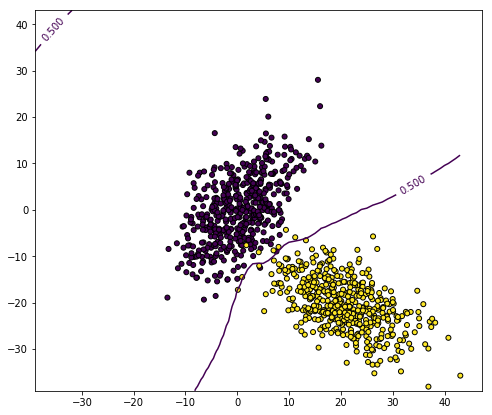

Accuracy = 0.99


In [78]:
def main2():
    data_num = 1000 # param
    pai1 = 0.5 # param
    pai2 = 1 - pai1

    mu1 = np.array([0, 0]) # param
    sigma1 = np.array([[30, 20],
                       [20, 50]]) # param

    mu2 = np.array([20, -20])  # param
    sigma2 = np.array([[50, -20],
                       [-20, 30]]) # param
    
    X, Y = make_data(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2)
    
    node_count = 10
    hidden_count = 10
    epochs = 20

    run(X, Y, node_count, hidden_count, epochs)
main2()

(800, 2) (1000, 2) (800,) (1000,)


Epoch 1/20


   1/1000 [..............................] - ETA: 3:08:58 - loss: 1.7175 - acc: 0.0000e+00

   6/1000 [..............................] - ETA: 31:29 - loss: 1.5346 - acc: 0.6667      

  11/1000 [..............................] - ETA: 17:10 - loss: 1.2948 - acc: 0.6364

  16/1000 [..............................] - ETA: 11:47 - loss: 1.4108 - acc: 0.6250

  21/1000 [..............................] - ETA: 8:58 - loss: 1.8247 - acc: 0.5238 

  26/1000 [..............................] - ETA: 7:15 - loss: 1.5371 - acc: 0.5769

  31/1000 [..............................] - ETA: 6:04 - loss: 1.5921 - acc: 0.5161

  36/1000 [>.............................] - ETA: 5:13 - loss: 1.5067 - acc: 0.5000

  41/1000 [>.............................] - ETA: 4:35 - loss: 1.4264 - acc: 0.5122

  46/1000 [>.............................] - ETA: 4:05 - loss: 1.5187 - acc: 0.5000

  51/1000 [>.............................] - ETA: 3:41 - loss: 1.4417 - acc: 0.5098

  56/1000 [>.............................] - ETA: 3:21 - loss: 1.4015 - acc: 0.5000

  61/1000 [>.............................] - ETA: 3:04 - loss: 1.4305 - acc: 0.4918

  66/1000 [>.............................] - ETA: 2:50 - loss: 1.4261 - acc: 0.4848

  71/1000 [=>............................] - ETA: 2:38 - loss: 1.3472 - acc: 0.5070

  76/1000 [=>............................] - ETA: 2:27 - loss: 1.3090 - acc: 0.5132

  81/1000 [=>............................] - ETA: 2:18 - loss: 1.3568 - acc: 0.4938

  86/1000 [=>............................] - ETA: 2:10 - loss: 1.2993 - acc: 0.5116

  91/1000 [=>............................] - ETA: 2:02 - loss: 1.3734 - acc: 0.5165

  96/1000 [=>............................] - ETA: 1:56 - loss: 1.3665 - acc: 0.5000

 101/1000 [==>...........................] - ETA: 1:50 - loss: 1.3407 - acc: 0.5050

 106/1000 [==>...........................] - ETA: 1:44 - loss: 1.3140 - acc: 0.5094

 111/1000 [==>...........................] - ETA: 1:40 - loss: 1.2834 - acc: 0.5135

 116/1000 [==>...........................] - ETA: 1:35 - loss: 1.2663 - acc: 0.5172

 121/1000 [==>...........................] - ETA: 1:31 - loss: 1.2584 - acc: 0.5289

 126/1000 [==>...........................] - ETA: 1:27 - loss: 1.2237 - acc: 0.5397

 131/1000 [==>...........................] - ETA: 1:24 - loss: 1.1879 - acc: 0.5496

 136/1000 [===>..........................] - ETA: 1:21 - loss: 1.1677 - acc: 0.5515

 141/1000 [===>..........................] - ETA: 1:18 - loss: 1.1667 - acc: 0.5532

 146/1000 [===>..........................] - ETA: 1:15 - loss: 1.1406 - acc: 0.5616

 151/1000 [===>..........................] - ETA: 1:12 - loss: 1.1245 - acc: 0.5629

 156/1000 [===>..........................] - ETA: 1:10 - loss: 1.1070 - acc: 0.5577

 161/1000 [===>..........................] - ETA: 1:07 - loss: 1.0927 - acc: 0.5528

 166/1000 [===>..........................] - ETA: 1:05 - loss: 1.0990 - acc: 0.5542

 171/1000 [====>.........................] - ETA: 1:03 - loss: 1.0731 - acc: 0.5673

 176/1000 [====>.........................] - ETA: 1:01 - loss: 1.0880 - acc: 0.5682

 181/1000 [====>.........................] - ETA: 59s - loss: 1.0677 - acc: 0.5691 

 186/1000 [====>.........................] - ETA: 58s - loss: 1.0451 - acc: 0.5806

 191/1000 [====>.........................] - ETA: 56s - loss: 1.0258 - acc: 0.5916

 196/1000 [====>.........................] - ETA: 54s - loss: 1.0192 - acc: 0.5867

 201/1000 [=====>........................] - ETA: 53s - loss: 1.0038 - acc: 0.5920

 206/1000 [=====>........................] - ETA: 51s - loss: 0.9973 - acc: 0.5922

 211/1000 [=====>........................] - ETA: 50s - loss: 0.9903 - acc: 0.5972

 216/1000 [=====>........................] - ETA: 49s - loss: 0.9768 - acc: 0.6065

 221/1000 [=====>........................] - ETA: 48s - loss: 0.9579 - acc: 0.6154

 226/1000 [=====>........................] - ETA: 46s - loss: 0.9467 - acc: 0.6195

 231/1000 [=====>........................] - ETA: 45s - loss: 0.9313 - acc: 0.6277

 236/1000 [======>.......................] - ETA: 44s - loss: 0.9433 - acc: 0.6314

 241/1000 [======>.......................] - ETA: 43s - loss: 0.9305 - acc: 0.6390

 246/1000 [======>.......................] - ETA: 42s - loss: 0.9162 - acc: 0.6463

 251/1000 [======>.......................] - ETA: 41s - loss: 0.9019 - acc: 0.6534

 256/1000 [======>.......................] - ETA: 40s - loss: 0.8913 - acc: 0.6602

 261/1000 [======>.......................] - ETA: 39s - loss: 0.8776 - acc: 0.6667

 266/1000 [======>.......................] - ETA: 38s - loss: 0.8663 - acc: 0.6692

 271/1000 [=======>......................] - ETA: 38s - loss: 0.8541 - acc: 0.6753

 276/1000 [=======>......................] - ETA: 37s - loss: 0.8630 - acc: 0.6703

 281/1000 [=======>......................] - ETA: 36s - loss: 0.8595 - acc: 0.6726

 286/1000 [=======>......................] - ETA: 35s - loss: 0.8516 - acc: 0.6713

 291/1000 [=======>......................] - ETA: 35s - loss: 0.8411 - acc: 0.6770

 296/1000 [=======>......................] - ETA: 34s - loss: 0.8411 - acc: 0.6757

 301/1000 [========>.....................] - ETA: 33s - loss: 0.8289 - acc: 0.6811

 306/1000 [========>.....................] - ETA: 32s - loss: 0.8331 - acc: 0.6765

 311/1000 [========>.....................] - ETA: 32s - loss: 0.8355 - acc: 0.6752

 316/1000 [========>.....................] - ETA: 31s - loss: 0.8277 - acc: 0.6772

 321/1000 [========>.....................] - ETA: 31s - loss: 0.8225 - acc: 0.6791

 326/1000 [========>.....................] - ETA: 30s - loss: 0.8171 - acc: 0.6810

 331/1000 [========>.....................] - ETA: 29s - loss: 0.8129 - acc: 0.6828

 336/1000 [=========>....................] - ETA: 29s - loss: 0.8031 - acc: 0.6875

 341/1000 [=========>....................] - ETA: 28s - loss: 0.7951 - acc: 0.6891

 346/1000 [=========>....................] - ETA: 28s - loss: 0.7920 - acc: 0.6908

 351/1000 [=========>....................] - ETA: 27s - loss: 0.7911 - acc: 0.6866

 357/1000 [=========>....................] - ETA: 27s - loss: 0.7830 - acc: 0.6919

 362/1000 [=========>....................] - ETA: 26s - loss: 0.7745 - acc: 0.6961

 367/1000 [==========>...................] - ETA: 26s - loss: 0.7837 - acc: 0.6948

 372/1000 [==========>...................] - ETA: 25s - loss: 0.7762 - acc: 0.6989

 377/1000 [==========>...................] - ETA: 25s - loss: 0.7711 - acc: 0.7003

 382/1000 [==========>...................] - ETA: 24s - loss: 0.7641 - acc: 0.7042

 387/1000 [==========>...................] - ETA: 24s - loss: 0.7618 - acc: 0.7028

 392/1000 [==========>...................] - ETA: 23s - loss: 0.7552 - acc: 0.7041

 397/1000 [==========>...................] - ETA: 23s - loss: 0.7514 - acc: 0.7053

 402/1000 [===========>..................] - ETA: 23s - loss: 0.7462 - acc: 0.7065

 407/1000 [===========>..................] - ETA: 22s - loss: 0.7433 - acc: 0.7052

 412/1000 [===========>..................] - ETA: 22s - loss: 0.7397 - acc: 0.7063

 417/1000 [===========>..................] - ETA: 21s - loss: 0.7352 - acc: 0.7074

 422/1000 [===========>..................] - ETA: 21s - loss: 0.7359 - acc: 0.7085

 427/1000 [===========>..................] - ETA: 21s - loss: 0.7286 - acc: 0.7119

 432/1000 [===========>..................] - ETA: 20s - loss: 0.7220 - acc: 0.7153

 437/1000 [============>.................] - ETA: 20s - loss: 0.7155 - acc: 0.7185

 442/1000 [============>.................] - ETA: 20s - loss: 0.7116 - acc: 0.7195

 447/1000 [============>.................] - ETA: 19s - loss: 0.7059 - acc: 0.7226

 452/1000 [============>.................] - ETA: 19s - loss: 0.7060 - acc: 0.7212

 457/1000 [============>.................] - ETA: 19s - loss: 0.7036 - acc: 0.7221

 462/1000 [============>.................] - ETA: 18s - loss: 0.7116 - acc: 0.7186

 467/1000 [=============>................] - ETA: 18s - loss: 0.7069 - acc: 0.7195

 472/1000 [=============>................] - ETA: 18s - loss: 0.7005 - acc: 0.7225

 477/1000 [=============>................] - ETA: 17s - loss: 0.6937 - acc: 0.7254

 482/1000 [=============>................] - ETA: 17s - loss: 0.6897 - acc: 0.7282

 487/1000 [=============>................] - ETA: 17s - loss: 0.6842 - acc: 0.7310

 492/1000 [=============>................] - ETA: 16s - loss: 0.6797 - acc: 0.7337

 497/1000 [=============>................] - ETA: 16s - loss: 0.6742 - acc: 0.7364

 502/1000 [==============>...............] - ETA: 16s - loss: 0.6752 - acc: 0.7371

 507/1000 [==============>...............] - ETA: 16s - loss: 0.6723 - acc: 0.7377

 512/1000 [==============>...............] - ETA: 15s - loss: 0.6742 - acc: 0.7344

 517/1000 [==============>...............] - ETA: 15s - loss: 0.6692 - acc: 0.7369

 522/1000 [==============>...............] - ETA: 15s - loss: 0.6659 - acc: 0.7375

 527/1000 [==============>...............] - ETA: 15s - loss: 0.6611 - acc: 0.7400

 532/1000 [==============>...............] - ETA: 14s - loss: 0.6561 - acc: 0.7425

 537/1000 [===============>..............] - ETA: 14s - loss: 0.6575 - acc: 0.7430

 542/1000 [===============>..............] - ETA: 14s - loss: 0.6543 - acc: 0.7454

 547/1000 [===============>..............] - ETA: 14s - loss: 0.6526 - acc: 0.7459

 552/1000 [===============>..............] - ETA: 13s - loss: 0.6485 - acc: 0.7482

 557/1000 [===============>..............] - ETA: 13s - loss: 0.6430 - acc: 0.7504

 562/1000 [===============>..............] - ETA: 13s - loss: 0.6389 - acc: 0.7509

 567/1000 [================>.............] - ETA: 13s - loss: 0.6379 - acc: 0.7496

 572/1000 [================>.............] - ETA: 12s - loss: 0.6350 - acc: 0.7500

 577/1000 [================>.............] - ETA: 12s - loss: 0.6341 - acc: 0.7504

 582/1000 [================>.............] - ETA: 12s - loss: 0.6327 - acc: 0.7491

 587/1000 [================>.............] - ETA: 12s - loss: 0.6320 - acc: 0.7496

 592/1000 [================>.............] - ETA: 12s - loss: 0.6284 - acc: 0.7500

 597/1000 [================>.............] - ETA: 11s - loss: 0.6277 - acc: 0.7487

 602/1000 [=================>............] - ETA: 11s - loss: 0.6309 - acc: 0.7492

 607/1000 [=================>............] - ETA: 11s - loss: 0.6295 - acc: 0.7496

 612/1000 [=================>............] - ETA: 11s - loss: 0.6269 - acc: 0.7500

 617/1000 [=================>............] - ETA: 11s - loss: 0.6231 - acc: 0.7520

 622/1000 [=================>............] - ETA: 10s - loss: 0.6194 - acc: 0.7540

 627/1000 [=================>............] - ETA: 10s - loss: 0.6151 - acc: 0.7560

 632/1000 [=================>............] - ETA: 10s - loss: 0.6200 - acc: 0.7532

 637/1000 [==================>...........] - ETA: 10s - loss: 0.6154 - acc: 0.7551

 642/1000 [==================>...........] - ETA: 10s - loss: 0.6122 - acc: 0.7570

 647/1000 [==================>...........] - ETA: 9s - loss: 0.6083 - acc: 0.7589 

 652/1000 [==================>...........] - ETA: 9s - loss: 0.6074 - acc: 0.7592

 657/1000 [==================>...........] - ETA: 9s - loss: 0.6090 - acc: 0.7580

 662/1000 [==================>...........] - ETA: 9s - loss: 0.6052 - acc: 0.7598

 667/1000 [===================>..........] - ETA: 9s - loss: 0.6027 - acc: 0.7601

 672/1000 [===================>..........] - ETA: 8s - loss: 0.6018 - acc: 0.7604

 677/1000 [===================>..........] - ETA: 8s - loss: 0.6019 - acc: 0.7607

 682/1000 [===================>..........] - ETA: 8s - loss: 0.6033 - acc: 0.7581

 687/1000 [===================>..........] - ETA: 8s - loss: 0.5993 - acc: 0.7598

 692/1000 [===================>..........] - ETA: 8s - loss: 0.5998 - acc: 0.7601

 697/1000 [===================>..........] - ETA: 8s - loss: 0.5962 - acc: 0.7618

 702/1000 [====================>.........] - ETA: 7s - loss: 0.6006 - acc: 0.7607

 707/1000 [====================>.........] - ETA: 7s - loss: 0.5996 - acc: 0.7595

 712/1000 [====================>.........] - ETA: 7s - loss: 0.5962 - acc: 0.7612

 717/1000 [====================>.........] - ETA: 7s - loss: 0.5927 - acc: 0.7629

 722/1000 [====================>.........] - ETA: 7s - loss: 0.5895 - acc: 0.7645

 727/1000 [====================>.........] - ETA: 7s - loss: 0.5882 - acc: 0.7648

 732/1000 [====================>.........] - ETA: 6s - loss: 0.5860 - acc: 0.7650

 737/1000 [=====================>........] - ETA: 6s - loss: 0.5841 - acc: 0.7653

 742/1000 [=====================>........] - ETA: 6s - loss: 0.5813 - acc: 0.7668

 747/1000 [=====================>........] - ETA: 6s - loss: 0.5835 - acc: 0.7657

 752/1000 [=====================>........] - ETA: 6s - loss: 0.5817 - acc: 0.7660

 757/1000 [=====================>........] - ETA: 6s - loss: 0.5799 - acc: 0.7675

 762/1000 [=====================>........] - ETA: 6s - loss: 0.5776 - acc: 0.7690

 767/1000 [======================>.......] - ETA: 5s - loss: 0.5788 - acc: 0.7679

 772/1000 [======================>.......] - ETA: 5s - loss: 0.5755 - acc: 0.7694

 777/1000 [======================>.......] - ETA: 5s - loss: 0.5722 - acc: 0.7709

 782/1000 [======================>.......] - ETA: 5s - loss: 0.5689 - acc: 0.7724

 787/1000 [======================>.......] - ETA: 5s - loss: 0.5683 - acc: 0.7726

 792/1000 [======================>.......] - ETA: 5s - loss: 0.5652 - acc: 0.7740

 798/1000 [======================>.......] - ETA: 4s - loss: 0.5637 - acc: 0.7744

 802/1000 [=======================>......] - ETA: 4s - loss: 0.5612 - acc: 0.7756

 807/1000 [=======================>......] - ETA: 4s - loss: 0.5579 - acc: 0.7770

 812/1000 [=======================>......] - ETA: 4s - loss: 0.5549 - acc: 0.7783

 817/1000 [=======================>......] - ETA: 4s - loss: 0.5532 - acc: 0.7785

 822/1000 [=======================>......] - ETA: 4s - loss: 0.5501 - acc: 0.7798

 827/1000 [=======================>......] - ETA: 4s - loss: 0.5492 - acc: 0.7799

 832/1000 [=======================>......] - ETA: 4s - loss: 0.5498 - acc: 0.7788

 837/1000 [========================>.....] - ETA: 3s - loss: 0.5494 - acc: 0.7790

 842/1000 [========================>.....] - ETA: 3s - loss: 0.5499 - acc: 0.7779

 847/1000 [========================>.....] - ETA: 3s - loss: 0.5510 - acc: 0.7780

 852/1000 [========================>.....] - ETA: 3s - loss: 0.5486 - acc: 0.7793

 857/1000 [========================>.....] - ETA: 3s - loss: 0.5463 - acc: 0.7806

 862/1000 [========================>.....] - ETA: 3s - loss: 0.5443 - acc: 0.7807

 867/1000 [=========================>....] - ETA: 3s - loss: 0.5413 - acc: 0.7820

 872/1000 [=========================>....] - ETA: 3s - loss: 0.5390 - acc: 0.7833

 877/1000 [=========================>....] - ETA: 2s - loss: 0.5376 - acc: 0.7834

 882/1000 [=========================>....] - ETA: 2s - loss: 0.5347 - acc: 0.7846

 887/1000 [=========================>....] - ETA: 2s - loss: 0.5351 - acc: 0.7847

 892/1000 [=========================>....] - ETA: 2s - loss: 0.5356 - acc: 0.7836

 897/1000 [=========================>....] - ETA: 2s - loss: 0.5369 - acc: 0.7815

 902/1000 [==========================>...] - ETA: 2s - loss: 0.5347 - acc: 0.7827

 907/1000 [==========================>...] - ETA: 2s - loss: 0.5326 - acc: 0.7839

 912/1000 [==========================>...] - ETA: 2s - loss: 0.5307 - acc: 0.7851

 917/1000 [==========================>...] - ETA: 1s - loss: 0.5315 - acc: 0.7841

 923/1000 [==========================>...] - ETA: 1s - loss: 0.5285 - acc: 0.7855

 928/1000 [==========================>...] - ETA: 1s - loss: 0.5295 - acc: 0.7845

 933/1000 [==========================>...] - ETA: 1s - loss: 0.5278 - acc: 0.7856

 938/1000 [===========================>..] - ETA: 1s - loss: 0.5262 - acc: 0.7857

 943/1000 [===========================>..] - ETA: 1s - loss: 0.5259 - acc: 0.7847

 948/1000 [===========================>..] - ETA: 1s - loss: 0.5251 - acc: 0.7838

 953/1000 [===========================>..] - ETA: 1s - loss: 0.5230 - acc: 0.7849

 958/1000 [===========================>..] - ETA: 0s - loss: 0.5262 - acc: 0.7839

 963/1000 [===========================>..] - ETA: 0s - loss: 0.5241 - acc: 0.7850

 968/1000 [============================>.] - ETA: 0s - loss: 0.5215 - acc: 0.7862

 973/1000 [============================>.] - ETA: 0s - loss: 0.5202 - acc: 0.7862

 978/1000 [============================>.] - ETA: 0s - loss: 0.5202 - acc: 0.7853

 983/1000 [============================>.] - ETA: 0s - loss: 0.5192 - acc: 0.7854

 988/1000 [============================>.] - ETA: 0s - loss: 0.5174 - acc: 0.7864

 993/1000 [============================>.] - ETA: 0s - loss: 0.5156 - acc: 0.7875

 998/1000 [============================>.] - ETA: 0s - loss: 0.5135 - acc: 0.7886

1000/1000 [==============================] - 22s 22ms/step - loss: 0.5126 - acc: 0.7890


Epoch 2/20
   1/1000 [..............................] - ETA: 9s - loss: 0.2230 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0758 - acc: 1.0000

  10/1000 [..............................] - ETA: 11s - loss: 0.1603 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.3249 - acc: 0.8000

  20/1000 [..............................] - ETA: 10s - loss: 0.2938 - acc: 0.8000

  25/1000 [..............................] - ETA: 10s - loss: 0.2927 - acc: 0.8000

  30/1000 [..............................] - ETA: 10s - loss: 0.2540 - acc: 0.8333

  35/1000 [>.............................] - ETA: 10s - loss: 0.2300 - acc: 0.8571

  40/1000 [>.............................] - ETA: 10s - loss: 0.2054 - acc: 0.8750

  45/1000 [>.............................] - ETA: 10s - loss: 0.1933 - acc: 0.8889

  50/1000 [>.............................] - ETA: 10s - loss: 0.1956 - acc: 0.9000

  55/1000 [>.............................] - ETA: 9s - loss: 0.2154 - acc: 0.8727 

  60/1000 [>.............................] - ETA: 9s - loss: 0.2353 - acc: 0.8667

  65/1000 [>.............................] - ETA: 9s - loss: 0.2326 - acc: 0.8615

  70/1000 [=>............................] - ETA: 9s - loss: 0.2182 - acc: 0.8714

  75/1000 [=>............................] - ETA: 9s - loss: 0.2702 - acc: 0.8533

  80/1000 [=>............................] - ETA: 9s - loss: 0.2805 - acc: 0.8500

  85/1000 [=>............................] - ETA: 9s - loss: 0.2778 - acc: 0.8471

  90/1000 [=>............................] - ETA: 9s - loss: 0.2747 - acc: 0.8444

  95/1000 [=>............................] - ETA: 9s - loss: 0.2639 - acc: 0.8526

 100/1000 [==>...........................] - ETA: 9s - loss: 0.2764 - acc: 0.8500

 105/1000 [==>...........................] - ETA: 9s - loss: 0.2708 - acc: 0.8571

 110/1000 [==>...........................] - ETA: 9s - loss: 0.2717 - acc: 0.8545

 115/1000 [==>...........................] - ETA: 9s - loss: 0.2687 - acc: 0.8522

 120/1000 [==>...........................] - ETA: 9s - loss: 0.2636 - acc: 0.8583

 125/1000 [==>...........................] - ETA: 9s - loss: 0.2566 - acc: 0.8640

 130/1000 [==>...........................] - ETA: 9s - loss: 0.2789 - acc: 0.8615

 135/1000 [===>..........................] - ETA: 9s - loss: 0.2790 - acc: 0.8593

 140/1000 [===>..........................] - ETA: 9s - loss: 0.2825 - acc: 0.8500

 145/1000 [===>..........................] - ETA: 8s - loss: 0.2754 - acc: 0.8552

 150/1000 [===>..........................] - ETA: 8s - loss: 0.2796 - acc: 0.8533

 155/1000 [===>..........................] - ETA: 8s - loss: 0.2760 - acc: 0.8581

 160/1000 [===>..........................] - ETA: 8s - loss: 0.2699 - acc: 0.8625

 165/1000 [===>..........................] - ETA: 8s - loss: 0.2696 - acc: 0.8606

 170/1000 [====>.........................] - ETA: 8s - loss: 0.2676 - acc: 0.8588

 175/1000 [====>.........................] - ETA: 8s - loss: 0.2655 - acc: 0.8629

 180/1000 [====>.........................] - ETA: 8s - loss: 0.2623 - acc: 0.8667

 185/1000 [====>.........................] - ETA: 8s - loss: 0.2587 - acc: 0.8703

 190/1000 [====>.........................] - ETA: 8s - loss: 0.2557 - acc: 0.8737

 195/1000 [====>.........................] - ETA: 8s - loss: 0.2538 - acc: 0.8769

 200/1000 [=====>........................] - ETA: 8s - loss: 0.2511 - acc: 0.8800

 205/1000 [=====>........................] - ETA: 8s - loss: 0.2568 - acc: 0.8780

 210/1000 [=====>........................] - ETA: 8s - loss: 0.2550 - acc: 0.8810

 215/1000 [=====>........................] - ETA: 8s - loss: 0.2581 - acc: 0.8837

 220/1000 [=====>........................] - ETA: 8s - loss: 0.2546 - acc: 0.8864

 225/1000 [=====>........................] - ETA: 8s - loss: 0.2502 - acc: 0.8889

 231/1000 [=====>........................] - ETA: 8s - loss: 0.2495 - acc: 0.8874

 236/1000 [======>.......................] - ETA: 7s - loss: 0.2524 - acc: 0.8856

 241/1000 [======>.......................] - ETA: 7s - loss: 0.2539 - acc: 0.8797

 246/1000 [======>.......................] - ETA: 7s - loss: 0.2515 - acc: 0.8821

 251/1000 [======>.......................] - ETA: 7s - loss: 0.2510 - acc: 0.8845

 256/1000 [======>.......................] - ETA: 7s - loss: 0.2490 - acc: 0.8867

 261/1000 [======>.......................] - ETA: 7s - loss: 0.2465 - acc: 0.8889

 266/1000 [======>.......................] - ETA: 7s - loss: 0.2500 - acc: 0.8872

 271/1000 [=======>......................] - ETA: 7s - loss: 0.2540 - acc: 0.8819

 276/1000 [=======>......................] - ETA: 7s - loss: 0.2500 - acc: 0.8841

 281/1000 [=======>......................] - ETA: 7s - loss: 0.2470 - acc: 0.8861

 286/1000 [=======>......................] - ETA: 7s - loss: 0.2462 - acc: 0.8846

 291/1000 [=======>......................] - ETA: 7s - loss: 0.2595 - acc: 0.8797

 296/1000 [=======>......................] - ETA: 7s - loss: 0.2559 - acc: 0.8818

 301/1000 [========>.....................] - ETA: 7s - loss: 0.2534 - acc: 0.8837

 306/1000 [========>.....................] - ETA: 7s - loss: 0.2523 - acc: 0.8856

 311/1000 [========>.....................] - ETA: 7s - loss: 0.2543 - acc: 0.8842

 316/1000 [========>.....................] - ETA: 7s - loss: 0.2524 - acc: 0.8861

 321/1000 [========>.....................] - ETA: 7s - loss: 0.2495 - acc: 0.8879

 326/1000 [========>.....................] - ETA: 7s - loss: 0.2471 - acc: 0.8896

 331/1000 [========>.....................] - ETA: 6s - loss: 0.2453 - acc: 0.8912

 336/1000 [=========>....................] - ETA: 6s - loss: 0.2431 - acc: 0.8929

 341/1000 [=========>....................] - ETA: 6s - loss: 0.2439 - acc: 0.8944

 346/1000 [=========>....................] - ETA: 6s - loss: 0.2438 - acc: 0.8931

 351/1000 [=========>....................] - ETA: 6s - loss: 0.2412 - acc: 0.8946

 356/1000 [=========>....................] - ETA: 6s - loss: 0.2397 - acc: 0.8961

 361/1000 [=========>....................] - ETA: 6s - loss: 0.2410 - acc: 0.8920

 367/1000 [==========>...................] - ETA: 6s - loss: 0.2386 - acc: 0.8937

 372/1000 [==========>...................] - ETA: 6s - loss: 0.2394 - acc: 0.8925

 377/1000 [==========>...................] - ETA: 6s - loss: 0.2476 - acc: 0.8886

 382/1000 [==========>...................] - ETA: 6s - loss: 0.2482 - acc: 0.8874

 387/1000 [==========>...................] - ETA: 6s - loss: 0.2455 - acc: 0.8889

 392/1000 [==========>...................] - ETA: 6s - loss: 0.2427 - acc: 0.8903

 397/1000 [==========>...................] - ETA: 6s - loss: 0.2400 - acc: 0.8917

 402/1000 [===========>..................] - ETA: 6s - loss: 0.2389 - acc: 0.8930

 407/1000 [===========>..................] - ETA: 6s - loss: 0.2362 - acc: 0.8943

 412/1000 [===========>..................] - ETA: 6s - loss: 0.2364 - acc: 0.8932

 417/1000 [===========>..................] - ETA: 6s - loss: 0.2370 - acc: 0.8921

 422/1000 [===========>..................] - ETA: 6s - loss: 0.2367 - acc: 0.8934

 427/1000 [===========>..................] - ETA: 5s - loss: 0.2347 - acc: 0.8946

 432/1000 [===========>..................] - ETA: 5s - loss: 0.2379 - acc: 0.8935

 437/1000 [============>.................] - ETA: 5s - loss: 0.2357 - acc: 0.8947

 442/1000 [============>.................] - ETA: 5s - loss: 0.2351 - acc: 0.8959

 447/1000 [============>.................] - ETA: 5s - loss: 0.2335 - acc: 0.8971

 452/1000 [============>.................] - ETA: 5s - loss: 0.2329 - acc: 0.8982

 458/1000 [============>.................] - ETA: 5s - loss: 0.2316 - acc: 0.8974

 463/1000 [============>.................] - ETA: 5s - loss: 0.2342 - acc: 0.8963

 468/1000 [=============>................] - ETA: 5s - loss: 0.2349 - acc: 0.8953

 473/1000 [=============>................] - ETA: 5s - loss: 0.2331 - acc: 0.8964

 478/1000 [=============>................] - ETA: 5s - loss: 0.2341 - acc: 0.8954

 483/1000 [=============>................] - ETA: 5s - loss: 0.2352 - acc: 0.8944

 488/1000 [=============>................] - ETA: 5s - loss: 0.2335 - acc: 0.8955

 493/1000 [=============>................] - ETA: 5s - loss: 0.2349 - acc: 0.8945

 498/1000 [=============>................] - ETA: 5s - loss: 0.2327 - acc: 0.8956

 503/1000 [==============>...............] - ETA: 5s - loss: 0.2359 - acc: 0.8946

 508/1000 [==============>...............] - ETA: 5s - loss: 0.2370 - acc: 0.8937

 513/1000 [==============>...............] - ETA: 5s - loss: 0.2349 - acc: 0.8947

 518/1000 [==============>...............] - ETA: 5s - loss: 0.2360 - acc: 0.8958

 523/1000 [==============>...............] - ETA: 4s - loss: 0.2357 - acc: 0.8948

 528/1000 [==============>...............] - ETA: 4s - loss: 0.2339 - acc: 0.8958

 533/1000 [==============>...............] - ETA: 4s - loss: 0.2324 - acc: 0.8968

 538/1000 [===============>..............] - ETA: 4s - loss: 0.2319 - acc: 0.8959

 543/1000 [===============>..............] - ETA: 4s - loss: 0.2357 - acc: 0.8950

 548/1000 [===============>..............] - ETA: 4s - loss: 0.2339 - acc: 0.8960

 553/1000 [===============>..............] - ETA: 4s - loss: 0.2326 - acc: 0.8969

 558/1000 [===============>..............] - ETA: 4s - loss: 0.2320 - acc: 0.8978

 563/1000 [===============>..............] - ETA: 4s - loss: 0.2315 - acc: 0.8988

 568/1000 [================>.............] - ETA: 4s - loss: 0.2310 - acc: 0.8996

 573/1000 [================>.............] - ETA: 4s - loss: 0.2298 - acc: 0.9005

 578/1000 [================>.............] - ETA: 4s - loss: 0.2291 - acc: 0.9014

 583/1000 [================>.............] - ETA: 4s - loss: 0.2302 - acc: 0.9005

 588/1000 [================>.............] - ETA: 4s - loss: 0.2325 - acc: 0.8980

 593/1000 [================>.............] - ETA: 4s - loss: 0.2331 - acc: 0.8988

 598/1000 [================>.............] - ETA: 4s - loss: 0.2324 - acc: 0.8997

 603/1000 [=================>............] - ETA: 4s - loss: 0.2307 - acc: 0.9005

 608/1000 [=================>............] - ETA: 4s - loss: 0.2301 - acc: 0.8997

 613/1000 [=================>............] - ETA: 4s - loss: 0.2287 - acc: 0.9005

 618/1000 [=================>............] - ETA: 3s - loss: 0.2307 - acc: 0.8997

 623/1000 [=================>............] - ETA: 3s - loss: 0.2368 - acc: 0.8989

 628/1000 [=================>............] - ETA: 3s - loss: 0.2350 - acc: 0.8997

 633/1000 [=================>............] - ETA: 3s - loss: 0.2333 - acc: 0.9005

 638/1000 [==================>...........] - ETA: 3s - loss: 0.2324 - acc: 0.9013

 643/1000 [==================>...........] - ETA: 3s - loss: 0.2311 - acc: 0.9020

 648/1000 [==================>...........] - ETA: 3s - loss: 0.2297 - acc: 0.9028

 653/1000 [==================>...........] - ETA: 3s - loss: 0.2281 - acc: 0.9035

 658/1000 [==================>...........] - ETA: 3s - loss: 0.2288 - acc: 0.9012

 663/1000 [==================>...........] - ETA: 3s - loss: 0.2277 - acc: 0.9020

 668/1000 [===================>..........] - ETA: 3s - loss: 0.2265 - acc: 0.9027

 673/1000 [===================>..........] - ETA: 3s - loss: 0.2255 - acc: 0.9034

 678/1000 [===================>..........] - ETA: 3s - loss: 0.2242 - acc: 0.9041

 683/1000 [===================>..........] - ETA: 3s - loss: 0.2239 - acc: 0.9034

 688/1000 [===================>..........] - ETA: 3s - loss: 0.2234 - acc: 0.9041

 693/1000 [===================>..........] - ETA: 3s - loss: 0.2221 - acc: 0.9048

 698/1000 [===================>..........] - ETA: 3s - loss: 0.2206 - acc: 0.9054

 703/1000 [====================>.........] - ETA: 3s - loss: 0.2191 - acc: 0.9061

 708/1000 [====================>.........] - ETA: 3s - loss: 0.2254 - acc: 0.9054

 713/1000 [====================>.........] - ETA: 2s - loss: 0.2245 - acc: 0.9060

 718/1000 [====================>.........] - ETA: 2s - loss: 0.2241 - acc: 0.9067

 723/1000 [====================>.........] - ETA: 2s - loss: 0.2249 - acc: 0.9059

 728/1000 [====================>.........] - ETA: 2s - loss: 0.2238 - acc: 0.9066

 733/1000 [====================>.........] - ETA: 2s - loss: 0.2237 - acc: 0.9059

 738/1000 [=====================>........] - ETA: 2s - loss: 0.2263 - acc: 0.9051

 743/1000 [=====================>........] - ETA: 2s - loss: 0.2266 - acc: 0.9058

 748/1000 [=====================>........] - ETA: 2s - loss: 0.2262 - acc: 0.9051

 753/1000 [=====================>........] - ETA: 2s - loss: 0.2263 - acc: 0.9044

 758/1000 [=====================>........] - ETA: 2s - loss: 0.2254 - acc: 0.9050

 763/1000 [=====================>........] - ETA: 2s - loss: 0.2241 - acc: 0.9056

 768/1000 [======================>.......] - ETA: 2s - loss: 0.2231 - acc: 0.9062

 771/1000 [======================>.......] - ETA: 2s - loss: 0.2243 - acc: 0.9053

 774/1000 [======================>.......] - ETA: 2s - loss: 0.2243 - acc: 0.9057

 777/1000 [======================>.......] - ETA: 2s - loss: 0.2243 - acc: 0.9060

 780/1000 [======================>.......] - ETA: 2s - loss: 0.2236 - acc: 0.9064

 783/1000 [======================>.......] - ETA: 2s - loss: 0.2229 - acc: 0.9068

 787/1000 [======================>.......] - ETA: 2s - loss: 0.2222 - acc: 0.9072

 791/1000 [======================>.......] - ETA: 2s - loss: 0.2226 - acc: 0.9077

 795/1000 [======================>.......] - ETA: 2s - loss: 0.2224 - acc: 0.9082

 799/1000 [======================>.......] - ETA: 2s - loss: 0.2230 - acc: 0.9074

 803/1000 [=======================>......] - ETA: 2s - loss: 0.2228 - acc: 0.9078

 808/1000 [=======================>......] - ETA: 2s - loss: 0.2216 - acc: 0.9084

 811/1000 [=======================>......] - ETA: 2s - loss: 0.2209 - acc: 0.9088

 814/1000 [=======================>......] - ETA: 1s - loss: 0.2202 - acc: 0.9091

 817/1000 [=======================>......] - ETA: 1s - loss: 0.2197 - acc: 0.9094

 822/1000 [=======================>......] - ETA: 1s - loss: 0.2192 - acc: 0.9100

 827/1000 [=======================>......] - ETA: 1s - loss: 0.2192 - acc: 0.9105

 832/1000 [=======================>......] - ETA: 1s - loss: 0.2183 - acc: 0.9111

 837/1000 [========================>.....] - ETA: 1s - loss: 0.2173 - acc: 0.9116

 842/1000 [========================>.....] - ETA: 1s - loss: 0.2179 - acc: 0.9109

 847/1000 [========================>.....] - ETA: 1s - loss: 0.2168 - acc: 0.9115

 852/1000 [========================>.....] - ETA: 1s - loss: 0.2157 - acc: 0.9120

 856/1000 [========================>.....] - ETA: 1s - loss: 0.2148 - acc: 0.9124

 859/1000 [========================>.....] - ETA: 1s - loss: 0.2148 - acc: 0.9127

 862/1000 [========================>.....] - ETA: 1s - loss: 0.2142 - acc: 0.9130

 865/1000 [========================>.....] - ETA: 1s - loss: 0.2151 - acc: 0.9121

 869/1000 [=========================>....] - ETA: 1s - loss: 0.2142 - acc: 0.9125

 872/1000 [=========================>....] - ETA: 1s - loss: 0.2135 - acc: 0.9128

 875/1000 [=========================>....] - ETA: 1s - loss: 0.2131 - acc: 0.9131

 878/1000 [=========================>....] - ETA: 1s - loss: 0.2128 - acc: 0.9134

 881/1000 [=========================>....] - ETA: 1s - loss: 0.2144 - acc: 0.9126

 884/1000 [=========================>....] - ETA: 1s - loss: 0.2144 - acc: 0.9129

 887/1000 [=========================>....] - ETA: 1s - loss: 0.2143 - acc: 0.9132

 891/1000 [=========================>....] - ETA: 1s - loss: 0.2144 - acc: 0.9125

 895/1000 [=========================>....] - ETA: 1s - loss: 0.2164 - acc: 0.9106

 899/1000 [=========================>....] - ETA: 1s - loss: 0.2164 - acc: 0.9099

 904/1000 [==========================>...] - ETA: 1s - loss: 0.2223 - acc: 0.9093

 908/1000 [==========================>...] - ETA: 1s - loss: 0.2225 - acc: 0.9086

 912/1000 [==========================>...] - ETA: 0s - loss: 0.2221 - acc: 0.9090

 916/1000 [==========================>...] - ETA: 0s - loss: 0.2215 - acc: 0.9094

 920/1000 [==========================>...] - ETA: 0s - loss: 0.2211 - acc: 0.9098

 923/1000 [==========================>...] - ETA: 0s - loss: 0.2208 - acc: 0.9101

 926/1000 [==========================>...] - ETA: 0s - loss: 0.2203 - acc: 0.9104

 929/1000 [==========================>...] - ETA: 0s - loss: 0.2199 - acc: 0.9107

 934/1000 [===========================>..] - ETA: 0s - loss: 0.2188 - acc: 0.9111

 939/1000 [===========================>..] - ETA: 0s - loss: 0.2179 - acc: 0.9116

 944/1000 [===========================>..] - ETA: 0s - loss: 0.2169 - acc: 0.9121

 949/1000 [===========================>..] - ETA: 0s - loss: 0.2160 - acc: 0.9125

 954/1000 [===========================>..] - ETA: 0s - loss: 0.2153 - acc: 0.9130

 959/1000 [===========================>..] - ETA: 0s - loss: 0.2154 - acc: 0.9124

 964/1000 [===========================>..] - ETA: 0s - loss: 0.2162 - acc: 0.9118

 969/1000 [============================>.] - ETA: 0s - loss: 0.2169 - acc: 0.9112

 974/1000 [============================>.] - ETA: 0s - loss: 0.2173 - acc: 0.9107

 979/1000 [============================>.] - ETA: 0s - loss: 0.2166 - acc: 0.9111

 984/1000 [============================>.] - ETA: 0s - loss: 0.2166 - acc: 0.9116

 989/1000 [============================>.] - ETA: 0s - loss: 0.2207 - acc: 0.9110

 994/1000 [============================>.] - ETA: 0s - loss: 0.2199 - acc: 0.9115

 999/1000 [============================>.] - ETA: 0s - loss: 0.2190 - acc: 0.9119

1000/1000 [==============================] - 11s 11ms/step - loss: 0.2188 - acc: 0.9120


Epoch 3/20
   1/1000 [..............................] - ETA: 16s - loss: 0.0835 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.1732 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.1286 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.1356 - acc: 1.0000

  20/1000 [..............................] - ETA: 11s - loss: 0.1370 - acc: 1.0000

  25/1000 [..............................] - ETA: 11s - loss: 0.1147 - acc: 1.0000

  30/1000 [..............................] - ETA: 10s - loss: 0.1286 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.1188 - acc: 0.9714

  39/1000 [>.............................] - ETA: 11s - loss: 0.1073 - acc: 0.9744

  43/1000 [>.............................] - ETA: 11s - loss: 0.0990 - acc: 0.9767

  48/1000 [>.............................] - ETA: 11s - loss: 0.1101 - acc: 0.9792

  53/1000 [>.............................] - ETA: 10s - loss: 0.1412 - acc: 0.9623

  58/1000 [>.............................] - ETA: 10s - loss: 0.1340 - acc: 0.9655

  63/1000 [>.............................] - ETA: 10s - loss: 0.1387 - acc: 0.9524

  68/1000 [=>............................] - ETA: 10s - loss: 0.1323 - acc: 0.9559

  73/1000 [=>............................] - ETA: 10s - loss: 0.1767 - acc: 0.9452

  78/1000 [=>............................] - ETA: 10s - loss: 0.1771 - acc: 0.9359

  83/1000 [=>............................] - ETA: 10s - loss: 0.1683 - acc: 0.9398

  88/1000 [=>............................] - ETA: 10s - loss: 0.1650 - acc: 0.9432

  93/1000 [=>............................] - ETA: 9s - loss: 0.1578 - acc: 0.9462 

  98/1000 [=>............................] - ETA: 9s - loss: 0.1513 - acc: 0.9490

 103/1000 [==>...........................] - ETA: 9s - loss: 0.1466 - acc: 0.9515

 108/1000 [==>...........................] - ETA: 9s - loss: 0.1425 - acc: 0.9537

 113/1000 [==>...........................] - ETA: 9s - loss: 0.1369 - acc: 0.9558

 118/1000 [==>...........................] - ETA: 9s - loss: 0.1347 - acc: 0.9576

 123/1000 [==>...........................] - ETA: 9s - loss: 0.1411 - acc: 0.9512

 128/1000 [==>...........................] - ETA: 9s - loss: 0.1410 - acc: 0.9531

 133/1000 [==>...........................] - ETA: 9s - loss: 0.1555 - acc: 0.9398

 138/1000 [===>..........................] - ETA: 9s - loss: 0.1502 - acc: 0.9420

 143/1000 [===>..........................] - ETA: 9s - loss: 0.1755 - acc: 0.9371

 148/1000 [===>..........................] - ETA: 9s - loss: 0.1912 - acc: 0.9257

 153/1000 [===>..........................] - ETA: 9s - loss: 0.1874 - acc: 0.9281

 158/1000 [===>..........................] - ETA: 9s - loss: 0.1861 - acc: 0.9304

 163/1000 [===>..........................] - ETA: 9s - loss: 0.1869 - acc: 0.9325

 168/1000 [====>.........................] - ETA: 8s - loss: 0.1835 - acc: 0.9345

 173/1000 [====>.........................] - ETA: 8s - loss: 0.1801 - acc: 0.9364

 178/1000 [====>.........................] - ETA: 8s - loss: 0.1779 - acc: 0.9382

 183/1000 [====>.........................] - ETA: 8s - loss: 0.1751 - acc: 0.9399

 188/1000 [====>.........................] - ETA: 8s - loss: 0.1780 - acc: 0.9362

 193/1000 [====>.........................] - ETA: 8s - loss: 0.1790 - acc: 0.9378

 198/1000 [====>.........................] - ETA: 8s - loss: 0.1757 - acc: 0.9394

 203/1000 [=====>........................] - ETA: 8s - loss: 0.1736 - acc: 0.9409

 208/1000 [=====>........................] - ETA: 8s - loss: 0.1749 - acc: 0.9375

 213/1000 [=====>........................] - ETA: 8s - loss: 0.1748 - acc: 0.9390

 218/1000 [=====>........................] - ETA: 8s - loss: 0.1760 - acc: 0.9404

 223/1000 [=====>........................] - ETA: 8s - loss: 0.1731 - acc: 0.9417

 228/1000 [=====>........................] - ETA: 8s - loss: 0.1745 - acc: 0.9386

 233/1000 [=====>........................] - ETA: 8s - loss: 0.1710 - acc: 0.9399

 238/1000 [======>.......................] - ETA: 8s - loss: 0.1708 - acc: 0.9412

 243/1000 [======>.......................] - ETA: 8s - loss: 0.1696 - acc: 0.9424

 248/1000 [======>.......................] - ETA: 8s - loss: 0.1672 - acc: 0.9435

 253/1000 [======>.......................] - ETA: 8s - loss: 0.1664 - acc: 0.9447

 258/1000 [======>.......................] - ETA: 7s - loss: 0.1640 - acc: 0.9457

 263/1000 [======>.......................] - ETA: 7s - loss: 0.1691 - acc: 0.9430

 268/1000 [=======>......................] - ETA: 7s - loss: 0.1660 - acc: 0.9440

 273/1000 [=======>......................] - ETA: 7s - loss: 0.1714 - acc: 0.9414

 278/1000 [=======>......................] - ETA: 7s - loss: 0.1693 - acc: 0.9424

 283/1000 [=======>......................] - ETA: 7s - loss: 0.1728 - acc: 0.9399

 288/1000 [=======>......................] - ETA: 7s - loss: 0.1702 - acc: 0.9410

 293/1000 [=======>......................] - ETA: 7s - loss: 0.1676 - acc: 0.9420

 298/1000 [=======>......................] - ETA: 7s - loss: 0.1671 - acc: 0.9430

 303/1000 [========>.....................] - ETA: 7s - loss: 0.1659 - acc: 0.9439

 308/1000 [========>.....................] - ETA: 7s - loss: 0.1655 - acc: 0.9448

 313/1000 [========>.....................] - ETA: 7s - loss: 0.1710 - acc: 0.9425

 318/1000 [========>.....................] - ETA: 7s - loss: 0.1694 - acc: 0.9434

 323/1000 [========>.....................] - ETA: 7s - loss: 0.1678 - acc: 0.9443

 328/1000 [========>.....................] - ETA: 7s - loss: 0.1671 - acc: 0.9451

 333/1000 [========>.....................] - ETA: 7s - loss: 0.1671 - acc: 0.9459

 338/1000 [=========>....................] - ETA: 7s - loss: 0.1677 - acc: 0.9467

 343/1000 [=========>....................] - ETA: 6s - loss: 0.1656 - acc: 0.9475

 348/1000 [=========>....................] - ETA: 6s - loss: 0.1655 - acc: 0.9483

 353/1000 [=========>....................] - ETA: 6s - loss: 0.1690 - acc: 0.9462

 358/1000 [=========>....................] - ETA: 6s - loss: 0.1750 - acc: 0.9441

 363/1000 [=========>....................] - ETA: 6s - loss: 0.1735 - acc: 0.9449

 368/1000 [==========>...................] - ETA: 6s - loss: 0.1715 - acc: 0.9457

 373/1000 [==========>...................] - ETA: 6s - loss: 0.1695 - acc: 0.9464

 378/1000 [==========>...................] - ETA: 6s - loss: 0.1692 - acc: 0.9471

 383/1000 [==========>...................] - ETA: 6s - loss: 0.1677 - acc: 0.9478

 388/1000 [==========>...................] - ETA: 6s - loss: 0.1712 - acc: 0.9459

 393/1000 [==========>...................] - ETA: 6s - loss: 0.1702 - acc: 0.9466

 398/1000 [==========>...................] - ETA: 6s - loss: 0.1681 - acc: 0.9472

 403/1000 [===========>..................] - ETA: 6s - loss: 0.1735 - acc: 0.9429

 408/1000 [===========>..................] - ETA: 6s - loss: 0.1742 - acc: 0.9412

 413/1000 [===========>..................] - ETA: 6s - loss: 0.1772 - acc: 0.9395

 418/1000 [===========>..................] - ETA: 6s - loss: 0.1771 - acc: 0.9402

 423/1000 [===========>..................] - ETA: 6s - loss: 0.1803 - acc: 0.9385

 428/1000 [===========>..................] - ETA: 6s - loss: 0.1791 - acc: 0.9393

 433/1000 [===========>..................] - ETA: 6s - loss: 0.1792 - acc: 0.9400

 438/1000 [============>.................] - ETA: 5s - loss: 0.1818 - acc: 0.9361

 443/1000 [============>.................] - ETA: 5s - loss: 0.1817 - acc: 0.9345

 448/1000 [============>.................] - ETA: 5s - loss: 0.1804 - acc: 0.9353

 453/1000 [============>.................] - ETA: 5s - loss: 0.1788 - acc: 0.9360

 458/1000 [============>.................] - ETA: 5s - loss: 0.1779 - acc: 0.9367

 463/1000 [============>.................] - ETA: 5s - loss: 0.1780 - acc: 0.9352

 468/1000 [=============>................] - ETA: 5s - loss: 0.1776 - acc: 0.9359

 473/1000 [=============>................] - ETA: 5s - loss: 0.1767 - acc: 0.9366

 478/1000 [=============>................] - ETA: 5s - loss: 0.1754 - acc: 0.9372

 483/1000 [=============>................] - ETA: 5s - loss: 0.1738 - acc: 0.9379

 488/1000 [=============>................] - ETA: 5s - loss: 0.1727 - acc: 0.9385

 493/1000 [=============>................] - ETA: 5s - loss: 0.1712 - acc: 0.9391

 498/1000 [=============>................] - ETA: 5s - loss: 0.1725 - acc: 0.9378

 503/1000 [==============>...............] - ETA: 5s - loss: 0.1753 - acc: 0.9364

 508/1000 [==============>...............] - ETA: 5s - loss: 0.1745 - acc: 0.9370

 513/1000 [==============>...............] - ETA: 5s - loss: 0.1739 - acc: 0.9376

 518/1000 [==============>...............] - ETA: 5s - loss: 0.1727 - acc: 0.9382

 523/1000 [==============>...............] - ETA: 5s - loss: 0.1751 - acc: 0.9369

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1736 - acc: 0.9375

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1727 - acc: 0.9381

 539/1000 [===============>..............] - ETA: 4s - loss: 0.1733 - acc: 0.9369

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1746 - acc: 0.9357

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1738 - acc: 0.9362

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1738 - acc: 0.9368

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1725 - acc: 0.9374

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1735 - acc: 0.9362

 569/1000 [================>.............] - ETA: 4s - loss: 0.1730 - acc: 0.9367

 574/1000 [================>.............] - ETA: 4s - loss: 0.1717 - acc: 0.9373

 579/1000 [================>.............] - ETA: 4s - loss: 0.1736 - acc: 0.9361

 584/1000 [================>.............] - ETA: 4s - loss: 0.1746 - acc: 0.9349

 589/1000 [================>.............] - ETA: 4s - loss: 0.1766 - acc: 0.9321

 594/1000 [================>.............] - ETA: 4s - loss: 0.1757 - acc: 0.9327

 599/1000 [================>.............] - ETA: 4s - loss: 0.1782 - acc: 0.9316

 604/1000 [=================>............] - ETA: 4s - loss: 0.1779 - acc: 0.9305

 609/1000 [=================>............] - ETA: 4s - loss: 0.1777 - acc: 0.9310

 614/1000 [=================>............] - ETA: 4s - loss: 0.1787 - acc: 0.9300

 619/1000 [=================>............] - ETA: 4s - loss: 0.1777 - acc: 0.9305

 624/1000 [=================>............] - ETA: 3s - loss: 0.1779 - acc: 0.9295

 629/1000 [=================>............] - ETA: 3s - loss: 0.1788 - acc: 0.9285

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1777 - acc: 0.9290

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1766 - acc: 0.9296

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1753 - acc: 0.9301

 649/1000 [==================>...........] - ETA: 3s - loss: 0.1744 - acc: 0.9307

 654/1000 [==================>...........] - ETA: 3s - loss: 0.1733 - acc: 0.9312

 659/1000 [==================>...........] - ETA: 3s - loss: 0.1728 - acc: 0.9317

 664/1000 [==================>...........] - ETA: 3s - loss: 0.1718 - acc: 0.9322

 669/1000 [===================>..........] - ETA: 3s - loss: 0.1719 - acc: 0.9312

 674/1000 [===================>..........] - ETA: 3s - loss: 0.1711 - acc: 0.9318

 679/1000 [===================>..........] - ETA: 3s - loss: 0.1701 - acc: 0.9323

 684/1000 [===================>..........] - ETA: 3s - loss: 0.1706 - acc: 0.9313

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1699 - acc: 0.9318

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1719 - acc: 0.9308

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1707 - acc: 0.9313

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1707 - acc: 0.9318

 709/1000 [====================>.........] - ETA: 3s - loss: 0.1698 - acc: 0.9323

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1691 - acc: 0.9328

 719/1000 [====================>.........] - ETA: 2s - loss: 0.1684 - acc: 0.9332

 724/1000 [====================>.........] - ETA: 2s - loss: 0.1678 - acc: 0.9337

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1691 - acc: 0.9328

 734/1000 [=====================>........] - ETA: 2s - loss: 0.1704 - acc: 0.9305

 739/1000 [=====================>........] - ETA: 2s - loss: 0.1746 - acc: 0.9296

 744/1000 [=====================>........] - ETA: 2s - loss: 0.1737 - acc: 0.9301

 749/1000 [=====================>........] - ETA: 2s - loss: 0.1727 - acc: 0.9306

 754/1000 [=====================>........] - ETA: 2s - loss: 0.1734 - acc: 0.9297

 759/1000 [=====================>........] - ETA: 2s - loss: 0.1725 - acc: 0.9302

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1734 - acc: 0.9293

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1729 - acc: 0.9298

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1725 - acc: 0.9302

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1716 - acc: 0.9307

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1712 - acc: 0.9311

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1707 - acc: 0.9316

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1699 - acc: 0.9320

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1689 - acc: 0.9324

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1789 - acc: 0.9291

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1791 - acc: 0.9283

 814/1000 [=======================>......] - ETA: 1s - loss: 0.1795 - acc: 0.9275

 819/1000 [=======================>......] - ETA: 1s - loss: 0.1786 - acc: 0.9280

 824/1000 [=======================>......] - ETA: 1s - loss: 0.1777 - acc: 0.9284

 830/1000 [=======================>......] - ETA: 1s - loss: 0.1778 - acc: 0.9277

 835/1000 [========================>.....] - ETA: 1s - loss: 0.1769 - acc: 0.9281

 840/1000 [========================>.....] - ETA: 1s - loss: 0.1762 - acc: 0.9286

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1760 - acc: 0.9290

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1754 - acc: 0.9294

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1747 - acc: 0.9298

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1765 - acc: 0.9279

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1757 - acc: 0.9283

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1746 - acc: 0.9288

 876/1000 [=========================>....] - ETA: 1s - loss: 0.1743 - acc: 0.9292

 881/1000 [=========================>....] - ETA: 1s - loss: 0.1738 - acc: 0.9296

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1733 - acc: 0.9300

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1750 - acc: 0.9293

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1743 - acc: 0.9296

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1747 - acc: 0.9289

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1752 - acc: 0.9282

 910/1000 [==========================>...] - ETA: 0s - loss: 0.1744 - acc: 0.9286

 915/1000 [==========================>...] - ETA: 0s - loss: 0.1737 - acc: 0.9290

 920/1000 [==========================>...] - ETA: 0s - loss: 0.1735 - acc: 0.9293

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1735 - acc: 0.9297

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1741 - acc: 0.9290

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1736 - acc: 0.9294

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1737 - acc: 0.9287

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1741 - acc: 0.9281

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1740 - acc: 0.9285

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1768 - acc: 0.9278

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1762 - acc: 0.9282

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1767 - acc: 0.9275

 971/1000 [============================>.] - ETA: 0s - loss: 0.1763 - acc: 0.9279

 975/1000 [============================>.] - ETA: 0s - loss: 0.1759 - acc: 0.9282

 980/1000 [============================>.] - ETA: 0s - loss: 0.1752 - acc: 0.9286

 985/1000 [============================>.] - ETA: 0s - loss: 0.1744 - acc: 0.9289

 990/1000 [============================>.] - ETA: 0s - loss: 0.1758 - acc: 0.9283

 995/1000 [============================>.] - ETA: 0s - loss: 0.1750 - acc: 0.9286

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1742 - acc: 0.9290


Epoch 4/20
   1/1000 [..............................] - ETA: 13s - loss: 0.0481 - acc: 1.0000

   6/1000 [..............................] - ETA: 12s - loss: 0.0539 - acc: 1.0000

  11/1000 [..............................] - ETA: 11s - loss: 0.0383 - acc: 1.0000

  16/1000 [..............................] - ETA: 11s - loss: 0.0723 - acc: 1.0000

  21/1000 [..............................] - ETA: 10s - loss: 0.0639 - acc: 1.0000

  26/1000 [..............................] - ETA: 11s - loss: 0.0535 - acc: 1.0000

  28/1000 [..............................] - ETA: 12s - loss: 0.0519 - acc: 1.0000

  31/1000 [..............................] - ETA: 12s - loss: 0.0533 - acc: 1.0000

  34/1000 [>.............................] - ETA: 13s - loss: 0.2219 - acc: 0.9706

  37/1000 [>.............................] - ETA: 13s - loss: 0.2226 - acc: 0.9730

  41/1000 [>.............................] - ETA: 13s - loss: 0.2012 - acc: 0.9756

  46/1000 [>.............................] - ETA: 12s - loss: 0.1924 - acc: 0.9783

  51/1000 [>.............................] - ETA: 12s - loss: 0.1770 - acc: 0.9804

  56/1000 [>.............................] - ETA: 12s - loss: 0.2501 - acc: 0.9643

  61/1000 [>.............................] - ETA: 12s - loss: 0.2326 - acc: 0.9672

  66/1000 [>.............................] - ETA: 11s - loss: 0.2289 - acc: 0.9545

  71/1000 [=>............................] - ETA: 11s - loss: 0.2766 - acc: 0.9437

  76/1000 [=>............................] - ETA: 11s - loss: 0.2763 - acc: 0.9342

  81/1000 [=>............................] - ETA: 11s - loss: 0.2706 - acc: 0.9259

  86/1000 [=>............................] - ETA: 11s - loss: 0.2574 - acc: 0.9302

  91/1000 [=>............................] - ETA: 10s - loss: 0.2457 - acc: 0.9341

  96/1000 [=>............................] - ETA: 10s - loss: 0.2649 - acc: 0.9167

 101/1000 [==>...........................] - ETA: 10s - loss: 0.2553 - acc: 0.9208

 106/1000 [==>...........................] - ETA: 10s - loss: 0.2442 - acc: 0.9245

 111/1000 [==>...........................] - ETA: 10s - loss: 0.2339 - acc: 0.9279

 116/1000 [==>...........................] - ETA: 10s - loss: 0.2316 - acc: 0.9224

 121/1000 [==>...........................] - ETA: 10s - loss: 0.2248 - acc: 0.9256

 126/1000 [==>...........................] - ETA: 10s - loss: 0.2165 - acc: 0.9286

 131/1000 [==>...........................] - ETA: 10s - loss: 0.2143 - acc: 0.9237

 136/1000 [===>..........................] - ETA: 9s - loss: 0.2073 - acc: 0.9265 

 141/1000 [===>..........................] - ETA: 9s - loss: 0.2009 - acc: 0.9291

 146/1000 [===>..........................] - ETA: 9s - loss: 0.1965 - acc: 0.9315

 151/1000 [===>..........................] - ETA: 9s - loss: 0.1911 - acc: 0.9338

 156/1000 [===>..........................] - ETA: 9s - loss: 0.1869 - acc: 0.9359

 161/1000 [===>..........................] - ETA: 9s - loss: 0.1824 - acc: 0.9379

 166/1000 [===>..........................] - ETA: 9s - loss: 0.1805 - acc: 0.9398

 171/1000 [====>.........................] - ETA: 9s - loss: 0.1759 - acc: 0.9415

 176/1000 [====>.........................] - ETA: 9s - loss: 0.1788 - acc: 0.9375

 181/1000 [====>.........................] - ETA: 9s - loss: 0.1741 - acc: 0.9392

 186/1000 [====>.........................] - ETA: 9s - loss: 0.1721 - acc: 0.9409

 191/1000 [====>.........................] - ETA: 9s - loss: 0.1694 - acc: 0.9424

 196/1000 [====>.........................] - ETA: 9s - loss: 0.1680 - acc: 0.9439

 201/1000 [=====>........................] - ETA: 8s - loss: 0.1649 - acc: 0.9453

 206/1000 [=====>........................] - ETA: 8s - loss: 0.1663 - acc: 0.9417

 211/1000 [=====>........................] - ETA: 8s - loss: 0.1698 - acc: 0.9384

 216/1000 [=====>........................] - ETA: 8s - loss: 0.1671 - acc: 0.9398

 221/1000 [=====>........................] - ETA: 8s - loss: 0.1662 - acc: 0.9412

 226/1000 [=====>........................] - ETA: 8s - loss: 0.1633 - acc: 0.9425

 231/1000 [=====>........................] - ETA: 8s - loss: 0.1602 - acc: 0.9437

 236/1000 [======>.......................] - ETA: 8s - loss: 0.1589 - acc: 0.9449

 241/1000 [======>.......................] - ETA: 8s - loss: 0.1557 - acc: 0.9461

 246/1000 [======>.......................] - ETA: 8s - loss: 0.1596 - acc: 0.9431

 251/1000 [======>.......................] - ETA: 8s - loss: 0.1578 - acc: 0.9442

 256/1000 [======>.......................] - ETA: 8s - loss: 0.1588 - acc: 0.9453

 261/1000 [======>.......................] - ETA: 8s - loss: 0.1575 - acc: 0.9464

 266/1000 [======>.......................] - ETA: 8s - loss: 0.1552 - acc: 0.9474

 271/1000 [=======>......................] - ETA: 8s - loss: 0.1591 - acc: 0.9410

 276/1000 [=======>......................] - ETA: 7s - loss: 0.1593 - acc: 0.9384

 281/1000 [=======>......................] - ETA: 7s - loss: 0.1599 - acc: 0.9359

 286/1000 [=======>......................] - ETA: 7s - loss: 0.1591 - acc: 0.9371

 291/1000 [=======>......................] - ETA: 7s - loss: 0.1586 - acc: 0.9381

 296/1000 [=======>......................] - ETA: 7s - loss: 0.1568 - acc: 0.9392

 301/1000 [========>.....................] - ETA: 7s - loss: 0.1589 - acc: 0.9369

 306/1000 [========>.....................] - ETA: 7s - loss: 0.1574 - acc: 0.9379

 311/1000 [========>.....................] - ETA: 7s - loss: 0.1591 - acc: 0.9389

 316/1000 [========>.....................] - ETA: 7s - loss: 0.1641 - acc: 0.9367

 321/1000 [========>.....................] - ETA: 7s - loss: 0.1854 - acc: 0.9283

 326/1000 [========>.....................] - ETA: 7s - loss: 0.1858 - acc: 0.9264

 331/1000 [========>.....................] - ETA: 7s - loss: 0.1836 - acc: 0.9275

 336/1000 [=========>....................] - ETA: 7s - loss: 0.1810 - acc: 0.9286

 341/1000 [=========>....................] - ETA: 7s - loss: 0.1785 - acc: 0.9296

 346/1000 [=========>....................] - ETA: 7s - loss: 0.1762 - acc: 0.9306

 351/1000 [=========>....................] - ETA: 7s - loss: 0.1751 - acc: 0.9316

 356/1000 [=========>....................] - ETA: 7s - loss: 0.1731 - acc: 0.9326

 361/1000 [=========>....................] - ETA: 6s - loss: 0.1718 - acc: 0.9335

 366/1000 [=========>....................] - ETA: 6s - loss: 0.1726 - acc: 0.9317

 371/1000 [==========>...................] - ETA: 6s - loss: 0.1716 - acc: 0.9326

 376/1000 [==========>...................] - ETA: 6s - loss: 0.1707 - acc: 0.9335

 381/1000 [==========>...................] - ETA: 6s - loss: 0.1716 - acc: 0.9318

 386/1000 [==========>...................] - ETA: 6s - loss: 0.1731 - acc: 0.9301

 391/1000 [==========>...................] - ETA: 6s - loss: 0.1736 - acc: 0.9284

 396/1000 [==========>...................] - ETA: 6s - loss: 0.1727 - acc: 0.9293

 401/1000 [===========>..................] - ETA: 6s - loss: 0.1718 - acc: 0.9302

 406/1000 [===========>..................] - ETA: 6s - loss: 0.1699 - acc: 0.9310

 411/1000 [===========>..................] - ETA: 6s - loss: 0.1682 - acc: 0.9319

 416/1000 [===========>..................] - ETA: 6s - loss: 0.1688 - acc: 0.9303

 421/1000 [===========>..................] - ETA: 6s - loss: 0.1694 - acc: 0.9311

 426/1000 [===========>..................] - ETA: 6s - loss: 0.1675 - acc: 0.9319

 431/1000 [===========>..................] - ETA: 6s - loss: 0.1677 - acc: 0.9304

 436/1000 [============>.................] - ETA: 6s - loss: 0.1698 - acc: 0.9266

 441/1000 [============>.................] - ETA: 6s - loss: 0.1679 - acc: 0.9274

 446/1000 [============>.................] - ETA: 5s - loss: 0.1664 - acc: 0.9283

 451/1000 [============>.................] - ETA: 5s - loss: 0.1663 - acc: 0.9268

 456/1000 [============>.................] - ETA: 5s - loss: 0.1663 - acc: 0.9276

 461/1000 [============>.................] - ETA: 5s - loss: 0.1737 - acc: 0.9262

 466/1000 [============>.................] - ETA: 5s - loss: 0.1731 - acc: 0.9270

 471/1000 [=============>................] - ETA: 5s - loss: 0.1714 - acc: 0.9278

 476/1000 [=============>................] - ETA: 5s - loss: 0.1738 - acc: 0.9265

 481/1000 [=============>................] - ETA: 5s - loss: 0.1776 - acc: 0.9252

 486/1000 [=============>................] - ETA: 5s - loss: 0.1763 - acc: 0.9259

 491/1000 [=============>................] - ETA: 5s - loss: 0.1750 - acc: 0.9267

 496/1000 [=============>................] - ETA: 5s - loss: 0.1738 - acc: 0.9274

 501/1000 [==============>...............] - ETA: 5s - loss: 0.1733 - acc: 0.9281

 506/1000 [==============>...............] - ETA: 5s - loss: 0.1718 - acc: 0.9289

 511/1000 [==============>...............] - ETA: 5s - loss: 0.1724 - acc: 0.9276

 516/1000 [==============>...............] - ETA: 5s - loss: 0.1725 - acc: 0.9283

 521/1000 [==============>...............] - ETA: 5s - loss: 0.1714 - acc: 0.9290

 526/1000 [==============>...............] - ETA: 5s - loss: 0.1722 - acc: 0.9278

 531/1000 [==============>...............] - ETA: 5s - loss: 0.1722 - acc: 0.9284

 536/1000 [===============>..............] - ETA: 4s - loss: 0.1711 - acc: 0.9291

 541/1000 [===============>..............] - ETA: 4s - loss: 0.1741 - acc: 0.9261

 546/1000 [===============>..............] - ETA: 4s - loss: 0.1731 - acc: 0.9267

 551/1000 [===============>..............] - ETA: 4s - loss: 0.1720 - acc: 0.9274

 556/1000 [===============>..............] - ETA: 4s - loss: 0.1712 - acc: 0.9281

 561/1000 [===============>..............] - ETA: 4s - loss: 0.1698 - acc: 0.9287

 566/1000 [===============>..............] - ETA: 4s - loss: 0.1689 - acc: 0.9293

 571/1000 [================>.............] - ETA: 4s - loss: 0.1678 - acc: 0.9299

 576/1000 [================>.............] - ETA: 4s - loss: 0.1672 - acc: 0.9306

 581/1000 [================>.............] - ETA: 4s - loss: 0.1659 - acc: 0.9312

 586/1000 [================>.............] - ETA: 4s - loss: 0.1651 - acc: 0.9317

 591/1000 [================>.............] - ETA: 4s - loss: 0.1641 - acc: 0.9323

 596/1000 [================>.............] - ETA: 4s - loss: 0.1642 - acc: 0.9312

 601/1000 [=================>............] - ETA: 4s - loss: 0.1658 - acc: 0.9301

 606/1000 [=================>............] - ETA: 4s - loss: 0.1649 - acc: 0.9307

 611/1000 [=================>............] - ETA: 4s - loss: 0.1710 - acc: 0.9296

 616/1000 [=================>............] - ETA: 4s - loss: 0.1700 - acc: 0.9302

 621/1000 [=================>............] - ETA: 4s - loss: 0.1691 - acc: 0.9308

 626/1000 [=================>............] - ETA: 4s - loss: 0.1678 - acc: 0.9313

 631/1000 [=================>............] - ETA: 3s - loss: 0.1704 - acc: 0.9303

 636/1000 [==================>...........] - ETA: 3s - loss: 0.1696 - acc: 0.9308

 641/1000 [==================>...........] - ETA: 3s - loss: 0.1683 - acc: 0.9314

 646/1000 [==================>...........] - ETA: 3s - loss: 0.1760 - acc: 0.9303

 651/1000 [==================>...........] - ETA: 3s - loss: 0.1754 - acc: 0.9309

 656/1000 [==================>...........] - ETA: 3s - loss: 0.1745 - acc: 0.9314

 661/1000 [==================>...........] - ETA: 3s - loss: 0.1733 - acc: 0.9319

 666/1000 [==================>...........] - ETA: 3s - loss: 0.1720 - acc: 0.9324

 671/1000 [===================>..........] - ETA: 3s - loss: 0.1740 - acc: 0.9314

 676/1000 [===================>..........] - ETA: 3s - loss: 0.1769 - acc: 0.9305

 681/1000 [===================>..........] - ETA: 3s - loss: 0.1759 - acc: 0.9310

 686/1000 [===================>..........] - ETA: 3s - loss: 0.1751 - acc: 0.9315

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1741 - acc: 0.9320

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1780 - acc: 0.9296

 701/1000 [====================>.........] - ETA: 3s - loss: 0.1781 - acc: 0.9301

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1769 - acc: 0.9306

 711/1000 [====================>.........] - ETA: 3s - loss: 0.1758 - acc: 0.9311

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1750 - acc: 0.9316

 721/1000 [====================>.........] - ETA: 2s - loss: 0.1745 - acc: 0.9320

 726/1000 [====================>.........] - ETA: 2s - loss: 0.1751 - acc: 0.9311

 731/1000 [====================>.........] - ETA: 2s - loss: 0.1742 - acc: 0.9316

 736/1000 [=====================>........] - ETA: 2s - loss: 0.1746 - acc: 0.9307

 741/1000 [=====================>........] - ETA: 2s - loss: 0.1755 - acc: 0.9298

 746/1000 [=====================>........] - ETA: 2s - loss: 0.1747 - acc: 0.9303

 751/1000 [=====================>........] - ETA: 2s - loss: 0.1738 - acc: 0.9308

 756/1000 [=====================>........] - ETA: 2s - loss: 0.1737 - acc: 0.9299

 761/1000 [=====================>........] - ETA: 2s - loss: 0.1732 - acc: 0.9304

 766/1000 [=====================>........] - ETA: 2s - loss: 0.1721 - acc: 0.9308

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1712 - acc: 0.9313

 776/1000 [======================>.......] - ETA: 2s - loss: 0.1709 - acc: 0.9317

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1707 - acc: 0.9321

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1704 - acc: 0.9326

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1698 - acc: 0.9330

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1688 - acc: 0.9334

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1678 - acc: 0.9338

 806/1000 [=======================>......] - ETA: 2s - loss: 0.1680 - acc: 0.9330

 811/1000 [=======================>......] - ETA: 2s - loss: 0.1681 - acc: 0.9334

 816/1000 [=======================>......] - ETA: 1s - loss: 0.1675 - acc: 0.9338

 821/1000 [=======================>......] - ETA: 1s - loss: 0.1665 - acc: 0.9342

 826/1000 [=======================>......] - ETA: 1s - loss: 0.1660 - acc: 0.9346

 831/1000 [=======================>......] - ETA: 1s - loss: 0.1651 - acc: 0.9350

 836/1000 [========================>.....] - ETA: 1s - loss: 0.1656 - acc: 0.9342

 841/1000 [========================>.....] - ETA: 1s - loss: 0.1650 - acc: 0.9346

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1641 - acc: 0.9350

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1679 - acc: 0.9342

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1710 - acc: 0.9322

 861/1000 [========================>.....] - ETA: 1s - loss: 0.1711 - acc: 0.9315

 866/1000 [========================>.....] - ETA: 1s - loss: 0.1712 - acc: 0.9307

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1702 - acc: 0.9311

 876/1000 [=========================>....] - ETA: 1s - loss: 0.1698 - acc: 0.9315

 881/1000 [=========================>....] - ETA: 1s - loss: 0.1689 - acc: 0.9319

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1702 - acc: 0.9312

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1703 - acc: 0.9315

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1705 - acc: 0.9319

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1699 - acc: 0.9323

 906/1000 [==========================>...] - ETA: 0s - loss: 0.1700 - acc: 0.9327

 911/1000 [==========================>...] - ETA: 0s - loss: 0.1730 - acc: 0.9308

 916/1000 [==========================>...] - ETA: 0s - loss: 0.1732 - acc: 0.9312

 921/1000 [==========================>...] - ETA: 0s - loss: 0.1732 - acc: 0.9305

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1732 - acc: 0.9309

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1724 - acc: 0.9313

 936/1000 [===========================>..] - ETA: 0s - loss: 0.1715 - acc: 0.9316

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1706 - acc: 0.9320

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1697 - acc: 0.9323

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1689 - acc: 0.9327

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1689 - acc: 0.9331

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1682 - acc: 0.9334

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1705 - acc: 0.9327

 971/1000 [============================>.] - ETA: 0s - loss: 0.1697 - acc: 0.9331

 976/1000 [============================>.] - ETA: 0s - loss: 0.1695 - acc: 0.9334

 981/1000 [============================>.] - ETA: 0s - loss: 0.1689 - acc: 0.9337

 986/1000 [============================>.] - ETA: 0s - loss: 0.1688 - acc: 0.9341

 991/1000 [============================>.] - ETA: 0s - loss: 0.1692 - acc: 0.9334

 996/1000 [============================>.] - ETA: 0s - loss: 0.1687 - acc: 0.9337

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1682 - acc: 0.9340


Epoch 5/20


   1/1000 [..............................] - ETA: 14s - loss: 9.3313e-04 - acc: 1.0000

   4/1000 [..............................] - ETA: 16s - loss: 0.0278 - acc: 1.0000    

   9/1000 [..............................] - ETA: 13s - loss: 0.1330 - acc: 0.8889

  14/1000 [..............................] - ETA: 12s - loss: 0.1551 - acc: 0.8571

  19/1000 [..............................] - ETA: 11s - loss: 0.1366 - acc: 0.8947

  24/1000 [..............................] - ETA: 11s - loss: 0.1185 - acc: 0.9167

  29/1000 [..............................] - ETA: 11s - loss: 0.1220 - acc: 0.9310

  34/1000 [>.............................] - ETA: 10s - loss: 0.1442 - acc: 0.9412

  39/1000 [>.............................] - ETA: 10s - loss: 0.1768 - acc: 0.9231

  44/1000 [>.............................] - ETA: 10s - loss: 0.1758 - acc: 0.9091

  49/1000 [>.............................] - ETA: 10s - loss: 0.1605 - acc: 0.9184

  54/1000 [>.............................] - ETA: 10s - loss: 0.2012 - acc: 0.9074

  59/1000 [>.............................] - ETA: 10s - loss: 0.1899 - acc: 0.9153

  64/1000 [>.............................] - ETA: 10s - loss: 0.1845 - acc: 0.9219

  69/1000 [=>............................] - ETA: 10s - loss: 0.1738 - acc: 0.9275

  74/1000 [=>............................] - ETA: 10s - loss: 0.1672 - acc: 0.9324

  79/1000 [=>............................] - ETA: 9s - loss: 0.1674 - acc: 0.9367 

  84/1000 [=>............................] - ETA: 9s - loss: 0.1633 - acc: 0.9405

  89/1000 [=>............................] - ETA: 9s - loss: 0.1547 - acc: 0.9438

  94/1000 [=>............................] - ETA: 9s - loss: 0.1525 - acc: 0.9468

  99/1000 [=>............................] - ETA: 9s - loss: 0.1460 - acc: 0.9495

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1413 - acc: 0.9519

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1353 - acc: 0.9541

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1325 - acc: 0.9561

 119/1000 [==>...........................] - ETA: 9s - loss: 0.1283 - acc: 0.9580

 124/1000 [==>...........................] - ETA: 9s - loss: 0.1264 - acc: 0.9597

 129/1000 [==>...........................] - ETA: 9s - loss: 0.1273 - acc: 0.9612

 134/1000 [===>..........................] - ETA: 9s - loss: 0.1243 - acc: 0.9627

 139/1000 [===>..........................] - ETA: 9s - loss: 0.1237 - acc: 0.9640

 144/1000 [===>..........................] - ETA: 9s - loss: 0.1269 - acc: 0.9583

 149/1000 [===>..........................] - ETA: 9s - loss: 0.1343 - acc: 0.9463

 154/1000 [===>..........................] - ETA: 8s - loss: 0.1318 - acc: 0.9481

 159/1000 [===>..........................] - ETA: 8s - loss: 0.1297 - acc: 0.9497

 164/1000 [===>..........................] - ETA: 8s - loss: 0.1284 - acc: 0.9512

 169/1000 [====>.........................] - ETA: 8s - loss: 0.1322 - acc: 0.9467

 174/1000 [====>.........................] - ETA: 8s - loss: 0.1384 - acc: 0.9483

 179/1000 [====>.........................] - ETA: 8s - loss: 0.1462 - acc: 0.9441

 184/1000 [====>.........................] - ETA: 8s - loss: 0.1423 - acc: 0.9457

 189/1000 [====>.........................] - ETA: 8s - loss: 0.1421 - acc: 0.9471

 194/1000 [====>.........................] - ETA: 8s - loss: 0.1452 - acc: 0.9433

 199/1000 [====>.........................] - ETA: 8s - loss: 0.1670 - acc: 0.9397

 204/1000 [=====>........................] - ETA: 8s - loss: 0.1682 - acc: 0.9412

 209/1000 [=====>........................] - ETA: 8s - loss: 0.1722 - acc: 0.9378

 214/1000 [=====>........................] - ETA: 8s - loss: 0.1688 - acc: 0.9393

 219/1000 [=====>........................] - ETA: 8s - loss: 0.1660 - acc: 0.9406

 224/1000 [=====>........................] - ETA: 8s - loss: 0.1758 - acc: 0.9375

 229/1000 [=====>........................] - ETA: 8s - loss: 0.1720 - acc: 0.9389

 234/1000 [======>.......................] - ETA: 8s - loss: 0.1684 - acc: 0.9402

 239/1000 [======>.......................] - ETA: 8s - loss: 0.1732 - acc: 0.9372

 244/1000 [======>.......................] - ETA: 7s - loss: 0.1889 - acc: 0.9344

 249/1000 [======>.......................] - ETA: 7s - loss: 0.1858 - acc: 0.9357

 254/1000 [======>.......................] - ETA: 7s - loss: 0.1839 - acc: 0.9370

 259/1000 [======>.......................] - ETA: 7s - loss: 0.1812 - acc: 0.9382

 264/1000 [======>.......................] - ETA: 7s - loss: 0.1808 - acc: 0.9394

 269/1000 [=======>......................] - ETA: 7s - loss: 0.1848 - acc: 0.9368

 274/1000 [=======>......................] - ETA: 7s - loss: 0.1820 - acc: 0.9380

 279/1000 [=======>......................] - ETA: 7s - loss: 0.1801 - acc: 0.9391

 284/1000 [=======>......................] - ETA: 7s - loss: 0.1775 - acc: 0.9401

 289/1000 [=======>......................] - ETA: 7s - loss: 0.1769 - acc: 0.9412

 294/1000 [=======>......................] - ETA: 7s - loss: 0.1756 - acc: 0.9422

 299/1000 [=======>......................] - ETA: 7s - loss: 0.1817 - acc: 0.9365

 304/1000 [========>.....................] - ETA: 7s - loss: 0.1798 - acc: 0.9375

 309/1000 [========>.....................] - ETA: 7s - loss: 0.1831 - acc: 0.9320

 314/1000 [========>.....................] - ETA: 7s - loss: 0.1873 - acc: 0.9299

 319/1000 [========>.....................] - ETA: 7s - loss: 0.1848 - acc: 0.9310

 324/1000 [========>.....................] - ETA: 7s - loss: 0.1826 - acc: 0.9321

 329/1000 [========>.....................] - ETA: 7s - loss: 0.1810 - acc: 0.9331

 334/1000 [=========>....................] - ETA: 7s - loss: 0.1797 - acc: 0.9341

 339/1000 [=========>....................] - ETA: 6s - loss: 0.1778 - acc: 0.9351

 344/1000 [=========>....................] - ETA: 6s - loss: 0.1755 - acc: 0.9360

 349/1000 [=========>....................] - ETA: 6s - loss: 0.1743 - acc: 0.9370

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1722 - acc: 0.9379

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1707 - acc: 0.9387

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1689 - acc: 0.9396

 369/1000 [==========>...................] - ETA: 6s - loss: 0.1672 - acc: 0.9404

 374/1000 [==========>...................] - ETA: 6s - loss: 0.1723 - acc: 0.9385

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1725 - acc: 0.9393

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1725 - acc: 0.9401

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1767 - acc: 0.9383

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1749 - acc: 0.9391

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1731 - acc: 0.9398

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1711 - acc: 0.9406

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1697 - acc: 0.9413

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1802 - acc: 0.9396

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1787 - acc: 0.9403

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1772 - acc: 0.9410

 429/1000 [===========>..................] - ETA: 5s - loss: 0.1769 - acc: 0.9417

 434/1000 [============>.................] - ETA: 5s - loss: 0.1764 - acc: 0.9424

 439/1000 [============>.................] - ETA: 5s - loss: 0.1748 - acc: 0.9431

 444/1000 [============>.................] - ETA: 5s - loss: 0.1730 - acc: 0.9437

 449/1000 [============>.................] - ETA: 5s - loss: 0.1722 - acc: 0.9443

 454/1000 [============>.................] - ETA: 5s - loss: 0.1708 - acc: 0.9449

 459/1000 [============>.................] - ETA: 5s - loss: 0.1690 - acc: 0.9455

 464/1000 [============>.................] - ETA: 5s - loss: 0.1686 - acc: 0.9461

 469/1000 [=============>................] - ETA: 5s - loss: 0.1675 - acc: 0.9467

 474/1000 [=============>................] - ETA: 5s - loss: 0.1697 - acc: 0.9451

 479/1000 [=============>................] - ETA: 5s - loss: 0.1688 - acc: 0.9457

 484/1000 [=============>................] - ETA: 5s - loss: 0.1673 - acc: 0.9463

 489/1000 [=============>................] - ETA: 5s - loss: 0.1666 - acc: 0.9468

 494/1000 [=============>................] - ETA: 5s - loss: 0.1654 - acc: 0.9474

 499/1000 [=============>................] - ETA: 5s - loss: 0.1701 - acc: 0.9459

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1751 - acc: 0.9444

 510/1000 [==============>...............] - ETA: 5s - loss: 0.1769 - acc: 0.9431

 515/1000 [==============>...............] - ETA: 5s - loss: 0.1753 - acc: 0.9437

 520/1000 [==============>...............] - ETA: 5s - loss: 0.1738 - acc: 0.9442

 525/1000 [==============>...............] - ETA: 4s - loss: 0.1834 - acc: 0.9410

 530/1000 [==============>...............] - ETA: 4s - loss: 0.1820 - acc: 0.9415

 535/1000 [===============>..............] - ETA: 4s - loss: 0.1808 - acc: 0.9421

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1806 - acc: 0.9426

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1806 - acc: 0.9413

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1813 - acc: 0.9400

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1824 - acc: 0.9369

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1809 - acc: 0.9375

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1794 - acc: 0.9381

 570/1000 [================>.............] - ETA: 4s - loss: 0.1839 - acc: 0.9351

 575/1000 [================>.............] - ETA: 4s - loss: 0.1826 - acc: 0.9357

 580/1000 [================>.............] - ETA: 4s - loss: 0.1857 - acc: 0.9345

 585/1000 [================>.............] - ETA: 4s - loss: 0.1844 - acc: 0.9350

 590/1000 [================>.............] - ETA: 4s - loss: 0.1833 - acc: 0.9356

 595/1000 [================>.............] - ETA: 4s - loss: 0.1820 - acc: 0.9361

 600/1000 [=================>............] - ETA: 4s - loss: 0.1805 - acc: 0.9367

 605/1000 [=================>............] - ETA: 4s - loss: 0.1810 - acc: 0.9372

 610/1000 [=================>............] - ETA: 4s - loss: 0.1798 - acc: 0.9377

 615/1000 [=================>............] - ETA: 4s - loss: 0.1816 - acc: 0.9366

 620/1000 [=================>............] - ETA: 3s - loss: 0.1803 - acc: 0.9371

 625/1000 [=================>............] - ETA: 3s - loss: 0.1789 - acc: 0.9376

 630/1000 [=================>............] - ETA: 3s - loss: 0.1778 - acc: 0.9381

 635/1000 [==================>...........] - ETA: 3s - loss: 0.1781 - acc: 0.9386

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1816 - acc: 0.9375

 645/1000 [==================>...........] - ETA: 3s - loss: 0.1814 - acc: 0.9380

 650/1000 [==================>...........] - ETA: 3s - loss: 0.1845 - acc: 0.9369

 655/1000 [==================>...........] - ETA: 3s - loss: 0.1860 - acc: 0.9344

 660/1000 [==================>...........] - ETA: 3s - loss: 0.1849 - acc: 0.9348

 665/1000 [==================>...........] - ETA: 3s - loss: 0.1840 - acc: 0.9353

 670/1000 [===================>..........] - ETA: 3s - loss: 0.1828 - acc: 0.9358

 675/1000 [===================>..........] - ETA: 3s - loss: 0.1818 - acc: 0.9363

 680/1000 [===================>..........] - ETA: 3s - loss: 0.1810 - acc: 0.9368

 685/1000 [===================>..........] - ETA: 3s - loss: 0.1802 - acc: 0.9372

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1799 - acc: 0.9377

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1798 - acc: 0.9367

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1789 - acc: 0.9371

 705/1000 [====================>.........] - ETA: 3s - loss: 0.1783 - acc: 0.9376

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1781 - acc: 0.9380

 715/1000 [====================>.........] - ETA: 2s - loss: 0.1769 - acc: 0.9385

 720/1000 [====================>.........] - ETA: 2s - loss: 0.1762 - acc: 0.9389

 725/1000 [====================>.........] - ETA: 2s - loss: 0.1763 - acc: 0.9393

 730/1000 [====================>.........] - ETA: 2s - loss: 0.1751 - acc: 0.9397

 735/1000 [=====================>........] - ETA: 2s - loss: 0.1750 - acc: 0.9401

 740/1000 [=====================>........] - ETA: 2s - loss: 0.1747 - acc: 0.9405

 745/1000 [=====================>........] - ETA: 2s - loss: 0.1736 - acc: 0.9409

 750/1000 [=====================>........] - ETA: 2s - loss: 0.1735 - acc: 0.9400

 755/1000 [=====================>........] - ETA: 2s - loss: 0.1725 - acc: 0.9404

 760/1000 [=====================>........] - ETA: 2s - loss: 0.1724 - acc: 0.9395

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1716 - acc: 0.9399

 770/1000 [======================>.......] - ETA: 2s - loss: 0.1706 - acc: 0.9403

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1711 - acc: 0.9394

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1702 - acc: 0.9397

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1693 - acc: 0.9401

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1699 - acc: 0.9392

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1692 - acc: 0.9396

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1686 - acc: 0.9400

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1678 - acc: 0.9404

 810/1000 [=======================>......] - ETA: 1s - loss: 0.1671 - acc: 0.9407

 815/1000 [=======================>......] - ETA: 1s - loss: 0.1663 - acc: 0.9411

 820/1000 [=======================>......] - ETA: 1s - loss: 0.1667 - acc: 0.9402

 825/1000 [=======================>......] - ETA: 1s - loss: 0.1665 - acc: 0.9406

 830/1000 [=======================>......] - ETA: 1s - loss: 0.1666 - acc: 0.9410

 835/1000 [========================>.....] - ETA: 1s - loss: 0.1656 - acc: 0.9413

 840/1000 [========================>.....] - ETA: 1s - loss: 0.1651 - acc: 0.9417

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1657 - acc: 0.9408

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1648 - acc: 0.9412

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1645 - acc: 0.9415

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1681 - acc: 0.9395

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1679 - acc: 0.9399

 870/1000 [=========================>....] - ETA: 1s - loss: 0.1674 - acc: 0.9402

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1665 - acc: 0.9406

 880/1000 [=========================>....] - ETA: 1s - loss: 0.1660 - acc: 0.9409

 885/1000 [=========================>....] - ETA: 1s - loss: 0.1660 - acc: 0.9401

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1652 - acc: 0.9404

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1645 - acc: 0.9408

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1640 - acc: 0.9411

 905/1000 [==========================>...] - ETA: 0s - loss: 0.1632 - acc: 0.9414

 910/1000 [==========================>...] - ETA: 0s - loss: 0.1626 - acc: 0.9418

 915/1000 [==========================>...] - ETA: 0s - loss: 0.1619 - acc: 0.9421

 920/1000 [==========================>...] - ETA: 0s - loss: 0.1652 - acc: 0.9413

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1643 - acc: 0.9416

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1638 - acc: 0.9419

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1679 - acc: 0.9412

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1671 - acc: 0.9415

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1665 - acc: 0.9418

 950/1000 [===========================>..] - ETA: 0s - loss: 0.1664 - acc: 0.9411

 955/1000 [===========================>..] - ETA: 0s - loss: 0.1660 - acc: 0.9414

 960/1000 [===========================>..] - ETA: 0s - loss: 0.1655 - acc: 0.9417

 965/1000 [===========================>..] - ETA: 0s - loss: 0.1666 - acc: 0.9409

 970/1000 [============================>.] - ETA: 0s - loss: 0.1658 - acc: 0.9412

 975/1000 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9415

 980/1000 [============================>.] - ETA: 0s - loss: 0.1672 - acc: 0.9408

 985/1000 [============================>.] - ETA: 0s - loss: 0.1671 - acc: 0.9401

 990/1000 [============================>.] - ETA: 0s - loss: 0.1674 - acc: 0.9404

 995/1000 [============================>.] - ETA: 0s - loss: 0.1680 - acc: 0.9397

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1676 - acc: 0.9400


Epoch 6/20
   1/1000 [..............................] - ETA: 14s - loss: 0.1879 - acc: 1.0000

   4/1000 [..............................] - ETA: 16s - loss: 0.0664 - acc: 1.0000

   9/1000 [..............................] - ETA: 13s - loss: 0.2840 - acc: 0.8889

  14/1000 [..............................] - ETA: 12s - loss: 0.2193 - acc: 0.9286

  19/1000 [..............................] - ETA: 11s - loss: 0.1719 - acc: 0.9474

  24/1000 [..............................] - ETA: 11s - loss: 0.1853 - acc: 0.9167

  29/1000 [..............................] - ETA: 11s - loss: 0.1575 - acc: 0.9310

  34/1000 [>.............................] - ETA: 10s - loss: 0.1387 - acc: 0.9412

  39/1000 [>.............................] - ETA: 10s - loss: 0.1346 - acc: 0.9487

  44/1000 [>.............................] - ETA: 10s - loss: 0.1203 - acc: 0.9545

  49/1000 [>.............................] - ETA: 10s - loss: 0.1087 - acc: 0.9592

  54/1000 [>.............................] - ETA: 10s - loss: 0.1021 - acc: 0.9630

  59/1000 [>.............................] - ETA: 10s - loss: 0.0942 - acc: 0.9661

  64/1000 [>.............................] - ETA: 10s - loss: 0.0873 - acc: 0.9688

  68/1000 [=>............................] - ETA: 10s - loss: 0.0904 - acc: 0.9706

  73/1000 [=>............................] - ETA: 10s - loss: 0.1187 - acc: 0.9589

  78/1000 [=>............................] - ETA: 10s - loss: 0.1286 - acc: 0.9487

  83/1000 [=>............................] - ETA: 10s - loss: 0.1250 - acc: 0.9518

  88/1000 [=>............................] - ETA: 10s - loss: 0.1235 - acc: 0.9545

  93/1000 [=>............................] - ETA: 10s - loss: 0.1177 - acc: 0.9570

  98/1000 [=>............................] - ETA: 10s - loss: 0.1122 - acc: 0.9592

 103/1000 [==>...........................] - ETA: 9s - loss: 0.1113 - acc: 0.9612 

 107/1000 [==>...........................] - ETA: 10s - loss: 0.1164 - acc: 0.9626

 110/1000 [==>...........................] - ETA: 10s - loss: 0.1163 - acc: 0.9636

 113/1000 [==>...........................] - ETA: 10s - loss: 0.1137 - acc: 0.9646

 116/1000 [==>...........................] - ETA: 10s - loss: 0.1112 - acc: 0.9655

 119/1000 [==>...........................] - ETA: 10s - loss: 0.1084 - acc: 0.9664

 122/1000 [==>...........................] - ETA: 10s - loss: 0.1061 - acc: 0.9672

 125/1000 [==>...........................] - ETA: 10s - loss: 0.1043 - acc: 0.9680

 128/1000 [==>...........................] - ETA: 10s - loss: 0.1024 - acc: 0.9688

 131/1000 [==>...........................] - ETA: 10s - loss: 0.1041 - acc: 0.9695

 134/1000 [===>..........................] - ETA: 10s - loss: 0.1045 - acc: 0.9701

 137/1000 [===>..........................] - ETA: 11s - loss: 0.1025 - acc: 0.9708

 141/1000 [===>..........................] - ETA: 10s - loss: 0.1160 - acc: 0.9645

 146/1000 [===>..........................] - ETA: 10s - loss: 0.1266 - acc: 0.9589

 151/1000 [===>..........................] - ETA: 10s - loss: 0.1233 - acc: 0.9603

 156/1000 [===>..........................] - ETA: 10s - loss: 0.1198 - acc: 0.9615

 161/1000 [===>..........................] - ETA: 10s - loss: 0.1171 - acc: 0.9627

 166/1000 [===>..........................] - ETA: 10s - loss: 0.1164 - acc: 0.9639

 171/1000 [====>.........................] - ETA: 10s - loss: 0.1137 - acc: 0.9649

 176/1000 [====>.........................] - ETA: 10s - loss: 0.1108 - acc: 0.9659

 181/1000 [====>.........................] - ETA: 10s - loss: 0.1099 - acc: 0.9669

 186/1000 [====>.........................] - ETA: 9s - loss: 0.1082 - acc: 0.9677 

 191/1000 [====>.........................] - ETA: 9s - loss: 0.1060 - acc: 0.9686

 196/1000 [====>.........................] - ETA: 9s - loss: 0.1038 - acc: 0.9694

 201/1000 [=====>........................] - ETA: 9s - loss: 0.1032 - acc: 0.9701

 206/1000 [=====>........................] - ETA: 9s - loss: 0.1013 - acc: 0.9709

 211/1000 [=====>........................] - ETA: 9s - loss: 0.1112 - acc: 0.9668

 216/1000 [=====>........................] - ETA: 9s - loss: 0.1091 - acc: 0.9676

 221/1000 [=====>........................] - ETA: 9s - loss: 0.1095 - acc: 0.9683

 226/1000 [=====>........................] - ETA: 9s - loss: 0.1083 - acc: 0.9690

 231/1000 [=====>........................] - ETA: 9s - loss: 0.1060 - acc: 0.9697

 236/1000 [======>.......................] - ETA: 9s - loss: 0.1069 - acc: 0.9703

 240/1000 [======>.......................] - ETA: 9s - loss: 0.1067 - acc: 0.9708

 244/1000 [======>.......................] - ETA: 9s - loss: 0.1049 - acc: 0.9713

 249/1000 [======>.......................] - ETA: 8s - loss: 0.1094 - acc: 0.9679

 254/1000 [======>.......................] - ETA: 8s - loss: 0.1149 - acc: 0.9646

 259/1000 [======>.......................] - ETA: 8s - loss: 0.1136 - acc: 0.9653

 264/1000 [======>.......................] - ETA: 8s - loss: 0.1168 - acc: 0.9621

 269/1000 [=======>......................] - ETA: 8s - loss: 0.1147 - acc: 0.9628

 274/1000 [=======>......................] - ETA: 8s - loss: 0.1143 - acc: 0.9635

 279/1000 [=======>......................] - ETA: 8s - loss: 0.1128 - acc: 0.9642

 284/1000 [=======>......................] - ETA: 8s - loss: 0.1152 - acc: 0.9613

 289/1000 [=======>......................] - ETA: 8s - loss: 0.1169 - acc: 0.9585

 294/1000 [=======>......................] - ETA: 8s - loss: 0.1157 - acc: 0.9592

 299/1000 [=======>......................] - ETA: 8s - loss: 0.1148 - acc: 0.9599

 304/1000 [========>.....................] - ETA: 8s - loss: 0.1130 - acc: 0.9605

 309/1000 [========>.....................] - ETA: 8s - loss: 0.1118 - acc: 0.9612

 314/1000 [========>.....................] - ETA: 7s - loss: 0.1101 - acc: 0.9618

 319/1000 [========>.....................] - ETA: 7s - loss: 0.1090 - acc: 0.9624

 324/1000 [========>.....................] - ETA: 7s - loss: 0.1222 - acc: 0.9599

 329/1000 [========>.....................] - ETA: 7s - loss: 0.1212 - acc: 0.9605

 334/1000 [=========>....................] - ETA: 7s - loss: 0.1250 - acc: 0.9581

 339/1000 [=========>....................] - ETA: 7s - loss: 0.1235 - acc: 0.9587

 344/1000 [=========>....................] - ETA: 7s - loss: 0.1228 - acc: 0.9593

 349/1000 [=========>....................] - ETA: 7s - loss: 0.1213 - acc: 0.9599

 354/1000 [=========>....................] - ETA: 7s - loss: 0.1236 - acc: 0.9576

 359/1000 [=========>....................] - ETA: 7s - loss: 0.1337 - acc: 0.9526

 364/1000 [=========>....................] - ETA: 7s - loss: 0.1352 - acc: 0.9533

 369/1000 [==========>...................] - ETA: 7s - loss: 0.1343 - acc: 0.9539

 374/1000 [==========>...................] - ETA: 7s - loss: 0.1344 - acc: 0.9545

 379/1000 [==========>...................] - ETA: 7s - loss: 0.1380 - acc: 0.9525

 384/1000 [==========>...................] - ETA: 7s - loss: 0.1381 - acc: 0.9505

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1365 - acc: 0.9512

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1352 - acc: 0.9518

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1340 - acc: 0.9524

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1352 - acc: 0.9530

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1340 - acc: 0.9535

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1328 - acc: 0.9541

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1333 - acc: 0.9547

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1326 - acc: 0.9552

 429/1000 [===========>..................] - ETA: 6s - loss: 0.1320 - acc: 0.9557

 434/1000 [============>.................] - ETA: 6s - loss: 0.1419 - acc: 0.9539

 439/1000 [============>.................] - ETA: 6s - loss: 0.1403 - acc: 0.9544

 444/1000 [============>.................] - ETA: 6s - loss: 0.1470 - acc: 0.9505

 449/1000 [============>.................] - ETA: 6s - loss: 0.1479 - acc: 0.9488

 454/1000 [============>.................] - ETA: 6s - loss: 0.1467 - acc: 0.9493

 459/1000 [============>.................] - ETA: 6s - loss: 0.1452 - acc: 0.9499

 464/1000 [============>.................] - ETA: 6s - loss: 0.1437 - acc: 0.9504

 469/1000 [=============>................] - ETA: 5s - loss: 0.1429 - acc: 0.9510

 474/1000 [=============>................] - ETA: 5s - loss: 0.1421 - acc: 0.9515

 479/1000 [=============>................] - ETA: 5s - loss: 0.1409 - acc: 0.9520

 484/1000 [=============>................] - ETA: 5s - loss: 0.1399 - acc: 0.9525

 489/1000 [=============>................] - ETA: 5s - loss: 0.1400 - acc: 0.9530

 494/1000 [=============>................] - ETA: 5s - loss: 0.1387 - acc: 0.9534

 499/1000 [=============>................] - ETA: 5s - loss: 0.1398 - acc: 0.9519

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1387 - acc: 0.9524

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1374 - acc: 0.9528

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1383 - acc: 0.9514

 519/1000 [==============>...............] - ETA: 5s - loss: 0.1377 - acc: 0.9518

 524/1000 [==============>...............] - ETA: 5s - loss: 0.1366 - acc: 0.9523

 529/1000 [==============>...............] - ETA: 5s - loss: 0.1395 - acc: 0.9509

 534/1000 [===============>..............] - ETA: 5s - loss: 0.1382 - acc: 0.9513

 539/1000 [===============>..............] - ETA: 5s - loss: 0.1373 - acc: 0.9518

 544/1000 [===============>..............] - ETA: 5s - loss: 0.1363 - acc: 0.9522

 549/1000 [===============>..............] - ETA: 5s - loss: 0.1434 - acc: 0.9508

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1421 - acc: 0.9513

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1410 - acc: 0.9517

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1403 - acc: 0.9521

 569/1000 [================>.............] - ETA: 4s - loss: 0.1410 - acc: 0.9508

 574/1000 [================>.............] - ETA: 4s - loss: 0.1447 - acc: 0.9477

 579/1000 [================>.............] - ETA: 4s - loss: 0.1436 - acc: 0.9482

 584/1000 [================>.............] - ETA: 4s - loss: 0.1424 - acc: 0.9486

 589/1000 [================>.............] - ETA: 4s - loss: 0.1428 - acc: 0.9474

 594/1000 [================>.............] - ETA: 4s - loss: 0.1423 - acc: 0.9478

 599/1000 [================>.............] - ETA: 4s - loss: 0.1415 - acc: 0.9482

 604/1000 [=================>............] - ETA: 4s - loss: 0.1410 - acc: 0.9487

 609/1000 [=================>............] - ETA: 4s - loss: 0.1403 - acc: 0.9491

 614/1000 [=================>............] - ETA: 4s - loss: 0.1404 - acc: 0.9495

 619/1000 [=================>............] - ETA: 4s - loss: 0.1393 - acc: 0.9499

 624/1000 [=================>............] - ETA: 4s - loss: 0.1386 - acc: 0.9503

 629/1000 [=================>............] - ETA: 4s - loss: 0.1388 - acc: 0.9507

 634/1000 [==================>...........] - ETA: 4s - loss: 0.1379 - acc: 0.9511

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1382 - acc: 0.9499

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1374 - acc: 0.9503

 649/1000 [==================>...........] - ETA: 3s - loss: 0.1370 - acc: 0.9507

 654/1000 [==================>...........] - ETA: 3s - loss: 0.1366 - acc: 0.9511

 659/1000 [==================>...........] - ETA: 3s - loss: 0.1362 - acc: 0.9514

 664/1000 [==================>...........] - ETA: 3s - loss: 0.1378 - acc: 0.9503

 669/1000 [===================>..........] - ETA: 3s - loss: 0.1374 - acc: 0.9507

 674/1000 [===================>..........] - ETA: 3s - loss: 0.1370 - acc: 0.9510

 679/1000 [===================>..........] - ETA: 3s - loss: 0.1360 - acc: 0.9514

 684/1000 [===================>..........] - ETA: 3s - loss: 0.1351 - acc: 0.9518

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1344 - acc: 0.9521

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1354 - acc: 0.9510

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1362 - acc: 0.9499

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1355 - acc: 0.9503

 709/1000 [====================>.........] - ETA: 3s - loss: 0.1346 - acc: 0.9506

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1340 - acc: 0.9510

 719/1000 [====================>.........] - ETA: 3s - loss: 0.1331 - acc: 0.9513

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1363 - acc: 0.9503

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1353 - acc: 0.9506

 734/1000 [=====================>........] - ETA: 2s - loss: 0.1351 - acc: 0.9510

 739/1000 [=====================>........] - ETA: 2s - loss: 0.1366 - acc: 0.9499

 744/1000 [=====================>........] - ETA: 2s - loss: 0.1358 - acc: 0.9503

 749/1000 [=====================>........] - ETA: 2s - loss: 0.1373 - acc: 0.9493

 754/1000 [=====================>........] - ETA: 2s - loss: 0.1365 - acc: 0.9496

 759/1000 [=====================>........] - ETA: 2s - loss: 0.1361 - acc: 0.9499

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1354 - acc: 0.9503

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1345 - acc: 0.9506

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1372 - acc: 0.9496

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1364 - acc: 0.9499

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1356 - acc: 0.9503

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1380 - acc: 0.9493

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1374 - acc: 0.9496

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1392 - acc: 0.9487

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1396 - acc: 0.9490

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1410 - acc: 0.9481

 814/1000 [=======================>......] - ETA: 2s - loss: 0.1402 - acc: 0.9484

 819/1000 [=======================>......] - ETA: 1s - loss: 0.1394 - acc: 0.9487

 824/1000 [=======================>......] - ETA: 1s - loss: 0.1393 - acc: 0.9490

 829/1000 [=======================>......] - ETA: 1s - loss: 0.1406 - acc: 0.9481

 834/1000 [========================>.....] - ETA: 1s - loss: 0.1403 - acc: 0.9484

 839/1000 [========================>.....] - ETA: 1s - loss: 0.1395 - acc: 0.9487

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1399 - acc: 0.9490

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1391 - acc: 0.9493

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1459 - acc: 0.9484

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1483 - acc: 0.9476

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1475 - acc: 0.9479

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1484 - acc: 0.9470

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1528 - acc: 0.9462

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1523 - acc: 0.9465

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1533 - acc: 0.9456

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1528 - acc: 0.9459

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1549 - acc: 0.9451

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1541 - acc: 0.9454

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1544 - acc: 0.9457

 908/1000 [==========================>...] - ETA: 0s - loss: 0.1544 - acc: 0.9449

 913/1000 [==========================>...] - ETA: 0s - loss: 0.1539 - acc: 0.9452

 918/1000 [==========================>...] - ETA: 0s - loss: 0.1537 - acc: 0.9455

 923/1000 [==========================>...] - ETA: 0s - loss: 0.1531 - acc: 0.9458

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1528 - acc: 0.9461

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1520 - acc: 0.9464

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1518 - acc: 0.9467

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1511 - acc: 0.9470

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1510 - acc: 0.9473

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1503 - acc: 0.9475

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1503 - acc: 0.9478

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1496 - acc: 0.9481

 968/1000 [============================>.] - ETA: 0s - loss: 0.1506 - acc: 0.9473

 973/1000 [============================>.] - ETA: 0s - loss: 0.1506 - acc: 0.9476

 978/1000 [============================>.] - ETA: 0s - loss: 0.1498 - acc: 0.9479

 983/1000 [============================>.] - ETA: 0s - loss: 0.1491 - acc: 0.9481

 988/1000 [============================>.] - ETA: 0s - loss: 0.1488 - acc: 0.9484

 993/1000 [============================>.] - ETA: 0s - loss: 0.1487 - acc: 0.9486

 998/1000 [============================>.] - ETA: 0s - loss: 0.1483 - acc: 0.9489

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1482 - acc: 0.9490


Epoch 7/20


   1/1000 [..............................] - ETA: 14s - loss: 0.0274 - acc: 1.0000

   4/1000 [..............................] - ETA: 16s - loss: 0.0963 - acc: 1.0000

   9/1000 [..............................] - ETA: 13s - loss: 0.0677 - acc: 1.0000

  14/1000 [..............................] - ETA: 12s - loss: 0.0591 - acc: 1.0000

  19/1000 [..............................] - ETA: 11s - loss: 0.0502 - acc: 1.0000

  24/1000 [..............................] - ETA: 11s - loss: 0.0437 - acc: 1.0000

  29/1000 [..............................] - ETA: 11s - loss: 0.0370 - acc: 1.0000

  34/1000 [>.............................] - ETA: 10s - loss: 0.0350 - acc: 1.0000

  39/1000 [>.............................] - ETA: 10s - loss: 0.0319 - acc: 1.0000

  44/1000 [>.............................] - ETA: 10s - loss: 0.0498 - acc: 0.9773

  49/1000 [>.............................] - ETA: 10s - loss: 0.0459 - acc: 0.9796

  54/1000 [>.............................] - ETA: 10s - loss: 0.0645 - acc: 0.9630

  59/1000 [>.............................] - ETA: 10s - loss: 0.1204 - acc: 0.9322

  64/1000 [>.............................] - ETA: 10s - loss: 0.1171 - acc: 0.9375

  69/1000 [=>............................] - ETA: 10s - loss: 0.1252 - acc: 0.9275

  74/1000 [=>............................] - ETA: 9s - loss: 0.1171 - acc: 0.9324 

  79/1000 [=>............................] - ETA: 9s - loss: 0.1391 - acc: 0.9241

  84/1000 [=>............................] - ETA: 9s - loss: 0.1362 - acc: 0.9286

  89/1000 [=>............................] - ETA: 9s - loss: 0.1293 - acc: 0.9326

  94/1000 [=>............................] - ETA: 9s - loss: 0.1236 - acc: 0.9362

  99/1000 [=>............................] - ETA: 9s - loss: 0.1185 - acc: 0.9394

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1169 - acc: 0.9423

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1117 - acc: 0.9450

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1154 - acc: 0.9386

 119/1000 [==>...........................] - ETA: 9s - loss: 0.1163 - acc: 0.9412

 124/1000 [==>...........................] - ETA: 9s - loss: 0.1157 - acc: 0.9435

 129/1000 [==>...........................] - ETA: 9s - loss: 0.1126 - acc: 0.9457

 134/1000 [===>..........................] - ETA: 9s - loss: 0.1091 - acc: 0.9478

 139/1000 [===>..........................] - ETA: 9s - loss: 0.1063 - acc: 0.9496

 144/1000 [===>..........................] - ETA: 9s - loss: 0.1089 - acc: 0.9444

 149/1000 [===>..........................] - ETA: 9s - loss: 0.1140 - acc: 0.9396

 154/1000 [===>..........................] - ETA: 9s - loss: 0.1170 - acc: 0.9351

 159/1000 [===>..........................] - ETA: 8s - loss: 0.1138 - acc: 0.9371

 164/1000 [===>..........................] - ETA: 8s - loss: 0.1164 - acc: 0.9329

 169/1000 [====>.........................] - ETA: 8s - loss: 0.1140 - acc: 0.9349

 174/1000 [====>.........................] - ETA: 8s - loss: 0.1122 - acc: 0.9368

 179/1000 [====>.........................] - ETA: 8s - loss: 0.1163 - acc: 0.9385

 184/1000 [====>.........................] - ETA: 8s - loss: 0.1139 - acc: 0.9402

 189/1000 [====>.........................] - ETA: 8s - loss: 0.1212 - acc: 0.9365

 194/1000 [====>.........................] - ETA: 8s - loss: 0.1272 - acc: 0.9330

 199/1000 [====>.........................] - ETA: 8s - loss: 0.1251 - acc: 0.9347

 204/1000 [=====>........................] - ETA: 8s - loss: 0.1236 - acc: 0.9363

 209/1000 [=====>........................] - ETA: 8s - loss: 0.1207 - acc: 0.9378

 214/1000 [=====>........................] - ETA: 8s - loss: 0.1206 - acc: 0.9393

 219/1000 [=====>........................] - ETA: 8s - loss: 0.1226 - acc: 0.9361

 224/1000 [=====>........................] - ETA: 8s - loss: 0.1203 - acc: 0.9375

 229/1000 [=====>........................] - ETA: 8s - loss: 0.1196 - acc: 0.9389

 234/1000 [======>.......................] - ETA: 8s - loss: 0.1206 - acc: 0.9402

 239/1000 [======>.......................] - ETA: 8s - loss: 0.1182 - acc: 0.9414

 244/1000 [======>.......................] - ETA: 7s - loss: 0.1185 - acc: 0.9426

 249/1000 [======>.......................] - ETA: 7s - loss: 0.1161 - acc: 0.9438

 254/1000 [======>.......................] - ETA: 7s - loss: 0.1152 - acc: 0.9449

 259/1000 [======>.......................] - ETA: 7s - loss: 0.1138 - acc: 0.9459

 264/1000 [======>.......................] - ETA: 7s - loss: 0.1118 - acc: 0.9470

 269/1000 [=======>......................] - ETA: 7s - loss: 0.1110 - acc: 0.9480

 274/1000 [=======>......................] - ETA: 7s - loss: 0.1094 - acc: 0.9489

 279/1000 [=======>......................] - ETA: 7s - loss: 0.1092 - acc: 0.9498

 284/1000 [=======>......................] - ETA: 7s - loss: 0.1301 - acc: 0.9472

 289/1000 [=======>......................] - ETA: 7s - loss: 0.1290 - acc: 0.9481

 294/1000 [=======>......................] - ETA: 7s - loss: 0.1290 - acc: 0.9490

 299/1000 [=======>......................] - ETA: 7s - loss: 0.1273 - acc: 0.9498

 304/1000 [========>.....................] - ETA: 7s - loss: 0.1261 - acc: 0.9507

 309/1000 [========>.....................] - ETA: 7s - loss: 0.1255 - acc: 0.9515

 314/1000 [========>.....................] - ETA: 7s - loss: 0.1331 - acc: 0.9490

 319/1000 [========>.....................] - ETA: 7s - loss: 0.1328 - acc: 0.9498

 324/1000 [========>.....................] - ETA: 7s - loss: 0.1340 - acc: 0.9475

 329/1000 [========>.....................] - ETA: 7s - loss: 0.1321 - acc: 0.9483

 334/1000 [=========>....................] - ETA: 7s - loss: 0.1323 - acc: 0.9491

 339/1000 [=========>....................] - ETA: 6s - loss: 0.1344 - acc: 0.9469

 344/1000 [=========>....................] - ETA: 6s - loss: 0.1325 - acc: 0.9477

 349/1000 [=========>....................] - ETA: 6s - loss: 0.1322 - acc: 0.9484

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1327 - acc: 0.9463

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1313 - acc: 0.9471

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1306 - acc: 0.9478

 369/1000 [==========>...................] - ETA: 6s - loss: 0.1291 - acc: 0.9485

 374/1000 [==========>...................] - ETA: 6s - loss: 0.1298 - acc: 0.9465

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1281 - acc: 0.9472

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1276 - acc: 0.9479

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1262 - acc: 0.9486

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1261 - acc: 0.9492

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1298 - acc: 0.9449

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1298 - acc: 0.9455

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1297 - acc: 0.9462

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1282 - acc: 0.9469

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1271 - acc: 0.9475

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1476 - acc: 0.9434

 429/1000 [===========>..................] - ETA: 6s - loss: 0.1480 - acc: 0.9417

 434/1000 [============>.................] - ETA: 5s - loss: 0.1561 - acc: 0.9378

 439/1000 [============>.................] - ETA: 5s - loss: 0.1560 - acc: 0.9385

 444/1000 [============>.................] - ETA: 5s - loss: 0.1543 - acc: 0.9392

 449/1000 [============>.................] - ETA: 5s - loss: 0.1652 - acc: 0.9376

 454/1000 [============>.................] - ETA: 5s - loss: 0.1698 - acc: 0.9361

 459/1000 [============>.................] - ETA: 5s - loss: 0.1683 - acc: 0.9368

 464/1000 [============>.................] - ETA: 5s - loss: 0.1667 - acc: 0.9375

 469/1000 [=============>................] - ETA: 5s - loss: 0.1676 - acc: 0.9360

 474/1000 [=============>................] - ETA: 5s - loss: 0.1661 - acc: 0.9367

 479/1000 [=============>................] - ETA: 5s - loss: 0.1665 - acc: 0.9374

 484/1000 [=============>................] - ETA: 5s - loss: 0.1648 - acc: 0.9380

 489/1000 [=============>................] - ETA: 5s - loss: 0.1773 - acc: 0.9346

 494/1000 [=============>................] - ETA: 5s - loss: 0.1760 - acc: 0.9352

 499/1000 [=============>................] - ETA: 5s - loss: 0.1745 - acc: 0.9359

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1730 - acc: 0.9365

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1717 - acc: 0.9371

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1701 - acc: 0.9377

 519/1000 [==============>...............] - ETA: 5s - loss: 0.1686 - acc: 0.9383

 524/1000 [==============>...............] - ETA: 4s - loss: 0.1673 - acc: 0.9389

 529/1000 [==============>...............] - ETA: 4s - loss: 0.1658 - acc: 0.9395

 534/1000 [===============>..............] - ETA: 4s - loss: 0.1653 - acc: 0.9401

 539/1000 [===============>..............] - ETA: 4s - loss: 0.1685 - acc: 0.9388

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1708 - acc: 0.9375

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1707 - acc: 0.9381

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1697 - acc: 0.9386

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1721 - acc: 0.9356

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1712 - acc: 0.9362

 569/1000 [================>.............] - ETA: 4s - loss: 0.1702 - acc: 0.9367

 574/1000 [================>.............] - ETA: 4s - loss: 0.1691 - acc: 0.9373

 579/1000 [================>.............] - ETA: 4s - loss: 0.1677 - acc: 0.9378

 584/1000 [================>.............] - ETA: 4s - loss: 0.1670 - acc: 0.9384

 589/1000 [================>.............] - ETA: 4s - loss: 0.1700 - acc: 0.9372

 594/1000 [================>.............] - ETA: 4s - loss: 0.1692 - acc: 0.9377

 599/1000 [================>.............] - ETA: 4s - loss: 0.1680 - acc: 0.9382

 604/1000 [=================>............] - ETA: 4s - loss: 0.1673 - acc: 0.9387

 609/1000 [=================>............] - ETA: 4s - loss: 0.1758 - acc: 0.9343

 614/1000 [=================>............] - ETA: 4s - loss: 0.1747 - acc: 0.9349

 619/1000 [=================>............] - ETA: 3s - loss: 0.1734 - acc: 0.9354

 624/1000 [=================>............] - ETA: 3s - loss: 0.1785 - acc: 0.9327

 629/1000 [=================>............] - ETA: 3s - loss: 0.1771 - acc: 0.9332

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1822 - acc: 0.9322

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1812 - acc: 0.9327

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1807 - acc: 0.9332

 649/1000 [==================>...........] - ETA: 3s - loss: 0.1801 - acc: 0.9337

 654/1000 [==================>...........] - ETA: 3s - loss: 0.1790 - acc: 0.9343

 659/1000 [==================>...........] - ETA: 3s - loss: 0.1777 - acc: 0.9347

 663/1000 [==================>...........] - ETA: 3s - loss: 0.1774 - acc: 0.9351

 666/1000 [==================>...........] - ETA: 3s - loss: 0.1766 - acc: 0.9354

 670/1000 [===================>..........] - ETA: 3s - loss: 0.1760 - acc: 0.9358

 674/1000 [===================>..........] - ETA: 3s - loss: 0.1754 - acc: 0.9362

 678/1000 [===================>..........] - ETA: 3s - loss: 0.1764 - acc: 0.9351

 682/1000 [===================>..........] - ETA: 3s - loss: 0.1755 - acc: 0.9355

 686/1000 [===================>..........] - ETA: 3s - loss: 0.1749 - acc: 0.9359

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1739 - acc: 0.9362

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1730 - acc: 0.9366

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1721 - acc: 0.9370

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1712 - acc: 0.9373

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1703 - acc: 0.9377

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1694 - acc: 0.9380

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1690 - acc: 0.9384

 718/1000 [====================>.........] - ETA: 3s - loss: 0.1684 - acc: 0.9387

 721/1000 [====================>.........] - ETA: 3s - loss: 0.1677 - acc: 0.9390

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1670 - acc: 0.9392

 727/1000 [====================>.........] - ETA: 2s - loss: 0.1666 - acc: 0.9395

 730/1000 [====================>.........] - ETA: 2s - loss: 0.1682 - acc: 0.9384

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1678 - acc: 0.9386

 736/1000 [=====================>........] - ETA: 2s - loss: 0.1698 - acc: 0.9375

 739/1000 [=====================>........] - ETA: 2s - loss: 0.1692 - acc: 0.9378

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1701 - acc: 0.9367

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1707 - acc: 0.9358

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1697 - acc: 0.9363

 757/1000 [=====================>........] - ETA: 2s - loss: 0.1699 - acc: 0.9353

 762/1000 [=====================>........] - ETA: 2s - loss: 0.1690 - acc: 0.9357

 767/1000 [======================>.......] - ETA: 2s - loss: 0.1680 - acc: 0.9361

 772/1000 [======================>.......] - ETA: 2s - loss: 0.1671 - acc: 0.9365

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1670 - acc: 0.9369

 782/1000 [======================>.......] - ETA: 2s - loss: 0.1660 - acc: 0.9373

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1652 - acc: 0.9377

 792/1000 [======================>.......] - ETA: 2s - loss: 0.1645 - acc: 0.9381

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1635 - acc: 0.9385

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1641 - acc: 0.9377

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1648 - acc: 0.9368

 812/1000 [=======================>......] - ETA: 2s - loss: 0.1640 - acc: 0.9372

 817/1000 [=======================>......] - ETA: 2s - loss: 0.1631 - acc: 0.9376

 822/1000 [=======================>......] - ETA: 1s - loss: 0.1666 - acc: 0.9367

 827/1000 [=======================>......] - ETA: 1s - loss: 0.1665 - acc: 0.9359

 832/1000 [=======================>......] - ETA: 1s - loss: 0.1661 - acc: 0.9363

 837/1000 [========================>.....] - ETA: 1s - loss: 0.1656 - acc: 0.9367

 840/1000 [========================>.....] - ETA: 1s - loss: 0.1654 - acc: 0.9369

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1651 - acc: 0.9371

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1650 - acc: 0.9374

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1644 - acc: 0.9376

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1638 - acc: 0.9378

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1638 - acc: 0.9381

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1639 - acc: 0.9384

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1634 - acc: 0.9387

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1652 - acc: 0.9378

 872/1000 [=========================>....] - ETA: 1s - loss: 0.1646 - acc: 0.9381

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1653 - acc: 0.9373

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1644 - acc: 0.9376

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1667 - acc: 0.9357

 892/1000 [=========================>....] - ETA: 1s - loss: 0.1697 - acc: 0.9350

 897/1000 [=========================>....] - ETA: 1s - loss: 0.1693 - acc: 0.9353

 902/1000 [==========================>...] - ETA: 1s - loss: 0.1687 - acc: 0.9357

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1680 - acc: 0.9361

 912/1000 [==========================>...] - ETA: 0s - loss: 0.1674 - acc: 0.9364

 917/1000 [==========================>...] - ETA: 0s - loss: 0.1697 - acc: 0.9346

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1700 - acc: 0.9338

 927/1000 [==========================>...] - ETA: 0s - loss: 0.1692 - acc: 0.9342

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1689 - acc: 0.9345

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1692 - acc: 0.9349

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1688 - acc: 0.9352

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1684 - acc: 0.9354

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1680 - acc: 0.9357

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1673 - acc: 0.9359

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1666 - acc: 0.9362

 960/1000 [===========================>..] - ETA: 0s - loss: 0.1660 - acc: 0.9365

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1693 - acc: 0.9357

 968/1000 [============================>.] - ETA: 0s - loss: 0.1697 - acc: 0.9349

 972/1000 [============================>.] - ETA: 0s - loss: 0.1691 - acc: 0.9352

 976/1000 [============================>.] - ETA: 0s - loss: 0.1692 - acc: 0.9355

 980/1000 [============================>.] - ETA: 0s - loss: 0.1707 - acc: 0.9347

 984/1000 [============================>.] - ETA: 0s - loss: 0.1726 - acc: 0.9339

 987/1000 [============================>.] - ETA: 0s - loss: 0.1722 - acc: 0.9341

 991/1000 [============================>.] - ETA: 0s - loss: 0.1727 - acc: 0.9334

 995/1000 [============================>.] - ETA: 0s - loss: 0.1733 - acc: 0.9327

 999/1000 [============================>.] - ETA: 0s - loss: 0.1729 - acc: 0.9329

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1729 - acc: 0.9330


Epoch 8/20
   1/1000 [..............................] - ETA: 19s - loss: 0.1778 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.3925 - acc: 0.7500

   7/1000 [..............................] - ETA: 17s - loss: 0.4301 - acc: 0.7143

  12/1000 [..............................] - ETA: 14s - loss: 0.4116 - acc: 0.7500

  16/1000 [..............................] - ETA: 14s - loss: 0.3220 - acc: 0.8125

  19/1000 [..............................] - ETA: 15s - loss: 0.3017 - acc: 0.8421

  23/1000 [..............................] - ETA: 14s - loss: 0.2603 - acc: 0.8696

  27/1000 [..............................] - ETA: 14s - loss: 0.2897 - acc: 0.8519

  31/1000 [..............................] - ETA: 14s - loss: 0.2585 - acc: 0.8710

  35/1000 [>.............................] - ETA: 14s - loss: 0.2369 - acc: 0.8857

  39/1000 [>.............................] - ETA: 14s - loss: 0.2390 - acc: 0.8974

  43/1000 [>.............................] - ETA: 14s - loss: 0.2235 - acc: 0.9070

  47/1000 [>.............................] - ETA: 14s - loss: 0.2090 - acc: 0.9149

  51/1000 [>.............................] - ETA: 14s - loss: 0.1937 - acc: 0.9216

  55/1000 [>.............................] - ETA: 14s - loss: 0.1817 - acc: 0.9273

  59/1000 [>.............................] - ETA: 14s - loss: 0.1775 - acc: 0.9322

  63/1000 [>.............................] - ETA: 13s - loss: 0.1667 - acc: 0.9365

  66/1000 [>.............................] - ETA: 14s - loss: 0.1804 - acc: 0.9242

  69/1000 [=>............................] - ETA: 14s - loss: 0.1729 - acc: 0.9275

  72/1000 [=>............................] - ETA: 14s - loss: 0.1960 - acc: 0.9167

  76/1000 [=>............................] - ETA: 14s - loss: 0.1941 - acc: 0.9211

  80/1000 [=>............................] - ETA: 13s - loss: 0.1868 - acc: 0.9250

  84/1000 [=>............................] - ETA: 13s - loss: 0.1799 - acc: 0.9286

  88/1000 [=>............................] - ETA: 13s - loss: 0.2095 - acc: 0.9205

  92/1000 [=>............................] - ETA: 13s - loss: 0.2028 - acc: 0.9239

  95/1000 [=>............................] - ETA: 13s - loss: 0.2084 - acc: 0.9158

  99/1000 [=>............................] - ETA: 13s - loss: 0.2122 - acc: 0.9192

 103/1000 [==>...........................] - ETA: 13s - loss: 0.2050 - acc: 0.9223

 107/1000 [==>...........................] - ETA: 13s - loss: 0.2019 - acc: 0.9252

 111/1000 [==>...........................] - ETA: 13s - loss: 0.2039 - acc: 0.9189

 116/1000 [==>...........................] - ETA: 13s - loss: 0.2007 - acc: 0.9224

 120/1000 [==>...........................] - ETA: 13s - loss: 0.1945 - acc: 0.9250

 125/1000 [==>...........................] - ETA: 12s - loss: 0.1883 - acc: 0.9280

 130/1000 [==>...........................] - ETA: 12s - loss: 0.1879 - acc: 0.9231

 135/1000 [===>..........................] - ETA: 12s - loss: 0.1821 - acc: 0.9259

 140/1000 [===>..........................] - ETA: 12s - loss: 0.1766 - acc: 0.9286

 145/1000 [===>..........................] - ETA: 12s - loss: 0.1713 - acc: 0.9310

 150/1000 [===>..........................] - ETA: 11s - loss: 0.1835 - acc: 0.9200

 155/1000 [===>..........................] - ETA: 11s - loss: 0.1895 - acc: 0.9161

 160/1000 [===>..........................] - ETA: 11s - loss: 0.1837 - acc: 0.9187

 165/1000 [===>..........................] - ETA: 11s - loss: 0.1790 - acc: 0.9212

 170/1000 [====>.........................] - ETA: 11s - loss: 0.1790 - acc: 0.9176

 175/1000 [====>.........................] - ETA: 11s - loss: 0.1768 - acc: 0.9200

 180/1000 [====>.........................] - ETA: 11s - loss: 0.1771 - acc: 0.9167

 185/1000 [====>.........................] - ETA: 10s - loss: 0.1759 - acc: 0.9189

 190/1000 [====>.........................] - ETA: 10s - loss: 0.1717 - acc: 0.9211

 195/1000 [====>.........................] - ETA: 10s - loss: 0.1781 - acc: 0.9179

 200/1000 [=====>........................] - ETA: 10s - loss: 0.1749 - acc: 0.9200

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1778 - acc: 0.9171

 210/1000 [=====>........................] - ETA: 10s - loss: 0.1739 - acc: 0.9190

 215/1000 [=====>........................] - ETA: 10s - loss: 0.1704 - acc: 0.9209

 220/1000 [=====>........................] - ETA: 10s - loss: 0.1668 - acc: 0.9227

 224/1000 [=====>........................] - ETA: 9s - loss: 0.1721 - acc: 0.9196 

 229/1000 [=====>........................] - ETA: 9s - loss: 0.1824 - acc: 0.9170

 234/1000 [======>.......................] - ETA: 9s - loss: 0.1792 - acc: 0.9188

 239/1000 [======>.......................] - ETA: 9s - loss: 0.1757 - acc: 0.9205

 244/1000 [======>.......................] - ETA: 9s - loss: 0.1794 - acc: 0.9139

 249/1000 [======>.......................] - ETA: 9s - loss: 0.1985 - acc: 0.9116

 254/1000 [======>.......................] - ETA: 9s - loss: 0.1948 - acc: 0.9134

 259/1000 [======>.......................] - ETA: 9s - loss: 0.2009 - acc: 0.9112

 264/1000 [======>.......................] - ETA: 9s - loss: 0.1980 - acc: 0.9129

 269/1000 [=======>......................] - ETA: 9s - loss: 0.1952 - acc: 0.9145

 274/1000 [=======>......................] - ETA: 9s - loss: 0.1927 - acc: 0.9161

 278/1000 [=======>......................] - ETA: 9s - loss: 0.1909 - acc: 0.9173

 283/1000 [=======>......................] - ETA: 8s - loss: 0.1918 - acc: 0.9187

 288/1000 [=======>......................] - ETA: 8s - loss: 0.1900 - acc: 0.9201

 293/1000 [=======>......................] - ETA: 8s - loss: 0.1876 - acc: 0.9215

 298/1000 [=======>......................] - ETA: 8s - loss: 0.1851 - acc: 0.9228

 303/1000 [========>.....................] - ETA: 8s - loss: 0.1850 - acc: 0.9208

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1846 - acc: 0.9221

 313/1000 [========>.....................] - ETA: 8s - loss: 0.1821 - acc: 0.9233

 318/1000 [========>.....................] - ETA: 8s - loss: 0.1795 - acc: 0.9245

 323/1000 [========>.....................] - ETA: 8s - loss: 0.1775 - acc: 0.9257

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1753 - acc: 0.9268

 333/1000 [========>.....................] - ETA: 8s - loss: 0.1735 - acc: 0.9279

 338/1000 [=========>....................] - ETA: 8s - loss: 0.1746 - acc: 0.9260

 343/1000 [=========>....................] - ETA: 7s - loss: 0.1732 - acc: 0.9271

 348/1000 [=========>....................] - ETA: 7s - loss: 0.1717 - acc: 0.9282

 353/1000 [=========>....................] - ETA: 7s - loss: 0.1716 - acc: 0.9263

 358/1000 [=========>....................] - ETA: 7s - loss: 0.1710 - acc: 0.9274

 363/1000 [=========>....................] - ETA: 7s - loss: 0.1700 - acc: 0.9284

 368/1000 [==========>...................] - ETA: 7s - loss: 0.1761 - acc: 0.9266

 373/1000 [==========>...................] - ETA: 7s - loss: 0.1751 - acc: 0.9276

 378/1000 [==========>...................] - ETA: 7s - loss: 0.1754 - acc: 0.9259

 383/1000 [==========>...................] - ETA: 7s - loss: 0.1731 - acc: 0.9269

 388/1000 [==========>...................] - ETA: 7s - loss: 0.1711 - acc: 0.9278

 393/1000 [==========>...................] - ETA: 7s - loss: 0.1846 - acc: 0.9237

 398/1000 [==========>...................] - ETA: 7s - loss: 0.1860 - acc: 0.9221

 403/1000 [===========>..................] - ETA: 7s - loss: 0.1842 - acc: 0.9231

 408/1000 [===========>..................] - ETA: 6s - loss: 0.1828 - acc: 0.9240

 413/1000 [===========>..................] - ETA: 6s - loss: 0.1816 - acc: 0.9249

 418/1000 [===========>..................] - ETA: 6s - loss: 0.1800 - acc: 0.9258

 423/1000 [===========>..................] - ETA: 6s - loss: 0.1846 - acc: 0.9243

 428/1000 [===========>..................] - ETA: 6s - loss: 0.1826 - acc: 0.9252

 433/1000 [===========>..................] - ETA: 6s - loss: 0.1806 - acc: 0.9261

 438/1000 [============>.................] - ETA: 6s - loss: 0.1787 - acc: 0.9269

 443/1000 [============>.................] - ETA: 6s - loss: 0.1775 - acc: 0.9278

 448/1000 [============>.................] - ETA: 6s - loss: 0.1761 - acc: 0.9286

 453/1000 [============>.................] - ETA: 6s - loss: 0.1746 - acc: 0.9294

 458/1000 [============>.................] - ETA: 6s - loss: 0.1760 - acc: 0.9279

 463/1000 [============>.................] - ETA: 6s - loss: 0.1784 - acc: 0.9266

 468/1000 [=============>................] - ETA: 6s - loss: 0.1766 - acc: 0.9274

 473/1000 [=============>................] - ETA: 6s - loss: 0.1780 - acc: 0.9260

 478/1000 [=============>................] - ETA: 6s - loss: 0.1766 - acc: 0.9268

 483/1000 [=============>................] - ETA: 6s - loss: 0.1764 - acc: 0.9275

 488/1000 [=============>................] - ETA: 5s - loss: 0.1762 - acc: 0.9262

 493/1000 [=============>................] - ETA: 5s - loss: 0.1747 - acc: 0.9270

 498/1000 [=============>................] - ETA: 5s - loss: 0.1733 - acc: 0.9277

 503/1000 [==============>...............] - ETA: 5s - loss: 0.1741 - acc: 0.9264

 508/1000 [==============>...............] - ETA: 5s - loss: 0.1745 - acc: 0.9272

 513/1000 [==============>...............] - ETA: 5s - loss: 0.1836 - acc: 0.9240

 518/1000 [==============>...............] - ETA: 5s - loss: 0.1886 - acc: 0.9208

 523/1000 [==============>...............] - ETA: 5s - loss: 0.1871 - acc: 0.9216

 528/1000 [==============>...............] - ETA: 5s - loss: 0.1858 - acc: 0.9223

 533/1000 [==============>...............] - ETA: 5s - loss: 0.1850 - acc: 0.9231

 538/1000 [===============>..............] - ETA: 5s - loss: 0.1844 - acc: 0.9238

 543/1000 [===============>..............] - ETA: 5s - loss: 0.1851 - acc: 0.9245

 548/1000 [===============>..............] - ETA: 5s - loss: 0.1842 - acc: 0.9252

 553/1000 [===============>..............] - ETA: 5s - loss: 0.1827 - acc: 0.9259

 558/1000 [===============>..............] - ETA: 5s - loss: 0.1818 - acc: 0.9265

 563/1000 [===============>..............] - ETA: 4s - loss: 0.1817 - acc: 0.9272

 568/1000 [================>.............] - ETA: 4s - loss: 0.1803 - acc: 0.9278

 573/1000 [================>.............] - ETA: 4s - loss: 0.1809 - acc: 0.9267

 578/1000 [================>.............] - ETA: 4s - loss: 0.1804 - acc: 0.9273

 583/1000 [================>.............] - ETA: 4s - loss: 0.1798 - acc: 0.9280

 588/1000 [================>.............] - ETA: 4s - loss: 0.1783 - acc: 0.9286

 593/1000 [================>.............] - ETA: 4s - loss: 0.1772 - acc: 0.9292

 598/1000 [================>.............] - ETA: 4s - loss: 0.1758 - acc: 0.9298

 603/1000 [=================>............] - ETA: 4s - loss: 0.1760 - acc: 0.9287

 608/1000 [=================>............] - ETA: 4s - loss: 0.1750 - acc: 0.9293

 613/1000 [=================>............] - ETA: 4s - loss: 0.1743 - acc: 0.9299

 618/1000 [=================>............] - ETA: 4s - loss: 0.1731 - acc: 0.9304

 623/1000 [=================>............] - ETA: 4s - loss: 0.1718 - acc: 0.9310

 628/1000 [=================>............] - ETA: 4s - loss: 0.1706 - acc: 0.9315

 633/1000 [=================>............] - ETA: 4s - loss: 0.1701 - acc: 0.9321

 638/1000 [==================>...........] - ETA: 4s - loss: 0.1689 - acc: 0.9326

 643/1000 [==================>...........] - ETA: 4s - loss: 0.1712 - acc: 0.9316

 648/1000 [==================>...........] - ETA: 3s - loss: 0.1709 - acc: 0.9321

 653/1000 [==================>...........] - ETA: 3s - loss: 0.1701 - acc: 0.9326

 658/1000 [==================>...........] - ETA: 3s - loss: 0.1699 - acc: 0.9331

 663/1000 [==================>...........] - ETA: 3s - loss: 0.1692 - acc: 0.9336

 668/1000 [===================>..........] - ETA: 3s - loss: 0.1685 - acc: 0.9341

 673/1000 [===================>..........] - ETA: 3s - loss: 0.1685 - acc: 0.9331

 678/1000 [===================>..........] - ETA: 3s - loss: 0.1686 - acc: 0.9336

 683/1000 [===================>..........] - ETA: 3s - loss: 0.1677 - acc: 0.9341

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1668 - acc: 0.9346

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1670 - acc: 0.9336

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1663 - acc: 0.9341

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1652 - acc: 0.9346

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1662 - acc: 0.9336

 713/1000 [====================>.........] - ETA: 3s - loss: 0.1675 - acc: 0.9327

 718/1000 [====================>.........] - ETA: 3s - loss: 0.1665 - acc: 0.9331

 723/1000 [====================>.........] - ETA: 3s - loss: 0.1673 - acc: 0.9322

 728/1000 [====================>.........] - ETA: 3s - loss: 0.1661 - acc: 0.9327

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1659 - acc: 0.9332

 738/1000 [=====================>........] - ETA: 2s - loss: 0.1719 - acc: 0.9322

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1714 - acc: 0.9327

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1703 - acc: 0.9332

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1692 - acc: 0.9336

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1694 - acc: 0.9340

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1691 - acc: 0.9345

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1684 - acc: 0.9349

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1685 - acc: 0.9353

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1676 - acc: 0.9357

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1668 - acc: 0.9361

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1676 - acc: 0.9365

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1668 - acc: 0.9369

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1671 - acc: 0.9361

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1671 - acc: 0.9352

 808/1000 [=======================>......] - ETA: 2s - loss: 0.1665 - acc: 0.9356

 813/1000 [=======================>......] - ETA: 2s - loss: 0.1662 - acc: 0.9360

 818/1000 [=======================>......] - ETA: 2s - loss: 0.1653 - acc: 0.9364

 823/1000 [=======================>......] - ETA: 1s - loss: 0.1681 - acc: 0.9356

 828/1000 [=======================>......] - ETA: 1s - loss: 0.1671 - acc: 0.9360

 833/1000 [=======================>......] - ETA: 1s - loss: 0.1663 - acc: 0.9364

 838/1000 [========================>.....] - ETA: 1s - loss: 0.1680 - acc: 0.9356

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1676 - acc: 0.9359

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1678 - acc: 0.9363

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1669 - acc: 0.9367

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1660 - acc: 0.9371

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1651 - acc: 0.9374

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1642 - acc: 0.9378

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1633 - acc: 0.9381

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1624 - acc: 0.9385

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1618 - acc: 0.9388

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1618 - acc: 0.9392

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1620 - acc: 0.9384

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1678 - acc: 0.9354

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1671 - acc: 0.9358

 908/1000 [==========================>...] - ETA: 1s - loss: 0.1663 - acc: 0.9361

 913/1000 [==========================>...] - ETA: 0s - loss: 0.1655 - acc: 0.9365

 918/1000 [==========================>...] - ETA: 0s - loss: 0.1651 - acc: 0.9368

 923/1000 [==========================>...] - ETA: 0s - loss: 0.1644 - acc: 0.9372

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1637 - acc: 0.9375

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1650 - acc: 0.9368

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1644 - acc: 0.9371

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1643 - acc: 0.9374

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1637 - acc: 0.9378

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1642 - acc: 0.9370

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1643 - acc: 0.9374

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1654 - acc: 0.9367

 968/1000 [============================>.] - ETA: 0s - loss: 0.1648 - acc: 0.9370

 973/1000 [============================>.] - ETA: 0s - loss: 0.1666 - acc: 0.9363

 978/1000 [============================>.] - ETA: 0s - loss: 0.1660 - acc: 0.9366

 983/1000 [============================>.] - ETA: 0s - loss: 0.1653 - acc: 0.9369

 988/1000 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9372

 993/1000 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9376

 998/1000 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.9379

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1639 - acc: 0.9380


Epoch 9/20
   1/1000 [..............................] - ETA: 12s - loss: 0.8868 - acc: 0.0000e+00

   5/1000 [..............................] - ETA: 13s - loss: 0.2295 - acc: 0.8000    

  10/1000 [..............................] - ETA: 12s - loss: 0.1445 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.1375 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.1059 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.0855 - acc: 0.9600

  30/1000 [..............................] - ETA: 10s - loss: 0.0739 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.0646 - acc: 0.9714

  40/1000 [>.............................] - ETA: 10s - loss: 0.0642 - acc: 0.9750

  45/1000 [>.............................] - ETA: 10s - loss: 0.0708 - acc: 0.9778

  50/1000 [>.............................] - ETA: 10s - loss: 0.1173 - acc: 0.9600

  55/1000 [>.............................] - ETA: 10s - loss: 0.1071 - acc: 0.9636

  60/1000 [>.............................] - ETA: 10s - loss: 0.1007 - acc: 0.9667

  65/1000 [>.............................] - ETA: 10s - loss: 0.0972 - acc: 0.9692

  70/1000 [=>............................] - ETA: 9s - loss: 0.0956 - acc: 0.9714 

  75/1000 [=>............................] - ETA: 9s - loss: 0.0964 - acc: 0.9733

  80/1000 [=>............................] - ETA: 9s - loss: 0.1247 - acc: 0.9625

  85/1000 [=>............................] - ETA: 9s - loss: 0.1184 - acc: 0.9647

  90/1000 [=>............................] - ETA: 9s - loss: 0.1149 - acc: 0.9667

  95/1000 [=>............................] - ETA: 9s - loss: 0.1358 - acc: 0.9474

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1293 - acc: 0.9500

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1301 - acc: 0.9524

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1381 - acc: 0.9455

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1504 - acc: 0.9304

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1447 - acc: 0.9333

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1405 - acc: 0.9360

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1510 - acc: 0.9308

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1464 - acc: 0.9333

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1416 - acc: 0.9357

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1377 - acc: 0.9379

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1583 - acc: 0.9333

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1545 - acc: 0.9355

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1542 - acc: 0.9375

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1502 - acc: 0.9394

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1498 - acc: 0.9412

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1479 - acc: 0.9429

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1441 - acc: 0.9444

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1412 - acc: 0.9459

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1512 - acc: 0.9421

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1509 - acc: 0.9436

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1516 - acc: 0.9400

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1579 - acc: 0.9366

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1567 - acc: 0.9381

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1532 - acc: 0.9395

 220/1000 [=====>........................] - ETA: 8s - loss: 0.1626 - acc: 0.9318

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1598 - acc: 0.9333

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1598 - acc: 0.9348

 235/1000 [======>.......................] - ETA: 8s - loss: 0.1566 - acc: 0.9362

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1556 - acc: 0.9375

 245/1000 [======>.......................] - ETA: 7s - loss: 0.1527 - acc: 0.9388

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1503 - acc: 0.9400

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1479 - acc: 0.9412

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1453 - acc: 0.9423

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1457 - acc: 0.9396

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1440 - acc: 0.9407

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1419 - acc: 0.9418

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1396 - acc: 0.9429

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1410 - acc: 0.9404

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1447 - acc: 0.9379

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1423 - acc: 0.9390

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1404 - acc: 0.9400

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1387 - acc: 0.9410

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1391 - acc: 0.9387

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1428 - acc: 0.9365

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1407 - acc: 0.9375

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1391 - acc: 0.9385

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1373 - acc: 0.9394

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1354 - acc: 0.9403

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1336 - acc: 0.9412

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1330 - acc: 0.9420

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1362 - acc: 0.9400

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1398 - acc: 0.9380

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1380 - acc: 0.9389

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1385 - acc: 0.9370

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1437 - acc: 0.9351

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1424 - acc: 0.9360

 380/1000 [==========>...................] - ETA: 6s - loss: 0.1422 - acc: 0.9368

 385/1000 [==========>...................] - ETA: 6s - loss: 0.1408 - acc: 0.9377

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1394 - acc: 0.9385

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1381 - acc: 0.9392

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1365 - acc: 0.9400

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1357 - acc: 0.9407

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1342 - acc: 0.9415

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1379 - acc: 0.9373

 420/1000 [===========>..................] - ETA: 6s - loss: 0.1364 - acc: 0.9381

 425/1000 [===========>..................] - ETA: 6s - loss: 0.1366 - acc: 0.9388

 430/1000 [===========>..................] - ETA: 5s - loss: 0.1370 - acc: 0.9372

 435/1000 [============>.................] - ETA: 5s - loss: 0.1379 - acc: 0.9356

 440/1000 [============>.................] - ETA: 5s - loss: 0.1366 - acc: 0.9364

 445/1000 [============>.................] - ETA: 5s - loss: 0.1356 - acc: 0.9371

 450/1000 [============>.................] - ETA: 5s - loss: 0.1345 - acc: 0.9378

 455/1000 [============>.................] - ETA: 5s - loss: 0.1333 - acc: 0.9385

 460/1000 [============>.................] - ETA: 5s - loss: 0.1319 - acc: 0.9391

 465/1000 [============>.................] - ETA: 5s - loss: 0.1306 - acc: 0.9398

 470/1000 [=============>................] - ETA: 5s - loss: 0.1301 - acc: 0.9404

 475/1000 [=============>................] - ETA: 5s - loss: 0.1349 - acc: 0.9389

 480/1000 [=============>................] - ETA: 5s - loss: 0.1341 - acc: 0.9396

 485/1000 [=============>................] - ETA: 5s - loss: 0.1342 - acc: 0.9381

 490/1000 [=============>................] - ETA: 5s - loss: 0.1332 - acc: 0.9388

 495/1000 [=============>................] - ETA: 5s - loss: 0.1322 - acc: 0.9394

 500/1000 [==============>...............] - ETA: 5s - loss: 0.1343 - acc: 0.9380

 505/1000 [==============>...............] - ETA: 5s - loss: 0.1334 - acc: 0.9386

 510/1000 [==============>...............] - ETA: 5s - loss: 0.1322 - acc: 0.9392

 515/1000 [==============>...............] - ETA: 5s - loss: 0.1310 - acc: 0.9398

 520/1000 [==============>...............] - ETA: 5s - loss: 0.1300 - acc: 0.9404

 525/1000 [==============>...............] - ETA: 4s - loss: 0.1293 - acc: 0.9410

 530/1000 [==============>...............] - ETA: 4s - loss: 0.1287 - acc: 0.9415

 535/1000 [===============>..............] - ETA: 4s - loss: 0.1276 - acc: 0.9421

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1266 - acc: 0.9426

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1297 - acc: 0.9413

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1286 - acc: 0.9418

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1284 - acc: 0.9423

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1281 - acc: 0.9429

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1337 - acc: 0.9416

 570/1000 [================>.............] - ETA: 4s - loss: 0.1338 - acc: 0.9421

 575/1000 [================>.............] - ETA: 4s - loss: 0.1328 - acc: 0.9426

 580/1000 [================>.............] - ETA: 4s - loss: 0.1324 - acc: 0.9431

 585/1000 [================>.............] - ETA: 4s - loss: 0.1337 - acc: 0.9419

 590/1000 [================>.............] - ETA: 4s - loss: 0.1331 - acc: 0.9424

 595/1000 [================>.............] - ETA: 4s - loss: 0.1339 - acc: 0.9412

 600/1000 [=================>............] - ETA: 4s - loss: 0.1333 - acc: 0.9417

 605/1000 [=================>............] - ETA: 4s - loss: 0.1322 - acc: 0.9421

 610/1000 [=================>............] - ETA: 4s - loss: 0.1318 - acc: 0.9426

 615/1000 [=================>............] - ETA: 4s - loss: 0.1414 - acc: 0.9415

 620/1000 [=================>............] - ETA: 3s - loss: 0.1443 - acc: 0.9387

 625/1000 [=================>............] - ETA: 3s - loss: 0.1433 - acc: 0.9392

 630/1000 [=================>............] - ETA: 3s - loss: 0.1426 - acc: 0.9397

 635/1000 [==================>...........] - ETA: 3s - loss: 0.1424 - acc: 0.9402

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1414 - acc: 0.9406

 645/1000 [==================>...........] - ETA: 3s - loss: 0.1441 - acc: 0.9395

 650/1000 [==================>...........] - ETA: 3s - loss: 0.1437 - acc: 0.9400

 655/1000 [==================>...........] - ETA: 3s - loss: 0.1452 - acc: 0.9389

 660/1000 [==================>...........] - ETA: 3s - loss: 0.1444 - acc: 0.9394

 665/1000 [==================>...........] - ETA: 3s - loss: 0.1437 - acc: 0.9398

 670/1000 [===================>..........] - ETA: 3s - loss: 0.1440 - acc: 0.9403

 675/1000 [===================>..........] - ETA: 3s - loss: 0.1437 - acc: 0.9407

 680/1000 [===================>..........] - ETA: 3s - loss: 0.1451 - acc: 0.9382

 685/1000 [===================>..........] - ETA: 3s - loss: 0.1441 - acc: 0.9387

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1431 - acc: 0.9391

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1426 - acc: 0.9396

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1418 - acc: 0.9400

 705/1000 [====================>.........] - ETA: 3s - loss: 0.1416 - acc: 0.9404

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1418 - acc: 0.9394

 715/1000 [====================>.........] - ETA: 2s - loss: 0.1413 - acc: 0.9399

 720/1000 [====================>.........] - ETA: 2s - loss: 0.1406 - acc: 0.9403

 725/1000 [====================>.........] - ETA: 2s - loss: 0.1410 - acc: 0.9393

 730/1000 [====================>.........] - ETA: 2s - loss: 0.1424 - acc: 0.9384

 735/1000 [=====================>........] - ETA: 2s - loss: 0.1417 - acc: 0.9388

 740/1000 [=====================>........] - ETA: 2s - loss: 0.1413 - acc: 0.9392

 745/1000 [=====================>........] - ETA: 2s - loss: 0.1429 - acc: 0.9383

 750/1000 [=====================>........] - ETA: 2s - loss: 0.1422 - acc: 0.9387

 755/1000 [=====================>........] - ETA: 2s - loss: 0.1415 - acc: 0.9391

 760/1000 [=====================>........] - ETA: 2s - loss: 0.1411 - acc: 0.9395

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1431 - acc: 0.9373

 770/1000 [======================>.......] - ETA: 2s - loss: 0.1441 - acc: 0.9364

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1434 - acc: 0.9368

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1443 - acc: 0.9359

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1485 - acc: 0.9350

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1477 - acc: 0.9354

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1471 - acc: 0.9358

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1465 - acc: 0.9363

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1460 - acc: 0.9366

 810/1000 [=======================>......] - ETA: 1s - loss: 0.1454 - acc: 0.9370

 815/1000 [=======================>......] - ETA: 1s - loss: 0.1446 - acc: 0.9374

 820/1000 [=======================>......] - ETA: 1s - loss: 0.1456 - acc: 0.9366

 825/1000 [=======================>......] - ETA: 1s - loss: 0.1450 - acc: 0.9370

 830/1000 [=======================>......] - ETA: 1s - loss: 0.1442 - acc: 0.9373

 835/1000 [========================>.....] - ETA: 1s - loss: 0.1434 - acc: 0.9377

 840/1000 [========================>.....] - ETA: 1s - loss: 0.1427 - acc: 0.9381

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1425 - acc: 0.9385

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1418 - acc: 0.9388

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1410 - acc: 0.9392

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1407 - acc: 0.9395

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1407 - acc: 0.9398

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1400 - acc: 0.9402

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1394 - acc: 0.9405

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1433 - acc: 0.9397

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1428 - acc: 0.9400

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1422 - acc: 0.9404

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1418 - acc: 0.9407

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1413 - acc: 0.9410

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1415 - acc: 0.9403

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1407 - acc: 0.9406

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1403 - acc: 0.9409

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1413 - acc: 0.9402

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1414 - acc: 0.9405

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1409 - acc: 0.9408

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1416 - acc: 0.9400

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1431 - acc: 0.9393

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1432 - acc: 0.9396

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1425 - acc: 0.9399

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1418 - acc: 0.9403

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1413 - acc: 0.9406

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1406 - acc: 0.9409

 969/1000 [============================>.] - ETA: 0s - loss: 0.1400 - acc: 0.9412

 974/1000 [============================>.] - ETA: 0s - loss: 0.1401 - acc: 0.9415

 979/1000 [============================>.] - ETA: 0s - loss: 0.1443 - acc: 0.9408

 984/1000 [============================>.] - ETA: 0s - loss: 0.1439 - acc: 0.9411

 989/1000 [============================>.] - ETA: 0s - loss: 0.1432 - acc: 0.9414

 994/1000 [============================>.] - ETA: 0s - loss: 0.1427 - acc: 0.9416

 999/1000 [============================>.] - ETA: 0s - loss: 0.1426 - acc: 0.9419

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1425 - acc: 0.9420


Epoch 10/20
   1/1000 [..............................] - ETA: 14s - loss: 0.1091 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.1899 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.2277 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.2492 - acc: 0.8667

  20/1000 [..............................] - ETA: 11s - loss: 0.2230 - acc: 0.9000

  25/1000 [..............................] - ETA: 10s - loss: 0.1790 - acc: 0.9200

  30/1000 [..............................] - ETA: 10s - loss: 0.1505 - acc: 0.9333

  35/1000 [>.............................] - ETA: 10s - loss: 0.1354 - acc: 0.9429

  40/1000 [>.............................] - ETA: 10s - loss: 0.1263 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.1141 - acc: 0.9556

  50/1000 [>.............................] - ETA: 10s - loss: 0.1033 - acc: 0.9600

  55/1000 [>.............................] - ETA: 10s - loss: 0.1799 - acc: 0.9273

  60/1000 [>.............................] - ETA: 10s - loss: 0.1776 - acc: 0.9167

  65/1000 [>.............................] - ETA: 10s - loss: 0.1743 - acc: 0.9231

  70/1000 [=>............................] - ETA: 9s - loss: 0.1638 - acc: 0.9286 

  75/1000 [=>............................] - ETA: 9s - loss: 0.1552 - acc: 0.9333

  80/1000 [=>............................] - ETA: 9s - loss: 0.1492 - acc: 0.9375

  85/1000 [=>............................] - ETA: 9s - loss: 0.1405 - acc: 0.9412

  90/1000 [=>............................] - ETA: 9s - loss: 0.1345 - acc: 0.9444

  95/1000 [=>............................] - ETA: 9s - loss: 0.1335 - acc: 0.9474

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1287 - acc: 0.9500

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1231 - acc: 0.9524

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1583 - acc: 0.9364

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1518 - acc: 0.9391

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1497 - acc: 0.9417

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1450 - acc: 0.9440

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1408 - acc: 0.9462

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1400 - acc: 0.9481

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1396 - acc: 0.9500

 146/1000 [===>..........................] - ETA: 9s - loss: 0.1342 - acc: 0.9521

 151/1000 [===>..........................] - ETA: 8s - loss: 0.1303 - acc: 0.9536

 156/1000 [===>..........................] - ETA: 8s - loss: 0.1265 - acc: 0.9551

 161/1000 [===>..........................] - ETA: 8s - loss: 0.1457 - acc: 0.9503

 166/1000 [===>..........................] - ETA: 8s - loss: 0.1464 - acc: 0.9518

 171/1000 [====>.........................] - ETA: 8s - loss: 0.1509 - acc: 0.9474

 176/1000 [====>.........................] - ETA: 8s - loss: 0.1467 - acc: 0.9489

 181/1000 [====>.........................] - ETA: 8s - loss: 0.1604 - acc: 0.9392

 186/1000 [====>.........................] - ETA: 8s - loss: 0.1586 - acc: 0.9409

 191/1000 [====>.........................] - ETA: 8s - loss: 0.1637 - acc: 0.9372

 196/1000 [====>.........................] - ETA: 8s - loss: 0.1600 - acc: 0.9388

 201/1000 [=====>........................] - ETA: 8s - loss: 0.1955 - acc: 0.9303

 206/1000 [=====>........................] - ETA: 8s - loss: 0.1969 - acc: 0.9272

 211/1000 [=====>........................] - ETA: 8s - loss: 0.1929 - acc: 0.9289

 216/1000 [=====>........................] - ETA: 8s - loss: 0.1885 - acc: 0.9306

 221/1000 [=====>........................] - ETA: 8s - loss: 0.1968 - acc: 0.9276

 226/1000 [=====>........................] - ETA: 8s - loss: 0.1945 - acc: 0.9292

 231/1000 [=====>........................] - ETA: 8s - loss: 0.2082 - acc: 0.9264

 236/1000 [======>.......................] - ETA: 8s - loss: 0.2039 - acc: 0.9280

 241/1000 [======>.......................] - ETA: 7s - loss: 0.2009 - acc: 0.9295

 246/1000 [======>.......................] - ETA: 7s - loss: 0.1981 - acc: 0.9309

 251/1000 [======>.......................] - ETA: 7s - loss: 0.1945 - acc: 0.9323

 256/1000 [======>.......................] - ETA: 7s - loss: 0.1964 - acc: 0.9297

 261/1000 [======>.......................] - ETA: 7s - loss: 0.1952 - acc: 0.9310

 266/1000 [======>.......................] - ETA: 7s - loss: 0.1942 - acc: 0.9323

 271/1000 [=======>......................] - ETA: 7s - loss: 0.1911 - acc: 0.9336

 276/1000 [=======>......................] - ETA: 7s - loss: 0.1953 - acc: 0.9312

 281/1000 [=======>......................] - ETA: 7s - loss: 0.1982 - acc: 0.9288

 286/1000 [=======>......................] - ETA: 7s - loss: 0.1979 - acc: 0.9266

 291/1000 [=======>......................] - ETA: 7s - loss: 0.1946 - acc: 0.9278

 296/1000 [=======>......................] - ETA: 7s - loss: 0.1927 - acc: 0.9291

 301/1000 [========>.....................] - ETA: 7s - loss: 0.1920 - acc: 0.9269

 306/1000 [========>.....................] - ETA: 7s - loss: 0.1902 - acc: 0.9281

 311/1000 [========>.....................] - ETA: 7s - loss: 0.1874 - acc: 0.9293

 316/1000 [========>.....................] - ETA: 7s - loss: 0.1846 - acc: 0.9304

 321/1000 [========>.....................] - ETA: 7s - loss: 0.1818 - acc: 0.9315

 326/1000 [========>.....................] - ETA: 7s - loss: 0.1832 - acc: 0.9294

 331/1000 [========>.....................] - ETA: 7s - loss: 0.1804 - acc: 0.9305

 336/1000 [=========>....................] - ETA: 6s - loss: 0.1813 - acc: 0.9286

 341/1000 [=========>....................] - ETA: 6s - loss: 0.1793 - acc: 0.9296

 346/1000 [=========>....................] - ETA: 6s - loss: 0.1831 - acc: 0.9249

 351/1000 [=========>....................] - ETA: 6s - loss: 0.1827 - acc: 0.9259

 356/1000 [=========>....................] - ETA: 6s - loss: 0.1808 - acc: 0.9270

 361/1000 [=========>....................] - ETA: 6s - loss: 0.1797 - acc: 0.9280

 366/1000 [=========>....................] - ETA: 6s - loss: 0.1804 - acc: 0.9262

 371/1000 [==========>...................] - ETA: 6s - loss: 0.1783 - acc: 0.9272

 376/1000 [==========>...................] - ETA: 6s - loss: 0.1765 - acc: 0.9282

 381/1000 [==========>...................] - ETA: 6s - loss: 0.1743 - acc: 0.9291

 386/1000 [==========>...................] - ETA: 6s - loss: 0.1723 - acc: 0.9301

 391/1000 [==========>...................] - ETA: 6s - loss: 0.1750 - acc: 0.9284

 396/1000 [==========>...................] - ETA: 6s - loss: 0.1742 - acc: 0.9293

 401/1000 [===========>..................] - ETA: 6s - loss: 0.1722 - acc: 0.9302

 406/1000 [===========>..................] - ETA: 6s - loss: 0.1704 - acc: 0.9310

 411/1000 [===========>..................] - ETA: 6s - loss: 0.1768 - acc: 0.9294

 416/1000 [===========>..................] - ETA: 6s - loss: 0.1758 - acc: 0.9303

 421/1000 [===========>..................] - ETA: 6s - loss: 0.1743 - acc: 0.9311

 426/1000 [===========>..................] - ETA: 6s - loss: 0.1727 - acc: 0.9319

 431/1000 [===========>..................] - ETA: 5s - loss: 0.1717 - acc: 0.9327

 436/1000 [============>.................] - ETA: 5s - loss: 0.1701 - acc: 0.9335

 441/1000 [============>.................] - ETA: 5s - loss: 0.1713 - acc: 0.9320

 446/1000 [============>.................] - ETA: 5s - loss: 0.1698 - acc: 0.9327

 451/1000 [============>.................] - ETA: 5s - loss: 0.1685 - acc: 0.9335

 456/1000 [============>.................] - ETA: 5s - loss: 0.1732 - acc: 0.9298

 461/1000 [============>.................] - ETA: 5s - loss: 0.1730 - acc: 0.9284

 466/1000 [============>.................] - ETA: 5s - loss: 0.1715 - acc: 0.9292

 471/1000 [=============>................] - ETA: 5s - loss: 0.1721 - acc: 0.9299

 476/1000 [=============>................] - ETA: 5s - loss: 0.1703 - acc: 0.9307

 481/1000 [=============>................] - ETA: 5s - loss: 0.1687 - acc: 0.9314

 486/1000 [=============>................] - ETA: 5s - loss: 0.1672 - acc: 0.9321

 491/1000 [=============>................] - ETA: 5s - loss: 0.1657 - acc: 0.9328

 496/1000 [=============>................] - ETA: 5s - loss: 0.1641 - acc: 0.9335

 501/1000 [==============>...............] - ETA: 5s - loss: 0.1657 - acc: 0.9321

 506/1000 [==============>...............] - ETA: 5s - loss: 0.1687 - acc: 0.9308

 511/1000 [==============>...............] - ETA: 5s - loss: 0.1674 - acc: 0.9315

 516/1000 [==============>...............] - ETA: 5s - loss: 0.1659 - acc: 0.9322

 521/1000 [==============>...............] - ETA: 5s - loss: 0.1653 - acc: 0.9328

 526/1000 [==============>...............] - ETA: 4s - loss: 0.1638 - acc: 0.9335

 531/1000 [==============>...............] - ETA: 4s - loss: 0.1635 - acc: 0.9341

 536/1000 [===============>..............] - ETA: 4s - loss: 0.1626 - acc: 0.9347

 541/1000 [===============>..............] - ETA: 4s - loss: 0.1651 - acc: 0.9316

 546/1000 [===============>..............] - ETA: 4s - loss: 0.1650 - acc: 0.9322

 551/1000 [===============>..............] - ETA: 4s - loss: 0.1637 - acc: 0.9328

 556/1000 [===============>..............] - ETA: 4s - loss: 0.1622 - acc: 0.9335

 561/1000 [===============>..............] - ETA: 4s - loss: 0.1609 - acc: 0.9340

 566/1000 [===============>..............] - ETA: 4s - loss: 0.1660 - acc: 0.9329

 571/1000 [================>.............] - ETA: 4s - loss: 0.1653 - acc: 0.9335

 576/1000 [================>.............] - ETA: 4s - loss: 0.1639 - acc: 0.9340

 581/1000 [================>.............] - ETA: 4s - loss: 0.1629 - acc: 0.9346

 586/1000 [================>.............] - ETA: 4s - loss: 0.1617 - acc: 0.9352

 591/1000 [================>.............] - ETA: 4s - loss: 0.1607 - acc: 0.9357

 596/1000 [================>.............] - ETA: 4s - loss: 0.1609 - acc: 0.9346

 601/1000 [=================>............] - ETA: 4s - loss: 0.1596 - acc: 0.9351

 606/1000 [=================>............] - ETA: 4s - loss: 0.1586 - acc: 0.9356

 611/1000 [=================>............] - ETA: 4s - loss: 0.1575 - acc: 0.9362

 616/1000 [=================>............] - ETA: 4s - loss: 0.1572 - acc: 0.9367

 621/1000 [=================>............] - ETA: 3s - loss: 0.1560 - acc: 0.9372

 626/1000 [=================>............] - ETA: 3s - loss: 0.1554 - acc: 0.9377

 631/1000 [=================>............] - ETA: 3s - loss: 0.1561 - acc: 0.9382

 636/1000 [==================>...........] - ETA: 3s - loss: 0.1555 - acc: 0.9387

 641/1000 [==================>...........] - ETA: 3s - loss: 0.1545 - acc: 0.9392

 646/1000 [==================>...........] - ETA: 3s - loss: 0.1550 - acc: 0.9381

 651/1000 [==================>...........] - ETA: 3s - loss: 0.1541 - acc: 0.9386

 656/1000 [==================>...........] - ETA: 3s - loss: 0.1538 - acc: 0.9390

 661/1000 [==================>...........] - ETA: 3s - loss: 0.1539 - acc: 0.9380

 666/1000 [==================>...........] - ETA: 3s - loss: 0.1528 - acc: 0.9384

 671/1000 [===================>..........] - ETA: 3s - loss: 0.1522 - acc: 0.9389

 676/1000 [===================>..........] - ETA: 3s - loss: 0.1513 - acc: 0.9393

 681/1000 [===================>..........] - ETA: 3s - loss: 0.1542 - acc: 0.9383

 686/1000 [===================>..........] - ETA: 3s - loss: 0.1534 - acc: 0.9388

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1525 - acc: 0.9392

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1523 - acc: 0.9397

 701/1000 [====================>.........] - ETA: 3s - loss: 0.1514 - acc: 0.9401

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1510 - acc: 0.9405

 711/1000 [====================>.........] - ETA: 3s - loss: 0.1500 - acc: 0.9409

 716/1000 [====================>.........] - ETA: 2s - loss: 0.1492 - acc: 0.9413

 721/1000 [====================>.........] - ETA: 2s - loss: 0.1487 - acc: 0.9417

 726/1000 [====================>.........] - ETA: 2s - loss: 0.1477 - acc: 0.9421

 731/1000 [====================>.........] - ETA: 2s - loss: 0.1479 - acc: 0.9412

 736/1000 [=====================>........] - ETA: 2s - loss: 0.1487 - acc: 0.9402

 741/1000 [=====================>........] - ETA: 2s - loss: 0.1481 - acc: 0.9406

 746/1000 [=====================>........] - ETA: 2s - loss: 0.1473 - acc: 0.9410

 751/1000 [=====================>........] - ETA: 2s - loss: 0.1467 - acc: 0.9414

 756/1000 [=====================>........] - ETA: 2s - loss: 0.1467 - acc: 0.9405

 761/1000 [=====================>........] - ETA: 2s - loss: 0.1485 - acc: 0.9396

 766/1000 [=====================>........] - ETA: 2s - loss: 0.1480 - acc: 0.9399

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1490 - acc: 0.9390

 776/1000 [======================>.......] - ETA: 2s - loss: 0.1485 - acc: 0.9394

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1486 - acc: 0.9385

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1478 - acc: 0.9389

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1495 - acc: 0.9381

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1494 - acc: 0.9372

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1487 - acc: 0.9376

 806/1000 [=======================>......] - ETA: 2s - loss: 0.1479 - acc: 0.9380

 811/1000 [=======================>......] - ETA: 1s - loss: 0.1471 - acc: 0.9383

 816/1000 [=======================>......] - ETA: 1s - loss: 0.1485 - acc: 0.9375

 821/1000 [=======================>......] - ETA: 1s - loss: 0.1478 - acc: 0.9379

 826/1000 [=======================>......] - ETA: 1s - loss: 0.1473 - acc: 0.9383

 831/1000 [=======================>......] - ETA: 1s - loss: 0.1465 - acc: 0.9386

 836/1000 [========================>.....] - ETA: 1s - loss: 0.1489 - acc: 0.9378

 841/1000 [========================>.....] - ETA: 1s - loss: 0.1481 - acc: 0.9382

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1473 - acc: 0.9385

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1466 - acc: 0.9389

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1458 - acc: 0.9393

 861/1000 [========================>.....] - ETA: 1s - loss: 0.1493 - acc: 0.9384

 866/1000 [========================>.....] - ETA: 1s - loss: 0.1506 - acc: 0.9376

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1528 - acc: 0.9369

 876/1000 [=========================>....] - ETA: 1s - loss: 0.1520 - acc: 0.9372

 881/1000 [=========================>....] - ETA: 1s - loss: 0.1520 - acc: 0.9376

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1519 - acc: 0.9379

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1516 - acc: 0.9383

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1508 - acc: 0.9386

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1501 - acc: 0.9390

 906/1000 [==========================>...] - ETA: 0s - loss: 0.1500 - acc: 0.9393

 911/1000 [==========================>...] - ETA: 0s - loss: 0.1494 - acc: 0.9396

 916/1000 [==========================>...] - ETA: 0s - loss: 0.1506 - acc: 0.9389

 921/1000 [==========================>...] - ETA: 0s - loss: 0.1501 - acc: 0.9392

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1501 - acc: 0.9384

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1497 - acc: 0.9388

 936/1000 [===========================>..] - ETA: 0s - loss: 0.1490 - acc: 0.9391

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1488 - acc: 0.9394

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1483 - acc: 0.9397

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1478 - acc: 0.9401

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1486 - acc: 0.9393

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1479 - acc: 0.9396

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1473 - acc: 0.9400

 971/1000 [============================>.] - ETA: 0s - loss: 0.1468 - acc: 0.9403

 976/1000 [============================>.] - ETA: 0s - loss: 0.1469 - acc: 0.9406

 981/1000 [============================>.] - ETA: 0s - loss: 0.1468 - acc: 0.9409

 986/1000 [============================>.] - ETA: 0s - loss: 0.1462 - acc: 0.9412

 991/1000 [============================>.] - ETA: 0s - loss: 0.1455 - acc: 0.9415

 996/1000 [============================>.] - ETA: 0s - loss: 0.1469 - acc: 0.9398

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1477 - acc: 0.9390


Epoch 11/20
   1/1000 [..............................] - ETA: 12s - loss: 0.0027 - acc: 1.0000

   4/1000 [..............................] - ETA: 15s - loss: 0.0079 - acc: 1.0000

   9/1000 [..............................] - ETA: 12s - loss: 0.1794 - acc: 0.8889

  14/1000 [..............................] - ETA: 11s - loss: 0.1215 - acc: 0.9286

  19/1000 [..............................] - ETA: 11s - loss: 0.1072 - acc: 0.9474

  24/1000 [..............................] - ETA: 11s - loss: 0.0868 - acc: 0.9583

  29/1000 [..............................] - ETA: 10s - loss: 0.0720 - acc: 0.9655

  34/1000 [>.............................] - ETA: 10s - loss: 0.0839 - acc: 0.9706

  39/1000 [>.............................] - ETA: 10s - loss: 0.1352 - acc: 0.9487

  44/1000 [>.............................] - ETA: 10s - loss: 0.1349 - acc: 0.9545

  49/1000 [>.............................] - ETA: 10s - loss: 0.1252 - acc: 0.9592

  54/1000 [>.............................] - ETA: 10s - loss: 0.1171 - acc: 0.9630

  59/1000 [>.............................] - ETA: 10s - loss: 0.1084 - acc: 0.9661

  64/1000 [>.............................] - ETA: 10s - loss: 0.1002 - acc: 0.9688

  69/1000 [=>............................] - ETA: 10s - loss: 0.0961 - acc: 0.9710

  74/1000 [=>............................] - ETA: 9s - loss: 0.0909 - acc: 0.9730 

  79/1000 [=>............................] - ETA: 9s - loss: 0.0905 - acc: 0.9747

  84/1000 [=>............................] - ETA: 9s - loss: 0.1217 - acc: 0.9643

  89/1000 [=>............................] - ETA: 9s - loss: 0.1169 - acc: 0.9663

  94/1000 [=>............................] - ETA: 9s - loss: 0.1156 - acc: 0.9681

  99/1000 [=>............................] - ETA: 9s - loss: 0.1177 - acc: 0.9596

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1161 - acc: 0.9615

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1133 - acc: 0.9633

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1088 - acc: 0.9649

 119/1000 [==>...........................] - ETA: 9s - loss: 0.1064 - acc: 0.9664

 124/1000 [==>...........................] - ETA: 9s - loss: 0.1133 - acc: 0.9597

 129/1000 [==>...........................] - ETA: 9s - loss: 0.1092 - acc: 0.9612

 134/1000 [===>..........................] - ETA: 9s - loss: 0.1058 - acc: 0.9627

 139/1000 [===>..........................] - ETA: 9s - loss: 0.1032 - acc: 0.9640

 144/1000 [===>..........................] - ETA: 9s - loss: 0.1006 - acc: 0.9653

 149/1000 [===>..........................] - ETA: 9s - loss: 0.0999 - acc: 0.9664

 154/1000 [===>..........................] - ETA: 8s - loss: 0.1005 - acc: 0.9675

 159/1000 [===>..........................] - ETA: 8s - loss: 0.0991 - acc: 0.9686

 164/1000 [===>..........................] - ETA: 8s - loss: 0.0995 - acc: 0.9695

 169/1000 [====>.........................] - ETA: 8s - loss: 0.0976 - acc: 0.9704

 174/1000 [====>.........................] - ETA: 8s - loss: 0.0952 - acc: 0.9713

 179/1000 [====>.........................] - ETA: 8s - loss: 0.0945 - acc: 0.9721

 184/1000 [====>.........................] - ETA: 8s - loss: 0.0924 - acc: 0.9728

 189/1000 [====>.........................] - ETA: 8s - loss: 0.0900 - acc: 0.9735

 194/1000 [====>.........................] - ETA: 8s - loss: 0.0879 - acc: 0.9742

 199/1000 [====>.........................] - ETA: 8s - loss: 0.0865 - acc: 0.9749

 204/1000 [=====>........................] - ETA: 8s - loss: 0.0850 - acc: 0.9755

 209/1000 [=====>........................] - ETA: 8s - loss: 0.0836 - acc: 0.9761

 214/1000 [=====>........................] - ETA: 8s - loss: 0.1037 - acc: 0.9720

 219/1000 [=====>........................] - ETA: 8s - loss: 0.1116 - acc: 0.9680

 224/1000 [=====>........................] - ETA: 8s - loss: 0.1112 - acc: 0.9688

 229/1000 [=====>........................] - ETA: 8s - loss: 0.1105 - acc: 0.9694

 234/1000 [======>.......................] - ETA: 8s - loss: 0.1113 - acc: 0.9658

 239/1000 [======>.......................] - ETA: 8s - loss: 0.1114 - acc: 0.9665

 244/1000 [======>.......................] - ETA: 7s - loss: 0.1092 - acc: 0.9672

 249/1000 [======>.......................] - ETA: 7s - loss: 0.1195 - acc: 0.9598

 254/1000 [======>.......................] - ETA: 7s - loss: 0.1175 - acc: 0.9606

 259/1000 [======>.......................] - ETA: 7s - loss: 0.1154 - acc: 0.9614

 264/1000 [======>.......................] - ETA: 7s - loss: 0.1171 - acc: 0.9583

 269/1000 [=======>......................] - ETA: 7s - loss: 0.1187 - acc: 0.9554

 274/1000 [=======>......................] - ETA: 7s - loss: 0.1168 - acc: 0.9562

 279/1000 [=======>......................] - ETA: 7s - loss: 0.1149 - acc: 0.9570

 284/1000 [=======>......................] - ETA: 7s - loss: 0.1176 - acc: 0.9542

 289/1000 [=======>......................] - ETA: 7s - loss: 0.1182 - acc: 0.9550

 294/1000 [=======>......................] - ETA: 7s - loss: 0.1180 - acc: 0.9558

 299/1000 [=======>......................] - ETA: 7s - loss: 0.1182 - acc: 0.9565

 304/1000 [========>.....................] - ETA: 7s - loss: 0.1190 - acc: 0.9539

 309/1000 [========>.....................] - ETA: 7s - loss: 0.1210 - acc: 0.9547

 314/1000 [========>.....................] - ETA: 7s - loss: 0.1204 - acc: 0.9554

 319/1000 [========>.....................] - ETA: 7s - loss: 0.1192 - acc: 0.9561

 324/1000 [========>.....................] - ETA: 7s - loss: 0.1200 - acc: 0.9537

 329/1000 [========>.....................] - ETA: 7s - loss: 0.1207 - acc: 0.9514

 334/1000 [=========>....................] - ETA: 7s - loss: 0.1192 - acc: 0.9521

 339/1000 [=========>....................] - ETA: 6s - loss: 0.1180 - acc: 0.9528

 344/1000 [=========>....................] - ETA: 6s - loss: 0.1170 - acc: 0.9535

 349/1000 [=========>....................] - ETA: 6s - loss: 0.1154 - acc: 0.9542

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1149 - acc: 0.9548

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1260 - acc: 0.9499

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1260 - acc: 0.9505

 369/1000 [==========>...................] - ETA: 6s - loss: 0.1258 - acc: 0.9512

 374/1000 [==========>...................] - ETA: 6s - loss: 0.1242 - acc: 0.9519

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1241 - acc: 0.9525

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1410 - acc: 0.9505

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1392 - acc: 0.9512

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1387 - acc: 0.9518

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1377 - acc: 0.9524

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1361 - acc: 0.9530

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1345 - acc: 0.9535

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1330 - acc: 0.9541

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1389 - acc: 0.9499

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1406 - acc: 0.9481

 429/1000 [===========>..................] - ETA: 5s - loss: 0.1391 - acc: 0.9487

 434/1000 [============>.................] - ETA: 5s - loss: 0.1396 - acc: 0.9470

 439/1000 [============>.................] - ETA: 5s - loss: 0.1383 - acc: 0.9476

 444/1000 [============>.................] - ETA: 5s - loss: 0.1369 - acc: 0.9482

 449/1000 [============>.................] - ETA: 5s - loss: 0.1418 - acc: 0.9443

 454/1000 [============>.................] - ETA: 5s - loss: 0.1407 - acc: 0.9449

 459/1000 [============>.................] - ETA: 5s - loss: 0.1495 - acc: 0.9434

 464/1000 [============>.................] - ETA: 5s - loss: 0.1492 - acc: 0.9440

 469/1000 [=============>................] - ETA: 5s - loss: 0.1488 - acc: 0.9446

 474/1000 [=============>................] - ETA: 5s - loss: 0.1530 - acc: 0.9430

 478/1000 [=============>................] - ETA: 5s - loss: 0.1543 - acc: 0.9414

 483/1000 [=============>................] - ETA: 5s - loss: 0.1550 - acc: 0.9400

 488/1000 [=============>................] - ETA: 5s - loss: 0.1540 - acc: 0.9406

 493/1000 [=============>................] - ETA: 5s - loss: 0.1535 - acc: 0.9412

 498/1000 [=============>................] - ETA: 5s - loss: 0.1522 - acc: 0.9418

 503/1000 [==============>...............] - ETA: 5s - loss: 0.1524 - acc: 0.9404

 508/1000 [==============>...............] - ETA: 5s - loss: 0.1525 - acc: 0.9409

 513/1000 [==============>...............] - ETA: 5s - loss: 0.1519 - acc: 0.9415

 518/1000 [==============>...............] - ETA: 5s - loss: 0.1510 - acc: 0.9421

 523/1000 [==============>...............] - ETA: 5s - loss: 0.1512 - acc: 0.9407

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1503 - acc: 0.9413

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1494 - acc: 0.9418

 538/1000 [===============>..............] - ETA: 4s - loss: 0.1480 - acc: 0.9424

 543/1000 [===============>..............] - ETA: 4s - loss: 0.1471 - acc: 0.9429

 548/1000 [===============>..............] - ETA: 4s - loss: 0.1479 - acc: 0.9434

 553/1000 [===============>..............] - ETA: 4s - loss: 0.1482 - acc: 0.9421

 558/1000 [===============>..............] - ETA: 4s - loss: 0.1471 - acc: 0.9427

 563/1000 [===============>..............] - ETA: 4s - loss: 0.1459 - acc: 0.9432

 568/1000 [================>.............] - ETA: 4s - loss: 0.1448 - acc: 0.9437

 573/1000 [================>.............] - ETA: 4s - loss: 0.1494 - acc: 0.9424

 578/1000 [================>.............] - ETA: 4s - loss: 0.1501 - acc: 0.9429

 583/1000 [================>.............] - ETA: 4s - loss: 0.1494 - acc: 0.9434

 588/1000 [================>.............] - ETA: 4s - loss: 0.1483 - acc: 0.9439

 593/1000 [================>.............] - ETA: 4s - loss: 0.1472 - acc: 0.9444

 598/1000 [================>.............] - ETA: 4s - loss: 0.1472 - acc: 0.9448

 603/1000 [=================>............] - ETA: 4s - loss: 0.1468 - acc: 0.9453

 608/1000 [=================>............] - ETA: 4s - loss: 0.1457 - acc: 0.9457

 613/1000 [=================>............] - ETA: 4s - loss: 0.1446 - acc: 0.9462

 618/1000 [=================>............] - ETA: 4s - loss: 0.1437 - acc: 0.9466

 623/1000 [=================>............] - ETA: 3s - loss: 0.1433 - acc: 0.9470

 628/1000 [=================>............] - ETA: 3s - loss: 0.1426 - acc: 0.9475

 633/1000 [=================>............] - ETA: 3s - loss: 0.1427 - acc: 0.9463

 638/1000 [==================>...........] - ETA: 3s - loss: 0.1416 - acc: 0.9467

 643/1000 [==================>...........] - ETA: 3s - loss: 0.1406 - acc: 0.9471

 648/1000 [==================>...........] - ETA: 3s - loss: 0.1407 - acc: 0.9475

 653/1000 [==================>...........] - ETA: 3s - loss: 0.1399 - acc: 0.9479

 658/1000 [==================>...........] - ETA: 3s - loss: 0.1401 - acc: 0.9468

 663/1000 [==================>...........] - ETA: 3s - loss: 0.1450 - acc: 0.9457

 668/1000 [===================>..........] - ETA: 3s - loss: 0.1442 - acc: 0.9461

 673/1000 [===================>..........] - ETA: 3s - loss: 0.1432 - acc: 0.9465

 678/1000 [===================>..........] - ETA: 3s - loss: 0.1560 - acc: 0.9440

 683/1000 [===================>..........] - ETA: 3s - loss: 0.1554 - acc: 0.9444

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1544 - acc: 0.9448

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1552 - acc: 0.9437

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1568 - acc: 0.9427

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1565 - acc: 0.9431

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1557 - acc: 0.9435

 713/1000 [====================>.........] - ETA: 3s - loss: 0.1549 - acc: 0.9439

 718/1000 [====================>.........] - ETA: 2s - loss: 0.1541 - acc: 0.9443

 723/1000 [====================>.........] - ETA: 2s - loss: 0.1534 - acc: 0.9447

 728/1000 [====================>.........] - ETA: 2s - loss: 0.1543 - acc: 0.9437

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1542 - acc: 0.9441

 738/1000 [=====================>........] - ETA: 2s - loss: 0.1547 - acc: 0.9431

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1538 - acc: 0.9435

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1563 - acc: 0.9425

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1561 - acc: 0.9429

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1576 - acc: 0.9406

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1568 - acc: 0.9410

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1558 - acc: 0.9414

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1558 - acc: 0.9405

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1556 - acc: 0.9409

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1556 - acc: 0.9413

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1548 - acc: 0.9416

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1562 - acc: 0.9407

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1609 - acc: 0.9398

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1602 - acc: 0.9401

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1596 - acc: 0.9405

 812/1000 [=======================>......] - ETA: 1s - loss: 0.1591 - acc: 0.9409

 817/1000 [=======================>......] - ETA: 1s - loss: 0.1582 - acc: 0.9412

 822/1000 [=======================>......] - ETA: 1s - loss: 0.1581 - acc: 0.9416

 827/1000 [=======================>......] - ETA: 1s - loss: 0.1580 - acc: 0.9420

 832/1000 [=======================>......] - ETA: 1s - loss: 0.1576 - acc: 0.9423

 837/1000 [========================>.....] - ETA: 1s - loss: 0.1577 - acc: 0.9415

 842/1000 [========================>.....] - ETA: 1s - loss: 0.1572 - acc: 0.9418

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1562 - acc: 0.9421

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1555 - acc: 0.9425

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1561 - acc: 0.9428

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1553 - acc: 0.9432

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1544 - acc: 0.9435

 872/1000 [=========================>....] - ETA: 1s - loss: 0.1543 - acc: 0.9438

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1537 - acc: 0.9441

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1531 - acc: 0.9444

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1527 - acc: 0.9448

 892/1000 [=========================>....] - ETA: 1s - loss: 0.1519 - acc: 0.9451

 897/1000 [=========================>....] - ETA: 1s - loss: 0.1526 - acc: 0.9443

 902/1000 [==========================>...] - ETA: 1s - loss: 0.1521 - acc: 0.9446

 907/1000 [==========================>...] - ETA: 0s - loss: 0.1513 - acc: 0.9449

 912/1000 [==========================>...] - ETA: 0s - loss: 0.1548 - acc: 0.9430

 917/1000 [==========================>...] - ETA: 0s - loss: 0.1543 - acc: 0.9433

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1555 - acc: 0.9425

 927/1000 [==========================>...] - ETA: 0s - loss: 0.1551 - acc: 0.9428

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1545 - acc: 0.9431

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1538 - acc: 0.9434

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1530 - acc: 0.9437

 947/1000 [===========================>..] - ETA: 0s - loss: 0.1531 - acc: 0.9430

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1563 - acc: 0.9422

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1616 - acc: 0.9404

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1608 - acc: 0.9407

 967/1000 [============================>.] - ETA: 0s - loss: 0.1600 - acc: 0.9411

 972/1000 [============================>.] - ETA: 0s - loss: 0.1599 - acc: 0.9414

 977/1000 [============================>.] - ETA: 0s - loss: 0.1601 - acc: 0.9406

 982/1000 [============================>.] - ETA: 0s - loss: 0.1597 - acc: 0.9409

 987/1000 [============================>.] - ETA: 0s - loss: 0.1598 - acc: 0.9402

 992/1000 [============================>.] - ETA: 0s - loss: 0.1598 - acc: 0.9395

 997/1000 [============================>.] - ETA: 0s - loss: 0.1622 - acc: 0.9388

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1642 - acc: 0.9380


Epoch 12/20


   1/1000 [..............................] - ETA: 9s - loss: 4.0991 - acc: 0.0000e+00

   4/1000 [..............................] - ETA: 15s - loss: 1.1965 - acc: 0.7500   

   9/1000 [..............................] - ETA: 13s - loss: 0.5359 - acc: 0.8889

  14/1000 [..............................] - ETA: 11s - loss: 0.4322 - acc: 0.8571

  19/1000 [..............................] - ETA: 11s - loss: 0.3338 - acc: 0.8947

  24/1000 [..............................] - ETA: 11s - loss: 0.2663 - acc: 0.9167

  29/1000 [..............................] - ETA: 11s - loss: 0.2256 - acc: 0.9310

  34/1000 [>.............................] - ETA: 10s - loss: 0.2234 - acc: 0.9412

  39/1000 [>.............................] - ETA: 10s - loss: 0.1954 - acc: 0.9487

  44/1000 [>.............................] - ETA: 10s - loss: 0.1765 - acc: 0.9545

  49/1000 [>.............................] - ETA: 10s - loss: 0.2045 - acc: 0.9388

  54/1000 [>.............................] - ETA: 10s - loss: 0.2098 - acc: 0.9259

  59/1000 [>.............................] - ETA: 10s - loss: 0.2155 - acc: 0.9153

  64/1000 [>.............................] - ETA: 10s - loss: 0.1987 - acc: 0.9219

  68/1000 [=>............................] - ETA: 10s - loss: 0.1981 - acc: 0.9118

  73/1000 [=>............................] - ETA: 10s - loss: 0.1869 - acc: 0.9178

  78/1000 [=>............................] - ETA: 10s - loss: 0.1768 - acc: 0.9231

  83/1000 [=>............................] - ETA: 10s - loss: 0.1760 - acc: 0.9277

  88/1000 [=>............................] - ETA: 10s - loss: 0.1796 - acc: 0.9205

  93/1000 [=>............................] - ETA: 9s - loss: 0.1739 - acc: 0.9247 

  98/1000 [=>............................] - ETA: 9s - loss: 0.1929 - acc: 0.9184

 103/1000 [==>...........................] - ETA: 9s - loss: 0.1866 - acc: 0.9223

 108/1000 [==>...........................] - ETA: 9s - loss: 0.1781 - acc: 0.9259

 113/1000 [==>...........................] - ETA: 9s - loss: 0.2116 - acc: 0.9204

 118/1000 [==>...........................] - ETA: 9s - loss: 0.2067 - acc: 0.9237

 123/1000 [==>...........................] - ETA: 9s - loss: 0.2007 - acc: 0.9268

 128/1000 [==>...........................] - ETA: 9s - loss: 0.1938 - acc: 0.9297

 133/1000 [==>...........................] - ETA: 9s - loss: 0.1880 - acc: 0.9323

 138/1000 [===>..........................] - ETA: 9s - loss: 0.1842 - acc: 0.9348

 143/1000 [===>..........................] - ETA: 9s - loss: 0.1792 - acc: 0.9371

 148/1000 [===>..........................] - ETA: 9s - loss: 0.1941 - acc: 0.9324

 153/1000 [===>..........................] - ETA: 9s - loss: 0.2089 - acc: 0.9281

 158/1000 [===>..........................] - ETA: 9s - loss: 0.2064 - acc: 0.9304

 163/1000 [===>..........................] - ETA: 9s - loss: 0.2048 - acc: 0.9325

 168/1000 [====>.........................] - ETA: 8s - loss: 0.2004 - acc: 0.9345

 173/1000 [====>.........................] - ETA: 8s - loss: 0.2002 - acc: 0.9364

 178/1000 [====>.........................] - ETA: 8s - loss: 0.1955 - acc: 0.9382

 183/1000 [====>.........................] - ETA: 8s - loss: 0.1942 - acc: 0.9399

 188/1000 [====>.........................] - ETA: 8s - loss: 0.1901 - acc: 0.9415

 193/1000 [====>.........................] - ETA: 8s - loss: 0.1868 - acc: 0.9430

 198/1000 [====>.........................] - ETA: 8s - loss: 0.1827 - acc: 0.9444

 203/1000 [=====>........................] - ETA: 8s - loss: 0.1796 - acc: 0.9458

 208/1000 [=====>........................] - ETA: 8s - loss: 0.1765 - acc: 0.9471

 213/1000 [=====>........................] - ETA: 8s - loss: 0.1790 - acc: 0.9437

 218/1000 [=====>........................] - ETA: 8s - loss: 0.1768 - acc: 0.9450

 223/1000 [=====>........................] - ETA: 8s - loss: 0.1736 - acc: 0.9462

 228/1000 [=====>........................] - ETA: 8s - loss: 0.1699 - acc: 0.9474

 233/1000 [=====>........................] - ETA: 8s - loss: 0.1716 - acc: 0.9442

 238/1000 [======>.......................] - ETA: 8s - loss: 0.1695 - acc: 0.9454

 243/1000 [======>.......................] - ETA: 8s - loss: 0.1664 - acc: 0.9465

 248/1000 [======>.......................] - ETA: 8s - loss: 0.1698 - acc: 0.9435

 253/1000 [======>.......................] - ETA: 7s - loss: 0.1676 - acc: 0.9447

 258/1000 [======>.......................] - ETA: 7s - loss: 0.1651 - acc: 0.9457

 263/1000 [======>.......................] - ETA: 7s - loss: 0.1655 - acc: 0.9468

 268/1000 [=======>......................] - ETA: 7s - loss: 0.1635 - acc: 0.9478

 273/1000 [=======>......................] - ETA: 7s - loss: 0.1629 - acc: 0.9487

 278/1000 [=======>......................] - ETA: 7s - loss: 0.1605 - acc: 0.9496

 283/1000 [=======>......................] - ETA: 7s - loss: 0.1589 - acc: 0.9505

 288/1000 [=======>......................] - ETA: 7s - loss: 0.1699 - acc: 0.9479

 293/1000 [=======>......................] - ETA: 7s - loss: 0.1672 - acc: 0.9488

 298/1000 [=======>......................] - ETA: 7s - loss: 0.1648 - acc: 0.9497

 303/1000 [========>.....................] - ETA: 7s - loss: 0.1641 - acc: 0.9505

 308/1000 [========>.....................] - ETA: 7s - loss: 0.1700 - acc: 0.9481

 313/1000 [========>.....................] - ETA: 7s - loss: 0.1770 - acc: 0.9457

 318/1000 [========>.....................] - ETA: 7s - loss: 0.1756 - acc: 0.9465

 323/1000 [========>.....................] - ETA: 7s - loss: 0.1766 - acc: 0.9443

 328/1000 [========>.....................] - ETA: 7s - loss: 0.1780 - acc: 0.9421

 333/1000 [========>.....................] - ETA: 7s - loss: 0.1781 - acc: 0.9399

 338/1000 [=========>....................] - ETA: 7s - loss: 0.1765 - acc: 0.9408

 343/1000 [=========>....................] - ETA: 6s - loss: 0.1744 - acc: 0.9417

 348/1000 [=========>....................] - ETA: 6s - loss: 0.1795 - acc: 0.9397

 353/1000 [=========>....................] - ETA: 6s - loss: 0.1775 - acc: 0.9405

 358/1000 [=========>....................] - ETA: 6s - loss: 0.1762 - acc: 0.9413

 363/1000 [=========>....................] - ETA: 6s - loss: 0.1761 - acc: 0.9421

 368/1000 [==========>...................] - ETA: 6s - loss: 0.1757 - acc: 0.9429

 373/1000 [==========>...................] - ETA: 6s - loss: 0.1799 - acc: 0.9410

 378/1000 [==========>...................] - ETA: 6s - loss: 0.1813 - acc: 0.9392

 383/1000 [==========>...................] - ETA: 6s - loss: 0.1799 - acc: 0.9399

 388/1000 [==========>...................] - ETA: 6s - loss: 0.1784 - acc: 0.9407

 393/1000 [==========>...................] - ETA: 6s - loss: 0.1801 - acc: 0.9389

 398/1000 [==========>...................] - ETA: 6s - loss: 0.1828 - acc: 0.9347

 403/1000 [===========>..................] - ETA: 6s - loss: 0.1824 - acc: 0.9355

 408/1000 [===========>..................] - ETA: 6s - loss: 0.1804 - acc: 0.9363

 413/1000 [===========>..................] - ETA: 6s - loss: 0.1787 - acc: 0.9370

 418/1000 [===========>..................] - ETA: 6s - loss: 0.1776 - acc: 0.9378

 423/1000 [===========>..................] - ETA: 6s - loss: 0.1758 - acc: 0.9385

 428/1000 [===========>..................] - ETA: 6s - loss: 0.1746 - acc: 0.9393

 433/1000 [===========>..................] - ETA: 5s - loss: 0.1727 - acc: 0.9400

 438/1000 [============>.................] - ETA: 5s - loss: 0.1708 - acc: 0.9406

 443/1000 [============>.................] - ETA: 5s - loss: 0.1692 - acc: 0.9413

 448/1000 [============>.................] - ETA: 5s - loss: 0.1675 - acc: 0.9420

 453/1000 [============>.................] - ETA: 5s - loss: 0.1670 - acc: 0.9426

 458/1000 [============>.................] - ETA: 5s - loss: 0.1659 - acc: 0.9432

 463/1000 [============>.................] - ETA: 5s - loss: 0.1663 - acc: 0.9417

 468/1000 [=============>................] - ETA: 5s - loss: 0.1653 - acc: 0.9423

 473/1000 [=============>................] - ETA: 5s - loss: 0.1645 - acc: 0.9429

 478/1000 [=============>................] - ETA: 5s - loss: 0.1631 - acc: 0.9435

 483/1000 [=============>................] - ETA: 5s - loss: 0.1636 - acc: 0.9420

 488/1000 [=============>................] - ETA: 5s - loss: 0.1621 - acc: 0.9426

 493/1000 [=============>................] - ETA: 5s - loss: 0.1606 - acc: 0.9432

 498/1000 [=============>................] - ETA: 5s - loss: 0.1594 - acc: 0.9438

 503/1000 [==============>...............] - ETA: 5s - loss: 0.1592 - acc: 0.9443

 508/1000 [==============>...............] - ETA: 5s - loss: 0.1580 - acc: 0.9449

 513/1000 [==============>...............] - ETA: 5s - loss: 0.1608 - acc: 0.9435

 518/1000 [==============>...............] - ETA: 5s - loss: 0.1617 - acc: 0.9421

 523/1000 [==============>...............] - ETA: 5s - loss: 0.1688 - acc: 0.9369

 528/1000 [==============>...............] - ETA: 4s - loss: 0.1673 - acc: 0.9375

 533/1000 [==============>...............] - ETA: 4s - loss: 0.1659 - acc: 0.9381

 538/1000 [===============>..............] - ETA: 4s - loss: 0.1693 - acc: 0.9368

 543/1000 [===============>..............] - ETA: 4s - loss: 0.1680 - acc: 0.9374

 548/1000 [===============>..............] - ETA: 4s - loss: 0.1696 - acc: 0.9361

 553/1000 [===============>..............] - ETA: 4s - loss: 0.1702 - acc: 0.9349

 558/1000 [===============>..............] - ETA: 4s - loss: 0.1689 - acc: 0.9355

 563/1000 [===============>..............] - ETA: 4s - loss: 0.1681 - acc: 0.9361

 567/1000 [================>.............] - ETA: 4s - loss: 0.1671 - acc: 0.9365

 572/1000 [================>.............] - ETA: 4s - loss: 0.1658 - acc: 0.9371

 577/1000 [================>.............] - ETA: 4s - loss: 0.1650 - acc: 0.9376

 581/1000 [================>.............] - ETA: 4s - loss: 0.1649 - acc: 0.9380

 585/1000 [================>.............] - ETA: 4s - loss: 0.1649 - acc: 0.9385

 589/1000 [================>.............] - ETA: 4s - loss: 0.1675 - acc: 0.9372

 593/1000 [================>.............] - ETA: 4s - loss: 0.1683 - acc: 0.9359

 597/1000 [================>.............] - ETA: 4s - loss: 0.1709 - acc: 0.9330

 601/1000 [=================>............] - ETA: 4s - loss: 0.1704 - acc: 0.9334

 605/1000 [=================>............] - ETA: 4s - loss: 0.1735 - acc: 0.9306

 609/1000 [=================>............] - ETA: 4s - loss: 0.1725 - acc: 0.9310

 613/1000 [=================>............] - ETA: 4s - loss: 0.1721 - acc: 0.9315

 617/1000 [=================>............] - ETA: 4s - loss: 0.1711 - acc: 0.9319

 621/1000 [=================>............] - ETA: 4s - loss: 0.1700 - acc: 0.9324

 625/1000 [=================>............] - ETA: 4s - loss: 0.1689 - acc: 0.9328

 629/1000 [=================>............] - ETA: 4s - loss: 0.1692 - acc: 0.9332

 632/1000 [=================>............] - ETA: 4s - loss: 0.1685 - acc: 0.9335

 637/1000 [==================>...........] - ETA: 3s - loss: 0.1677 - acc: 0.9341

 642/1000 [==================>...........] - ETA: 3s - loss: 0.1678 - acc: 0.9330

 647/1000 [==================>...........] - ETA: 3s - loss: 0.1677 - acc: 0.9320

 652/1000 [==================>...........] - ETA: 3s - loss: 0.1667 - acc: 0.9325

 657/1000 [==================>...........] - ETA: 3s - loss: 0.1655 - acc: 0.9330

 662/1000 [==================>...........] - ETA: 3s - loss: 0.1652 - acc: 0.9335

 667/1000 [===================>..........] - ETA: 3s - loss: 0.1653 - acc: 0.9325

 672/1000 [===================>..........] - ETA: 3s - loss: 0.1642 - acc: 0.9330

 677/1000 [===================>..........] - ETA: 3s - loss: 0.1639 - acc: 0.9335

 682/1000 [===================>..........] - ETA: 3s - loss: 0.1629 - acc: 0.9340

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1618 - acc: 0.9345

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1613 - acc: 0.9349

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1606 - acc: 0.9353

 701/1000 [====================>.........] - ETA: 3s - loss: 0.1595 - acc: 0.9358

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1626 - acc: 0.9334

 711/1000 [====================>.........] - ETA: 3s - loss: 0.1618 - acc: 0.9339

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1609 - acc: 0.9344

 721/1000 [====================>.........] - ETA: 3s - loss: 0.1602 - acc: 0.9348

 725/1000 [====================>.........] - ETA: 3s - loss: 0.1601 - acc: 0.9352

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1601 - acc: 0.9355

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1593 - acc: 0.9359

 737/1000 [=====================>........] - ETA: 2s - loss: 0.1606 - acc: 0.9349

 741/1000 [=====================>........] - ETA: 2s - loss: 0.1599 - acc: 0.9352

 745/1000 [=====================>........] - ETA: 2s - loss: 0.1590 - acc: 0.9356

 750/1000 [=====================>........] - ETA: 2s - loss: 0.1580 - acc: 0.9360

 755/1000 [=====================>........] - ETA: 2s - loss: 0.1576 - acc: 0.9364

 760/1000 [=====================>........] - ETA: 2s - loss: 0.1566 - acc: 0.9368

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1572 - acc: 0.9359

 770/1000 [======================>.......] - ETA: 2s - loss: 0.1587 - acc: 0.9351

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1584 - acc: 0.9355

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1574 - acc: 0.9359

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1565 - acc: 0.9363

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1563 - acc: 0.9367

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1563 - acc: 0.9358

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1555 - acc: 0.9363

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1555 - acc: 0.9366

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1547 - acc: 0.9370

 815/1000 [=======================>......] - ETA: 2s - loss: 0.1541 - acc: 0.9374

 820/1000 [=======================>......] - ETA: 1s - loss: 0.1537 - acc: 0.9378

 825/1000 [=======================>......] - ETA: 1s - loss: 0.1529 - acc: 0.9382

 830/1000 [=======================>......] - ETA: 1s - loss: 0.1522 - acc: 0.9386

 835/1000 [========================>.....] - ETA: 1s - loss: 0.1513 - acc: 0.9389

 840/1000 [========================>.....] - ETA: 1s - loss: 0.1511 - acc: 0.9393

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1503 - acc: 0.9396

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1502 - acc: 0.9400

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1510 - acc: 0.9392

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1501 - acc: 0.9395

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1493 - acc: 0.9399

 870/1000 [=========================>....] - ETA: 1s - loss: 0.1494 - acc: 0.9402

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1489 - acc: 0.9406

 880/1000 [=========================>....] - ETA: 1s - loss: 0.1485 - acc: 0.9409

 885/1000 [=========================>....] - ETA: 1s - loss: 0.1486 - acc: 0.9412

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1479 - acc: 0.9416

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1472 - acc: 0.9419

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1467 - acc: 0.9422

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1464 - acc: 0.9425

 910/1000 [==========================>...] - ETA: 0s - loss: 0.1457 - acc: 0.9429

 915/1000 [==========================>...] - ETA: 0s - loss: 0.1449 - acc: 0.9432

 920/1000 [==========================>...] - ETA: 0s - loss: 0.1524 - acc: 0.9424

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1518 - acc: 0.9427

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1518 - acc: 0.9419

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1530 - acc: 0.9411

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1525 - acc: 0.9414

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1517 - acc: 0.9417

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1510 - acc: 0.9420

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1503 - acc: 0.9423

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1517 - acc: 0.9416

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1511 - acc: 0.9419

 969/1000 [============================>.] - ETA: 0s - loss: 0.1510 - acc: 0.9422

 974/1000 [============================>.] - ETA: 0s - loss: 0.1529 - acc: 0.9415

 979/1000 [============================>.] - ETA: 0s - loss: 0.1525 - acc: 0.9418

 984/1000 [============================>.] - ETA: 0s - loss: 0.1522 - acc: 0.9421

 989/1000 [============================>.] - ETA: 0s - loss: 0.1533 - acc: 0.9414

 994/1000 [============================>.] - ETA: 0s - loss: 0.1529 - acc: 0.9416

 999/1000 [============================>.] - ETA: 0s - loss: 0.1529 - acc: 0.9419

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1533 - acc: 0.9420


Epoch 13/20
   1/1000 [..............................] - ETA: 15s - loss: 0.0067 - acc: 1.0000

   4/1000 [..............................] - ETA: 16s - loss: 0.3815 - acc: 0.7500

   9/1000 [..............................] - ETA: 13s - loss: 0.1899 - acc: 0.8889

  14/1000 [..............................] - ETA: 12s - loss: 0.1465 - acc: 0.9286

  19/1000 [..............................] - ETA: 11s - loss: 0.1114 - acc: 0.9474

  24/1000 [..............................] - ETA: 11s - loss: 0.0900 - acc: 0.9583

  29/1000 [..............................] - ETA: 11s - loss: 0.0887 - acc: 0.9655

  34/1000 [>.............................] - ETA: 10s - loss: 0.0764 - acc: 0.9706

  39/1000 [>.............................] - ETA: 10s - loss: 0.1168 - acc: 0.9231

  44/1000 [>.............................] - ETA: 10s - loss: 0.1053 - acc: 0.9318

  49/1000 [>.............................] - ETA: 10s - loss: 0.0966 - acc: 0.9388

  54/1000 [>.............................] - ETA: 10s - loss: 0.1081 - acc: 0.9444

  59/1000 [>.............................] - ETA: 10s - loss: 0.0992 - acc: 0.9492

  64/1000 [>.............................] - ETA: 10s - loss: 0.0930 - acc: 0.9531

  69/1000 [=>............................] - ETA: 10s - loss: 0.0877 - acc: 0.9565

  74/1000 [=>............................] - ETA: 10s - loss: 0.0827 - acc: 0.9595

  79/1000 [=>............................] - ETA: 10s - loss: 0.0882 - acc: 0.9620

  84/1000 [=>............................] - ETA: 9s - loss: 0.0835 - acc: 0.9643 

  89/1000 [=>............................] - ETA: 9s - loss: 0.0863 - acc: 0.9663

  94/1000 [=>............................] - ETA: 9s - loss: 0.1037 - acc: 0.9574

  99/1000 [=>............................] - ETA: 9s - loss: 0.1001 - acc: 0.9596

 104/1000 [==>...........................] - ETA: 9s - loss: 0.0980 - acc: 0.9615

 109/1000 [==>...........................] - ETA: 9s - loss: 0.0942 - acc: 0.9633

 114/1000 [==>...........................] - ETA: 9s - loss: 0.0992 - acc: 0.9561

 119/1000 [==>...........................] - ETA: 9s - loss: 0.0964 - acc: 0.9580

 124/1000 [==>...........................] - ETA: 9s - loss: 0.0949 - acc: 0.9597

 129/1000 [==>...........................] - ETA: 9s - loss: 0.0936 - acc: 0.9612

 134/1000 [===>..........................] - ETA: 9s - loss: 0.0910 - acc: 0.9627

 139/1000 [===>..........................] - ETA: 9s - loss: 0.0895 - acc: 0.9640

 144/1000 [===>..........................] - ETA: 9s - loss: 0.0865 - acc: 0.9653

 149/1000 [===>..........................] - ETA: 9s - loss: 0.0895 - acc: 0.9597

 154/1000 [===>..........................] - ETA: 9s - loss: 0.0949 - acc: 0.9545

 159/1000 [===>..........................] - ETA: 8s - loss: 0.1200 - acc: 0.9434

 164/1000 [===>..........................] - ETA: 8s - loss: 0.1269 - acc: 0.9329

 169/1000 [====>.........................] - ETA: 8s - loss: 0.1279 - acc: 0.9290

 174/1000 [====>.........................] - ETA: 8s - loss: 0.1244 - acc: 0.9310

 179/1000 [====>.........................] - ETA: 8s - loss: 0.1218 - acc: 0.9330

 184/1000 [====>.........................] - ETA: 8s - loss: 0.1188 - acc: 0.9348

 189/1000 [====>.........................] - ETA: 8s - loss: 0.1349 - acc: 0.9259

 194/1000 [====>.........................] - ETA: 8s - loss: 0.1318 - acc: 0.9278

 199/1000 [====>.........................] - ETA: 8s - loss: 0.1292 - acc: 0.9296

 204/1000 [=====>........................] - ETA: 8s - loss: 0.1348 - acc: 0.9265

 209/1000 [=====>........................] - ETA: 8s - loss: 0.1406 - acc: 0.9234

 214/1000 [=====>........................] - ETA: 8s - loss: 0.1403 - acc: 0.9252

 219/1000 [=====>........................] - ETA: 8s - loss: 0.1371 - acc: 0.9269

 224/1000 [=====>........................] - ETA: 8s - loss: 0.1345 - acc: 0.9286

 229/1000 [=====>........................] - ETA: 8s - loss: 0.1343 - acc: 0.9301

 234/1000 [======>.......................] - ETA: 8s - loss: 0.1318 - acc: 0.9316

 239/1000 [======>.......................] - ETA: 8s - loss: 0.1292 - acc: 0.9331

 244/1000 [======>.......................] - ETA: 8s - loss: 0.1298 - acc: 0.9303

 249/1000 [======>.......................] - ETA: 7s - loss: 0.1274 - acc: 0.9317

 254/1000 [======>.......................] - ETA: 7s - loss: 0.1251 - acc: 0.9331

 259/1000 [======>.......................] - ETA: 7s - loss: 0.1227 - acc: 0.9344

 264/1000 [======>.......................] - ETA: 7s - loss: 0.1238 - acc: 0.9318

 269/1000 [=======>......................] - ETA: 7s - loss: 0.1234 - acc: 0.9331

 274/1000 [=======>......................] - ETA: 7s - loss: 0.1261 - acc: 0.9307

 279/1000 [=======>......................] - ETA: 7s - loss: 0.1244 - acc: 0.9319

 284/1000 [=======>......................] - ETA: 7s - loss: 0.1232 - acc: 0.9331

 289/1000 [=======>......................] - ETA: 7s - loss: 0.1211 - acc: 0.9343

 294/1000 [=======>......................] - ETA: 7s - loss: 0.1200 - acc: 0.9354

 299/1000 [=======>......................] - ETA: 7s - loss: 0.1181 - acc: 0.9365

 304/1000 [========>.....................] - ETA: 7s - loss: 0.1245 - acc: 0.9309

 309/1000 [========>.....................] - ETA: 7s - loss: 0.1345 - acc: 0.9256

 314/1000 [========>.....................] - ETA: 7s - loss: 0.1333 - acc: 0.9268

 319/1000 [========>.....................] - ETA: 7s - loss: 0.1331 - acc: 0.9279

 324/1000 [========>.....................] - ETA: 7s - loss: 0.1320 - acc: 0.9290

 329/1000 [========>.....................] - ETA: 7s - loss: 0.1301 - acc: 0.9301

 334/1000 [=========>....................] - ETA: 7s - loss: 0.1285 - acc: 0.9311

 339/1000 [=========>....................] - ETA: 6s - loss: 0.1266 - acc: 0.9322

 344/1000 [=========>....................] - ETA: 6s - loss: 0.1251 - acc: 0.9331

 349/1000 [=========>....................] - ETA: 6s - loss: 0.1258 - acc: 0.9312

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1413 - acc: 0.9266

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1419 - acc: 0.9276

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1405 - acc: 0.9286

 369/1000 [==========>...................] - ETA: 6s - loss: 0.1401 - acc: 0.9295

 374/1000 [==========>...................] - ETA: 6s - loss: 0.1391 - acc: 0.9305

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1376 - acc: 0.9314

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1391 - acc: 0.9297

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1375 - acc: 0.9306

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1483 - acc: 0.9264

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1493 - acc: 0.9248

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1478 - acc: 0.9257

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1476 - acc: 0.9267

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1459 - acc: 0.9275

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1456 - acc: 0.9284

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1459 - acc: 0.9269

 429/1000 [===========>..................] - ETA: 6s - loss: 0.1450 - acc: 0.9277

 434/1000 [============>.................] - ETA: 5s - loss: 0.1434 - acc: 0.9286

 439/1000 [============>.................] - ETA: 5s - loss: 0.1420 - acc: 0.9294

 444/1000 [============>.................] - ETA: 5s - loss: 0.1416 - acc: 0.9302

 449/1000 [============>.................] - ETA: 5s - loss: 0.1403 - acc: 0.9310

 454/1000 [============>.................] - ETA: 5s - loss: 0.1387 - acc: 0.9317

 459/1000 [============>.................] - ETA: 5s - loss: 0.1401 - acc: 0.9303

 464/1000 [============>.................] - ETA: 5s - loss: 0.1387 - acc: 0.9310

 469/1000 [=============>................] - ETA: 5s - loss: 0.1373 - acc: 0.9318

 474/1000 [=============>................] - ETA: 5s - loss: 0.1366 - acc: 0.9325

 479/1000 [=============>................] - ETA: 5s - loss: 0.1364 - acc: 0.9332

 484/1000 [=============>................] - ETA: 5s - loss: 0.1361 - acc: 0.9339

 489/1000 [=============>................] - ETA: 5s - loss: 0.1365 - acc: 0.9325

 494/1000 [=============>................] - ETA: 5s - loss: 0.1393 - acc: 0.9312

 499/1000 [=============>................] - ETA: 5s - loss: 0.1384 - acc: 0.9319

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1373 - acc: 0.9325

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1360 - acc: 0.9332

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1353 - acc: 0.9339

 519/1000 [==============>...............] - ETA: 5s - loss: 0.1341 - acc: 0.9345

 524/1000 [==============>...............] - ETA: 5s - loss: 0.1333 - acc: 0.9351

 529/1000 [==============>...............] - ETA: 4s - loss: 0.1326 - acc: 0.9357

 534/1000 [===============>..............] - ETA: 4s - loss: 0.1333 - acc: 0.9363

 539/1000 [===============>..............] - ETA: 4s - loss: 0.1355 - acc: 0.9351

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1368 - acc: 0.9338

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1372 - acc: 0.9326

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1359 - acc: 0.9332

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1352 - acc: 0.9338

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1349 - acc: 0.9344

 569/1000 [================>.............] - ETA: 4s - loss: 0.1337 - acc: 0.9350

 574/1000 [================>.............] - ETA: 4s - loss: 0.1429 - acc: 0.9338

 579/1000 [================>.............] - ETA: 4s - loss: 0.1433 - acc: 0.9326

 584/1000 [================>.............] - ETA: 4s - loss: 0.1441 - acc: 0.9315

 589/1000 [================>.............] - ETA: 4s - loss: 0.1438 - acc: 0.9321

 594/1000 [================>.............] - ETA: 4s - loss: 0.1439 - acc: 0.9327

 599/1000 [================>.............] - ETA: 4s - loss: 0.1459 - acc: 0.9316

 604/1000 [=================>............] - ETA: 4s - loss: 0.1464 - acc: 0.9305

 609/1000 [=================>............] - ETA: 4s - loss: 0.1455 - acc: 0.9310

 614/1000 [=================>............] - ETA: 4s - loss: 0.1462 - acc: 0.9316

 619/1000 [=================>............] - ETA: 4s - loss: 0.1468 - acc: 0.9305

 624/1000 [=================>............] - ETA: 3s - loss: 0.1529 - acc: 0.9295

 629/1000 [=================>............] - ETA: 3s - loss: 0.1550 - acc: 0.9285

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1592 - acc: 0.9274

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1581 - acc: 0.9280

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1598 - acc: 0.9270

 649/1000 [==================>...........] - ETA: 3s - loss: 0.1588 - acc: 0.9276

 654/1000 [==================>...........] - ETA: 3s - loss: 0.1579 - acc: 0.9281

 659/1000 [==================>...........] - ETA: 3s - loss: 0.1597 - acc: 0.9272

 664/1000 [==================>...........] - ETA: 3s - loss: 0.1588 - acc: 0.9277

 669/1000 [===================>..........] - ETA: 3s - loss: 0.1579 - acc: 0.9283

 674/1000 [===================>..........] - ETA: 3s - loss: 0.1575 - acc: 0.9288

 679/1000 [===================>..........] - ETA: 3s - loss: 0.1567 - acc: 0.9293

 684/1000 [===================>..........] - ETA: 3s - loss: 0.1557 - acc: 0.9298

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1548 - acc: 0.9303

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1553 - acc: 0.9294

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1544 - acc: 0.9299

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1608 - acc: 0.9276

 709/1000 [====================>.........] - ETA: 3s - loss: 0.1598 - acc: 0.9281

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1591 - acc: 0.9286

 719/1000 [====================>.........] - ETA: 2s - loss: 0.1581 - acc: 0.9291

 724/1000 [====================>.........] - ETA: 2s - loss: 0.1570 - acc: 0.9296

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1564 - acc: 0.9300

 734/1000 [=====================>........] - ETA: 2s - loss: 0.1554 - acc: 0.9305

 739/1000 [=====================>........] - ETA: 2s - loss: 0.1544 - acc: 0.9310

 744/1000 [=====================>........] - ETA: 2s - loss: 0.1534 - acc: 0.9315

 749/1000 [=====================>........] - ETA: 2s - loss: 0.1527 - acc: 0.9319

 754/1000 [=====================>........] - ETA: 2s - loss: 0.1521 - acc: 0.9324

 759/1000 [=====================>........] - ETA: 2s - loss: 0.1512 - acc: 0.9328

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1527 - acc: 0.9319

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1538 - acc: 0.9311

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1528 - acc: 0.9315

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1519 - acc: 0.9320

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1517 - acc: 0.9324

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1508 - acc: 0.9328

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1500 - acc: 0.9332

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1505 - acc: 0.9324

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1525 - acc: 0.9303

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1524 - acc: 0.9308

 814/1000 [=======================>......] - ETA: 1s - loss: 0.1516 - acc: 0.9312

 819/1000 [=======================>......] - ETA: 1s - loss: 0.1507 - acc: 0.9316

 824/1000 [=======================>......] - ETA: 1s - loss: 0.1500 - acc: 0.9320

 829/1000 [=======================>......] - ETA: 1s - loss: 0.1491 - acc: 0.9324

 834/1000 [========================>.....] - ETA: 1s - loss: 0.1484 - acc: 0.9329

 839/1000 [========================>.....] - ETA: 1s - loss: 0.1510 - acc: 0.9309

 844/1000 [========================>.....] - ETA: 1s - loss: 0.1502 - acc: 0.9313

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1495 - acc: 0.9317

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1491 - acc: 0.9321

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1485 - acc: 0.9324

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1506 - acc: 0.9316

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1499 - acc: 0.9320

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1494 - acc: 0.9324

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1486 - acc: 0.9328

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1478 - acc: 0.9332

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1473 - acc: 0.9336

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1465 - acc: 0.9339

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1467 - acc: 0.9332

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1459 - acc: 0.9336

 908/1000 [==========================>...] - ETA: 0s - loss: 0.1499 - acc: 0.9317

 913/1000 [==========================>...] - ETA: 0s - loss: 0.1500 - acc: 0.9310

 918/1000 [==========================>...] - ETA: 0s - loss: 0.1494 - acc: 0.9314

 923/1000 [==========================>...] - ETA: 0s - loss: 0.1566 - acc: 0.9307

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1581 - acc: 0.9289

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1592 - acc: 0.9282

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1586 - acc: 0.9286

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1601 - acc: 0.9279

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1599 - acc: 0.9283

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1597 - acc: 0.9286

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1591 - acc: 0.9289

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1632 - acc: 0.9282

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1625 - acc: 0.9286

 971/1000 [============================>.] - ETA: 0s - loss: 0.1626 - acc: 0.9279

 976/1000 [============================>.] - ETA: 0s - loss: 0.1619 - acc: 0.9283

 981/1000 [============================>.] - ETA: 0s - loss: 0.1611 - acc: 0.9286

 986/1000 [============================>.] - ETA: 0s - loss: 0.1609 - acc: 0.9290

 991/1000 [============================>.] - ETA: 0s - loss: 0.1604 - acc: 0.9294

 996/1000 [============================>.] - ETA: 0s - loss: 0.1608 - acc: 0.9297

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1604 - acc: 0.9300


Epoch 14/20
   1/1000 [..............................] - ETA: 14s - loss: 0.0724 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.1482 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.0783 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.1895 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.1535 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.1327 - acc: 0.9600

  30/1000 [..............................] - ETA: 10s - loss: 0.1214 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.1082 - acc: 0.9714

  40/1000 [>.............................] - ETA: 10s - loss: 0.1197 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.1527 - acc: 0.9333

  50/1000 [>.............................] - ETA: 10s - loss: 0.1990 - acc: 0.9000

  55/1000 [>.............................] - ETA: 10s - loss: 0.1938 - acc: 0.9091

  60/1000 [>.............................] - ETA: 10s - loss: 0.1813 - acc: 0.9167

  64/1000 [>.............................] - ETA: 10s - loss: 0.1737 - acc: 0.9219

  69/1000 [=>............................] - ETA: 10s - loss: 0.1702 - acc: 0.9275

  74/1000 [=>............................] - ETA: 10s - loss: 0.1643 - acc: 0.9324

  79/1000 [=>............................] - ETA: 9s - loss: 0.1564 - acc: 0.9367 

  84/1000 [=>............................] - ETA: 9s - loss: 0.1572 - acc: 0.9286

  89/1000 [=>............................] - ETA: 9s - loss: 0.1614 - acc: 0.9213

  94/1000 [=>............................] - ETA: 9s - loss: 0.1537 - acc: 0.9255

  99/1000 [=>............................] - ETA: 9s - loss: 0.1526 - acc: 0.9293

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1456 - acc: 0.9327

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1489 - acc: 0.9358

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1537 - acc: 0.9304

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1569 - acc: 0.9250

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1628 - acc: 0.9200

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1632 - acc: 0.9154

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1582 - acc: 0.9185

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1585 - acc: 0.9214

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1767 - acc: 0.9172

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1729 - acc: 0.9200

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1745 - acc: 0.9226

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1704 - acc: 0.9250

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1658 - acc: 0.9273

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1685 - acc: 0.9294

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1647 - acc: 0.9314

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1611 - acc: 0.9333

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1583 - acc: 0.9351

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1552 - acc: 0.9368

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1705 - acc: 0.9333

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1673 - acc: 0.9350

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1635 - acc: 0.9366

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1611 - acc: 0.9381

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1617 - acc: 0.9395

 220/1000 [=====>........................] - ETA: 8s - loss: 0.1598 - acc: 0.9409

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1641 - acc: 0.9378

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1633 - acc: 0.9391

 235/1000 [======>.......................] - ETA: 8s - loss: 0.1653 - acc: 0.9362

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1625 - acc: 0.9375

 245/1000 [======>.......................] - ETA: 7s - loss: 0.1609 - acc: 0.9388

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1651 - acc: 0.9360

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1651 - acc: 0.9373

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1694 - acc: 0.9385

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1670 - acc: 0.9396

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1642 - acc: 0.9407

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1613 - acc: 0.9418

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1589 - acc: 0.9429

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1749 - acc: 0.9404

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1749 - acc: 0.9414

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1728 - acc: 0.9424

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1704 - acc: 0.9433

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1687 - acc: 0.9443

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1661 - acc: 0.9452

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1635 - acc: 0.9460

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1630 - acc: 0.9469

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1607 - acc: 0.9477

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1804 - acc: 0.9424

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1907 - acc: 0.9403

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1883 - acc: 0.9412

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1857 - acc: 0.9420

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1839 - acc: 0.9429

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1822 - acc: 0.9437

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1825 - acc: 0.9444

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1806 - acc: 0.9452

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1787 - acc: 0.9459

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1847 - acc: 0.9413

 380/1000 [==========>...................] - ETA: 6s - loss: 0.1826 - acc: 0.9421

 385/1000 [==========>...................] - ETA: 6s - loss: 0.1807 - acc: 0.9429

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1856 - acc: 0.9385

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1837 - acc: 0.9392

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1922 - acc: 0.9375

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1900 - acc: 0.9383

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1887 - acc: 0.9390

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1892 - acc: 0.9373

 420/1000 [===========>..................] - ETA: 6s - loss: 0.1893 - acc: 0.9357

 425/1000 [===========>..................] - ETA: 6s - loss: 0.1893 - acc: 0.9341

 430/1000 [===========>..................] - ETA: 6s - loss: 0.1872 - acc: 0.9349

 435/1000 [============>.................] - ETA: 6s - loss: 0.1863 - acc: 0.9356

 440/1000 [============>.................] - ETA: 5s - loss: 0.1844 - acc: 0.9364

 445/1000 [============>.................] - ETA: 5s - loss: 0.1829 - acc: 0.9371

 450/1000 [============>.................] - ETA: 5s - loss: 0.1867 - acc: 0.9333

 455/1000 [============>.................] - ETA: 5s - loss: 0.1848 - acc: 0.9341

 460/1000 [============>.................] - ETA: 5s - loss: 0.1831 - acc: 0.9348

 465/1000 [============>.................] - ETA: 5s - loss: 0.1813 - acc: 0.9355

 470/1000 [=============>................] - ETA: 5s - loss: 0.1795 - acc: 0.9362

 475/1000 [=============>................] - ETA: 5s - loss: 0.1784 - acc: 0.9368

 480/1000 [=============>................] - ETA: 5s - loss: 0.1765 - acc: 0.9375

 485/1000 [=============>................] - ETA: 5s - loss: 0.1752 - acc: 0.9381

 490/1000 [=============>................] - ETA: 5s - loss: 0.1783 - acc: 0.9367

 495/1000 [=============>................] - ETA: 5s - loss: 0.1783 - acc: 0.9354

 500/1000 [==============>...............] - ETA: 5s - loss: 0.1766 - acc: 0.9360

 505/1000 [==============>...............] - ETA: 5s - loss: 0.1749 - acc: 0.9366

 510/1000 [==============>...............] - ETA: 5s - loss: 0.1734 - acc: 0.9373

 515/1000 [==============>...............] - ETA: 5s - loss: 0.1725 - acc: 0.9379

 520/1000 [==============>...............] - ETA: 5s - loss: 0.1735 - acc: 0.9365

 525/1000 [==============>...............] - ETA: 5s - loss: 0.1728 - acc: 0.9371

 530/1000 [==============>...............] - ETA: 4s - loss: 0.1731 - acc: 0.9377

 535/1000 [===============>..............] - ETA: 4s - loss: 0.1716 - acc: 0.9383

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1710 - acc: 0.9389

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1696 - acc: 0.9394

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1694 - acc: 0.9400

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1681 - acc: 0.9405

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1711 - acc: 0.9375

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1699 - acc: 0.9381

 570/1000 [================>.............] - ETA: 4s - loss: 0.1692 - acc: 0.9386

 575/1000 [================>.............] - ETA: 4s - loss: 0.1700 - acc: 0.9374

 580/1000 [================>.............] - ETA: 4s - loss: 0.1696 - acc: 0.9379

 585/1000 [================>.............] - ETA: 4s - loss: 0.1690 - acc: 0.9385

 590/1000 [================>.............] - ETA: 4s - loss: 0.1691 - acc: 0.9373

 595/1000 [================>.............] - ETA: 4s - loss: 0.1678 - acc: 0.9378

 600/1000 [=================>............] - ETA: 4s - loss: 0.1665 - acc: 0.9383

 605/1000 [=================>............] - ETA: 4s - loss: 0.1655 - acc: 0.9388

 610/1000 [=================>............] - ETA: 4s - loss: 0.1654 - acc: 0.9377

 615/1000 [=================>............] - ETA: 4s - loss: 0.1667 - acc: 0.9366

 620/1000 [=================>............] - ETA: 4s - loss: 0.1656 - acc: 0.9371

 625/1000 [=================>............] - ETA: 3s - loss: 0.1646 - acc: 0.9376

 630/1000 [=================>............] - ETA: 3s - loss: 0.1638 - acc: 0.9381

 635/1000 [==================>...........] - ETA: 3s - loss: 0.1630 - acc: 0.9386

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1628 - acc: 0.9391

 645/1000 [==================>...........] - ETA: 3s - loss: 0.1622 - acc: 0.9395

 650/1000 [==================>...........] - ETA: 3s - loss: 0.1611 - acc: 0.9400

 655/1000 [==================>...........] - ETA: 3s - loss: 0.1636 - acc: 0.9389

 660/1000 [==================>...........] - ETA: 3s - loss: 0.1624 - acc: 0.9394

 665/1000 [==================>...........] - ETA: 3s - loss: 0.1612 - acc: 0.9398

 670/1000 [===================>..........] - ETA: 3s - loss: 0.1614 - acc: 0.9388

 675/1000 [===================>..........] - ETA: 3s - loss: 0.1615 - acc: 0.9378

 680/1000 [===================>..........] - ETA: 3s - loss: 0.1608 - acc: 0.9382

 685/1000 [===================>..........] - ETA: 3s - loss: 0.1600 - acc: 0.9387

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1609 - acc: 0.9377

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1604 - acc: 0.9381

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1608 - acc: 0.9371

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1616 - acc: 0.9361

 709/1000 [====================>.........] - ETA: 3s - loss: 0.1607 - acc: 0.9365

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1598 - acc: 0.9370

 719/1000 [====================>.........] - ETA: 2s - loss: 0.1588 - acc: 0.9374

 724/1000 [====================>.........] - ETA: 2s - loss: 0.1591 - acc: 0.9365

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1582 - acc: 0.9369

 734/1000 [=====================>........] - ETA: 2s - loss: 0.1576 - acc: 0.9373

 739/1000 [=====================>........] - ETA: 2s - loss: 0.1568 - acc: 0.9378

 744/1000 [=====================>........] - ETA: 2s - loss: 0.1618 - acc: 0.9368

 749/1000 [=====================>........] - ETA: 2s - loss: 0.1615 - acc: 0.9372

 754/1000 [=====================>........] - ETA: 2s - loss: 0.1606 - acc: 0.9377

 759/1000 [=====================>........] - ETA: 2s - loss: 0.1596 - acc: 0.9381

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1587 - acc: 0.9385

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1579 - acc: 0.9389

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1578 - acc: 0.9393

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1594 - acc: 0.9384

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1598 - acc: 0.9375

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1590 - acc: 0.9379

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1580 - acc: 0.9383

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1575 - acc: 0.9387

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1569 - acc: 0.9391

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1560 - acc: 0.9394

 814/1000 [=======================>......] - ETA: 1s - loss: 0.1587 - acc: 0.9373

 819/1000 [=======================>......] - ETA: 1s - loss: 0.1596 - acc: 0.9365

 824/1000 [=======================>......] - ETA: 1s - loss: 0.1589 - acc: 0.9369

 829/1000 [=======================>......] - ETA: 1s - loss: 0.1598 - acc: 0.9361

 834/1000 [========================>.....] - ETA: 1s - loss: 0.1592 - acc: 0.9365

 839/1000 [========================>.....] - ETA: 1s - loss: 0.1663 - acc: 0.9356

 844/1000 [========================>.....] - ETA: 1s - loss: 0.1656 - acc: 0.9360

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1648 - acc: 0.9364

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1654 - acc: 0.9356

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1660 - acc: 0.9348

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1655 - acc: 0.9352

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1652 - acc: 0.9356

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1645 - acc: 0.9359

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1637 - acc: 0.9363

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1634 - acc: 0.9367

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1633 - acc: 0.9370

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1625 - acc: 0.9374

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1629 - acc: 0.9366

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1620 - acc: 0.9369

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1626 - acc: 0.9362

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1621 - acc: 0.9365

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1613 - acc: 0.9369

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1608 - acc: 0.9372

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1600 - acc: 0.9376

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1593 - acc: 0.9379

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1608 - acc: 0.9361

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1610 - acc: 0.9364

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1623 - acc: 0.9357

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1618 - acc: 0.9361

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1640 - acc: 0.9333

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1635 - acc: 0.9336

 969/1000 [============================>.] - ETA: 0s - loss: 0.1627 - acc: 0.9340

 974/1000 [============================>.] - ETA: 0s - loss: 0.1620 - acc: 0.9343

 979/1000 [============================>.] - ETA: 0s - loss: 0.1638 - acc: 0.9336

 984/1000 [============================>.] - ETA: 0s - loss: 0.1633 - acc: 0.9339

 989/1000 [============================>.] - ETA: 0s - loss: 0.1628 - acc: 0.9343

 994/1000 [============================>.] - ETA: 0s - loss: 0.1620 - acc: 0.9346

 999/1000 [============================>.] - ETA: 0s - loss: 0.1613 - acc: 0.9349

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1611 - acc: 0.9350


Epoch 15/20
   1/1000 [..............................] - ETA: 11s - loss: 0.0104 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.4823 - acc: 0.8000

  10/1000 [..............................] - ETA: 12s - loss: 0.3051 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.2055 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.1560 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.1303 - acc: 0.9600

  30/1000 [..............................] - ETA: 10s - loss: 0.1097 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.1423 - acc: 0.9429

  40/1000 [>.............................] - ETA: 10s - loss: 0.1405 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.1311 - acc: 0.9556

  50/1000 [>.............................] - ETA: 10s - loss: 0.1220 - acc: 0.9600

  55/1000 [>.............................] - ETA: 10s - loss: 0.1113 - acc: 0.9636

  60/1000 [>.............................] - ETA: 10s - loss: 0.1043 - acc: 0.9667

  65/1000 [>.............................] - ETA: 10s - loss: 0.1158 - acc: 0.9538

  70/1000 [=>............................] - ETA: 9s - loss: 0.1492 - acc: 0.9429 

  75/1000 [=>............................] - ETA: 9s - loss: 0.1420 - acc: 0.9467

  80/1000 [=>............................] - ETA: 9s - loss: 0.1382 - acc: 0.9500

  84/1000 [=>............................] - ETA: 9s - loss: 0.1363 - acc: 0.9524

  89/1000 [=>............................] - ETA: 9s - loss: 0.1314 - acc: 0.9551

  94/1000 [=>............................] - ETA: 9s - loss: 0.1324 - acc: 0.9574

  99/1000 [=>............................] - ETA: 9s - loss: 0.1307 - acc: 0.9596

 104/1000 [==>...........................] - ETA: 9s - loss: 0.1281 - acc: 0.9615

 109/1000 [==>...........................] - ETA: 9s - loss: 0.1234 - acc: 0.9633

 114/1000 [==>...........................] - ETA: 9s - loss: 0.1185 - acc: 0.9649

 119/1000 [==>...........................] - ETA: 9s - loss: 0.1337 - acc: 0.9580

 124/1000 [==>...........................] - ETA: 9s - loss: 0.1308 - acc: 0.9597

 129/1000 [==>...........................] - ETA: 9s - loss: 0.1292 - acc: 0.9612

 134/1000 [===>..........................] - ETA: 9s - loss: 0.1246 - acc: 0.9627

 139/1000 [===>..........................] - ETA: 9s - loss: 0.1529 - acc: 0.9496

 144/1000 [===>..........................] - ETA: 9s - loss: 0.1510 - acc: 0.9514

 149/1000 [===>..........................] - ETA: 9s - loss: 0.1527 - acc: 0.9530

 154/1000 [===>..........................] - ETA: 8s - loss: 0.1493 - acc: 0.9545

 159/1000 [===>..........................] - ETA: 8s - loss: 0.1609 - acc: 0.9497

 164/1000 [===>..........................] - ETA: 8s - loss: 0.1575 - acc: 0.9512

 169/1000 [====>.........................] - ETA: 8s - loss: 0.1570 - acc: 0.9527

 174/1000 [====>.........................] - ETA: 8s - loss: 0.1529 - acc: 0.9540

 179/1000 [====>.........................] - ETA: 8s - loss: 0.1488 - acc: 0.9553

 184/1000 [====>.........................] - ETA: 8s - loss: 0.1452 - acc: 0.9565

 189/1000 [====>.........................] - ETA: 8s - loss: 0.1417 - acc: 0.9577

 194/1000 [====>.........................] - ETA: 8s - loss: 0.1428 - acc: 0.9588

 199/1000 [====>.........................] - ETA: 8s - loss: 0.1506 - acc: 0.9548

 204/1000 [=====>........................] - ETA: 8s - loss: 0.1517 - acc: 0.9510

 209/1000 [=====>........................] - ETA: 8s - loss: 0.1488 - acc: 0.9522

 214/1000 [=====>........................] - ETA: 8s - loss: 0.1454 - acc: 0.9533

 219/1000 [=====>........................] - ETA: 8s - loss: 0.1427 - acc: 0.9543

 224/1000 [=====>........................] - ETA: 8s - loss: 0.1397 - acc: 0.9554

 229/1000 [=====>........................] - ETA: 8s - loss: 0.1371 - acc: 0.9563

 234/1000 [======>.......................] - ETA: 8s - loss: 0.1497 - acc: 0.9530

 239/1000 [======>.......................] - ETA: 8s - loss: 0.1498 - acc: 0.9540

 244/1000 [======>.......................] - ETA: 7s - loss: 0.1502 - acc: 0.9549

 249/1000 [======>.......................] - ETA: 7s - loss: 0.1473 - acc: 0.9558

 254/1000 [======>.......................] - ETA: 7s - loss: 0.1487 - acc: 0.9528

 259/1000 [======>.......................] - ETA: 7s - loss: 0.1462 - acc: 0.9537

 264/1000 [======>.......................] - ETA: 7s - loss: 0.1557 - acc: 0.9508

 269/1000 [=======>......................] - ETA: 7s - loss: 0.1539 - acc: 0.9517

 274/1000 [=======>......................] - ETA: 7s - loss: 0.1539 - acc: 0.9526

 279/1000 [=======>......................] - ETA: 7s - loss: 0.1523 - acc: 0.9534

 284/1000 [=======>......................] - ETA: 7s - loss: 0.1502 - acc: 0.9542

 289/1000 [=======>......................] - ETA: 7s - loss: 0.1524 - acc: 0.9516

 294/1000 [=======>......................] - ETA: 7s - loss: 0.1526 - acc: 0.9524

 299/1000 [=======>......................] - ETA: 7s - loss: 0.1531 - acc: 0.9498

 304/1000 [========>.....................] - ETA: 7s - loss: 0.1530 - acc: 0.9507

 309/1000 [========>.....................] - ETA: 7s - loss: 0.1540 - acc: 0.9482

 314/1000 [========>.....................] - ETA: 7s - loss: 0.1522 - acc: 0.9490

 319/1000 [========>.....................] - ETA: 7s - loss: 0.1504 - acc: 0.9498

 324/1000 [========>.....................] - ETA: 7s - loss: 0.1483 - acc: 0.9506

 329/1000 [========>.....................] - ETA: 7s - loss: 0.1473 - acc: 0.9514

 334/1000 [=========>....................] - ETA: 7s - loss: 0.1452 - acc: 0.9521

 339/1000 [=========>....................] - ETA: 6s - loss: 0.1469 - acc: 0.9528

 344/1000 [=========>....................] - ETA: 6s - loss: 0.1450 - acc: 0.9535

 349/1000 [=========>....................] - ETA: 6s - loss: 0.1435 - acc: 0.9542

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1420 - acc: 0.9548

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1429 - acc: 0.9526

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1465 - acc: 0.9478

 368/1000 [==========>...................] - ETA: 6s - loss: 0.1452 - acc: 0.9484

 373/1000 [==========>...................] - ETA: 6s - loss: 0.1435 - acc: 0.9491

 378/1000 [==========>...................] - ETA: 6s - loss: 0.1424 - acc: 0.9497

 383/1000 [==========>...................] - ETA: 6s - loss: 0.1406 - acc: 0.9504

 388/1000 [==========>...................] - ETA: 6s - loss: 0.1391 - acc: 0.9510

 393/1000 [==========>...................] - ETA: 6s - loss: 0.1378 - acc: 0.9517

 398/1000 [==========>...................] - ETA: 6s - loss: 0.1390 - acc: 0.9497

 403/1000 [===========>..................] - ETA: 6s - loss: 0.1388 - acc: 0.9504

 408/1000 [===========>..................] - ETA: 6s - loss: 0.1489 - acc: 0.9461

 413/1000 [===========>..................] - ETA: 6s - loss: 0.1495 - acc: 0.9443

 418/1000 [===========>..................] - ETA: 6s - loss: 0.1479 - acc: 0.9450

 423/1000 [===========>..................] - ETA: 6s - loss: 0.1467 - acc: 0.9456

 428/1000 [===========>..................] - ETA: 6s - loss: 0.1510 - acc: 0.9439

 433/1000 [===========>..................] - ETA: 6s - loss: 0.1497 - acc: 0.9446

 438/1000 [============>.................] - ETA: 5s - loss: 0.1503 - acc: 0.9429

 443/1000 [============>.................] - ETA: 5s - loss: 0.1499 - acc: 0.9436

 448/1000 [============>.................] - ETA: 5s - loss: 0.1484 - acc: 0.9442

 453/1000 [============>.................] - ETA: 5s - loss: 0.1495 - acc: 0.9426

 458/1000 [============>.................] - ETA: 5s - loss: 0.1483 - acc: 0.9432

 463/1000 [============>.................] - ETA: 5s - loss: 0.1516 - acc: 0.9417

 468/1000 [=============>................] - ETA: 5s - loss: 0.1638 - acc: 0.9402

 473/1000 [=============>................] - ETA: 5s - loss: 0.1629 - acc: 0.9408

 478/1000 [=============>................] - ETA: 5s - loss: 0.1612 - acc: 0.9414

 483/1000 [=============>................] - ETA: 5s - loss: 0.1598 - acc: 0.9420

 488/1000 [=============>................] - ETA: 5s - loss: 0.1590 - acc: 0.9426

 493/1000 [=============>................] - ETA: 5s - loss: 0.1610 - acc: 0.9412

 498/1000 [=============>................] - ETA: 5s - loss: 0.1626 - acc: 0.9398

 503/1000 [==============>...............] - ETA: 5s - loss: 0.1629 - acc: 0.9384

 508/1000 [==============>...............] - ETA: 5s - loss: 0.1680 - acc: 0.9370

 513/1000 [==============>...............] - ETA: 5s - loss: 0.1708 - acc: 0.9337

 518/1000 [==============>...............] - ETA: 5s - loss: 0.1702 - acc: 0.9344

 522/1000 [==============>...............] - ETA: 5s - loss: 0.1693 - acc: 0.9349

 527/1000 [==============>...............] - ETA: 5s - loss: 0.1681 - acc: 0.9355

 532/1000 [==============>...............] - ETA: 4s - loss: 0.1668 - acc: 0.9361

 537/1000 [===============>..............] - ETA: 4s - loss: 0.1668 - acc: 0.9367

 542/1000 [===============>..............] - ETA: 4s - loss: 0.1671 - acc: 0.9354

 547/1000 [===============>..............] - ETA: 4s - loss: 0.1671 - acc: 0.9360

 552/1000 [===============>..............] - ETA: 4s - loss: 0.1671 - acc: 0.9348

 557/1000 [===============>..............] - ETA: 4s - loss: 0.1678 - acc: 0.9336

 562/1000 [===============>..............] - ETA: 4s - loss: 0.1666 - acc: 0.9342

 567/1000 [================>.............] - ETA: 4s - loss: 0.1660 - acc: 0.9347

 572/1000 [================>.............] - ETA: 4s - loss: 0.1664 - acc: 0.9353

 577/1000 [================>.............] - ETA: 4s - loss: 0.1656 - acc: 0.9359

 582/1000 [================>.............] - ETA: 4s - loss: 0.1647 - acc: 0.9364

 587/1000 [================>.............] - ETA: 4s - loss: 0.1633 - acc: 0.9370

 592/1000 [================>.............] - ETA: 4s - loss: 0.1659 - acc: 0.9358

 597/1000 [================>.............] - ETA: 4s - loss: 0.1653 - acc: 0.9363

 602/1000 [=================>............] - ETA: 4s - loss: 0.1643 - acc: 0.9369

 607/1000 [=================>............] - ETA: 4s - loss: 0.1645 - acc: 0.9374

 612/1000 [=================>............] - ETA: 4s - loss: 0.1680 - acc: 0.9346

 617/1000 [=================>............] - ETA: 4s - loss: 0.1675 - acc: 0.9352

 622/1000 [=================>............] - ETA: 4s - loss: 0.1664 - acc: 0.9357

 627/1000 [=================>............] - ETA: 3s - loss: 0.1654 - acc: 0.9362

 632/1000 [=================>............] - ETA: 3s - loss: 0.1647 - acc: 0.9367

 637/1000 [==================>...........] - ETA: 3s - loss: 0.1636 - acc: 0.9372

 642/1000 [==================>...........] - ETA: 3s - loss: 0.1634 - acc: 0.9377

 647/1000 [==================>...........] - ETA: 3s - loss: 0.1623 - acc: 0.9382

 652/1000 [==================>...........] - ETA: 3s - loss: 0.1668 - acc: 0.9356

 657/1000 [==================>...........] - ETA: 3s - loss: 0.1673 - acc: 0.9346

 662/1000 [==================>...........] - ETA: 3s - loss: 0.1661 - acc: 0.9350

 667/1000 [===================>..........] - ETA: 3s - loss: 0.1650 - acc: 0.9355

 672/1000 [===================>..........] - ETA: 3s - loss: 0.1686 - acc: 0.9345

 677/1000 [===================>..........] - ETA: 3s - loss: 0.1687 - acc: 0.9350

 682/1000 [===================>..........] - ETA: 3s - loss: 0.1679 - acc: 0.9355

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1674 - acc: 0.9360

 692/1000 [===================>..........] - ETA: 3s - loss: 0.1664 - acc: 0.9364

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1660 - acc: 0.9369

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1650 - acc: 0.9373

 707/1000 [====================>.........] - ETA: 3s - loss: 0.1656 - acc: 0.9378

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1665 - acc: 0.9368

 717/1000 [====================>.........] - ETA: 2s - loss: 0.1665 - acc: 0.9358

 722/1000 [====================>.........] - ETA: 2s - loss: 0.1654 - acc: 0.9363

 727/1000 [====================>.........] - ETA: 2s - loss: 0.1643 - acc: 0.9367

 732/1000 [====================>.........] - ETA: 2s - loss: 0.1649 - acc: 0.9358

 737/1000 [=====================>........] - ETA: 2s - loss: 0.1638 - acc: 0.9362

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1628 - acc: 0.9367

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1621 - acc: 0.9372

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1627 - acc: 0.9363

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1616 - acc: 0.9367

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1606 - acc: 0.9371

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1598 - acc: 0.9375

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1591 - acc: 0.9379

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1610 - acc: 0.9370

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1600 - acc: 0.9374

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1619 - acc: 0.9365

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1611 - acc: 0.9369

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1603 - acc: 0.9373

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1593 - acc: 0.9377

 808/1000 [=======================>......] - ETA: 2s - loss: 0.1592 - acc: 0.9381

 813/1000 [=======================>......] - ETA: 1s - loss: 0.1585 - acc: 0.9385

 818/1000 [=======================>......] - ETA: 1s - loss: 0.1585 - acc: 0.9389

 823/1000 [=======================>......] - ETA: 1s - loss: 0.1577 - acc: 0.9392

 828/1000 [=======================>......] - ETA: 1s - loss: 0.1575 - acc: 0.9396

 833/1000 [=======================>......] - ETA: 1s - loss: 0.1566 - acc: 0.9400

 838/1000 [========================>.....] - ETA: 1s - loss: 0.1560 - acc: 0.9403

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1573 - acc: 0.9395

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1579 - acc: 0.9387

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1575 - acc: 0.9390

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1567 - acc: 0.9394

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1559 - acc: 0.9397

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1550 - acc: 0.9401

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1543 - acc: 0.9404

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1538 - acc: 0.9408

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1534 - acc: 0.9411

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1526 - acc: 0.9414

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1543 - acc: 0.9406

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1538 - acc: 0.9410

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1537 - acc: 0.9413

 908/1000 [==========================>...] - ETA: 0s - loss: 0.1529 - acc: 0.9416

 913/1000 [==========================>...] - ETA: 0s - loss: 0.1522 - acc: 0.9419

 918/1000 [==========================>...] - ETA: 0s - loss: 0.1515 - acc: 0.9423

 923/1000 [==========================>...] - ETA: 0s - loss: 0.1507 - acc: 0.9426

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1500 - acc: 0.9429

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1496 - acc: 0.9432

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1514 - acc: 0.9424

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1514 - acc: 0.9427

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1524 - acc: 0.9420

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1519 - acc: 0.9423

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1551 - acc: 0.9415

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1550 - acc: 0.9418

 968/1000 [============================>.] - ETA: 0s - loss: 0.1542 - acc: 0.9421

 973/1000 [============================>.] - ETA: 0s - loss: 0.1541 - acc: 0.9424

 978/1000 [============================>.] - ETA: 0s - loss: 0.1541 - acc: 0.9417

 983/1000 [============================>.] - ETA: 0s - loss: 0.1534 - acc: 0.9420

 988/1000 [============================>.] - ETA: 0s - loss: 0.1536 - acc: 0.9423

 993/1000 [============================>.] - ETA: 0s - loss: 0.1543 - acc: 0.9416

 998/1000 [============================>.] - ETA: 0s - loss: 0.1542 - acc: 0.9419

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1539 - acc: 0.9420


Epoch 16/20
   1/1000 [..............................] - ETA: 9s - loss: 3.8305e-04 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0277 - acc: 1.0000   

  10/1000 [..............................] - ETA: 12s - loss: 0.0234 - acc: 1.0000

  15/1000 [..............................] - ETA: 11s - loss: 0.0217 - acc: 1.0000

  20/1000 [..............................] - ETA: 11s - loss: 0.1001 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.1070 - acc: 0.9600

  30/1000 [..............................] - ETA: 10s - loss: 0.0915 - acc: 0.9667

  35/1000 [>.............................] - ETA: 10s - loss: 0.1047 - acc: 0.9714

  40/1000 [>.............................] - ETA: 10s - loss: 0.1007 - acc: 0.9750

  45/1000 [>.............................] - ETA: 10s - loss: 0.1011 - acc: 0.9778

  50/1000 [>.............................] - ETA: 10s - loss: 0.1084 - acc: 0.9600

  55/1000 [>.............................] - ETA: 10s - loss: 0.0987 - acc: 0.9636

  60/1000 [>.............................] - ETA: 10s - loss: 0.0945 - acc: 0.9667

  65/1000 [>.............................] - ETA: 10s - loss: 0.1031 - acc: 0.9538

  70/1000 [=>............................] - ETA: 9s - loss: 0.1004 - acc: 0.9571 

  75/1000 [=>............................] - ETA: 9s - loss: 0.1134 - acc: 0.9467

  80/1000 [=>............................] - ETA: 9s - loss: 0.1350 - acc: 0.9375

  85/1000 [=>............................] - ETA: 9s - loss: 0.1284 - acc: 0.9412

  90/1000 [=>............................] - ETA: 9s - loss: 0.1233 - acc: 0.9444

  95/1000 [=>............................] - ETA: 9s - loss: 0.1172 - acc: 0.9474

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1323 - acc: 0.9400

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1299 - acc: 0.9429

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1248 - acc: 0.9455

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1229 - acc: 0.9478

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1287 - acc: 0.9417

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1451 - acc: 0.9360

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1412 - acc: 0.9385

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1423 - acc: 0.9407

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1377 - acc: 0.9429

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1330 - acc: 0.9448

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1328 - acc: 0.9467

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1320 - acc: 0.9484

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1319 - acc: 0.9500

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1294 - acc: 0.9515

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1301 - acc: 0.9471

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1358 - acc: 0.9429

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1379 - acc: 0.9389

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1389 - acc: 0.9351

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1372 - acc: 0.9368

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1339 - acc: 0.9385

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1306 - acc: 0.9400

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1280 - acc: 0.9415

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1254 - acc: 0.9429

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1317 - acc: 0.9395

 220/1000 [=====>........................] - ETA: 8s - loss: 0.1295 - acc: 0.9409

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1271 - acc: 0.9422

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1246 - acc: 0.9435

 235/1000 [======>.......................] - ETA: 8s - loss: 0.1226 - acc: 0.9447

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1204 - acc: 0.9458

 245/1000 [======>.......................] - ETA: 7s - loss: 0.1269 - acc: 0.9429

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1248 - acc: 0.9440

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1287 - acc: 0.9412

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1294 - acc: 0.9423

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1277 - acc: 0.9434

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1277 - acc: 0.9444

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1321 - acc: 0.9418

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1299 - acc: 0.9429

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1388 - acc: 0.9404

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1377 - acc: 0.9414

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1359 - acc: 0.9424

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1347 - acc: 0.9433

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1376 - acc: 0.9410

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1366 - acc: 0.9419

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1374 - acc: 0.9397

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1383 - acc: 0.9406

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1413 - acc: 0.9385

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1418 - acc: 0.9394

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1412 - acc: 0.9403

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1404 - acc: 0.9412

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1410 - acc: 0.9391

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1401 - acc: 0.9400

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1401 - acc: 0.9408

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1383 - acc: 0.9417

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1368 - acc: 0.9425

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1350 - acc: 0.9432

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1339 - acc: 0.9440

 380/1000 [==========>...................] - ETA: 6s - loss: 0.1323 - acc: 0.9447

 385/1000 [==========>...................] - ETA: 6s - loss: 0.1310 - acc: 0.9455

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1298 - acc: 0.9462

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1323 - acc: 0.9443

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1385 - acc: 0.9425

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1369 - acc: 0.9432

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1395 - acc: 0.9390

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1380 - acc: 0.9398

 420/1000 [===========>..................] - ETA: 6s - loss: 0.1371 - acc: 0.9405

 425/1000 [===========>..................] - ETA: 6s - loss: 0.1359 - acc: 0.9412

 430/1000 [===========>..................] - ETA: 5s - loss: 0.1394 - acc: 0.9372

 435/1000 [============>.................] - ETA: 5s - loss: 0.1381 - acc: 0.9379

 440/1000 [============>.................] - ETA: 5s - loss: 0.1366 - acc: 0.9386

 445/1000 [============>.................] - ETA: 5s - loss: 0.1351 - acc: 0.9393

 450/1000 [============>.................] - ETA: 5s - loss: 0.1339 - acc: 0.9400

 455/1000 [============>.................] - ETA: 5s - loss: 0.1421 - acc: 0.9385

 460/1000 [============>.................] - ETA: 5s - loss: 0.1405 - acc: 0.9391

 465/1000 [============>.................] - ETA: 5s - loss: 0.1401 - acc: 0.9398

 470/1000 [=============>................] - ETA: 5s - loss: 0.1389 - acc: 0.9404

 475/1000 [=============>................] - ETA: 5s - loss: 0.1382 - acc: 0.9411

 480/1000 [=============>................] - ETA: 5s - loss: 0.1373 - acc: 0.9417

 485/1000 [=============>................] - ETA: 5s - loss: 0.1375 - acc: 0.9423

 490/1000 [=============>................] - ETA: 5s - loss: 0.1362 - acc: 0.9429

 495/1000 [=============>................] - ETA: 5s - loss: 0.1349 - acc: 0.9434

 500/1000 [==============>...............] - ETA: 5s - loss: 0.1369 - acc: 0.9420

 505/1000 [==============>...............] - ETA: 5s - loss: 0.1356 - acc: 0.9426

 510/1000 [==============>...............] - ETA: 5s - loss: 0.1346 - acc: 0.9431

 515/1000 [==============>...............] - ETA: 5s - loss: 0.1340 - acc: 0.9437

 520/1000 [==============>...............] - ETA: 5s - loss: 0.1328 - acc: 0.9442

 525/1000 [==============>...............] - ETA: 4s - loss: 0.1366 - acc: 0.9429

 530/1000 [==============>...............] - ETA: 4s - loss: 0.1357 - acc: 0.9434

 535/1000 [===============>..............] - ETA: 4s - loss: 0.1346 - acc: 0.9439

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1333 - acc: 0.9444

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1324 - acc: 0.9450

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1327 - acc: 0.9436

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1459 - acc: 0.9423

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1452 - acc: 0.9429

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1468 - acc: 0.9416

 570/1000 [================>.............] - ETA: 4s - loss: 0.1458 - acc: 0.9421

 575/1000 [================>.............] - ETA: 4s - loss: 0.1467 - acc: 0.9409

 580/1000 [================>.............] - ETA: 4s - loss: 0.1462 - acc: 0.9414

 585/1000 [================>.............] - ETA: 4s - loss: 0.1453 - acc: 0.9419

 590/1000 [================>.............] - ETA: 4s - loss: 0.1470 - acc: 0.9407

 595/1000 [================>.............] - ETA: 4s - loss: 0.1459 - acc: 0.9412

 600/1000 [=================>............] - ETA: 4s - loss: 0.1464 - acc: 0.9400

 605/1000 [=================>............] - ETA: 4s - loss: 0.1454 - acc: 0.9405

 610/1000 [=================>............] - ETA: 4s - loss: 0.1445 - acc: 0.9410

 615/1000 [=================>............] - ETA: 4s - loss: 0.1434 - acc: 0.9415

 620/1000 [=================>............] - ETA: 3s - loss: 0.1440 - acc: 0.9403

 625/1000 [=================>............] - ETA: 3s - loss: 0.1445 - acc: 0.9392

 630/1000 [=================>............] - ETA: 3s - loss: 0.1435 - acc: 0.9397

 633/1000 [=================>............] - ETA: 3s - loss: 0.1431 - acc: 0.9400

 636/1000 [==================>...........] - ETA: 3s - loss: 0.1434 - acc: 0.9403

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1427 - acc: 0.9406

 645/1000 [==================>...........] - ETA: 3s - loss: 0.1417 - acc: 0.9411

 650/1000 [==================>...........] - ETA: 3s - loss: 0.1421 - acc: 0.9415

 653/1000 [==================>...........] - ETA: 3s - loss: 0.1440 - acc: 0.9403

 656/1000 [==================>...........] - ETA: 3s - loss: 0.1492 - acc: 0.9390

 661/1000 [==================>...........] - ETA: 3s - loss: 0.1482 - acc: 0.9395

 666/1000 [==================>...........] - ETA: 3s - loss: 0.1478 - acc: 0.9399

 671/1000 [===================>..........] - ETA: 3s - loss: 0.1477 - acc: 0.9404

 676/1000 [===================>..........] - ETA: 3s - loss: 0.1478 - acc: 0.9408

 681/1000 [===================>..........] - ETA: 3s - loss: 0.1472 - acc: 0.9413

 686/1000 [===================>..........] - ETA: 3s - loss: 0.1486 - acc: 0.9402

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1475 - acc: 0.9407

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1469 - acc: 0.9411

 701/1000 [====================>.........] - ETA: 3s - loss: 0.1460 - acc: 0.9415

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1460 - acc: 0.9419

 711/1000 [====================>.........] - ETA: 3s - loss: 0.1450 - acc: 0.9423

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1441 - acc: 0.9427

 721/1000 [====================>.........] - ETA: 2s - loss: 0.1431 - acc: 0.9431

 726/1000 [====================>.........] - ETA: 2s - loss: 0.1524 - acc: 0.9408

 731/1000 [====================>.........] - ETA: 2s - loss: 0.1518 - acc: 0.9412

 736/1000 [=====================>........] - ETA: 2s - loss: 0.1508 - acc: 0.9416

 741/1000 [=====================>........] - ETA: 2s - loss: 0.1516 - acc: 0.9406

 746/1000 [=====================>........] - ETA: 2s - loss: 0.1506 - acc: 0.9410

 751/1000 [=====================>........] - ETA: 2s - loss: 0.1502 - acc: 0.9414

 755/1000 [=====================>........] - ETA: 2s - loss: 0.1496 - acc: 0.9417

 759/1000 [=====================>........] - ETA: 2s - loss: 0.1490 - acc: 0.9420

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1484 - acc: 0.9424

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1480 - acc: 0.9428

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1483 - acc: 0.9419

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1478 - acc: 0.9422

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1470 - acc: 0.9426

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1464 - acc: 0.9430

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1466 - acc: 0.9433

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1468 - acc: 0.9437

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1460 - acc: 0.9440

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1452 - acc: 0.9444

 814/1000 [=======================>......] - ETA: 1s - loss: 0.1457 - acc: 0.9435

 819/1000 [=======================>......] - ETA: 1s - loss: 0.1456 - acc: 0.9438

 824/1000 [=======================>......] - ETA: 1s - loss: 0.1459 - acc: 0.9442

 829/1000 [=======================>......] - ETA: 1s - loss: 0.1458 - acc: 0.9445

 834/1000 [========================>.....] - ETA: 1s - loss: 0.1458 - acc: 0.9448

 839/1000 [========================>.....] - ETA: 1s - loss: 0.1451 - acc: 0.9452

 844/1000 [========================>.....] - ETA: 1s - loss: 0.1445 - acc: 0.9455

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1438 - acc: 0.9458

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1448 - acc: 0.9450

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1441 - acc: 0.9453

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1433 - acc: 0.9456

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1450 - acc: 0.9448

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1445 - acc: 0.9451

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1446 - acc: 0.9454

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1446 - acc: 0.9457

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1446 - acc: 0.9460

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1451 - acc: 0.9452

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1465 - acc: 0.9444

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1458 - acc: 0.9447

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1454 - acc: 0.9450

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1447 - acc: 0.9453

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1470 - acc: 0.9445

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1464 - acc: 0.9448

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1458 - acc: 0.9451

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1454 - acc: 0.9454

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1449 - acc: 0.9457

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1475 - acc: 0.9449

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1502 - acc: 0.9442

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1494 - acc: 0.9444

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1508 - acc: 0.9437

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1503 - acc: 0.9440

 969/1000 [============================>.] - ETA: 0s - loss: 0.1496 - acc: 0.9443

 974/1000 [============================>.] - ETA: 0s - loss: 0.1489 - acc: 0.9446

 979/1000 [============================>.] - ETA: 0s - loss: 0.1484 - acc: 0.9448

 984/1000 [============================>.] - ETA: 0s - loss: 0.1482 - acc: 0.9451

 989/1000 [============================>.] - ETA: 0s - loss: 0.1508 - acc: 0.9434

 994/1000 [============================>.] - ETA: 0s - loss: 0.1513 - acc: 0.9427

 999/1000 [============================>.] - ETA: 0s - loss: 0.1528 - acc: 0.9419

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1527 - acc: 0.9420


Epoch 17/20
   1/1000 [..............................] - ETA: 15s - loss: 2.7149e-04 - acc: 1.0000

   5/1000 [..............................] - ETA: 14s - loss: 0.0886 - acc: 1.0000    

  10/1000 [..............................] - ETA: 12s - loss: 0.1699 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.1189 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.0903 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.0732 - acc: 0.9600

  30/1000 [..............................] - ETA: 10s - loss: 0.1046 - acc: 0.9333

  35/1000 [>.............................] - ETA: 10s - loss: 0.0957 - acc: 0.9429

  40/1000 [>.............................] - ETA: 10s - loss: 0.0893 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.0821 - acc: 0.9556

  50/1000 [>.............................] - ETA: 10s - loss: 0.0744 - acc: 0.9600

  55/1000 [>.............................] - ETA: 10s - loss: 0.0808 - acc: 0.9636

  60/1000 [>.............................] - ETA: 10s - loss: 0.0862 - acc: 0.9667

  65/1000 [>.............................] - ETA: 9s - loss: 0.0843 - acc: 0.9692 

  70/1000 [=>............................] - ETA: 9s - loss: 0.1335 - acc: 0.9571

  75/1000 [=>............................] - ETA: 9s - loss: 0.1252 - acc: 0.9600

  80/1000 [=>............................] - ETA: 9s - loss: 0.1207 - acc: 0.9625

  85/1000 [=>............................] - ETA: 9s - loss: 0.1200 - acc: 0.9647

  90/1000 [=>............................] - ETA: 9s - loss: 0.1498 - acc: 0.9444

  95/1000 [=>............................] - ETA: 9s - loss: 0.1514 - acc: 0.9474

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1471 - acc: 0.9500

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1413 - acc: 0.9524

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1371 - acc: 0.9545

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1325 - acc: 0.9565

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1282 - acc: 0.9583

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1237 - acc: 0.9600

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1203 - acc: 0.9615

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1345 - acc: 0.9556

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1306 - acc: 0.9571

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1331 - acc: 0.9517

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1341 - acc: 0.9533

 155/1000 [===>..........................] - ETA: 8s - loss: 0.1327 - acc: 0.9548

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1511 - acc: 0.9500

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1525 - acc: 0.9515

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1484 - acc: 0.9529

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1442 - acc: 0.9543

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1407 - acc: 0.9556

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1648 - acc: 0.9514

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1631 - acc: 0.9526

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1627 - acc: 0.9538

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1588 - acc: 0.9550

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1579 - acc: 0.9561

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1729 - acc: 0.9476

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1690 - acc: 0.9488

 220/1000 [=====>........................] - ETA: 8s - loss: 0.1682 - acc: 0.9500

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1649 - acc: 0.9511

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1619 - acc: 0.9522

 235/1000 [======>.......................] - ETA: 8s - loss: 0.1604 - acc: 0.9532

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1578 - acc: 0.9542

 245/1000 [======>.......................] - ETA: 7s - loss: 0.1560 - acc: 0.9551

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1547 - acc: 0.9560

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1518 - acc: 0.9569

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1532 - acc: 0.9577

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1503 - acc: 0.9585

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1494 - acc: 0.9593

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1493 - acc: 0.9600

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1478 - acc: 0.9607

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1453 - acc: 0.9614

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1457 - acc: 0.9586

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1434 - acc: 0.9593

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1414 - acc: 0.9600

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1423 - acc: 0.9574

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1400 - acc: 0.9581

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1379 - acc: 0.9587

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1379 - acc: 0.9594

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1363 - acc: 0.9600

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1363 - acc: 0.9606

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1349 - acc: 0.9612

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1338 - acc: 0.9618

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1344 - acc: 0.9594

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1336 - acc: 0.9600

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1359 - acc: 0.9577

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1340 - acc: 0.9583

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1355 - acc: 0.9589

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1340 - acc: 0.9595

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1327 - acc: 0.9600

 380/1000 [==========>...................] - ETA: 6s - loss: 0.1316 - acc: 0.9605

 385/1000 [==========>...................] - ETA: 6s - loss: 0.1302 - acc: 0.9610

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1286 - acc: 0.9615

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1270 - acc: 0.9620

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1256 - acc: 0.9625

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1290 - acc: 0.9605

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1325 - acc: 0.9585

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1313 - acc: 0.9590

 420/1000 [===========>..................] - ETA: 6s - loss: 0.1319 - acc: 0.9571

 425/1000 [===========>..................] - ETA: 6s - loss: 0.1331 - acc: 0.9553

 430/1000 [===========>..................] - ETA: 6s - loss: 0.1319 - acc: 0.9558

 435/1000 [============>.................] - ETA: 5s - loss: 0.1305 - acc: 0.9563

 440/1000 [============>.................] - ETA: 5s - loss: 0.1400 - acc: 0.9545

 445/1000 [============>.................] - ETA: 5s - loss: 0.1394 - acc: 0.9551

 450/1000 [============>.................] - ETA: 5s - loss: 0.1393 - acc: 0.9556

 455/1000 [============>.................] - ETA: 5s - loss: 0.1399 - acc: 0.9538

 460/1000 [============>.................] - ETA: 5s - loss: 0.1480 - acc: 0.9500

 465/1000 [============>.................] - ETA: 5s - loss: 0.1478 - acc: 0.9505

 470/1000 [=============>................] - ETA: 5s - loss: 0.1468 - acc: 0.9511

 475/1000 [=============>................] - ETA: 5s - loss: 0.1461 - acc: 0.9516

 480/1000 [=============>................] - ETA: 5s - loss: 0.1496 - acc: 0.9500

 485/1000 [=============>................] - ETA: 5s - loss: 0.1482 - acc: 0.9505

 490/1000 [=============>................] - ETA: 5s - loss: 0.1494 - acc: 0.9490

 495/1000 [=============>................] - ETA: 5s - loss: 0.1485 - acc: 0.9495

 500/1000 [==============>...............] - ETA: 5s - loss: 0.1472 - acc: 0.9500

 505/1000 [==============>...............] - ETA: 5s - loss: 0.1466 - acc: 0.9505

 510/1000 [==============>...............] - ETA: 5s - loss: 0.1452 - acc: 0.9510

 515/1000 [==============>...............] - ETA: 5s - loss: 0.1445 - acc: 0.9515

 520/1000 [==============>...............] - ETA: 5s - loss: 0.1434 - acc: 0.9519

 525/1000 [==============>...............] - ETA: 5s - loss: 0.1433 - acc: 0.9524

 530/1000 [==============>...............] - ETA: 4s - loss: 0.1432 - acc: 0.9528

 535/1000 [===============>..............] - ETA: 4s - loss: 0.1423 - acc: 0.9533

 540/1000 [===============>..............] - ETA: 4s - loss: 0.1412 - acc: 0.9537

 545/1000 [===============>..............] - ETA: 4s - loss: 0.1408 - acc: 0.9541

 550/1000 [===============>..............] - ETA: 4s - loss: 0.1399 - acc: 0.9545

 555/1000 [===============>..............] - ETA: 4s - loss: 0.1404 - acc: 0.9532

 560/1000 [===============>..............] - ETA: 4s - loss: 0.1392 - acc: 0.9536

 565/1000 [===============>..............] - ETA: 4s - loss: 0.1383 - acc: 0.9540

 570/1000 [================>.............] - ETA: 4s - loss: 0.1392 - acc: 0.9526

 575/1000 [================>.............] - ETA: 4s - loss: 0.1383 - acc: 0.9530

 580/1000 [================>.............] - ETA: 4s - loss: 0.1376 - acc: 0.9534

 585/1000 [================>.............] - ETA: 4s - loss: 0.1367 - acc: 0.9538

 590/1000 [================>.............] - ETA: 4s - loss: 0.1398 - acc: 0.9525

 595/1000 [================>.............] - ETA: 4s - loss: 0.1403 - acc: 0.9513

 600/1000 [=================>............] - ETA: 4s - loss: 0.1405 - acc: 0.9500

 605/1000 [=================>............] - ETA: 4s - loss: 0.1399 - acc: 0.9504

 610/1000 [=================>............] - ETA: 4s - loss: 0.1392 - acc: 0.9508

 615/1000 [=================>............] - ETA: 4s - loss: 0.1384 - acc: 0.9512

 620/1000 [=================>............] - ETA: 4s - loss: 0.1381 - acc: 0.9516

 625/1000 [=================>............] - ETA: 3s - loss: 0.1371 - acc: 0.9520

 630/1000 [=================>............] - ETA: 3s - loss: 0.1367 - acc: 0.9524

 635/1000 [==================>...........] - ETA: 3s - loss: 0.1407 - acc: 0.9496

 640/1000 [==================>...........] - ETA: 3s - loss: 0.1398 - acc: 0.9500

 645/1000 [==================>...........] - ETA: 3s - loss: 0.1388 - acc: 0.9504

 650/1000 [==================>...........] - ETA: 3s - loss: 0.1386 - acc: 0.9508

 655/1000 [==================>...........] - ETA: 3s - loss: 0.1376 - acc: 0.9511

 660/1000 [==================>...........] - ETA: 3s - loss: 0.1366 - acc: 0.9515

 665/1000 [==================>...........] - ETA: 3s - loss: 0.1364 - acc: 0.9519

 670/1000 [===================>..........] - ETA: 3s - loss: 0.1358 - acc: 0.9522

 675/1000 [===================>..........] - ETA: 3s - loss: 0.1351 - acc: 0.9526

 680/1000 [===================>..........] - ETA: 3s - loss: 0.1342 - acc: 0.9529

 685/1000 [===================>..........] - ETA: 3s - loss: 0.1346 - acc: 0.9533

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1410 - acc: 0.9507

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1401 - acc: 0.9511

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1412 - acc: 0.9500

 705/1000 [====================>.........] - ETA: 3s - loss: 0.1414 - acc: 0.9504

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1410 - acc: 0.9507

 715/1000 [====================>.........] - ETA: 3s - loss: 0.1403 - acc: 0.9510

 720/1000 [====================>.........] - ETA: 2s - loss: 0.1401 - acc: 0.9514

 725/1000 [====================>.........] - ETA: 2s - loss: 0.1404 - acc: 0.9503

 730/1000 [====================>.........] - ETA: 2s - loss: 0.1395 - acc: 0.9507

 735/1000 [=====================>........] - ETA: 2s - loss: 0.1392 - acc: 0.9510

 740/1000 [=====================>........] - ETA: 2s - loss: 0.1435 - acc: 0.9500

 745/1000 [=====================>........] - ETA: 2s - loss: 0.1426 - acc: 0.9503

 750/1000 [=====================>........] - ETA: 2s - loss: 0.1461 - acc: 0.9480

 755/1000 [=====================>........] - ETA: 2s - loss: 0.1460 - acc: 0.9483

 760/1000 [=====================>........] - ETA: 2s - loss: 0.1460 - acc: 0.9487

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1451 - acc: 0.9490

 770/1000 [======================>.......] - ETA: 2s - loss: 0.1452 - acc: 0.9481

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1443 - acc: 0.9484

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1448 - acc: 0.9474

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1473 - acc: 0.9465

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1472 - acc: 0.9468

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1466 - acc: 0.9472

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1458 - acc: 0.9475

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1451 - acc: 0.9478

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1446 - acc: 0.9481

 815/1000 [=======================>......] - ETA: 1s - loss: 0.1438 - acc: 0.9485

 820/1000 [=======================>......] - ETA: 1s - loss: 0.1429 - acc: 0.9488

 825/1000 [=======================>......] - ETA: 1s - loss: 0.1421 - acc: 0.9491

 830/1000 [=======================>......] - ETA: 1s - loss: 0.1413 - acc: 0.9494

 835/1000 [========================>.....] - ETA: 1s - loss: 0.1405 - acc: 0.9497

 840/1000 [========================>.....] - ETA: 1s - loss: 0.1401 - acc: 0.9500

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1396 - acc: 0.9503

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1397 - acc: 0.9506

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1391 - acc: 0.9509

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1412 - acc: 0.9488

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1406 - acc: 0.9491

 870/1000 [=========================>....] - ETA: 1s - loss: 0.1401 - acc: 0.9494

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1409 - acc: 0.9486

 880/1000 [=========================>....] - ETA: 1s - loss: 0.1401 - acc: 0.9489

 885/1000 [=========================>....] - ETA: 1s - loss: 0.1402 - acc: 0.9492

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1408 - acc: 0.9483

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1401 - acc: 0.9486

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1396 - acc: 0.9489

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1388 - acc: 0.9492

 910/1000 [==========================>...] - ETA: 0s - loss: 0.1387 - acc: 0.9495

 915/1000 [==========================>...] - ETA: 0s - loss: 0.1383 - acc: 0.9497

 920/1000 [==========================>...] - ETA: 0s - loss: 0.1384 - acc: 0.9489

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1377 - acc: 0.9492

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1371 - acc: 0.9495

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1396 - acc: 0.9487

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1389 - acc: 0.9489

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1387 - acc: 0.9492

 950/1000 [===========================>..] - ETA: 0s - loss: 0.1395 - acc: 0.9484

 955/1000 [===========================>..] - ETA: 0s - loss: 0.1427 - acc: 0.9476

 960/1000 [===========================>..] - ETA: 0s - loss: 0.1440 - acc: 0.9469

 965/1000 [===========================>..] - ETA: 0s - loss: 0.1432 - acc: 0.9472

 970/1000 [============================>.] - ETA: 0s - loss: 0.1427 - acc: 0.9474

 975/1000 [============================>.] - ETA: 0s - loss: 0.1427 - acc: 0.9467

 980/1000 [============================>.] - ETA: 0s - loss: 0.1427 - acc: 0.9469

 985/1000 [============================>.] - ETA: 0s - loss: 0.1430 - acc: 0.9462

 990/1000 [============================>.] - ETA: 0s - loss: 0.1428 - acc: 0.9465

 995/1000 [============================>.] - ETA: 0s - loss: 0.1437 - acc: 0.9457

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1452 - acc: 0.9440


Epoch 18/20
   1/1000 [..............................] - ETA: 13s - loss: 0.0109 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0801 - acc: 1.0000

  10/1000 [..............................] - ETA: 12s - loss: 0.1677 - acc: 0.9000

  15/1000 [..............................] - ETA: 11s - loss: 0.1237 - acc: 0.9333

  20/1000 [..............................] - ETA: 11s - loss: 0.0992 - acc: 0.9500

  25/1000 [..............................] - ETA: 10s - loss: 0.1827 - acc: 0.9200

  30/1000 [..............................] - ETA: 10s - loss: 0.1531 - acc: 0.9333

  35/1000 [>.............................] - ETA: 10s - loss: 0.1586 - acc: 0.9429

  40/1000 [>.............................] - ETA: 10s - loss: 0.1426 - acc: 0.9500

  45/1000 [>.............................] - ETA: 10s - loss: 0.1273 - acc: 0.9556

  50/1000 [>.............................] - ETA: 10s - loss: 0.1485 - acc: 0.9400

  55/1000 [>.............................] - ETA: 10s - loss: 0.1372 - acc: 0.9455

  60/1000 [>.............................] - ETA: 10s - loss: 0.1371 - acc: 0.9500

  65/1000 [>.............................] - ETA: 10s - loss: 0.1297 - acc: 0.9538

  70/1000 [=>............................] - ETA: 10s - loss: 0.1239 - acc: 0.9571

  75/1000 [=>............................] - ETA: 10s - loss: 0.1465 - acc: 0.9467

  80/1000 [=>............................] - ETA: 9s - loss: 0.1376 - acc: 0.9500 

  85/1000 [=>............................] - ETA: 9s - loss: 0.1301 - acc: 0.9529

  90/1000 [=>............................] - ETA: 9s - loss: 0.1248 - acc: 0.9556

  95/1000 [=>............................] - ETA: 9s - loss: 0.1751 - acc: 0.9474

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1679 - acc: 0.9500

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1732 - acc: 0.9429

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1695 - acc: 0.9455

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1641 - acc: 0.9478

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1718 - acc: 0.9417

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1674 - acc: 0.9440

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1610 - acc: 0.9462

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1567 - acc: 0.9481

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1513 - acc: 0.9500

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1533 - acc: 0.9517

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1533 - acc: 0.9467

 155/1000 [===>..........................] - ETA: 9s - loss: 0.1488 - acc: 0.9484

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1445 - acc: 0.9500

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1406 - acc: 0.9515

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1374 - acc: 0.9529

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1345 - acc: 0.9543

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1353 - acc: 0.9500

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1334 - acc: 0.9514

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1317 - acc: 0.9526

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1287 - acc: 0.9538

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1382 - acc: 0.9500

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1358 - acc: 0.9512

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1338 - acc: 0.9524

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1315 - acc: 0.9535

 220/1000 [=====>........................] - ETA: 8s - loss: 0.1304 - acc: 0.9545

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1276 - acc: 0.9556

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1359 - acc: 0.9522

 235/1000 [======>.......................] - ETA: 8s - loss: 0.1340 - acc: 0.9532

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1326 - acc: 0.9542

 245/1000 [======>.......................] - ETA: 8s - loss: 0.1322 - acc: 0.9551

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1307 - acc: 0.9560

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1339 - acc: 0.9529

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1322 - acc: 0.9538

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1327 - acc: 0.9509

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1332 - acc: 0.9519

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1316 - acc: 0.9527

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1293 - acc: 0.9536

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1376 - acc: 0.9509

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1375 - acc: 0.9517

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1354 - acc: 0.9525

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1336 - acc: 0.9533

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1322 - acc: 0.9541

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1371 - acc: 0.9484

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1368 - acc: 0.9492

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1371 - acc: 0.9469

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1354 - acc: 0.9477

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1342 - acc: 0.9485

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1422 - acc: 0.9463

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1412 - acc: 0.9471

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1400 - acc: 0.9478

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1384 - acc: 0.9486

 354/1000 [=========>....................] - ETA: 6s - loss: 0.1452 - acc: 0.9463

 359/1000 [=========>....................] - ETA: 6s - loss: 0.1435 - acc: 0.9471

 364/1000 [=========>....................] - ETA: 6s - loss: 0.1421 - acc: 0.9478

 369/1000 [==========>...................] - ETA: 6s - loss: 0.1425 - acc: 0.9458

 374/1000 [==========>...................] - ETA: 6s - loss: 0.1408 - acc: 0.9465

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1391 - acc: 0.9472

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1384 - acc: 0.9479

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1367 - acc: 0.9486

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1351 - acc: 0.9492

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1334 - acc: 0.9499

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1387 - acc: 0.9480

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1389 - acc: 0.9487

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1466 - acc: 0.9469

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1460 - acc: 0.9475

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1445 - acc: 0.9481

 429/1000 [===========>..................] - ETA: 6s - loss: 0.1447 - acc: 0.9464

 434/1000 [============>.................] - ETA: 6s - loss: 0.1437 - acc: 0.9470

 439/1000 [============>.................] - ETA: 5s - loss: 0.1462 - acc: 0.9453

 444/1000 [============>.................] - ETA: 5s - loss: 0.1482 - acc: 0.9414

 449/1000 [============>.................] - ETA: 5s - loss: 0.1531 - acc: 0.9399

 454/1000 [============>.................] - ETA: 5s - loss: 0.1529 - acc: 0.9405

 459/1000 [============>.................] - ETA: 5s - loss: 0.1521 - acc: 0.9412

 464/1000 [============>.................] - ETA: 5s - loss: 0.1509 - acc: 0.9418

 469/1000 [=============>................] - ETA: 5s - loss: 0.1494 - acc: 0.9424

 474/1000 [=============>................] - ETA: 5s - loss: 0.1649 - acc: 0.9409

 479/1000 [=============>................] - ETA: 5s - loss: 0.1632 - acc: 0.9415

 484/1000 [=============>................] - ETA: 5s - loss: 0.1619 - acc: 0.9421

 489/1000 [=============>................] - ETA: 5s - loss: 0.1606 - acc: 0.9427

 494/1000 [=============>................] - ETA: 5s - loss: 0.1599 - acc: 0.9433

 499/1000 [=============>................] - ETA: 5s - loss: 0.1595 - acc: 0.9439

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1610 - acc: 0.9425

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1630 - acc: 0.9411

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1632 - acc: 0.9416

 519/1000 [==============>...............] - ETA: 5s - loss: 0.1623 - acc: 0.9422

 524/1000 [==============>...............] - ETA: 5s - loss: 0.1607 - acc: 0.9427

 529/1000 [==============>...............] - ETA: 4s - loss: 0.1592 - acc: 0.9433

 534/1000 [===============>..............] - ETA: 4s - loss: 0.1605 - acc: 0.9419

 539/1000 [===============>..............] - ETA: 4s - loss: 0.1590 - acc: 0.9425

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1580 - acc: 0.9430

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1578 - acc: 0.9435

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1578 - acc: 0.9422

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1566 - acc: 0.9428

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1556 - acc: 0.9433

 569/1000 [================>.............] - ETA: 4s - loss: 0.1558 - acc: 0.9438

 574/1000 [================>.............] - ETA: 4s - loss: 0.1556 - acc: 0.9425

 579/1000 [================>.............] - ETA: 4s - loss: 0.1599 - acc: 0.9378

 584/1000 [================>.............] - ETA: 4s - loss: 0.1642 - acc: 0.9349

 589/1000 [================>.............] - ETA: 4s - loss: 0.1629 - acc: 0.9355

 594/1000 [================>.............] - ETA: 4s - loss: 0.1623 - acc: 0.9360

 599/1000 [================>.............] - ETA: 4s - loss: 0.1613 - acc: 0.9366

 603/1000 [=================>............] - ETA: 4s - loss: 0.1603 - acc: 0.9370

 608/1000 [=================>............] - ETA: 4s - loss: 0.1590 - acc: 0.9375

 613/1000 [=================>............] - ETA: 4s - loss: 0.1580 - acc: 0.9380

 618/1000 [=================>............] - ETA: 4s - loss: 0.1576 - acc: 0.9385

 623/1000 [=================>............] - ETA: 4s - loss: 0.1576 - acc: 0.9390

 628/1000 [=================>............] - ETA: 3s - loss: 0.1583 - acc: 0.9395

 633/1000 [=================>............] - ETA: 3s - loss: 0.1582 - acc: 0.9384

 638/1000 [==================>...........] - ETA: 3s - loss: 0.1609 - acc: 0.9373

 643/1000 [==================>...........] - ETA: 3s - loss: 0.1599 - acc: 0.9378

 648/1000 [==================>...........] - ETA: 3s - loss: 0.1598 - acc: 0.9383

 653/1000 [==================>...........] - ETA: 3s - loss: 0.1592 - acc: 0.9387

 658/1000 [==================>...........] - ETA: 3s - loss: 0.1582 - acc: 0.9392

 663/1000 [==================>...........] - ETA: 3s - loss: 0.1574 - acc: 0.9397

 668/1000 [===================>..........] - ETA: 3s - loss: 0.1574 - acc: 0.9401

 673/1000 [===================>..........] - ETA: 3s - loss: 0.1565 - acc: 0.9406

 678/1000 [===================>..........] - ETA: 3s - loss: 0.1564 - acc: 0.9410

 683/1000 [===================>..........] - ETA: 3s - loss: 0.1555 - acc: 0.9414

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1547 - acc: 0.9419

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1549 - acc: 0.9408

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1557 - acc: 0.9398

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1560 - acc: 0.9388

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1551 - acc: 0.9393

 713/1000 [====================>.........] - ETA: 3s - loss: 0.1565 - acc: 0.9383

 718/1000 [====================>.........] - ETA: 2s - loss: 0.1581 - acc: 0.9373

 723/1000 [====================>.........] - ETA: 2s - loss: 0.1571 - acc: 0.9378

 728/1000 [====================>.........] - ETA: 2s - loss: 0.1562 - acc: 0.9382

 733/1000 [====================>.........] - ETA: 2s - loss: 0.1554 - acc: 0.9386

 738/1000 [=====================>........] - ETA: 2s - loss: 0.1545 - acc: 0.9390

 743/1000 [=====================>........] - ETA: 2s - loss: 0.1536 - acc: 0.9394

 748/1000 [=====================>........] - ETA: 2s - loss: 0.1526 - acc: 0.9398

 753/1000 [=====================>........] - ETA: 2s - loss: 0.1516 - acc: 0.9402

 758/1000 [=====================>........] - ETA: 2s - loss: 0.1521 - acc: 0.9393

 763/1000 [=====================>........] - ETA: 2s - loss: 0.1532 - acc: 0.9384

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1523 - acc: 0.9388

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1521 - acc: 0.9392

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1516 - acc: 0.9396

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1508 - acc: 0.9400

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1504 - acc: 0.9404

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1497 - acc: 0.9407

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1534 - acc: 0.9398

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1537 - acc: 0.9390

 808/1000 [=======================>......] - ETA: 2s - loss: 0.1529 - acc: 0.9394

 813/1000 [=======================>......] - ETA: 1s - loss: 0.1533 - acc: 0.9385

 818/1000 [=======================>......] - ETA: 1s - loss: 0.1524 - acc: 0.9389

 823/1000 [=======================>......] - ETA: 1s - loss: 0.1550 - acc: 0.9380

 828/1000 [=======================>......] - ETA: 1s - loss: 0.1542 - acc: 0.9384

 833/1000 [=======================>......] - ETA: 1s - loss: 0.1552 - acc: 0.9376

 838/1000 [========================>.....] - ETA: 1s - loss: 0.1556 - acc: 0.9368

 843/1000 [========================>.....] - ETA: 1s - loss: 0.1549 - acc: 0.9371

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1540 - acc: 0.9375

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1540 - acc: 0.9367

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1531 - acc: 0.9371

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1526 - acc: 0.9374

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1517 - acc: 0.9378

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1509 - acc: 0.9381

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1502 - acc: 0.9385

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1495 - acc: 0.9388

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1490 - acc: 0.9392

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1497 - acc: 0.9384

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1494 - acc: 0.9388

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1497 - acc: 0.9380

 908/1000 [==========================>...] - ETA: 0s - loss: 0.1489 - acc: 0.9383

 913/1000 [==========================>...] - ETA: 0s - loss: 0.1502 - acc: 0.9376

 918/1000 [==========================>...] - ETA: 0s - loss: 0.1504 - acc: 0.9379

 923/1000 [==========================>...] - ETA: 0s - loss: 0.1501 - acc: 0.9382

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1499 - acc: 0.9386

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1502 - acc: 0.9378

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1502 - acc: 0.9382

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1505 - acc: 0.9374

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1499 - acc: 0.9378

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1507 - acc: 0.9381

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1508 - acc: 0.9374

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1511 - acc: 0.9367

 968/1000 [============================>.] - ETA: 0s - loss: 0.1503 - acc: 0.9370

 973/1000 [============================>.] - ETA: 0s - loss: 0.1521 - acc: 0.9363

 978/1000 [============================>.] - ETA: 0s - loss: 0.1524 - acc: 0.9356

 983/1000 [============================>.] - ETA: 0s - loss: 0.1526 - acc: 0.9349

 988/1000 [============================>.] - ETA: 0s - loss: 0.1519 - acc: 0.9352

 993/1000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9345

 998/1000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9349

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1529 - acc: 0.9350


Epoch 19/20
   1/1000 [..............................] - ETA: 10s - loss: 4.3090e-04 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0244 - acc: 1.0000    

  10/1000 [..............................] - ETA: 11s - loss: 0.5031 - acc: 0.8000

  15/1000 [..............................] - ETA: 11s - loss: 0.3475 - acc: 0.8667

  20/1000 [..............................] - ETA: 11s - loss: 0.2673 - acc: 0.9000

  25/1000 [..............................] - ETA: 10s - loss: 0.2185 - acc: 0.9200

  30/1000 [..............................] - ETA: 10s - loss: 0.2346 - acc: 0.9000

  35/1000 [>.............................] - ETA: 10s - loss: 0.2033 - acc: 0.9143

  40/1000 [>.............................] - ETA: 10s - loss: 0.1791 - acc: 0.9250

  45/1000 [>.............................] - ETA: 10s - loss: 0.1616 - acc: 0.9333

  50/1000 [>.............................] - ETA: 10s - loss: 0.1952 - acc: 0.9200

  55/1000 [>.............................] - ETA: 10s - loss: 0.1804 - acc: 0.9273

  60/1000 [>.............................] - ETA: 10s - loss: 0.1938 - acc: 0.9167

  65/1000 [>.............................] - ETA: 10s - loss: 0.1920 - acc: 0.9231

  70/1000 [=>............................] - ETA: 10s - loss: 0.1797 - acc: 0.9286

  75/1000 [=>............................] - ETA: 9s - loss: 0.1684 - acc: 0.9333 

  80/1000 [=>............................] - ETA: 9s - loss: 0.1581 - acc: 0.9375

  85/1000 [=>............................] - ETA: 9s - loss: 0.1564 - acc: 0.9412

  90/1000 [=>............................] - ETA: 9s - loss: 0.1507 - acc: 0.9444

  95/1000 [=>............................] - ETA: 9s - loss: 0.1442 - acc: 0.9474

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1391 - acc: 0.9500

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1329 - acc: 0.9524

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1308 - acc: 0.9545

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1257 - acc: 0.9565

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1318 - acc: 0.9500

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1335 - acc: 0.9520

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1303 - acc: 0.9538

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1256 - acc: 0.9556

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1236 - acc: 0.9571

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1227 - acc: 0.9586

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1195 - acc: 0.9600

 155/1000 [===>..........................] - ETA: 9s - loss: 0.1199 - acc: 0.9613

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1164 - acc: 0.9625

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1151 - acc: 0.9636

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1167 - acc: 0.9588

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1145 - acc: 0.9600

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1114 - acc: 0.9611

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1091 - acc: 0.9622

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1071 - acc: 0.9632

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1083 - acc: 0.9590

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1058 - acc: 0.9600

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1036 - acc: 0.9610

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1019 - acc: 0.9619

 215/1000 [=====>........................] - ETA: 8s - loss: 0.0996 - acc: 0.9628

 220/1000 [=====>........................] - ETA: 8s - loss: 0.0974 - acc: 0.9636

 225/1000 [=====>........................] - ETA: 8s - loss: 0.0960 - acc: 0.9644

 230/1000 [=====>........................] - ETA: 8s - loss: 0.0960 - acc: 0.9652

 235/1000 [======>.......................] - ETA: 8s - loss: 0.0954 - acc: 0.9660

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1000 - acc: 0.9625

 245/1000 [======>.......................] - ETA: 8s - loss: 0.0982 - acc: 0.9633

 250/1000 [======>.......................] - ETA: 7s - loss: 0.0965 - acc: 0.9640

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1087 - acc: 0.9569

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1114 - acc: 0.9577

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1123 - acc: 0.9547

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1144 - acc: 0.9519

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1217 - acc: 0.9455

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1227 - acc: 0.9429

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1400 - acc: 0.9368

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1377 - acc: 0.9379

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1354 - acc: 0.9390

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1333 - acc: 0.9400

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1314 - acc: 0.9410

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1320 - acc: 0.9387

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1305 - acc: 0.9397

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1313 - acc: 0.9406

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1299 - acc: 0.9415

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1308 - acc: 0.9424

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1303 - acc: 0.9433

 340/1000 [=========>....................] - ETA: 6s - loss: 0.1313 - acc: 0.9412

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1366 - acc: 0.9362

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1348 - acc: 0.9371

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1343 - acc: 0.9380

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1421 - acc: 0.9361

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1416 - acc: 0.9370

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1414 - acc: 0.9378

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1397 - acc: 0.9387

 379/1000 [==========>...................] - ETA: 6s - loss: 0.1398 - acc: 0.9393

 384/1000 [==========>...................] - ETA: 6s - loss: 0.1381 - acc: 0.9401

 389/1000 [==========>...................] - ETA: 6s - loss: 0.1386 - acc: 0.9409

 394/1000 [==========>...................] - ETA: 6s - loss: 0.1437 - acc: 0.9391

 399/1000 [==========>...................] - ETA: 6s - loss: 0.1439 - acc: 0.9398

 404/1000 [===========>..................] - ETA: 6s - loss: 0.1457 - acc: 0.9381

 409/1000 [===========>..................] - ETA: 6s - loss: 0.1531 - acc: 0.9340

 414/1000 [===========>..................] - ETA: 6s - loss: 0.1531 - acc: 0.9348

 419/1000 [===========>..................] - ETA: 6s - loss: 0.1513 - acc: 0.9356

 424/1000 [===========>..................] - ETA: 6s - loss: 0.1501 - acc: 0.9363

 429/1000 [===========>..................] - ETA: 6s - loss: 0.1487 - acc: 0.9371

 434/1000 [============>.................] - ETA: 6s - loss: 0.1477 - acc: 0.9378

 439/1000 [============>.................] - ETA: 5s - loss: 0.1480 - acc: 0.9385

 444/1000 [============>.................] - ETA: 5s - loss: 0.1485 - acc: 0.9369

 449/1000 [============>.................] - ETA: 5s - loss: 0.1473 - acc: 0.9376

 454/1000 [============>.................] - ETA: 5s - loss: 0.1458 - acc: 0.9383

 459/1000 [============>.................] - ETA: 5s - loss: 0.1456 - acc: 0.9390

 464/1000 [============>.................] - ETA: 5s - loss: 0.1444 - acc: 0.9397

 469/1000 [=============>................] - ETA: 5s - loss: 0.1446 - acc: 0.9382

 474/1000 [=============>................] - ETA: 5s - loss: 0.1459 - acc: 0.9367

 479/1000 [=============>................] - ETA: 5s - loss: 0.1475 - acc: 0.9353

 484/1000 [=============>................] - ETA: 5s - loss: 0.1466 - acc: 0.9360

 489/1000 [=============>................] - ETA: 5s - loss: 0.1457 - acc: 0.9366

 494/1000 [=============>................] - ETA: 5s - loss: 0.1445 - acc: 0.9372

 499/1000 [=============>................] - ETA: 5s - loss: 0.1433 - acc: 0.9379

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1419 - acc: 0.9385

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1423 - acc: 0.9391

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1419 - acc: 0.9397

 519/1000 [==============>...............] - ETA: 5s - loss: 0.1409 - acc: 0.9403

 524/1000 [==============>...............] - ETA: 5s - loss: 0.1413 - acc: 0.9389

 529/1000 [==============>...............] - ETA: 4s - loss: 0.1403 - acc: 0.9395

 534/1000 [===============>..............] - ETA: 4s - loss: 0.1506 - acc: 0.9382

 539/1000 [===============>..............] - ETA: 4s - loss: 0.1495 - acc: 0.9388

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1482 - acc: 0.9393

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1470 - acc: 0.9399

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1465 - acc: 0.9404

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1452 - acc: 0.9410

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1459 - acc: 0.9397

 569/1000 [================>.............] - ETA: 4s - loss: 0.1452 - acc: 0.9402

 574/1000 [================>.............] - ETA: 4s - loss: 0.1441 - acc: 0.9408

 579/1000 [================>.............] - ETA: 4s - loss: 0.1481 - acc: 0.9396

 584/1000 [================>.............] - ETA: 4s - loss: 0.1480 - acc: 0.9401

 589/1000 [================>.............] - ETA: 4s - loss: 0.1482 - acc: 0.9406

 594/1000 [================>.............] - ETA: 4s - loss: 0.1471 - acc: 0.9411

 599/1000 [================>.............] - ETA: 4s - loss: 0.1473 - acc: 0.9416

 604/1000 [=================>............] - ETA: 4s - loss: 0.1531 - acc: 0.9404

 609/1000 [=================>............] - ETA: 4s - loss: 0.1523 - acc: 0.9409

 614/1000 [=================>............] - ETA: 4s - loss: 0.1513 - acc: 0.9414

 618/1000 [=================>............] - ETA: 4s - loss: 0.1504 - acc: 0.9417

 622/1000 [=================>............] - ETA: 4s - loss: 0.1509 - acc: 0.9405

 627/1000 [=================>............] - ETA: 3s - loss: 0.1512 - acc: 0.9394

 632/1000 [=================>............] - ETA: 3s - loss: 0.1503 - acc: 0.9399

 637/1000 [==================>...........] - ETA: 3s - loss: 0.1494 - acc: 0.9403

 642/1000 [==================>...........] - ETA: 3s - loss: 0.1530 - acc: 0.9377

 647/1000 [==================>...........] - ETA: 3s - loss: 0.1534 - acc: 0.9366

 652/1000 [==================>...........] - ETA: 3s - loss: 0.1524 - acc: 0.9371

 657/1000 [==================>...........] - ETA: 3s - loss: 0.1515 - acc: 0.9376

 662/1000 [==================>...........] - ETA: 3s - loss: 0.1507 - acc: 0.9381

 667/1000 [===================>..........] - ETA: 3s - loss: 0.1498 - acc: 0.9385

 672/1000 [===================>..........] - ETA: 3s - loss: 0.1490 - acc: 0.9390

 677/1000 [===================>..........] - ETA: 3s - loss: 0.1483 - acc: 0.9394

 682/1000 [===================>..........] - ETA: 3s - loss: 0.1477 - acc: 0.9399

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1484 - acc: 0.9389

 692/1000 [===================>..........] - ETA: 3s - loss: 0.1480 - acc: 0.9393

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1506 - acc: 0.9383

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1496 - acc: 0.9387

 707/1000 [====================>.........] - ETA: 3s - loss: 0.1487 - acc: 0.9392

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1482 - acc: 0.9396

 717/1000 [====================>.........] - ETA: 3s - loss: 0.1484 - acc: 0.9400

 722/1000 [====================>.........] - ETA: 2s - loss: 0.1479 - acc: 0.9404

 727/1000 [====================>.........] - ETA: 2s - loss: 0.1494 - acc: 0.9395

 732/1000 [====================>.........] - ETA: 2s - loss: 0.1508 - acc: 0.9385

 737/1000 [=====================>........] - ETA: 2s - loss: 0.1499 - acc: 0.9389

 742/1000 [=====================>........] - ETA: 2s - loss: 0.1495 - acc: 0.9394

 747/1000 [=====================>........] - ETA: 2s - loss: 0.1493 - acc: 0.9398

 752/1000 [=====================>........] - ETA: 2s - loss: 0.1488 - acc: 0.9402

 757/1000 [=====================>........] - ETA: 2s - loss: 0.1480 - acc: 0.9406

 762/1000 [=====================>........] - ETA: 2s - loss: 0.1480 - acc: 0.9409

 767/1000 [======================>.......] - ETA: 2s - loss: 0.1473 - acc: 0.9413

 772/1000 [======================>.......] - ETA: 2s - loss: 0.1464 - acc: 0.9417

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1455 - acc: 0.9421

 782/1000 [======================>.......] - ETA: 2s - loss: 0.1450 - acc: 0.9425

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1442 - acc: 0.9428

 792/1000 [======================>.......] - ETA: 2s - loss: 0.1437 - acc: 0.9432

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1449 - acc: 0.9423

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1478 - acc: 0.9401

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1475 - acc: 0.9405

 812/1000 [=======================>......] - ETA: 1s - loss: 0.1470 - acc: 0.9409

 817/1000 [=======================>......] - ETA: 1s - loss: 0.1471 - acc: 0.9412

 822/1000 [=======================>......] - ETA: 1s - loss: 0.1484 - acc: 0.9404

 827/1000 [=======================>......] - ETA: 1s - loss: 0.1486 - acc: 0.9395

 832/1000 [=======================>......] - ETA: 1s - loss: 0.1482 - acc: 0.9399

 837/1000 [========================>.....] - ETA: 1s - loss: 0.1478 - acc: 0.9403

 842/1000 [========================>.....] - ETA: 1s - loss: 0.1474 - acc: 0.9406

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1466 - acc: 0.9410

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1498 - acc: 0.9390

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1494 - acc: 0.9393

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1486 - acc: 0.9397

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1478 - acc: 0.9400

 872/1000 [=========================>....] - ETA: 1s - loss: 0.1471 - acc: 0.9404

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1479 - acc: 0.9396

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1571 - acc: 0.9388

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1564 - acc: 0.9391

 892/1000 [=========================>....] - ETA: 1s - loss: 0.1598 - acc: 0.9383

 897/1000 [=========================>....] - ETA: 1s - loss: 0.1590 - acc: 0.9387

 902/1000 [==========================>...] - ETA: 1s - loss: 0.1593 - acc: 0.9379

 907/1000 [==========================>...] - ETA: 0s - loss: 0.1584 - acc: 0.9383

 912/1000 [==========================>...] - ETA: 0s - loss: 0.1576 - acc: 0.9386

 917/1000 [==========================>...] - ETA: 0s - loss: 0.1573 - acc: 0.9389

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1572 - acc: 0.9393

 927/1000 [==========================>...] - ETA: 0s - loss: 0.1570 - acc: 0.9396

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1562 - acc: 0.9399

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1556 - acc: 0.9402

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1565 - acc: 0.9395

 947/1000 [===========================>..] - ETA: 0s - loss: 0.1561 - acc: 0.9398

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1563 - acc: 0.9401

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1559 - acc: 0.9404

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1566 - acc: 0.9397

 967/1000 [============================>.] - ETA: 0s - loss: 0.1558 - acc: 0.9400

 972/1000 [============================>.] - ETA: 0s - loss: 0.1552 - acc: 0.9403

 977/1000 [============================>.] - ETA: 0s - loss: 0.1551 - acc: 0.9406

 982/1000 [============================>.] - ETA: 0s - loss: 0.1544 - acc: 0.9409

 987/1000 [============================>.] - ETA: 0s - loss: 0.1537 - acc: 0.9412

 992/1000 [============================>.] - ETA: 0s - loss: 0.1547 - acc: 0.9405

 997/1000 [============================>.] - ETA: 0s - loss: 0.1540 - acc: 0.9408

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1538 - acc: 0.9410


Epoch 20/20


   1/1000 [..............................] - ETA: 10s - loss: 0.0082 - acc: 1.0000

   5/1000 [..............................] - ETA: 13s - loss: 0.0423 - acc: 1.0000

  10/1000 [..............................] - ETA: 11s - loss: 0.3202 - acc: 0.8000

  15/1000 [..............................] - ETA: 11s - loss: 0.2169 - acc: 0.8667

  20/1000 [..............................] - ETA: 11s - loss: 0.2388 - acc: 0.8500

  25/1000 [..............................] - ETA: 10s - loss: 0.1961 - acc: 0.8800

  30/1000 [..............................] - ETA: 10s - loss: 0.1656 - acc: 0.9000

  35/1000 [>.............................] - ETA: 10s - loss: 0.1484 - acc: 0.9143

  40/1000 [>.............................] - ETA: 10s - loss: 0.1926 - acc: 0.9000

  45/1000 [>.............................] - ETA: 10s - loss: 0.1712 - acc: 0.9111

  50/1000 [>.............................] - ETA: 10s - loss: 0.1560 - acc: 0.9200

  55/1000 [>.............................] - ETA: 10s - loss: 0.1509 - acc: 0.9273

  60/1000 [>.............................] - ETA: 10s - loss: 0.1586 - acc: 0.9167

  65/1000 [>.............................] - ETA: 10s - loss: 0.1500 - acc: 0.9231

  70/1000 [=>............................] - ETA: 10s - loss: 0.1398 - acc: 0.9286

  75/1000 [=>............................] - ETA: 9s - loss: 0.1359 - acc: 0.9333 

  80/1000 [=>............................] - ETA: 9s - loss: 0.1288 - acc: 0.9375

  85/1000 [=>............................] - ETA: 9s - loss: 0.1269 - acc: 0.9412

  90/1000 [=>............................] - ETA: 9s - loss: 0.1205 - acc: 0.9444

  95/1000 [=>............................] - ETA: 9s - loss: 0.1265 - acc: 0.9368

 100/1000 [==>...........................] - ETA: 9s - loss: 0.1240 - acc: 0.9400

 105/1000 [==>...........................] - ETA: 9s - loss: 0.1184 - acc: 0.9429

 110/1000 [==>...........................] - ETA: 9s - loss: 0.1131 - acc: 0.9455

 115/1000 [==>...........................] - ETA: 9s - loss: 0.1087 - acc: 0.9478

 120/1000 [==>...........................] - ETA: 9s - loss: 0.1191 - acc: 0.9417

 125/1000 [==>...........................] - ETA: 9s - loss: 0.1151 - acc: 0.9440

 130/1000 [==>...........................] - ETA: 9s - loss: 0.1113 - acc: 0.9462

 135/1000 [===>..........................] - ETA: 9s - loss: 0.1121 - acc: 0.9481

 140/1000 [===>..........................] - ETA: 9s - loss: 0.1104 - acc: 0.9500

 145/1000 [===>..........................] - ETA: 9s - loss: 0.1144 - acc: 0.9448

 150/1000 [===>..........................] - ETA: 9s - loss: 0.1154 - acc: 0.9467

 155/1000 [===>..........................] - ETA: 9s - loss: 0.1153 - acc: 0.9484

 160/1000 [===>..........................] - ETA: 8s - loss: 0.1174 - acc: 0.9500

 165/1000 [===>..........................] - ETA: 8s - loss: 0.1161 - acc: 0.9515

 170/1000 [====>.........................] - ETA: 8s - loss: 0.1151 - acc: 0.9529

 175/1000 [====>.........................] - ETA: 8s - loss: 0.1259 - acc: 0.9486

 180/1000 [====>.........................] - ETA: 8s - loss: 0.1251 - acc: 0.9500

 185/1000 [====>.........................] - ETA: 8s - loss: 0.1302 - acc: 0.9459

 190/1000 [====>.........................] - ETA: 8s - loss: 0.1271 - acc: 0.9474

 195/1000 [====>.........................] - ETA: 8s - loss: 0.1280 - acc: 0.9436

 200/1000 [=====>........................] - ETA: 8s - loss: 0.1284 - acc: 0.9450

 205/1000 [=====>........................] - ETA: 8s - loss: 0.1284 - acc: 0.9463

 210/1000 [=====>........................] - ETA: 8s - loss: 0.1265 - acc: 0.9476

 215/1000 [=====>........................] - ETA: 8s - loss: 0.1297 - acc: 0.9442

 220/1000 [=====>........................] - ETA: 8s - loss: 0.1292 - acc: 0.9455

 225/1000 [=====>........................] - ETA: 8s - loss: 0.1296 - acc: 0.9422

 230/1000 [=====>........................] - ETA: 8s - loss: 0.1281 - acc: 0.9435

 235/1000 [======>.......................] - ETA: 8s - loss: 0.1268 - acc: 0.9447

 240/1000 [======>.......................] - ETA: 8s - loss: 0.1291 - acc: 0.9458

 245/1000 [======>.......................] - ETA: 8s - loss: 0.1270 - acc: 0.9469

 250/1000 [======>.......................] - ETA: 7s - loss: 0.1251 - acc: 0.9480

 255/1000 [======>.......................] - ETA: 7s - loss: 0.1363 - acc: 0.9451

 260/1000 [======>.......................] - ETA: 7s - loss: 0.1338 - acc: 0.9462

 265/1000 [======>.......................] - ETA: 7s - loss: 0.1316 - acc: 0.9472

 270/1000 [=======>......................] - ETA: 7s - loss: 0.1333 - acc: 0.9444

 275/1000 [=======>......................] - ETA: 7s - loss: 0.1327 - acc: 0.9455

 280/1000 [=======>......................] - ETA: 7s - loss: 0.1323 - acc: 0.9464

 285/1000 [=======>......................] - ETA: 7s - loss: 0.1316 - acc: 0.9474

 290/1000 [=======>......................] - ETA: 7s - loss: 0.1306 - acc: 0.9483

 295/1000 [=======>......................] - ETA: 7s - loss: 0.1285 - acc: 0.9492

 300/1000 [========>.....................] - ETA: 7s - loss: 0.1266 - acc: 0.9500

 305/1000 [========>.....................] - ETA: 7s - loss: 0.1270 - acc: 0.9508

 310/1000 [========>.....................] - ETA: 7s - loss: 0.1275 - acc: 0.9484

 315/1000 [========>.....................] - ETA: 7s - loss: 0.1256 - acc: 0.9492

 320/1000 [========>.....................] - ETA: 7s - loss: 0.1271 - acc: 0.9469

 325/1000 [========>.....................] - ETA: 7s - loss: 0.1255 - acc: 0.9477

 330/1000 [========>.....................] - ETA: 7s - loss: 0.1243 - acc: 0.9485

 335/1000 [=========>....................] - ETA: 7s - loss: 0.1232 - acc: 0.9493

 340/1000 [=========>....................] - ETA: 7s - loss: 0.1238 - acc: 0.9500

 345/1000 [=========>....................] - ETA: 6s - loss: 0.1221 - acc: 0.9507

 350/1000 [=========>....................] - ETA: 6s - loss: 0.1209 - acc: 0.9514

 355/1000 [=========>....................] - ETA: 6s - loss: 0.1196 - acc: 0.9521

 360/1000 [=========>....................] - ETA: 6s - loss: 0.1194 - acc: 0.9528

 365/1000 [=========>....................] - ETA: 6s - loss: 0.1222 - acc: 0.9507

 370/1000 [==========>...................] - ETA: 6s - loss: 0.1208 - acc: 0.9514

 375/1000 [==========>...................] - ETA: 6s - loss: 0.1199 - acc: 0.9520

 380/1000 [==========>...................] - ETA: 6s - loss: 0.1184 - acc: 0.9526

 385/1000 [==========>...................] - ETA: 6s - loss: 0.1170 - acc: 0.9532

 390/1000 [==========>...................] - ETA: 6s - loss: 0.1205 - acc: 0.9513

 395/1000 [==========>...................] - ETA: 6s - loss: 0.1216 - acc: 0.9494

 400/1000 [===========>..................] - ETA: 6s - loss: 0.1204 - acc: 0.9500

 405/1000 [===========>..................] - ETA: 6s - loss: 0.1203 - acc: 0.9506

 410/1000 [===========>..................] - ETA: 6s - loss: 0.1189 - acc: 0.9512

 415/1000 [===========>..................] - ETA: 6s - loss: 0.1177 - acc: 0.9518

 420/1000 [===========>..................] - ETA: 6s - loss: 0.1163 - acc: 0.9524

 425/1000 [===========>..................] - ETA: 6s - loss: 0.1158 - acc: 0.9529

 430/1000 [===========>..................] - ETA: 6s - loss: 0.1156 - acc: 0.9535

 434/1000 [============>.................] - ETA: 6s - loss: 0.1146 - acc: 0.9539

 439/1000 [============>.................] - ETA: 5s - loss: 0.1279 - acc: 0.9522

 444/1000 [============>.................] - ETA: 5s - loss: 0.1276 - acc: 0.9527

 449/1000 [============>.................] - ETA: 5s - loss: 0.1269 - acc: 0.9532

 454/1000 [============>.................] - ETA: 5s - loss: 0.1257 - acc: 0.9537

 459/1000 [============>.................] - ETA: 5s - loss: 0.1247 - acc: 0.9542

 464/1000 [============>.................] - ETA: 5s - loss: 0.1238 - acc: 0.9547

 469/1000 [=============>................] - ETA: 5s - loss: 0.1310 - acc: 0.9531

 474/1000 [=============>................] - ETA: 5s - loss: 0.1312 - acc: 0.9515

 479/1000 [=============>................] - ETA: 5s - loss: 0.1304 - acc: 0.9520

 484/1000 [=============>................] - ETA: 5s - loss: 0.1305 - acc: 0.9525

 489/1000 [=============>................] - ETA: 5s - loss: 0.1293 - acc: 0.9530

 494/1000 [=============>................] - ETA: 5s - loss: 0.1284 - acc: 0.9534

 499/1000 [=============>................] - ETA: 5s - loss: 0.1294 - acc: 0.9519

 504/1000 [==============>...............] - ETA: 5s - loss: 0.1283 - acc: 0.9524

 509/1000 [==============>...............] - ETA: 5s - loss: 0.1276 - acc: 0.9528

 514/1000 [==============>...............] - ETA: 5s - loss: 0.1289 - acc: 0.9514

 519/1000 [==============>...............] - ETA: 5s - loss: 0.1279 - acc: 0.9518

 524/1000 [==============>...............] - ETA: 5s - loss: 0.1270 - acc: 0.9523

 529/1000 [==============>...............] - ETA: 4s - loss: 0.1287 - acc: 0.9509

 534/1000 [===============>..............] - ETA: 4s - loss: 0.1276 - acc: 0.9513

 539/1000 [===============>..............] - ETA: 4s - loss: 0.1280 - acc: 0.9499

 544/1000 [===============>..............] - ETA: 4s - loss: 0.1296 - acc: 0.9485

 549/1000 [===============>..............] - ETA: 4s - loss: 0.1287 - acc: 0.9490

 554/1000 [===============>..............] - ETA: 4s - loss: 0.1280 - acc: 0.9495

 559/1000 [===============>..............] - ETA: 4s - loss: 0.1268 - acc: 0.9499

 564/1000 [===============>..............] - ETA: 4s - loss: 0.1304 - acc: 0.9486

 569/1000 [================>.............] - ETA: 4s - loss: 0.1397 - acc: 0.9455

 574/1000 [================>.............] - ETA: 4s - loss: 0.1386 - acc: 0.9460

 579/1000 [================>.............] - ETA: 4s - loss: 0.1377 - acc: 0.9465

 584/1000 [================>.............] - ETA: 4s - loss: 0.1421 - acc: 0.9435

 589/1000 [================>.............] - ETA: 4s - loss: 0.1465 - acc: 0.9423

 594/1000 [================>.............] - ETA: 4s - loss: 0.1471 - acc: 0.9428

 599/1000 [================>.............] - ETA: 4s - loss: 0.1460 - acc: 0.9432

 604/1000 [=================>............] - ETA: 4s - loss: 0.1543 - acc: 0.9387

 609/1000 [=================>............] - ETA: 4s - loss: 0.1531 - acc: 0.9392

 614/1000 [=================>............] - ETA: 4s - loss: 0.1534 - acc: 0.9381

 619/1000 [=================>............] - ETA: 4s - loss: 0.1527 - acc: 0.9386

 624/1000 [=================>............] - ETA: 3s - loss: 0.1526 - acc: 0.9391

 629/1000 [=================>............] - ETA: 3s - loss: 0.1517 - acc: 0.9396

 634/1000 [==================>...........] - ETA: 3s - loss: 0.1506 - acc: 0.9401

 639/1000 [==================>...........] - ETA: 3s - loss: 0.1507 - acc: 0.9390

 644/1000 [==================>...........] - ETA: 3s - loss: 0.1507 - acc: 0.9379

 649/1000 [==================>...........] - ETA: 3s - loss: 0.1497 - acc: 0.9384

 654/1000 [==================>...........] - ETA: 3s - loss: 0.1486 - acc: 0.9388

 659/1000 [==================>...........] - ETA: 3s - loss: 0.1496 - acc: 0.9378

 664/1000 [==================>...........] - ETA: 3s - loss: 0.1486 - acc: 0.9383

 669/1000 [===================>..........] - ETA: 3s - loss: 0.1479 - acc: 0.9387

 674/1000 [===================>..........] - ETA: 3s - loss: 0.1473 - acc: 0.9392

 679/1000 [===================>..........] - ETA: 3s - loss: 0.1467 - acc: 0.9396

 684/1000 [===================>..........] - ETA: 3s - loss: 0.1463 - acc: 0.9401

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1506 - acc: 0.9390

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1502 - acc: 0.9395

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1493 - acc: 0.9399

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1483 - acc: 0.9403

 709/1000 [====================>.........] - ETA: 3s - loss: 0.1478 - acc: 0.9408

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1468 - acc: 0.9412

 719/1000 [====================>.........] - ETA: 2s - loss: 0.1471 - acc: 0.9402

 724/1000 [====================>.........] - ETA: 2s - loss: 0.1463 - acc: 0.9406

 729/1000 [====================>.........] - ETA: 2s - loss: 0.1453 - acc: 0.9410

 734/1000 [=====================>........] - ETA: 2s - loss: 0.1453 - acc: 0.9414

 739/1000 [=====================>........] - ETA: 2s - loss: 0.1447 - acc: 0.9418

 744/1000 [=====================>........] - ETA: 2s - loss: 0.1447 - acc: 0.9422

 749/1000 [=====================>........] - ETA: 2s - loss: 0.1444 - acc: 0.9426

 754/1000 [=====================>........] - ETA: 2s - loss: 0.1450 - acc: 0.9416

 759/1000 [=====================>........] - ETA: 2s - loss: 0.1443 - acc: 0.9420

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1433 - acc: 0.9424

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1425 - acc: 0.9428

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1424 - acc: 0.9432

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1422 - acc: 0.9435

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1480 - acc: 0.9426

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1478 - acc: 0.9430

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1478 - acc: 0.9433

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1497 - acc: 0.9412

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1488 - acc: 0.9415

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1497 - acc: 0.9407

 814/1000 [=======================>......] - ETA: 1s - loss: 0.1536 - acc: 0.9398

 819/1000 [=======================>......] - ETA: 1s - loss: 0.1544 - acc: 0.9389

 824/1000 [=======================>......] - ETA: 1s - loss: 0.1536 - acc: 0.9393

 829/1000 [=======================>......] - ETA: 1s - loss: 0.1528 - acc: 0.9397

 834/1000 [========================>.....] - ETA: 1s - loss: 0.1519 - acc: 0.9400

 839/1000 [========================>.....] - ETA: 1s - loss: 0.1547 - acc: 0.9380

 844/1000 [========================>.....] - ETA: 1s - loss: 0.1546 - acc: 0.9372

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1549 - acc: 0.9376

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1560 - acc: 0.9368

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1566 - acc: 0.9360

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1582 - acc: 0.9352

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1606 - acc: 0.9344

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1599 - acc: 0.9348

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1594 - acc: 0.9352

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1595 - acc: 0.9344

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1587 - acc: 0.9348

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1590 - acc: 0.9340

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1582 - acc: 0.9344

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1581 - acc: 0.9347

 909/1000 [==========================>...] - ETA: 0s - loss: 0.1576 - acc: 0.9351

 914/1000 [==========================>...] - ETA: 0s - loss: 0.1571 - acc: 0.9354

 919/1000 [==========================>...] - ETA: 0s - loss: 0.1563 - acc: 0.9358

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1565 - acc: 0.9361

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1570 - acc: 0.9354

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1570 - acc: 0.9347

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1563 - acc: 0.9350

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1556 - acc: 0.9354

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1549 - acc: 0.9357

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1548 - acc: 0.9361

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1540 - acc: 0.9364

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1545 - acc: 0.9357

 969/1000 [============================>.] - ETA: 0s - loss: 0.1540 - acc: 0.9360

 974/1000 [============================>.] - ETA: 0s - loss: 0.1534 - acc: 0.9363

 979/1000 [============================>.] - ETA: 0s - loss: 0.1539 - acc: 0.9356

 984/1000 [============================>.] - ETA: 0s - loss: 0.1535 - acc: 0.9360

 989/1000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9363

 994/1000 [============================>.] - ETA: 0s - loss: 0.1528 - acc: 0.9366

 999/1000 [============================>.] - ETA: 0s - loss: 0.1525 - acc: 0.9369

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1526 - acc: 0.9370


(63, 63) (63, 63) (3969, 1)


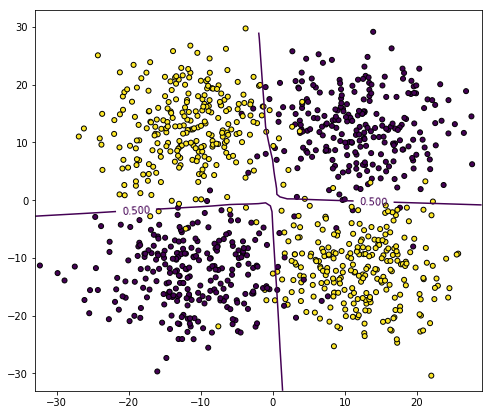

Accuracy = 0.95


In [97]:
def main3():
    data_num = 500  # param
    pai1 = 0.5      # param
    pai2 = 1 - pai1

    sigma = np.array([[40, 0],
                      [0, 40]]) # param

    mu1 = np.array([12, 12])    # param
    mu2 = np.array([12, -12])   # param
    mu3 = np.array([-12, 12])   # param
    mu4 = np.array([-12, -12])  # param
    
    X1, Y1 = make_data(data_num, pai1, pai2, mu1, mu2, sigma, sigma)
    X2, Y2 = make_data(data_num, pai1, pai2, mu4, mu3, sigma, sigma)
    X = np.vstack((X1, X2))
    Y = np.hstack((Y1, Y2))
    
    node_count = 10
    hidden_count = 1
    epochs = 20
    run(X, Y, node_count, hidden_count, epochs)
main3()

(800, 2) (1000, 2) (800,) (1000,)


Epoch 1/20


   1/1000 [..............................] - ETA: 3:56:02 - loss: 0.5907 - acc: 1.0000

   4/1000 [..............................] - ETA: 59:05 - loss: 0.5176 - acc: 1.0000  

   8/1000 [..............................] - ETA: 29:33 - loss: 0.5218 - acc: 0.8750

  12/1000 [..............................] - ETA: 19:43 - loss: 0.5773 - acc: 0.7500

  16/1000 [..............................] - ETA: 14:47 - loss: 0.5844 - acc: 0.6875

  20/1000 [..............................] - ETA: 11:49 - loss: 0.8048 - acc: 0.6000

  24/1000 [..............................] - ETA: 9:51 - loss: 0.7785 - acc: 0.5833 

  28/1000 [..............................] - ETA: 8:26 - loss: 0.7472 - acc: 0.5714

  32/1000 [..............................] - ETA: 7:22 - loss: 0.9284 - acc: 0.5938

  36/1000 [>.............................] - ETA: 6:33 - loss: 0.8969 - acc: 0.5556

  40/1000 [>.............................] - ETA: 5:53 - loss: 0.8620 - acc: 0.5750

  44/1000 [>.............................] - ETA: 5:21 - loss: 0.8486 - acc: 0.5455

  48/1000 [>.............................] - ETA: 4:54 - loss: 0.8366 - acc: 0.5208

  52/1000 [>.............................] - ETA: 4:31 - loss: 0.8425 - acc: 0.5000

  56/1000 [>.............................] - ETA: 4:12 - loss: 0.8352 - acc: 0.5000

  60/1000 [>.............................] - ETA: 3:55 - loss: 0.8266 - acc: 0.5000

  64/1000 [>.............................] - ETA: 3:40 - loss: 0.8121 - acc: 0.5156

  68/1000 [=>............................] - ETA: 3:27 - loss: 0.8207 - acc: 0.5147

  72/1000 [=>............................] - ETA: 3:15 - loss: 0.8266 - acc: 0.5000

  76/1000 [=>............................] - ETA: 3:05 - loss: 0.8219 - acc: 0.4868

  80/1000 [=>............................] - ETA: 2:55 - loss: 0.8116 - acc: 0.5000

  84/1000 [=>............................] - ETA: 2:47 - loss: 0.8025 - acc: 0.5119

  88/1000 [=>............................] - ETA: 2:39 - loss: 0.8014 - acc: 0.5114

  92/1000 [=>............................] - ETA: 2:32 - loss: 0.7854 - acc: 0.5326

  96/1000 [=>............................] - ETA: 2:25 - loss: 0.7818 - acc: 0.5312

 100/1000 [==>...........................] - ETA: 2:19 - loss: 0.7790 - acc: 0.5200

 104/1000 [==>...........................] - ETA: 2:14 - loss: 0.7736 - acc: 0.5192

 108/1000 [==>...........................] - ETA: 2:09 - loss: 0.7699 - acc: 0.5185

 112/1000 [==>...........................] - ETA: 2:04 - loss: 0.7666 - acc: 0.5268

 116/1000 [==>...........................] - ETA: 2:00 - loss: 0.7621 - acc: 0.5259

 120/1000 [==>...........................] - ETA: 1:56 - loss: 0.7630 - acc: 0.5167

 124/1000 [==>...........................] - ETA: 1:52 - loss: 0.7725 - acc: 0.5081

 128/1000 [==>...........................] - ETA: 1:48 - loss: 0.7737 - acc: 0.5156

 132/1000 [==>...........................] - ETA: 1:45 - loss: 0.7729 - acc: 0.5152

 135/1000 [===>..........................] - ETA: 1:42 - loss: 0.7716 - acc: 0.5111

 139/1000 [===>..........................] - ETA: 1:39 - loss: 0.7679 - acc: 0.5108

 143/1000 [===>..........................] - ETA: 1:36 - loss: 0.7666 - acc: 0.5105

 147/1000 [===>..........................] - ETA: 1:34 - loss: 0.7618 - acc: 0.5170

 151/1000 [===>..........................] - ETA: 1:31 - loss: 0.7591 - acc: 0.5166

 155/1000 [===>..........................] - ETA: 1:29 - loss: 0.7581 - acc: 0.5226

 159/1000 [===>..........................] - ETA: 1:26 - loss: 0.7604 - acc: 0.5220

 163/1000 [===>..........................] - ETA: 1:24 - loss: 0.7677 - acc: 0.5092

 167/1000 [====>.........................] - ETA: 1:22 - loss: 0.7741 - acc: 0.5030

 169/1000 [====>.........................] - ETA: 1:21 - loss: 0.7746 - acc: 0.4970

 173/1000 [====>.........................] - ETA: 1:19 - loss: 0.7691 - acc: 0.5029

 177/1000 [====>.........................] - ETA: 1:17 - loss: 0.7665 - acc: 0.5028

 181/1000 [====>.........................] - ETA: 1:15 - loss: 0.7655 - acc: 0.5083

 185/1000 [====>.........................] - ETA: 1:13 - loss: 0.7655 - acc: 0.5081

 189/1000 [====>.........................] - ETA: 1:12 - loss: 0.7672 - acc: 0.5026

 193/1000 [====>.........................] - ETA: 1:10 - loss: 0.7656 - acc: 0.4974

 197/1000 [====>.........................] - ETA: 1:09 - loss: 0.7662 - acc: 0.4975

 201/1000 [=====>........................] - ETA: 1:07 - loss: 0.7639 - acc: 0.4975

 205/1000 [=====>........................] - ETA: 1:06 - loss: 0.7644 - acc: 0.4976

 209/1000 [=====>........................] - ETA: 1:04 - loss: 0.7633 - acc: 0.4928

 213/1000 [=====>........................] - ETA: 1:03 - loss: 0.7626 - acc: 0.4930

 217/1000 [=====>........................] - ETA: 1:02 - loss: 0.7623 - acc: 0.4839

 221/1000 [=====>........................] - ETA: 1:00 - loss: 0.7608 - acc: 0.4887

 225/1000 [=====>........................] - ETA: 59s - loss: 0.7598 - acc: 0.4889 

 229/1000 [=====>........................] - ETA: 58s - loss: 0.7590 - acc: 0.4847

 233/1000 [=====>........................] - ETA: 57s - loss: 0.7574 - acc: 0.4893

 237/1000 [======>.......................] - ETA: 56s - loss: 0.7569 - acc: 0.4895

 241/1000 [======>.......................] - ETA: 55s - loss: 0.7531 - acc: 0.4938

 245/1000 [======>.......................] - ETA: 54s - loss: 0.7510 - acc: 0.4939

 249/1000 [======>.......................] - ETA: 53s - loss: 0.7505 - acc: 0.4940

 253/1000 [======>.......................] - ETA: 52s - loss: 0.7505 - acc: 0.4862

 257/1000 [======>.......................] - ETA: 51s - loss: 0.7492 - acc: 0.4903

 261/1000 [======>.......................] - ETA: 50s - loss: 0.7492 - acc: 0.4904

 265/1000 [======>.......................] - ETA: 49s - loss: 0.7480 - acc: 0.4943

 269/1000 [=======>......................] - ETA: 48s - loss: 0.7463 - acc: 0.4981

 273/1000 [=======>......................] - ETA: 47s - loss: 0.7457 - acc: 0.4945

 277/1000 [=======>......................] - ETA: 46s - loss: 0.7482 - acc: 0.4874

 281/1000 [=======>......................] - ETA: 46s - loss: 0.7466 - acc: 0.4875

 285/1000 [=======>......................] - ETA: 45s - loss: 0.7454 - acc: 0.4877

 289/1000 [=======>......................] - ETA: 44s - loss: 0.7451 - acc: 0.4844

 293/1000 [=======>......................] - ETA: 43s - loss: 0.7444 - acc: 0.4846

 297/1000 [=======>......................] - ETA: 43s - loss: 0.7437 - acc: 0.4815

 301/1000 [========>.....................] - ETA: 42s - loss: 0.7430 - acc: 0.4817

 306/1000 [========>.....................] - ETA: 41s - loss: 0.7425 - acc: 0.4771

 310/1000 [========>.....................] - ETA: 41s - loss: 0.7399 - acc: 0.4806

 314/1000 [========>.....................] - ETA: 40s - loss: 0.7374 - acc: 0.4841

 319/1000 [========>.....................] - ETA: 39s - loss: 0.7376 - acc: 0.4859

 323/1000 [========>.....................] - ETA: 38s - loss: 0.7373 - acc: 0.4861

 327/1000 [========>.....................] - ETA: 38s - loss: 0.7367 - acc: 0.4862

 331/1000 [========>.....................] - ETA: 37s - loss: 0.7365 - acc: 0.4834

 335/1000 [=========>....................] - ETA: 37s - loss: 0.7356 - acc: 0.4836

 340/1000 [=========>....................] - ETA: 36s - loss: 0.7335 - acc: 0.4882

 344/1000 [=========>....................] - ETA: 35s - loss: 0.7330 - acc: 0.4855

 349/1000 [=========>....................] - ETA: 35s - loss: 0.7327 - acc: 0.4842

 353/1000 [=========>....................] - ETA: 34s - loss: 0.7322 - acc: 0.4844

 358/1000 [=========>....................] - ETA: 34s - loss: 0.7311 - acc: 0.4860

 362/1000 [=========>....................] - ETA: 33s - loss: 0.7316 - acc: 0.4862

 366/1000 [=========>....................] - ETA: 33s - loss: 0.7315 - acc: 0.4809

 370/1000 [==========>...................] - ETA: 32s - loss: 0.7306 - acc: 0.4811

 374/1000 [==========>...................] - ETA: 32s - loss: 0.7320 - acc: 0.4813

 378/1000 [==========>...................] - ETA: 31s - loss: 0.7310 - acc: 0.4815

 382/1000 [==========>...................] - ETA: 31s - loss: 0.7313 - acc: 0.4817

 387/1000 [==========>...................] - ETA: 30s - loss: 0.7339 - acc: 0.4806

 391/1000 [==========>...................] - ETA: 30s - loss: 0.7332 - acc: 0.4783

 395/1000 [==========>...................] - ETA: 29s - loss: 0.7322 - acc: 0.4759

 399/1000 [==========>...................] - ETA: 29s - loss: 0.7311 - acc: 0.4762

 403/1000 [===========>..................] - ETA: 29s - loss: 0.7314 - acc: 0.4739

 408/1000 [===========>..................] - ETA: 28s - loss: 0.7327 - acc: 0.4706

 412/1000 [===========>..................] - ETA: 28s - loss: 0.7320 - acc: 0.4709

 416/1000 [===========>..................] - ETA: 27s - loss: 0.7321 - acc: 0.4688

 421/1000 [===========>..................] - ETA: 27s - loss: 0.7312 - acc: 0.4703

 425/1000 [===========>..................] - ETA: 26s - loss: 0.7303 - acc: 0.4706

 430/1000 [===========>..................] - ETA: 26s - loss: 0.7296 - acc: 0.4744

 435/1000 [============>.................] - ETA: 25s - loss: 0.7288 - acc: 0.4736

 439/1000 [============>.................] - ETA: 25s - loss: 0.7287 - acc: 0.4738

 444/1000 [============>.................] - ETA: 25s - loss: 0.7276 - acc: 0.4775

 448/1000 [============>.................] - ETA: 24s - loss: 0.7273 - acc: 0.4754

 452/1000 [============>.................] - ETA: 24s - loss: 0.7269 - acc: 0.4801

 456/1000 [============>.................] - ETA: 24s - loss: 0.7266 - acc: 0.4781

 460/1000 [============>.................] - ETA: 23s - loss: 0.7263 - acc: 0.4804

 464/1000 [============>.................] - ETA: 23s - loss: 0.7278 - acc: 0.4763

 468/1000 [=============>................] - ETA: 23s - loss: 0.7281 - acc: 0.4765

 473/1000 [=============>................] - ETA: 22s - loss: 0.7268 - acc: 0.4799

 477/1000 [=============>................] - ETA: 22s - loss: 0.7267 - acc: 0.4801

 481/1000 [=============>................] - ETA: 22s - loss: 0.7253 - acc: 0.4823

 486/1000 [=============>................] - ETA: 21s - loss: 0.7252 - acc: 0.4856

 491/1000 [=============>................] - ETA: 21s - loss: 0.7241 - acc: 0.4868

 495/1000 [=============>................] - ETA: 21s - loss: 0.7239 - acc: 0.4869

 499/1000 [=============>................] - ETA: 20s - loss: 0.7230 - acc: 0.4910

 503/1000 [==============>...............] - ETA: 20s - loss: 0.7230 - acc: 0.4911

 508/1000 [==============>...............] - ETA: 20s - loss: 0.7222 - acc: 0.4941

 513/1000 [==============>...............] - ETA: 19s - loss: 0.7220 - acc: 0.4951

 517/1000 [==============>...............] - ETA: 19s - loss: 0.7212 - acc: 0.4971

 521/1000 [==============>...............] - ETA: 19s - loss: 0.7214 - acc: 0.4952

 526/1000 [==============>...............] - ETA: 19s - loss: 0.7213 - acc: 0.4962

 531/1000 [==============>...............] - ETA: 18s - loss: 0.7199 - acc: 0.4972

 535/1000 [===============>..............] - ETA: 18s - loss: 0.7201 - acc: 0.4953

 540/1000 [===============>..............] - ETA: 18s - loss: 0.7198 - acc: 0.4926

 544/1000 [===============>..............] - ETA: 17s - loss: 0.7192 - acc: 0.4926

 548/1000 [===============>..............] - ETA: 17s - loss: 0.7196 - acc: 0.4909

 552/1000 [===============>..............] - ETA: 17s - loss: 0.7186 - acc: 0.4928

 557/1000 [===============>..............] - ETA: 17s - loss: 0.7185 - acc: 0.4901

 561/1000 [===============>..............] - ETA: 16s - loss: 0.7189 - acc: 0.4866

 565/1000 [===============>..............] - ETA: 16s - loss: 0.7189 - acc: 0.4867

 569/1000 [================>.............] - ETA: 16s - loss: 0.7189 - acc: 0.4833

 573/1000 [================>.............] - ETA: 16s - loss: 0.7189 - acc: 0.4817

 577/1000 [================>.............] - ETA: 15s - loss: 0.7192 - acc: 0.4801

 582/1000 [================>.............] - ETA: 15s - loss: 0.7190 - acc: 0.4811

 587/1000 [================>.............] - ETA: 15s - loss: 0.7187 - acc: 0.4821

 591/1000 [================>.............] - ETA: 15s - loss: 0.7185 - acc: 0.4822

 596/1000 [================>.............] - ETA: 14s - loss: 0.7181 - acc: 0.4832

 601/1000 [=================>............] - ETA: 14s - loss: 0.7180 - acc: 0.4809

 605/1000 [=================>............] - ETA: 14s - loss: 0.7183 - acc: 0.4793

 609/1000 [=================>............] - ETA: 14s - loss: 0.7179 - acc: 0.4795

 614/1000 [=================>............] - ETA: 13s - loss: 0.7177 - acc: 0.4788

 619/1000 [=================>............] - ETA: 13s - loss: 0.7180 - acc: 0.4782

 623/1000 [=================>............] - ETA: 13s - loss: 0.7182 - acc: 0.4783

 628/1000 [=================>............] - ETA: 13s - loss: 0.7177 - acc: 0.4825

 632/1000 [=================>............] - ETA: 13s - loss: 0.7174 - acc: 0.4842

 636/1000 [==================>...........] - ETA: 12s - loss: 0.7168 - acc: 0.4858

 640/1000 [==================>...........] - ETA: 12s - loss: 0.7164 - acc: 0.4844

 644/1000 [==================>...........] - ETA: 12s - loss: 0.7164 - acc: 0.4814

 648/1000 [==================>...........] - ETA: 12s - loss: 0.7155 - acc: 0.4799

 652/1000 [==================>...........] - ETA: 12s - loss: 0.7147 - acc: 0.4816

 656/1000 [==================>...........] - ETA: 11s - loss: 0.7146 - acc: 0.4787

 661/1000 [==================>...........] - ETA: 11s - loss: 0.7140 - acc: 0.4796

 665/1000 [==================>...........] - ETA: 11s - loss: 0.7127 - acc: 0.4812

 670/1000 [===================>..........] - ETA: 11s - loss: 0.7125 - acc: 0.4791

 675/1000 [===================>..........] - ETA: 11s - loss: 0.7125 - acc: 0.4800

 680/1000 [===================>..........] - ETA: 10s - loss: 0.7125 - acc: 0.4824

 685/1000 [===================>..........] - ETA: 10s - loss: 0.7123 - acc: 0.4832

 689/1000 [===================>..........] - ETA: 10s - loss: 0.7125 - acc: 0.4819

 694/1000 [===================>..........] - ETA: 10s - loss: 0.7122 - acc: 0.4827

 698/1000 [===================>..........] - ETA: 10s - loss: 0.7122 - acc: 0.4814

 703/1000 [====================>.........] - ETA: 9s - loss: 0.7118 - acc: 0.4836 

 707/1000 [====================>.........] - ETA: 9s - loss: 0.7109 - acc: 0.4837

 711/1000 [====================>.........] - ETA: 9s - loss: 0.7100 - acc: 0.4866

 715/1000 [====================>.........] - ETA: 9s - loss: 0.7103 - acc: 0.4867

 720/1000 [====================>.........] - ETA: 9s - loss: 0.7100 - acc: 0.4875

 724/1000 [====================>.........] - ETA: 9s - loss: 0.7100 - acc: 0.4862

 728/1000 [====================>.........] - ETA: 8s - loss: 0.7123 - acc: 0.4863

 732/1000 [====================>.........] - ETA: 8s - loss: 0.7133 - acc: 0.4863

 736/1000 [=====================>........] - ETA: 8s - loss: 0.7131 - acc: 0.4864

 740/1000 [=====================>........] - ETA: 8s - loss: 0.7123 - acc: 0.4865

 744/1000 [=====================>........] - ETA: 8s - loss: 0.7122 - acc: 0.4866

 748/1000 [=====================>........] - ETA: 8s - loss: 0.7115 - acc: 0.4866

 753/1000 [=====================>........] - ETA: 7s - loss: 0.7115 - acc: 0.4874

 757/1000 [=====================>........] - ETA: 7s - loss: 0.7117 - acc: 0.4861

 761/1000 [=====================>........] - ETA: 7s - loss: 0.7117 - acc: 0.4875

 766/1000 [=====================>........] - ETA: 7s - loss: 0.7116 - acc: 0.4856

 770/1000 [======================>.......] - ETA: 7s - loss: 0.7115 - acc: 0.4857

 774/1000 [======================>.......] - ETA: 7s - loss: 0.7106 - acc: 0.4871

 778/1000 [======================>.......] - ETA: 6s - loss: 0.7105 - acc: 0.4871

 783/1000 [======================>.......] - ETA: 6s - loss: 0.7099 - acc: 0.4904

 787/1000 [======================>.......] - ETA: 6s - loss: 0.7093 - acc: 0.4905

 792/1000 [======================>.......] - ETA: 6s - loss: 0.7094 - acc: 0.4886

 796/1000 [======================>.......] - ETA: 6s - loss: 0.7095 - acc: 0.4874

 800/1000 [=======================>......] - ETA: 6s - loss: 0.7088 - acc: 0.4888

 805/1000 [=======================>......] - ETA: 5s - loss: 0.7074 - acc: 0.4907

 810/1000 [=======================>......] - ETA: 5s - loss: 0.7072 - acc: 0.4889

 814/1000 [=======================>......] - ETA: 5s - loss: 0.7068 - acc: 0.4902

 818/1000 [=======================>......] - ETA: 5s - loss: 0.7070 - acc: 0.4902

 822/1000 [=======================>......] - ETA: 5s - loss: 0.7068 - acc: 0.4915

 827/1000 [=======================>......] - ETA: 5s - loss: 0.7070 - acc: 0.4921

 831/1000 [=======================>......] - ETA: 5s - loss: 0.7069 - acc: 0.4934

 836/1000 [========================>.....] - ETA: 4s - loss: 0.7069 - acc: 0.4940

 841/1000 [========================>.....] - ETA: 4s - loss: 0.7067 - acc: 0.4946

 846/1000 [========================>.....] - ETA: 4s - loss: 0.7066 - acc: 0.4953

 851/1000 [========================>.....] - ETA: 4s - loss: 0.7066 - acc: 0.4947

 855/1000 [========================>.....] - ETA: 4s - loss: 0.7067 - acc: 0.4959

 860/1000 [========================>.....] - ETA: 4s - loss: 0.7066 - acc: 0.4965

 864/1000 [========================>.....] - ETA: 3s - loss: 0.7066 - acc: 0.4977

 868/1000 [=========================>....] - ETA: 3s - loss: 0.7065 - acc: 0.4988

 872/1000 [=========================>....] - ETA: 3s - loss: 0.7064 - acc: 0.5000

 876/1000 [=========================>....] - ETA: 3s - loss: 0.7064 - acc: 0.5000

 880/1000 [=========================>....] - ETA: 3s - loss: 0.7063 - acc: 0.5000

 884/1000 [=========================>....] - ETA: 3s - loss: 0.7062 - acc: 0.5011

 888/1000 [=========================>....] - ETA: 3s - loss: 0.7061 - acc: 0.5023

 892/1000 [=========================>....] - ETA: 3s - loss: 0.7059 - acc: 0.5011

 896/1000 [=========================>....] - ETA: 2s - loss: 0.7056 - acc: 0.5011

 900/1000 [==========================>...] - ETA: 2s - loss: 0.7057 - acc: 0.5000

 904/1000 [==========================>...] - ETA: 2s - loss: 0.7049 - acc: 0.5022

 908/1000 [==========================>...] - ETA: 2s - loss: 0.7050 - acc: 0.5022

 912/1000 [==========================>...] - ETA: 2s - loss: 0.7046 - acc: 0.5044

 916/1000 [==========================>...] - ETA: 2s - loss: 0.7045 - acc: 0.5055

 920/1000 [==========================>...] - ETA: 2s - loss: 0.7046 - acc: 0.5054

 923/1000 [==========================>...] - ETA: 2s - loss: 0.7040 - acc: 0.5070

 926/1000 [==========================>...] - ETA: 2s - loss: 0.7040 - acc: 0.5076

 931/1000 [==========================>...] - ETA: 1s - loss: 0.7039 - acc: 0.5081

 935/1000 [===========================>..] - ETA: 1s - loss: 0.7032 - acc: 0.5091

 939/1000 [===========================>..] - ETA: 1s - loss: 0.7031 - acc: 0.5091

 944/1000 [===========================>..] - ETA: 1s - loss: 0.7031 - acc: 0.5095

 948/1000 [===========================>..] - ETA: 1s - loss: 0.7022 - acc: 0.5105

 952/1000 [===========================>..] - ETA: 1s - loss: 0.7019 - acc: 0.5116

 956/1000 [===========================>..] - ETA: 1s - loss: 0.7016 - acc: 0.5126

 960/1000 [===========================>..] - ETA: 1s - loss: 0.7018 - acc: 0.5125

 964/1000 [===========================>..] - ETA: 0s - loss: 0.7016 - acc: 0.5124

 968/1000 [============================>.] - ETA: 0s - loss: 0.7012 - acc: 0.5134

 972/1000 [============================>.] - ETA: 0s - loss: 0.7011 - acc: 0.5134

 977/1000 [============================>.] - ETA: 0s - loss: 0.7011 - acc: 0.5138

 982/1000 [============================>.] - ETA: 0s - loss: 0.7010 - acc: 0.5143

 986/1000 [============================>.] - ETA: 0s - loss: 0.7016 - acc: 0.5152

 991/1000 [============================>.] - ETA: 0s - loss: 0.7009 - acc: 0.5166

 995/1000 [============================>.] - ETA: 0s - loss: 0.7009 - acc: 0.5156

1000/1000 [==============================] - 27s 27ms/step - loss: 0.7009 - acc: 0.5150


Epoch 2/20
   1/1000 [..............................] - ETA: 11s - loss: 0.7094 - acc: 0.0000e+00

   4/1000 [..............................] - ETA: 16s - loss: 0.6905 - acc: 0.5000    

   7/1000 [..............................] - ETA: 17s - loss: 0.6837 - acc: 0.7143

  11/1000 [..............................] - ETA: 16s - loss: 0.6637 - acc: 0.7273

  15/1000 [..............................] - ETA: 15s - loss: 0.6681 - acc: 0.7333

  20/1000 [..............................] - ETA: 14s - loss: 0.6380 - acc: 0.7500

  24/1000 [..............................] - ETA: 14s - loss: 0.6448 - acc: 0.7500

  28/1000 [..............................] - ETA: 13s - loss: 0.6471 - acc: 0.7143

  32/1000 [..............................] - ETA: 13s - loss: 0.6491 - acc: 0.7188

  37/1000 [>.............................] - ETA: 13s - loss: 0.6364 - acc: 0.7027

  41/1000 [>.............................] - ETA: 13s - loss: 0.6372 - acc: 0.7317

  45/1000 [>.............................] - ETA: 13s - loss: 0.6413 - acc: 0.7333

  49/1000 [>.............................] - ETA: 12s - loss: 0.6453 - acc: 0.7143

  53/1000 [>.............................] - ETA: 12s - loss: 0.6381 - acc: 0.7170

  57/1000 [>.............................] - ETA: 12s - loss: 0.6406 - acc: 0.7018

  62/1000 [>.............................] - ETA: 12s - loss: 0.6409 - acc: 0.7097

  67/1000 [=>............................] - ETA: 12s - loss: 0.6276 - acc: 0.7164

  72/1000 [=>............................] - ETA: 12s - loss: 0.6319 - acc: 0.7083

  77/1000 [=>............................] - ETA: 12s - loss: 0.6219 - acc: 0.7143

  82/1000 [=>............................] - ETA: 12s - loss: 0.6189 - acc: 0.7073

  86/1000 [=>............................] - ETA: 11s - loss: 0.6178 - acc: 0.6977

  90/1000 [=>............................] - ETA: 11s - loss: 0.6279 - acc: 0.6889

  94/1000 [=>............................] - ETA: 11s - loss: 0.6318 - acc: 0.6702

  98/1000 [=>............................] - ETA: 11s - loss: 0.6229 - acc: 0.6735

 103/1000 [==>...........................] - ETA: 11s - loss: 0.6135 - acc: 0.6893

 107/1000 [==>...........................] - ETA: 11s - loss: 0.6157 - acc: 0.6822

 111/1000 [==>...........................] - ETA: 11s - loss: 0.6173 - acc: 0.6847

 114/1000 [==>...........................] - ETA: 11s - loss: 0.6169 - acc: 0.6930

 118/1000 [==>...........................] - ETA: 11s - loss: 0.6144 - acc: 0.6864

 122/1000 [==>...........................] - ETA: 11s - loss: 0.6180 - acc: 0.6803

 126/1000 [==>...........................] - ETA: 11s - loss: 0.6199 - acc: 0.6825

 130/1000 [==>...........................] - ETA: 11s - loss: 0.6224 - acc: 0.6769

 134/1000 [===>..........................] - ETA: 11s - loss: 0.6203 - acc: 0.6791

 139/1000 [===>..........................] - ETA: 11s - loss: 0.6188 - acc: 0.6835

 143/1000 [===>..........................] - ETA: 11s - loss: 0.6158 - acc: 0.6853

 147/1000 [===>..........................] - ETA: 11s - loss: 0.6092 - acc: 0.6939

 152/1000 [===>..........................] - ETA: 11s - loss: 0.6124 - acc: 0.6842

 156/1000 [===>..........................] - ETA: 11s - loss: 0.6144 - acc: 0.6859

 160/1000 [===>..........................] - ETA: 10s - loss: 0.6143 - acc: 0.6875

 164/1000 [===>..........................] - ETA: 10s - loss: 0.6068 - acc: 0.6951

 168/1000 [====>.........................] - ETA: 10s - loss: 0.6000 - acc: 0.7024

 173/1000 [====>.........................] - ETA: 10s - loss: 0.5960 - acc: 0.7110

 177/1000 [====>.........................] - ETA: 10s - loss: 0.5981 - acc: 0.7119

 181/1000 [====>.........................] - ETA: 10s - loss: 0.5978 - acc: 0.7127

 185/1000 [====>.........................] - ETA: 10s - loss: 0.5970 - acc: 0.7189

 189/1000 [====>.........................] - ETA: 10s - loss: 0.5964 - acc: 0.7196

 193/1000 [====>.........................] - ETA: 10s - loss: 0.6011 - acc: 0.7047

 198/1000 [====>.........................] - ETA: 10s - loss: 0.6035 - acc: 0.7020

 203/1000 [=====>........................] - ETA: 10s - loss: 0.6001 - acc: 0.7094

 207/1000 [=====>........................] - ETA: 10s - loss: 0.6022 - acc: 0.7053

 211/1000 [=====>........................] - ETA: 10s - loss: 0.5995 - acc: 0.7109

 216/1000 [=====>........................] - ETA: 10s - loss: 0.5968 - acc: 0.7176

 221/1000 [=====>........................] - ETA: 10s - loss: 0.5935 - acc: 0.7240

 226/1000 [=====>........................] - ETA: 9s - loss: 0.6251 - acc: 0.7124 

 231/1000 [=====>........................] - ETA: 9s - loss: 0.6256 - acc: 0.7143

 235/1000 [======>.......................] - ETA: 9s - loss: 0.6237 - acc: 0.7191

 240/1000 [======>.......................] - ETA: 9s - loss: 0.6170 - acc: 0.7208

 244/1000 [======>.......................] - ETA: 9s - loss: 0.6160 - acc: 0.7213

 248/1000 [======>.......................] - ETA: 9s - loss: 0.6166 - acc: 0.7218

 252/1000 [======>.......................] - ETA: 9s - loss: 0.6124 - acc: 0.7222

 256/1000 [======>.......................] - ETA: 9s - loss: 0.6082 - acc: 0.7266

 260/1000 [======>.......................] - ETA: 9s - loss: 0.6069 - acc: 0.7269

 265/1000 [======>.......................] - ETA: 9s - loss: 0.6049 - acc: 0.7283

 269/1000 [=======>......................] - ETA: 9s - loss: 0.6042 - acc: 0.7249

 273/1000 [=======>......................] - ETA: 9s - loss: 0.6053 - acc: 0.7253

 277/1000 [=======>......................] - ETA: 9s - loss: 0.6013 - acc: 0.7292

 281/1000 [=======>......................] - ETA: 9s - loss: 0.6006 - acc: 0.7295

 285/1000 [=======>......................] - ETA: 9s - loss: 0.6023 - acc: 0.7228

 289/1000 [=======>......................] - ETA: 9s - loss: 0.6001 - acc: 0.7197

 293/1000 [=======>......................] - ETA: 9s - loss: 0.6002 - acc: 0.7167

 298/1000 [=======>......................] - ETA: 9s - loss: 0.6013 - acc: 0.7181

 303/1000 [========>.....................] - ETA: 8s - loss: 0.6036 - acc: 0.7096

 307/1000 [========>.....................] - ETA: 8s - loss: 0.6032 - acc: 0.7101

 312/1000 [========>.....................] - ETA: 8s - loss: 0.6061 - acc: 0.7083

 316/1000 [========>.....................] - ETA: 8s - loss: 0.6069 - acc: 0.7089

 321/1000 [========>.....................] - ETA: 8s - loss: 0.6053 - acc: 0.7072

 325/1000 [========>.....................] - ETA: 8s - loss: 0.6063 - acc: 0.7046

 329/1000 [========>.....................] - ETA: 8s - loss: 0.6092 - acc: 0.7052

 334/1000 [=========>....................] - ETA: 8s - loss: 0.6079 - acc: 0.7096

 338/1000 [=========>....................] - ETA: 8s - loss: 0.6126 - acc: 0.7071

 343/1000 [=========>....................] - ETA: 8s - loss: 0.6137 - acc: 0.7055

 347/1000 [=========>....................] - ETA: 8s - loss: 0.6128 - acc: 0.7032

 351/1000 [=========>....................] - ETA: 8s - loss: 0.6127 - acc: 0.7037

 355/1000 [=========>....................] - ETA: 8s - loss: 0.6125 - acc: 0.7070

 360/1000 [=========>....................] - ETA: 8s - loss: 0.6113 - acc: 0.7083

 364/1000 [=========>....................] - ETA: 8s - loss: 0.6121 - acc: 0.7088

 369/1000 [==========>...................] - ETA: 8s - loss: 0.6089 - acc: 0.7127

 373/1000 [==========>...................] - ETA: 8s - loss: 0.6090 - acc: 0.7158

 377/1000 [==========>...................] - ETA: 7s - loss: 0.6101 - acc: 0.7109

 381/1000 [==========>...................] - ETA: 7s - loss: 0.6088 - acc: 0.7087

 386/1000 [==========>...................] - ETA: 7s - loss: 0.6078 - acc: 0.7098

 391/1000 [==========>...................] - ETA: 7s - loss: 0.6044 - acc: 0.7136

 395/1000 [==========>...................] - ETA: 7s - loss: 0.6039 - acc: 0.7139

 400/1000 [===========>..................] - ETA: 7s - loss: 0.6043 - acc: 0.7125

 404/1000 [===========>..................] - ETA: 7s - loss: 0.6046 - acc: 0.7104

 409/1000 [===========>..................] - ETA: 7s - loss: 0.6051 - acc: 0.7115

 413/1000 [===========>..................] - ETA: 7s - loss: 0.6039 - acc: 0.7143

 417/1000 [===========>..................] - ETA: 7s - loss: 0.6028 - acc: 0.7170

 422/1000 [===========>..................] - ETA: 7s - loss: 0.6017 - acc: 0.7156

 426/1000 [===========>..................] - ETA: 7s - loss: 0.5995 - acc: 0.7183

 430/1000 [===========>..................] - ETA: 7s - loss: 0.5993 - acc: 0.7209

 435/1000 [============>.................] - ETA: 7s - loss: 0.5989 - acc: 0.7195

 439/1000 [============>.................] - ETA: 7s - loss: 0.5978 - acc: 0.7221

 443/1000 [============>.................] - ETA: 7s - loss: 0.5985 - acc: 0.7223

 447/1000 [============>.................] - ETA: 7s - loss: 0.5989 - acc: 0.7248

 451/1000 [============>.................] - ETA: 7s - loss: 0.5983 - acc: 0.7251

 456/1000 [============>.................] - ETA: 6s - loss: 0.5968 - acc: 0.7259

 460/1000 [============>.................] - ETA: 6s - loss: 0.5958 - acc: 0.7261

 464/1000 [============>.................] - ETA: 6s - loss: 0.5962 - acc: 0.7263

 468/1000 [=============>................] - ETA: 6s - loss: 0.5932 - acc: 0.7286

 473/1000 [=============>................] - ETA: 6s - loss: 0.5895 - acc: 0.7315

 478/1000 [=============>................] - ETA: 6s - loss: 0.5881 - acc: 0.7343

 482/1000 [=============>................] - ETA: 6s - loss: 0.5894 - acc: 0.7303

 486/1000 [=============>................] - ETA: 6s - loss: 0.5884 - acc: 0.7325

 490/1000 [=============>................] - ETA: 6s - loss: 0.5889 - acc: 0.7327

 494/1000 [=============>................] - ETA: 6s - loss: 0.6009 - acc: 0.7328

 499/1000 [=============>................] - ETA: 6s - loss: 0.5990 - acc: 0.7355

 504/1000 [==============>...............] - ETA: 6s - loss: 0.5962 - acc: 0.7381

 508/1000 [==============>...............] - ETA: 6s - loss: 0.5943 - acc: 0.7382

 512/1000 [==============>...............] - ETA: 6s - loss: 0.5961 - acc: 0.7383

 516/1000 [==============>...............] - ETA: 6s - loss: 0.5957 - acc: 0.7364

 521/1000 [==============>...............] - ETA: 6s - loss: 0.5949 - acc: 0.7390

 525/1000 [==============>...............] - ETA: 6s - loss: 0.5952 - acc: 0.7390

 530/1000 [==============>...............] - ETA: 5s - loss: 0.5958 - acc: 0.7358

 534/1000 [===============>..............] - ETA: 5s - loss: 0.5957 - acc: 0.7378

 538/1000 [===============>..............] - ETA: 5s - loss: 0.5942 - acc: 0.7398

 542/1000 [===============>..............] - ETA: 5s - loss: 0.5931 - acc: 0.7417

 546/1000 [===============>..............] - ETA: 5s - loss: 0.5918 - acc: 0.7436

 551/1000 [===============>..............] - ETA: 5s - loss: 0.5929 - acc: 0.7405

 555/1000 [===============>..............] - ETA: 5s - loss: 0.5908 - acc: 0.7423

 560/1000 [===============>..............] - ETA: 5s - loss: 0.5913 - acc: 0.7411

 564/1000 [===============>..............] - ETA: 5s - loss: 0.5909 - acc: 0.7429

 569/1000 [================>.............] - ETA: 5s - loss: 0.5903 - acc: 0.7434

 573/1000 [================>.............] - ETA: 5s - loss: 0.5892 - acc: 0.7452

 577/1000 [================>.............] - ETA: 5s - loss: 0.5882 - acc: 0.7470

 581/1000 [================>.............] - ETA: 5s - loss: 0.5867 - acc: 0.7487

 585/1000 [================>.............] - ETA: 5s - loss: 0.5871 - acc: 0.7487

 589/1000 [================>.............] - ETA: 5s - loss: 0.5864 - acc: 0.7487

 593/1000 [================>.............] - ETA: 5s - loss: 0.5849 - acc: 0.7504

 597/1000 [================>.............] - ETA: 5s - loss: 0.5843 - acc: 0.7504

 601/1000 [=================>............] - ETA: 5s - loss: 0.5845 - acc: 0.7521

 605/1000 [=================>............] - ETA: 5s - loss: 0.5852 - acc: 0.7521

 609/1000 [=================>............] - ETA: 4s - loss: 0.5835 - acc: 0.7537

 613/1000 [=================>............] - ETA: 4s - loss: 0.5825 - acc: 0.7537

 617/1000 [=================>............] - ETA: 4s - loss: 0.5811 - acc: 0.7553

 622/1000 [=================>............] - ETA: 4s - loss: 0.5818 - acc: 0.7540

 626/1000 [=================>............] - ETA: 4s - loss: 0.5808 - acc: 0.7556

 630/1000 [=================>............] - ETA: 4s - loss: 0.5819 - acc: 0.7540

 635/1000 [==================>...........] - ETA: 4s - loss: 0.5805 - acc: 0.7543

 640/1000 [==================>...........] - ETA: 4s - loss: 0.5789 - acc: 0.7562

 644/1000 [==================>...........] - ETA: 4s - loss: 0.5779 - acc: 0.7578

 648/1000 [==================>...........] - ETA: 4s - loss: 0.5773 - acc: 0.7577

 652/1000 [==================>...........] - ETA: 4s - loss: 0.5788 - acc: 0.7561

 656/1000 [==================>...........] - ETA: 4s - loss: 0.5778 - acc: 0.7576

 661/1000 [==================>...........] - ETA: 4s - loss: 0.5829 - acc: 0.7579

 665/1000 [==================>...........] - ETA: 4s - loss: 0.5817 - acc: 0.7594

 669/1000 [===================>..........] - ETA: 4s - loss: 0.5809 - acc: 0.7608

 673/1000 [===================>..........] - ETA: 4s - loss: 0.5800 - acc: 0.7608

 677/1000 [===================>..........] - ETA: 4s - loss: 0.5788 - acc: 0.7622

 681/1000 [===================>..........] - ETA: 4s - loss: 0.5792 - acc: 0.7606

 685/1000 [===================>..........] - ETA: 4s - loss: 0.5782 - acc: 0.7620

 690/1000 [===================>..........] - ETA: 3s - loss: 0.5767 - acc: 0.7638

 695/1000 [===================>..........] - ETA: 3s - loss: 0.5761 - acc: 0.7626

 700/1000 [====================>.........] - ETA: 3s - loss: 0.5813 - acc: 0.7629

 704/1000 [====================>.........] - ETA: 3s - loss: 0.5824 - acc: 0.7628

 708/1000 [====================>.........] - ETA: 3s - loss: 0.5820 - acc: 0.7641

 712/1000 [====================>.........] - ETA: 3s - loss: 0.5810 - acc: 0.7654

 716/1000 [====================>.........] - ETA: 3s - loss: 0.5809 - acc: 0.7654

 721/1000 [====================>.........] - ETA: 3s - loss: 0.5799 - acc: 0.7642

 725/1000 [====================>.........] - ETA: 3s - loss: 0.5774 - acc: 0.7655

 729/1000 [====================>.........] - ETA: 3s - loss: 0.5762 - acc: 0.7668

 733/1000 [====================>.........] - ETA: 3s - loss: 0.5744 - acc: 0.7681

 737/1000 [=====================>........] - ETA: 3s - loss: 0.5748 - acc: 0.7680

 742/1000 [=====================>........] - ETA: 3s - loss: 0.5734 - acc: 0.7695

 746/1000 [=====================>........] - ETA: 3s - loss: 0.5742 - acc: 0.7694

 751/1000 [=====================>........] - ETA: 3s - loss: 0.5732 - acc: 0.7710

 755/1000 [=====================>........] - ETA: 3s - loss: 0.5720 - acc: 0.7722

 760/1000 [=====================>........] - ETA: 3s - loss: 0.5701 - acc: 0.7737

 764/1000 [=====================>........] - ETA: 2s - loss: 0.5698 - acc: 0.7749

 768/1000 [======================>.......] - ETA: 2s - loss: 0.5698 - acc: 0.7747

 773/1000 [======================>.......] - ETA: 2s - loss: 0.5683 - acc: 0.7762

 777/1000 [======================>.......] - ETA: 2s - loss: 0.5683 - acc: 0.7761

 782/1000 [======================>.......] - ETA: 2s - loss: 0.5664 - acc: 0.7775

 786/1000 [======================>.......] - ETA: 2s - loss: 0.5652 - acc: 0.7774

 791/1000 [======================>.......] - ETA: 2s - loss: 0.5629 - acc: 0.7788

 796/1000 [======================>.......] - ETA: 2s - loss: 0.5626 - acc: 0.7776

 801/1000 [=======================>......] - ETA: 2s - loss: 0.5617 - acc: 0.7790

 805/1000 [=======================>......] - ETA: 2s - loss: 0.5596 - acc: 0.7801

 810/1000 [=======================>......] - ETA: 2s - loss: 0.5591 - acc: 0.7815

 815/1000 [=======================>......] - ETA: 2s - loss: 0.5590 - acc: 0.7804

 819/1000 [=======================>......] - ETA: 2s - loss: 0.5587 - acc: 0.7802

 824/1000 [=======================>......] - ETA: 2s - loss: 0.5565 - acc: 0.7816

 829/1000 [=======================>......] - ETA: 2s - loss: 0.5548 - acc: 0.7829

 834/1000 [========================>.....] - ETA: 2s - loss: 0.5545 - acc: 0.7842

 838/1000 [========================>.....] - ETA: 2s - loss: 0.5537 - acc: 0.7840

 843/1000 [========================>.....] - ETA: 1s - loss: 0.5520 - acc: 0.7853

 847/1000 [========================>.....] - ETA: 1s - loss: 0.5520 - acc: 0.7851

 852/1000 [========================>.....] - ETA: 1s - loss: 0.5502 - acc: 0.7864

 856/1000 [========================>.....] - ETA: 1s - loss: 0.5490 - acc: 0.7874

 860/1000 [========================>.....] - ETA: 1s - loss: 0.5502 - acc: 0.7860

 864/1000 [========================>.....] - ETA: 1s - loss: 0.5501 - acc: 0.7870

 868/1000 [=========================>....] - ETA: 1s - loss: 0.5480 - acc: 0.7880

 872/1000 [=========================>....] - ETA: 1s - loss: 0.5466 - acc: 0.7890

 876/1000 [=========================>....] - ETA: 1s - loss: 0.5446 - acc: 0.7900

 880/1000 [=========================>....] - ETA: 1s - loss: 0.5454 - acc: 0.7886

 884/1000 [=========================>....] - ETA: 1s - loss: 0.5446 - acc: 0.7896

 888/1000 [=========================>....] - ETA: 1s - loss: 0.5427 - acc: 0.7905

 892/1000 [=========================>....] - ETA: 1s - loss: 0.5417 - acc: 0.7904

 896/1000 [=========================>....] - ETA: 1s - loss: 0.5406 - acc: 0.7913

 901/1000 [==========================>...] - ETA: 1s - loss: 0.5397 - acc: 0.7913

 905/1000 [==========================>...] - ETA: 1s - loss: 0.5390 - acc: 0.7923

 909/1000 [==========================>...] - ETA: 1s - loss: 0.5374 - acc: 0.7932

 913/1000 [==========================>...] - ETA: 1s - loss: 0.5359 - acc: 0.7941

 917/1000 [==========================>...] - ETA: 1s - loss: 0.5357 - acc: 0.7950

 921/1000 [==========================>...] - ETA: 1s - loss: 0.5347 - acc: 0.7959

 925/1000 [==========================>...] - ETA: 0s - loss: 0.5328 - acc: 0.7968

 929/1000 [==========================>...] - ETA: 0s - loss: 0.5315 - acc: 0.7976

 934/1000 [===========================>..] - ETA: 0s - loss: 0.5308 - acc: 0.7987

 939/1000 [===========================>..] - ETA: 0s - loss: 0.5295 - acc: 0.7998

 943/1000 [===========================>..] - ETA: 0s - loss: 0.5287 - acc: 0.8006

 947/1000 [===========================>..] - ETA: 0s - loss: 0.5272 - acc: 0.8015

 951/1000 [===========================>..] - ETA: 0s - loss: 0.5269 - acc: 0.8023

 955/1000 [===========================>..] - ETA: 0s - loss: 0.5271 - acc: 0.8021

 959/1000 [===========================>..] - ETA: 0s - loss: 0.5249 - acc: 0.8029

 963/1000 [===========================>..] - ETA: 0s - loss: 0.5239 - acc: 0.8037

 968/1000 [============================>.] - ETA: 0s - loss: 0.5234 - acc: 0.8048

 973/1000 [============================>.] - ETA: 0s - loss: 0.5222 - acc: 0.8058

 977/1000 [============================>.] - ETA: 0s - loss: 0.5208 - acc: 0.8066

 981/1000 [============================>.] - ETA: 0s - loss: 0.5213 - acc: 0.8063

 985/1000 [============================>.] - ETA: 0s - loss: 0.5201 - acc: 0.8071

 989/1000 [============================>.] - ETA: 0s - loss: 0.5187 - acc: 0.8079

 994/1000 [============================>.] - ETA: 0s - loss: 0.5172 - acc: 0.8089

 998/1000 [============================>.] - ETA: 0s - loss: 0.5164 - acc: 0.8096

1000/1000 [==============================] - 13s 13ms/step - loss: 0.5161 - acc: 0.8100


Epoch 3/20


   1/1000 [..............................] - ETA: 15s - loss: 0.3468 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.2592 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.3768 - acc: 0.8750

  12/1000 [..............................] - ETA: 14s - loss: 0.3456 - acc: 0.9167

  16/1000 [..............................] - ETA: 13s - loss: 0.3549 - acc: 0.9375

  21/1000 [..............................] - ETA: 13s - loss: 0.3460 - acc: 0.9524

  25/1000 [..............................] - ETA: 13s - loss: 0.3274 - acc: 0.9600

  30/1000 [..............................] - ETA: 12s - loss: 0.3143 - acc: 0.9667

  34/1000 [>.............................] - ETA: 12s - loss: 0.3300 - acc: 0.9412

  39/1000 [>.............................] - ETA: 12s - loss: 0.3479 - acc: 0.9231

  43/1000 [>.............................] - ETA: 12s - loss: 0.3230 - acc: 0.9302

  47/1000 [>.............................] - ETA: 12s - loss: 0.3341 - acc: 0.9149

  51/1000 [>.............................] - ETA: 12s - loss: 0.3478 - acc: 0.9020

  56/1000 [>.............................] - ETA: 12s - loss: 0.3465 - acc: 0.9107

  60/1000 [>.............................] - ETA: 12s - loss: 0.3504 - acc: 0.9000

  64/1000 [>.............................] - ETA: 12s - loss: 0.3451 - acc: 0.9062

  68/1000 [=>............................] - ETA: 12s - loss: 0.3426 - acc: 0.9118

  72/1000 [=>............................] - ETA: 12s - loss: 0.3237 - acc: 0.9167

  76/1000 [=>............................] - ETA: 11s - loss: 0.3191 - acc: 0.9211

  80/1000 [=>............................] - ETA: 11s - loss: 0.3228 - acc: 0.9250

  84/1000 [=>............................] - ETA: 11s - loss: 0.3117 - acc: 0.9286

  88/1000 [=>............................] - ETA: 11s - loss: 0.3188 - acc: 0.9205

  92/1000 [=>............................] - ETA: 11s - loss: 0.3125 - acc: 0.9130

  96/1000 [=>............................] - ETA: 11s - loss: 0.3119 - acc: 0.9062

 100/1000 [==>...........................] - ETA: 11s - loss: 0.3406 - acc: 0.8900

 104/1000 [==>...........................] - ETA: 11s - loss: 0.3360 - acc: 0.8942

 109/1000 [==>...........................] - ETA: 11s - loss: 0.3286 - acc: 0.8991

 113/1000 [==>...........................] - ETA: 11s - loss: 0.3272 - acc: 0.9027

 118/1000 [==>...........................] - ETA: 11s - loss: 0.3362 - acc: 0.8983

 122/1000 [==>...........................] - ETA: 11s - loss: 0.3330 - acc: 0.9016

 127/1000 [==>...........................] - ETA: 11s - loss: 0.3239 - acc: 0.9055

 131/1000 [==>...........................] - ETA: 11s - loss: 0.3311 - acc: 0.8931

 135/1000 [===>..........................] - ETA: 11s - loss: 0.3316 - acc: 0.8889

 139/1000 [===>..........................] - ETA: 11s - loss: 0.3262 - acc: 0.8921

 143/1000 [===>..........................] - ETA: 11s - loss: 0.3256 - acc: 0.8951

 148/1000 [===>..........................] - ETA: 10s - loss: 0.3199 - acc: 0.8986

 152/1000 [===>..........................] - ETA: 10s - loss: 0.3164 - acc: 0.8947

 156/1000 [===>..........................] - ETA: 10s - loss: 0.3138 - acc: 0.8974

 160/1000 [===>..........................] - ETA: 10s - loss: 0.3127 - acc: 0.9000

 165/1000 [===>..........................] - ETA: 10s - loss: 0.3172 - acc: 0.8970

 169/1000 [====>.........................] - ETA: 10s - loss: 0.3135 - acc: 0.8994

 173/1000 [====>.........................] - ETA: 10s - loss: 0.3138 - acc: 0.8960

 177/1000 [====>.........................] - ETA: 10s - loss: 0.3148 - acc: 0.8983

 182/1000 [====>.........................] - ETA: 10s - loss: 0.3171 - acc: 0.8956

 187/1000 [====>.........................] - ETA: 10s - loss: 0.3250 - acc: 0.8877

 191/1000 [====>.........................] - ETA: 10s - loss: 0.3224 - acc: 0.8901

 195/1000 [====>.........................] - ETA: 10s - loss: 0.3201 - acc: 0.8923

 199/1000 [====>.........................] - ETA: 10s - loss: 0.3185 - acc: 0.8945

 204/1000 [=====>........................] - ETA: 10s - loss: 0.3175 - acc: 0.8971

 209/1000 [=====>........................] - ETA: 10s - loss: 0.3142 - acc: 0.8995

 213/1000 [=====>........................] - ETA: 10s - loss: 0.3121 - acc: 0.9014

 217/1000 [=====>........................] - ETA: 9s - loss: 0.3088 - acc: 0.9032 

 221/1000 [=====>........................] - ETA: 9s - loss: 0.3095 - acc: 0.9005

 225/1000 [=====>........................] - ETA: 9s - loss: 0.3081 - acc: 0.9022

 230/1000 [=====>........................] - ETA: 9s - loss: 0.3054 - acc: 0.9000

 234/1000 [======>.......................] - ETA: 9s - loss: 0.3020 - acc: 0.9017

 238/1000 [======>.......................] - ETA: 9s - loss: 0.2973 - acc: 0.9034

 242/1000 [======>.......................] - ETA: 9s - loss: 0.2956 - acc: 0.9050

 246/1000 [======>.......................] - ETA: 9s - loss: 0.2926 - acc: 0.9065

 251/1000 [======>.......................] - ETA: 9s - loss: 0.2978 - acc: 0.9044

 256/1000 [======>.......................] - ETA: 9s - loss: 0.2996 - acc: 0.9023

 260/1000 [======>.......................] - ETA: 9s - loss: 0.2971 - acc: 0.9038

 264/1000 [======>.......................] - ETA: 9s - loss: 0.2955 - acc: 0.9053

 268/1000 [=======>......................] - ETA: 9s - loss: 0.2951 - acc: 0.9067

 273/1000 [=======>......................] - ETA: 9s - loss: 0.2934 - acc: 0.9084

 277/1000 [=======>......................] - ETA: 9s - loss: 0.3407 - acc: 0.9025

 281/1000 [=======>......................] - ETA: 9s - loss: 0.3377 - acc: 0.9039

 285/1000 [=======>......................] - ETA: 9s - loss: 0.3382 - acc: 0.9053

 289/1000 [=======>......................] - ETA: 9s - loss: 0.3363 - acc: 0.9066

 293/1000 [=======>......................] - ETA: 8s - loss: 0.3367 - acc: 0.9044

 297/1000 [=======>......................] - ETA: 8s - loss: 0.3332 - acc: 0.9057

 301/1000 [========>.....................] - ETA: 8s - loss: 0.3304 - acc: 0.9070

 305/1000 [========>.....................] - ETA: 8s - loss: 0.3285 - acc: 0.9082

 310/1000 [========>.....................] - ETA: 8s - loss: 0.3284 - acc: 0.9097

 315/1000 [========>.....................] - ETA: 8s - loss: 0.3281 - acc: 0.9111

 319/1000 [========>.....................] - ETA: 8s - loss: 0.3254 - acc: 0.9122

 323/1000 [========>.....................] - ETA: 8s - loss: 0.3257 - acc: 0.9133

 328/1000 [========>.....................] - ETA: 8s - loss: 0.3277 - acc: 0.9116

 332/1000 [========>.....................] - ETA: 8s - loss: 0.3272 - acc: 0.9127

 336/1000 [=========>....................] - ETA: 8s - loss: 0.3253 - acc: 0.9137

 340/1000 [=========>....................] - ETA: 8s - loss: 0.3244 - acc: 0.9147

 344/1000 [=========>....................] - ETA: 8s - loss: 0.3213 - acc: 0.9157

 348/1000 [=========>....................] - ETA: 8s - loss: 0.3221 - acc: 0.9167

 353/1000 [=========>....................] - ETA: 8s - loss: 0.3205 - acc: 0.9178

 357/1000 [=========>....................] - ETA: 8s - loss: 0.3182 - acc: 0.9188

 361/1000 [=========>....................] - ETA: 8s - loss: 0.3227 - acc: 0.9169

 365/1000 [=========>....................] - ETA: 8s - loss: 0.3264 - acc: 0.9151

 370/1000 [==========>...................] - ETA: 7s - loss: 0.3271 - acc: 0.9162

 374/1000 [==========>...................] - ETA: 7s - loss: 0.3256 - acc: 0.9171

 378/1000 [==========>...................] - ETA: 7s - loss: 0.3236 - acc: 0.9180

 382/1000 [==========>...................] - ETA: 7s - loss: 0.3228 - acc: 0.9188

 386/1000 [==========>...................] - ETA: 7s - loss: 0.3214 - acc: 0.9197

 390/1000 [==========>...................] - ETA: 7s - loss: 0.3238 - acc: 0.9179

 394/1000 [==========>...................] - ETA: 7s - loss: 0.3223 - acc: 0.9188

 398/1000 [==========>...................] - ETA: 7s - loss: 0.3238 - acc: 0.9171

 403/1000 [===========>..................] - ETA: 7s - loss: 0.3239 - acc: 0.9156

 408/1000 [===========>..................] - ETA: 7s - loss: 0.3233 - acc: 0.9167

 413/1000 [===========>..................] - ETA: 7s - loss: 0.3219 - acc: 0.9177

 418/1000 [===========>..................] - ETA: 7s - loss: 0.3196 - acc: 0.9187

 422/1000 [===========>..................] - ETA: 7s - loss: 0.3189 - acc: 0.9171

 426/1000 [===========>..................] - ETA: 7s - loss: 0.3182 - acc: 0.9178

 430/1000 [===========>..................] - ETA: 7s - loss: 0.3211 - acc: 0.9163

 434/1000 [============>.................] - ETA: 7s - loss: 0.3187 - acc: 0.9171

 438/1000 [============>.................] - ETA: 7s - loss: 0.3191 - acc: 0.9155

 442/1000 [============>.................] - ETA: 7s - loss: 0.3194 - acc: 0.9163

 446/1000 [============>.................] - ETA: 7s - loss: 0.3183 - acc: 0.9170

 450/1000 [============>.................] - ETA: 6s - loss: 0.3175 - acc: 0.9178

 454/1000 [============>.................] - ETA: 6s - loss: 0.3161 - acc: 0.9185

 458/1000 [============>.................] - ETA: 6s - loss: 0.3166 - acc: 0.9170

 462/1000 [============>.................] - ETA: 6s - loss: 0.3159 - acc: 0.9177

 466/1000 [============>.................] - ETA: 6s - loss: 0.3141 - acc: 0.9185

 470/1000 [=============>................] - ETA: 6s - loss: 0.3135 - acc: 0.9191

 474/1000 [=============>................] - ETA: 6s - loss: 0.3118 - acc: 0.9198

 478/1000 [=============>................] - ETA: 6s - loss: 0.3112 - acc: 0.9205

 483/1000 [=============>................] - ETA: 6s - loss: 0.3089 - acc: 0.9213

 488/1000 [=============>................] - ETA: 6s - loss: 0.3087 - acc: 0.9221

 493/1000 [=============>................] - ETA: 6s - loss: 0.3083 - acc: 0.9229

 498/1000 [=============>................] - ETA: 6s - loss: 0.3071 - acc: 0.9237

 502/1000 [==============>...............] - ETA: 6s - loss: 0.3055 - acc: 0.9243

 506/1000 [==============>...............] - ETA: 6s - loss: 0.3050 - acc: 0.9249

 511/1000 [==============>...............] - ETA: 6s - loss: 0.3039 - acc: 0.9256

 516/1000 [==============>...............] - ETA: 6s - loss: 0.3027 - acc: 0.9264

 520/1000 [==============>...............] - ETA: 6s - loss: 0.3055 - acc: 0.9250

 524/1000 [==============>...............] - ETA: 6s - loss: 0.3053 - acc: 0.9237

 528/1000 [==============>...............] - ETA: 5s - loss: 0.3034 - acc: 0.9242

 533/1000 [==============>...............] - ETA: 5s - loss: 0.3020 - acc: 0.9250

 537/1000 [===============>..............] - ETA: 5s - loss: 0.3001 - acc: 0.9255

 541/1000 [===============>..............] - ETA: 5s - loss: 0.2986 - acc: 0.9261

 545/1000 [===============>..............] - ETA: 5s - loss: 0.2984 - acc: 0.9266

 549/1000 [===============>..............] - ETA: 5s - loss: 0.2985 - acc: 0.9271

 554/1000 [===============>..............] - ETA: 5s - loss: 0.2979 - acc: 0.9278

 558/1000 [===============>..............] - ETA: 5s - loss: 0.2965 - acc: 0.9283

 562/1000 [===============>..............] - ETA: 5s - loss: 0.2955 - acc: 0.9288

 566/1000 [===============>..............] - ETA: 5s - loss: 0.2955 - acc: 0.9276

 570/1000 [================>.............] - ETA: 5s - loss: 0.2946 - acc: 0.9281

 574/1000 [================>.............] - ETA: 5s - loss: 0.2938 - acc: 0.9286

 579/1000 [================>.............] - ETA: 5s - loss: 0.2945 - acc: 0.9257

 583/1000 [================>.............] - ETA: 5s - loss: 0.2937 - acc: 0.9262

 587/1000 [================>.............] - ETA: 5s - loss: 0.2926 - acc: 0.9267

 591/1000 [================>.............] - ETA: 5s - loss: 0.2928 - acc: 0.9255

 595/1000 [================>.............] - ETA: 5s - loss: 0.2926 - acc: 0.9261

 599/1000 [================>.............] - ETA: 5s - loss: 0.2941 - acc: 0.9249

 603/1000 [=================>............] - ETA: 5s - loss: 0.2926 - acc: 0.9254

 607/1000 [=================>............] - ETA: 4s - loss: 0.2910 - acc: 0.9259

 611/1000 [=================>............] - ETA: 4s - loss: 0.2905 - acc: 0.9264

 615/1000 [=================>............] - ETA: 4s - loss: 0.2897 - acc: 0.9268

 619/1000 [=================>............] - ETA: 4s - loss: 0.2895 - acc: 0.9273

 623/1000 [=================>............] - ETA: 4s - loss: 0.2878 - acc: 0.9278

 627/1000 [=================>............] - ETA: 4s - loss: 0.2869 - acc: 0.9282

 631/1000 [=================>............] - ETA: 4s - loss: 0.2854 - acc: 0.9287

 635/1000 [==================>...........] - ETA: 4s - loss: 0.2865 - acc: 0.9260

 639/1000 [==================>...........] - ETA: 4s - loss: 0.2933 - acc: 0.9249

 643/1000 [==================>...........] - ETA: 4s - loss: 0.2924 - acc: 0.9253

 647/1000 [==================>...........] - ETA: 4s - loss: 0.2912 - acc: 0.9258

 651/1000 [==================>...........] - ETA: 4s - loss: 0.2899 - acc: 0.9263

 655/1000 [==================>...........] - ETA: 4s - loss: 0.2893 - acc: 0.9267

 659/1000 [==================>...........] - ETA: 4s - loss: 0.2888 - acc: 0.9272

 663/1000 [==================>...........] - ETA: 4s - loss: 0.2876 - acc: 0.9276

 667/1000 [===================>..........] - ETA: 4s - loss: 0.2879 - acc: 0.9265

 671/1000 [===================>..........] - ETA: 4s - loss: 0.2871 - acc: 0.9270

 675/1000 [===================>..........] - ETA: 4s - loss: 0.2871 - acc: 0.9274

 679/1000 [===================>..........] - ETA: 4s - loss: 0.2875 - acc: 0.9264

 684/1000 [===================>..........] - ETA: 4s - loss: 0.2883 - acc: 0.9254

 689/1000 [===================>..........] - ETA: 3s - loss: 0.2865 - acc: 0.9260

 693/1000 [===================>..........] - ETA: 3s - loss: 0.2869 - acc: 0.9250

 697/1000 [===================>..........] - ETA: 3s - loss: 0.2860 - acc: 0.9254

 701/1000 [====================>.........] - ETA: 3s - loss: 0.2889 - acc: 0.9244

 705/1000 [====================>.........] - ETA: 3s - loss: 0.2886 - acc: 0.9248

 710/1000 [====================>.........] - ETA: 3s - loss: 0.2873 - acc: 0.9254

 714/1000 [====================>.........] - ETA: 3s - loss: 0.2859 - acc: 0.9258

 718/1000 [====================>.........] - ETA: 3s - loss: 0.2847 - acc: 0.9262

 722/1000 [====================>.........] - ETA: 3s - loss: 0.2846 - acc: 0.9266

 726/1000 [====================>.........] - ETA: 3s - loss: 0.2846 - acc: 0.9270

 730/1000 [====================>.........] - ETA: 3s - loss: 0.2835 - acc: 0.9274

 734/1000 [=====================>........] - ETA: 3s - loss: 0.2824 - acc: 0.9278

 738/1000 [=====================>........] - ETA: 3s - loss: 0.2815 - acc: 0.9282

 742/1000 [=====================>........] - ETA: 3s - loss: 0.2802 - acc: 0.9286

 747/1000 [=====================>........] - ETA: 3s - loss: 0.2816 - acc: 0.9277

 751/1000 [=====================>........] - ETA: 3s - loss: 0.2807 - acc: 0.9281

 755/1000 [=====================>........] - ETA: 3s - loss: 0.2797 - acc: 0.9285

 759/1000 [=====================>........] - ETA: 3s - loss: 0.2788 - acc: 0.9289

 764/1000 [=====================>........] - ETA: 2s - loss: 0.2778 - acc: 0.9293

 768/1000 [======================>.......] - ETA: 2s - loss: 0.2764 - acc: 0.9297

 772/1000 [======================>.......] - ETA: 2s - loss: 0.2757 - acc: 0.9301

 776/1000 [======================>.......] - ETA: 2s - loss: 0.2753 - acc: 0.9291

 780/1000 [======================>.......] - ETA: 2s - loss: 0.2747 - acc: 0.9295

 784/1000 [======================>.......] - ETA: 2s - loss: 0.2746 - acc: 0.9286

 788/1000 [======================>.......] - ETA: 2s - loss: 0.2739 - acc: 0.9289

 792/1000 [======================>.......] - ETA: 2s - loss: 0.2725 - acc: 0.9293

 796/1000 [======================>.......] - ETA: 2s - loss: 0.2714 - acc: 0.9296

 801/1000 [=======================>......] - ETA: 2s - loss: 0.2709 - acc: 0.9301

 805/1000 [=======================>......] - ETA: 2s - loss: 0.2706 - acc: 0.9304

 809/1000 [=======================>......] - ETA: 2s - loss: 0.2697 - acc: 0.9308

 814/1000 [=======================>......] - ETA: 2s - loss: 0.2689 - acc: 0.9312

 819/1000 [=======================>......] - ETA: 2s - loss: 0.2695 - acc: 0.9316

 824/1000 [=======================>......] - ETA: 2s - loss: 0.2683 - acc: 0.9320

 829/1000 [=======================>......] - ETA: 2s - loss: 0.2687 - acc: 0.9312

 833/1000 [=======================>......] - ETA: 2s - loss: 0.2685 - acc: 0.9316

 837/1000 [========================>.....] - ETA: 2s - loss: 0.2680 - acc: 0.9319

 841/1000 [========================>.....] - ETA: 2s - loss: 0.2672 - acc: 0.9322

 846/1000 [========================>.....] - ETA: 1s - loss: 0.2676 - acc: 0.9314

 850/1000 [========================>.....] - ETA: 1s - loss: 0.2666 - acc: 0.9318

 855/1000 [========================>.....] - ETA: 1s - loss: 0.2653 - acc: 0.9322

 859/1000 [========================>.....] - ETA: 1s - loss: 0.2644 - acc: 0.9325

 863/1000 [========================>.....] - ETA: 1s - loss: 0.2639 - acc: 0.9328

 867/1000 [=========================>....] - ETA: 1s - loss: 0.2639 - acc: 0.9331

 872/1000 [=========================>....] - ETA: 1s - loss: 0.2630 - acc: 0.9335

 876/1000 [=========================>....] - ETA: 1s - loss: 0.2620 - acc: 0.9338

 880/1000 [=========================>....] - ETA: 1s - loss: 0.2608 - acc: 0.9341

 884/1000 [=========================>....] - ETA: 1s - loss: 0.2599 - acc: 0.9344

 889/1000 [=========================>....] - ETA: 1s - loss: 0.2604 - acc: 0.9336

 893/1000 [=========================>....] - ETA: 1s - loss: 0.2595 - acc: 0.9339

 898/1000 [=========================>....] - ETA: 1s - loss: 0.2594 - acc: 0.9343

 902/1000 [==========================>...] - ETA: 1s - loss: 0.2585 - acc: 0.9346

 906/1000 [==========================>...] - ETA: 1s - loss: 0.2589 - acc: 0.9338

 911/1000 [==========================>...] - ETA: 1s - loss: 0.2595 - acc: 0.9330

 915/1000 [==========================>...] - ETA: 1s - loss: 0.2588 - acc: 0.9333

 920/1000 [==========================>...] - ETA: 1s - loss: 0.2579 - acc: 0.9337

 924/1000 [==========================>...] - ETA: 0s - loss: 0.2571 - acc: 0.9340

 929/1000 [==========================>...] - ETA: 0s - loss: 0.2559 - acc: 0.9343

 933/1000 [==========================>...] - ETA: 0s - loss: 0.2551 - acc: 0.9346

 937/1000 [===========================>..] - ETA: 0s - loss: 0.2545 - acc: 0.9349

 942/1000 [===========================>..] - ETA: 0s - loss: 0.2540 - acc: 0.9352

 946/1000 [===========================>..] - ETA: 0s - loss: 0.2537 - acc: 0.9355

 951/1000 [===========================>..] - ETA: 0s - loss: 0.2528 - acc: 0.9359

 955/1000 [===========================>..] - ETA: 0s - loss: 0.2528 - acc: 0.9351

 960/1000 [===========================>..] - ETA: 0s - loss: 0.2550 - acc: 0.9333

 964/1000 [===========================>..] - ETA: 0s - loss: 0.2550 - acc: 0.9336

 968/1000 [============================>.] - ETA: 0s - loss: 0.2551 - acc: 0.9329

 972/1000 [============================>.] - ETA: 0s - loss: 0.2545 - acc: 0.9331

 976/1000 [============================>.] - ETA: 0s - loss: 0.2554 - acc: 0.9324

 981/1000 [============================>.] - ETA: 0s - loss: 0.2543 - acc: 0.9327

 985/1000 [============================>.] - ETA: 0s - loss: 0.2541 - acc: 0.9330

 990/1000 [============================>.] - ETA: 0s - loss: 0.2536 - acc: 0.9333

 994/1000 [============================>.] - ETA: 0s - loss: 0.2537 - acc: 0.9336

 998/1000 [============================>.] - ETA: 0s - loss: 0.2545 - acc: 0.9329

1000/1000 [==============================] - 13s 13ms/step - loss: 0.2540 - acc: 0.9330


Epoch 4/20


   1/1000 [..............................] - ETA: 12s - loss: 1.1921e-07 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.1410 - acc: 1.0000    

   8/1000 [..............................] - ETA: 15s - loss: 0.1330 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.1368 - acc: 1.0000

  16/1000 [..............................] - ETA: 13s - loss: 0.2771 - acc: 0.9375

  20/1000 [..............................] - ETA: 13s - loss: 0.2334 - acc: 0.9500

  24/1000 [..............................] - ETA: 13s - loss: 0.2589 - acc: 0.9167

  28/1000 [..............................] - ETA: 13s - loss: 0.2304 - acc: 0.9286

  32/1000 [..............................] - ETA: 13s - loss: 0.2187 - acc: 0.9375

  36/1000 [>.............................] - ETA: 12s - loss: 0.2142 - acc: 0.9444

  40/1000 [>.............................] - ETA: 12s - loss: 0.1973 - acc: 0.9500

  45/1000 [>.............................] - ETA: 12s - loss: 0.1808 - acc: 0.9556

  49/1000 [>.............................] - ETA: 12s - loss: 0.1761 - acc: 0.9592

  54/1000 [>.............................] - ETA: 12s - loss: 0.2626 - acc: 0.9259

  58/1000 [>.............................] - ETA: 12s - loss: 0.2617 - acc: 0.9310

  62/1000 [>.............................] - ETA: 12s - loss: 0.2500 - acc: 0.9355

  66/1000 [>.............................] - ETA: 12s - loss: 0.2392 - acc: 0.9394

  70/1000 [=>............................] - ETA: 12s - loss: 0.2357 - acc: 0.9286

  74/1000 [=>............................] - ETA: 12s - loss: 0.2309 - acc: 0.9324

  78/1000 [=>............................] - ETA: 11s - loss: 0.2208 - acc: 0.9359

  82/1000 [=>............................] - ETA: 11s - loss: 0.2121 - acc: 0.9390

  86/1000 [=>............................] - ETA: 11s - loss: 0.2121 - acc: 0.9419

  90/1000 [=>............................] - ETA: 11s - loss: 0.2258 - acc: 0.9333

  94/1000 [=>............................] - ETA: 11s - loss: 0.2434 - acc: 0.9255

  98/1000 [=>............................] - ETA: 11s - loss: 0.2369 - acc: 0.9286

 102/1000 [==>...........................] - ETA: 11s - loss: 0.2444 - acc: 0.9216

 106/1000 [==>...........................] - ETA: 11s - loss: 0.2369 - acc: 0.9245

 110/1000 [==>...........................] - ETA: 11s - loss: 0.2291 - acc: 0.9273

 114/1000 [==>...........................] - ETA: 11s - loss: 0.2273 - acc: 0.9298

 118/1000 [==>...........................] - ETA: 11s - loss: 0.2214 - acc: 0.9322

 122/1000 [==>...........................] - ETA: 11s - loss: 0.2167 - acc: 0.9344

 126/1000 [==>...........................] - ETA: 11s - loss: 0.2150 - acc: 0.9365

 130/1000 [==>...........................] - ETA: 11s - loss: 0.2136 - acc: 0.9385

 134/1000 [===>..........................] - ETA: 11s - loss: 0.2122 - acc: 0.9403

 138/1000 [===>..........................] - ETA: 11s - loss: 0.2099 - acc: 0.9420

 143/1000 [===>..........................] - ETA: 11s - loss: 0.2037 - acc: 0.9441

 147/1000 [===>..........................] - ETA: 11s - loss: 0.2020 - acc: 0.9456

 151/1000 [===>..........................] - ETA: 10s - loss: 0.1977 - acc: 0.9470

 155/1000 [===>..........................] - ETA: 10s - loss: 0.1966 - acc: 0.9484

 159/1000 [===>..........................] - ETA: 10s - loss: 0.1975 - acc: 0.9434

 163/1000 [===>..........................] - ETA: 10s - loss: 0.1937 - acc: 0.9448

 167/1000 [====>.........................] - ETA: 10s - loss: 0.1895 - acc: 0.9461

 171/1000 [====>.........................] - ETA: 10s - loss: 0.1861 - acc: 0.9474

 175/1000 [====>.........................] - ETA: 10s - loss: 0.1822 - acc: 0.9486

 179/1000 [====>.........................] - ETA: 10s - loss: 0.1792 - acc: 0.9497

 184/1000 [====>.........................] - ETA: 10s - loss: 0.1773 - acc: 0.9511

 188/1000 [====>.........................] - ETA: 10s - loss: 0.1882 - acc: 0.9468

 193/1000 [====>.........................] - ETA: 10s - loss: 0.1866 - acc: 0.9482

 197/1000 [====>.........................] - ETA: 10s - loss: 0.1840 - acc: 0.9492

 201/1000 [=====>........................] - ETA: 10s - loss: 0.1832 - acc: 0.9502

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1804 - acc: 0.9512

 209/1000 [=====>........................] - ETA: 10s - loss: 0.1781 - acc: 0.9522

 214/1000 [=====>........................] - ETA: 10s - loss: 0.1791 - acc: 0.9486

 218/1000 [=====>........................] - ETA: 10s - loss: 0.1780 - acc: 0.9495

 222/1000 [=====>........................] - ETA: 10s - loss: 0.1788 - acc: 0.9505

 226/1000 [=====>........................] - ETA: 9s - loss: 0.1761 - acc: 0.9513 

 230/1000 [=====>........................] - ETA: 9s - loss: 0.1755 - acc: 0.9522

 234/1000 [======>.......................] - ETA: 9s - loss: 0.1900 - acc: 0.9487

 238/1000 [======>.......................] - ETA: 9s - loss: 0.1914 - acc: 0.9496

 242/1000 [======>.......................] - ETA: 9s - loss: 0.1910 - acc: 0.9504

 246/1000 [======>.......................] - ETA: 9s - loss: 0.1902 - acc: 0.9512

 251/1000 [======>.......................] - ETA: 9s - loss: 0.1921 - acc: 0.9482

 255/1000 [======>.......................] - ETA: 9s - loss: 0.1900 - acc: 0.9490

 259/1000 [======>.......................] - ETA: 9s - loss: 0.1878 - acc: 0.9498

 264/1000 [======>.......................] - ETA: 9s - loss: 0.1879 - acc: 0.9470

 268/1000 [=======>......................] - ETA: 9s - loss: 0.1859 - acc: 0.9478

 272/1000 [=======>......................] - ETA: 9s - loss: 0.1876 - acc: 0.9449

 276/1000 [=======>......................] - ETA: 9s - loss: 0.1870 - acc: 0.9457

 280/1000 [=======>......................] - ETA: 9s - loss: 0.1850 - acc: 0.9464

 284/1000 [=======>......................] - ETA: 9s - loss: 0.1824 - acc: 0.9472

 288/1000 [=======>......................] - ETA: 9s - loss: 0.1865 - acc: 0.9444

 292/1000 [=======>......................] - ETA: 9s - loss: 0.1872 - acc: 0.9452

 296/1000 [=======>......................] - ETA: 9s - loss: 0.1887 - acc: 0.9426

 300/1000 [========>.....................] - ETA: 8s - loss: 0.1870 - acc: 0.9433

 304/1000 [========>.....................] - ETA: 8s - loss: 0.1860 - acc: 0.9441

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1854 - acc: 0.9448

 313/1000 [========>.....................] - ETA: 8s - loss: 0.1841 - acc: 0.9457

 318/1000 [========>.....................] - ETA: 8s - loss: 0.1907 - acc: 0.9434

 322/1000 [========>.....................] - ETA: 8s - loss: 0.1958 - acc: 0.9410

 326/1000 [========>.....................] - ETA: 8s - loss: 0.1934 - acc: 0.9417

 331/1000 [========>.....................] - ETA: 8s - loss: 0.1945 - acc: 0.9396

 336/1000 [=========>....................] - ETA: 8s - loss: 0.1960 - acc: 0.9375

 340/1000 [=========>....................] - ETA: 8s - loss: 0.1946 - acc: 0.9382

 344/1000 [=========>....................] - ETA: 8s - loss: 0.2008 - acc: 0.9360

 348/1000 [=========>....................] - ETA: 8s - loss: 0.1991 - acc: 0.9368

 352/1000 [=========>....................] - ETA: 8s - loss: 0.1988 - acc: 0.9375

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1980 - acc: 0.9384

 361/1000 [=========>....................] - ETA: 8s - loss: 0.1963 - acc: 0.9391

 365/1000 [=========>....................] - ETA: 8s - loss: 0.1999 - acc: 0.9370

 369/1000 [==========>...................] - ETA: 8s - loss: 0.2027 - acc: 0.9350

 374/1000 [==========>...................] - ETA: 7s - loss: 0.2022 - acc: 0.9358

 378/1000 [==========>...................] - ETA: 7s - loss: 0.2024 - acc: 0.9365

 382/1000 [==========>...................] - ETA: 7s - loss: 0.2012 - acc: 0.9372

 386/1000 [==========>...................] - ETA: 7s - loss: 0.2054 - acc: 0.9352

 390/1000 [==========>...................] - ETA: 7s - loss: 0.2042 - acc: 0.9359

 395/1000 [==========>...................] - ETA: 7s - loss: 0.2060 - acc: 0.9342

 399/1000 [==========>...................] - ETA: 7s - loss: 0.2062 - acc: 0.9348

 403/1000 [===========>..................] - ETA: 7s - loss: 0.2068 - acc: 0.9355

 407/1000 [===========>..................] - ETA: 7s - loss: 0.2071 - acc: 0.9361

 411/1000 [===========>..................] - ETA: 7s - loss: 0.2080 - acc: 0.9343

 416/1000 [===========>..................] - ETA: 7s - loss: 0.2063 - acc: 0.9351

 420/1000 [===========>..................] - ETA: 7s - loss: 0.2047 - acc: 0.9357

 424/1000 [===========>..................] - ETA: 7s - loss: 0.2033 - acc: 0.9363

 428/1000 [===========>..................] - ETA: 7s - loss: 0.2054 - acc: 0.9346

 433/1000 [===========>..................] - ETA: 7s - loss: 0.2035 - acc: 0.9353

 438/1000 [============>.................] - ETA: 7s - loss: 0.2019 - acc: 0.9361

 442/1000 [============>.................] - ETA: 7s - loss: 0.2005 - acc: 0.9367

 446/1000 [============>.................] - ETA: 7s - loss: 0.2018 - acc: 0.9350

 450/1000 [============>.................] - ETA: 7s - loss: 0.2026 - acc: 0.9333

 454/1000 [============>.................] - ETA: 6s - loss: 0.2014 - acc: 0.9339

 459/1000 [============>.................] - ETA: 6s - loss: 0.2025 - acc: 0.9325

 463/1000 [============>.................] - ETA: 6s - loss: 0.2011 - acc: 0.9330

 467/1000 [=============>................] - ETA: 6s - loss: 0.1998 - acc: 0.9336

 472/1000 [=============>................] - ETA: 6s - loss: 0.1994 - acc: 0.9343

 476/1000 [=============>................] - ETA: 6s - loss: 0.1989 - acc: 0.9349

 480/1000 [=============>................] - ETA: 6s - loss: 0.1974 - acc: 0.9354

 484/1000 [=============>................] - ETA: 6s - loss: 0.1999 - acc: 0.9339

 488/1000 [=============>................] - ETA: 6s - loss: 0.2000 - acc: 0.9344

 492/1000 [=============>................] - ETA: 6s - loss: 0.1993 - acc: 0.9350

 496/1000 [=============>................] - ETA: 6s - loss: 0.1987 - acc: 0.9355

 500/1000 [==============>...............] - ETA: 6s - loss: 0.1974 - acc: 0.9360

 505/1000 [==============>...............] - ETA: 6s - loss: 0.2023 - acc: 0.9347

 509/1000 [==============>...............] - ETA: 6s - loss: 0.2008 - acc: 0.9352

 513/1000 [==============>...............] - ETA: 6s - loss: 0.1992 - acc: 0.9357

 517/1000 [==============>...............] - ETA: 6s - loss: 0.1979 - acc: 0.9362

 521/1000 [==============>...............] - ETA: 6s - loss: 0.1966 - acc: 0.9367

 525/1000 [==============>...............] - ETA: 6s - loss: 0.1956 - acc: 0.9371

 529/1000 [==============>...............] - ETA: 5s - loss: 0.1989 - acc: 0.9357

 533/1000 [==============>...............] - ETA: 5s - loss: 0.1977 - acc: 0.9362

 538/1000 [===============>..............] - ETA: 5s - loss: 0.1960 - acc: 0.9368

 542/1000 [===============>..............] - ETA: 5s - loss: 0.2033 - acc: 0.9354

 546/1000 [===============>..............] - ETA: 5s - loss: 0.2021 - acc: 0.9359

 550/1000 [===============>..............] - ETA: 5s - loss: 0.2008 - acc: 0.9364

 554/1000 [===============>..............] - ETA: 5s - loss: 0.1996 - acc: 0.9368

 558/1000 [===============>..............] - ETA: 5s - loss: 0.1983 - acc: 0.9373

 562/1000 [===============>..............] - ETA: 5s - loss: 0.1977 - acc: 0.9377

 567/1000 [================>.............] - ETA: 5s - loss: 0.1967 - acc: 0.9383

 571/1000 [================>.............] - ETA: 5s - loss: 0.1963 - acc: 0.9387

 575/1000 [================>.............] - ETA: 5s - loss: 0.1967 - acc: 0.9391

 580/1000 [================>.............] - ETA: 5s - loss: 0.1950 - acc: 0.9397

 585/1000 [================>.............] - ETA: 5s - loss: 0.1950 - acc: 0.9402

 590/1000 [================>.............] - ETA: 5s - loss: 0.1937 - acc: 0.9407

 594/1000 [================>.............] - ETA: 5s - loss: 0.1933 - acc: 0.9411

 599/1000 [================>.............] - ETA: 5s - loss: 0.1920 - acc: 0.9416

 603/1000 [=================>............] - ETA: 5s - loss: 0.1930 - acc: 0.9403

 607/1000 [=================>............] - ETA: 4s - loss: 0.1917 - acc: 0.9407

 611/1000 [=================>............] - ETA: 4s - loss: 0.1906 - acc: 0.9411

 615/1000 [=================>............] - ETA: 4s - loss: 0.1897 - acc: 0.9415

 620/1000 [=================>............] - ETA: 4s - loss: 0.1888 - acc: 0.9419

 625/1000 [=================>............] - ETA: 4s - loss: 0.1880 - acc: 0.9424

 629/1000 [=================>............] - ETA: 4s - loss: 0.1877 - acc: 0.9428

 634/1000 [==================>...........] - ETA: 4s - loss: 0.1888 - acc: 0.9416

 639/1000 [==================>...........] - ETA: 4s - loss: 0.1886 - acc: 0.9421

 643/1000 [==================>...........] - ETA: 4s - loss: 0.1887 - acc: 0.9425

 647/1000 [==================>...........] - ETA: 4s - loss: 0.1894 - acc: 0.9428

 651/1000 [==================>...........] - ETA: 4s - loss: 0.1947 - acc: 0.9416

 655/1000 [==================>...........] - ETA: 4s - loss: 0.1937 - acc: 0.9420

 659/1000 [==================>...........] - ETA: 4s - loss: 0.1940 - acc: 0.9423

 663/1000 [==================>...........] - ETA: 4s - loss: 0.1930 - acc: 0.9427

 667/1000 [===================>..........] - ETA: 4s - loss: 0.1924 - acc: 0.9430

 671/1000 [===================>..........] - ETA: 4s - loss: 0.1915 - acc: 0.9434

 675/1000 [===================>..........] - ETA: 4s - loss: 0.1907 - acc: 0.9437

 679/1000 [===================>..........] - ETA: 4s - loss: 0.1898 - acc: 0.9440

 683/1000 [===================>..........] - ETA: 4s - loss: 0.1888 - acc: 0.9444

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1915 - acc: 0.9432

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1905 - acc: 0.9436

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1899 - acc: 0.9440

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1890 - acc: 0.9443

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1922 - acc: 0.9432

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1913 - acc: 0.9435

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1904 - acc: 0.9438

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1925 - acc: 0.9427

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1916 - acc: 0.9431

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1908 - acc: 0.9434

 729/1000 [====================>.........] - ETA: 3s - loss: 0.1900 - acc: 0.9438

 734/1000 [=====================>........] - ETA: 3s - loss: 0.1888 - acc: 0.9441

 738/1000 [=====================>........] - ETA: 3s - loss: 0.1897 - acc: 0.9431

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1894 - acc: 0.9435

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1890 - acc: 0.9438

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1883 - acc: 0.9441

 755/1000 [=====================>........] - ETA: 3s - loss: 0.1913 - acc: 0.9430

 760/1000 [=====================>........] - ETA: 3s - loss: 0.1912 - acc: 0.9434

 764/1000 [=====================>........] - ETA: 2s - loss: 0.1905 - acc: 0.9437

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1898 - acc: 0.9441

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1892 - acc: 0.9444

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1883 - acc: 0.9447

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1874 - acc: 0.9451

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1869 - acc: 0.9454

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1861 - acc: 0.9456

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1855 - acc: 0.9459

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1859 - acc: 0.9462

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1853 - acc: 0.9465

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1892 - acc: 0.9455

 811/1000 [=======================>......] - ETA: 2s - loss: 0.1884 - acc: 0.9457

 816/1000 [=======================>......] - ETA: 2s - loss: 0.1878 - acc: 0.9461

 821/1000 [=======================>......] - ETA: 2s - loss: 0.1870 - acc: 0.9464

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1862 - acc: 0.9467

 830/1000 [=======================>......] - ETA: 2s - loss: 0.1852 - acc: 0.9470

 834/1000 [========================>.....] - ETA: 2s - loss: 0.1847 - acc: 0.9472

 838/1000 [========================>.....] - ETA: 2s - loss: 0.1842 - acc: 0.9475

 842/1000 [========================>.....] - ETA: 2s - loss: 0.1838 - acc: 0.9477

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1830 - acc: 0.9480

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1828 - acc: 0.9482

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1820 - acc: 0.9485

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1813 - acc: 0.9487

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1909 - acc: 0.9479

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1927 - acc: 0.9469

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1928 - acc: 0.9472

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1922 - acc: 0.9474

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1923 - acc: 0.9477

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1916 - acc: 0.9479

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1913 - acc: 0.9481

 892/1000 [=========================>....] - ETA: 1s - loss: 0.1909 - acc: 0.9484

 897/1000 [=========================>....] - ETA: 1s - loss: 0.1900 - acc: 0.9487

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1892 - acc: 0.9489

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1895 - acc: 0.9492

 909/1000 [==========================>...] - ETA: 1s - loss: 0.1888 - acc: 0.9494

 914/1000 [==========================>...] - ETA: 1s - loss: 0.1880 - acc: 0.9497

 918/1000 [==========================>...] - ETA: 1s - loss: 0.1873 - acc: 0.9499

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1902 - acc: 0.9490

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1900 - acc: 0.9492

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1892 - acc: 0.9495

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1885 - acc: 0.9497

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1880 - acc: 0.9500

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1881 - acc: 0.9492

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1873 - acc: 0.9494

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1865 - acc: 0.9496

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1861 - acc: 0.9498

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1875 - acc: 0.9491

 967/1000 [============================>.] - ETA: 0s - loss: 0.1872 - acc: 0.9493

 971/1000 [============================>.] - ETA: 0s - loss: 0.1875 - acc: 0.9495

 975/1000 [============================>.] - ETA: 0s - loss: 0.1869 - acc: 0.9497

 980/1000 [============================>.] - ETA: 0s - loss: 0.1862 - acc: 0.9500

 984/1000 [============================>.] - ETA: 0s - loss: 0.1856 - acc: 0.9502

 989/1000 [============================>.] - ETA: 0s - loss: 0.1850 - acc: 0.9505

 993/1000 [============================>.] - ETA: 0s - loss: 0.1844 - acc: 0.9507

 997/1000 [============================>.] - ETA: 0s - loss: 0.1841 - acc: 0.9509

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1849 - acc: 0.9500


Epoch 5/20
   1/1000 [..............................] - ETA: 15s - loss: 0.0362 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0953 - acc: 1.0000

   9/1000 [..............................] - ETA: 14s - loss: 0.0464 - acc: 1.0000

  13/1000 [..............................] - ETA: 13s - loss: 0.0412 - acc: 1.0000

  18/1000 [..............................] - ETA: 13s - loss: 0.0857 - acc: 0.9444

  22/1000 [..............................] - ETA: 13s - loss: 0.0759 - acc: 0.9545

  26/1000 [..............................] - ETA: 13s - loss: 0.0707 - acc: 0.9615

  30/1000 [..............................] - ETA: 12s - loss: 0.0854 - acc: 0.9667

  34/1000 [>.............................] - ETA: 12s - loss: 0.0870 - acc: 0.9706

  39/1000 [>.............................] - ETA: 12s - loss: 0.0767 - acc: 0.9744

  43/1000 [>.............................] - ETA: 12s - loss: 0.0726 - acc: 0.9767

  47/1000 [>.............................] - ETA: 12s - loss: 0.0676 - acc: 0.9787

  51/1000 [>.............................] - ETA: 12s - loss: 0.0692 - acc: 0.9804

  55/1000 [>.............................] - ETA: 12s - loss: 0.0761 - acc: 0.9818

  59/1000 [>.............................] - ETA: 12s - loss: 0.0766 - acc: 0.9831

  63/1000 [>.............................] - ETA: 12s - loss: 0.0944 - acc: 0.9683

  67/1000 [=>............................] - ETA: 12s - loss: 0.0910 - acc: 0.9701

  71/1000 [=>............................] - ETA: 12s - loss: 0.0868 - acc: 0.9718

  76/1000 [=>............................] - ETA: 12s - loss: 0.0863 - acc: 0.9737

  80/1000 [=>............................] - ETA: 11s - loss: 0.0838 - acc: 0.9750

  84/1000 [=>............................] - ETA: 11s - loss: 0.0838 - acc: 0.9762

  88/1000 [=>............................] - ETA: 11s - loss: 0.1040 - acc: 0.9659

  92/1000 [=>............................] - ETA: 11s - loss: 0.1008 - acc: 0.9674

  96/1000 [=>............................] - ETA: 11s - loss: 0.2631 - acc: 0.9583

 100/1000 [==>...........................] - ETA: 11s - loss: 0.2540 - acc: 0.9600

 104/1000 [==>...........................] - ETA: 11s - loss: 0.2446 - acc: 0.9615

 109/1000 [==>...........................] - ETA: 11s - loss: 0.2656 - acc: 0.9541

 113/1000 [==>...........................] - ETA: 11s - loss: 0.2565 - acc: 0.9558

 117/1000 [==>...........................] - ETA: 11s - loss: 0.2481 - acc: 0.9573

 121/1000 [==>...........................] - ETA: 11s - loss: 0.2406 - acc: 0.9587

 125/1000 [==>...........................] - ETA: 11s - loss: 0.2329 - acc: 0.9600

 129/1000 [==>...........................] - ETA: 11s - loss: 0.2261 - acc: 0.9612

 133/1000 [==>...........................] - ETA: 11s - loss: 0.2227 - acc: 0.9624

 138/1000 [===>..........................] - ETA: 11s - loss: 0.2156 - acc: 0.9638

 142/1000 [===>..........................] - ETA: 11s - loss: 0.2101 - acc: 0.9648

 147/1000 [===>..........................] - ETA: 11s - loss: 0.2044 - acc: 0.9660

 152/1000 [===>..........................] - ETA: 10s - loss: 0.2240 - acc: 0.9605

 156/1000 [===>..........................] - ETA: 10s - loss: 0.2221 - acc: 0.9615

 161/1000 [===>..........................] - ETA: 10s - loss: 0.2158 - acc: 0.9627

 165/1000 [===>..........................] - ETA: 10s - loss: 0.2114 - acc: 0.9636

 169/1000 [====>.........................] - ETA: 10s - loss: 0.2084 - acc: 0.9645

 173/1000 [====>.........................] - ETA: 10s - loss: 0.2040 - acc: 0.9653

 178/1000 [====>.........................] - ETA: 10s - loss: 0.1995 - acc: 0.9663

 182/1000 [====>.........................] - ETA: 10s - loss: 0.1977 - acc: 0.9670

 187/1000 [====>.........................] - ETA: 10s - loss: 0.1978 - acc: 0.9679

 191/1000 [====>.........................] - ETA: 10s - loss: 0.1957 - acc: 0.9686

 195/1000 [====>.........................] - ETA: 10s - loss: 0.1984 - acc: 0.9692

 199/1000 [====>.........................] - ETA: 10s - loss: 0.1952 - acc: 0.9698

 204/1000 [=====>........................] - ETA: 10s - loss: 0.2015 - acc: 0.9657

 209/1000 [=====>........................] - ETA: 10s - loss: 0.1987 - acc: 0.9665

 213/1000 [=====>........................] - ETA: 10s - loss: 0.1950 - acc: 0.9671

 218/1000 [=====>........................] - ETA: 10s - loss: 0.1932 - acc: 0.9679

 222/1000 [=====>........................] - ETA: 10s - loss: 0.1902 - acc: 0.9685

 227/1000 [=====>........................] - ETA: 9s - loss: 0.1867 - acc: 0.9692 

 231/1000 [=====>........................] - ETA: 9s - loss: 0.1843 - acc: 0.9697

 235/1000 [======>.......................] - ETA: 9s - loss: 0.1813 - acc: 0.9702

 239/1000 [======>.......................] - ETA: 9s - loss: 0.1789 - acc: 0.9707

 243/1000 [======>.......................] - ETA: 9s - loss: 0.1760 - acc: 0.9712

 247/1000 [======>.......................] - ETA: 9s - loss: 0.1732 - acc: 0.9717

 252/1000 [======>.......................] - ETA: 9s - loss: 0.1733 - acc: 0.9722

 256/1000 [======>.......................] - ETA: 9s - loss: 0.1708 - acc: 0.9727

 260/1000 [======>.......................] - ETA: 9s - loss: 0.1686 - acc: 0.9731

 264/1000 [======>.......................] - ETA: 9s - loss: 0.1663 - acc: 0.9735

 268/1000 [=======>......................] - ETA: 9s - loss: 0.1656 - acc: 0.9739

 272/1000 [=======>......................] - ETA: 9s - loss: 0.1634 - acc: 0.9743

 276/1000 [=======>......................] - ETA: 9s - loss: 0.1629 - acc: 0.9746

 280/1000 [=======>......................] - ETA: 9s - loss: 0.1741 - acc: 0.9714

 284/1000 [=======>......................] - ETA: 9s - loss: 0.1722 - acc: 0.9718

 288/1000 [=======>......................] - ETA: 9s - loss: 0.1713 - acc: 0.9722

 293/1000 [=======>......................] - ETA: 9s - loss: 0.1688 - acc: 0.9727

 297/1000 [=======>......................] - ETA: 9s - loss: 0.1698 - acc: 0.9697

 301/1000 [========>.....................] - ETA: 8s - loss: 0.1700 - acc: 0.9701

 305/1000 [========>.....................] - ETA: 8s - loss: 0.1791 - acc: 0.9672

 309/1000 [========>.....................] - ETA: 8s - loss: 0.1783 - acc: 0.9676

 313/1000 [========>.....................] - ETA: 8s - loss: 0.1775 - acc: 0.9681

 317/1000 [========>.....................] - ETA: 8s - loss: 0.1773 - acc: 0.9685

 321/1000 [========>.....................] - ETA: 8s - loss: 0.1762 - acc: 0.9688

 326/1000 [========>.....................] - ETA: 8s - loss: 0.1745 - acc: 0.9693

 331/1000 [========>.....................] - ETA: 8s - loss: 0.1723 - acc: 0.9698

 336/1000 [=========>....................] - ETA: 8s - loss: 0.1744 - acc: 0.9673

 340/1000 [=========>....................] - ETA: 8s - loss: 0.1727 - acc: 0.9676

 345/1000 [=========>....................] - ETA: 8s - loss: 0.1719 - acc: 0.9681

 349/1000 [=========>....................] - ETA: 8s - loss: 0.1699 - acc: 0.9685

 353/1000 [=========>....................] - ETA: 8s - loss: 0.1691 - acc: 0.9688

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1687 - acc: 0.9692

 361/1000 [=========>....................] - ETA: 8s - loss: 0.1670 - acc: 0.9695

 365/1000 [=========>....................] - ETA: 8s - loss: 0.1665 - acc: 0.9699

 369/1000 [==========>...................] - ETA: 8s - loss: 0.1666 - acc: 0.9702

 373/1000 [==========>...................] - ETA: 8s - loss: 0.1663 - acc: 0.9705

 377/1000 [==========>...................] - ETA: 7s - loss: 0.1646 - acc: 0.9708

 381/1000 [==========>...................] - ETA: 7s - loss: 0.1630 - acc: 0.9711

 385/1000 [==========>...................] - ETA: 7s - loss: 0.1616 - acc: 0.9714

 389/1000 [==========>...................] - ETA: 7s - loss: 0.1603 - acc: 0.9717

 394/1000 [==========>...................] - ETA: 7s - loss: 0.1593 - acc: 0.9721

 398/1000 [==========>...................] - ETA: 7s - loss: 0.1581 - acc: 0.9724

 402/1000 [===========>..................] - ETA: 7s - loss: 0.1567 - acc: 0.9726

 407/1000 [===========>..................] - ETA: 7s - loss: 0.1552 - acc: 0.9730

 411/1000 [===========>..................] - ETA: 7s - loss: 0.1539 - acc: 0.9732

 415/1000 [===========>..................] - ETA: 7s - loss: 0.1539 - acc: 0.9735

 419/1000 [===========>..................] - ETA: 7s - loss: 0.1555 - acc: 0.9714

 423/1000 [===========>..................] - ETA: 7s - loss: 0.1543 - acc: 0.9716

 427/1000 [===========>..................] - ETA: 7s - loss: 0.1541 - acc: 0.9719

 431/1000 [===========>..................] - ETA: 7s - loss: 0.1541 - acc: 0.9722

 436/1000 [============>.................] - ETA: 7s - loss: 0.1527 - acc: 0.9725

 441/1000 [============>.................] - ETA: 7s - loss: 0.1526 - acc: 0.9728

 446/1000 [============>.................] - ETA: 7s - loss: 0.1511 - acc: 0.9731

 450/1000 [============>.................] - ETA: 7s - loss: 0.1513 - acc: 0.9733

 454/1000 [============>.................] - ETA: 6s - loss: 0.1596 - acc: 0.9714

 458/1000 [============>.................] - ETA: 6s - loss: 0.1584 - acc: 0.9716

 462/1000 [============>.................] - ETA: 6s - loss: 0.1570 - acc: 0.9719

 466/1000 [============>.................] - ETA: 6s - loss: 0.1603 - acc: 0.9700

 471/1000 [=============>................] - ETA: 6s - loss: 0.1596 - acc: 0.9703

 475/1000 [=============>................] - ETA: 6s - loss: 0.1589 - acc: 0.9705

 479/1000 [=============>................] - ETA: 6s - loss: 0.1586 - acc: 0.9708

 483/1000 [=============>................] - ETA: 6s - loss: 0.1582 - acc: 0.9710

 488/1000 [=============>................] - ETA: 6s - loss: 0.1573 - acc: 0.9713

 493/1000 [=============>................] - ETA: 6s - loss: 0.1557 - acc: 0.9716

 497/1000 [=============>................] - ETA: 6s - loss: 0.1552 - acc: 0.9718

 501/1000 [==============>...............] - ETA: 6s - loss: 0.1546 - acc: 0.9721

 505/1000 [==============>...............] - ETA: 6s - loss: 0.1541 - acc: 0.9723

 509/1000 [==============>...............] - ETA: 6s - loss: 0.1532 - acc: 0.9725

 513/1000 [==============>...............] - ETA: 6s - loss: 0.1522 - acc: 0.9727

 517/1000 [==============>...............] - ETA: 6s - loss: 0.1511 - acc: 0.9729

 521/1000 [==============>...............] - ETA: 6s - loss: 0.1501 - acc: 0.9731

 525/1000 [==============>...............] - ETA: 6s - loss: 0.1493 - acc: 0.9733

 530/1000 [==============>...............] - ETA: 5s - loss: 0.1488 - acc: 0.9736

 534/1000 [===============>..............] - ETA: 5s - loss: 0.1544 - acc: 0.9719

 538/1000 [===============>..............] - ETA: 5s - loss: 0.1538 - acc: 0.9721

 543/1000 [===============>..............] - ETA: 5s - loss: 0.1524 - acc: 0.9724

 547/1000 [===============>..............] - ETA: 5s - loss: 0.1517 - acc: 0.9726

 551/1000 [===============>..............] - ETA: 5s - loss: 0.1507 - acc: 0.9728

 555/1000 [===============>..............] - ETA: 5s - loss: 0.1496 - acc: 0.9730

 559/1000 [===============>..............] - ETA: 5s - loss: 0.1486 - acc: 0.9732

 563/1000 [===============>..............] - ETA: 5s - loss: 0.1477 - acc: 0.9734

 568/1000 [================>.............] - ETA: 5s - loss: 0.1466 - acc: 0.9736

 572/1000 [================>.............] - ETA: 5s - loss: 0.1458 - acc: 0.9738

 576/1000 [================>.............] - ETA: 5s - loss: 0.1450 - acc: 0.9740

 580/1000 [================>.............] - ETA: 5s - loss: 0.1451 - acc: 0.9741

 584/1000 [================>.............] - ETA: 5s - loss: 0.1443 - acc: 0.9743

 588/1000 [================>.............] - ETA: 5s - loss: 0.1438 - acc: 0.9745

 592/1000 [================>.............] - ETA: 5s - loss: 0.1433 - acc: 0.9747

 597/1000 [================>.............] - ETA: 5s - loss: 0.1427 - acc: 0.9749

 601/1000 [=================>............] - ETA: 5s - loss: 0.1425 - acc: 0.9750

 606/1000 [=================>............] - ETA: 5s - loss: 0.1416 - acc: 0.9752

 610/1000 [=================>............] - ETA: 4s - loss: 0.1408 - acc: 0.9754

 614/1000 [=================>............] - ETA: 4s - loss: 0.1401 - acc: 0.9756

 618/1000 [=================>............] - ETA: 4s - loss: 0.1398 - acc: 0.9757

 623/1000 [=================>............] - ETA: 4s - loss: 0.1387 - acc: 0.9759

 627/1000 [=================>............] - ETA: 4s - loss: 0.1380 - acc: 0.9761

 631/1000 [=================>............] - ETA: 4s - loss: 0.1371 - acc: 0.9762

 636/1000 [==================>...........] - ETA: 4s - loss: 0.1426 - acc: 0.9748

 640/1000 [==================>...........] - ETA: 4s - loss: 0.1421 - acc: 0.9750

 645/1000 [==================>...........] - ETA: 4s - loss: 0.1418 - acc: 0.9752

 650/1000 [==================>...........] - ETA: 4s - loss: 0.1411 - acc: 0.9754

 654/1000 [==================>...........] - ETA: 4s - loss: 0.1403 - acc: 0.9755

 658/1000 [==================>...........] - ETA: 4s - loss: 0.1397 - acc: 0.9757

 662/1000 [==================>...........] - ETA: 4s - loss: 0.1397 - acc: 0.9758

 666/1000 [==================>...........] - ETA: 4s - loss: 0.1390 - acc: 0.9760

 670/1000 [===================>..........] - ETA: 4s - loss: 0.1383 - acc: 0.9761

 674/1000 [===================>..........] - ETA: 4s - loss: 0.1377 - acc: 0.9763

 678/1000 [===================>..........] - ETA: 4s - loss: 0.1369 - acc: 0.9764

 682/1000 [===================>..........] - ETA: 4s - loss: 0.1366 - acc: 0.9765

 686/1000 [===================>..........] - ETA: 4s - loss: 0.1366 - acc: 0.9767

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1358 - acc: 0.9768

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1356 - acc: 0.9769

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1349 - acc: 0.9770

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1344 - acc: 0.9771

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1339 - acc: 0.9772

 707/1000 [====================>.........] - ETA: 3s - loss: 0.1333 - acc: 0.9774

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1334 - acc: 0.9775

 713/1000 [====================>.........] - ETA: 3s - loss: 0.1328 - acc: 0.9776

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1324 - acc: 0.9777

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1320 - acc: 0.9778

 723/1000 [====================>.........] - ETA: 3s - loss: 0.1519 - acc: 0.9765

 726/1000 [====================>.........] - ETA: 3s - loss: 0.1533 - acc: 0.9752

 730/1000 [====================>.........] - ETA: 3s - loss: 0.1528 - acc: 0.9753

 735/1000 [=====================>........] - ETA: 3s - loss: 0.1521 - acc: 0.9755

 739/1000 [=====================>........] - ETA: 3s - loss: 0.1514 - acc: 0.9756

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1507 - acc: 0.9758

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1512 - acc: 0.9746

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1510 - acc: 0.9747

 755/1000 [=====================>........] - ETA: 3s - loss: 0.1503 - acc: 0.9748

 759/1000 [=====================>........] - ETA: 3s - loss: 0.1523 - acc: 0.9736

 763/1000 [=====================>........] - ETA: 3s - loss: 0.1525 - acc: 0.9738

 767/1000 [======================>.......] - ETA: 3s - loss: 0.1517 - acc: 0.9739

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1513 - acc: 0.9741

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1506 - acc: 0.9742

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1501 - acc: 0.9743

 782/1000 [======================>.......] - ETA: 2s - loss: 0.1543 - acc: 0.9731

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1537 - acc: 0.9733

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1567 - acc: 0.9722

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1562 - acc: 0.9723

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1555 - acc: 0.9724

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1552 - acc: 0.9726

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1545 - acc: 0.9727

 811/1000 [=======================>......] - ETA: 2s - loss: 0.1544 - acc: 0.9729

 815/1000 [=======================>......] - ETA: 2s - loss: 0.1555 - acc: 0.9718

 820/1000 [=======================>......] - ETA: 2s - loss: 0.1549 - acc: 0.9720

 824/1000 [=======================>......] - ETA: 2s - loss: 0.1542 - acc: 0.9721

 828/1000 [=======================>......] - ETA: 2s - loss: 0.1574 - acc: 0.9710

 832/1000 [=======================>......] - ETA: 2s - loss: 0.1604 - acc: 0.9700

 836/1000 [========================>.....] - ETA: 2s - loss: 0.1600 - acc: 0.9701

 840/1000 [========================>.....] - ETA: 2s - loss: 0.1593 - acc: 0.9702

 844/1000 [========================>.....] - ETA: 2s - loss: 0.1586 - acc: 0.9704

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1582 - acc: 0.9705

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1577 - acc: 0.9707

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1570 - acc: 0.9708

 861/1000 [========================>.....] - ETA: 1s - loss: 0.1563 - acc: 0.9710

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1559 - acc: 0.9711

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1553 - acc: 0.9712

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1551 - acc: 0.9714

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1547 - acc: 0.9715

 881/1000 [=========================>....] - ETA: 1s - loss: 0.1541 - acc: 0.9716

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1537 - acc: 0.9718

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1572 - acc: 0.9708

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1565 - acc: 0.9709

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1560 - acc: 0.9711

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1556 - acc: 0.9712

 908/1000 [==========================>...] - ETA: 1s - loss: 0.1550 - acc: 0.9714

 913/1000 [==========================>...] - ETA: 1s - loss: 0.1544 - acc: 0.9715

 918/1000 [==========================>...] - ETA: 1s - loss: 0.1536 - acc: 0.9717

 922/1000 [==========================>...] - ETA: 1s - loss: 0.1531 - acc: 0.9718

 927/1000 [==========================>...] - ETA: 0s - loss: 0.1524 - acc: 0.9720

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1522 - acc: 0.9721

 936/1000 [===========================>..] - ETA: 0s - loss: 0.1517 - acc: 0.9722

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1513 - acc: 0.9723

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1509 - acc: 0.9725

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1509 - acc: 0.9726

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1503 - acc: 0.9727

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1498 - acc: 0.9728

 960/1000 [===========================>..] - ETA: 0s - loss: 0.1494 - acc: 0.9729

 965/1000 [===========================>..] - ETA: 0s - loss: 0.1492 - acc: 0.9731

 969/1000 [============================>.] - ETA: 0s - loss: 0.1488 - acc: 0.9732

 973/1000 [============================>.] - ETA: 0s - loss: 0.1491 - acc: 0.9723

 977/1000 [============================>.] - ETA: 0s - loss: 0.1486 - acc: 0.9724

 980/1000 [============================>.] - ETA: 0s - loss: 0.1482 - acc: 0.9724

 984/1000 [============================>.] - ETA: 0s - loss: 0.1478 - acc: 0.9726

 989/1000 [============================>.] - ETA: 0s - loss: 0.1473 - acc: 0.9727

 993/1000 [============================>.] - ETA: 0s - loss: 0.1482 - acc: 0.9718

 998/1000 [============================>.] - ETA: 0s - loss: 0.1476 - acc: 0.9719

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1473 - acc: 0.9720


Epoch 6/20
   1/1000 [..............................] - ETA: 12s - loss: 0.0215 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0125 - acc: 1.0000

   8/1000 [..............................] - ETA: 16s - loss: 0.1017 - acc: 0.8750

  12/1000 [..............................] - ETA: 15s - loss: 0.0757 - acc: 0.9167

  16/1000 [..............................] - ETA: 14s - loss: 0.0583 - acc: 0.9375

  20/1000 [..............................] - ETA: 13s - loss: 0.2494 - acc: 0.9000

  24/1000 [..............................] - ETA: 13s - loss: 0.2617 - acc: 0.8750

  28/1000 [..............................] - ETA: 13s - loss: 0.2355 - acc: 0.8929

  32/1000 [..............................] - ETA: 13s - loss: 0.2153 - acc: 0.9062

  36/1000 [>.............................] - ETA: 13s - loss: 0.2611 - acc: 0.8889

  40/1000 [>.............................] - ETA: 13s - loss: 0.2351 - acc: 0.9000

  44/1000 [>.............................] - ETA: 13s - loss: 0.2149 - acc: 0.9091

  49/1000 [>.............................] - ETA: 12s - loss: 0.1964 - acc: 0.9184

  53/1000 [>.............................] - ETA: 12s - loss: 0.1911 - acc: 0.9245

  57/1000 [>.............................] - ETA: 12s - loss: 0.1786 - acc: 0.9298

  61/1000 [>.............................] - ETA: 12s - loss: 0.2121 - acc: 0.9180

  65/1000 [>.............................] - ETA: 12s - loss: 0.2013 - acc: 0.9231

  69/1000 [=>............................] - ETA: 12s - loss: 0.1906 - acc: 0.9275

  74/1000 [=>............................] - ETA: 12s - loss: 0.1788 - acc: 0.9324

  78/1000 [=>............................] - ETA: 12s - loss: 0.1719 - acc: 0.9359

  82/1000 [=>............................] - ETA: 12s - loss: 0.1706 - acc: 0.9390

  86/1000 [=>............................] - ETA: 12s - loss: 0.1630 - acc: 0.9419

  90/1000 [=>............................] - ETA: 12s - loss: 0.1588 - acc: 0.9444

  94/1000 [=>............................] - ETA: 12s - loss: 0.1536 - acc: 0.9468

  98/1000 [=>............................] - ETA: 12s - loss: 0.1495 - acc: 0.9490

 102/1000 [==>...........................] - ETA: 12s - loss: 0.1465 - acc: 0.9510

 106/1000 [==>...........................] - ETA: 11s - loss: 0.1606 - acc: 0.9434

 110/1000 [==>...........................] - ETA: 11s - loss: 0.1553 - acc: 0.9455

 115/1000 [==>...........................] - ETA: 11s - loss: 0.1492 - acc: 0.9478

 119/1000 [==>...........................] - ETA: 11s - loss: 0.1444 - acc: 0.9496

 124/1000 [==>...........................] - ETA: 11s - loss: 0.1395 - acc: 0.9516

 128/1000 [==>...........................] - ETA: 11s - loss: 0.1377 - acc: 0.9531

 132/1000 [==>...........................] - ETA: 11s - loss: 0.1336 - acc: 0.9545

 136/1000 [===>..........................] - ETA: 11s - loss: 0.1320 - acc: 0.9559

 140/1000 [===>..........................] - ETA: 11s - loss: 0.1295 - acc: 0.9571

 145/1000 [===>..........................] - ETA: 11s - loss: 0.1271 - acc: 0.9586

 149/1000 [===>..........................] - ETA: 11s - loss: 0.1241 - acc: 0.9597

 154/1000 [===>..........................] - ETA: 11s - loss: 0.1206 - acc: 0.9610

 159/1000 [===>..........................] - ETA: 11s - loss: 0.1189 - acc: 0.9623

 163/1000 [===>..........................] - ETA: 10s - loss: 0.1293 - acc: 0.9571

 167/1000 [====>.........................] - ETA: 10s - loss: 0.1264 - acc: 0.9581

 171/1000 [====>.........................] - ETA: 10s - loss: 0.1250 - acc: 0.9591

 175/1000 [====>.........................] - ETA: 10s - loss: 0.1225 - acc: 0.9600

 179/1000 [====>.........................] - ETA: 10s - loss: 0.1199 - acc: 0.9609

 183/1000 [====>.........................] - ETA: 10s - loss: 0.1199 - acc: 0.9617

 187/1000 [====>.........................] - ETA: 10s - loss: 0.1177 - acc: 0.9626

 191/1000 [====>.........................] - ETA: 10s - loss: 0.1158 - acc: 0.9634

 196/1000 [====>.........................] - ETA: 10s - loss: 0.1140 - acc: 0.9643

 200/1000 [=====>........................] - ETA: 10s - loss: 0.1120 - acc: 0.9650

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1101 - acc: 0.9659

 209/1000 [=====>........................] - ETA: 10s - loss: 0.1085 - acc: 0.9665

 213/1000 [=====>........................] - ETA: 10s - loss: 0.1065 - acc: 0.9671

 217/1000 [=====>........................] - ETA: 10s - loss: 0.1051 - acc: 0.9677

 222/1000 [=====>........................] - ETA: 10s - loss: 0.1030 - acc: 0.9685

 227/1000 [=====>........................] - ETA: 10s - loss: 0.1011 - acc: 0.9692

 231/1000 [=====>........................] - ETA: 9s - loss: 0.0996 - acc: 0.9697 

 235/1000 [======>.......................] - ETA: 9s - loss: 0.0989 - acc: 0.9702

 240/1000 [======>.......................] - ETA: 9s - loss: 0.0971 - acc: 0.9708

 244/1000 [======>.......................] - ETA: 9s - loss: 0.0957 - acc: 0.9713

 249/1000 [======>.......................] - ETA: 9s - loss: 0.0943 - acc: 0.9719

 253/1000 [======>.......................] - ETA: 9s - loss: 0.0930 - acc: 0.9723

 257/1000 [======>.......................] - ETA: 9s - loss: 0.0919 - acc: 0.9728

 262/1000 [======>.......................] - ETA: 9s - loss: 0.0919 - acc: 0.9733

 266/1000 [======>.......................] - ETA: 9s - loss: 0.0935 - acc: 0.9699

 271/1000 [=======>......................] - ETA: 9s - loss: 0.0920 - acc: 0.9705

 275/1000 [=======>......................] - ETA: 9s - loss: 0.0908 - acc: 0.9709

 279/1000 [=======>......................] - ETA: 9s - loss: 0.0898 - acc: 0.9713

 283/1000 [=======>......................] - ETA: 9s - loss: 0.0886 - acc: 0.9717

 288/1000 [=======>......................] - ETA: 9s - loss: 0.0876 - acc: 0.9722

 292/1000 [=======>......................] - ETA: 9s - loss: 0.0864 - acc: 0.9726

 296/1000 [=======>......................] - ETA: 9s - loss: 0.0854 - acc: 0.9730

 300/1000 [========>.....................] - ETA: 9s - loss: 0.0982 - acc: 0.9700

 305/1000 [========>.....................] - ETA: 8s - loss: 0.0968 - acc: 0.9705

 309/1000 [========>.....................] - ETA: 8s - loss: 0.0957 - acc: 0.9709

 313/1000 [========>.....................] - ETA: 8s - loss: 0.0952 - acc: 0.9712

 317/1000 [========>.....................] - ETA: 8s - loss: 0.0941 - acc: 0.9716

 321/1000 [========>.....................] - ETA: 8s - loss: 0.0930 - acc: 0.9720

 325/1000 [========>.....................] - ETA: 8s - loss: 0.1046 - acc: 0.9692

 329/1000 [========>.....................] - ETA: 8s - loss: 0.1043 - acc: 0.9696

 333/1000 [========>.....................] - ETA: 8s - loss: 0.1030 - acc: 0.9700

 337/1000 [=========>....................] - ETA: 8s - loss: 0.1028 - acc: 0.9703

 341/1000 [=========>....................] - ETA: 8s - loss: 0.1017 - acc: 0.9707

 345/1000 [=========>....................] - ETA: 8s - loss: 0.1055 - acc: 0.9681

 349/1000 [=========>....................] - ETA: 8s - loss: 0.1051 - acc: 0.9685

 353/1000 [=========>....................] - ETA: 8s - loss: 0.1047 - acc: 0.9688

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1035 - acc: 0.9692

 361/1000 [=========>....................] - ETA: 8s - loss: 0.1025 - acc: 0.9695

 365/1000 [=========>....................] - ETA: 8s - loss: 0.1015 - acc: 0.9699

 369/1000 [==========>...................] - ETA: 8s - loss: 0.1011 - acc: 0.9702

 373/1000 [==========>...................] - ETA: 8s - loss: 0.1000 - acc: 0.9705

 377/1000 [==========>...................] - ETA: 7s - loss: 0.1043 - acc: 0.9682

 382/1000 [==========>...................] - ETA: 7s - loss: 0.1032 - acc: 0.9686

 386/1000 [==========>...................] - ETA: 7s - loss: 0.1027 - acc: 0.9689

 390/1000 [==========>...................] - ETA: 7s - loss: 0.1019 - acc: 0.9692

 394/1000 [==========>...................] - ETA: 7s - loss: 0.1018 - acc: 0.9695

 399/1000 [==========>...................] - ETA: 7s - loss: 0.1015 - acc: 0.9699

 403/1000 [===========>..................] - ETA: 7s - loss: 0.1016 - acc: 0.9702

 407/1000 [===========>..................] - ETA: 7s - loss: 0.1007 - acc: 0.9705

 411/1000 [===========>..................] - ETA: 7s - loss: 0.1001 - acc: 0.9708

 415/1000 [===========>..................] - ETA: 7s - loss: 0.0998 - acc: 0.9711

 419/1000 [===========>..................] - ETA: 7s - loss: 0.0991 - acc: 0.9714

 423/1000 [===========>..................] - ETA: 7s - loss: 0.1025 - acc: 0.9693

 427/1000 [===========>..................] - ETA: 7s - loss: 0.1026 - acc: 0.9696

 431/1000 [===========>..................] - ETA: 7s - loss: 0.1028 - acc: 0.9698

 436/1000 [============>.................] - ETA: 7s - loss: 0.1016 - acc: 0.9702

 440/1000 [============>.................] - ETA: 7s - loss: 0.1007 - acc: 0.9705

 445/1000 [============>.................] - ETA: 7s - loss: 0.1006 - acc: 0.9708

 449/1000 [============>.................] - ETA: 7s - loss: 0.0998 - acc: 0.9710

 453/1000 [============>.................] - ETA: 7s - loss: 0.0990 - acc: 0.9713

 458/1000 [============>.................] - ETA: 6s - loss: 0.0991 - acc: 0.9716

 462/1000 [============>.................] - ETA: 6s - loss: 0.0983 - acc: 0.9719

 466/1000 [============>.................] - ETA: 6s - loss: 0.0983 - acc: 0.9721

 470/1000 [=============>................] - ETA: 6s - loss: 0.0992 - acc: 0.9723

 474/1000 [=============>................] - ETA: 6s - loss: 0.0989 - acc: 0.9726

 478/1000 [=============>................] - ETA: 6s - loss: 0.0985 - acc: 0.9728

 483/1000 [=============>................] - ETA: 6s - loss: 0.0980 - acc: 0.9731

 487/1000 [=============>................] - ETA: 6s - loss: 0.0972 - acc: 0.9733

 491/1000 [=============>................] - ETA: 6s - loss: 0.0970 - acc: 0.9735

 495/1000 [=============>................] - ETA: 6s - loss: 0.0963 - acc: 0.9737

 500/1000 [==============>...............] - ETA: 6s - loss: 0.1035 - acc: 0.9720

 504/1000 [==============>...............] - ETA: 6s - loss: 0.1028 - acc: 0.9722

 508/1000 [==============>...............] - ETA: 6s - loss: 0.1021 - acc: 0.9724

 512/1000 [==============>...............] - ETA: 6s - loss: 0.1018 - acc: 0.9727

 516/1000 [==============>...............] - ETA: 6s - loss: 0.1019 - acc: 0.9729

 520/1000 [==============>...............] - ETA: 6s - loss: 0.1012 - acc: 0.9731

 525/1000 [==============>...............] - ETA: 6s - loss: 0.1029 - acc: 0.9714

 530/1000 [==============>...............] - ETA: 6s - loss: 0.1027 - acc: 0.9717

 534/1000 [===============>..............] - ETA: 5s - loss: 0.1058 - acc: 0.9700

 539/1000 [===============>..............] - ETA: 5s - loss: 0.1088 - acc: 0.9685

 544/1000 [===============>..............] - ETA: 5s - loss: 0.1086 - acc: 0.9688

 549/1000 [===============>..............] - ETA: 5s - loss: 0.1078 - acc: 0.9690

 553/1000 [===============>..............] - ETA: 5s - loss: 0.1073 - acc: 0.9693

 557/1000 [===============>..............] - ETA: 5s - loss: 0.1066 - acc: 0.9695

 562/1000 [===============>..............] - ETA: 5s - loss: 0.1061 - acc: 0.9698

 566/1000 [===============>..............] - ETA: 5s - loss: 0.1057 - acc: 0.9700

 571/1000 [================>.............] - ETA: 5s - loss: 0.1051 - acc: 0.9702

 575/1000 [================>.............] - ETA: 5s - loss: 0.1046 - acc: 0.9704

 579/1000 [================>.............] - ETA: 5s - loss: 0.1050 - acc: 0.9706

 583/1000 [================>.............] - ETA: 5s - loss: 0.1049 - acc: 0.9708

 587/1000 [================>.............] - ETA: 5s - loss: 0.1042 - acc: 0.9710

 592/1000 [================>.............] - ETA: 5s - loss: 0.1038 - acc: 0.9713

 597/1000 [================>.............] - ETA: 5s - loss: 0.1036 - acc: 0.9715

 601/1000 [=================>............] - ETA: 5s - loss: 0.1030 - acc: 0.9717

 605/1000 [=================>............] - ETA: 5s - loss: 0.1024 - acc: 0.9719

 610/1000 [=================>............] - ETA: 4s - loss: 0.1022 - acc: 0.9721

 614/1000 [=================>............] - ETA: 4s - loss: 0.1017 - acc: 0.9723

 619/1000 [=================>............] - ETA: 4s - loss: 0.1013 - acc: 0.9725

 624/1000 [=================>............] - ETA: 4s - loss: 0.1005 - acc: 0.9728

 629/1000 [=================>............] - ETA: 4s - loss: 0.0998 - acc: 0.9730

 634/1000 [==================>...........] - ETA: 4s - loss: 0.0992 - acc: 0.9732

 639/1000 [==================>...........] - ETA: 4s - loss: 0.0987 - acc: 0.9734

 643/1000 [==================>...........] - ETA: 4s - loss: 0.0982 - acc: 0.9736

 648/1000 [==================>...........] - ETA: 4s - loss: 0.0974 - acc: 0.9738

 653/1000 [==================>...........] - ETA: 4s - loss: 0.0970 - acc: 0.9740

 657/1000 [==================>...........] - ETA: 4s - loss: 0.0969 - acc: 0.9741

 661/1000 [==================>...........] - ETA: 4s - loss: 0.1205 - acc: 0.9728

 665/1000 [==================>...........] - ETA: 4s - loss: 0.1198 - acc: 0.9729

 669/1000 [===================>..........] - ETA: 4s - loss: 0.1192 - acc: 0.9731

 674/1000 [===================>..........] - ETA: 4s - loss: 0.1188 - acc: 0.9733

 679/1000 [===================>..........] - ETA: 4s - loss: 0.1180 - acc: 0.9735

 683/1000 [===================>..........] - ETA: 4s - loss: 0.1202 - acc: 0.9722

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1194 - acc: 0.9724

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1193 - acc: 0.9726

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1187 - acc: 0.9727

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1179 - acc: 0.9729

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1173 - acc: 0.9731

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1168 - acc: 0.9732

 715/1000 [====================>.........] - ETA: 3s - loss: 0.1161 - acc: 0.9734

 719/1000 [====================>.........] - ETA: 3s - loss: 0.1201 - acc: 0.9722

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1197 - acc: 0.9724

 729/1000 [====================>.........] - ETA: 3s - loss: 0.1189 - acc: 0.9726

 733/1000 [====================>.........] - ETA: 3s - loss: 0.1183 - acc: 0.9727

 737/1000 [=====================>........] - ETA: 3s - loss: 0.1177 - acc: 0.9729

 741/1000 [=====================>........] - ETA: 3s - loss: 0.1171 - acc: 0.9730

 745/1000 [=====================>........] - ETA: 3s - loss: 0.1174 - acc: 0.9732

 749/1000 [=====================>........] - ETA: 3s - loss: 0.1176 - acc: 0.9733

 753/1000 [=====================>........] - ETA: 3s - loss: 0.1171 - acc: 0.9734

 757/1000 [=====================>........] - ETA: 3s - loss: 0.1165 - acc: 0.9736

 761/1000 [=====================>........] - ETA: 3s - loss: 0.1162 - acc: 0.9737

 766/1000 [=====================>........] - ETA: 2s - loss: 0.1156 - acc: 0.9739

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1150 - acc: 0.9741

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1144 - acc: 0.9742

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1142 - acc: 0.9743

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1138 - acc: 0.9745

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1140 - acc: 0.9746

 792/1000 [======================>.......] - ETA: 2s - loss: 0.1137 - acc: 0.9747

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1132 - acc: 0.9749

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1182 - acc: 0.9738

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1177 - acc: 0.9739

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1272 - acc: 0.9728

 813/1000 [=======================>......] - ETA: 2s - loss: 0.1266 - acc: 0.9729

 817/1000 [=======================>......] - ETA: 2s - loss: 0.1260 - acc: 0.9731

 821/1000 [=======================>......] - ETA: 2s - loss: 0.1258 - acc: 0.9732

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1254 - acc: 0.9733

 829/1000 [=======================>......] - ETA: 2s - loss: 0.1249 - acc: 0.9735

 833/1000 [=======================>......] - ETA: 2s - loss: 0.1244 - acc: 0.9736

 837/1000 [========================>.....] - ETA: 2s - loss: 0.1239 - acc: 0.9737

 841/1000 [========================>.....] - ETA: 2s - loss: 0.1282 - acc: 0.9727

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1278 - acc: 0.9728

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1273 - acc: 0.9729

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1268 - acc: 0.9730

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1263 - acc: 0.9732

 861/1000 [========================>.....] - ETA: 1s - loss: 0.1257 - acc: 0.9733

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1252 - acc: 0.9734

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1247 - acc: 0.9735

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1242 - acc: 0.9737

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1261 - acc: 0.9726

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1254 - acc: 0.9728

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1250 - acc: 0.9729

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1245 - acc: 0.9730

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1241 - acc: 0.9732

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1236 - acc: 0.9733

 902/1000 [==========================>...] - ETA: 1s - loss: 0.1232 - acc: 0.9734

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1228 - acc: 0.9735

 911/1000 [==========================>...] - ETA: 1s - loss: 0.1246 - acc: 0.9726

 915/1000 [==========================>...] - ETA: 1s - loss: 0.1241 - acc: 0.9727

 920/1000 [==========================>...] - ETA: 1s - loss: 0.1236 - acc: 0.9728

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1247 - acc: 0.9719

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1243 - acc: 0.9720

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1238 - acc: 0.9721

 936/1000 [===========================>..] - ETA: 0s - loss: 0.1235 - acc: 0.9722

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1230 - acc: 0.9724

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1225 - acc: 0.9725

 950/1000 [===========================>..] - ETA: 0s - loss: 0.1219 - acc: 0.9726

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1248 - acc: 0.9717

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1245 - acc: 0.9718

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1240 - acc: 0.9720

 967/1000 [============================>.] - ETA: 0s - loss: 0.1241 - acc: 0.9721

 971/1000 [============================>.] - ETA: 0s - loss: 0.1236 - acc: 0.9722

 975/1000 [============================>.] - ETA: 0s - loss: 0.1232 - acc: 0.9723

 979/1000 [============================>.] - ETA: 0s - loss: 0.1233 - acc: 0.9724

 983/1000 [============================>.] - ETA: 0s - loss: 0.1230 - acc: 0.9725

 987/1000 [============================>.] - ETA: 0s - loss: 0.1225 - acc: 0.9726

 991/1000 [============================>.] - ETA: 0s - loss: 0.1221 - acc: 0.9728

 995/1000 [============================>.] - ETA: 0s - loss: 0.1216 - acc: 0.9729

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1212 - acc: 0.9730


Epoch 7/20
   1/1000 [..............................] - ETA: 15s - loss: 0.0171 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0474 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0509 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0354 - acc: 1.0000

  16/1000 [..............................] - ETA: 13s - loss: 0.0286 - acc: 1.0000

  21/1000 [..............................] - ETA: 13s - loss: 0.0318 - acc: 1.0000

  25/1000 [..............................] - ETA: 13s - loss: 0.0283 - acc: 1.0000

  30/1000 [..............................] - ETA: 12s - loss: 0.0236 - acc: 1.0000

  35/1000 [>.............................] - ETA: 12s - loss: 0.0219 - acc: 1.0000

  39/1000 [>.............................] - ETA: 12s - loss: 0.0200 - acc: 1.0000

  43/1000 [>.............................] - ETA: 12s - loss: 0.0182 - acc: 1.0000

  48/1000 [>.............................] - ETA: 12s - loss: 0.0166 - acc: 1.0000

  52/1000 [>.............................] - ETA: 12s - loss: 0.0160 - acc: 1.0000

  56/1000 [>.............................] - ETA: 12s - loss: 0.0159 - acc: 1.0000

  60/1000 [>.............................] - ETA: 12s - loss: 0.0156 - acc: 1.0000

  64/1000 [>.............................] - ETA: 12s - loss: 0.0184 - acc: 1.0000

  68/1000 [=>............................] - ETA: 12s - loss: 0.0287 - acc: 0.9853

  72/1000 [=>............................] - ETA: 12s - loss: 0.0441 - acc: 0.9722

  76/1000 [=>............................] - ETA: 12s - loss: 0.0960 - acc: 0.9605

  80/1000 [=>............................] - ETA: 12s - loss: 0.0917 - acc: 0.9625

  84/1000 [=>............................] - ETA: 12s - loss: 0.0878 - acc: 0.9643

  88/1000 [=>............................] - ETA: 12s - loss: 0.0858 - acc: 0.9659

  92/1000 [=>............................] - ETA: 12s - loss: 0.0823 - acc: 0.9674

  96/1000 [=>............................] - ETA: 11s - loss: 0.0790 - acc: 0.9688

 100/1000 [==>...........................] - ETA: 11s - loss: 0.0800 - acc: 0.9700

 104/1000 [==>...........................] - ETA: 11s - loss: 0.0779 - acc: 0.9712

 109/1000 [==>...........................] - ETA: 11s - loss: 0.0745 - acc: 0.9725

 113/1000 [==>...........................] - ETA: 11s - loss: 0.0745 - acc: 0.9735

 118/1000 [==>...........................] - ETA: 11s - loss: 0.0728 - acc: 0.9746

 122/1000 [==>...........................] - ETA: 11s - loss: 0.0718 - acc: 0.9754

 126/1000 [==>...........................] - ETA: 11s - loss: 0.0838 - acc: 0.9683

 130/1000 [==>...........................] - ETA: 11s - loss: 0.0816 - acc: 0.9692

 134/1000 [===>..........................] - ETA: 11s - loss: 0.0797 - acc: 0.9701

 138/1000 [===>..........................] - ETA: 11s - loss: 0.0793 - acc: 0.9710

 143/1000 [===>..........................] - ETA: 11s - loss: 0.0768 - acc: 0.9720

 147/1000 [===>..........................] - ETA: 11s - loss: 0.0758 - acc: 0.9728

 151/1000 [===>..........................] - ETA: 11s - loss: 0.0759 - acc: 0.9735

 155/1000 [===>..........................] - ETA: 11s - loss: 0.0746 - acc: 0.9742

 159/1000 [===>..........................] - ETA: 10s - loss: 0.0728 - acc: 0.9748

 163/1000 [===>..........................] - ETA: 10s - loss: 0.0751 - acc: 0.9755

 167/1000 [====>.........................] - ETA: 10s - loss: 0.1193 - acc: 0.9701

 172/1000 [====>.........................] - ETA: 10s - loss: 0.1166 - acc: 0.9709

 176/1000 [====>.........................] - ETA: 10s - loss: 0.1142 - acc: 0.9716

 180/1000 [====>.........................] - ETA: 10s - loss: 0.1120 - acc: 0.9722

 184/1000 [====>.........................] - ETA: 10s - loss: 0.1098 - acc: 0.9728

 188/1000 [====>.........................] - ETA: 10s - loss: 0.1077 - acc: 0.9734

 192/1000 [====>.........................] - ETA: 10s - loss: 0.1068 - acc: 0.9740

 196/1000 [====>.........................] - ETA: 10s - loss: 0.1090 - acc: 0.9694

 201/1000 [=====>........................] - ETA: 10s - loss: 0.1075 - acc: 0.9701

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1096 - acc: 0.9707

 210/1000 [=====>........................] - ETA: 10s - loss: 0.1079 - acc: 0.9714

 214/1000 [=====>........................] - ETA: 10s - loss: 0.1063 - acc: 0.9720

 218/1000 [=====>........................] - ETA: 10s - loss: 0.1057 - acc: 0.9725

 222/1000 [=====>........................] - ETA: 10s - loss: 0.1039 - acc: 0.9730

 226/1000 [=====>........................] - ETA: 10s - loss: 0.1022 - acc: 0.9735

 231/1000 [=====>........................] - ETA: 9s - loss: 0.1001 - acc: 0.9740 

 235/1000 [======>.......................] - ETA: 9s - loss: 0.1000 - acc: 0.9745

 239/1000 [======>.......................] - ETA: 9s - loss: 0.1101 - acc: 0.9707

 243/1000 [======>.......................] - ETA: 9s - loss: 0.1084 - acc: 0.9712

 247/1000 [======>.......................] - ETA: 9s - loss: 0.1074 - acc: 0.9717

 251/1000 [======>.......................] - ETA: 9s - loss: 0.1060 - acc: 0.9721

 256/1000 [======>.......................] - ETA: 9s - loss: 0.1041 - acc: 0.9727

 260/1000 [======>.......................] - ETA: 9s - loss: 0.1168 - acc: 0.9692

 265/1000 [======>.......................] - ETA: 9s - loss: 0.1173 - acc: 0.9660

 269/1000 [=======>......................] - ETA: 9s - loss: 0.1162 - acc: 0.9665

 273/1000 [=======>......................] - ETA: 9s - loss: 0.1148 - acc: 0.9670

 277/1000 [=======>......................] - ETA: 9s - loss: 0.1133 - acc: 0.9675

 282/1000 [=======>......................] - ETA: 9s - loss: 0.1113 - acc: 0.9681

 286/1000 [=======>......................] - ETA: 9s - loss: 0.1099 - acc: 0.9685

 290/1000 [=======>......................] - ETA: 9s - loss: 0.1086 - acc: 0.9690

 295/1000 [=======>......................] - ETA: 9s - loss: 0.1071 - acc: 0.9695

 299/1000 [=======>......................] - ETA: 9s - loss: 0.1057 - acc: 0.9699

 303/1000 [========>.....................] - ETA: 8s - loss: 0.1049 - acc: 0.9703

 307/1000 [========>.....................] - ETA: 8s - loss: 0.1037 - acc: 0.9707

 311/1000 [========>.....................] - ETA: 8s - loss: 0.1111 - acc: 0.9678

 315/1000 [========>.....................] - ETA: 8s - loss: 0.1121 - acc: 0.9683

 320/1000 [========>.....................] - ETA: 8s - loss: 0.1110 - acc: 0.9688

 324/1000 [========>.....................] - ETA: 8s - loss: 0.1104 - acc: 0.9691

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1097 - acc: 0.9695

 333/1000 [========>.....................] - ETA: 8s - loss: 0.1084 - acc: 0.9700

 337/1000 [=========>....................] - ETA: 8s - loss: 0.1118 - acc: 0.9674

 341/1000 [=========>....................] - ETA: 8s - loss: 0.1105 - acc: 0.9677

 346/1000 [=========>....................] - ETA: 8s - loss: 0.1091 - acc: 0.9682

 350/1000 [=========>....................] - ETA: 8s - loss: 0.1079 - acc: 0.9686

 354/1000 [=========>....................] - ETA: 8s - loss: 0.1074 - acc: 0.9689

 358/1000 [=========>....................] - ETA: 8s - loss: 0.1064 - acc: 0.9693

 362/1000 [=========>....................] - ETA: 8s - loss: 0.1104 - acc: 0.9669

 366/1000 [=========>....................] - ETA: 8s - loss: 0.1099 - acc: 0.9672

 370/1000 [==========>...................] - ETA: 8s - loss: 0.1089 - acc: 0.9676

 374/1000 [==========>...................] - ETA: 8s - loss: 0.1085 - acc: 0.9679

 379/1000 [==========>...................] - ETA: 7s - loss: 0.1072 - acc: 0.9683

 384/1000 [==========>...................] - ETA: 7s - loss: 0.1067 - acc: 0.9688

 388/1000 [==========>...................] - ETA: 7s - loss: 0.1058 - acc: 0.9691

 392/1000 [==========>...................] - ETA: 7s - loss: 0.1048 - acc: 0.9694

 396/1000 [==========>...................] - ETA: 7s - loss: 0.1038 - acc: 0.9697

 401/1000 [===========>..................] - ETA: 7s - loss: 0.1034 - acc: 0.9701

 405/1000 [===========>..................] - ETA: 7s - loss: 0.1025 - acc: 0.9704

 409/1000 [===========>..................] - ETA: 7s - loss: 0.1019 - acc: 0.9707

 413/1000 [===========>..................] - ETA: 7s - loss: 0.1011 - acc: 0.9709

 417/1000 [===========>..................] - ETA: 7s - loss: 0.1105 - acc: 0.9688

 422/1000 [===========>..................] - ETA: 7s - loss: 0.1095 - acc: 0.9692

 426/1000 [===========>..................] - ETA: 7s - loss: 0.1086 - acc: 0.9695

 430/1000 [===========>..................] - ETA: 7s - loss: 0.1079 - acc: 0.9698

 435/1000 [============>.................] - ETA: 7s - loss: 0.1068 - acc: 0.9701

 440/1000 [============>.................] - ETA: 7s - loss: 0.1061 - acc: 0.9705

 444/1000 [============>.................] - ETA: 7s - loss: 0.1053 - acc: 0.9707

 448/1000 [============>.................] - ETA: 7s - loss: 0.1046 - acc: 0.9710

 452/1000 [============>.................] - ETA: 7s - loss: 0.1051 - acc: 0.9712

 456/1000 [============>.................] - ETA: 6s - loss: 0.1050 - acc: 0.9715

 460/1000 [============>.................] - ETA: 6s - loss: 0.1043 - acc: 0.9717

 464/1000 [============>.................] - ETA: 6s - loss: 0.1064 - acc: 0.9698

 469/1000 [=============>................] - ETA: 6s - loss: 0.1055 - acc: 0.9701

 474/1000 [=============>................] - ETA: 6s - loss: 0.1047 - acc: 0.9705

 478/1000 [=============>................] - ETA: 6s - loss: 0.1050 - acc: 0.9707

 482/1000 [=============>................] - ETA: 6s - loss: 0.1043 - acc: 0.9710

 486/1000 [=============>................] - ETA: 6s - loss: 0.1041 - acc: 0.9712

 490/1000 [=============>................] - ETA: 6s - loss: 0.1038 - acc: 0.9714

 494/1000 [=============>................] - ETA: 6s - loss: 0.1032 - acc: 0.9717

 499/1000 [=============>................] - ETA: 6s - loss: 0.1024 - acc: 0.9719

 504/1000 [==============>...............] - ETA: 6s - loss: 0.1014 - acc: 0.9722

 509/1000 [==============>...............] - ETA: 6s - loss: 0.1006 - acc: 0.9725

 513/1000 [==============>...............] - ETA: 6s - loss: 0.1003 - acc: 0.9727

 517/1000 [==============>...............] - ETA: 6s - loss: 0.1009 - acc: 0.9729

 522/1000 [==============>...............] - ETA: 6s - loss: 0.1002 - acc: 0.9732

 527/1000 [==============>...............] - ETA: 6s - loss: 0.0995 - acc: 0.9734

 531/1000 [==============>...............] - ETA: 5s - loss: 0.1288 - acc: 0.9718

 536/1000 [===============>..............] - ETA: 5s - loss: 0.1277 - acc: 0.9720

 540/1000 [===============>..............] - ETA: 5s - loss: 0.1337 - acc: 0.9704

 545/1000 [===============>..............] - ETA: 5s - loss: 0.1330 - acc: 0.9706

 549/1000 [===============>..............] - ETA: 5s - loss: 0.1324 - acc: 0.9709

 554/1000 [===============>..............] - ETA: 5s - loss: 0.1316 - acc: 0.9711

 559/1000 [===============>..............] - ETA: 5s - loss: 0.1308 - acc: 0.9714

 563/1000 [===============>..............] - ETA: 5s - loss: 0.1300 - acc: 0.9716

 568/1000 [================>.............] - ETA: 5s - loss: 0.1320 - acc: 0.9701

 572/1000 [================>.............] - ETA: 5s - loss: 0.1311 - acc: 0.9703

 576/1000 [================>.............] - ETA: 5s - loss: 0.1304 - acc: 0.9705

 580/1000 [================>.............] - ETA: 5s - loss: 0.1296 - acc: 0.9707

 585/1000 [================>.............] - ETA: 5s - loss: 0.1291 - acc: 0.9709

 589/1000 [================>.............] - ETA: 5s - loss: 0.1286 - acc: 0.9711

 593/1000 [================>.............] - ETA: 5s - loss: 0.1317 - acc: 0.9696

 597/1000 [================>.............] - ETA: 5s - loss: 0.1312 - acc: 0.9698

 601/1000 [=================>............] - ETA: 5s - loss: 0.1304 - acc: 0.9700

 605/1000 [=================>............] - ETA: 5s - loss: 0.1299 - acc: 0.9702

 609/1000 [=================>............] - ETA: 4s - loss: 0.1294 - acc: 0.9704

 613/1000 [=================>............] - ETA: 4s - loss: 0.1286 - acc: 0.9706

 617/1000 [=================>............] - ETA: 4s - loss: 0.1289 - acc: 0.9708

 621/1000 [=================>............] - ETA: 4s - loss: 0.1281 - acc: 0.9710

 625/1000 [=================>............] - ETA: 4s - loss: 0.1282 - acc: 0.9712

 630/1000 [=================>............] - ETA: 4s - loss: 0.1275 - acc: 0.9714

 634/1000 [==================>...........] - ETA: 4s - loss: 0.1270 - acc: 0.9716

 638/1000 [==================>...........] - ETA: 4s - loss: 0.1266 - acc: 0.9718

 642/1000 [==================>...........] - ETA: 4s - loss: 0.1258 - acc: 0.9720

 646/1000 [==================>...........] - ETA: 4s - loss: 0.1258 - acc: 0.9721

 650/1000 [==================>...........] - ETA: 4s - loss: 0.1251 - acc: 0.9723

 655/1000 [==================>...........] - ETA: 4s - loss: 0.1241 - acc: 0.9725

 659/1000 [==================>...........] - ETA: 4s - loss: 0.1237 - acc: 0.9727

 664/1000 [==================>...........] - ETA: 4s - loss: 0.1228 - acc: 0.9729

 668/1000 [===================>..........] - ETA: 4s - loss: 0.1223 - acc: 0.9731

 673/1000 [===================>..........] - ETA: 4s - loss: 0.1222 - acc: 0.9733

 678/1000 [===================>..........] - ETA: 4s - loss: 0.1216 - acc: 0.9735

 682/1000 [===================>..........] - ETA: 4s - loss: 0.1217 - acc: 0.9736

 686/1000 [===================>..........] - ETA: 3s - loss: 0.1212 - acc: 0.9738

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1208 - acc: 0.9739

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1203 - acc: 0.9741

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1199 - acc: 0.9742

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1194 - acc: 0.9744

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1188 - acc: 0.9745

 711/1000 [====================>.........] - ETA: 3s - loss: 0.1188 - acc: 0.9747

 715/1000 [====================>.........] - ETA: 3s - loss: 0.1184 - acc: 0.9748

 719/1000 [====================>.........] - ETA: 3s - loss: 0.1177 - acc: 0.9750

 723/1000 [====================>.........] - ETA: 3s - loss: 0.1174 - acc: 0.9751

 727/1000 [====================>.........] - ETA: 3s - loss: 0.1168 - acc: 0.9752

 732/1000 [====================>.........] - ETA: 3s - loss: 0.1164 - acc: 0.9754

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1159 - acc: 0.9755

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1155 - acc: 0.9757

 745/1000 [=====================>........] - ETA: 3s - loss: 0.1177 - acc: 0.9745

 749/1000 [=====================>........] - ETA: 3s - loss: 0.1216 - acc: 0.9733

 753/1000 [=====================>........] - ETA: 3s - loss: 0.1210 - acc: 0.9734

 757/1000 [=====================>........] - ETA: 3s - loss: 0.1207 - acc: 0.9736

 761/1000 [=====================>........] - ETA: 3s - loss: 0.1201 - acc: 0.9737

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1196 - acc: 0.9739

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1193 - acc: 0.9740

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1201 - acc: 0.9728

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1198 - acc: 0.9730

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1195 - acc: 0.9731

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1230 - acc: 0.9720

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1226 - acc: 0.9722

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1223 - acc: 0.9724

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1217 - acc: 0.9725

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1214 - acc: 0.9726

 808/1000 [=======================>......] - ETA: 2s - loss: 0.1240 - acc: 0.9715

 812/1000 [=======================>......] - ETA: 2s - loss: 0.1235 - acc: 0.9717

 816/1000 [=======================>......] - ETA: 2s - loss: 0.1272 - acc: 0.9706

 821/1000 [=======================>......] - ETA: 2s - loss: 0.1266 - acc: 0.9708

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1263 - acc: 0.9709

 829/1000 [=======================>......] - ETA: 2s - loss: 0.1258 - acc: 0.9710

 833/1000 [=======================>......] - ETA: 2s - loss: 0.1259 - acc: 0.9712

 837/1000 [========================>.....] - ETA: 2s - loss: 0.1254 - acc: 0.9713

 841/1000 [========================>.....] - ETA: 2s - loss: 0.1248 - acc: 0.9715

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1245 - acc: 0.9716

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1240 - acc: 0.9717

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1237 - acc: 0.9719

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1251 - acc: 0.9708

 861/1000 [========================>.....] - ETA: 1s - loss: 0.1248 - acc: 0.9710

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1245 - acc: 0.9711

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1240 - acc: 0.9712

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1235 - acc: 0.9714

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1231 - acc: 0.9715

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1228 - acc: 0.9717

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1233 - acc: 0.9707

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1247 - acc: 0.9697

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1242 - acc: 0.9698

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1238 - acc: 0.9700

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1234 - acc: 0.9701

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1238 - acc: 0.9691

 911/1000 [==========================>...] - ETA: 1s - loss: 0.1235 - acc: 0.9693

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1229 - acc: 0.9694

 920/1000 [==========================>...] - ETA: 1s - loss: 0.1224 - acc: 0.9696

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1219 - acc: 0.9697

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1214 - acc: 0.9699

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1209 - acc: 0.9700

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1208 - acc: 0.9701

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1204 - acc: 0.9702

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1198 - acc: 0.9704

 950/1000 [===========================>..] - ETA: 0s - loss: 0.1197 - acc: 0.9705

 955/1000 [===========================>..] - ETA: 0s - loss: 0.1191 - acc: 0.9707

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1236 - acc: 0.9698

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1233 - acc: 0.9699

 967/1000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9690

 971/1000 [============================>.] - ETA: 0s - loss: 0.1245 - acc: 0.9691

 975/1000 [============================>.] - ETA: 0s - loss: 0.1240 - acc: 0.9692

 979/1000 [============================>.] - ETA: 0s - loss: 0.1250 - acc: 0.9683

 984/1000 [============================>.] - ETA: 0s - loss: 0.1244 - acc: 0.9685

 988/1000 [============================>.] - ETA: 0s - loss: 0.1240 - acc: 0.9686

 993/1000 [============================>.] - ETA: 0s - loss: 0.1235 - acc: 0.9688

 997/1000 [============================>.] - ETA: 0s - loss: 0.1231 - acc: 0.9689

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1228 - acc: 0.9690


Epoch 8/20
   1/1000 [..............................] - ETA: 19s - loss: 1.1921e-07 - acc: 1.0000

   4/1000 [..............................] - ETA: 19s - loss: 0.0357 - acc: 1.0000    

   8/1000 [..............................] - ETA: 16s - loss: 0.0179 - acc: 1.0000

  13/1000 [..............................] - ETA: 14s - loss: 0.0563 - acc: 1.0000

  17/1000 [..............................] - ETA: 14s - loss: 0.0531 - acc: 1.0000

  21/1000 [..............................] - ETA: 13s - loss: 0.0468 - acc: 1.0000

  26/1000 [..............................] - ETA: 13s - loss: 0.2278 - acc: 0.9615

  30/1000 [..............................] - ETA: 13s - loss: 0.2010 - acc: 0.9667

  34/1000 [>.............................] - ETA: 12s - loss: 0.1783 - acc: 0.9706

  38/1000 [>.............................] - ETA: 12s - loss: 0.1760 - acc: 0.9737

  42/1000 [>.............................] - ETA: 12s - loss: 0.1603 - acc: 0.9762

  46/1000 [>.............................] - ETA: 12s - loss: 0.1477 - acc: 0.9783

  50/1000 [>.............................] - ETA: 12s - loss: 0.1376 - acc: 0.9800

  54/1000 [>.............................] - ETA: 12s - loss: 0.1277 - acc: 0.9815

  58/1000 [>.............................] - ETA: 12s - loss: 0.1208 - acc: 0.9828

  62/1000 [>.............................] - ETA: 12s - loss: 0.1142 - acc: 0.9839

  66/1000 [>.............................] - ETA: 12s - loss: 0.1102 - acc: 0.9848

  70/1000 [=>............................] - ETA: 12s - loss: 0.1039 - acc: 0.9857

  74/1000 [=>............................] - ETA: 12s - loss: 0.0994 - acc: 0.9865

  78/1000 [=>............................] - ETA: 12s - loss: 0.0948 - acc: 0.9872

  82/1000 [=>............................] - ETA: 12s - loss: 0.0907 - acc: 0.9878

  86/1000 [=>............................] - ETA: 12s - loss: 0.0874 - acc: 0.9884

  90/1000 [=>............................] - ETA: 12s - loss: 0.0835 - acc: 0.9889

  94/1000 [=>............................] - ETA: 11s - loss: 0.0822 - acc: 0.9894

  99/1000 [=>............................] - ETA: 11s - loss: 0.0790 - acc: 0.9899

 103/1000 [==>...........................] - ETA: 11s - loss: 0.1902 - acc: 0.9806

 107/1000 [==>...........................] - ETA: 11s - loss: 0.1836 - acc: 0.9813

 111/1000 [==>...........................] - ETA: 11s - loss: 0.2092 - acc: 0.9730

 115/1000 [==>...........................] - ETA: 11s - loss: 0.2052 - acc: 0.9739

 120/1000 [==>...........................] - ETA: 11s - loss: 0.1970 - acc: 0.9750

 124/1000 [==>...........................] - ETA: 11s - loss: 0.1908 - acc: 0.9758

 128/1000 [==>...........................] - ETA: 11s - loss: 0.1849 - acc: 0.9766

 132/1000 [==>...........................] - ETA: 11s - loss: 0.1795 - acc: 0.9773

 137/1000 [===>..........................] - ETA: 11s - loss: 0.1745 - acc: 0.9781

 142/1000 [===>..........................] - ETA: 11s - loss: 0.1697 - acc: 0.9789

 146/1000 [===>..........................] - ETA: 11s - loss: 0.1653 - acc: 0.9795

 150/1000 [===>..........................] - ETA: 11s - loss: 0.1612 - acc: 0.9800

 154/1000 [===>..........................] - ETA: 11s - loss: 0.1573 - acc: 0.9805

 158/1000 [===>..........................] - ETA: 10s - loss: 0.1560 - acc: 0.9810

 162/1000 [===>..........................] - ETA: 10s - loss: 0.1522 - acc: 0.9815

 166/1000 [===>..........................] - ETA: 10s - loss: 0.1496 - acc: 0.9819

 170/1000 [====>.........................] - ETA: 10s - loss: 0.1462 - acc: 0.9824

 175/1000 [====>.........................] - ETA: 10s - loss: 0.1437 - acc: 0.9829

 180/1000 [====>.........................] - ETA: 10s - loss: 0.1399 - acc: 0.9833

 184/1000 [====>.........................] - ETA: 10s - loss: 0.1379 - acc: 0.9837

 188/1000 [====>.........................] - ETA: 10s - loss: 0.1373 - acc: 0.9840

 192/1000 [====>.........................] - ETA: 10s - loss: 0.1578 - acc: 0.9740

 196/1000 [====>.........................] - ETA: 10s - loss: 0.1556 - acc: 0.9745

 200/1000 [=====>........................] - ETA: 10s - loss: 0.1546 - acc: 0.9750

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1517 - acc: 0.9756

 209/1000 [=====>........................] - ETA: 10s - loss: 0.1489 - acc: 0.9761

 213/1000 [=====>........................] - ETA: 10s - loss: 0.1466 - acc: 0.9765

 217/1000 [=====>........................] - ETA: 10s - loss: 0.1445 - acc: 0.9770

 221/1000 [=====>........................] - ETA: 10s - loss: 0.1439 - acc: 0.9774

 226/1000 [=====>........................] - ETA: 9s - loss: 0.1411 - acc: 0.9779 

 230/1000 [=====>........................] - ETA: 9s - loss: 0.1398 - acc: 0.9783

 234/1000 [======>.......................] - ETA: 9s - loss: 0.1396 - acc: 0.9786

 238/1000 [======>.......................] - ETA: 9s - loss: 0.1377 - acc: 0.9790

 243/1000 [======>.......................] - ETA: 9s - loss: 0.1373 - acc: 0.9794

 247/1000 [======>.......................] - ETA: 9s - loss: 0.1352 - acc: 0.9798

 251/1000 [======>.......................] - ETA: 9s - loss: 0.1331 - acc: 0.9801

 256/1000 [======>.......................] - ETA: 9s - loss: 0.1312 - acc: 0.9805

 260/1000 [======>.......................] - ETA: 9s - loss: 0.1432 - acc: 0.9769

 264/1000 [======>.......................] - ETA: 9s - loss: 0.1446 - acc: 0.9735

 268/1000 [=======>......................] - ETA: 9s - loss: 0.1430 - acc: 0.9739

 272/1000 [=======>......................] - ETA: 9s - loss: 0.1411 - acc: 0.9743

 276/1000 [=======>......................] - ETA: 9s - loss: 0.1392 - acc: 0.9746

 280/1000 [=======>......................] - ETA: 9s - loss: 0.1461 - acc: 0.9714

 284/1000 [=======>......................] - ETA: 9s - loss: 0.1442 - acc: 0.9718

 288/1000 [=======>......................] - ETA: 9s - loss: 0.1426 - acc: 0.9722

 292/1000 [=======>......................] - ETA: 9s - loss: 0.1437 - acc: 0.9726

 296/1000 [=======>......................] - ETA: 9s - loss: 0.1427 - acc: 0.9730

 301/1000 [========>.....................] - ETA: 8s - loss: 0.1406 - acc: 0.9734

 306/1000 [========>.....................] - ETA: 8s - loss: 0.1385 - acc: 0.9739

 310/1000 [========>.....................] - ETA: 8s - loss: 0.1369 - acc: 0.9742

 314/1000 [========>.....................] - ETA: 8s - loss: 0.1354 - acc: 0.9745

 318/1000 [========>.....................] - ETA: 8s - loss: 0.1338 - acc: 0.9748

 322/1000 [========>.....................] - ETA: 8s - loss: 0.1324 - acc: 0.9752

 326/1000 [========>.....................] - ETA: 8s - loss: 0.1309 - acc: 0.9755

 330/1000 [========>.....................] - ETA: 8s - loss: 0.1293 - acc: 0.9758

 334/1000 [=========>....................] - ETA: 8s - loss: 0.1290 - acc: 0.9760

 338/1000 [=========>....................] - ETA: 8s - loss: 0.1275 - acc: 0.9763

 342/1000 [=========>....................] - ETA: 8s - loss: 0.1264 - acc: 0.9766

 346/1000 [=========>....................] - ETA: 8s - loss: 0.1261 - acc: 0.9769

 350/1000 [=========>....................] - ETA: 8s - loss: 0.1248 - acc: 0.9771

 354/1000 [=========>....................] - ETA: 8s - loss: 0.1339 - acc: 0.9746

 358/1000 [=========>....................] - ETA: 8s - loss: 0.1324 - acc: 0.9749

 362/1000 [=========>....................] - ETA: 8s - loss: 0.1312 - acc: 0.9751

 366/1000 [=========>....................] - ETA: 8s - loss: 0.1299 - acc: 0.9754

 370/1000 [==========>...................] - ETA: 8s - loss: 0.1297 - acc: 0.9757

 374/1000 [==========>...................] - ETA: 8s - loss: 0.1286 - acc: 0.9759

 378/1000 [==========>...................] - ETA: 7s - loss: 0.1274 - acc: 0.9762

 382/1000 [==========>...................] - ETA: 7s - loss: 0.1511 - acc: 0.9738

 386/1000 [==========>...................] - ETA: 7s - loss: 0.1497 - acc: 0.9741

 390/1000 [==========>...................] - ETA: 7s - loss: 0.1483 - acc: 0.9744

 394/1000 [==========>...................] - ETA: 7s - loss: 0.1475 - acc: 0.9746

 398/1000 [==========>...................] - ETA: 7s - loss: 0.1466 - acc: 0.9749

 403/1000 [===========>..................] - ETA: 7s - loss: 0.1457 - acc: 0.9752

 407/1000 [===========>..................] - ETA: 7s - loss: 0.1443 - acc: 0.9754

 412/1000 [===========>..................] - ETA: 7s - loss: 0.1428 - acc: 0.9757

 416/1000 [===========>..................] - ETA: 7s - loss: 0.1426 - acc: 0.9760

 420/1000 [===========>..................] - ETA: 7s - loss: 0.1421 - acc: 0.9762

 424/1000 [===========>..................] - ETA: 7s - loss: 0.1465 - acc: 0.9741

 428/1000 [===========>..................] - ETA: 7s - loss: 0.1453 - acc: 0.9743

 432/1000 [===========>..................] - ETA: 7s - loss: 0.1440 - acc: 0.9745

 437/1000 [============>.................] - ETA: 7s - loss: 0.1428 - acc: 0.9748

 441/1000 [============>.................] - ETA: 7s - loss: 0.1416 - acc: 0.9751

 446/1000 [============>.................] - ETA: 7s - loss: 0.1404 - acc: 0.9753

 451/1000 [============>.................] - ETA: 7s - loss: 0.1390 - acc: 0.9756

 455/1000 [============>.................] - ETA: 6s - loss: 0.1380 - acc: 0.9758

 460/1000 [============>.................] - ETA: 6s - loss: 0.1372 - acc: 0.9761

 464/1000 [============>.................] - ETA: 6s - loss: 0.1368 - acc: 0.9763

 468/1000 [=============>................] - ETA: 6s - loss: 0.1361 - acc: 0.9765

 472/1000 [=============>................] - ETA: 6s - loss: 0.1353 - acc: 0.9767

 476/1000 [=============>................] - ETA: 6s - loss: 0.1344 - acc: 0.9769

 480/1000 [=============>................] - ETA: 6s - loss: 0.1334 - acc: 0.9771

 484/1000 [=============>................] - ETA: 6s - loss: 0.1325 - acc: 0.9773

 488/1000 [=============>................] - ETA: 6s - loss: 0.1315 - acc: 0.9775

 492/1000 [=============>................] - ETA: 6s - loss: 0.1307 - acc: 0.9776

 496/1000 [=============>................] - ETA: 6s - loss: 0.1296 - acc: 0.9778

 500/1000 [==============>...............] - ETA: 6s - loss: 0.1287 - acc: 0.9780

 504/1000 [==============>...............] - ETA: 6s - loss: 0.1280 - acc: 0.9782

 508/1000 [==============>...............] - ETA: 6s - loss: 0.1274 - acc: 0.9783

 512/1000 [==============>...............] - ETA: 6s - loss: 0.1264 - acc: 0.9785

 516/1000 [==============>...............] - ETA: 6s - loss: 0.1291 - acc: 0.9767

 521/1000 [==============>...............] - ETA: 6s - loss: 0.1280 - acc: 0.9770

 526/1000 [==============>...............] - ETA: 6s - loss: 0.1271 - acc: 0.9772

 530/1000 [==============>...............] - ETA: 6s - loss: 0.1262 - acc: 0.9774

 534/1000 [===============>..............] - ETA: 5s - loss: 0.1254 - acc: 0.9775

 539/1000 [===============>..............] - ETA: 5s - loss: 0.1246 - acc: 0.9777

 543/1000 [===============>..............] - ETA: 5s - loss: 0.1237 - acc: 0.9779

 547/1000 [===============>..............] - ETA: 5s - loss: 0.1260 - acc: 0.9762

 551/1000 [===============>..............] - ETA: 5s - loss: 0.1260 - acc: 0.9764

 555/1000 [===============>..............] - ETA: 5s - loss: 0.1252 - acc: 0.9766

 559/1000 [===============>..............] - ETA: 5s - loss: 0.1245 - acc: 0.9767

 563/1000 [===============>..............] - ETA: 5s - loss: 0.1239 - acc: 0.9769

 567/1000 [================>.............] - ETA: 5s - loss: 0.1233 - acc: 0.9771

 571/1000 [================>.............] - ETA: 5s - loss: 0.1225 - acc: 0.9772

 575/1000 [================>.............] - ETA: 5s - loss: 0.1282 - acc: 0.9757

 579/1000 [================>.............] - ETA: 5s - loss: 0.1273 - acc: 0.9758

 583/1000 [================>.............] - ETA: 5s - loss: 0.1266 - acc: 0.9760

 587/1000 [================>.............] - ETA: 5s - loss: 0.1266 - acc: 0.9761

 591/1000 [================>.............] - ETA: 5s - loss: 0.1260 - acc: 0.9763

 596/1000 [================>.............] - ETA: 5s - loss: 0.1250 - acc: 0.9765

 601/1000 [=================>............] - ETA: 5s - loss: 0.1243 - acc: 0.9767

 605/1000 [=================>............] - ETA: 5s - loss: 0.1254 - acc: 0.9752

 609/1000 [=================>............] - ETA: 5s - loss: 0.1249 - acc: 0.9754

 613/1000 [=================>............] - ETA: 4s - loss: 0.1248 - acc: 0.9755

 617/1000 [=================>............] - ETA: 4s - loss: 0.1242 - acc: 0.9757

 621/1000 [=================>............] - ETA: 4s - loss: 0.1235 - acc: 0.9758

 626/1000 [=================>............] - ETA: 4s - loss: 0.1228 - acc: 0.9760

 630/1000 [=================>............] - ETA: 4s - loss: 0.1221 - acc: 0.9762

 634/1000 [==================>...........] - ETA: 4s - loss: 0.1214 - acc: 0.9763

 638/1000 [==================>...........] - ETA: 4s - loss: 0.1260 - acc: 0.9749

 642/1000 [==================>...........] - ETA: 4s - loss: 0.1254 - acc: 0.9751

 646/1000 [==================>...........] - ETA: 4s - loss: 0.1249 - acc: 0.9752

 650/1000 [==================>...........] - ETA: 4s - loss: 0.1244 - acc: 0.9754

 655/1000 [==================>...........] - ETA: 4s - loss: 0.1237 - acc: 0.9756

 659/1000 [==================>...........] - ETA: 4s - loss: 0.1230 - acc: 0.9757

 663/1000 [==================>...........] - ETA: 4s - loss: 0.1290 - acc: 0.9744

 667/1000 [===================>..........] - ETA: 4s - loss: 0.1285 - acc: 0.9745

 671/1000 [===================>..........] - ETA: 4s - loss: 0.1285 - acc: 0.9747

 675/1000 [===================>..........] - ETA: 4s - loss: 0.1284 - acc: 0.9748

 680/1000 [===================>..........] - ETA: 4s - loss: 0.1277 - acc: 0.9750

 684/1000 [===================>..........] - ETA: 4s - loss: 0.1270 - acc: 0.9751

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1275 - acc: 0.9753

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1269 - acc: 0.9755

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1261 - acc: 0.9756

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1253 - acc: 0.9758

 707/1000 [====================>.........] - ETA: 3s - loss: 0.1246 - acc: 0.9760

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1241 - acc: 0.9761

 717/1000 [====================>.........] - ETA: 3s - loss: 0.1233 - acc: 0.9763

 721/1000 [====================>.........] - ETA: 3s - loss: 0.1229 - acc: 0.9764

 725/1000 [====================>.........] - ETA: 3s - loss: 0.1228 - acc: 0.9766

 729/1000 [====================>.........] - ETA: 3s - loss: 0.1228 - acc: 0.9767

 733/1000 [====================>.........] - ETA: 3s - loss: 0.1222 - acc: 0.9768

 738/1000 [=====================>........] - ETA: 3s - loss: 0.1216 - acc: 0.9770

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1211 - acc: 0.9771

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1207 - acc: 0.9772

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1202 - acc: 0.9774

 755/1000 [=====================>........] - ETA: 3s - loss: 0.1196 - acc: 0.9775

 759/1000 [=====================>........] - ETA: 3s - loss: 0.1190 - acc: 0.9776

 763/1000 [=====================>........] - ETA: 3s - loss: 0.1185 - acc: 0.9777

 767/1000 [======================>.......] - ETA: 2s - loss: 0.1179 - acc: 0.9778

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1173 - acc: 0.9780

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1172 - acc: 0.9781

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1166 - acc: 0.9782

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1161 - acc: 0.9783

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1155 - acc: 0.9784

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1149 - acc: 0.9785

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1144 - acc: 0.9786

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1142 - acc: 0.9787

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1141 - acc: 0.9788

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1136 - acc: 0.9789

 811/1000 [=======================>......] - ETA: 2s - loss: 0.1135 - acc: 0.9790

 815/1000 [=======================>......] - ETA: 2s - loss: 0.1130 - acc: 0.9791

 819/1000 [=======================>......] - ETA: 2s - loss: 0.1125 - acc: 0.9792

 823/1000 [=======================>......] - ETA: 2s - loss: 0.1120 - acc: 0.9793

 827/1000 [=======================>......] - ETA: 2s - loss: 0.1115 - acc: 0.9794

 831/1000 [=======================>......] - ETA: 2s - loss: 0.1163 - acc: 0.9783

 835/1000 [========================>.....] - ETA: 2s - loss: 0.1158 - acc: 0.9784

 839/1000 [========================>.....] - ETA: 2s - loss: 0.1153 - acc: 0.9785

 843/1000 [========================>.....] - ETA: 2s - loss: 0.1149 - acc: 0.9786

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1146 - acc: 0.9787

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1190 - acc: 0.9777

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1183 - acc: 0.9778

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1183 - acc: 0.9779

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1185 - acc: 0.9780

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1180 - acc: 0.9781

 872/1000 [=========================>....] - ETA: 1s - loss: 0.1227 - acc: 0.9771

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1228 - acc: 0.9772

 881/1000 [=========================>....] - ETA: 1s - loss: 0.1228 - acc: 0.9773

 885/1000 [=========================>....] - ETA: 1s - loss: 0.1226 - acc: 0.9774

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1222 - acc: 0.9775

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1217 - acc: 0.9776

 897/1000 [=========================>....] - ETA: 1s - loss: 0.1213 - acc: 0.9777

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1217 - acc: 0.9767

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1212 - acc: 0.9768

 909/1000 [==========================>...] - ETA: 1s - loss: 0.1208 - acc: 0.9769

 914/1000 [==========================>...] - ETA: 1s - loss: 0.1203 - acc: 0.9770

 918/1000 [==========================>...] - ETA: 1s - loss: 0.1198 - acc: 0.9771

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1195 - acc: 0.9772

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1192 - acc: 0.9773

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1187 - acc: 0.9774

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1184 - acc: 0.9775

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1180 - acc: 0.9776

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1212 - acc: 0.9756

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1208 - acc: 0.9757

 950/1000 [===========================>..] - ETA: 0s - loss: 0.1204 - acc: 0.9758

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1201 - acc: 0.9759

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1196 - acc: 0.9760

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1192 - acc: 0.9761

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1187 - acc: 0.9762

 971/1000 [============================>.] - ETA: 0s - loss: 0.1182 - acc: 0.9763

 975/1000 [============================>.] - ETA: 0s - loss: 0.1178 - acc: 0.9764

 979/1000 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9765

 983/1000 [============================>.] - ETA: 0s - loss: 0.1171 - acc: 0.9766

 987/1000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9767

 991/1000 [============================>.] - ETA: 0s - loss: 0.1164 - acc: 0.9768

 996/1000 [============================>.] - ETA: 0s - loss: 0.1159 - acc: 0.9769

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1155 - acc: 0.9770


Epoch 9/20
   1/1000 [..............................] - ETA: 14s - loss: 0.7022 - acc: 0.0000e+00

   4/1000 [..............................] - ETA: 16s - loss: 0.2361 - acc: 0.7500    

   8/1000 [..............................] - ETA: 14s - loss: 0.1196 - acc: 0.8750

  12/1000 [..............................] - ETA: 14s - loss: 0.0981 - acc: 0.9167

  16/1000 [..............................] - ETA: 14s - loss: 0.0842 - acc: 0.9375

  20/1000 [..............................] - ETA: 13s - loss: 0.0704 - acc: 0.9500

  24/1000 [..............................] - ETA: 13s - loss: 0.0596 - acc: 0.9583

  28/1000 [..............................] - ETA: 13s - loss: 0.0511 - acc: 0.9643

  32/1000 [..............................] - ETA: 13s - loss: 0.0447 - acc: 0.9688

  37/1000 [>.............................] - ETA: 12s - loss: 0.0422 - acc: 0.9730

  42/1000 [>.............................] - ETA: 12s - loss: 0.0412 - acc: 0.9762

  46/1000 [>.............................] - ETA: 12s - loss: 0.0381 - acc: 0.9783

  50/1000 [>.............................] - ETA: 12s - loss: 0.1716 - acc: 0.9400

  55/1000 [>.............................] - ETA: 12s - loss: 0.1562 - acc: 0.9455

  59/1000 [>.............................] - ETA: 12s - loss: 0.1462 - acc: 0.9492

  63/1000 [>.............................] - ETA: 12s - loss: 0.1376 - acc: 0.9524

  68/1000 [=>............................] - ETA: 12s - loss: 0.1312 - acc: 0.9559

  72/1000 [=>............................] - ETA: 12s - loss: 0.1255 - acc: 0.9583

  77/1000 [=>............................] - ETA: 11s - loss: 0.1208 - acc: 0.9610

  82/1000 [=>............................] - ETA: 11s - loss: 0.1138 - acc: 0.9634

  86/1000 [=>............................] - ETA: 11s - loss: 0.1105 - acc: 0.9651

  90/1000 [=>............................] - ETA: 11s - loss: 0.1084 - acc: 0.9667

  94/1000 [=>............................] - ETA: 11s - loss: 0.1049 - acc: 0.9681

  98/1000 [=>............................] - ETA: 11s - loss: 0.1016 - acc: 0.9694

 102/1000 [==>...........................] - ETA: 11s - loss: 0.1184 - acc: 0.9608

 106/1000 [==>...........................] - ETA: 11s - loss: 0.1153 - acc: 0.9623

 110/1000 [==>...........................] - ETA: 11s - loss: 0.1117 - acc: 0.9636

 114/1000 [==>...........................] - ETA: 11s - loss: 0.1084 - acc: 0.9649

 118/1000 [==>...........................] - ETA: 11s - loss: 0.1054 - acc: 0.9661

 123/1000 [==>...........................] - ETA: 11s - loss: 0.1017 - acc: 0.9675

 127/1000 [==>...........................] - ETA: 11s - loss: 0.0988 - acc: 0.9685

 131/1000 [==>...........................] - ETA: 11s - loss: 0.0960 - acc: 0.9695

 135/1000 [===>..........................] - ETA: 11s - loss: 0.0931 - acc: 0.9704

 139/1000 [===>..........................] - ETA: 11s - loss: 0.0925 - acc: 0.9712

 144/1000 [===>..........................] - ETA: 11s - loss: 0.0918 - acc: 0.9722

 149/1000 [===>..........................] - ETA: 11s - loss: 0.0916 - acc: 0.9732

 154/1000 [===>..........................] - ETA: 10s - loss: 0.0888 - acc: 0.9740

 158/1000 [===>..........................] - ETA: 10s - loss: 0.0870 - acc: 0.9747

 163/1000 [===>..........................] - ETA: 10s - loss: 0.0851 - acc: 0.9755

 168/1000 [====>.........................] - ETA: 10s - loss: 0.0830 - acc: 0.9762

 172/1000 [====>.........................] - ETA: 10s - loss: 0.0811 - acc: 0.9767

 176/1000 [====>.........................] - ETA: 10s - loss: 0.0852 - acc: 0.9773

 180/1000 [====>.........................] - ETA: 10s - loss: 0.0848 - acc: 0.9778

 184/1000 [====>.........................] - ETA: 10s - loss: 0.0831 - acc: 0.9783

 188/1000 [====>.........................] - ETA: 10s - loss: 0.0814 - acc: 0.9787

 192/1000 [====>.........................] - ETA: 10s - loss: 0.0799 - acc: 0.9792

 196/1000 [====>.........................] - ETA: 10s - loss: 0.0790 - acc: 0.9796

 200/1000 [=====>........................] - ETA: 10s - loss: 0.0777 - acc: 0.9800

 204/1000 [=====>........................] - ETA: 10s - loss: 0.0764 - acc: 0.9804

 208/1000 [=====>........................] - ETA: 10s - loss: 0.0756 - acc: 0.9808

 212/1000 [=====>........................] - ETA: 10s - loss: 0.0743 - acc: 0.9811

 216/1000 [=====>........................] - ETA: 10s - loss: 0.0743 - acc: 0.9815

 220/1000 [=====>........................] - ETA: 10s - loss: 0.0731 - acc: 0.9818

 224/1000 [=====>........................] - ETA: 9s - loss: 0.0926 - acc: 0.9777 

 228/1000 [=====>........................] - ETA: 9s - loss: 0.1050 - acc: 0.9737

 233/1000 [=====>........................] - ETA: 9s - loss: 0.1051 - acc: 0.9742

 237/1000 [======>.......................] - ETA: 9s - loss: 0.1047 - acc: 0.9747

 241/1000 [======>.......................] - ETA: 9s - loss: 0.1029 - acc: 0.9751

 245/1000 [======>.......................] - ETA: 9s - loss: 0.1020 - acc: 0.9755

 249/1000 [======>.......................] - ETA: 9s - loss: 0.1193 - acc: 0.9719

 253/1000 [======>.......................] - ETA: 9s - loss: 0.1342 - acc: 0.9684

 257/1000 [======>.......................] - ETA: 9s - loss: 0.1323 - acc: 0.9689

 261/1000 [======>.......................] - ETA: 9s - loss: 0.1304 - acc: 0.9693

 265/1000 [======>.......................] - ETA: 9s - loss: 0.1287 - acc: 0.9698

 269/1000 [=======>......................] - ETA: 9s - loss: 0.1271 - acc: 0.9703

 273/1000 [=======>......................] - ETA: 9s - loss: 0.1252 - acc: 0.9707

 277/1000 [=======>......................] - ETA: 9s - loss: 0.1242 - acc: 0.9711

 281/1000 [=======>......................] - ETA: 9s - loss: 0.1225 - acc: 0.9715

 286/1000 [=======>......................] - ETA: 9s - loss: 0.1207 - acc: 0.9720

 290/1000 [=======>......................] - ETA: 9s - loss: 0.1192 - acc: 0.9724

 294/1000 [=======>......................] - ETA: 9s - loss: 0.1182 - acc: 0.9728

 298/1000 [=======>......................] - ETA: 9s - loss: 0.1170 - acc: 0.9732

 302/1000 [========>.....................] - ETA: 8s - loss: 0.1274 - acc: 0.9702

 306/1000 [========>.....................] - ETA: 8s - loss: 0.1260 - acc: 0.9706

 311/1000 [========>.....................] - ETA: 8s - loss: 0.1251 - acc: 0.9711

 315/1000 [========>.....................] - ETA: 8s - loss: 0.1237 - acc: 0.9714

 319/1000 [========>.....................] - ETA: 8s - loss: 0.1224 - acc: 0.9718

 323/1000 [========>.....................] - ETA: 8s - loss: 0.1213 - acc: 0.9721

 327/1000 [========>.....................] - ETA: 8s - loss: 0.1204 - acc: 0.9725

 331/1000 [========>.....................] - ETA: 8s - loss: 0.1190 - acc: 0.9728

 335/1000 [=========>....................] - ETA: 8s - loss: 0.1178 - acc: 0.9731

 339/1000 [=========>....................] - ETA: 8s - loss: 0.1169 - acc: 0.9735

 343/1000 [=========>....................] - ETA: 8s - loss: 0.1159 - acc: 0.9738

 347/1000 [=========>....................] - ETA: 8s - loss: 0.1146 - acc: 0.9741

 352/1000 [=========>....................] - ETA: 8s - loss: 0.1458 - acc: 0.9716

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1439 - acc: 0.9720

 361/1000 [=========>....................] - ETA: 8s - loss: 0.1427 - acc: 0.9723

 365/1000 [=========>....................] - ETA: 8s - loss: 0.1422 - acc: 0.9726

 369/1000 [==========>...................] - ETA: 8s - loss: 0.1456 - acc: 0.9702

 373/1000 [==========>...................] - ETA: 8s - loss: 0.1441 - acc: 0.9705

 377/1000 [==========>...................] - ETA: 7s - loss: 0.1449 - acc: 0.9682

 381/1000 [==========>...................] - ETA: 7s - loss: 0.1435 - acc: 0.9685

 385/1000 [==========>...................] - ETA: 7s - loss: 0.1420 - acc: 0.9688

 389/1000 [==========>...................] - ETA: 7s - loss: 0.1411 - acc: 0.9692

 394/1000 [==========>...................] - ETA: 7s - loss: 0.1395 - acc: 0.9695

 398/1000 [==========>...................] - ETA: 7s - loss: 0.1386 - acc: 0.9698

 402/1000 [===========>..................] - ETA: 7s - loss: 0.1374 - acc: 0.9701

 406/1000 [===========>..................] - ETA: 7s - loss: 0.1463 - acc: 0.9680

 410/1000 [===========>..................] - ETA: 7s - loss: 0.1449 - acc: 0.9683

 414/1000 [===========>..................] - ETA: 7s - loss: 0.1437 - acc: 0.9686

 418/1000 [===========>..................] - ETA: 7s - loss: 0.1424 - acc: 0.9689

 422/1000 [===========>..................] - ETA: 7s - loss: 0.1413 - acc: 0.9692

 426/1000 [===========>..................] - ETA: 7s - loss: 0.1400 - acc: 0.9695

 430/1000 [===========>..................] - ETA: 7s - loss: 0.1397 - acc: 0.9698

 434/1000 [============>.................] - ETA: 7s - loss: 0.1388 - acc: 0.9700

 438/1000 [============>.................] - ETA: 7s - loss: 0.1375 - acc: 0.9703

 442/1000 [============>.................] - ETA: 7s - loss: 0.1456 - acc: 0.9683

 446/1000 [============>.................] - ETA: 7s - loss: 0.1444 - acc: 0.9686

 450/1000 [============>.................] - ETA: 7s - loss: 0.1432 - acc: 0.9689

 454/1000 [============>.................] - ETA: 6s - loss: 0.1487 - acc: 0.9670

 458/1000 [============>.................] - ETA: 6s - loss: 0.1479 - acc: 0.9672

 462/1000 [============>.................] - ETA: 6s - loss: 0.1468 - acc: 0.9675

 466/1000 [============>.................] - ETA: 6s - loss: 0.1459 - acc: 0.9678

 470/1000 [=============>................] - ETA: 6s - loss: 0.1451 - acc: 0.9681

 474/1000 [=============>................] - ETA: 6s - loss: 0.1459 - acc: 0.9684

 479/1000 [=============>................] - ETA: 6s - loss: 0.1446 - acc: 0.9687

 483/1000 [=============>................] - ETA: 6s - loss: 0.1437 - acc: 0.9689

 487/1000 [=============>................] - ETA: 6s - loss: 0.1427 - acc: 0.9692

 491/1000 [=============>................] - ETA: 6s - loss: 0.1420 - acc: 0.9695

 495/1000 [=============>................] - ETA: 6s - loss: 0.1409 - acc: 0.9697

 499/1000 [=============>................] - ETA: 6s - loss: 0.1404 - acc: 0.9699

 503/1000 [==============>...............] - ETA: 6s - loss: 0.1397 - acc: 0.9702

 507/1000 [==============>...............] - ETA: 6s - loss: 0.1386 - acc: 0.9704

 511/1000 [==============>...............] - ETA: 6s - loss: 0.1375 - acc: 0.9706

 515/1000 [==============>...............] - ETA: 6s - loss: 0.1370 - acc: 0.9709

 519/1000 [==============>...............] - ETA: 6s - loss: 0.1361 - acc: 0.9711

 523/1000 [==============>...............] - ETA: 6s - loss: 0.1379 - acc: 0.9713

 528/1000 [==============>...............] - ETA: 6s - loss: 0.1410 - acc: 0.9697

 532/1000 [==============>...............] - ETA: 5s - loss: 0.1403 - acc: 0.9699

 536/1000 [===============>..............] - ETA: 5s - loss: 0.1400 - acc: 0.9701

 540/1000 [===============>..............] - ETA: 5s - loss: 0.1399 - acc: 0.9704

 544/1000 [===============>..............] - ETA: 5s - loss: 0.1390 - acc: 0.9706

 548/1000 [===============>..............] - ETA: 5s - loss: 0.1429 - acc: 0.9690

 552/1000 [===============>..............] - ETA: 5s - loss: 0.1475 - acc: 0.9674

 556/1000 [===============>..............] - ETA: 5s - loss: 0.1468 - acc: 0.9676

 560/1000 [===============>..............] - ETA: 5s - loss: 0.1458 - acc: 0.9679

 564/1000 [===============>..............] - ETA: 5s - loss: 0.1450 - acc: 0.9681

 568/1000 [================>.............] - ETA: 5s - loss: 0.1444 - acc: 0.9683

 572/1000 [================>.............] - ETA: 5s - loss: 0.1434 - acc: 0.9685

 576/1000 [================>.............] - ETA: 5s - loss: 0.1425 - acc: 0.9688

 580/1000 [================>.............] - ETA: 5s - loss: 0.1428 - acc: 0.9690

 584/1000 [================>.............] - ETA: 5s - loss: 0.1419 - acc: 0.9692

 588/1000 [================>.............] - ETA: 5s - loss: 0.1411 - acc: 0.9694

 593/1000 [================>.............] - ETA: 5s - loss: 0.1410 - acc: 0.9696

 598/1000 [================>.............] - ETA: 5s - loss: 0.1404 - acc: 0.9699

 603/1000 [=================>............] - ETA: 5s - loss: 0.1394 - acc: 0.9701

 608/1000 [=================>............] - ETA: 5s - loss: 0.1385 - acc: 0.9704

 612/1000 [=================>............] - ETA: 4s - loss: 0.1378 - acc: 0.9706

 616/1000 [=================>............] - ETA: 4s - loss: 0.1371 - acc: 0.9708

 620/1000 [=================>............] - ETA: 4s - loss: 0.1364 - acc: 0.9710

 624/1000 [=================>............] - ETA: 4s - loss: 0.1355 - acc: 0.9712

 628/1000 [=================>............] - ETA: 4s - loss: 0.1354 - acc: 0.9713

 633/1000 [=================>............] - ETA: 4s - loss: 0.1344 - acc: 0.9716

 637/1000 [==================>...........] - ETA: 4s - loss: 0.1335 - acc: 0.9717

 641/1000 [==================>...........] - ETA: 4s - loss: 0.1328 - acc: 0.9719

 645/1000 [==================>...........] - ETA: 4s - loss: 0.1325 - acc: 0.9721

 650/1000 [==================>...........] - ETA: 4s - loss: 0.1319 - acc: 0.9723

 654/1000 [==================>...........] - ETA: 4s - loss: 0.1313 - acc: 0.9725

 658/1000 [==================>...........] - ETA: 4s - loss: 0.1306 - acc: 0.9726

 662/1000 [==================>...........] - ETA: 4s - loss: 0.1300 - acc: 0.9728

 666/1000 [==================>...........] - ETA: 4s - loss: 0.1293 - acc: 0.9730

 670/1000 [===================>..........] - ETA: 4s - loss: 0.1288 - acc: 0.9731

 674/1000 [===================>..........] - ETA: 4s - loss: 0.1281 - acc: 0.9733

 678/1000 [===================>..........] - ETA: 4s - loss: 0.1273 - acc: 0.9735

 682/1000 [===================>..........] - ETA: 4s - loss: 0.1267 - acc: 0.9736

 687/1000 [===================>..........] - ETA: 3s - loss: 0.1314 - acc: 0.9723

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1307 - acc: 0.9725

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1301 - acc: 0.9727

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1295 - acc: 0.9728

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1288 - acc: 0.9730

 707/1000 [====================>.........] - ETA: 3s - loss: 0.1282 - acc: 0.9731

 711/1000 [====================>.........] - ETA: 3s - loss: 0.1274 - acc: 0.9733

 715/1000 [====================>.........] - ETA: 3s - loss: 0.1270 - acc: 0.9734

 719/1000 [====================>.........] - ETA: 3s - loss: 0.1264 - acc: 0.9736

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1256 - acc: 0.9738

 728/1000 [====================>.........] - ETA: 3s - loss: 0.1250 - acc: 0.9739

 732/1000 [====================>.........] - ETA: 3s - loss: 0.1303 - acc: 0.9727

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1296 - acc: 0.9728

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1333 - acc: 0.9716

 744/1000 [=====================>........] - ETA: 3s - loss: 0.1328 - acc: 0.9718

 748/1000 [=====================>........] - ETA: 3s - loss: 0.1321 - acc: 0.9719

 752/1000 [=====================>........] - ETA: 3s - loss: 0.1315 - acc: 0.9721

 756/1000 [=====================>........] - ETA: 3s - loss: 0.1308 - acc: 0.9722

 760/1000 [=====================>........] - ETA: 3s - loss: 0.1305 - acc: 0.9724

 764/1000 [=====================>........] - ETA: 3s - loss: 0.1302 - acc: 0.9725

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1301 - acc: 0.9727

 772/1000 [======================>.......] - ETA: 2s - loss: 0.1295 - acc: 0.9728

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1288 - acc: 0.9730

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1283 - acc: 0.9731

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1278 - acc: 0.9732

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1271 - acc: 0.9734

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1268 - acc: 0.9735

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1264 - acc: 0.9737

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1258 - acc: 0.9738

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1252 - acc: 0.9739

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1250 - acc: 0.9740

 813/1000 [=======================>......] - ETA: 2s - loss: 0.1283 - acc: 0.9729

 817/1000 [=======================>......] - ETA: 2s - loss: 0.1306 - acc: 0.9718

 822/1000 [=======================>......] - ETA: 2s - loss: 0.1300 - acc: 0.9720

 827/1000 [=======================>......] - ETA: 2s - loss: 0.1293 - acc: 0.9722

 831/1000 [=======================>......] - ETA: 2s - loss: 0.1290 - acc: 0.9723

 835/1000 [========================>.....] - ETA: 2s - loss: 0.1286 - acc: 0.9725

 839/1000 [========================>.....] - ETA: 2s - loss: 0.1280 - acc: 0.9726

 844/1000 [========================>.....] - ETA: 1s - loss: 0.1273 - acc: 0.9727

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1270 - acc: 0.9729

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1264 - acc: 0.9730

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1258 - acc: 0.9732

 861/1000 [========================>.....] - ETA: 1s - loss: 0.1255 - acc: 0.9733

 865/1000 [========================>.....] - ETA: 1s - loss: 0.1250 - acc: 0.9734

 869/1000 [=========================>....] - ETA: 1s - loss: 0.1245 - acc: 0.9735

 873/1000 [=========================>....] - ETA: 1s - loss: 0.1250 - acc: 0.9725

 877/1000 [=========================>....] - ETA: 1s - loss: 0.1245 - acc: 0.9726

 881/1000 [=========================>....] - ETA: 1s - loss: 0.1240 - acc: 0.9728

 885/1000 [=========================>....] - ETA: 1s - loss: 0.1237 - acc: 0.9729

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1235 - acc: 0.9730

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1229 - acc: 0.9732

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1224 - acc: 0.9733

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1218 - acc: 0.9734

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1215 - acc: 0.9735

 912/1000 [==========================>...] - ETA: 1s - loss: 0.1225 - acc: 0.9726

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1267 - acc: 0.9716

 920/1000 [==========================>...] - ETA: 1s - loss: 0.1263 - acc: 0.9717

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1257 - acc: 0.9719

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1254 - acc: 0.9720

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1250 - acc: 0.9721

 936/1000 [===========================>..] - ETA: 0s - loss: 0.1252 - acc: 0.9722

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1249 - acc: 0.9723

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1244 - acc: 0.9725

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1240 - acc: 0.9726

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1233 - acc: 0.9727

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1229 - acc: 0.9728

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1224 - acc: 0.9729

 965/1000 [===========================>..] - ETA: 0s - loss: 0.1219 - acc: 0.9731

 969/1000 [============================>.] - ETA: 0s - loss: 0.1214 - acc: 0.9732

 973/1000 [============================>.] - ETA: 0s - loss: 0.1255 - acc: 0.9723

 977/1000 [============================>.] - ETA: 0s - loss: 0.1251 - acc: 0.9724

 981/1000 [============================>.] - ETA: 0s - loss: 0.1247 - acc: 0.9725

 985/1000 [============================>.] - ETA: 0s - loss: 0.1244 - acc: 0.9726

 989/1000 [============================>.] - ETA: 0s - loss: 0.1242 - acc: 0.9727

 993/1000 [============================>.] - ETA: 0s - loss: 0.1238 - acc: 0.9728

 997/1000 [============================>.] - ETA: 0s - loss: 0.1233 - acc: 0.9729

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1231 - acc: 0.9730


Epoch 10/20


   1/1000 [..............................] - ETA: 12s - loss: 1.1921e-07 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0080 - acc: 1.0000    

   8/1000 [..............................] - ETA: 15s - loss: 0.0074 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0121 - acc: 1.0000

  17/1000 [..............................] - ETA: 13s - loss: 0.0415 - acc: 1.0000

  21/1000 [..............................] - ETA: 13s - loss: 0.1558 - acc: 0.9524

  26/1000 [..............................] - ETA: 12s - loss: 0.1313 - acc: 0.9615

  30/1000 [..............................] - ETA: 12s - loss: 0.1162 - acc: 0.9667

  34/1000 [>.............................] - ETA: 12s - loss: 0.1044 - acc: 0.9706

  38/1000 [>.............................] - ETA: 12s - loss: 0.2167 - acc: 0.9474

  42/1000 [>.............................] - ETA: 12s - loss: 0.1972 - acc: 0.9524

  46/1000 [>.............................] - ETA: 12s - loss: 0.1834 - acc: 0.9565

  50/1000 [>.............................] - ETA: 12s - loss: 0.1704 - acc: 0.9600

  55/1000 [>.............................] - ETA: 12s - loss: 0.1610 - acc: 0.9636

  59/1000 [>.............................] - ETA: 12s - loss: 0.3329 - acc: 0.9492

  63/1000 [>.............................] - ETA: 12s - loss: 0.3135 - acc: 0.9524

  67/1000 [=>............................] - ETA: 12s - loss: 0.2969 - acc: 0.9552

  71/1000 [=>............................] - ETA: 12s - loss: 0.2976 - acc: 0.9437

  76/1000 [=>............................] - ETA: 11s - loss: 0.2782 - acc: 0.9474

  81/1000 [=>............................] - ETA: 11s - loss: 0.2612 - acc: 0.9506

  85/1000 [=>............................] - ETA: 11s - loss: 0.2493 - acc: 0.9529

  89/1000 [=>............................] - ETA: 11s - loss: 0.2386 - acc: 0.9551

  93/1000 [=>............................] - ETA: 11s - loss: 0.2305 - acc: 0.9570

  97/1000 [=>............................] - ETA: 11s - loss: 0.2213 - acc: 0.9588

 101/1000 [==>...........................] - ETA: 11s - loss: 0.2195 - acc: 0.9604

 105/1000 [==>...........................] - ETA: 11s - loss: 0.2115 - acc: 0.9619

 110/1000 [==>...........................] - ETA: 11s - loss: 0.2035 - acc: 0.9636

 114/1000 [==>...........................] - ETA: 11s - loss: 0.1973 - acc: 0.9649

 118/1000 [==>...........................] - ETA: 11s - loss: 0.1913 - acc: 0.9661

 122/1000 [==>...........................] - ETA: 11s - loss: 0.1900 - acc: 0.9672

 126/1000 [==>...........................] - ETA: 11s - loss: 0.1844 - acc: 0.9683

 130/1000 [==>...........................] - ETA: 11s - loss: 0.1820 - acc: 0.9692

 134/1000 [===>..........................] - ETA: 11s - loss: 0.1768 - acc: 0.9701

 138/1000 [===>..........................] - ETA: 11s - loss: 0.1719 - acc: 0.9710

 142/1000 [===>..........................] - ETA: 11s - loss: 0.1671 - acc: 0.9718

 146/1000 [===>..........................] - ETA: 10s - loss: 0.1626 - acc: 0.9726

 150/1000 [===>..........................] - ETA: 10s - loss: 0.1586 - acc: 0.9733

 154/1000 [===>..........................] - ETA: 10s - loss: 0.1550 - acc: 0.9740

 158/1000 [===>..........................] - ETA: 10s - loss: 0.1511 - acc: 0.9747

 162/1000 [===>..........................] - ETA: 10s - loss: 0.1494 - acc: 0.9753

 166/1000 [===>..........................] - ETA: 10s - loss: 0.1666 - acc: 0.9699

 171/1000 [====>.........................] - ETA: 10s - loss: 0.1622 - acc: 0.9708

 175/1000 [====>.........................] - ETA: 10s - loss: 0.1586 - acc: 0.9714

 180/1000 [====>.........................] - ETA: 10s - loss: 0.1552 - acc: 0.9722

 184/1000 [====>.........................] - ETA: 10s - loss: 0.1521 - acc: 0.9728

 188/1000 [====>.........................] - ETA: 10s - loss: 0.1510 - acc: 0.9734

 192/1000 [====>.........................] - ETA: 10s - loss: 0.1485 - acc: 0.9740

 197/1000 [====>.........................] - ETA: 10s - loss: 0.1460 - acc: 0.9746

 201/1000 [=====>........................] - ETA: 10s - loss: 0.1431 - acc: 0.9751

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1407 - acc: 0.9756

 209/1000 [=====>........................] - ETA: 10s - loss: 0.1392 - acc: 0.9761

 213/1000 [=====>........................] - ETA: 10s - loss: 0.1366 - acc: 0.9765

 217/1000 [=====>........................] - ETA: 10s - loss: 0.1347 - acc: 0.9770

 222/1000 [=====>........................] - ETA: 9s - loss: 0.1321 - acc: 0.9775 

 226/1000 [=====>........................] - ETA: 9s - loss: 0.1305 - acc: 0.9779

 230/1000 [=====>........................] - ETA: 9s - loss: 0.1289 - acc: 0.9783

 234/1000 [======>.......................] - ETA: 9s - loss: 0.1278 - acc: 0.9786

 238/1000 [======>.......................] - ETA: 9s - loss: 0.1260 - acc: 0.9790

 242/1000 [======>.......................] - ETA: 9s - loss: 0.1244 - acc: 0.9793

 246/1000 [======>.......................] - ETA: 9s - loss: 0.1227 - acc: 0.9797

 251/1000 [======>.......................] - ETA: 9s - loss: 0.1227 - acc: 0.9801

 255/1000 [======>.......................] - ETA: 9s - loss: 0.1299 - acc: 0.9765

 259/1000 [======>.......................] - ETA: 9s - loss: 0.1293 - acc: 0.9768

 264/1000 [======>.......................] - ETA: 9s - loss: 0.1279 - acc: 0.9773

 269/1000 [=======>......................] - ETA: 9s - loss: 0.1266 - acc: 0.9777

 273/1000 [=======>......................] - ETA: 9s - loss: 0.1427 - acc: 0.9744

 277/1000 [=======>......................] - ETA: 9s - loss: 0.1442 - acc: 0.9711

 281/1000 [=======>......................] - ETA: 9s - loss: 0.1431 - acc: 0.9715

 285/1000 [=======>......................] - ETA: 9s - loss: 0.1413 - acc: 0.9719

 289/1000 [=======>......................] - ETA: 9s - loss: 0.1402 - acc: 0.9723

 293/1000 [=======>......................] - ETA: 9s - loss: 0.1385 - acc: 0.9727

 298/1000 [=======>......................] - ETA: 8s - loss: 0.1370 - acc: 0.9732

 302/1000 [========>.....................] - ETA: 8s - loss: 0.1354 - acc: 0.9735

 306/1000 [========>.....................] - ETA: 8s - loss: 0.1341 - acc: 0.9739

 311/1000 [========>.....................] - ETA: 8s - loss: 0.1332 - acc: 0.9743

 316/1000 [========>.....................] - ETA: 8s - loss: 0.1313 - acc: 0.9747

 320/1000 [========>.....................] - ETA: 8s - loss: 0.1302 - acc: 0.9750

 324/1000 [========>.....................] - ETA: 8s - loss: 0.1286 - acc: 0.9753

 329/1000 [========>.....................] - ETA: 8s - loss: 0.1274 - acc: 0.9757

 334/1000 [=========>....................] - ETA: 8s - loss: 0.1263 - acc: 0.9760

 338/1000 [=========>....................] - ETA: 8s - loss: 0.1254 - acc: 0.9763

 342/1000 [=========>....................] - ETA: 8s - loss: 0.1249 - acc: 0.9766

 346/1000 [=========>....................] - ETA: 8s - loss: 0.1264 - acc: 0.9740

 350/1000 [=========>....................] - ETA: 8s - loss: 0.1255 - acc: 0.9743

 354/1000 [=========>....................] - ETA: 8s - loss: 0.1245 - acc: 0.9746

 358/1000 [=========>....................] - ETA: 8s - loss: 0.1237 - acc: 0.9749

 362/1000 [=========>....................] - ETA: 8s - loss: 0.1228 - acc: 0.9751

 367/1000 [==========>...................] - ETA: 8s - loss: 0.1219 - acc: 0.9755

 371/1000 [==========>...................] - ETA: 8s - loss: 0.1220 - acc: 0.9757

 376/1000 [==========>...................] - ETA: 7s - loss: 0.1208 - acc: 0.9761

 380/1000 [==========>...................] - ETA: 7s - loss: 0.1196 - acc: 0.9763

 384/1000 [==========>...................] - ETA: 7s - loss: 0.1184 - acc: 0.9766

 389/1000 [==========>...................] - ETA: 7s - loss: 0.1176 - acc: 0.9769

 393/1000 [==========>...................] - ETA: 7s - loss: 0.1166 - acc: 0.9771

 397/1000 [==========>...................] - ETA: 7s - loss: 0.1557 - acc: 0.9748

 401/1000 [===========>..................] - ETA: 7s - loss: 0.1546 - acc: 0.9751

 405/1000 [===========>..................] - ETA: 7s - loss: 0.1534 - acc: 0.9753

 409/1000 [===========>..................] - ETA: 7s - loss: 0.1522 - acc: 0.9756

 413/1000 [===========>..................] - ETA: 7s - loss: 0.1508 - acc: 0.9758

 417/1000 [===========>..................] - ETA: 7s - loss: 0.1495 - acc: 0.9760

 422/1000 [===========>..................] - ETA: 7s - loss: 0.1488 - acc: 0.9763

 426/1000 [===========>..................] - ETA: 7s - loss: 0.1482 - acc: 0.9765

 430/1000 [===========>..................] - ETA: 7s - loss: 0.1470 - acc: 0.9767

 434/1000 [============>.................] - ETA: 7s - loss: 0.1462 - acc: 0.9770

 439/1000 [============>.................] - ETA: 7s - loss: 0.1446 - acc: 0.9772

 443/1000 [============>.................] - ETA: 7s - loss: 0.1434 - acc: 0.9774

 447/1000 [============>.................] - ETA: 7s - loss: 0.1426 - acc: 0.9776

 451/1000 [============>.................] - ETA: 6s - loss: 0.1414 - acc: 0.9778

 455/1000 [============>.................] - ETA: 6s - loss: 0.1410 - acc: 0.9780

 459/1000 [============>.................] - ETA: 6s - loss: 0.1441 - acc: 0.9760

 463/1000 [============>.................] - ETA: 6s - loss: 0.1431 - acc: 0.9762

 467/1000 [=============>................] - ETA: 6s - loss: 0.1421 - acc: 0.9764

 471/1000 [=============>................] - ETA: 6s - loss: 0.1409 - acc: 0.9766

 475/1000 [=============>................] - ETA: 6s - loss: 0.1397 - acc: 0.9768

 479/1000 [=============>................] - ETA: 6s - loss: 0.1389 - acc: 0.9770

 483/1000 [=============>................] - ETA: 6s - loss: 0.1382 - acc: 0.9772

 488/1000 [=============>................] - ETA: 6s - loss: 0.1370 - acc: 0.9775

 493/1000 [=============>................] - ETA: 6s - loss: 0.1374 - acc: 0.9757

 497/1000 [=============>................] - ETA: 6s - loss: 0.1364 - acc: 0.9759

 502/1000 [==============>...............] - ETA: 6s - loss: 0.1351 - acc: 0.9761

 506/1000 [==============>...............] - ETA: 6s - loss: 0.1341 - acc: 0.9763

 510/1000 [==============>...............] - ETA: 6s - loss: 0.1333 - acc: 0.9765

 514/1000 [==============>...............] - ETA: 6s - loss: 0.1324 - acc: 0.9767

 518/1000 [==============>...............] - ETA: 6s - loss: 0.1319 - acc: 0.9768

 522/1000 [==============>...............] - ETA: 6s - loss: 0.1310 - acc: 0.9770

 526/1000 [==============>...............] - ETA: 6s - loss: 0.1344 - acc: 0.9753

 531/1000 [==============>...............] - ETA: 5s - loss: 0.1331 - acc: 0.9755

 535/1000 [===============>..............] - ETA: 5s - loss: 0.1325 - acc: 0.9757

 539/1000 [===============>..............] - ETA: 5s - loss: 0.1324 - acc: 0.9759

 543/1000 [===============>..............] - ETA: 5s - loss: 0.1314 - acc: 0.9761

 547/1000 [===============>..............] - ETA: 5s - loss: 0.1308 - acc: 0.9762

 551/1000 [===============>..............] - ETA: 5s - loss: 0.1302 - acc: 0.9764

 555/1000 [===============>..............] - ETA: 5s - loss: 0.1294 - acc: 0.9766

 559/1000 [===============>..............] - ETA: 5s - loss: 0.1285 - acc: 0.9767

 563/1000 [===============>..............] - ETA: 5s - loss: 0.1339 - acc: 0.9751

 567/1000 [================>.............] - ETA: 5s - loss: 0.1348 - acc: 0.9735

 571/1000 [================>.............] - ETA: 5s - loss: 0.1387 - acc: 0.9720

 575/1000 [================>.............] - ETA: 5s - loss: 0.1380 - acc: 0.9722

 579/1000 [================>.............] - ETA: 5s - loss: 0.1373 - acc: 0.9724

 583/1000 [================>.............] - ETA: 5s - loss: 0.1365 - acc: 0.9726

 587/1000 [================>.............] - ETA: 5s - loss: 0.1357 - acc: 0.9727

 591/1000 [================>.............] - ETA: 5s - loss: 0.1350 - acc: 0.9729

 595/1000 [================>.............] - ETA: 5s - loss: 0.1342 - acc: 0.9731

 599/1000 [================>.............] - ETA: 5s - loss: 0.1333 - acc: 0.9733

 603/1000 [=================>............] - ETA: 5s - loss: 0.1326 - acc: 0.9735

 607/1000 [=================>............] - ETA: 5s - loss: 0.1317 - acc: 0.9736

 611/1000 [=================>............] - ETA: 4s - loss: 0.1311 - acc: 0.9738

 615/1000 [=================>............] - ETA: 4s - loss: 0.1314 - acc: 0.9740

 619/1000 [=================>............] - ETA: 4s - loss: 0.1309 - acc: 0.9742

 623/1000 [=================>............] - ETA: 4s - loss: 0.1301 - acc: 0.9743

 627/1000 [=================>............] - ETA: 4s - loss: 0.1293 - acc: 0.9745

 631/1000 [=================>............] - ETA: 4s - loss: 0.1286 - acc: 0.9746

 635/1000 [==================>...........] - ETA: 4s - loss: 0.1315 - acc: 0.9732

 639/1000 [==================>...........] - ETA: 4s - loss: 0.1312 - acc: 0.9734

 644/1000 [==================>...........] - ETA: 4s - loss: 0.1302 - acc: 0.9736

 649/1000 [==================>...........] - ETA: 4s - loss: 0.1293 - acc: 0.9738

 653/1000 [==================>...........] - ETA: 4s - loss: 0.1285 - acc: 0.9740

 658/1000 [==================>...........] - ETA: 4s - loss: 0.1332 - acc: 0.9726

 663/1000 [==================>...........] - ETA: 4s - loss: 0.1449 - acc: 0.9713

 667/1000 [===================>..........] - ETA: 4s - loss: 0.1487 - acc: 0.9700

 672/1000 [===================>..........] - ETA: 4s - loss: 0.1479 - acc: 0.9702

 676/1000 [===================>..........] - ETA: 4s - loss: 0.1472 - acc: 0.9704

 681/1000 [===================>..........] - ETA: 4s - loss: 0.1464 - acc: 0.9706

 686/1000 [===================>..........] - ETA: 4s - loss: 0.1515 - acc: 0.9694

 690/1000 [===================>..........] - ETA: 3s - loss: 0.1508 - acc: 0.9696

 694/1000 [===================>..........] - ETA: 3s - loss: 0.1500 - acc: 0.9697

 698/1000 [===================>..........] - ETA: 3s - loss: 0.1492 - acc: 0.9699

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1484 - acc: 0.9701

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1476 - acc: 0.9703

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1468 - acc: 0.9704

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1461 - acc: 0.9706

 718/1000 [====================>.........] - ETA: 3s - loss: 0.1454 - acc: 0.9708

 722/1000 [====================>.........] - ETA: 3s - loss: 0.1446 - acc: 0.9709

 727/1000 [====================>.........] - ETA: 3s - loss: 0.1438 - acc: 0.9711

 731/1000 [====================>.........] - ETA: 3s - loss: 0.1433 - acc: 0.9713

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1425 - acc: 0.9715

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1419 - acc: 0.9716

 744/1000 [=====================>........] - ETA: 3s - loss: 0.1464 - acc: 0.9704

 748/1000 [=====================>........] - ETA: 3s - loss: 0.1457 - acc: 0.9706

 752/1000 [=====================>........] - ETA: 3s - loss: 0.1450 - acc: 0.9707

 756/1000 [=====================>........] - ETA: 3s - loss: 0.1444 - acc: 0.9709

 760/1000 [=====================>........] - ETA: 3s - loss: 0.1438 - acc: 0.9711

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1478 - acc: 0.9699

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1471 - acc: 0.9701

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1465 - acc: 0.9702

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1457 - acc: 0.9704

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1451 - acc: 0.9706

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1447 - acc: 0.9707

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1442 - acc: 0.9708

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1438 - acc: 0.9710

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1431 - acc: 0.9711

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1426 - acc: 0.9713

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1420 - acc: 0.9714

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1415 - acc: 0.9716

 813/1000 [=======================>......] - ETA: 2s - loss: 0.1409 - acc: 0.9717

 817/1000 [=======================>......] - ETA: 2s - loss: 0.1403 - acc: 0.9718

 821/1000 [=======================>......] - ETA: 2s - loss: 0.1399 - acc: 0.9720

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1404 - acc: 0.9721

 830/1000 [=======================>......] - ETA: 2s - loss: 0.1407 - acc: 0.9723

 834/1000 [========================>.....] - ETA: 2s - loss: 0.1403 - acc: 0.9724

 838/1000 [========================>.....] - ETA: 2s - loss: 0.1397 - acc: 0.9726

 842/1000 [========================>.....] - ETA: 2s - loss: 0.1395 - acc: 0.9727

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1393 - acc: 0.9728

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1387 - acc: 0.9729

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1381 - acc: 0.9731

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1375 - acc: 0.9732

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1369 - acc: 0.9733

 866/1000 [========================>.....] - ETA: 1s - loss: 0.1367 - acc: 0.9734

 870/1000 [=========================>....] - ETA: 1s - loss: 0.1363 - acc: 0.9736

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1359 - acc: 0.9737

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1355 - acc: 0.9738

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1350 - acc: 0.9739

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1347 - acc: 0.9741

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1389 - acc: 0.9731

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1384 - acc: 0.9732

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1379 - acc: 0.9733

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1378 - acc: 0.9735

 908/1000 [==========================>...] - ETA: 1s - loss: 0.1374 - acc: 0.9736

 912/1000 [==========================>...] - ETA: 1s - loss: 0.1371 - acc: 0.9737

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1366 - acc: 0.9738

 921/1000 [==========================>...] - ETA: 1s - loss: 0.1359 - acc: 0.9739

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1388 - acc: 0.9730

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1383 - acc: 0.9731

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1377 - acc: 0.9732

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1393 - acc: 0.9723

 944/1000 [===========================>..] - ETA: 0s - loss: 0.1386 - acc: 0.9725

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1427 - acc: 0.9715

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1421 - acc: 0.9716

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1415 - acc: 0.9718

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1408 - acc: 0.9719

 967/1000 [============================>.] - ETA: 0s - loss: 0.1403 - acc: 0.9721

 971/1000 [============================>.] - ETA: 0s - loss: 0.1398 - acc: 0.9722

 975/1000 [============================>.] - ETA: 0s - loss: 0.1394 - acc: 0.9723

 979/1000 [============================>.] - ETA: 0s - loss: 0.1389 - acc: 0.9724

 984/1000 [============================>.] - ETA: 0s - loss: 0.1396 - acc: 0.9715

 989/1000 [============================>.] - ETA: 0s - loss: 0.1429 - acc: 0.9707

 993/1000 [============================>.] - ETA: 0s - loss: 0.1425 - acc: 0.9708

 997/1000 [============================>.] - ETA: 0s - loss: 0.1423 - acc: 0.9709

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1421 - acc: 0.9710


Epoch 11/20
   1/1000 [..............................] - ETA: 12s - loss: 1.1921e-07 - acc: 1.0000

   5/1000 [..............................] - ETA: 15s - loss: 0.0452 - acc: 1.0000    

  10/1000 [..............................] - ETA: 13s - loss: 0.0280 - acc: 1.0000

  14/1000 [..............................] - ETA: 13s - loss: 0.0307 - acc: 1.0000

  19/1000 [..............................] - ETA: 13s - loss: 0.0260 - acc: 1.0000

  23/1000 [..............................] - ETA: 12s - loss: 0.0238 - acc: 1.0000

  28/1000 [..............................] - ETA: 12s - loss: 0.0215 - acc: 1.0000

  32/1000 [..............................] - ETA: 12s - loss: 0.0218 - acc: 1.0000

  36/1000 [>.............................] - ETA: 12s - loss: 0.1985 - acc: 0.9444

  40/1000 [>.............................] - ETA: 12s - loss: 0.1806 - acc: 0.9500

  44/1000 [>.............................] - ETA: 12s - loss: 0.1688 - acc: 0.9545

  48/1000 [>.............................] - ETA: 12s - loss: 0.1554 - acc: 0.9583

  52/1000 [>.............................] - ETA: 12s - loss: 0.1440 - acc: 0.9615

  56/1000 [>.............................] - ETA: 12s - loss: 0.1348 - acc: 0.9643

  60/1000 [>.............................] - ETA: 12s - loss: 0.1302 - acc: 0.9667

  65/1000 [>.............................] - ETA: 12s - loss: 0.1258 - acc: 0.9692

  69/1000 [=>............................] - ETA: 12s - loss: 0.1189 - acc: 0.9710

  73/1000 [=>............................] - ETA: 12s - loss: 0.1128 - acc: 0.9726

  77/1000 [=>............................] - ETA: 11s - loss: 0.1101 - acc: 0.9740

  82/1000 [=>............................] - ETA: 11s - loss: 0.1046 - acc: 0.9756

  86/1000 [=>............................] - ETA: 11s - loss: 0.0997 - acc: 0.9767

  90/1000 [=>............................] - ETA: 11s - loss: 0.0971 - acc: 0.9778

  94/1000 [=>............................] - ETA: 11s - loss: 0.0945 - acc: 0.9787

  98/1000 [=>............................] - ETA: 11s - loss: 0.0934 - acc: 0.9796

 103/1000 [==>...........................] - ETA: 11s - loss: 0.0905 - acc: 0.9806

 107/1000 [==>...........................] - ETA: 11s - loss: 0.0887 - acc: 0.9813

 111/1000 [==>...........................] - ETA: 11s - loss: 0.0874 - acc: 0.9820

 115/1000 [==>...........................] - ETA: 11s - loss: 0.0855 - acc: 0.9826

 119/1000 [==>...........................] - ETA: 11s - loss: 0.0837 - acc: 0.9832

 123/1000 [==>...........................] - ETA: 11s - loss: 0.0815 - acc: 0.9837

 127/1000 [==>...........................] - ETA: 11s - loss: 0.0791 - acc: 0.9843

 132/1000 [==>...........................] - ETA: 11s - loss: 0.0856 - acc: 0.9773

 136/1000 [===>..........................] - ETA: 11s - loss: 0.0834 - acc: 0.9779

 140/1000 [===>..........................] - ETA: 11s - loss: 0.0821 - acc: 0.9786

 144/1000 [===>..........................] - ETA: 11s - loss: 0.0808 - acc: 0.9792

 148/1000 [===>..........................] - ETA: 11s - loss: 0.0808 - acc: 0.9797

 152/1000 [===>..........................] - ETA: 10s - loss: 0.0798 - acc: 0.9803

 156/1000 [===>..........................] - ETA: 10s - loss: 0.1015 - acc: 0.9744

 160/1000 [===>..........................] - ETA: 10s - loss: 0.0992 - acc: 0.9750

 164/1000 [===>..........................] - ETA: 10s - loss: 0.0972 - acc: 0.9756

 168/1000 [====>.........................] - ETA: 10s - loss: 0.0955 - acc: 0.9762

 172/1000 [====>.........................] - ETA: 10s - loss: 0.0943 - acc: 0.9767

 177/1000 [====>.........................] - ETA: 10s - loss: 0.0926 - acc: 0.9774

 182/1000 [====>.........................] - ETA: 10s - loss: 0.0909 - acc: 0.9780

 186/1000 [====>.........................] - ETA: 10s - loss: 0.0891 - acc: 0.9785

 190/1000 [====>.........................] - ETA: 10s - loss: 0.0892 - acc: 0.9789

 194/1000 [====>.........................] - ETA: 10s - loss: 0.0875 - acc: 0.9794

 198/1000 [====>.........................] - ETA: 10s - loss: 0.0862 - acc: 0.9798

 202/1000 [=====>........................] - ETA: 10s - loss: 0.0851 - acc: 0.9802

 207/1000 [=====>........................] - ETA: 10s - loss: 0.0831 - acc: 0.9807

 211/1000 [=====>........................] - ETA: 10s - loss: 0.0818 - acc: 0.9810

 215/1000 [=====>........................] - ETA: 10s - loss: 0.0820 - acc: 0.9814

 219/1000 [=====>........................] - ETA: 10s - loss: 0.0813 - acc: 0.9817

 223/1000 [=====>........................] - ETA: 9s - loss: 0.0807 - acc: 0.9821 

 227/1000 [=====>........................] - ETA: 9s - loss: 0.0796 - acc: 0.9824

 231/1000 [=====>........................] - ETA: 9s - loss: 0.0785 - acc: 0.9827

 235/1000 [======>.......................] - ETA: 9s - loss: 0.0791 - acc: 0.9830

 239/1000 [======>.......................] - ETA: 9s - loss: 0.0796 - acc: 0.9833

 244/1000 [======>.......................] - ETA: 9s - loss: 0.0784 - acc: 0.9836

 248/1000 [======>.......................] - ETA: 9s - loss: 0.0772 - acc: 0.9839

 252/1000 [======>.......................] - ETA: 9s - loss: 0.0762 - acc: 0.9841

 256/1000 [======>.......................] - ETA: 9s - loss: 0.0762 - acc: 0.9844

 260/1000 [======>.......................] - ETA: 9s - loss: 0.0755 - acc: 0.9846

 265/1000 [======>.......................] - ETA: 9s - loss: 0.0813 - acc: 0.9811

 269/1000 [=======>......................] - ETA: 9s - loss: 0.0803 - acc: 0.9814

 274/1000 [=======>......................] - ETA: 9s - loss: 0.0789 - acc: 0.9818

 278/1000 [=======>......................] - ETA: 9s - loss: 0.0780 - acc: 0.9820

 282/1000 [=======>......................] - ETA: 9s - loss: 0.0774 - acc: 0.9823

 287/1000 [=======>......................] - ETA: 9s - loss: 0.0764 - acc: 0.9826

 291/1000 [=======>......................] - ETA: 9s - loss: 0.0758 - acc: 0.9828

 295/1000 [=======>......................] - ETA: 9s - loss: 0.0750 - acc: 0.9831

 300/1000 [========>.....................] - ETA: 8s - loss: 0.0744 - acc: 0.9833

 304/1000 [========>.....................] - ETA: 8s - loss: 0.0735 - acc: 0.9836

 308/1000 [========>.....................] - ETA: 8s - loss: 0.0728 - acc: 0.9838

 312/1000 [========>.....................] - ETA: 8s - loss: 0.0721 - acc: 0.9840

 316/1000 [========>.....................] - ETA: 8s - loss: 0.0716 - acc: 0.9842

 320/1000 [========>.....................] - ETA: 8s - loss: 0.0709 - acc: 0.9844

 324/1000 [========>.....................] - ETA: 8s - loss: 0.0704 - acc: 0.9846

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1192 - acc: 0.9817

 333/1000 [========>.....................] - ETA: 8s - loss: 0.1565 - acc: 0.9760

 337/1000 [=========>....................] - ETA: 8s - loss: 0.1547 - acc: 0.9763

 342/1000 [=========>....................] - ETA: 8s - loss: 0.1525 - acc: 0.9766

 346/1000 [=========>....................] - ETA: 8s - loss: 0.1509 - acc: 0.9769

 350/1000 [=========>....................] - ETA: 8s - loss: 0.1603 - acc: 0.9743

 355/1000 [=========>....................] - ETA: 8s - loss: 0.1627 - acc: 0.9718

 360/1000 [=========>....................] - ETA: 8s - loss: 0.1604 - acc: 0.9722

 364/1000 [=========>....................] - ETA: 8s - loss: 0.1588 - acc: 0.9725

 368/1000 [==========>...................] - ETA: 8s - loss: 0.1574 - acc: 0.9728

 372/1000 [==========>...................] - ETA: 8s - loss: 0.1561 - acc: 0.9731

 376/1000 [==========>...................] - ETA: 7s - loss: 0.1550 - acc: 0.9734

 380/1000 [==========>...................] - ETA: 7s - loss: 0.1535 - acc: 0.9737

 384/1000 [==========>...................] - ETA: 7s - loss: 0.1519 - acc: 0.9740

 388/1000 [==========>...................] - ETA: 7s - loss: 0.1505 - acc: 0.9742

 392/1000 [==========>...................] - ETA: 7s - loss: 0.1597 - acc: 0.9719

 396/1000 [==========>...................] - ETA: 7s - loss: 0.1584 - acc: 0.9722

 400/1000 [===========>..................] - ETA: 7s - loss: 0.1570 - acc: 0.9725

 404/1000 [===========>..................] - ETA: 7s - loss: 0.1563 - acc: 0.9728

 408/1000 [===========>..................] - ETA: 7s - loss: 0.1553 - acc: 0.9730

 413/1000 [===========>..................] - ETA: 7s - loss: 0.1539 - acc: 0.9734

 418/1000 [===========>..................] - ETA: 7s - loss: 0.1531 - acc: 0.9737

 422/1000 [===========>..................] - ETA: 7s - loss: 0.1524 - acc: 0.9739

 426/1000 [===========>..................] - ETA: 7s - loss: 0.1543 - acc: 0.9718

 430/1000 [===========>..................] - ETA: 7s - loss: 0.1533 - acc: 0.9721

 434/1000 [============>.................] - ETA: 7s - loss: 0.1523 - acc: 0.9724

 438/1000 [============>.................] - ETA: 7s - loss: 0.1512 - acc: 0.9726

 442/1000 [============>.................] - ETA: 7s - loss: 0.1499 - acc: 0.9729

 447/1000 [============>.................] - ETA: 7s - loss: 0.1492 - acc: 0.9732

 451/1000 [============>.................] - ETA: 6s - loss: 0.1481 - acc: 0.9734

 455/1000 [============>.................] - ETA: 6s - loss: 0.1469 - acc: 0.9736

 459/1000 [============>.................] - ETA: 6s - loss: 0.1461 - acc: 0.9739

 464/1000 [============>.................] - ETA: 6s - loss: 0.1518 - acc: 0.9720

 468/1000 [=============>................] - ETA: 6s - loss: 0.1507 - acc: 0.9722

 472/1000 [=============>................] - ETA: 6s - loss: 0.1498 - acc: 0.9725

 477/1000 [=============>................] - ETA: 6s - loss: 0.1487 - acc: 0.9727

 482/1000 [=============>................] - ETA: 6s - loss: 0.1483 - acc: 0.9730

 486/1000 [=============>................] - ETA: 6s - loss: 0.1472 - acc: 0.9733

 490/1000 [=============>................] - ETA: 6s - loss: 0.1544 - acc: 0.9714

 494/1000 [=============>................] - ETA: 6s - loss: 0.1534 - acc: 0.9717

 499/1000 [=============>................] - ETA: 6s - loss: 0.1538 - acc: 0.9719

 503/1000 [==============>...............] - ETA: 6s - loss: 0.1528 - acc: 0.9722

 507/1000 [==============>...............] - ETA: 6s - loss: 0.1524 - acc: 0.9724

 511/1000 [==============>...............] - ETA: 6s - loss: 0.1597 - acc: 0.9706

 516/1000 [==============>...............] - ETA: 6s - loss: 0.1591 - acc: 0.9709

 520/1000 [==============>...............] - ETA: 6s - loss: 0.1582 - acc: 0.9712

 524/1000 [==============>...............] - ETA: 6s - loss: 0.1571 - acc: 0.9714

 528/1000 [==============>...............] - ETA: 6s - loss: 0.1560 - acc: 0.9716

 532/1000 [==============>...............] - ETA: 5s - loss: 0.1550 - acc: 0.9718

 536/1000 [===============>..............] - ETA: 5s - loss: 0.1543 - acc: 0.9720

 541/1000 [===============>..............] - ETA: 5s - loss: 0.1530 - acc: 0.9723

 545/1000 [===============>..............] - ETA: 5s - loss: 0.1519 - acc: 0.9725

 549/1000 [===============>..............] - ETA: 5s - loss: 0.1509 - acc: 0.9727

 554/1000 [===============>..............] - ETA: 5s - loss: 0.1499 - acc: 0.9729

 558/1000 [===============>..............] - ETA: 5s - loss: 0.1489 - acc: 0.9731

 562/1000 [===============>..............] - ETA: 5s - loss: 0.1481 - acc: 0.9733

 566/1000 [===============>..............] - ETA: 5s - loss: 0.1478 - acc: 0.9735

 571/1000 [================>.............] - ETA: 5s - loss: 0.1468 - acc: 0.9737

 575/1000 [================>.............] - ETA: 5s - loss: 0.1458 - acc: 0.9739

 579/1000 [================>.............] - ETA: 5s - loss: 0.1451 - acc: 0.9741

 583/1000 [================>.............] - ETA: 5s - loss: 0.1486 - acc: 0.9726

 587/1000 [================>.............] - ETA: 5s - loss: 0.1477 - acc: 0.9727

 591/1000 [================>.............] - ETA: 5s - loss: 0.1486 - acc: 0.9712

 595/1000 [================>.............] - ETA: 5s - loss: 0.1477 - acc: 0.9714

 599/1000 [================>.............] - ETA: 5s - loss: 0.1469 - acc: 0.9716

 603/1000 [=================>............] - ETA: 5s - loss: 0.1464 - acc: 0.9718

 607/1000 [=================>............] - ETA: 5s - loss: 0.1456 - acc: 0.9720

 611/1000 [=================>............] - ETA: 4s - loss: 0.1447 - acc: 0.9722

 615/1000 [=================>............] - ETA: 4s - loss: 0.1442 - acc: 0.9724

 620/1000 [=================>............] - ETA: 4s - loss: 0.1432 - acc: 0.9726

 624/1000 [=================>............] - ETA: 4s - loss: 0.1430 - acc: 0.9728

 628/1000 [=================>............] - ETA: 4s - loss: 0.1424 - acc: 0.9729

 632/1000 [=================>............] - ETA: 4s - loss: 0.1415 - acc: 0.9731

 636/1000 [==================>...........] - ETA: 4s - loss: 0.1411 - acc: 0.9733

 640/1000 [==================>...........] - ETA: 4s - loss: 0.1434 - acc: 0.9719

 644/1000 [==================>...........] - ETA: 4s - loss: 0.1426 - acc: 0.9720

 648/1000 [==================>...........] - ETA: 4s - loss: 0.1419 - acc: 0.9722

 652/1000 [==================>...........] - ETA: 4s - loss: 0.1412 - acc: 0.9724

 657/1000 [==================>...........] - ETA: 4s - loss: 0.1407 - acc: 0.9726

 661/1000 [==================>...........] - ETA: 4s - loss: 0.1427 - acc: 0.9713

 665/1000 [==================>...........] - ETA: 4s - loss: 0.1421 - acc: 0.9714

 669/1000 [===================>..........] - ETA: 4s - loss: 0.1416 - acc: 0.9716

 674/1000 [===================>..........] - ETA: 4s - loss: 0.1412 - acc: 0.9718

 678/1000 [===================>..........] - ETA: 4s - loss: 0.1403 - acc: 0.9720

 682/1000 [===================>..........] - ETA: 4s - loss: 0.1400 - acc: 0.9721

 686/1000 [===================>..........] - ETA: 4s - loss: 0.1453 - acc: 0.9708

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1444 - acc: 0.9711

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1436 - acc: 0.9712

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1430 - acc: 0.9714

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1422 - acc: 0.9716

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1419 - acc: 0.9718

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1412 - acc: 0.9719

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1406 - acc: 0.9721

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1400 - acc: 0.9722

 725/1000 [====================>.........] - ETA: 3s - loss: 0.1399 - acc: 0.9724

 730/1000 [====================>.........] - ETA: 3s - loss: 0.1390 - acc: 0.9726

 734/1000 [=====================>........] - ETA: 3s - loss: 0.1387 - acc: 0.9728

 739/1000 [=====================>........] - ETA: 3s - loss: 0.1404 - acc: 0.9716

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1399 - acc: 0.9717

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1394 - acc: 0.9719

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1390 - acc: 0.9720

 756/1000 [=====================>........] - ETA: 3s - loss: 0.1387 - acc: 0.9722

 760/1000 [=====================>........] - ETA: 3s - loss: 0.1382 - acc: 0.9724

 765/1000 [=====================>........] - ETA: 2s - loss: 0.1375 - acc: 0.9725

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1368 - acc: 0.9727

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1366 - acc: 0.9728

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1360 - acc: 0.9730

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1353 - acc: 0.9731

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1346 - acc: 0.9732

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1340 - acc: 0.9734

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1334 - acc: 0.9735

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1329 - acc: 0.9737

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1324 - acc: 0.9738

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1348 - acc: 0.9727

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1342 - acc: 0.9728

 814/1000 [=======================>......] - ETA: 2s - loss: 0.1341 - acc: 0.9730

 818/1000 [=======================>......] - ETA: 2s - loss: 0.1334 - acc: 0.9731

 822/1000 [=======================>......] - ETA: 2s - loss: 0.1329 - acc: 0.9732

 827/1000 [=======================>......] - ETA: 2s - loss: 0.1322 - acc: 0.9734

 832/1000 [=======================>......] - ETA: 2s - loss: 0.1317 - acc: 0.9736

 836/1000 [========================>.....] - ETA: 2s - loss: 0.1312 - acc: 0.9737

 840/1000 [========================>.....] - ETA: 2s - loss: 0.1306 - acc: 0.9738

 844/1000 [========================>.....] - ETA: 1s - loss: 0.1305 - acc: 0.9739

 848/1000 [========================>.....] - ETA: 1s - loss: 0.1299 - acc: 0.9741

 852/1000 [========================>.....] - ETA: 1s - loss: 0.1295 - acc: 0.9742

 856/1000 [========================>.....] - ETA: 1s - loss: 0.1289 - acc: 0.9743

 860/1000 [========================>.....] - ETA: 1s - loss: 0.1284 - acc: 0.9744

 864/1000 [========================>.....] - ETA: 1s - loss: 0.1280 - acc: 0.9745

 868/1000 [=========================>....] - ETA: 1s - loss: 0.1274 - acc: 0.9747

 872/1000 [=========================>....] - ETA: 1s - loss: 0.1269 - acc: 0.9748

 876/1000 [=========================>....] - ETA: 1s - loss: 0.1264 - acc: 0.9749

 880/1000 [=========================>....] - ETA: 1s - loss: 0.1259 - acc: 0.9750

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1254 - acc: 0.9751

 889/1000 [=========================>....] - ETA: 1s - loss: 0.1248 - acc: 0.9753

 893/1000 [=========================>....] - ETA: 1s - loss: 0.1242 - acc: 0.9754

 897/1000 [=========================>....] - ETA: 1s - loss: 0.1238 - acc: 0.9755

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1234 - acc: 0.9756

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1230 - acc: 0.9757

 909/1000 [==========================>...] - ETA: 1s - loss: 0.1228 - acc: 0.9758

 913/1000 [==========================>...] - ETA: 1s - loss: 0.1226 - acc: 0.9759

 918/1000 [==========================>...] - ETA: 1s - loss: 0.1220 - acc: 0.9760

 922/1000 [==========================>...] - ETA: 0s - loss: 0.1215 - acc: 0.9761

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1211 - acc: 0.9762

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1207 - acc: 0.9763

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1203 - acc: 0.9764

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1199 - acc: 0.9765

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1194 - acc: 0.9766

 947/1000 [===========================>..] - ETA: 0s - loss: 0.1188 - acc: 0.9768

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1205 - acc: 0.9748

 955/1000 [===========================>..] - ETA: 0s - loss: 0.1201 - acc: 0.9749

 960/1000 [===========================>..] - ETA: 0s - loss: 0.1195 - acc: 0.9750

 964/1000 [===========================>..] - ETA: 0s - loss: 0.1191 - acc: 0.9751

 968/1000 [============================>.] - ETA: 0s - loss: 0.1188 - acc: 0.9752

 973/1000 [============================>.] - ETA: 0s - loss: 0.1183 - acc: 0.9753

 978/1000 [============================>.] - ETA: 0s - loss: 0.1182 - acc: 0.9755

 982/1000 [============================>.] - ETA: 0s - loss: 0.1178 - acc: 0.9756

 986/1000 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9757

 991/1000 [============================>.] - ETA: 0s - loss: 0.1169 - acc: 0.9758

 995/1000 [============================>.] - ETA: 0s - loss: 0.1164 - acc: 0.9759

 999/1000 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9760

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1165 - acc: 0.9760


Epoch 12/20
   1/1000 [..............................] - ETA: 12s - loss: 1.0287 - acc: 0.0000e+00

   4/1000 [..............................] - ETA: 16s - loss: 0.8407 - acc: 0.5000    

   8/1000 [..............................] - ETA: 14s - loss: 0.4367 - acc: 0.7500

  12/1000 [..............................] - ETA: 14s - loss: 0.2927 - acc: 0.8333

  16/1000 [..............................] - ETA: 13s - loss: 0.2281 - acc: 0.8750

  21/1000 [..............................] - ETA: 13s - loss: 0.1816 - acc: 0.9048

  26/1000 [..............................] - ETA: 12s - loss: 0.1541 - acc: 0.9231

  31/1000 [..............................] - ETA: 12s - loss: 0.1330 - acc: 0.9355

  35/1000 [>.............................] - ETA: 12s - loss: 0.1179 - acc: 0.9429

  39/1000 [>.............................] - ETA: 12s - loss: 0.1082 - acc: 0.9487

  43/1000 [>.............................] - ETA: 12s - loss: 0.0998 - acc: 0.9535

  48/1000 [>.............................] - ETA: 12s - loss: 0.0906 - acc: 0.9583

  52/1000 [>.............................] - ETA: 12s - loss: 0.0844 - acc: 0.9615

  56/1000 [>.............................] - ETA: 12s - loss: 0.0866 - acc: 0.9643

  61/1000 [>.............................] - ETA: 12s - loss: 0.0852 - acc: 0.9672

  65/1000 [>.............................] - ETA: 12s - loss: 0.1236 - acc: 0.9538

  69/1000 [=>............................] - ETA: 11s - loss: 0.1333 - acc: 0.9420

  73/1000 [=>............................] - ETA: 11s - loss: 0.1261 - acc: 0.9452

  77/1000 [=>............................] - ETA: 11s - loss: 0.1198 - acc: 0.9481

  81/1000 [=>............................] - ETA: 11s - loss: 0.1154 - acc: 0.9506

  85/1000 [=>............................] - ETA: 11s - loss: 0.1105 - acc: 0.9529

  89/1000 [=>............................] - ETA: 11s - loss: 0.1057 - acc: 0.9551

  93/1000 [=>............................] - ETA: 11s - loss: 0.1330 - acc: 0.9462

  97/1000 [=>............................] - ETA: 11s - loss: 0.1277 - acc: 0.9485

 101/1000 [==>...........................] - ETA: 11s - loss: 0.1245 - acc: 0.9505

 105/1000 [==>...........................] - ETA: 11s - loss: 0.1211 - acc: 0.9524

 109/1000 [==>...........................] - ETA: 11s - loss: 0.1175 - acc: 0.9541

 113/1000 [==>...........................] - ETA: 11s - loss: 0.1141 - acc: 0.9558

 117/1000 [==>...........................] - ETA: 11s - loss: 0.1333 - acc: 0.9487

 121/1000 [==>...........................] - ETA: 11s - loss: 0.1309 - acc: 0.9504

 125/1000 [==>...........................] - ETA: 11s - loss: 0.1273 - acc: 0.9520

 130/1000 [==>...........................] - ETA: 11s - loss: 0.1256 - acc: 0.9538

 134/1000 [===>..........................] - ETA: 11s - loss: 0.1228 - acc: 0.9552

 138/1000 [===>..........................] - ETA: 11s - loss: 0.1476 - acc: 0.9493

 142/1000 [===>..........................] - ETA: 11s - loss: 0.1437 - acc: 0.9507

 146/1000 [===>..........................] - ETA: 11s - loss: 0.1408 - acc: 0.9521

 150/1000 [===>..........................] - ETA: 11s - loss: 0.1425 - acc: 0.9533

 154/1000 [===>..........................] - ETA: 10s - loss: 0.1411 - acc: 0.9545

 158/1000 [===>..........................] - ETA: 10s - loss: 0.1383 - acc: 0.9557

 162/1000 [===>..........................] - ETA: 10s - loss: 0.1483 - acc: 0.9506

 167/1000 [====>.........................] - ETA: 10s - loss: 0.1439 - acc: 0.9521

 171/1000 [====>.........................] - ETA: 10s - loss: 0.1422 - acc: 0.9532

 175/1000 [====>.........................] - ETA: 10s - loss: 0.1398 - acc: 0.9543

 180/1000 [====>.........................] - ETA: 10s - loss: 0.1364 - acc: 0.9556

 185/1000 [====>.........................] - ETA: 10s - loss: 0.1329 - acc: 0.9568

 189/1000 [====>.........................] - ETA: 10s - loss: 0.1314 - acc: 0.9577

 193/1000 [====>.........................] - ETA: 10s - loss: 0.1297 - acc: 0.9585

 197/1000 [====>.........................] - ETA: 10s - loss: 0.1275 - acc: 0.9594

 201/1000 [=====>........................] - ETA: 10s - loss: 0.1251 - acc: 0.9602

 206/1000 [=====>........................] - ETA: 10s - loss: 0.1232 - acc: 0.9612

 210/1000 [=====>........................] - ETA: 10s - loss: 0.1213 - acc: 0.9619

 214/1000 [=====>........................] - ETA: 10s - loss: 0.1192 - acc: 0.9626

 218/1000 [=====>........................] - ETA: 10s - loss: 0.1195 - acc: 0.9633

 222/1000 [=====>........................] - ETA: 10s - loss: 0.1175 - acc: 0.9640

 227/1000 [=====>........................] - ETA: 9s - loss: 0.1158 - acc: 0.9648 

 231/1000 [=====>........................] - ETA: 9s - loss: 0.1139 - acc: 0.9654

 235/1000 [======>.......................] - ETA: 9s - loss: 0.1124 - acc: 0.9660

 239/1000 [======>.......................] - ETA: 9s - loss: 0.1142 - acc: 0.9623

 243/1000 [======>.......................] - ETA: 9s - loss: 0.1124 - acc: 0.9630

 247/1000 [======>.......................] - ETA: 9s - loss: 0.1110 - acc: 0.9636

 251/1000 [======>.......................] - ETA: 9s - loss: 0.1096 - acc: 0.9641

 255/1000 [======>.......................] - ETA: 9s - loss: 0.1084 - acc: 0.9647

 259/1000 [======>.......................] - ETA: 9s - loss: 0.1068 - acc: 0.9653

 263/1000 [======>.......................] - ETA: 9s - loss: 0.1057 - acc: 0.9658

 267/1000 [=======>......................] - ETA: 9s - loss: 0.1042 - acc: 0.9663

 271/1000 [=======>......................] - ETA: 9s - loss: 0.1186 - acc: 0.9631

 275/1000 [=======>......................] - ETA: 9s - loss: 0.1170 - acc: 0.9636

 279/1000 [=======>......................] - ETA: 9s - loss: 0.1159 - acc: 0.9642

 284/1000 [=======>......................] - ETA: 9s - loss: 0.1140 - acc: 0.9648

 288/1000 [=======>......................] - ETA: 9s - loss: 0.1131 - acc: 0.9653

 292/1000 [=======>......................] - ETA: 9s - loss: 0.1117 - acc: 0.9658

 296/1000 [=======>......................] - ETA: 9s - loss: 0.1105 - acc: 0.9662

 300/1000 [========>.....................] - ETA: 8s - loss: 0.1091 - acc: 0.9667

 304/1000 [========>.....................] - ETA: 8s - loss: 0.1132 - acc: 0.9638

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1124 - acc: 0.9643

 312/1000 [========>.....................] - ETA: 8s - loss: 0.1479 - acc: 0.9615

 316/1000 [========>.....................] - ETA: 8s - loss: 0.1471 - acc: 0.9620

 321/1000 [========>.....................] - ETA: 8s - loss: 0.1451 - acc: 0.9626

 326/1000 [========>.....................] - ETA: 8s - loss: 0.1437 - acc: 0.9632

 330/1000 [========>.....................] - ETA: 8s - loss: 0.1420 - acc: 0.9636

 334/1000 [=========>....................] - ETA: 8s - loss: 0.1407 - acc: 0.9641

 338/1000 [=========>....................] - ETA: 8s - loss: 0.1417 - acc: 0.9645

 343/1000 [=========>....................] - ETA: 8s - loss: 0.1406 - acc: 0.9650

 347/1000 [=========>....................] - ETA: 8s - loss: 0.1396 - acc: 0.9654

 351/1000 [=========>....................] - ETA: 8s - loss: 0.1380 - acc: 0.9658

 355/1000 [=========>....................] - ETA: 8s - loss: 0.1369 - acc: 0.9662

 359/1000 [=========>....................] - ETA: 8s - loss: 0.1357 - acc: 0.9666

 363/1000 [=========>....................] - ETA: 8s - loss: 0.1344 - acc: 0.9669

 368/1000 [==========>...................] - ETA: 8s - loss: 0.1330 - acc: 0.9674

 372/1000 [==========>...................] - ETA: 8s - loss: 0.1317 - acc: 0.9677

 376/1000 [==========>...................] - ETA: 8s - loss: 0.1305 - acc: 0.9681

 380/1000 [==========>...................] - ETA: 7s - loss: 0.1296 - acc: 0.9684

 385/1000 [==========>...................] - ETA: 7s - loss: 0.1299 - acc: 0.9688

 389/1000 [==========>...................] - ETA: 7s - loss: 0.1285 - acc: 0.9692

 393/1000 [==========>...................] - ETA: 7s - loss: 0.1273 - acc: 0.9695

 397/1000 [==========>...................] - ETA: 7s - loss: 0.1264 - acc: 0.9698

 401/1000 [===========>..................] - ETA: 7s - loss: 0.1306 - acc: 0.9676

 405/1000 [===========>..................] - ETA: 7s - loss: 0.1294 - acc: 0.9679

 409/1000 [===========>..................] - ETA: 7s - loss: 0.1283 - acc: 0.9682

 413/1000 [===========>..................] - ETA: 7s - loss: 0.1270 - acc: 0.9685

 418/1000 [===========>..................] - ETA: 7s - loss: 0.1257 - acc: 0.9689

 422/1000 [===========>..................] - ETA: 7s - loss: 0.1248 - acc: 0.9692

 426/1000 [===========>..................] - ETA: 7s - loss: 0.1243 - acc: 0.9695

 430/1000 [===========>..................] - ETA: 7s - loss: 0.1233 - acc: 0.9698

 435/1000 [============>.................] - ETA: 7s - loss: 0.1222 - acc: 0.9701

 439/1000 [============>.................] - ETA: 7s - loss: 0.1211 - acc: 0.9704

 443/1000 [============>.................] - ETA: 7s - loss: 0.1245 - acc: 0.9684

 447/1000 [============>.................] - ETA: 7s - loss: 0.1236 - acc: 0.9687

 451/1000 [============>.................] - ETA: 7s - loss: 0.1226 - acc: 0.9690

 455/1000 [============>.................] - ETA: 6s - loss: 0.1217 - acc: 0.9692

 459/1000 [============>.................] - ETA: 6s - loss: 0.1207 - acc: 0.9695

 463/1000 [============>.................] - ETA: 6s - loss: 0.1197 - acc: 0.9698

 467/1000 [=============>................] - ETA: 6s - loss: 0.1188 - acc: 0.9700

 471/1000 [=============>................] - ETA: 6s - loss: 0.1179 - acc: 0.9703

 475/1000 [=============>................] - ETA: 6s - loss: 0.1232 - acc: 0.9684

 479/1000 [=============>................] - ETA: 6s - loss: 0.1223 - acc: 0.9687

 484/1000 [=============>................] - ETA: 6s - loss: 0.1214 - acc: 0.9690

 488/1000 [=============>................] - ETA: 6s - loss: 0.1204 - acc: 0.9693

 492/1000 [=============>................] - ETA: 6s - loss: 0.1195 - acc: 0.9695

 496/1000 [=============>................] - ETA: 6s - loss: 0.1203 - acc: 0.9698

 500/1000 [==============>...............] - ETA: 6s - loss: 0.1243 - acc: 0.9680

 504/1000 [==============>...............] - ETA: 6s - loss: 0.1237 - acc: 0.9683

 509/1000 [==============>...............] - ETA: 6s - loss: 0.1225 - acc: 0.9686

 513/1000 [==============>...............] - ETA: 6s - loss: 0.1218 - acc: 0.9688

 517/1000 [==============>...............] - ETA: 6s - loss: 0.1211 - acc: 0.9691

 521/1000 [==============>...............] - ETA: 6s - loss: 0.1299 - acc: 0.9674

 525/1000 [==============>...............] - ETA: 6s - loss: 0.1367 - acc: 0.9657

 529/1000 [==============>...............] - ETA: 6s - loss: 0.1360 - acc: 0.9660

 533/1000 [==============>...............] - ETA: 5s - loss: 0.1352 - acc: 0.9662

 538/1000 [===============>..............] - ETA: 5s - loss: 0.1341 - acc: 0.9665

 542/1000 [===============>..............] - ETA: 5s - loss: 0.1333 - acc: 0.9668

 546/1000 [===============>..............] - ETA: 5s - loss: 0.1328 - acc: 0.9670

 550/1000 [===============>..............] - ETA: 5s - loss: 0.1319 - acc: 0.9673

 554/1000 [===============>..............] - ETA: 5s - loss: 0.1311 - acc: 0.9675

 558/1000 [===============>..............] - ETA: 5s - loss: 0.1306 - acc: 0.9677

 562/1000 [===============>..............] - ETA: 5s - loss: 0.1297 - acc: 0.9680

 566/1000 [===============>..............] - ETA: 5s - loss: 0.1290 - acc: 0.9682

 570/1000 [================>.............] - ETA: 5s - loss: 0.1284 - acc: 0.9684

 574/1000 [================>.............] - ETA: 5s - loss: 0.1281 - acc: 0.9686

 578/1000 [================>.............] - ETA: 5s - loss: 0.1274 - acc: 0.9689

 582/1000 [================>.............] - ETA: 5s - loss: 0.1267 - acc: 0.9691

 587/1000 [================>.............] - ETA: 5s - loss: 0.1257 - acc: 0.9693

 591/1000 [================>.............] - ETA: 5s - loss: 0.1249 - acc: 0.9695

 595/1000 [================>.............] - ETA: 5s - loss: 0.1247 - acc: 0.9697

 600/1000 [=================>............] - ETA: 5s - loss: 0.1287 - acc: 0.9683

 605/1000 [=================>............] - ETA: 5s - loss: 0.1280 - acc: 0.9686

 609/1000 [=================>............] - ETA: 4s - loss: 0.1274 - acc: 0.9688

 614/1000 [=================>............] - ETA: 4s - loss: 0.1271 - acc: 0.9691

 618/1000 [=================>............] - ETA: 4s - loss: 0.1264 - acc: 0.9693

 622/1000 [=================>............] - ETA: 4s - loss: 0.1296 - acc: 0.9678

 626/1000 [=================>............] - ETA: 4s - loss: 0.1288 - acc: 0.9681

 631/1000 [=================>............] - ETA: 4s - loss: 0.1286 - acc: 0.9683

 635/1000 [==================>...........] - ETA: 4s - loss: 0.1279 - acc: 0.9685

 639/1000 [==================>...........] - ETA: 4s - loss: 0.1277 - acc: 0.9687

 643/1000 [==================>...........] - ETA: 4s - loss: 0.1273 - acc: 0.9689

 647/1000 [==================>...........] - ETA: 4s - loss: 0.1267 - acc: 0.9691

 651/1000 [==================>...........] - ETA: 4s - loss: 0.1265 - acc: 0.9693

 655/1000 [==================>...........] - ETA: 4s - loss: 0.1258 - acc: 0.9695

 659/1000 [==================>...........] - ETA: 4s - loss: 0.1252 - acc: 0.9697

 663/1000 [==================>...........] - ETA: 4s - loss: 0.1255 - acc: 0.9698

 667/1000 [===================>..........] - ETA: 4s - loss: 0.1249 - acc: 0.9700

 671/1000 [===================>..........] - ETA: 4s - loss: 0.1242 - acc: 0.9702

 676/1000 [===================>..........] - ETA: 4s - loss: 0.1234 - acc: 0.9704

 680/1000 [===================>..........] - ETA: 4s - loss: 0.1230 - acc: 0.9706

 684/1000 [===================>..........] - ETA: 4s - loss: 0.1223 - acc: 0.9708

 688/1000 [===================>..........] - ETA: 3s - loss: 0.1218 - acc: 0.9709

 692/1000 [===================>..........] - ETA: 3s - loss: 0.1212 - acc: 0.9711

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1211 - acc: 0.9713

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1263 - acc: 0.9700

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1257 - acc: 0.9702

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1252 - acc: 0.9703

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1247 - acc: 0.9705

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1241 - acc: 0.9707

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1235 - acc: 0.9708

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1229 - acc: 0.9710

 728/1000 [====================>.........] - ETA: 3s - loss: 0.1223 - acc: 0.9712

 732/1000 [====================>.........] - ETA: 3s - loss: 0.1220 - acc: 0.9713

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1218 - acc: 0.9715

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1212 - acc: 0.9716

 744/1000 [=====================>........] - ETA: 3s - loss: 0.1208 - acc: 0.9718

 748/1000 [=====================>........] - ETA: 3s - loss: 0.1201 - acc: 0.9719

 753/1000 [=====================>........] - ETA: 3s - loss: 0.1198 - acc: 0.9721

 757/1000 [=====================>........] - ETA: 3s - loss: 0.1193 - acc: 0.9723

 761/1000 [=====================>........] - ETA: 3s - loss: 0.1187 - acc: 0.9724

 765/1000 [=====================>........] - ETA: 3s - loss: 0.1194 - acc: 0.9712

 769/1000 [======================>.......] - ETA: 2s - loss: 0.1190 - acc: 0.9714

 773/1000 [======================>.......] - ETA: 2s - loss: 0.1186 - acc: 0.9715

 777/1000 [======================>.......] - ETA: 2s - loss: 0.1181 - acc: 0.9717

 781/1000 [======================>.......] - ETA: 2s - loss: 0.1177 - acc: 0.9718

 785/1000 [======================>.......] - ETA: 2s - loss: 0.1172 - acc: 0.9720

 789/1000 [======================>.......] - ETA: 2s - loss: 0.1171 - acc: 0.9721

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1165 - acc: 0.9723

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1160 - acc: 0.9724

 801/1000 [=======================>......] - ETA: 2s - loss: 0.1155 - acc: 0.9725

 805/1000 [=======================>......] - ETA: 2s - loss: 0.1151 - acc: 0.9727

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1145 - acc: 0.9728

 815/1000 [=======================>......] - ETA: 2s - loss: 0.1138 - acc: 0.9730

 819/1000 [=======================>......] - ETA: 2s - loss: 0.1135 - acc: 0.9731

 823/1000 [=======================>......] - ETA: 2s - loss: 0.1130 - acc: 0.9733

 827/1000 [=======================>......] - ETA: 2s - loss: 0.1126 - acc: 0.9734

 831/1000 [=======================>......] - ETA: 2s - loss: 0.1121 - acc: 0.9735

 835/1000 [========================>.....] - ETA: 2s - loss: 0.1117 - acc: 0.9737

 839/1000 [========================>.....] - ETA: 2s - loss: 0.1114 - acc: 0.9738

 843/1000 [========================>.....] - ETA: 2s - loss: 0.1115 - acc: 0.9739

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1110 - acc: 0.9740

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1107 - acc: 0.9741

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1110 - acc: 0.9743

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1105 - acc: 0.9744

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1112 - acc: 0.9733

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1108 - acc: 0.9735

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1103 - acc: 0.9736

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1099 - acc: 0.9737

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1094 - acc: 0.9738

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1092 - acc: 0.9740

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1121 - acc: 0.9729

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1116 - acc: 0.9731

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1111 - acc: 0.9732

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1107 - acc: 0.9733

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1104 - acc: 0.9735

 908/1000 [==========================>...] - ETA: 1s - loss: 0.1099 - acc: 0.9736

 912/1000 [==========================>...] - ETA: 1s - loss: 0.1102 - acc: 0.9737

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1098 - acc: 0.9738

 920/1000 [==========================>...] - ETA: 1s - loss: 0.1094 - acc: 0.9739

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1090 - acc: 0.9740

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1086 - acc: 0.9741

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1081 - acc: 0.9743

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1080 - acc: 0.9744

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1076 - acc: 0.9745

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1080 - acc: 0.9735

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1076 - acc: 0.9737

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1074 - acc: 0.9738

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1070 - acc: 0.9739

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1068 - acc: 0.9740

 966/1000 [===========================>..] - ETA: 0s - loss: 0.1065 - acc: 0.9741

 970/1000 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9742

 974/1000 [============================>.] - ETA: 0s - loss: 0.1057 - acc: 0.9743

 978/1000 [============================>.] - ETA: 0s - loss: 0.1056 - acc: 0.9744

 982/1000 [============================>.] - ETA: 0s - loss: 0.1052 - acc: 0.9745

 987/1000 [============================>.] - ETA: 0s - loss: 0.1086 - acc: 0.9737

 991/1000 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9738

 995/1000 [============================>.] - ETA: 0s - loss: 0.1079 - acc: 0.9739

 999/1000 [============================>.] - ETA: 0s - loss: 0.1076 - acc: 0.9740

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1075 - acc: 0.9740


Epoch 13/20
   1/1000 [..............................] - ETA: 15s - loss: 0.0118 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0195 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0113 - acc: 1.0000

  13/1000 [..............................] - ETA: 13s - loss: 0.0375 - acc: 1.0000

  17/1000 [..............................] - ETA: 13s - loss: 0.1002 - acc: 0.9412

  21/1000 [..............................] - ETA: 13s - loss: 0.0953 - acc: 0.9524

  26/1000 [..............................] - ETA: 12s - loss: 0.0851 - acc: 0.9615

  30/1000 [..............................] - ETA: 12s - loss: 0.0816 - acc: 0.9667

  34/1000 [>.............................] - ETA: 12s - loss: 0.0808 - acc: 0.9706

  38/1000 [>.............................] - ETA: 12s - loss: 0.0727 - acc: 0.9737

  42/1000 [>.............................] - ETA: 12s - loss: 0.0682 - acc: 0.9762

  46/1000 [>.............................] - ETA: 12s - loss: 0.0643 - acc: 0.9783

  50/1000 [>.............................] - ETA: 12s - loss: 0.0596 - acc: 0.9800

  54/1000 [>.............................] - ETA: 12s - loss: 0.0858 - acc: 0.9630

  59/1000 [>.............................] - ETA: 12s - loss: 0.0794 - acc: 0.9661

  64/1000 [>.............................] - ETA: 12s - loss: 0.0740 - acc: 0.9688

  68/1000 [=>............................] - ETA: 12s - loss: 0.0698 - acc: 0.9706

  72/1000 [=>............................] - ETA: 11s - loss: 0.0675 - acc: 0.9722

  76/1000 [=>............................] - ETA: 11s - loss: 0.0643 - acc: 0.9737

  80/1000 [=>............................] - ETA: 11s - loss: 0.0633 - acc: 0.9750

  84/1000 [=>............................] - ETA: 11s - loss: 0.0608 - acc: 0.9762

  88/1000 [=>............................] - ETA: 11s - loss: 0.0583 - acc: 0.9773

  92/1000 [=>............................] - ETA: 11s - loss: 0.0561 - acc: 0.9783

  96/1000 [=>............................] - ETA: 11s - loss: 0.0546 - acc: 0.9792

 100/1000 [==>...........................] - ETA: 11s - loss: 0.0525 - acc: 0.9800

 104/1000 [==>...........................] - ETA: 11s - loss: 0.0510 - acc: 0.9808

 108/1000 [==>...........................] - ETA: 11s - loss: 0.0589 - acc: 0.9722

 112/1000 [==>...........................] - ETA: 11s - loss: 0.0583 - acc: 0.9732

 116/1000 [==>...........................] - ETA: 11s - loss: 0.0575 - acc: 0.9741

 120/1000 [==>...........................] - ETA: 11s - loss: 0.0562 - acc: 0.9750

 124/1000 [==>...........................] - ETA: 11s - loss: 0.0560 - acc: 0.9758

 128/1000 [==>...........................] - ETA: 11s - loss: 0.0549 - acc: 0.9766

 132/1000 [==>...........................] - ETA: 11s - loss: 0.0533 - acc: 0.9773

 136/1000 [===>..........................] - ETA: 11s - loss: 0.0645 - acc: 0.9706

 140/1000 [===>..........................] - ETA: 11s - loss: 0.0630 - acc: 0.9714

 144/1000 [===>..........................] - ETA: 11s - loss: 0.0621 - acc: 0.9722

 148/1000 [===>..........................] - ETA: 11s - loss: 0.0606 - acc: 0.9730

 152/1000 [===>..........................] - ETA: 11s - loss: 0.0593 - acc: 0.9737

 157/1000 [===>..........................] - ETA: 11s - loss: 0.0595 - acc: 0.9745

 162/1000 [===>..........................] - ETA: 10s - loss: 0.0582 - acc: 0.9753

 166/1000 [===>..........................] - ETA: 10s - loss: 0.0568 - acc: 0.9759

 170/1000 [====>.........................] - ETA: 10s - loss: 0.0556 - acc: 0.9765

 174/1000 [====>.........................] - ETA: 10s - loss: 0.0549 - acc: 0.9770

 178/1000 [====>.........................] - ETA: 10s - loss: 0.0586 - acc: 0.9775

 182/1000 [====>.........................] - ETA: 10s - loss: 0.0573 - acc: 0.9780

 186/1000 [====>.........................] - ETA: 10s - loss: 0.0569 - acc: 0.9785

 190/1000 [====>.........................] - ETA: 10s - loss: 0.0559 - acc: 0.9789

 194/1000 [====>.........................] - ETA: 10s - loss: 0.0549 - acc: 0.9794

 198/1000 [====>.........................] - ETA: 10s - loss: 0.0554 - acc: 0.9798

 203/1000 [=====>........................] - ETA: 10s - loss: 0.0540 - acc: 0.9803

 207/1000 [=====>........................] - ETA: 10s - loss: 0.0534 - acc: 0.9807

 211/1000 [=====>........................] - ETA: 10s - loss: 0.0533 - acc: 0.9810

 215/1000 [=====>........................] - ETA: 10s - loss: 0.0532 - acc: 0.9814

 219/1000 [=====>........................] - ETA: 10s - loss: 0.0536 - acc: 0.9817

 223/1000 [=====>........................] - ETA: 10s - loss: 0.0527 - acc: 0.9821

 228/1000 [=====>........................] - ETA: 10s - loss: 0.0519 - acc: 0.9825

 232/1000 [=====>........................] - ETA: 9s - loss: 0.0514 - acc: 0.9828 

 236/1000 [======>.......................] - ETA: 9s - loss: 0.0697 - acc: 0.9788

 241/1000 [======>.......................] - ETA: 9s - loss: 0.0695 - acc: 0.9793

 246/1000 [======>.......................] - ETA: 9s - loss: 0.0684 - acc: 0.9797

 250/1000 [======>.......................] - ETA: 9s - loss: 0.0677 - acc: 0.9800

 254/1000 [======>.......................] - ETA: 9s - loss: 0.0667 - acc: 0.9803

 259/1000 [======>.......................] - ETA: 9s - loss: 0.0847 - acc: 0.9768

 263/1000 [======>.......................] - ETA: 9s - loss: 0.0835 - acc: 0.9772

 267/1000 [=======>......................] - ETA: 9s - loss: 0.0831 - acc: 0.9775

 271/1000 [=======>......................] - ETA: 9s - loss: 0.1409 - acc: 0.9742

 275/1000 [=======>......................] - ETA: 9s - loss: 0.1391 - acc: 0.9745

 279/1000 [=======>......................] - ETA: 9s - loss: 0.1372 - acc: 0.9749

 283/1000 [=======>......................] - ETA: 9s - loss: 0.1512 - acc: 0.9717

 287/1000 [=======>......................] - ETA: 9s - loss: 0.1496 - acc: 0.9721

 291/1000 [=======>......................] - ETA: 9s - loss: 0.1478 - acc: 0.9725

 295/1000 [=======>......................] - ETA: 9s - loss: 0.1459 - acc: 0.9729

 300/1000 [========>.....................] - ETA: 9s - loss: 0.1461 - acc: 0.9733

 304/1000 [========>.....................] - ETA: 8s - loss: 0.1444 - acc: 0.9737

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1428 - acc: 0.9740

 312/1000 [========>.....................] - ETA: 8s - loss: 0.1411 - acc: 0.9744

 316/1000 [========>.....................] - ETA: 8s - loss: 0.1398 - acc: 0.9747

 320/1000 [========>.....................] - ETA: 8s - loss: 0.1385 - acc: 0.9750

 324/1000 [========>.....................] - ETA: 8s - loss: 0.1372 - acc: 0.9753

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1358 - acc: 0.9756

 332/1000 [========>.....................] - ETA: 8s - loss: 0.1343 - acc: 0.9759

 337/1000 [=========>....................] - ETA: 8s - loss: 0.1323 - acc: 0.9763

 341/1000 [=========>....................] - ETA: 8s - loss: 0.1311 - acc: 0.9765

 345/1000 [=========>....................] - ETA: 8s - loss: 0.1296 - acc: 0.9768

 349/1000 [=========>....................] - ETA: 8s - loss: 0.1287 - acc: 0.9771

 354/1000 [=========>....................] - ETA: 8s - loss: 0.1281 - acc: 0.9774

 358/1000 [=========>....................] - ETA: 8s - loss: 0.1271 - acc: 0.9777

 362/1000 [=========>....................] - ETA: 8s - loss: 0.1259 - acc: 0.9779

 366/1000 [=========>....................] - ETA: 8s - loss: 0.1248 - acc: 0.9781

 370/1000 [==========>...................] - ETA: 8s - loss: 0.1235 - acc: 0.9784

 375/1000 [==========>...................] - ETA: 8s - loss: 0.1219 - acc: 0.9787

 379/1000 [==========>...................] - ETA: 7s - loss: 0.1208 - acc: 0.9789

 384/1000 [==========>...................] - ETA: 7s - loss: 0.1214 - acc: 0.9766

 388/1000 [==========>...................] - ETA: 7s - loss: 0.1207 - acc: 0.9768

 392/1000 [==========>...................] - ETA: 7s - loss: 0.1195 - acc: 0.9770

 396/1000 [==========>...................] - ETA: 7s - loss: 0.1191 - acc: 0.9773

 400/1000 [===========>..................] - ETA: 7s - loss: 0.1180 - acc: 0.9775

 404/1000 [===========>..................] - ETA: 7s - loss: 0.1169 - acc: 0.9777

 408/1000 [===========>..................] - ETA: 7s - loss: 0.1158 - acc: 0.9779

 413/1000 [===========>..................] - ETA: 7s - loss: 0.1145 - acc: 0.9782

 417/1000 [===========>..................] - ETA: 7s - loss: 0.1135 - acc: 0.9784

 421/1000 [===========>..................] - ETA: 7s - loss: 0.1125 - acc: 0.9786

 426/1000 [===========>..................] - ETA: 7s - loss: 0.1119 - acc: 0.9789

 430/1000 [===========>..................] - ETA: 7s - loss: 0.1110 - acc: 0.9791

 434/1000 [============>.................] - ETA: 7s - loss: 0.1100 - acc: 0.9793

 438/1000 [============>.................] - ETA: 7s - loss: 0.1092 - acc: 0.9795

 442/1000 [============>.................] - ETA: 7s - loss: 0.1085 - acc: 0.9796

 446/1000 [============>.................] - ETA: 7s - loss: 0.1078 - acc: 0.9798

 450/1000 [============>.................] - ETA: 7s - loss: 0.1071 - acc: 0.9800

 454/1000 [============>.................] - ETA: 7s - loss: 0.1064 - acc: 0.9802

 459/1000 [============>.................] - ETA: 6s - loss: 0.1080 - acc: 0.9782

 464/1000 [============>.................] - ETA: 6s - loss: 0.1070 - acc: 0.9784

 468/1000 [=============>................] - ETA: 6s - loss: 0.1073 - acc: 0.9786

 473/1000 [=============>................] - ETA: 6s - loss: 0.1063 - acc: 0.9789

 477/1000 [=============>................] - ETA: 6s - loss: 0.1054 - acc: 0.9790

 482/1000 [=============>................] - ETA: 6s - loss: 0.1043 - acc: 0.9793

 486/1000 [=============>................] - ETA: 6s - loss: 0.1055 - acc: 0.9794

 490/1000 [=============>................] - ETA: 6s - loss: 0.1046 - acc: 0.9796

 495/1000 [=============>................] - ETA: 6s - loss: 0.1037 - acc: 0.9798

 499/1000 [=============>................] - ETA: 6s - loss: 0.1034 - acc: 0.9800

 503/1000 [==============>...............] - ETA: 6s - loss: 0.1029 - acc: 0.9801

 507/1000 [==============>...............] - ETA: 6s - loss: 0.1028 - acc: 0.9803

 511/1000 [==============>...............] - ETA: 6s - loss: 0.1022 - acc: 0.9804

 515/1000 [==============>...............] - ETA: 6s - loss: 0.1016 - acc: 0.9806

 519/1000 [==============>...............] - ETA: 6s - loss: 0.1014 - acc: 0.9807

 523/1000 [==============>...............] - ETA: 6s - loss: 0.1007 - acc: 0.9809

 528/1000 [==============>...............] - ETA: 6s - loss: 0.0998 - acc: 0.9811

 532/1000 [==============>...............] - ETA: 5s - loss: 0.0992 - acc: 0.9812

 536/1000 [===============>..............] - ETA: 5s - loss: 0.0987 - acc: 0.9813

 540/1000 [===============>..............] - ETA: 5s - loss: 0.0980 - acc: 0.9815

 544/1000 [===============>..............] - ETA: 5s - loss: 0.0975 - acc: 0.9816

 548/1000 [===============>..............] - ETA: 5s - loss: 0.0969 - acc: 0.9818

 552/1000 [===============>..............] - ETA: 5s - loss: 0.0963 - acc: 0.9819

 556/1000 [===============>..............] - ETA: 5s - loss: 0.0957 - acc: 0.9820

 560/1000 [===============>..............] - ETA: 5s - loss: 0.0953 - acc: 0.9821

 564/1000 [===============>..............] - ETA: 5s - loss: 0.0947 - acc: 0.9823

 568/1000 [================>.............] - ETA: 5s - loss: 0.0987 - acc: 0.9806

 572/1000 [================>.............] - ETA: 5s - loss: 0.0980 - acc: 0.9808

 576/1000 [================>.............] - ETA: 5s - loss: 0.0977 - acc: 0.9809

 580/1000 [================>.............] - ETA: 5s - loss: 0.0970 - acc: 0.9810

 584/1000 [================>.............] - ETA: 5s - loss: 0.0966 - acc: 0.9812

 588/1000 [================>.............] - ETA: 5s - loss: 0.0961 - acc: 0.9813

 592/1000 [================>.............] - ETA: 5s - loss: 0.0956 - acc: 0.9814

 596/1000 [================>.............] - ETA: 5s - loss: 0.0951 - acc: 0.9815

 600/1000 [=================>............] - ETA: 5s - loss: 0.0945 - acc: 0.9817

 604/1000 [=================>............] - ETA: 5s - loss: 0.0944 - acc: 0.9818

 608/1000 [=================>............] - ETA: 5s - loss: 0.0941 - acc: 0.9819

 612/1000 [=================>............] - ETA: 4s - loss: 0.0936 - acc: 0.9820

 616/1000 [=================>............] - ETA: 4s - loss: 0.0931 - acc: 0.9821

 620/1000 [=================>............] - ETA: 4s - loss: 0.0926 - acc: 0.9823

 624/1000 [=================>............] - ETA: 4s - loss: 0.0922 - acc: 0.9824

 628/1000 [=================>............] - ETA: 4s - loss: 0.0917 - acc: 0.9825

 633/1000 [=================>............] - ETA: 4s - loss: 0.0915 - acc: 0.9826

 637/1000 [==================>...........] - ETA: 4s - loss: 0.0910 - acc: 0.9827

 641/1000 [==================>...........] - ETA: 4s - loss: 0.0904 - acc: 0.9828

 645/1000 [==================>...........] - ETA: 4s - loss: 0.0901 - acc: 0.9829

 649/1000 [==================>...........] - ETA: 4s - loss: 0.0909 - acc: 0.9831

 653/1000 [==================>...........] - ETA: 4s - loss: 0.0906 - acc: 0.9832

 657/1000 [==================>...........] - ETA: 4s - loss: 0.0993 - acc: 0.9817

 661/1000 [==================>...........] - ETA: 4s - loss: 0.0988 - acc: 0.9818

 665/1000 [==================>...........] - ETA: 4s - loss: 0.0983 - acc: 0.9820

 669/1000 [===================>..........] - ETA: 4s - loss: 0.0977 - acc: 0.9821

 673/1000 [===================>..........] - ETA: 4s - loss: 0.0972 - acc: 0.9822

 678/1000 [===================>..........] - ETA: 4s - loss: 0.0966 - acc: 0.9823

 682/1000 [===================>..........] - ETA: 4s - loss: 0.1035 - acc: 0.9809

 686/1000 [===================>..........] - ETA: 4s - loss: 0.1030 - acc: 0.9810

 691/1000 [===================>..........] - ETA: 3s - loss: 0.1087 - acc: 0.9797

 695/1000 [===================>..........] - ETA: 3s - loss: 0.1081 - acc: 0.9799

 699/1000 [===================>..........] - ETA: 3s - loss: 0.1077 - acc: 0.9800

 703/1000 [====================>.........] - ETA: 3s - loss: 0.1088 - acc: 0.9787

 707/1000 [====================>.........] - ETA: 3s - loss: 0.1082 - acc: 0.9788

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1077 - acc: 0.9789

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1072 - acc: 0.9791

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1066 - acc: 0.9792

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1062 - acc: 0.9793

 728/1000 [====================>.........] - ETA: 3s - loss: 0.1058 - acc: 0.9794

 732/1000 [====================>.........] - ETA: 3s - loss: 0.1052 - acc: 0.9795

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1066 - acc: 0.9783

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1060 - acc: 0.9784

 744/1000 [=====================>........] - ETA: 3s - loss: 0.1056 - acc: 0.9785

 748/1000 [=====================>........] - ETA: 3s - loss: 0.1055 - acc: 0.9786

 752/1000 [=====================>........] - ETA: 3s - loss: 0.1113 - acc: 0.9774

 756/1000 [=====================>........] - ETA: 3s - loss: 0.1108 - acc: 0.9775

 760/1000 [=====================>........] - ETA: 3s - loss: 0.1103 - acc: 0.9776

 764/1000 [=====================>........] - ETA: 3s - loss: 0.1097 - acc: 0.9777

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1092 - acc: 0.9779

 772/1000 [======================>.......] - ETA: 2s - loss: 0.1087 - acc: 0.9780

 776/1000 [======================>.......] - ETA: 2s - loss: 0.1083 - acc: 0.9781

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1078 - acc: 0.9782

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1075 - acc: 0.9783

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1070 - acc: 0.9784

 793/1000 [======================>.......] - ETA: 2s - loss: 0.1063 - acc: 0.9786

 797/1000 [======================>.......] - ETA: 2s - loss: 0.1058 - acc: 0.9787

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1052 - acc: 0.9788

 806/1000 [=======================>......] - ETA: 2s - loss: 0.1071 - acc: 0.9777

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1073 - acc: 0.9778

 814/1000 [=======================>......] - ETA: 2s - loss: 0.1068 - acc: 0.9779

 818/1000 [=======================>......] - ETA: 2s - loss: 0.1099 - acc: 0.9768

 822/1000 [=======================>......] - ETA: 2s - loss: 0.1094 - acc: 0.9769

 826/1000 [=======================>......] - ETA: 2s - loss: 0.1089 - acc: 0.9770

 830/1000 [=======================>......] - ETA: 2s - loss: 0.1084 - acc: 0.9771

 834/1000 [========================>.....] - ETA: 2s - loss: 0.1080 - acc: 0.9772

 838/1000 [========================>.....] - ETA: 2s - loss: 0.1076 - acc: 0.9773

 842/1000 [========================>.....] - ETA: 2s - loss: 0.1077 - acc: 0.9774

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1072 - acc: 0.9775

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1069 - acc: 0.9776

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1066 - acc: 0.9778

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1060 - acc: 0.9779

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1056 - acc: 0.9780

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1054 - acc: 0.9781

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1050 - acc: 0.9782

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1045 - acc: 0.9783

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1085 - acc: 0.9772

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1081 - acc: 0.9773

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1076 - acc: 0.9775

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1086 - acc: 0.9764

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1085 - acc: 0.9765

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1081 - acc: 0.9766

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1080 - acc: 0.9767

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1076 - acc: 0.9768

 911/1000 [==========================>...] - ETA: 1s - loss: 0.1072 - acc: 0.9769

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1143 - acc: 0.9760

 921/1000 [==========================>...] - ETA: 1s - loss: 0.1142 - acc: 0.9761

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1138 - acc: 0.9762

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1133 - acc: 0.9763

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1129 - acc: 0.9764

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1125 - acc: 0.9765

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1122 - acc: 0.9766

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9757

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1165 - acc: 0.9748

 955/1000 [===========================>..] - ETA: 0s - loss: 0.1179 - acc: 0.9738

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1176 - acc: 0.9739

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1176 - acc: 0.9740

 967/1000 [============================>.] - ETA: 0s - loss: 0.1172 - acc: 0.9741

 971/1000 [============================>.] - ETA: 0s - loss: 0.1170 - acc: 0.9743

 976/1000 [============================>.] - ETA: 0s - loss: 0.1165 - acc: 0.9744

 980/1000 [============================>.] - ETA: 0s - loss: 0.1161 - acc: 0.9745

 985/1000 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9746

 990/1000 [============================>.] - ETA: 0s - loss: 0.1157 - acc: 0.9747

 994/1000 [============================>.] - ETA: 0s - loss: 0.1152 - acc: 0.9748

 999/1000 [============================>.] - ETA: 0s - loss: 0.1147 - acc: 0.9750

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1146 - acc: 0.9750


Epoch 14/20


   1/1000 [..............................] - ETA: 15s - loss: 0.0446 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0139 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0071 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0625 - acc: 1.0000

  16/1000 [..............................] - ETA: 14s - loss: 0.0520 - acc: 1.0000

  21/1000 [..............................] - ETA: 13s - loss: 0.1211 - acc: 0.9524

  25/1000 [..............................] - ETA: 13s - loss: 0.1056 - acc: 0.9600

  29/1000 [..............................] - ETA: 13s - loss: 0.1018 - acc: 0.9655

  33/1000 [..............................] - ETA: 13s - loss: 0.0953 - acc: 0.9697

  37/1000 [>.............................] - ETA: 12s - loss: 0.0892 - acc: 0.9730

  41/1000 [>.............................] - ETA: 12s - loss: 0.0842 - acc: 0.9756

  45/1000 [>.............................] - ETA: 12s - loss: 0.0794 - acc: 0.9778

  49/1000 [>.............................] - ETA: 12s - loss: 0.0801 - acc: 0.9796

  53/1000 [>.............................] - ETA: 12s - loss: 0.0749 - acc: 0.9811

  57/1000 [>.............................] - ETA: 12s - loss: 0.0764 - acc: 0.9825

  61/1000 [>.............................] - ETA: 12s - loss: 0.0719 - acc: 0.9836

  65/1000 [>.............................] - ETA: 12s - loss: 0.0681 - acc: 0.9846

  70/1000 [=>............................] - ETA: 12s - loss: 0.0633 - acc: 0.9857

  74/1000 [=>............................] - ETA: 12s - loss: 0.0599 - acc: 0.9865

  79/1000 [=>............................] - ETA: 11s - loss: 0.0576 - acc: 0.9873

  83/1000 [=>............................] - ETA: 11s - loss: 0.0556 - acc: 0.9880

  87/1000 [=>............................] - ETA: 12s - loss: 0.0538 - acc: 0.9885

  91/1000 [=>............................] - ETA: 12s - loss: 0.0525 - acc: 0.9890

  95/1000 [=>............................] - ETA: 11s - loss: 0.0546 - acc: 0.9895

  99/1000 [=>............................] - ETA: 11s - loss: 0.0531 - acc: 0.9899

 103/1000 [==>...........................] - ETA: 11s - loss: 0.0522 - acc: 0.9903

 107/1000 [==>...........................] - ETA: 11s - loss: 0.0506 - acc: 0.9907

 111/1000 [==>...........................] - ETA: 11s - loss: 0.0493 - acc: 0.9910

 113/1000 [==>...........................] - ETA: 11s - loss: 0.0488 - acc: 0.9912

 116/1000 [==>...........................] - ETA: 12s - loss: 0.0476 - acc: 0.9914

 119/1000 [==>...........................] - ETA: 12s - loss: 0.0468 - acc: 0.9916

 122/1000 [==>...........................] - ETA: 12s - loss: 0.0457 - acc: 0.9918

 125/1000 [==>...........................] - ETA: 12s - loss: 0.0455 - acc: 0.9920

 129/1000 [==>...........................] - ETA: 12s - loss: 0.0442 - acc: 0.9922

 133/1000 [==>...........................] - ETA: 12s - loss: 0.0430 - acc: 0.9925

 137/1000 [===>..........................] - ETA: 12s - loss: 0.0418 - acc: 0.9927

 141/1000 [===>..........................] - ETA: 12s - loss: 0.0407 - acc: 0.9929

 145/1000 [===>..........................] - ETA: 12s - loss: 0.0398 - acc: 0.9931

 149/1000 [===>..........................] - ETA: 11s - loss: 0.0395 - acc: 0.9933

 153/1000 [===>..........................] - ETA: 11s - loss: 0.0388 - acc: 0.9935

 157/1000 [===>..........................] - ETA: 11s - loss: 0.0380 - acc: 0.9936

 161/1000 [===>..........................] - ETA: 11s - loss: 0.0395 - acc: 0.9938

 165/1000 [===>..........................] - ETA: 11s - loss: 0.0400 - acc: 0.9939

 169/1000 [====>.........................] - ETA: 11s - loss: 0.0390 - acc: 0.9941

 172/1000 [====>.........................] - ETA: 11s - loss: 0.0384 - acc: 0.9942

 175/1000 [====>.........................] - ETA: 11s - loss: 0.0384 - acc: 0.9943

 179/1000 [====>.........................] - ETA: 11s - loss: 0.0407 - acc: 0.9944

 183/1000 [====>.........................] - ETA: 11s - loss: 0.0421 - acc: 0.9945

 187/1000 [====>.........................] - ETA: 11s - loss: 0.0427 - acc: 0.9947

 191/1000 [====>.........................] - ETA: 11s - loss: 0.0420 - acc: 0.9948

 195/1000 [====>.........................] - ETA: 11s - loss: 0.0412 - acc: 0.9949

 199/1000 [====>.........................] - ETA: 11s - loss: 0.0404 - acc: 0.9950

 203/1000 [=====>........................] - ETA: 11s - loss: 0.0448 - acc: 0.9901

 207/1000 [=====>........................] - ETA: 11s - loss: 0.0441 - acc: 0.9903

 211/1000 [=====>........................] - ETA: 11s - loss: 0.0434 - acc: 0.9905

 215/1000 [=====>........................] - ETA: 11s - loss: 0.0429 - acc: 0.9907

 219/1000 [=====>........................] - ETA: 10s - loss: 0.0424 - acc: 0.9909

 223/1000 [=====>........................] - ETA: 10s - loss: 0.0633 - acc: 0.9865

 227/1000 [=====>........................] - ETA: 10s - loss: 0.0622 - acc: 0.9868

 231/1000 [=====>........................] - ETA: 10s - loss: 0.0636 - acc: 0.9870

 235/1000 [======>.......................] - ETA: 10s - loss: 0.0626 - acc: 0.9872

 239/1000 [======>.......................] - ETA: 10s - loss: 0.0618 - acc: 0.9874

 243/1000 [======>.......................] - ETA: 10s - loss: 0.0609 - acc: 0.9877

 247/1000 [======>.......................] - ETA: 10s - loss: 0.0600 - acc: 0.9879

 251/1000 [======>.......................] - ETA: 10s - loss: 0.0594 - acc: 0.9880

 255/1000 [======>.......................] - ETA: 10s - loss: 0.0586 - acc: 0.9882

 259/1000 [======>.......................] - ETA: 10s - loss: 0.0582 - acc: 0.9884

 263/1000 [======>.......................] - ETA: 10s - loss: 0.0573 - acc: 0.9886

 267/1000 [=======>......................] - ETA: 10s - loss: 0.0597 - acc: 0.9850

 271/1000 [=======>......................] - ETA: 10s - loss: 0.0593 - acc: 0.9852

 275/1000 [=======>......................] - ETA: 10s - loss: 0.0599 - acc: 0.9855

 279/1000 [=======>......................] - ETA: 10s - loss: 0.0592 - acc: 0.9857

 283/1000 [=======>......................] - ETA: 9s - loss: 0.0584 - acc: 0.9859 

 287/1000 [=======>......................] - ETA: 9s - loss: 0.0582 - acc: 0.9861

 291/1000 [=======>......................] - ETA: 9s - loss: 0.0574 - acc: 0.9863

 295/1000 [=======>......................] - ETA: 9s - loss: 0.0567 - acc: 0.9864

 299/1000 [=======>......................] - ETA: 9s - loss: 0.0563 - acc: 0.9866

 303/1000 [========>.....................] - ETA: 9s - loss: 0.0557 - acc: 0.9868

 307/1000 [========>.....................] - ETA: 9s - loss: 0.0568 - acc: 0.9870

 311/1000 [========>.....................] - ETA: 9s - loss: 0.0653 - acc: 0.9839

 315/1000 [========>.....................] - ETA: 9s - loss: 0.0647 - acc: 0.9841

 319/1000 [========>.....................] - ETA: 9s - loss: 0.0726 - acc: 0.9812

 323/1000 [========>.....................] - ETA: 9s - loss: 0.0729 - acc: 0.9814

 327/1000 [========>.....................] - ETA: 9s - loss: 0.0721 - acc: 0.9817

 331/1000 [========>.....................] - ETA: 9s - loss: 0.0721 - acc: 0.9819

 335/1000 [=========>....................] - ETA: 9s - loss: 0.0721 - acc: 0.9821

 339/1000 [=========>....................] - ETA: 9s - loss: 0.0713 - acc: 0.9823

 343/1000 [=========>....................] - ETA: 8s - loss: 0.0713 - acc: 0.9825

 347/1000 [=========>....................] - ETA: 8s - loss: 0.0720 - acc: 0.9827

 352/1000 [=========>....................] - ETA: 8s - loss: 0.0718 - acc: 0.9830

 357/1000 [=========>....................] - ETA: 8s - loss: 0.0708 - acc: 0.9832

 361/1000 [=========>....................] - ETA: 8s - loss: 0.0702 - acc: 0.9834

 365/1000 [=========>....................] - ETA: 8s - loss: 0.0697 - acc: 0.9836

 369/1000 [==========>...................] - ETA: 8s - loss: 0.0689 - acc: 0.9837

 373/1000 [==========>...................] - ETA: 8s - loss: 0.0686 - acc: 0.9839

 377/1000 [==========>...................] - ETA: 8s - loss: 0.0684 - acc: 0.9841

 382/1000 [==========>...................] - ETA: 8s - loss: 0.0675 - acc: 0.9843

 386/1000 [==========>...................] - ETA: 8s - loss: 0.0669 - acc: 0.9845

 391/1000 [==========>...................] - ETA: 8s - loss: 0.0682 - acc: 0.9847

 396/1000 [==========>...................] - ETA: 8s - loss: 0.0673 - acc: 0.9848

 400/1000 [===========>..................] - ETA: 8s - loss: 0.0700 - acc: 0.9825

 404/1000 [===========>..................] - ETA: 8s - loss: 0.0693 - acc: 0.9827

 409/1000 [===========>..................] - ETA: 7s - loss: 0.0685 - acc: 0.9829

 413/1000 [===========>..................] - ETA: 7s - loss: 0.0679 - acc: 0.9831

 417/1000 [===========>..................] - ETA: 7s - loss: 0.0676 - acc: 0.9832

 421/1000 [===========>..................] - ETA: 7s - loss: 0.0669 - acc: 0.9834

 425/1000 [===========>..................] - ETA: 7s - loss: 0.0666 - acc: 0.9835

 429/1000 [===========>..................] - ETA: 7s - loss: 0.0662 - acc: 0.9837

 433/1000 [===========>..................] - ETA: 7s - loss: 0.0859 - acc: 0.9792

 438/1000 [============>.................] - ETA: 7s - loss: 0.0863 - acc: 0.9795

 442/1000 [============>.................] - ETA: 7s - loss: 0.0856 - acc: 0.9796

 446/1000 [============>.................] - ETA: 7s - loss: 0.0853 - acc: 0.9798

 450/1000 [============>.................] - ETA: 7s - loss: 0.0846 - acc: 0.9800

 454/1000 [============>.................] - ETA: 7s - loss: 0.0840 - acc: 0.9802

 456/1000 [============>.................] - ETA: 7s - loss: 0.0837 - acc: 0.9803

 459/1000 [============>.................] - ETA: 7s - loss: 0.0832 - acc: 0.9804

 462/1000 [============>.................] - ETA: 7s - loss: 0.0826 - acc: 0.9805

 465/1000 [============>.................] - ETA: 7s - loss: 0.1050 - acc: 0.9785

 468/1000 [=============>................] - ETA: 7s - loss: 0.1045 - acc: 0.9786

 471/1000 [=============>................] - ETA: 7s - loss: 0.1040 - acc: 0.9788

 474/1000 [=============>................] - ETA: 7s - loss: 0.1033 - acc: 0.9789

 477/1000 [=============>................] - ETA: 7s - loss: 0.1028 - acc: 0.9790

 480/1000 [=============>................] - ETA: 7s - loss: 0.1026 - acc: 0.9792

 483/1000 [=============>................] - ETA: 7s - loss: 0.1117 - acc: 0.9772

 486/1000 [=============>................] - ETA: 7s - loss: 0.1111 - acc: 0.9774

 489/1000 [=============>................] - ETA: 7s - loss: 0.1106 - acc: 0.9775

 492/1000 [=============>................] - ETA: 7s - loss: 0.1123 - acc: 0.9756

 495/1000 [=============>................] - ETA: 7s - loss: 0.1118 - acc: 0.9758

 498/1000 [=============>................] - ETA: 7s - loss: 0.1112 - acc: 0.9759

 502/1000 [==============>...............] - ETA: 6s - loss: 0.1103 - acc: 0.9761

 506/1000 [==============>...............] - ETA: 6s - loss: 0.1097 - acc: 0.9763

 510/1000 [==============>...............] - ETA: 6s - loss: 0.1089 - acc: 0.9765

 514/1000 [==============>...............] - ETA: 6s - loss: 0.1081 - acc: 0.9767

 518/1000 [==============>...............] - ETA: 6s - loss: 0.1074 - acc: 0.9768

 522/1000 [==============>...............] - ETA: 6s - loss: 0.1068 - acc: 0.9770

 526/1000 [==============>...............] - ETA: 6s - loss: 0.1067 - acc: 0.9772

 530/1000 [==============>...............] - ETA: 6s - loss: 0.1059 - acc: 0.9774

 534/1000 [===============>..............] - ETA: 6s - loss: 0.1054 - acc: 0.9775

 538/1000 [===============>..............] - ETA: 6s - loss: 0.1050 - acc: 0.9777

 542/1000 [===============>..............] - ETA: 6s - loss: 0.1050 - acc: 0.9779

 546/1000 [===============>..............] - ETA: 6s - loss: 0.1044 - acc: 0.9780

 550/1000 [===============>..............] - ETA: 6s - loss: 0.1038 - acc: 0.9782

 554/1000 [===============>..............] - ETA: 6s - loss: 0.1036 - acc: 0.9783

 558/1000 [===============>..............] - ETA: 6s - loss: 0.1029 - acc: 0.9785

 562/1000 [===============>..............] - ETA: 6s - loss: 0.1025 - acc: 0.9786

 566/1000 [===============>..............] - ETA: 6s - loss: 0.1019 - acc: 0.9788

 570/1000 [================>.............] - ETA: 6s - loss: 0.1015 - acc: 0.9789

 574/1000 [================>.............] - ETA: 5s - loss: 0.1101 - acc: 0.9756

 579/1000 [================>.............] - ETA: 5s - loss: 0.1100 - acc: 0.9758

 583/1000 [================>.............] - ETA: 5s - loss: 0.1094 - acc: 0.9760

 587/1000 [================>.............] - ETA: 5s - loss: 0.1087 - acc: 0.9761

 592/1000 [================>.............] - ETA: 5s - loss: 0.1080 - acc: 0.9764

 596/1000 [================>.............] - ETA: 5s - loss: 0.1074 - acc: 0.9765

 600/1000 [=================>............] - ETA: 5s - loss: 0.1068 - acc: 0.9767

 603/1000 [=================>............] - ETA: 5s - loss: 0.1070 - acc: 0.9768

 607/1000 [=================>............] - ETA: 5s - loss: 0.1065 - acc: 0.9769

 611/1000 [=================>............] - ETA: 5s - loss: 0.1059 - acc: 0.9771

 615/1000 [=================>............] - ETA: 5s - loss: 0.1056 - acc: 0.9772

 619/1000 [=================>............] - ETA: 5s - loss: 0.1056 - acc: 0.9774

 623/1000 [=================>............] - ETA: 5s - loss: 0.1049 - acc: 0.9775

 627/1000 [=================>............] - ETA: 5s - loss: 0.1043 - acc: 0.9777

 631/1000 [=================>............] - ETA: 5s - loss: 0.1039 - acc: 0.9778

 635/1000 [==================>...........] - ETA: 5s - loss: 0.1034 - acc: 0.9780

 639/1000 [==================>...........] - ETA: 5s - loss: 0.1028 - acc: 0.9781

 643/1000 [==================>...........] - ETA: 4s - loss: 0.1027 - acc: 0.9782

 647/1000 [==================>...........] - ETA: 4s - loss: 0.1028 - acc: 0.9784

 651/1000 [==================>...........] - ETA: 4s - loss: 0.1072 - acc: 0.9770

 655/1000 [==================>...........] - ETA: 4s - loss: 0.1067 - acc: 0.9771

 659/1000 [==================>...........] - ETA: 4s - loss: 0.1067 - acc: 0.9772

 663/1000 [==================>...........] - ETA: 4s - loss: 0.1062 - acc: 0.9774

 667/1000 [===================>..........] - ETA: 4s - loss: 0.1055 - acc: 0.9775

 671/1000 [===================>..........] - ETA: 4s - loss: 0.1091 - acc: 0.9762

 675/1000 [===================>..........] - ETA: 4s - loss: 0.1085 - acc: 0.9763

 679/1000 [===================>..........] - ETA: 4s - loss: 0.1079 - acc: 0.9764

 684/1000 [===================>..........] - ETA: 4s - loss: 0.1134 - acc: 0.9751

 688/1000 [===================>..........] - ETA: 4s - loss: 0.1137 - acc: 0.9753

 692/1000 [===================>..........] - ETA: 4s - loss: 0.1130 - acc: 0.9754

 696/1000 [===================>..........] - ETA: 4s - loss: 0.1134 - acc: 0.9756

 700/1000 [====================>.........] - ETA: 4s - loss: 0.1130 - acc: 0.9757

 704/1000 [====================>.........] - ETA: 4s - loss: 0.1125 - acc: 0.9759

 708/1000 [====================>.........] - ETA: 4s - loss: 0.1121 - acc: 0.9760

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1116 - acc: 0.9761

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1113 - acc: 0.9763

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1112 - acc: 0.9764

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1110 - acc: 0.9765

 728/1000 [====================>.........] - ETA: 3s - loss: 0.1104 - acc: 0.9766

 732/1000 [====================>.........] - ETA: 3s - loss: 0.1100 - acc: 0.9768

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1095 - acc: 0.9769

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1091 - acc: 0.9770

 744/1000 [=====================>........] - ETA: 3s - loss: 0.1105 - acc: 0.9758

 748/1000 [=====================>........] - ETA: 3s - loss: 0.1102 - acc: 0.9759

 752/1000 [=====================>........] - ETA: 3s - loss: 0.1098 - acc: 0.9761

 756/1000 [=====================>........] - ETA: 3s - loss: 0.1095 - acc: 0.9762

 760/1000 [=====================>........] - ETA: 3s - loss: 0.1089 - acc: 0.9763

 765/1000 [=====================>........] - ETA: 3s - loss: 0.1083 - acc: 0.9765

 769/1000 [======================>.......] - ETA: 3s - loss: 0.1079 - acc: 0.9766

 773/1000 [======================>.......] - ETA: 3s - loss: 0.1074 - acc: 0.9767

 777/1000 [======================>.......] - ETA: 3s - loss: 0.1070 - acc: 0.9768

 781/1000 [======================>.......] - ETA: 3s - loss: 0.1065 - acc: 0.9770

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1059 - acc: 0.9771

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1055 - acc: 0.9772

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1050 - acc: 0.9773

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1045 - acc: 0.9774

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1041 - acc: 0.9776

 806/1000 [=======================>......] - ETA: 2s - loss: 0.1037 - acc: 0.9777

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1032 - acc: 0.9778

 814/1000 [=======================>......] - ETA: 2s - loss: 0.1027 - acc: 0.9779

 818/1000 [=======================>......] - ETA: 2s - loss: 0.1212 - acc: 0.9756

 822/1000 [=======================>......] - ETA: 2s - loss: 0.1207 - acc: 0.9757

 826/1000 [=======================>......] - ETA: 2s - loss: 0.1202 - acc: 0.9758

 830/1000 [=======================>......] - ETA: 2s - loss: 0.1196 - acc: 0.9759

 834/1000 [========================>.....] - ETA: 2s - loss: 0.1265 - acc: 0.9748

 838/1000 [========================>.....] - ETA: 2s - loss: 0.1262 - acc: 0.9749

 842/1000 [========================>.....] - ETA: 2s - loss: 0.1257 - acc: 0.9751

 846/1000 [========================>.....] - ETA: 2s - loss: 0.1263 - acc: 0.9752

 851/1000 [========================>.....] - ETA: 2s - loss: 0.1308 - acc: 0.9741

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1303 - acc: 0.9743

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1298 - acc: 0.9744

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1292 - acc: 0.9745

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1287 - acc: 0.9746

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1291 - acc: 0.9736

 876/1000 [=========================>....] - ETA: 1s - loss: 0.1285 - acc: 0.9737

 880/1000 [=========================>....] - ETA: 1s - loss: 0.1283 - acc: 0.9739

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1280 - acc: 0.9740

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1275 - acc: 0.9741

 892/1000 [=========================>....] - ETA: 1s - loss: 0.1307 - acc: 0.9731

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1305 - acc: 0.9732

 901/1000 [==========================>...] - ETA: 1s - loss: 0.1300 - acc: 0.9734

 905/1000 [==========================>...] - ETA: 1s - loss: 0.1295 - acc: 0.9735

 909/1000 [==========================>...] - ETA: 1s - loss: 0.1292 - acc: 0.9736

 913/1000 [==========================>...] - ETA: 1s - loss: 0.1287 - acc: 0.9737

 917/1000 [==========================>...] - ETA: 1s - loss: 0.1323 - acc: 0.9727

 921/1000 [==========================>...] - ETA: 1s - loss: 0.1318 - acc: 0.9729

 925/1000 [==========================>...] - ETA: 1s - loss: 0.1313 - acc: 0.9730

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1308 - acc: 0.9731

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1304 - acc: 0.9732

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1298 - acc: 0.9733

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1294 - acc: 0.9734

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1291 - acc: 0.9735

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1286 - acc: 0.9737

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1281 - acc: 0.9738

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1276 - acc: 0.9739

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1282 - acc: 0.9729

 965/1000 [===========================>..] - ETA: 0s - loss: 0.1295 - acc: 0.9720

 969/1000 [============================>.] - ETA: 0s - loss: 0.1290 - acc: 0.9721

 973/1000 [============================>.] - ETA: 0s - loss: 0.1289 - acc: 0.9723

 978/1000 [============================>.] - ETA: 0s - loss: 0.1287 - acc: 0.9724

 982/1000 [============================>.] - ETA: 0s - loss: 0.1282 - acc: 0.9725

 986/1000 [============================>.] - ETA: 0s - loss: 0.1277 - acc: 0.9726

 990/1000 [============================>.] - ETA: 0s - loss: 0.1272 - acc: 0.9727

 994/1000 [============================>.] - ETA: 0s - loss: 0.1267 - acc: 0.9728

 998/1000 [============================>.] - ETA: 0s - loss: 0.1266 - acc: 0.9729

1000/1000 [==============================] - 14s 14ms/step - loss: 0.1264 - acc: 0.9730


Epoch 15/20


   1/1000 [..............................] - ETA: 13s - loss: 3.5763e-06 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0267 - acc: 1.0000    

   8/1000 [..............................] - ETA: 15s - loss: 0.0268 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0299 - acc: 1.0000

  16/1000 [..............................] - ETA: 13s - loss: 0.0233 - acc: 1.0000

  20/1000 [..............................] - ETA: 13s - loss: 0.0392 - acc: 1.0000

  24/1000 [..............................] - ETA: 13s - loss: 0.0363 - acc: 1.0000

  28/1000 [..............................] - ETA: 13s - loss: 0.0518 - acc: 1.0000

  32/1000 [..............................] - ETA: 13s - loss: 0.0480 - acc: 1.0000

  36/1000 [>.............................] - ETA: 12s - loss: 0.0519 - acc: 1.0000

  40/1000 [>.............................] - ETA: 12s - loss: 0.0542 - acc: 1.0000

  44/1000 [>.............................] - ETA: 12s - loss: 0.1504 - acc: 0.9773

  48/1000 [>.............................] - ETA: 12s - loss: 0.1413 - acc: 0.9792

  52/1000 [>.............................] - ETA: 12s - loss: 0.1325 - acc: 0.9808

  56/1000 [>.............................] - ETA: 12s - loss: 0.1247 - acc: 0.9821

  60/1000 [>.............................] - ETA: 12s - loss: 0.1169 - acc: 0.9833

  64/1000 [>.............................] - ETA: 12s - loss: 0.1107 - acc: 0.9844

  68/1000 [=>............................] - ETA: 12s - loss: 0.1070 - acc: 0.9853

  72/1000 [=>............................] - ETA: 12s - loss: 0.1020 - acc: 0.9861

  76/1000 [=>............................] - ETA: 12s - loss: 0.0976 - acc: 0.9868

  80/1000 [=>............................] - ETA: 12s - loss: 0.0973 - acc: 0.9875

  84/1000 [=>............................] - ETA: 12s - loss: 0.0941 - acc: 0.9881

  88/1000 [=>............................] - ETA: 12s - loss: 0.0903 - acc: 0.9886

  92/1000 [=>............................] - ETA: 12s - loss: 0.0867 - acc: 0.9891

  96/1000 [=>............................] - ETA: 11s - loss: 0.0883 - acc: 0.9896

 101/1000 [==>...........................] - ETA: 11s - loss: 0.0853 - acc: 0.9901

 105/1000 [==>...........................] - ETA: 11s - loss: 0.0854 - acc: 0.9905

 109/1000 [==>...........................] - ETA: 11s - loss: 0.0828 - acc: 0.9908

 113/1000 [==>...........................] - ETA: 11s - loss: 0.0804 - acc: 0.9912

 117/1000 [==>...........................] - ETA: 11s - loss: 0.0781 - acc: 0.9915

 121/1000 [==>...........................] - ETA: 11s - loss: 0.0830 - acc: 0.9835

 126/1000 [==>...........................] - ETA: 11s - loss: 0.0808 - acc: 0.9841

 130/1000 [==>...........................] - ETA: 11s - loss: 0.0789 - acc: 0.9846

 134/1000 [===>..........................] - ETA: 11s - loss: 0.0767 - acc: 0.9851

 138/1000 [===>..........................] - ETA: 11s - loss: 0.0749 - acc: 0.9855

 142/1000 [===>..........................] - ETA: 11s - loss: 0.0739 - acc: 0.9859

 146/1000 [===>..........................] - ETA: 11s - loss: 0.0719 - acc: 0.9863

 150/1000 [===>..........................] - ETA: 11s - loss: 0.0706 - acc: 0.9867

 154/1000 [===>..........................] - ETA: 11s - loss: 0.0708 - acc: 0.9870

 158/1000 [===>..........................] - ETA: 11s - loss: 0.0692 - acc: 0.9873

 162/1000 [===>..........................] - ETA: 11s - loss: 0.0693 - acc: 0.9877

 166/1000 [===>..........................] - ETA: 10s - loss: 0.0743 - acc: 0.9819

 170/1000 [====>.........................] - ETA: 10s - loss: 0.0744 - acc: 0.9824

 175/1000 [====>.........................] - ETA: 10s - loss: 0.0733 - acc: 0.9829

 179/1000 [====>.........................] - ETA: 10s - loss: 0.0721 - acc: 0.9832

 183/1000 [====>.........................] - ETA: 10s - loss: 0.0708 - acc: 0.9836

 187/1000 [====>.........................] - ETA: 10s - loss: 0.0697 - acc: 0.9840

 191/1000 [====>.........................] - ETA: 10s - loss: 0.0683 - acc: 0.9843

 195/1000 [====>.........................] - ETA: 10s - loss: 0.0904 - acc: 0.9795

 199/1000 [====>.........................] - ETA: 10s - loss: 0.0888 - acc: 0.9799

 203/1000 [=====>........................] - ETA: 10s - loss: 0.0870 - acc: 0.9803

 207/1000 [=====>........................] - ETA: 10s - loss: 0.0855 - acc: 0.9807

 211/1000 [=====>........................] - ETA: 10s - loss: 0.0841 - acc: 0.9810

 215/1000 [=====>........................] - ETA: 10s - loss: 0.0858 - acc: 0.9814

 219/1000 [=====>........................] - ETA: 10s - loss: 0.0843 - acc: 0.9817

 223/1000 [=====>........................] - ETA: 10s - loss: 0.0874 - acc: 0.9821

 227/1000 [=====>........................] - ETA: 10s - loss: 0.0864 - acc: 0.9824

 231/1000 [=====>........................] - ETA: 10s - loss: 0.0957 - acc: 0.9784

 235/1000 [======>.......................] - ETA: 9s - loss: 0.0942 - acc: 0.9787 

 239/1000 [======>.......................] - ETA: 9s - loss: 0.0929 - acc: 0.9791

 243/1000 [======>.......................] - ETA: 9s - loss: 0.0950 - acc: 0.9753

 247/1000 [======>.......................] - ETA: 9s - loss: 0.0939 - acc: 0.9757

 251/1000 [======>.......................] - ETA: 9s - loss: 0.0925 - acc: 0.9761

 255/1000 [======>.......................] - ETA: 9s - loss: 0.0914 - acc: 0.9765

 259/1000 [======>.......................] - ETA: 9s - loss: 0.0902 - acc: 0.9768

 263/1000 [======>.......................] - ETA: 9s - loss: 0.0891 - acc: 0.9772

 267/1000 [=======>......................] - ETA: 9s - loss: 0.0879 - acc: 0.9775

 271/1000 [=======>......................] - ETA: 9s - loss: 0.0867 - acc: 0.9779

 276/1000 [=======>......................] - ETA: 9s - loss: 0.0854 - acc: 0.9783

 280/1000 [=======>......................] - ETA: 9s - loss: 0.0846 - acc: 0.9786

 284/1000 [=======>......................] - ETA: 9s - loss: 0.0835 - acc: 0.9789

 289/1000 [=======>......................] - ETA: 9s - loss: 0.0821 - acc: 0.9792

 293/1000 [=======>......................] - ETA: 9s - loss: 0.0821 - acc: 0.9795

 297/1000 [=======>......................] - ETA: 9s - loss: 0.0980 - acc: 0.9764

 302/1000 [========>.....................] - ETA: 9s - loss: 0.0964 - acc: 0.9768

 306/1000 [========>.....................] - ETA: 9s - loss: 0.0952 - acc: 0.9771

 310/1000 [========>.....................] - ETA: 8s - loss: 0.0940 - acc: 0.9774

 314/1000 [========>.....................] - ETA: 8s - loss: 0.0933 - acc: 0.9777

 318/1000 [========>.....................] - ETA: 8s - loss: 0.0947 - acc: 0.9748

 322/1000 [========>.....................] - ETA: 8s - loss: 0.0935 - acc: 0.9752

 326/1000 [========>.....................] - ETA: 8s - loss: 0.0924 - acc: 0.9755

 330/1000 [========>.....................] - ETA: 8s - loss: 0.0913 - acc: 0.9758

 334/1000 [=========>....................] - ETA: 8s - loss: 0.0935 - acc: 0.9731

 338/1000 [=========>....................] - ETA: 8s - loss: 0.0928 - acc: 0.9734

 342/1000 [=========>....................] - ETA: 8s - loss: 0.0919 - acc: 0.9737

 346/1000 [=========>....................] - ETA: 8s - loss: 0.0911 - acc: 0.9740

 350/1000 [=========>....................] - ETA: 8s - loss: 0.0902 - acc: 0.9743

 354/1000 [=========>....................] - ETA: 8s - loss: 0.0893 - acc: 0.9746

 358/1000 [=========>....................] - ETA: 8s - loss: 0.0896 - acc: 0.9749

 362/1000 [=========>....................] - ETA: 8s - loss: 0.0889 - acc: 0.9751

 366/1000 [=========>....................] - ETA: 8s - loss: 0.0882 - acc: 0.9754

 370/1000 [==========>...................] - ETA: 8s - loss: 0.0872 - acc: 0.9757

 374/1000 [==========>...................] - ETA: 8s - loss: 0.0909 - acc: 0.9733

 378/1000 [==========>...................] - ETA: 8s - loss: 0.0909 - acc: 0.9735

 382/1000 [==========>...................] - ETA: 8s - loss: 0.0911 - acc: 0.9738

 386/1000 [==========>...................] - ETA: 7s - loss: 0.0902 - acc: 0.9741

 390/1000 [==========>...................] - ETA: 7s - loss: 0.0896 - acc: 0.9744

 394/1000 [==========>...................] - ETA: 7s - loss: 0.0889 - acc: 0.9746

 398/1000 [==========>...................] - ETA: 7s - loss: 0.0881 - acc: 0.9749

 402/1000 [===========>..................] - ETA: 7s - loss: 0.1269 - acc: 0.9726

 406/1000 [===========>..................] - ETA: 7s - loss: 0.1270 - acc: 0.9729

 411/1000 [===========>..................] - ETA: 7s - loss: 0.1255 - acc: 0.9732

 415/1000 [===========>..................] - ETA: 7s - loss: 0.1243 - acc: 0.9735

 419/1000 [===========>..................] - ETA: 7s - loss: 0.1234 - acc: 0.9737

 423/1000 [===========>..................] - ETA: 7s - loss: 0.1225 - acc: 0.9740

 427/1000 [===========>..................] - ETA: 7s - loss: 0.1220 - acc: 0.9742

 431/1000 [===========>..................] - ETA: 7s - loss: 0.1211 - acc: 0.9745

 435/1000 [============>.................] - ETA: 7s - loss: 0.1204 - acc: 0.9747

 440/1000 [============>.................] - ETA: 7s - loss: 0.1191 - acc: 0.9750

 444/1000 [============>.................] - ETA: 7s - loss: 0.1187 - acc: 0.9752

 448/1000 [============>.................] - ETA: 7s - loss: 0.1177 - acc: 0.9754

 452/1000 [============>.................] - ETA: 7s - loss: 0.1167 - acc: 0.9757

 456/1000 [============>.................] - ETA: 7s - loss: 0.1257 - acc: 0.9737

 460/1000 [============>.................] - ETA: 6s - loss: 0.1249 - acc: 0.9739

 464/1000 [============>.................] - ETA: 6s - loss: 0.1241 - acc: 0.9741

 468/1000 [=============>................] - ETA: 6s - loss: 0.1236 - acc: 0.9744

 472/1000 [=============>................] - ETA: 6s - loss: 0.1233 - acc: 0.9746

 476/1000 [=============>................] - ETA: 6s - loss: 0.1223 - acc: 0.9748

 480/1000 [=============>................] - ETA: 6s - loss: 0.1224 - acc: 0.9750

 484/1000 [=============>................] - ETA: 6s - loss: 0.1218 - acc: 0.9752

 489/1000 [=============>................] - ETA: 6s - loss: 0.1213 - acc: 0.9755

 494/1000 [=============>................] - ETA: 6s - loss: 0.1201 - acc: 0.9757

 498/1000 [=============>................] - ETA: 6s - loss: 0.1204 - acc: 0.9759

 502/1000 [==============>...............] - ETA: 6s - loss: 0.1195 - acc: 0.9761

 506/1000 [==============>...............] - ETA: 6s - loss: 0.1186 - acc: 0.9763

 510/1000 [==============>...............] - ETA: 6s - loss: 0.1231 - acc: 0.9745

 514/1000 [==============>...............] - ETA: 6s - loss: 0.1228 - acc: 0.9747

 518/1000 [==============>...............] - ETA: 6s - loss: 0.1221 - acc: 0.9749

 522/1000 [==============>...............] - ETA: 6s - loss: 0.1213 - acc: 0.9751

 526/1000 [==============>...............] - ETA: 6s - loss: 0.1284 - acc: 0.9734

 530/1000 [==============>...............] - ETA: 6s - loss: 0.1343 - acc: 0.9717

 534/1000 [===============>..............] - ETA: 6s - loss: 0.1333 - acc: 0.9719

 538/1000 [===============>..............] - ETA: 5s - loss: 0.1326 - acc: 0.9721

 542/1000 [===============>..............] - ETA: 5s - loss: 0.1318 - acc: 0.9723

 547/1000 [===============>..............] - ETA: 5s - loss: 0.1310 - acc: 0.9726

 551/1000 [===============>..............] - ETA: 5s - loss: 0.1302 - acc: 0.9728

 555/1000 [===============>..............] - ETA: 5s - loss: 0.1297 - acc: 0.9730

 559/1000 [===============>..............] - ETA: 5s - loss: 0.1289 - acc: 0.9732

 563/1000 [===============>..............] - ETA: 5s - loss: 0.1281 - acc: 0.9734

 567/1000 [================>.............] - ETA: 5s - loss: 0.1278 - acc: 0.9735

 571/1000 [================>.............] - ETA: 5s - loss: 0.1271 - acc: 0.9737

 575/1000 [================>.............] - ETA: 5s - loss: 0.1325 - acc: 0.9722

 579/1000 [================>.............] - ETA: 5s - loss: 0.1317 - acc: 0.9724

 583/1000 [================>.............] - ETA: 5s - loss: 0.1308 - acc: 0.9726

 587/1000 [================>.............] - ETA: 5s - loss: 0.1301 - acc: 0.9727

 591/1000 [================>.............] - ETA: 5s - loss: 0.1292 - acc: 0.9729

 596/1000 [================>.............] - ETA: 5s - loss: 0.1284 - acc: 0.9732

 601/1000 [=================>............] - ETA: 5s - loss: 0.1274 - acc: 0.9734

 605/1000 [=================>............] - ETA: 5s - loss: 0.1280 - acc: 0.9736

 609/1000 [=================>............] - ETA: 5s - loss: 0.1273 - acc: 0.9737

 613/1000 [=================>............] - ETA: 4s - loss: 0.1265 - acc: 0.9739

 617/1000 [=================>............] - ETA: 4s - loss: 0.1257 - acc: 0.9741

 621/1000 [=================>............] - ETA: 4s - loss: 0.1250 - acc: 0.9742

 625/1000 [=================>............] - ETA: 4s - loss: 0.1242 - acc: 0.9744

 629/1000 [=================>............] - ETA: 4s - loss: 0.1235 - acc: 0.9746

 634/1000 [==================>...........] - ETA: 4s - loss: 0.1237 - acc: 0.9748

 639/1000 [==================>...........] - ETA: 4s - loss: 0.1235 - acc: 0.9750

 643/1000 [==================>...........] - ETA: 4s - loss: 0.1231 - acc: 0.9751

 647/1000 [==================>...........] - ETA: 4s - loss: 0.1229 - acc: 0.9753

 651/1000 [==================>...........] - ETA: 4s - loss: 0.1224 - acc: 0.9754

 656/1000 [==================>...........] - ETA: 4s - loss: 0.1216 - acc: 0.9756

 660/1000 [==================>...........] - ETA: 4s - loss: 0.1212 - acc: 0.9758

 664/1000 [==================>...........] - ETA: 4s - loss: 0.1211 - acc: 0.9759

 668/1000 [===================>..........] - ETA: 4s - loss: 0.1209 - acc: 0.9760

 672/1000 [===================>..........] - ETA: 4s - loss: 0.1202 - acc: 0.9762

 676/1000 [===================>..........] - ETA: 4s - loss: 0.1197 - acc: 0.9763

 680/1000 [===================>..........] - ETA: 4s - loss: 0.1191 - acc: 0.9765

 684/1000 [===================>..........] - ETA: 4s - loss: 0.1185 - acc: 0.9766

 689/1000 [===================>..........] - ETA: 3s - loss: 0.1178 - acc: 0.9768

 693/1000 [===================>..........] - ETA: 3s - loss: 0.1171 - acc: 0.9769

 697/1000 [===================>..........] - ETA: 3s - loss: 0.1165 - acc: 0.9770

 702/1000 [====================>.........] - ETA: 3s - loss: 0.1158 - acc: 0.9772

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1156 - acc: 0.9773

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1151 - acc: 0.9775

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1148 - acc: 0.9776

 719/1000 [====================>.........] - ETA: 3s - loss: 0.1146 - acc: 0.9777

 723/1000 [====================>.........] - ETA: 3s - loss: 0.1141 - acc: 0.9779

 727/1000 [====================>.........] - ETA: 3s - loss: 0.1136 - acc: 0.9780

 731/1000 [====================>.........] - ETA: 3s - loss: 0.1130 - acc: 0.9781

 735/1000 [=====================>........] - ETA: 3s - loss: 0.1126 - acc: 0.9782

 739/1000 [=====================>........] - ETA: 3s - loss: 0.1122 - acc: 0.9783

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1116 - acc: 0.9785

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1112 - acc: 0.9786

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1107 - acc: 0.9787

 755/1000 [=====================>........] - ETA: 3s - loss: 0.1102 - acc: 0.9788

 759/1000 [=====================>........] - ETA: 3s - loss: 0.1096 - acc: 0.9789

 763/1000 [=====================>........] - ETA: 3s - loss: 0.1093 - acc: 0.9790

 767/1000 [======================>.......] - ETA: 2s - loss: 0.1087 - acc: 0.9791

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1081 - acc: 0.9792

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1076 - acc: 0.9794

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1071 - acc: 0.9795

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1067 - acc: 0.9796

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1062 - acc: 0.9797

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1057 - acc: 0.9798

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1052 - acc: 0.9799

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1048 - acc: 0.9800

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1044 - acc: 0.9801

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1040 - acc: 0.9802

 811/1000 [=======================>......] - ETA: 2s - loss: 0.1039 - acc: 0.9803

 816/1000 [=======================>......] - ETA: 2s - loss: 0.1034 - acc: 0.9804

 820/1000 [=======================>......] - ETA: 2s - loss: 0.1030 - acc: 0.9805

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1024 - acc: 0.9806

 829/1000 [=======================>......] - ETA: 2s - loss: 0.1019 - acc: 0.9807

 833/1000 [=======================>......] - ETA: 2s - loss: 0.1015 - acc: 0.9808

 838/1000 [========================>.....] - ETA: 2s - loss: 0.1010 - acc: 0.9809

 842/1000 [========================>.....] - ETA: 2s - loss: 0.1024 - acc: 0.9798

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1020 - acc: 0.9799

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1016 - acc: 0.9800

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1015 - acc: 0.9801

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1013 - acc: 0.9802

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1009 - acc: 0.9803

 866/1000 [========================>.....] - ETA: 1s - loss: 0.1004 - acc: 0.9804

 870/1000 [=========================>....] - ETA: 1s - loss: 0.1000 - acc: 0.9805

 875/1000 [=========================>....] - ETA: 1s - loss: 0.0996 - acc: 0.9806

 879/1000 [=========================>....] - ETA: 1s - loss: 0.0993 - acc: 0.9807

 883/1000 [=========================>....] - ETA: 1s - loss: 0.0989 - acc: 0.9807

 887/1000 [=========================>....] - ETA: 1s - loss: 0.0990 - acc: 0.9808

 891/1000 [=========================>....] - ETA: 1s - loss: 0.0985 - acc: 0.9809

 895/1000 [=========================>....] - ETA: 1s - loss: 0.0984 - acc: 0.9810

 899/1000 [=========================>....] - ETA: 1s - loss: 0.0982 - acc: 0.9811

 904/1000 [==========================>...] - ETA: 1s - loss: 0.0977 - acc: 0.9812

 908/1000 [==========================>...] - ETA: 1s - loss: 0.0977 - acc: 0.9813

 912/1000 [==========================>...] - ETA: 1s - loss: 0.0973 - acc: 0.9814

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1022 - acc: 0.9803

 920/1000 [==========================>...] - ETA: 1s - loss: 0.1018 - acc: 0.9804

 924/1000 [==========================>...] - ETA: 0s - loss: 0.1014 - acc: 0.9805

 928/1000 [==========================>...] - ETA: 0s - loss: 0.1011 - acc: 0.9806

 932/1000 [==========================>...] - ETA: 0s - loss: 0.1007 - acc: 0.9807

 936/1000 [===========================>..] - ETA: 0s - loss: 0.1004 - acc: 0.9808

 940/1000 [===========================>..] - ETA: 0s - loss: 0.1000 - acc: 0.9809

 944/1000 [===========================>..] - ETA: 0s - loss: 0.0996 - acc: 0.9809

 948/1000 [===========================>..] - ETA: 0s - loss: 0.1007 - acc: 0.9800

 952/1000 [===========================>..] - ETA: 0s - loss: 0.1004 - acc: 0.9800

 956/1000 [===========================>..] - ETA: 0s - loss: 0.1001 - acc: 0.9801

 960/1000 [===========================>..] - ETA: 0s - loss: 0.0998 - acc: 0.9802

 964/1000 [===========================>..] - ETA: 0s - loss: 0.0994 - acc: 0.9803

 968/1000 [============================>.] - ETA: 0s - loss: 0.1039 - acc: 0.9793

 973/1000 [============================>.] - ETA: 0s - loss: 0.1035 - acc: 0.9794

 977/1000 [============================>.] - ETA: 0s - loss: 0.1032 - acc: 0.9795

 981/1000 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9796

 985/1000 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9797

 989/1000 [============================>.] - ETA: 0s - loss: 0.1024 - acc: 0.9798

 993/1000 [============================>.] - ETA: 0s - loss: 0.1021 - acc: 0.9799

 998/1000 [============================>.] - ETA: 0s - loss: 0.1017 - acc: 0.9800

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1016 - acc: 0.9800


Epoch 16/20


   1/1000 [..............................] - ETA: 12s - loss: 0.2850 - acc: 1.0000

   4/1000 [..............................] - ETA: 18s - loss: 0.0713 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0416 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0336 - acc: 1.0000

  16/1000 [..............................] - ETA: 14s - loss: 0.0311 - acc: 1.0000

  20/1000 [..............................] - ETA: 14s - loss: 0.0276 - acc: 1.0000

  24/1000 [..............................] - ETA: 13s - loss: 0.0312 - acc: 1.0000

  28/1000 [..............................] - ETA: 13s - loss: 0.0274 - acc: 1.0000

  32/1000 [..............................] - ETA: 13s - loss: 0.0253 - acc: 1.0000

  36/1000 [>.............................] - ETA: 13s - loss: 0.1248 - acc: 0.9722

  40/1000 [>.............................] - ETA: 13s - loss: 0.1171 - acc: 0.9750

  44/1000 [>.............................] - ETA: 12s - loss: 0.1107 - acc: 0.9773

  48/1000 [>.............................] - ETA: 12s - loss: 0.1031 - acc: 0.9792

  52/1000 [>.............................] - ETA: 12s - loss: 0.0971 - acc: 0.9808

  56/1000 [>.............................] - ETA: 12s - loss: 0.0981 - acc: 0.9821

  60/1000 [>.............................] - ETA: 12s - loss: 0.0935 - acc: 0.9833

  65/1000 [>.............................] - ETA: 12s - loss: 0.0865 - acc: 0.9846

  69/1000 [=>............................] - ETA: 12s - loss: 0.0818 - acc: 0.9855

  74/1000 [=>............................] - ETA: 12s - loss: 0.0770 - acc: 0.9865

  78/1000 [=>............................] - ETA: 12s - loss: 0.0738 - acc: 0.9872

  82/1000 [=>............................] - ETA: 12s - loss: 0.1251 - acc: 0.9756

  86/1000 [=>............................] - ETA: 12s - loss: 0.2147 - acc: 0.9651

  90/1000 [=>............................] - ETA: 12s - loss: 0.2091 - acc: 0.9667

  94/1000 [=>............................] - ETA: 12s - loss: 0.2929 - acc: 0.9574

  98/1000 [=>............................] - ETA: 12s - loss: 0.3256 - acc: 0.9490

 102/1000 [==>...........................] - ETA: 11s - loss: 0.3132 - acc: 0.9510

 106/1000 [==>...........................] - ETA: 11s - loss: 0.3022 - acc: 0.9528

 111/1000 [==>...........................] - ETA: 11s - loss: 0.2956 - acc: 0.9459

 115/1000 [==>...........................] - ETA: 11s - loss: 0.2890 - acc: 0.9478

 119/1000 [==>...........................] - ETA: 11s - loss: 0.2795 - acc: 0.9496

 123/1000 [==>...........................] - ETA: 11s - loss: 0.2707 - acc: 0.9512

 127/1000 [==>...........................] - ETA: 11s - loss: 0.2624 - acc: 0.9528

 131/1000 [==>...........................] - ETA: 11s - loss: 0.2556 - acc: 0.9542

 135/1000 [===>..........................] - ETA: 11s - loss: 0.2481 - acc: 0.9556

 140/1000 [===>..........................] - ETA: 11s - loss: 0.2402 - acc: 0.9571

 144/1000 [===>..........................] - ETA: 11s - loss: 0.2352 - acc: 0.9583

 148/1000 [===>..........................] - ETA: 11s - loss: 0.2290 - acc: 0.9595

 152/1000 [===>..........................] - ETA: 11s - loss: 0.2236 - acc: 0.9605

 156/1000 [===>..........................] - ETA: 11s - loss: 0.2181 - acc: 0.9615

 160/1000 [===>..........................] - ETA: 11s - loss: 0.2187 - acc: 0.9563

 163/1000 [===>..........................] - ETA: 11s - loss: 0.2149 - acc: 0.9571

 167/1000 [====>.........................] - ETA: 10s - loss: 0.2097 - acc: 0.9581

 171/1000 [====>.........................] - ETA: 10s - loss: 0.2315 - acc: 0.9532

 175/1000 [====>.........................] - ETA: 10s - loss: 0.2269 - acc: 0.9543

 179/1000 [====>.........................] - ETA: 10s - loss: 0.2222 - acc: 0.9553

 183/1000 [====>.........................] - ETA: 10s - loss: 0.2266 - acc: 0.9508

 188/1000 [====>.........................] - ETA: 10s - loss: 0.2393 - acc: 0.9415

 192/1000 [====>.........................] - ETA: 10s - loss: 0.2352 - acc: 0.9427

 196/1000 [====>.........................] - ETA: 10s - loss: 0.2311 - acc: 0.9439

 200/1000 [=====>........................] - ETA: 10s - loss: 0.2288 - acc: 0.9450

 204/1000 [=====>........................] - ETA: 10s - loss: 0.2245 - acc: 0.9461

 208/1000 [=====>........................] - ETA: 10s - loss: 0.2213 - acc: 0.9471

 212/1000 [=====>........................] - ETA: 10s - loss: 0.2172 - acc: 0.9481

 216/1000 [=====>........................] - ETA: 10s - loss: 0.2135 - acc: 0.9491

 221/1000 [=====>........................] - ETA: 10s - loss: 0.2105 - acc: 0.9502

 225/1000 [=====>........................] - ETA: 10s - loss: 0.2242 - acc: 0.9467

 229/1000 [=====>........................] - ETA: 10s - loss: 0.2246 - acc: 0.9432

 233/1000 [=====>........................] - ETA: 10s - loss: 0.2245 - acc: 0.9442

 237/1000 [======>.......................] - ETA: 9s - loss: 0.2210 - acc: 0.9451 

 241/1000 [======>.......................] - ETA: 9s - loss: 0.2179 - acc: 0.9461

 245/1000 [======>.......................] - ETA: 9s - loss: 0.2159 - acc: 0.9469

 249/1000 [======>.......................] - ETA: 9s - loss: 0.2125 - acc: 0.9478

 253/1000 [======>.......................] - ETA: 9s - loss: 0.2106 - acc: 0.9486

 257/1000 [======>.......................] - ETA: 9s - loss: 0.2073 - acc: 0.9494

 262/1000 [======>.......................] - ETA: 9s - loss: 0.2042 - acc: 0.9504

 266/1000 [======>.......................] - ETA: 9s - loss: 0.2017 - acc: 0.9511

 270/1000 [=======>......................] - ETA: 9s - loss: 0.1991 - acc: 0.9519

 274/1000 [=======>......................] - ETA: 9s - loss: 0.1968 - acc: 0.9526

 279/1000 [=======>......................] - ETA: 9s - loss: 0.1936 - acc: 0.9534

 283/1000 [=======>......................] - ETA: 9s - loss: 0.1909 - acc: 0.9541

 287/1000 [=======>......................] - ETA: 9s - loss: 0.1892 - acc: 0.9547

 291/1000 [=======>......................] - ETA: 9s - loss: 0.1872 - acc: 0.9553

 295/1000 [=======>......................] - ETA: 9s - loss: 0.1860 - acc: 0.9559

 299/1000 [=======>......................] - ETA: 9s - loss: 0.1845 - acc: 0.9565

 304/1000 [========>.....................] - ETA: 9s - loss: 0.1818 - acc: 0.9572

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1800 - acc: 0.9578

 312/1000 [========>.....................] - ETA: 8s - loss: 0.1792 - acc: 0.9583

 316/1000 [========>.....................] - ETA: 8s - loss: 0.1774 - acc: 0.9589

 320/1000 [========>.....................] - ETA: 8s - loss: 0.1755 - acc: 0.9594

 324/1000 [========>.....................] - ETA: 8s - loss: 0.1735 - acc: 0.9599

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1723 - acc: 0.9604

 332/1000 [========>.....................] - ETA: 8s - loss: 0.1703 - acc: 0.9608

 336/1000 [=========>....................] - ETA: 8s - loss: 0.1684 - acc: 0.9613

 340/1000 [=========>....................] - ETA: 8s - loss: 0.1665 - acc: 0.9618

 344/1000 [=========>....................] - ETA: 8s - loss: 0.1652 - acc: 0.9622

 349/1000 [=========>....................] - ETA: 8s - loss: 0.1651 - acc: 0.9628

 353/1000 [=========>....................] - ETA: 8s - loss: 0.1634 - acc: 0.9632

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1622 - acc: 0.9636

 362/1000 [=========>....................] - ETA: 8s - loss: 0.1603 - acc: 0.9641

 366/1000 [=========>....................] - ETA: 8s - loss: 0.1588 - acc: 0.9645

 370/1000 [==========>...................] - ETA: 8s - loss: 0.1621 - acc: 0.9622

 374/1000 [==========>...................] - ETA: 8s - loss: 0.1604 - acc: 0.9626

 379/1000 [==========>...................] - ETA: 8s - loss: 0.1655 - acc: 0.9604

 383/1000 [==========>...................] - ETA: 7s - loss: 0.1649 - acc: 0.9608

 387/1000 [==========>...................] - ETA: 7s - loss: 0.1682 - acc: 0.9587

 391/1000 [==========>...................] - ETA: 7s - loss: 0.1666 - acc: 0.9591

 395/1000 [==========>...................] - ETA: 7s - loss: 0.1652 - acc: 0.9595

 399/1000 [==========>...................] - ETA: 7s - loss: 0.1639 - acc: 0.9599

 403/1000 [===========>..................] - ETA: 7s - loss: 0.1624 - acc: 0.9603

 407/1000 [===========>..................] - ETA: 7s - loss: 0.1611 - acc: 0.9607

 411/1000 [===========>..................] - ETA: 7s - loss: 0.1602 - acc: 0.9611

 415/1000 [===========>..................] - ETA: 7s - loss: 0.1727 - acc: 0.9566

 419/1000 [===========>..................] - ETA: 7s - loss: 0.1712 - acc: 0.9570

 424/1000 [===========>..................] - ETA: 7s - loss: 0.1693 - acc: 0.9575

 428/1000 [===========>..................] - ETA: 7s - loss: 0.1678 - acc: 0.9579

 432/1000 [===========>..................] - ETA: 7s - loss: 0.1663 - acc: 0.9583

 436/1000 [============>.................] - ETA: 7s - loss: 0.1648 - acc: 0.9587

 440/1000 [============>.................] - ETA: 7s - loss: 0.1637 - acc: 0.9591

 444/1000 [============>.................] - ETA: 7s - loss: 0.1635 - acc: 0.9595

 448/1000 [============>.................] - ETA: 7s - loss: 0.1650 - acc: 0.9576

 452/1000 [============>.................] - ETA: 7s - loss: 0.1637 - acc: 0.9580

 457/1000 [============>.................] - ETA: 7s - loss: 0.1622 - acc: 0.9584

 461/1000 [============>.................] - ETA: 6s - loss: 0.1609 - acc: 0.9588

 465/1000 [============>.................] - ETA: 6s - loss: 0.1599 - acc: 0.9591

 470/1000 [=============>................] - ETA: 6s - loss: 0.1584 - acc: 0.9596

 474/1000 [=============>................] - ETA: 6s - loss: 0.1601 - acc: 0.9578

 478/1000 [=============>................] - ETA: 6s - loss: 0.1590 - acc: 0.9582

 482/1000 [=============>................] - ETA: 6s - loss: 0.1579 - acc: 0.9585

 486/1000 [=============>................] - ETA: 6s - loss: 0.1567 - acc: 0.9588

 490/1000 [=============>................] - ETA: 6s - loss: 0.1555 - acc: 0.9592

 495/1000 [=============>................] - ETA: 6s - loss: 0.1540 - acc: 0.9596

 500/1000 [==============>...............] - ETA: 6s - loss: 0.1525 - acc: 0.9600

 504/1000 [==============>...............] - ETA: 6s - loss: 0.1574 - acc: 0.9583

 509/1000 [==============>...............] - ETA: 6s - loss: 0.1559 - acc: 0.9587

 513/1000 [==============>...............] - ETA: 6s - loss: 0.1548 - acc: 0.9591

 517/1000 [==============>...............] - ETA: 6s - loss: 0.1536 - acc: 0.9594

 521/1000 [==============>...............] - ETA: 6s - loss: 0.1530 - acc: 0.9597

 525/1000 [==============>...............] - ETA: 6s - loss: 0.1521 - acc: 0.9600

 529/1000 [==============>...............] - ETA: 6s - loss: 0.1512 - acc: 0.9603

 533/1000 [==============>...............] - ETA: 6s - loss: 0.1501 - acc: 0.9606

 537/1000 [===============>..............] - ETA: 5s - loss: 0.1495 - acc: 0.9609

 541/1000 [===============>..............] - ETA: 5s - loss: 0.1486 - acc: 0.9612

 545/1000 [===============>..............] - ETA: 5s - loss: 0.1475 - acc: 0.9615

 549/1000 [===============>..............] - ETA: 5s - loss: 0.1471 - acc: 0.9617

 553/1000 [===============>..............] - ETA: 5s - loss: 0.1461 - acc: 0.9620

 557/1000 [===============>..............] - ETA: 5s - loss: 0.1453 - acc: 0.9623

 562/1000 [===============>..............] - ETA: 5s - loss: 0.1441 - acc: 0.9626

 566/1000 [===============>..............] - ETA: 5s - loss: 0.1431 - acc: 0.9629

 570/1000 [================>.............] - ETA: 5s - loss: 0.1423 - acc: 0.9632

 574/1000 [================>.............] - ETA: 5s - loss: 0.1413 - acc: 0.9634

 578/1000 [================>.............] - ETA: 5s - loss: 0.1405 - acc: 0.9637

 582/1000 [================>.............] - ETA: 5s - loss: 0.1397 - acc: 0.9639

 587/1000 [================>.............] - ETA: 5s - loss: 0.1387 - acc: 0.9642

 591/1000 [================>.............] - ETA: 5s - loss: 0.1386 - acc: 0.9645

 595/1000 [================>.............] - ETA: 5s - loss: 0.1377 - acc: 0.9647

 599/1000 [================>.............] - ETA: 5s - loss: 0.1368 - acc: 0.9649

 603/1000 [=================>............] - ETA: 5s - loss: 0.1359 - acc: 0.9652

 608/1000 [=================>............] - ETA: 5s - loss: 0.1353 - acc: 0.9655

 612/1000 [=================>............] - ETA: 4s - loss: 0.1344 - acc: 0.9657

 616/1000 [=================>............] - ETA: 4s - loss: 0.1340 - acc: 0.9659

 620/1000 [=================>............] - ETA: 4s - loss: 0.1333 - acc: 0.9661

 624/1000 [=================>............] - ETA: 4s - loss: 0.1328 - acc: 0.9663

 628/1000 [=================>............] - ETA: 4s - loss: 0.1322 - acc: 0.9666

 632/1000 [=================>............] - ETA: 4s - loss: 0.1315 - acc: 0.9668

 636/1000 [==================>...........] - ETA: 4s - loss: 0.1309 - acc: 0.9670

 640/1000 [==================>...........] - ETA: 4s - loss: 0.1302 - acc: 0.9672

 644/1000 [==================>...........] - ETA: 4s - loss: 0.1294 - acc: 0.9674

 648/1000 [==================>...........] - ETA: 4s - loss: 0.1337 - acc: 0.9660

 652/1000 [==================>...........] - ETA: 4s - loss: 0.1330 - acc: 0.9663

 656/1000 [==================>...........] - ETA: 4s - loss: 0.1324 - acc: 0.9665

 660/1000 [==================>...........] - ETA: 4s - loss: 0.1319 - acc: 0.9667

 664/1000 [==================>...........] - ETA: 4s - loss: 0.1311 - acc: 0.9669

 668/1000 [===================>..........] - ETA: 4s - loss: 0.1304 - acc: 0.9671

 672/1000 [===================>..........] - ETA: 4s - loss: 0.1297 - acc: 0.9673

 676/1000 [===================>..........] - ETA: 4s - loss: 0.1320 - acc: 0.9660

 680/1000 [===================>..........] - ETA: 4s - loss: 0.1317 - acc: 0.9662

 684/1000 [===================>..........] - ETA: 4s - loss: 0.1309 - acc: 0.9664

 688/1000 [===================>..........] - ETA: 4s - loss: 0.1302 - acc: 0.9666

 692/1000 [===================>..........] - ETA: 3s - loss: 0.1295 - acc: 0.9668

 696/1000 [===================>..........] - ETA: 3s - loss: 0.1289 - acc: 0.9670

 700/1000 [====================>.........] - ETA: 3s - loss: 0.1284 - acc: 0.9671

 704/1000 [====================>.........] - ETA: 3s - loss: 0.1277 - acc: 0.9673

 708/1000 [====================>.........] - ETA: 3s - loss: 0.1289 - acc: 0.9661

 712/1000 [====================>.........] - ETA: 3s - loss: 0.1282 - acc: 0.9663

 716/1000 [====================>.........] - ETA: 3s - loss: 0.1277 - acc: 0.9665

 720/1000 [====================>.........] - ETA: 3s - loss: 0.1270 - acc: 0.9667

 724/1000 [====================>.........] - ETA: 3s - loss: 0.1266 - acc: 0.9669

 728/1000 [====================>.........] - ETA: 3s - loss: 0.1273 - acc: 0.9657

 732/1000 [====================>.........] - ETA: 3s - loss: 0.1267 - acc: 0.9658

 736/1000 [=====================>........] - ETA: 3s - loss: 0.1369 - acc: 0.9620

 740/1000 [=====================>........] - ETA: 3s - loss: 0.1363 - acc: 0.9622

 744/1000 [=====================>........] - ETA: 3s - loss: 0.1356 - acc: 0.9624

 749/1000 [=====================>........] - ETA: 3s - loss: 0.1348 - acc: 0.9626

 754/1000 [=====================>........] - ETA: 3s - loss: 0.1340 - acc: 0.9629

 758/1000 [=====================>........] - ETA: 3s - loss: 0.1334 - acc: 0.9631

 762/1000 [=====================>........] - ETA: 3s - loss: 0.1327 - acc: 0.9633

 766/1000 [=====================>........] - ETA: 3s - loss: 0.1382 - acc: 0.9621

 770/1000 [======================>.......] - ETA: 2s - loss: 0.1376 - acc: 0.9623

 774/1000 [======================>.......] - ETA: 2s - loss: 0.1369 - acc: 0.9625

 778/1000 [======================>.......] - ETA: 2s - loss: 0.1362 - acc: 0.9627

 782/1000 [======================>.......] - ETA: 2s - loss: 0.1355 - acc: 0.9629

 786/1000 [======================>.......] - ETA: 2s - loss: 0.1349 - acc: 0.9631

 790/1000 [======================>.......] - ETA: 2s - loss: 0.1343 - acc: 0.9633

 794/1000 [======================>.......] - ETA: 2s - loss: 0.1339 - acc: 0.9635

 798/1000 [======================>.......] - ETA: 2s - loss: 0.1332 - acc: 0.9637

 802/1000 [=======================>......] - ETA: 2s - loss: 0.1326 - acc: 0.9638

 806/1000 [=======================>......] - ETA: 2s - loss: 0.1321 - acc: 0.9640

 810/1000 [=======================>......] - ETA: 2s - loss: 0.1318 - acc: 0.9642

 814/1000 [=======================>......] - ETA: 2s - loss: 0.1312 - acc: 0.9644

 818/1000 [=======================>......] - ETA: 2s - loss: 0.1307 - acc: 0.9645

 822/1000 [=======================>......] - ETA: 2s - loss: 0.1303 - acc: 0.9647

 827/1000 [=======================>......] - ETA: 2s - loss: 0.1308 - acc: 0.9637

 831/1000 [=======================>......] - ETA: 2s - loss: 0.1304 - acc: 0.9639

 835/1000 [========================>.....] - ETA: 2s - loss: 0.1311 - acc: 0.9629

 839/1000 [========================>.....] - ETA: 2s - loss: 0.1305 - acc: 0.9631

 843/1000 [========================>.....] - ETA: 2s - loss: 0.1299 - acc: 0.9632

 847/1000 [========================>.....] - ETA: 1s - loss: 0.1293 - acc: 0.9634

 851/1000 [========================>.....] - ETA: 1s - loss: 0.1287 - acc: 0.9636

 855/1000 [========================>.....] - ETA: 1s - loss: 0.1282 - acc: 0.9637

 859/1000 [========================>.....] - ETA: 1s - loss: 0.1277 - acc: 0.9639

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1271 - acc: 0.9641

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1272 - acc: 0.9642

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1266 - acc: 0.9644

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1261 - acc: 0.9646

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1255 - acc: 0.9647

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1254 - acc: 0.9649

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1249 - acc: 0.9651

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1306 - acc: 0.9630

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1301 - acc: 0.9631

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1296 - acc: 0.9633

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1292 - acc: 0.9635

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1287 - acc: 0.9636

 911/1000 [==========================>...] - ETA: 1s - loss: 0.1281 - acc: 0.9638

 916/1000 [==========================>...] - ETA: 1s - loss: 0.1277 - acc: 0.9640

 920/1000 [==========================>...] - ETA: 1s - loss: 0.1271 - acc: 0.9641

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1266 - acc: 0.9643

 929/1000 [==========================>...] - ETA: 0s - loss: 0.1260 - acc: 0.9645

 933/1000 [==========================>...] - ETA: 0s - loss: 0.1255 - acc: 0.9646

 937/1000 [===========================>..] - ETA: 0s - loss: 0.1250 - acc: 0.9648

 941/1000 [===========================>..] - ETA: 0s - loss: 0.1246 - acc: 0.9649

 945/1000 [===========================>..] - ETA: 0s - loss: 0.1245 - acc: 0.9651

 949/1000 [===========================>..] - ETA: 0s - loss: 0.1240 - acc: 0.9652

 953/1000 [===========================>..] - ETA: 0s - loss: 0.1235 - acc: 0.9654

 957/1000 [===========================>..] - ETA: 0s - loss: 0.1233 - acc: 0.9655

 961/1000 [===========================>..] - ETA: 0s - loss: 0.1228 - acc: 0.9657

 965/1000 [===========================>..] - ETA: 0s - loss: 0.1223 - acc: 0.9658

 969/1000 [============================>.] - ETA: 0s - loss: 0.1218 - acc: 0.9659

 973/1000 [============================>.] - ETA: 0s - loss: 0.1215 - acc: 0.9661

 977/1000 [============================>.] - ETA: 0s - loss: 0.1211 - acc: 0.9662

 981/1000 [============================>.] - ETA: 0s - loss: 0.1210 - acc: 0.9664

 986/1000 [============================>.] - ETA: 0s - loss: 0.1205 - acc: 0.9665

 990/1000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9667

 994/1000 [============================>.] - ETA: 0s - loss: 0.1198 - acc: 0.9668

 998/1000 [============================>.] - ETA: 0s - loss: 0.1194 - acc: 0.9669

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1191 - acc: 0.9670


Epoch 17/20
   1/1000 [..............................] - ETA: 13s - loss: 0.0665 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0259 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.2474 - acc: 0.8750

  13/1000 [..............................] - ETA: 13s - loss: 0.1578 - acc: 0.9231

  17/1000 [..............................] - ETA: 13s - loss: 0.1461 - acc: 0.9412

  21/1000 [..............................] - ETA: 13s - loss: 0.1231 - acc: 0.9524

  25/1000 [..............................] - ETA: 13s - loss: 0.1073 - acc: 0.9600

  29/1000 [..............................] - ETA: 13s - loss: 0.0974 - acc: 0.9655

  33/1000 [..............................] - ETA: 12s - loss: 0.0863 - acc: 0.9697

  37/1000 [>.............................] - ETA: 12s - loss: 0.1925 - acc: 0.9459

  41/1000 [>.............................] - ETA: 12s - loss: 0.1767 - acc: 0.9512

  46/1000 [>.............................] - ETA: 12s - loss: 0.1586 - acc: 0.9565

  50/1000 [>.............................] - ETA: 12s - loss: 0.1814 - acc: 0.9400

  54/1000 [>.............................] - ETA: 12s - loss: 0.1682 - acc: 0.9444

  59/1000 [>.............................] - ETA: 12s - loss: 0.1539 - acc: 0.9492

  63/1000 [>.............................] - ETA: 12s - loss: 0.1455 - acc: 0.9524

  67/1000 [=>............................] - ETA: 12s - loss: 0.1374 - acc: 0.9552

  71/1000 [=>............................] - ETA: 12s - loss: 0.1303 - acc: 0.9577

  75/1000 [=>............................] - ETA: 11s - loss: 0.1235 - acc: 0.9600

  80/1000 [=>............................] - ETA: 11s - loss: 0.1209 - acc: 0.9625

  84/1000 [=>............................] - ETA: 11s - loss: 0.1157 - acc: 0.9643

  88/1000 [=>............................] - ETA: 11s - loss: 0.1107 - acc: 0.9659

  92/1000 [=>............................] - ETA: 11s - loss: 0.1089 - acc: 0.9674

  96/1000 [=>............................] - ETA: 11s - loss: 0.1172 - acc: 0.9583

 100/1000 [==>...........................] - ETA: 11s - loss: 0.1139 - acc: 0.9600

 104/1000 [==>...........................] - ETA: 11s - loss: 0.1109 - acc: 0.9615

 108/1000 [==>...........................] - ETA: 11s - loss: 0.1080 - acc: 0.9630

 113/1000 [==>...........................] - ETA: 11s - loss: 0.1441 - acc: 0.9558

 117/1000 [==>...........................] - ETA: 11s - loss: 0.1393 - acc: 0.9573

 121/1000 [==>...........................] - ETA: 11s - loss: 0.1354 - acc: 0.9587

 125/1000 [==>...........................] - ETA: 11s - loss: 0.1324 - acc: 0.9600

 130/1000 [==>...........................] - ETA: 11s - loss: 0.1276 - acc: 0.9615

 134/1000 [===>..........................] - ETA: 11s - loss: 0.1262 - acc: 0.9627

 138/1000 [===>..........................] - ETA: 11s - loss: 0.1227 - acc: 0.9638

 142/1000 [===>..........................] - ETA: 11s - loss: 0.1197 - acc: 0.9648

 146/1000 [===>..........................] - ETA: 11s - loss: 0.1166 - acc: 0.9658

 150/1000 [===>..........................] - ETA: 10s - loss: 0.1135 - acc: 0.9667

 154/1000 [===>..........................] - ETA: 10s - loss: 0.1107 - acc: 0.9675

 158/1000 [===>..........................] - ETA: 10s - loss: 0.1082 - acc: 0.9684

 162/1000 [===>..........................] - ETA: 10s - loss: 0.1061 - acc: 0.9691

 167/1000 [====>.........................] - ETA: 10s - loss: 0.1042 - acc: 0.9701

 171/1000 [====>.........................] - ETA: 10s - loss: 0.1029 - acc: 0.9708

 175/1000 [====>.........................] - ETA: 10s - loss: 0.1022 - acc: 0.9714

 179/1000 [====>.........................] - ETA: 10s - loss: 0.1256 - acc: 0.9609

 184/1000 [====>.........................] - ETA: 10s - loss: 0.1227 - acc: 0.9620

 189/1000 [====>.........................] - ETA: 10s - loss: 0.1199 - acc: 0.9630

 193/1000 [====>.........................] - ETA: 10s - loss: 0.1175 - acc: 0.9637

 197/1000 [====>.........................] - ETA: 10s - loss: 0.1159 - acc: 0.9645

 201/1000 [=====>........................] - ETA: 10s - loss: 0.1378 - acc: 0.9602

 205/1000 [=====>........................] - ETA: 10s - loss: 0.1356 - acc: 0.9610

 209/1000 [=====>........................] - ETA: 10s - loss: 0.1341 - acc: 0.9617

 213/1000 [=====>........................] - ETA: 10s - loss: 0.1335 - acc: 0.9624

 217/1000 [=====>........................] - ETA: 10s - loss: 0.1330 - acc: 0.9631

 221/1000 [=====>........................] - ETA: 10s - loss: 0.1324 - acc: 0.9638

 225/1000 [=====>........................] - ETA: 9s - loss: 0.1301 - acc: 0.9644 

 229/1000 [=====>........................] - ETA: 9s - loss: 0.1283 - acc: 0.9651

 233/1000 [=====>........................] - ETA: 9s - loss: 0.1280 - acc: 0.9657

 237/1000 [======>.......................] - ETA: 9s - loss: 0.1261 - acc: 0.9662

 241/1000 [======>.......................] - ETA: 9s - loss: 0.1241 - acc: 0.9668

 245/1000 [======>.......................] - ETA: 9s - loss: 0.1226 - acc: 0.9673

 249/1000 [======>.......................] - ETA: 9s - loss: 0.1206 - acc: 0.9679

 253/1000 [======>.......................] - ETA: 9s - loss: 0.1192 - acc: 0.9684

 257/1000 [======>.......................] - ETA: 9s - loss: 0.1321 - acc: 0.9650

 262/1000 [======>.......................] - ETA: 9s - loss: 0.1299 - acc: 0.9656

 266/1000 [======>.......................] - ETA: 9s - loss: 0.1283 - acc: 0.9662

 270/1000 [=======>......................] - ETA: 9s - loss: 0.1268 - acc: 0.9667

 275/1000 [=======>......................] - ETA: 9s - loss: 0.1247 - acc: 0.9673

 279/1000 [=======>......................] - ETA: 9s - loss: 0.1233 - acc: 0.9677

 283/1000 [=======>......................] - ETA: 9s - loss: 0.1219 - acc: 0.9682

 287/1000 [=======>......................] - ETA: 9s - loss: 0.1214 - acc: 0.9686

 291/1000 [=======>......................] - ETA: 9s - loss: 0.1205 - acc: 0.9691

 295/1000 [=======>......................] - ETA: 9s - loss: 0.1191 - acc: 0.9695

 299/1000 [=======>......................] - ETA: 8s - loss: 0.1179 - acc: 0.9699

 303/1000 [========>.....................] - ETA: 8s - loss: 0.1164 - acc: 0.9703

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1148 - acc: 0.9708

 312/1000 [========>.....................] - ETA: 8s - loss: 0.1134 - acc: 0.9712

 316/1000 [========>.....................] - ETA: 8s - loss: 0.1129 - acc: 0.9715

 320/1000 [========>.....................] - ETA: 8s - loss: 0.1115 - acc: 0.9719

 324/1000 [========>.....................] - ETA: 8s - loss: 0.1104 - acc: 0.9722

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1094 - acc: 0.9726

 332/1000 [========>.....................] - ETA: 8s - loss: 0.1087 - acc: 0.9729

 336/1000 [=========>....................] - ETA: 8s - loss: 0.1074 - acc: 0.9732

 340/1000 [=========>....................] - ETA: 8s - loss: 0.1064 - acc: 0.9735

 344/1000 [=========>....................] - ETA: 8s - loss: 0.1060 - acc: 0.9738

 349/1000 [=========>....................] - ETA: 8s - loss: 0.1049 - acc: 0.9742

 353/1000 [=========>....................] - ETA: 8s - loss: 0.1045 - acc: 0.9745

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1043 - acc: 0.9748

 361/1000 [=========>....................] - ETA: 8s - loss: 0.1042 - acc: 0.9751

 365/1000 [=========>....................] - ETA: 8s - loss: 0.1034 - acc: 0.9753

 369/1000 [==========>...................] - ETA: 8s - loss: 0.1026 - acc: 0.9756

 373/1000 [==========>...................] - ETA: 8s - loss: 0.1017 - acc: 0.9759

 377/1000 [==========>...................] - ETA: 7s - loss: 0.1008 - acc: 0.9761

 381/1000 [==========>...................] - ETA: 7s - loss: 0.1005 - acc: 0.9764

 385/1000 [==========>...................] - ETA: 7s - loss: 0.0996 - acc: 0.9766

 389/1000 [==========>...................] - ETA: 7s - loss: 0.0988 - acc: 0.9769

 393/1000 [==========>...................] - ETA: 7s - loss: 0.0980 - acc: 0.9771

 397/1000 [==========>...................] - ETA: 7s - loss: 0.0970 - acc: 0.9773

 402/1000 [===========>..................] - ETA: 7s - loss: 0.0960 - acc: 0.9776

 406/1000 [===========>..................] - ETA: 7s - loss: 0.0950 - acc: 0.9778

 410/1000 [===========>..................] - ETA: 7s - loss: 0.0941 - acc: 0.9780

 414/1000 [===========>..................] - ETA: 7s - loss: 0.0934 - acc: 0.9783

 418/1000 [===========>..................] - ETA: 7s - loss: 0.0926 - acc: 0.9785

 422/1000 [===========>..................] - ETA: 7s - loss: 0.0918 - acc: 0.9787

 426/1000 [===========>..................] - ETA: 7s - loss: 0.0924 - acc: 0.9789

 431/1000 [===========>..................] - ETA: 7s - loss: 0.0914 - acc: 0.9791

 435/1000 [============>.................] - ETA: 7s - loss: 0.0909 - acc: 0.9793

 439/1000 [============>.................] - ETA: 7s - loss: 0.0902 - acc: 0.9795

 443/1000 [============>.................] - ETA: 7s - loss: 0.0896 - acc: 0.9797

 447/1000 [============>.................] - ETA: 7s - loss: 0.0890 - acc: 0.9799

 451/1000 [============>.................] - ETA: 7s - loss: 0.0882 - acc: 0.9800

 455/1000 [============>.................] - ETA: 6s - loss: 0.0889 - acc: 0.9802

 459/1000 [============>.................] - ETA: 6s - loss: 0.0881 - acc: 0.9804

 463/1000 [============>.................] - ETA: 6s - loss: 0.0916 - acc: 0.9784

 467/1000 [=============>................] - ETA: 6s - loss: 0.0919 - acc: 0.9786

 471/1000 [=============>................] - ETA: 6s - loss: 0.0911 - acc: 0.9788

 475/1000 [=============>................] - ETA: 6s - loss: 0.0907 - acc: 0.9789

 479/1000 [=============>................] - ETA: 6s - loss: 0.0900 - acc: 0.9791

 483/1000 [=============>................] - ETA: 6s - loss: 0.0893 - acc: 0.9793

 487/1000 [=============>................] - ETA: 6s - loss: 0.0895 - acc: 0.9795

 491/1000 [=============>................] - ETA: 6s - loss: 0.0888 - acc: 0.9796

 495/1000 [=============>................] - ETA: 6s - loss: 0.0882 - acc: 0.9798

 499/1000 [=============>................] - ETA: 6s - loss: 0.0897 - acc: 0.9780

 503/1000 [==============>...............] - ETA: 6s - loss: 0.0894 - acc: 0.9781

 507/1000 [==============>...............] - ETA: 6s - loss: 0.0889 - acc: 0.9783

 511/1000 [==============>...............] - ETA: 6s - loss: 0.0884 - acc: 0.9785

 516/1000 [==============>...............] - ETA: 6s - loss: 0.0877 - acc: 0.9787

 520/1000 [==============>...............] - ETA: 6s - loss: 0.0953 - acc: 0.9769

 524/1000 [==============>...............] - ETA: 6s - loss: 0.0948 - acc: 0.9771

 528/1000 [==============>...............] - ETA: 6s - loss: 0.0949 - acc: 0.9773

 532/1000 [==============>...............] - ETA: 6s - loss: 0.0944 - acc: 0.9774

 536/1000 [===============>..............] - ETA: 5s - loss: 0.0938 - acc: 0.9776

 540/1000 [===============>..............] - ETA: 5s - loss: 0.0932 - acc: 0.9778

 544/1000 [===============>..............] - ETA: 5s - loss: 0.0928 - acc: 0.9779

 548/1000 [===============>..............] - ETA: 5s - loss: 0.0921 - acc: 0.9781

 552/1000 [===============>..............] - ETA: 5s - loss: 0.0915 - acc: 0.9783

 556/1000 [===============>..............] - ETA: 5s - loss: 0.0910 - acc: 0.9784

 560/1000 [===============>..............] - ETA: 5s - loss: 0.0904 - acc: 0.9786

 564/1000 [===============>..............] - ETA: 5s - loss: 0.0898 - acc: 0.9787

 568/1000 [================>.............] - ETA: 5s - loss: 0.0892 - acc: 0.9789

 572/1000 [================>.............] - ETA: 5s - loss: 0.1084 - acc: 0.9773

 577/1000 [================>.............] - ETA: 5s - loss: 0.1075 - acc: 0.9775

 581/1000 [================>.............] - ETA: 5s - loss: 0.1085 - acc: 0.9759

 585/1000 [================>.............] - ETA: 5s - loss: 0.1078 - acc: 0.9761

 589/1000 [================>.............] - ETA: 5s - loss: 0.1074 - acc: 0.9762

 593/1000 [================>.............] - ETA: 5s - loss: 0.1121 - acc: 0.9747

 597/1000 [================>.............] - ETA: 5s - loss: 0.1114 - acc: 0.9749

 601/1000 [=================>............] - ETA: 5s - loss: 0.1108 - acc: 0.9750

 605/1000 [=================>............] - ETA: 5s - loss: 0.1103 - acc: 0.9752

 609/1000 [=================>............] - ETA: 5s - loss: 0.1096 - acc: 0.9754

 613/1000 [=================>............]

 - ETA: 4s - loss: 0.1089 - acc: 0.9755

 617/1000 [=================>............] - ETA: 4s - loss: 0.1082 - acc: 0.9757

 621/1000 [=================>............] - ETA: 4s - loss: 0.1076 - acc: 0.9758

 625/1000 [=================>............] - ETA: 4s - loss: 0.1069 - acc: 0.9760

 629/1000 [=================>............] - ETA: 4s - loss: 0.1063 - acc: 0.9762

 633/1000 [=================>............] - ETA: 4s - loss: 0.1056 - acc: 0.9763

 637/1000 [==================>...........] - ETA: 4s - loss: 0.1050 - acc: 0.9765

 641/1000 [==================>...........] - ETA: 4s - loss: 0.1045 - acc: 0.9766

 645/1000 [==================>...........] - ETA: 4s - loss: 0.1039 - acc: 0.9767

 649/1000 [==================>...........] - ETA: 4s - loss: 0.1034 - acc: 0.9769

 653/1000 [==================>...........] - ETA: 4s - loss: 0.1028 - acc: 0.9770

 657/1000 [==================>...........] - ETA: 4s - loss: 0.1022 - acc: 0.9772

 661/1000 [==================>...........] - ETA: 4s - loss: 0.1017 - acc: 0.9773

 665/1000 [==================>...........] - ETA: 4s - loss: 0.1012 - acc: 0.9774

 669/1000 [===================>..........] - ETA: 4s - loss: 0.1007 - acc: 0.9776

 673/1000 [===================>..........] - ETA: 4s - loss: 0.1013 - acc: 0.9777

 677/1000 [===================>..........] - ETA: 4s - loss: 0.1007 - acc: 0.9778

 681/1000 [===================>..........] - ETA: 4s - loss: 0.1002 - acc: 0.9780

 686/1000 [===================>..........] - ETA: 4s - loss: 0.0996 - acc: 0.9781

 691/1000 [===================>..........] - ETA: 3s - loss: 0.0989 - acc: 0.9783

 695/1000 [===================>..........] - ETA: 3s - loss: 0.0984 - acc: 0.9784

 699/1000 [===================>..........] - ETA: 3s - loss: 0.0980 - acc: 0.9785

 703/1000 [====================>.........] - ETA: 3s - loss: 0.0975 - acc: 0.9787

 707/1000 [====================>.........] - ETA: 3s - loss: 0.0971 - acc: 0.9788

 711/1000 [====================>.........] - ETA: 3s - loss: 0.0971 - acc: 0.9789

 715/1000 [====================>.........] - ETA: 3s - loss: 0.0967 - acc: 0.9790

 719/1000 [====================>.........] - ETA: 3s - loss: 0.0966 - acc: 0.9791

 723/1000 [====================>.........] - ETA: 3s - loss: 0.0961 - acc: 0.9793

 727/1000 [====================>.........] - ETA: 3s - loss: 0.0956 - acc: 0.9794

 731/1000 [====================>.........] - ETA: 3s - loss: 0.1015 - acc: 0.9781

 735/1000 [=====================>........] - ETA: 3s - loss: 0.1009 - acc: 0.9782

 739/1000 [=====================>........] - ETA: 3s - loss: 0.1004 - acc: 0.9783

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1066 - acc: 0.9771

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1061 - acc: 0.9772

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1120 - acc: 0.9760

 755/1000 [=====================>........] - ETA: 3s - loss: 0.1114 - acc: 0.9762

 759/1000 [=====================>........] - ETA: 3s - loss: 0.1113 - acc: 0.9763

 764/1000 [=====================>........] - ETA: 3s - loss: 0.1106 - acc: 0.9764

 768/1000 [======================>.......] - ETA: 2s - loss: 0.1106 - acc: 0.9766

 772/1000 [======================>.......] - ETA: 2s - loss: 0.1101 - acc: 0.9767

 776/1000 [======================>.......] - ETA: 2s - loss: 0.1096 - acc: 0.9768

 780/1000 [======================>.......] - ETA: 2s - loss: 0.1092 - acc: 0.9769

 784/1000 [======================>.......] - ETA: 2s - loss: 0.1091 - acc: 0.9770

 788/1000 [======================>.......] - ETA: 2s - loss: 0.1090 - acc: 0.9772

 792/1000 [======================>.......] - ETA: 2s - loss: 0.1085 - acc: 0.9773

 796/1000 [======================>.......] - ETA: 2s - loss: 0.1080 - acc: 0.9774

 800/1000 [=======================>......] - ETA: 2s - loss: 0.1074 - acc: 0.9775

 804/1000 [=======================>......] - ETA: 2s - loss: 0.1069 - acc: 0.9776

 808/1000 [=======================>......] - ETA: 2s - loss: 0.1066 - acc: 0.9777

 812/1000 [=======================>......] - ETA: 2s - loss: 0.1061 - acc: 0.9778

 816/1000 [=======================>......] - ETA: 2s - loss: 0.1065 - acc: 0.9767

 820/1000 [=======================>......] - ETA: 2s - loss: 0.1060 - acc: 0.9768

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1054 - acc: 0.9770

 829/1000 [=======================>......] - ETA: 2s - loss: 0.1049 - acc: 0.9771

 833/1000 [=======================>......] - ETA: 2s - loss: 0.1044 - acc: 0.9772

 837/1000 [========================>.....] - ETA: 2s - loss: 0.1108 - acc: 0.9749

 841/1000 [========================>.....] - ETA: 2s - loss: 0.1103 - acc: 0.9750

 845/1000 [========================>.....] - ETA: 1s - loss: 0.1106 - acc: 0.9751

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1102 - acc: 0.9753

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1096 - acc: 0.9754

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1091 - acc: 0.9755

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1085 - acc: 0.9757

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1081 - acc: 0.9758

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1081 - acc: 0.9759

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1076 - acc: 0.9760

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1076 - acc: 0.9761

 883/1000 [=========================>....] - ETA: 1s - loss: 0.1072 - acc: 0.9762

 887/1000 [=========================>....] - ETA: 1s - loss: 0.1067 - acc: 0.9763

 891/1000 [=========================>....] - ETA: 1s - loss: 0.1133 - acc: 0.9742

 895/1000 [=========================>....] - ETA: 1s - loss: 0.1128 - acc: 0.9743

 899/1000 [=========================>....] - ETA: 1s - loss: 0.1127 - acc: 0.9744

 903/1000 [==========================>...] - ETA: 1s - loss: 0.1126 - acc: 0.9745

 907/1000 [==========================>...] - ETA: 1s - loss: 0.1121 - acc: 0.9746

 911/1000 [==========================>...] - ETA: 1s - loss: 0.1117 - acc: 0.9748

 915/1000 [==========================>...] - ETA: 1s - loss: 0.1196 - acc: 0.9738

 919/1000 [==========================>...] - ETA: 1s - loss: 0.1191 - acc: 0.9739

 923/1000 [==========================>...] - ETA: 0s - loss: 0.1188 - acc: 0.9740

 927/1000 [==========================>...] - ETA: 0s - loss: 0.1203 - acc: 0.9730

 931/1000 [==========================>...] - ETA: 0s - loss: 0.1199 - acc: 0.9731

 935/1000 [===========================>..] - ETA: 0s - loss: 0.1194 - acc: 0.9733

 939/1000 [===========================>..] - ETA: 0s - loss: 0.1189 - acc: 0.9734

 943/1000 [===========================>..] - ETA: 0s - loss: 0.1185 - acc: 0.9735

 947/1000 [===========================>..] - ETA: 0s - loss: 0.1181 - acc: 0.9736

 951/1000 [===========================>..] - ETA: 0s - loss: 0.1210 - acc: 0.9727

 955/1000 [===========================>..] - ETA: 0s - loss: 0.1206 - acc: 0.9728

 959/1000 [===========================>..] - ETA: 0s - loss: 0.1203 - acc: 0.9729

 963/1000 [===========================>..] - ETA: 0s - loss: 0.1199 - acc: 0.9730

 968/1000 [============================>.] - ETA: 0s - loss: 0.1193 - acc: 0.9731

 972/1000 [============================>.] - ETA: 0s - loss: 0.1190 - acc: 0.9733

 976/1000 [============================>.] - ETA: 0s - loss: 0.1186 - acc: 0.9734

 981/1000 [============================>.] - ETA: 0s - loss: 0.1188 - acc: 0.9735

 985/1000 [============================>.] - ETA: 0s - loss: 0.1189 - acc: 0.9736

 989/1000 [============================>.] - ETA: 0s - loss: 0.1187 - acc: 0.9737

 993/1000 [============================>.] - ETA: 0s - loss: 0.1183 - acc: 0.9738

 997/1000 [============================>.] - ETA: 0s - loss: 0.1192 - acc: 0.9729

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1190 - acc: 0.9730


Epoch 18/20


   1/1000 [..............................] - ETA: 19s - loss: 0.0098 - acc: 1.0000

   4/1000 [..............................] - ETA: 18s - loss: 0.0391 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0541 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.1109 - acc: 0.9167

  16/1000 [..............................] - ETA: 13s - loss: 0.2544 - acc: 0.8750

  20/1000 [..............................] - ETA: 13s - loss: 0.2144 - acc: 0.9000

  25/1000 [..............................] - ETA: 13s - loss: 0.1719 - acc: 0.9200

  29/1000 [..............................] - ETA: 13s - loss: 0.1707 - acc: 0.9310

  33/1000 [..............................] - ETA: 13s - loss: 0.1849 - acc: 0.9091

  37/1000 [>.............................] - ETA: 12s - loss: 0.1678 - acc: 0.9189

  41/1000 [>.............................] - ETA: 12s - loss: 0.1541 - acc: 0.9268

  45/1000 [>.............................] - ETA: 12s - loss: 0.1424 - acc: 0.9333

  49/1000 [>.............................] - ETA: 12s - loss: 0.1312 - acc: 0.9388

  54/1000 [>.............................] - ETA: 12s - loss: 0.1247 - acc: 0.9444

  58/1000 [>.............................] - ETA: 12s - loss: 0.1172 - acc: 0.9483

  62/1000 [>.............................] - ETA: 12s - loss: 0.1106 - acc: 0.9516

  67/1000 [=>............................] - ETA: 12s - loss: 0.1088 - acc: 0.9552

  71/1000 [=>............................] - ETA: 12s - loss: 0.1031 - acc: 0.9577

  75/1000 [=>............................] - ETA: 12s - loss: 0.1006 - acc: 0.9600

  79/1000 [=>............................] - ETA: 11s - loss: 0.0982 - acc: 0.9620

  83/1000 [=>............................] - ETA: 12s - loss: 0.0935 - acc: 0.9639

  87/1000 [=>............................] - ETA: 12s - loss: 0.0906 - acc: 0.9655

  91/1000 [=>............................] - ETA: 12s - loss: 0.0925 - acc: 0.9670

  95/1000 [=>............................] - ETA: 11s - loss: 0.0899 - acc: 0.9684

  99/1000 [=>............................] - ETA: 11s - loss: 0.0899 - acc: 0.9697

 104/1000 [==>...........................] - ETA: 11s - loss: 0.0884 - acc: 0.9712

 108/1000 [==>...........................] - ETA: 11s - loss: 0.0862 - acc: 0.9722

 112/1000 [==>...........................] - ETA: 11s - loss: 0.0857 - acc: 0.9732

 116/1000 [==>...........................] - ETA: 11s - loss: 0.0833 - acc: 0.9741

 120/1000 [==>...........................] - ETA: 11s - loss: 0.0811 - acc: 0.9750

 124/1000 [==>...........................] - ETA: 11s - loss: 0.0787 - acc: 0.9758

 128/1000 [==>...........................] - ETA: 11s - loss: 0.0804 - acc: 0.9766

 133/1000 [==>...........................] - ETA: 11s - loss: 0.0781 - acc: 0.9774

 137/1000 [===>..........................] - ETA: 11s - loss: 0.1152 - acc: 0.9708

 141/1000 [===>..........................] - ETA: 11s - loss: 0.1390 - acc: 0.9645

 145/1000 [===>..........................] - ETA: 11s - loss: 0.1673 - acc: 0.9586

 149/1000 [===>..........................] - ETA: 11s - loss: 0.1778 - acc: 0.9530

 153/1000 [===>..........................] - ETA: 11s - loss: 0.1734 - acc: 0.9542

 157/1000 [===>..........................] - ETA: 11s - loss: 0.1701 - acc: 0.9554

 161/1000 [===>..........................] - ETA: 10s - loss: 0.1659 - acc: 0.9565

 165/1000 [===>..........................] - ETA: 10s - loss: 0.1620 - acc: 0.9576

 169/1000 [====>.........................] - ETA: 10s - loss: 0.1586 - acc: 0.9586

 173/1000 [====>.........................] - ETA: 10s - loss: 0.1552 - acc: 0.9595

 177/1000 [====>.........................] - ETA: 10s - loss: 0.1533 - acc: 0.9605

 181/1000 [====>.........................] - ETA: 10s - loss: 0.1503 - acc: 0.9613

 185/1000 [====>.........................] - ETA: 10s - loss: 0.1473 - acc: 0.9622

 189/1000 [====>.........................] - ETA: 10s - loss: 0.1443 - acc: 0.9630

 194/1000 [====>.........................] - ETA: 10s - loss: 0.1412 - acc: 0.9639

 199/1000 [====>.........................] - ETA: 10s - loss: 0.1386 - acc: 0.9648

 203/1000 [=====>........................] - ETA: 10s - loss: 0.1364 - acc: 0.9655

 207/1000 [=====>........................] - ETA: 10s - loss: 0.1364 - acc: 0.9662

 211/1000 [=====>........................] - ETA: 10s - loss: 0.1347 - acc: 0.9668

 215/1000 [=====>........................] - ETA: 10s - loss: 0.1323 - acc: 0.9674

 219/1000 [=====>........................] - ETA: 10s - loss: 0.1312 - acc: 0.9680

 223/1000 [=====>........................] - ETA: 10s - loss: 0.1289 - acc: 0.9686

 227/1000 [=====>........................] - ETA: 10s - loss: 0.1279 - acc: 0.9692

 231/1000 [=====>........................] - ETA: 10s - loss: 0.1383 - acc: 0.9654

 235/1000 [======>.......................] - ETA: 9s - loss: 0.1362 - acc: 0.9660 

 239/1000 [======>.......................] - ETA: 9s - loss: 0.1340 - acc: 0.9665

 243/1000 [======>.......................] - ETA: 9s - loss: 0.1321 - acc: 0.9671

 247/1000 [======>.......................] - ETA: 9s - loss: 0.1458 - acc: 0.9636

 251/1000 [======>.......................] - ETA: 9s - loss: 0.1435 - acc: 0.9641

 255/1000 [======>.......................] - ETA: 9s - loss: 0.1417 - acc: 0.9647

 259/1000 [======>.......................] - ETA: 9s - loss: 0.1396 - acc: 0.9653

 263/1000 [======>.......................] - ETA: 9s - loss: 0.1378 - acc: 0.9658

 267/1000 [=======>......................] - ETA: 9s - loss: 0.1358 - acc: 0.9663

 271/1000 [=======>......................] - ETA: 9s - loss: 0.1339 - acc: 0.9668

 275/1000 [=======>......................] - ETA: 9s - loss: 0.1323 - acc: 0.9673

 279/1000 [=======>......................] - ETA: 9s - loss: 0.1309 - acc: 0.9677

 283/1000 [=======>......................] - ETA: 9s - loss: 0.1291 - acc: 0.9682

 287/1000 [=======>......................] - ETA: 9s - loss: 0.1278 - acc: 0.9686

 291/1000 [=======>......................] - ETA: 9s - loss: 0.1272 - acc: 0.9691

 295/1000 [=======>......................] - ETA: 9s - loss: 0.1255 - acc: 0.9695

 299/1000 [=======>......................] - ETA: 9s - loss: 0.1248 - acc: 0.9699

 303/1000 [========>.....................] - ETA: 9s - loss: 0.1232 - acc: 0.9703

 308/1000 [========>.....................] - ETA: 8s - loss: 0.1217 - acc: 0.9708

 312/1000 [========>.....................] - ETA: 8s - loss: 0.1202 - acc: 0.9712

 316/1000 [========>.....................] - ETA: 8s - loss: 0.1189 - acc: 0.9715

 320/1000 [========>.....................] - ETA: 8s - loss: 0.1177 - acc: 0.9719

 324/1000 [========>.....................] - ETA: 8s - loss: 0.1167 - acc: 0.9722

 328/1000 [========>.....................] - ETA: 8s - loss: 0.1155 - acc: 0.9726

 332/1000 [========>.....................] - ETA: 8s - loss: 0.1143 - acc: 0.9729

 337/1000 [=========>....................] - ETA: 8s - loss: 0.1129 - acc: 0.9733

 341/1000 [=========>....................] - ETA: 8s - loss: 0.1118 - acc: 0.9736

 345/1000 [=========>....................] - ETA: 8s - loss: 0.1106 - acc: 0.9739

 349/1000 [=========>....................] - ETA: 8s - loss: 0.1097 - acc: 0.9742

 353/1000 [=========>....................] - ETA: 8s - loss: 0.1085 - acc: 0.9745

 357/1000 [=========>....................] - ETA: 8s - loss: 0.1075 - acc: 0.9748

 361/1000 [=========>....................] - ETA: 8s - loss: 0.1074 - acc: 0.9751

 365/1000 [=========>....................] - ETA: 8s - loss: 0.1064 - acc: 0.9753

 369/1000 [==========>...................] - ETA: 8s - loss: 0.1055 - acc: 0.9756

 373/1000 [==========>...................] - ETA: 8s - loss: 0.1052 - acc: 0.9759

 377/1000 [==========>...................] - ETA: 8s - loss: 0.1042 - acc: 0.9761

 381/1000 [==========>...................] - ETA: 8s - loss: 0.1034 - acc: 0.9764

 385/1000 [==========>...................] - ETA: 7s - loss: 0.1143 - acc: 0.9740

 389/1000 [==========>...................] - ETA: 7s - loss: 0.1141 - acc: 0.9743

 393/1000 [==========>...................] - ETA: 7s - loss: 0.1131 - acc: 0.9746

 397/1000 [==========>...................] - ETA: 7s - loss: 0.1120 - acc: 0.9748

 401/1000 [===========>..................] - ETA: 7s - loss: 0.1111 - acc: 0.9751

 405/1000 [===========>..................] - ETA: 7s - loss: 0.1103 - acc: 0.9753

 409/1000 [===========>..................] - ETA: 7s - loss: 0.1097 - acc: 0.9756

 413/1000 [===========>..................] - ETA: 7s - loss: 0.1088 - acc: 0.9758

 417/1000 [===========>..................] - ETA: 7s - loss: 0.1125 - acc: 0.9736

 421/1000 [===========>..................] - ETA: 7s - loss: 0.1115 - acc: 0.9739

 425/1000 [===========>..................] - ETA: 7s - loss: 0.1108 - acc: 0.9741

 429/1000 [===========>..................] - ETA: 7s - loss: 0.1098 - acc: 0.9744

 434/1000 [============>.................] - ETA: 7s - loss: 0.1092 - acc: 0.9747

 438/1000 [============>.................] - ETA: 7s - loss: 0.1082 - acc: 0.9749

 442/1000 [============>.................] - ETA: 7s - loss: 0.1073 - acc: 0.9751

 446/1000 [============>.................] - ETA: 7s - loss: 0.1064 - acc: 0.9753

 450/1000 [============>.................] - ETA: 7s - loss: 0.1056 - acc: 0.9756

 454/1000 [============>.................] - ETA: 7s - loss: 0.1047 - acc: 0.9758

 458/1000 [============>.................] - ETA: 6s - loss: 0.1109 - acc: 0.9738

 462/1000 [============>.................] - ETA: 6s - loss: 0.1102 - acc: 0.9740

 466/1000 [============>.................] - ETA: 6s - loss: 0.1094 - acc: 0.9742

 470/1000 [=============>................] - ETA: 6s - loss: 0.1085 - acc: 0.9745

 474/1000 [=============>................] - ETA: 6s - loss: 0.1079 - acc: 0.9747

 478/1000 [=============>................] - ETA: 6s - loss: 0.1076 - acc: 0.9749

 483/1000 [=============>................] - ETA: 6s - loss: 0.1066 - acc: 0.9752

 487/1000 [=============>................] - ETA: 6s - loss: 0.1058 - acc: 0.9754

 491/1000 [=============>................] - ETA: 6s - loss: 0.1051 - acc: 0.9756

 495/1000 [=============>................] - ETA: 6s - loss: 0.1043 - acc: 0.9758

 499/1000 [=============>................] - ETA: 6s - loss: 0.1037 - acc: 0.9760

 503/1000 [==============>...............] - ETA: 6s - loss: 0.1072 - acc: 0.9722

 507/1000 [==============>...............] - ETA: 6s - loss: 0.1064 - acc: 0.9724

 511/1000 [==============>...............] - ETA: 6s - loss: 0.1057 - acc: 0.9726

 515/1000 [==============>...............] - ETA: 6s - loss: 0.1052 - acc: 0.9728

 520/1000 [==============>...............] - ETA: 6s - loss: 0.1052 - acc: 0.9731

 524/1000 [==============>...............] - ETA: 6s - loss: 0.1046 - acc: 0.9733

 528/1000 [==============>...............] - ETA: 6s - loss: 0.1044 - acc: 0.9735

 532/1000 [==============>...............] - ETA: 6s - loss: 0.1036 - acc: 0.9737

 536/1000 [===============>..............] - ETA: 5s - loss: 0.1034 - acc: 0.9739

 540/1000 [===============>..............] - ETA: 5s - loss: 0.1028 - acc: 0.9741

 544/1000 [===============>..............] - ETA: 5s - loss: 0.1022 - acc: 0.9743

 548/1000 [===============>..............] - ETA: 5s - loss: 0.1021 - acc: 0.9745

 552/1000 [===============>..............] - ETA: 5s - loss: 0.1014 - acc: 0.9746

 556/1000 [===============>..............] - ETA: 5s - loss: 0.1009 - acc: 0.9748

 560/1000 [===============>..............] - ETA: 5s - loss: 0.1004 - acc: 0.9750

 564/1000 [===============>..............] - ETA: 5s - loss: 0.0998 - acc: 0.9752

 568/1000 [================>.............] - ETA: 5s - loss: 0.0991 - acc: 0.9754

 572/1000 [================>.............] - ETA: 5s - loss: 0.0985 - acc: 0.9755

 576/1000 [================>.............] - ETA: 5s - loss: 0.0980 - acc: 0.9757

 580/1000 [================>.............] - ETA: 5s - loss: 0.0976 - acc: 0.9759

 584/1000 [================>.............] - ETA: 5s - loss: 0.0973 - acc: 0.9760

 588/1000 [================>.............] - ETA: 5s - loss: 0.0968 - acc: 0.9762

 592/1000 [================>.............] - ETA: 5s - loss: 0.0962 - acc: 0.9764

 596/1000 [================>.............] - ETA: 5s - loss: 0.0956 - acc: 0.9765

 600/1000 [=================>............] - ETA: 5s - loss: 0.0951 - acc: 0.9767

 604/1000 [=================>............] - ETA: 5s - loss: 0.0946 - acc: 0.9768

 608/1000 [=================>............] - ETA: 5s - loss: 0.0942 - acc: 0.9770

 612/1000 [=================>............] - ETA: 5s - loss: 0.0936 - acc: 0.9771

 616/1000 [=================>............] - ETA: 4s - loss: 0.0932 - acc: 0.9773

 620/1000 [=================>............] - ETA: 4s - loss: 0.0927 - acc: 0.9774

 624/1000 [=================>............] - ETA: 4s - loss: 0.0921 - acc: 0.9776

 628/1000 [=================>............] - ETA: 4s - loss: 0.0928 - acc: 0.9777

 632/1000 [=================>............] - ETA: 4s - loss: 0.0923 - acc: 0.9778

 636/1000 [==================>...........] - ETA: 4s - loss: 0.0918 - acc: 0.9780

 640/1000 [==================>...........] - ETA: 4s - loss: 0.0913 - acc: 0.9781

 644/1000 [==================>...........] - ETA: 4s - loss: 0.0907 - acc: 0.9783

 648/1000 [==================>...........] - ETA: 4s - loss: 0.0903 - acc: 0.9784

 652/1000 [==================>...........] - ETA: 4s - loss: 0.0898 - acc: 0.9785

 656/1000 [==================>...........] - ETA: 4s - loss: 0.0893 - acc: 0.9787

 660/1000 [==================>...........] - ETA: 4s - loss: 0.0918 - acc: 0.9773

 664/1000 [==================>...........] - ETA: 4s - loss: 0.0914 - acc: 0.9774

 668/1000 [===================>..........] - ETA: 4s - loss: 0.0910 - acc: 0.9775

 672/1000 [===================>..........] - ETA: 4s - loss: 0.0907 - acc: 0.9777

 676/1000 [===================>..........] - ETA: 4s - loss: 0.0903 - acc: 0.9778

 681/1000 [===================>..........] - ETA: 4s - loss: 0.0898 - acc: 0.9780

 685/1000 [===================>..........] - ETA: 4s - loss: 0.0926 - acc: 0.9766

 689/1000 [===================>..........] - ETA: 4s - loss: 0.0924 - acc: 0.9768

 693/1000 [===================>..........] - ETA: 3s - loss: 0.0922 - acc: 0.9769

 697/1000 [===================>..........] - ETA: 3s - loss: 0.0918 - acc: 0.9770

 701/1000 [====================>.........] - ETA: 3s - loss: 0.0942 - acc: 0.9757

 705/1000 [====================>.........] - ETA: 3s - loss: 0.0939 - acc: 0.9759

 709/1000 [====================>.........] - ETA: 3s - loss: 0.0943 - acc: 0.9760

 713/1000 [====================>.........] - ETA: 3s - loss: 0.0938 - acc: 0.9762

 717/1000 [====================>.........] - ETA: 3s - loss: 0.0934 - acc: 0.9763

 721/1000 [====================>.........] - ETA: 3s - loss: 0.0929 - acc: 0.9764

 725/1000 [====================>.........] - ETA: 3s - loss: 0.0926 - acc: 0.9766

 729/1000 [====================>.........] - ETA: 3s - loss: 0.0921 - acc: 0.9767

 733/1000 [====================>.........] - ETA: 3s - loss: 0.0945 - acc: 0.9754

 737/1000 [=====================>........] - ETA: 3s - loss: 0.0956 - acc: 0.9742

 741/1000 [=====================>........] - ETA: 3s - loss: 0.0959 - acc: 0.9744

 745/1000 [=====================>........] - ETA: 3s - loss: 0.0954 - acc: 0.9745

 749/1000 [=====================>........] - ETA: 3s - loss: 0.0949 - acc: 0.9746

 753/1000 [=====================>........] - ETA: 3s - loss: 0.0944 - acc: 0.9748

 757/1000 [=====================>........] - ETA: 3s - loss: 0.0941 - acc: 0.9749

 761/1000 [=====================>........] - ETA: 3s - loss: 0.0936 - acc: 0.9750

 765/1000 [=====================>........] - ETA: 3s - loss: 0.0932 - acc: 0.9752

 769/1000 [======================>.......] - ETA: 2s - loss: 0.0932 - acc: 0.9753

 773/1000 [======================>.......] - ETA: 2s - loss: 0.0927 - acc: 0.9754

 778/1000 [======================>.......] - ETA: 2s - loss: 0.0922 - acc: 0.9756

 783/1000 [======================>.......] - ETA: 2s - loss: 0.0917 - acc: 0.9757

 787/1000 [======================>.......] - ETA: 2s - loss: 0.0926 - acc: 0.9759

 792/1000 [======================>.......] - ETA: 2s - loss: 0.0980 - acc: 0.9747

 797/1000 [======================>.......] - ETA: 2s - loss: 0.0979 - acc: 0.9749

 801/1000 [=======================>......] - ETA: 2s - loss: 0.0975 - acc: 0.9750

 805/1000 [=======================>......] - ETA: 2s - loss: 0.0971 - acc: 0.9752

 809/1000 [=======================>......] - ETA: 2s - loss: 0.1021 - acc: 0.9740

 813/1000 [=======================>......] - ETA: 2s - loss: 0.1017 - acc: 0.9742

 817/1000 [=======================>......] - ETA: 2s - loss: 0.1012 - acc: 0.9743

 821/1000 [=======================>......] - ETA: 2s - loss: 0.1008 - acc: 0.9744

 825/1000 [=======================>......] - ETA: 2s - loss: 0.1010 - acc: 0.9745

 829/1000 [=======================>......] - ETA: 2s - loss: 0.1008 - acc: 0.9747

 833/1000 [=======================>......] - ETA: 2s - loss: 0.1007 - acc: 0.9748

 837/1000 [========================>.....] - ETA: 2s - loss: 0.1004 - acc: 0.9749

 842/1000 [========================>.....] - ETA: 2s - loss: 0.1038 - acc: 0.9739

 846/1000 [========================>.....] - ETA: 1s - loss: 0.1034 - acc: 0.9740

 850/1000 [========================>.....] - ETA: 1s - loss: 0.1036 - acc: 0.9741

 854/1000 [========================>.....] - ETA: 1s - loss: 0.1034 - acc: 0.9742

 858/1000 [========================>.....] - ETA: 1s - loss: 0.1032 - acc: 0.9744

 863/1000 [========================>.....] - ETA: 1s - loss: 0.1026 - acc: 0.9745

 867/1000 [=========================>....] - ETA: 1s - loss: 0.1024 - acc: 0.9746

 871/1000 [=========================>....] - ETA: 1s - loss: 0.1020 - acc: 0.9747

 875/1000 [=========================>....] - ETA: 1s - loss: 0.1025 - acc: 0.9737

 879/1000 [=========================>....] - ETA: 1s - loss: 0.1023 - acc: 0.9738

 884/1000 [=========================>....] - ETA: 1s - loss: 0.1020 - acc: 0.9740

 888/1000 [=========================>....] - ETA: 1s - loss: 0.1016 - acc: 0.9741

 892/1000 [=========================>....] - ETA: 1s - loss: 0.1012 - acc: 0.9742

 896/1000 [=========================>....] - ETA: 1s - loss: 0.1008 - acc: 0.9743

 900/1000 [==========================>...] - ETA: 1s - loss: 0.1004 - acc: 0.9744

 904/1000 [==========================>...] - ETA: 1s - loss: 0.1000 - acc: 0.9746

 908/1000 [==========================>...] - ETA: 1s - loss: 0.1009 - acc: 0.9736

 912/1000 [==========================>...] - ETA: 1s - loss: 0.1005 - acc: 0.9737

 917/1000 [==========================>...] - ETA: 1s - loss: 0.1004 - acc: 0.9738

 921/1000 [==========================>...] - ETA: 1s - loss: 0.1000 - acc: 0.9739

 925/1000 [==========================>...] - ETA: 0s - loss: 0.1000 - acc: 0.9741

 929/1000 [==========================>...] - ETA: 0s - loss: 0.0996 - acc: 0.9742

 933/1000 [==========================>...] - ETA: 0s - loss: 0.0992 - acc: 0.9743

 937/1000 [===========================>..] - ETA: 0s - loss: 0.0988 - acc: 0.9744

 941/1000 [===========================>..] - ETA: 0s - loss: 0.0984 - acc: 0.9745

 945/1000 [===========================>..] - ETA: 0s - loss: 0.0982 - acc: 0.9746

 949/1000 [===========================>..] - ETA: 0s - loss: 0.0978 - acc: 0.9747

 953/1000 [===========================>..] - ETA: 0s - loss: 0.0977 - acc: 0.9748

 957/1000 [===========================>..] - ETA: 0s - loss: 0.0973 - acc: 0.9749

 961/1000 [===========================>..] - ETA: 0s - loss: 0.0970 - acc: 0.9750

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0967 - acc: 0.9751

 969/1000 [============================>.] - ETA: 0s - loss: 0.0963 - acc: 0.9752

 973/1000 [============================>.] - ETA: 0s - loss: 0.0960 - acc: 0.9753

 977/1000 [============================>.] - ETA: 0s - loss: 0.0956 - acc: 0.9754

 981/1000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9755

 985/1000 [============================>.] - ETA: 0s - loss: 0.0949 - acc: 0.9756

 989/1000 [============================>.] - ETA: 0s - loss: 0.0948 - acc: 0.9757

 993/1000 [============================>.] - ETA: 0s - loss: 0.0945 - acc: 0.9758

 997/1000 [============================>.] - ETA: 0s - loss: 0.0944 - acc: 0.9759

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0942 - acc: 0.9760


Epoch 19/20


   1/1000 [..............................] - ETA: 15s - loss: 0.0108 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0074 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0088 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0118 - acc: 1.0000

  16/1000 [..............................] - ETA: 13s - loss: 0.0195 - acc: 1.0000

  21/1000 [..............................] - ETA: 13s - loss: 0.0410 - acc: 1.0000

  25/1000 [..............................] - ETA: 13s - loss: 0.0365 - acc: 1.0000

  29/1000 [..............................] - ETA: 12s - loss: 0.0345 - acc: 1.0000

  33/1000 [..............................] - ETA: 12s - loss: 0.0309 - acc: 1.0000

  37/1000 [>.............................] - ETA: 12s - loss: 0.0283 - acc: 1.0000

  41/1000 [>.............................] - ETA: 12s - loss: 0.0255 - acc: 1.0000

  45/1000 [>.............................] - ETA: 12s - loss: 0.0243 - acc: 1.0000

  49/1000 [>.............................] - ETA: 12s - loss: 0.0227 - acc: 1.0000

  53/1000 [>.............................] - ETA: 12s - loss: 0.0222 - acc: 1.0000

  57/1000 [>.............................] - ETA: 12s - loss: 0.0212 - acc: 1.0000

  61/1000 [>.............................] - ETA: 12s - loss: 0.0246 - acc: 1.0000

  65/1000 [>.............................] - ETA: 12s - loss: 0.0239 - acc: 1.0000

  69/1000 [=>............................] - ETA: 12s - loss: 0.0242 - acc: 1.0000

  73/1000 [=>............................] - ETA: 12s - loss: 0.0282 - acc: 1.0000

  77/1000 [=>............................] - ETA: 12s - loss: 0.0276 - acc: 1.0000

  81/1000 [=>............................] - ETA: 12s - loss: 0.0275 - acc: 1.0000

  85/1000 [=>............................] - ETA: 12s - loss: 0.0265 - acc: 1.0000

  89/1000 [=>............................] - ETA: 12s - loss: 0.0263 - acc: 1.0000

  93/1000 [=>............................] - ETA: 12s - loss: 0.0313 - acc: 1.0000

  97/1000 [=>............................] - ETA: 11s - loss: 0.0306 - acc: 1.0000

 101/1000 [==>...........................] - ETA: 11s - loss: 0.0295 - acc: 1.0000

 105/1000 [==>...........................] - ETA: 11s - loss: 0.0285 - acc: 1.0000

 109/1000 [==>...........................] - ETA: 11s - loss: 0.0276 - acc: 1.0000

 113/1000 [==>...........................] - ETA: 11s - loss: 0.0276 - acc: 1.0000

 118/1000 [==>...........................] - ETA: 11s - loss: 0.0312 - acc: 1.0000

 122/1000 [==>...........................] - ETA: 11s - loss: 0.0303 - acc: 1.0000

 126/1000 [==>...........................] - ETA: 11s - loss: 0.0293 - acc: 1.0000

 130/1000 [==>...........................] - ETA: 11s - loss: 0.0286 - acc: 1.0000

 135/1000 [===>..........................] - ETA: 11s - loss: 0.0277 - acc: 1.0000

 139/1000 [===>..........................] - ETA: 11s - loss: 0.0275 - acc: 1.0000

 143/1000 [===>..........................] - ETA: 11s - loss: 0.0272 - acc: 1.0000

 147/1000 [===>..........................] - ETA: 11s - loss: 0.0300 - acc: 1.0000

 151/1000 [===>..........................] - ETA: 11s - loss: 0.0293 - acc: 1.0000

 155/1000 [===>..........................] - ETA: 11s - loss: 0.0290 - acc: 1.0000

 159/1000 [===>..........................] - ETA: 10s - loss: 0.0287 - acc: 1.0000

 163/1000 [===>..........................] - ETA: 10s - loss: 0.0283 - acc: 1.0000

 167/1000 [====>.........................] - ETA: 10s - loss: 0.0281 - acc: 1.0000

 171/1000 [====>.........................] - ETA: 10s - loss: 0.0276 - acc: 1.0000

 175/1000 [====>.........................] - ETA: 10s - loss: 0.0275 - acc: 1.0000

 179/1000 [====>.........................] - ETA: 10s - loss: 0.0271 - acc: 1.0000

 183/1000 [====>.........................] - ETA: 10s - loss: 0.0270 - acc: 1.0000

 187/1000 [====>.........................] - ETA: 10s - loss: 0.0296 - acc: 1.0000

 191/1000 [====>.........................] - ETA: 10s - loss: 0.0458 - acc: 0.9948

 195/1000 [====>.........................] - ETA: 10s - loss: 0.0449 - acc: 0.9949

 199/1000 [====>.........................] - ETA: 10s - loss: 0.0440 - acc: 0.9950

 203/1000 [=====>........................] - ETA: 10s - loss: 0.0432 - acc: 0.9951

 207/1000 [=====>........................] - ETA: 10s - loss: 0.0425 - acc: 0.9952

 212/1000 [=====>........................] - ETA: 10s - loss: 0.0421 - acc: 0.9953

 216/1000 [=====>........................] - ETA: 10s - loss: 0.0419 - acc: 0.9954

 221/1000 [=====>........................] - ETA: 10s - loss: 0.0503 - acc: 0.9910

 225/1000 [=====>........................] - ETA: 10s - loss: 0.0503 - acc: 0.9911

 229/1000 [=====>........................] - ETA: 10s - loss: 0.0512 - acc: 0.9913

 233/1000 [=====>........................] - ETA: 9s - loss: 0.0519 - acc: 0.9914 

 237/1000 [======>.......................] - ETA: 9s - loss: 0.0523 - acc: 0.9916

 241/1000 [======>.......................] - ETA: 9s - loss: 0.0556 - acc: 0.9876

 245/1000 [======>.......................] - ETA: 9s - loss: 0.0547 - acc: 0.9878

 249/1000 [======>.......................] - ETA: 9s - loss: 0.0577 - acc: 0.9839

 253/1000 [======>.......................] - ETA: 9s - loss: 0.0571 - acc: 0.9842

 257/1000 [======>.......................] - ETA: 9s - loss: 0.0564 - acc: 0.9844

 261/1000 [======>.......................] - ETA: 9s - loss: 0.0565 - acc: 0.9847

 266/1000 [======>.......................] - ETA: 9s - loss: 0.0581 - acc: 0.9850

 270/1000 [=======>......................] - ETA: 9s - loss: 0.0573 - acc: 0.9852

 274/1000 [=======>......................] - ETA: 9s - loss: 0.1148 - acc: 0.9818

 278/1000 [=======>......................] - ETA: 9s - loss: 0.1140 - acc: 0.9820

 282/1000 [=======>......................] - ETA: 9s - loss: 0.1125 - acc: 0.9823

 286/1000 [=======>......................] - ETA: 9s - loss: 0.1110 - acc: 0.9825

 290/1000 [=======>......................] - ETA: 9s - loss: 0.1099 - acc: 0.9828

 294/1000 [=======>......................] - ETA: 9s - loss: 0.1088 - acc: 0.9830

 298/1000 [=======>......................] - ETA: 9s - loss: 0.1076 - acc: 0.9832

 302/1000 [========>.....................] - ETA: 9s - loss: 0.1063 - acc: 0.9834

 306/1000 [========>.....................] - ETA: 8s - loss: 0.1049 - acc: 0.9837

 310/1000 [========>.....................] - ETA: 8s - loss: 0.1067 - acc: 0.9839

 314/1000 [========>.....................] - ETA: 8s - loss: 0.1054 - acc: 0.9841

 318/1000 [========>.....................] - ETA: 8s - loss: 0.1043 - acc: 0.9843

 322/1000 [========>.....................] - ETA: 8s - loss: 0.1033 - acc: 0.9845

 326/1000 [========>.....................] - ETA: 8s - loss: 0.1021 - acc: 0.9847

 330/1000 [========>.....................] - ETA: 8s - loss: 0.1010 - acc: 0.9848

 334/1000 [=========>....................] - ETA: 8s - loss: 0.1002 - acc: 0.9850

 338/1000 [=========>....................] - ETA: 8s - loss: 0.0999 - acc: 0.9852

 342/1000 [=========>....................] - ETA: 8s - loss: 0.0991 - acc: 0.9854

 347/1000 [=========>....................] - ETA: 8s - loss: 0.1063 - acc: 0.9827

 351/1000 [=========>....................] - ETA: 8s - loss: 0.1051 - acc: 0.9829

 355/1000 [=========>....................] - ETA: 8s - loss: 0.1041 - acc: 0.9831

 359/1000 [=========>....................] - ETA: 8s - loss: 0.1040 - acc: 0.9833

 363/1000 [=========>....................] - ETA: 8s - loss: 0.1030 - acc: 0.9835

 367/1000 [==========>...................] - ETA: 8s - loss: 0.1032 - acc: 0.9837

 371/1000 [==========>...................] - ETA: 8s - loss: 0.1022 - acc: 0.9838

 375/1000 [==========>...................] - ETA: 8s - loss: 0.1013 - acc: 0.9840

 379/1000 [==========>...................] - ETA: 8s - loss: 0.1004 - acc: 0.9842

 383/1000 [==========>...................] - ETA: 7s - loss: 0.0994 - acc: 0.9843

 387/1000 [==========>...................] - ETA: 7s - loss: 0.0984 - acc: 0.9845

 391/1000 [==========>...................] - ETA: 7s - loss: 0.0978 - acc: 0.9847

 396/1000 [==========>...................] - ETA: 7s - loss: 0.0967 - acc: 0.9848

 400/1000 [===========>..................] - ETA: 7s - loss: 0.0962 - acc: 0.9850

 404/1000 [===========>..................] - ETA: 7s - loss: 0.0957 - acc: 0.9851

 408/1000 [===========>..................] - ETA: 7s - loss: 0.0950 - acc: 0.9853

 412/1000 [===========>..................] - ETA: 7s - loss: 0.0942 - acc: 0.9854

 416/1000 [===========>..................] - ETA: 7s - loss: 0.0933 - acc: 0.9856

 420/1000 [===========>..................] - ETA: 7s - loss: 0.0924 - acc: 0.9857

 424/1000 [===========>..................] - ETA: 7s - loss: 0.0917 - acc: 0.9858

 428/1000 [===========>..................] - ETA: 7s - loss: 0.0909 - acc: 0.9860

 432/1000 [===========>..................] - ETA: 7s - loss: 0.0902 - acc: 0.9861

 436/1000 [============>.................] - ETA: 7s - loss: 0.0895 - acc: 0.9862

 440/1000 [============>.................] - ETA: 7s - loss: 0.0888 - acc: 0.9864

 444/1000 [============>.................] - ETA: 7s - loss: 0.0982 - acc: 0.9842

 448/1000 [============>.................] - ETA: 7s - loss: 0.0975 - acc: 0.9844

 452/1000 [============>.................] - ETA: 7s - loss: 0.0966 - acc: 0.9845

 456/1000 [============>.................] - ETA: 7s - loss: 0.0964 - acc: 0.9846

 461/1000 [============>.................] - ETA: 6s - loss: 0.0955 - acc: 0.9848

 465/1000 [============>.................] - ETA: 6s - loss: 0.0953 - acc: 0.9849

 470/1000 [=============>................] - ETA: 6s - loss: 0.1050 - acc: 0.9830

 474/1000 [=============>................] - ETA: 6s - loss: 0.1041 - acc: 0.9831

 478/1000 [=============>................] - ETA: 6s - loss: 0.1032 - acc: 0.9833

 482/1000 [=============>................] - ETA: 6s - loss: 0.1033 - acc: 0.9834

 486/1000 [=============>................] - ETA: 6s - loss: 0.1026 - acc: 0.9835

 490/1000 [=============>................] - ETA: 6s - loss: 0.1017 - acc: 0.9837

 494/1000 [=============>................] - ETA: 6s - loss: 0.1011 - acc: 0.9838

 498/1000 [=============>................] - ETA: 6s - loss: 0.1004 - acc: 0.9839

 502/1000 [==============>...............] - ETA: 6s - loss: 0.1076 - acc: 0.9821

 506/1000 [==============>...............] - ETA: 6s - loss: 0.1068 - acc: 0.9822

 510/1000 [==============>...............] - ETA: 6s - loss: 0.1060 - acc: 0.9824

 514/1000 [==============>...............] - ETA: 6s - loss: 0.1052 - acc: 0.9825

 518/1000 [==============>...............] - ETA: 6s - loss: 0.1044 - acc: 0.9826

 522/1000 [==============>...............] - ETA: 6s - loss: 0.1037 - acc: 0.9828

 527/1000 [==============>...............] - ETA: 6s - loss: 0.1036 - acc: 0.9829

 531/1000 [==============>...............] - ETA: 6s - loss: 0.1028 - acc: 0.9831

 535/1000 [===============>..............] - ETA: 5s - loss: 0.1021 - acc: 0.9832

 539/1000 [===============>..............] - ETA: 5s - loss: 0.1014 - acc: 0.9833

 543/1000 [===============>..............] - ETA: 5s - loss: 0.1008 - acc: 0.9834

 547/1000 [===============>..............] - ETA: 5s - loss: 0.1002 - acc: 0.9835

 551/1000 [===============>..............] - ETA: 5s - loss: 0.1000 - acc: 0.9837

 556/1000 [===============>..............] - ETA: 5s - loss: 0.0993 - acc: 0.9838

 560/1000 [===============>..............] - ETA: 5s - loss: 0.0987 - acc: 0.9839

 564/1000 [===============>..............] - ETA: 5s - loss: 0.0981 - acc: 0.9840

 568/1000 [================>.............] - ETA: 5s - loss: 0.0975 - acc: 0.9842

 572/1000 [================>.............] - ETA: 5s - loss: 0.0970 - acc: 0.9843

 576/1000 [================>.............] - ETA: 5s - loss: 0.0965 - acc: 0.9844

 580/1000 [================>.............] - ETA: 5s - loss: 0.0959 - acc: 0.9845

 584/1000 [================>.............] - ETA: 5s - loss: 0.0958 - acc: 0.9846

 588/1000 [================>.............] - ETA: 5s - loss: 0.0952 - acc: 0.9847

 592/1000 [================>.............] - ETA: 5s - loss: 0.0946 - acc: 0.9848

 596/1000 [================>.............] - ETA: 5s - loss: 0.0940 - acc: 0.9849

 600/1000 [=================>............] - ETA: 5s - loss: 0.0934 - acc: 0.9850

 604/1000 [=================>............] - ETA: 5s - loss: 0.0934 - acc: 0.9851

 608/1000 [=================>............] - ETA: 5s - loss: 0.0928 - acc: 0.9852

 612/1000 [=================>............] - ETA: 5s - loss: 0.0927 - acc: 0.9853

 616/1000 [=================>............] - ETA: 4s - loss: 0.0922 - acc: 0.9854

 620/1000 [=================>............] - ETA: 4s - loss: 0.0916 - acc: 0.9855

 624/1000 [=================>............] - ETA: 4s - loss: 0.0911 - acc: 0.9856

 628/1000 [=================>............] - ETA: 4s - loss: 0.0906 - acc: 0.9857

 632/1000 [=================>............] - ETA: 4s - loss: 0.0901 - acc: 0.9858

 637/1000 [==================>...........] - ETA: 4s - loss: 0.0899 - acc: 0.9859

 641/1000 [==================>...........] - ETA: 4s - loss: 0.0894 - acc: 0.9860

 646/1000 [==================>...........] - ETA: 4s - loss: 0.0907 - acc: 0.9845

 650/1000 [==================>...........] - ETA: 4s - loss: 0.0902 - acc: 0.9846

 654/1000 [==================>...........] - ETA: 4s - loss: 0.0897 - acc: 0.9847

 658/1000 [==================>...........] - ETA: 4s - loss: 0.0895 - acc: 0.9848

 662/1000 [==================>...........] - ETA: 4s - loss: 0.0890 - acc: 0.9849

 666/1000 [==================>...........] - ETA: 4s - loss: 0.0886 - acc: 0.9850

 670/1000 [===================>..........] - ETA: 4s - loss: 0.0882 - acc: 0.9851

 674/1000 [===================>..........] - ETA: 4s - loss: 0.0877 - acc: 0.9852

 678/1000 [===================>..........] - ETA: 4s - loss: 0.0873 - acc: 0.9853

 682/1000 [===================>..........] - ETA: 4s - loss: 0.0881 - acc: 0.9839

 686/1000 [===================>..........] - ETA: 4s - loss: 0.0878 - acc: 0.9840

 690/1000 [===================>..........] - ETA: 3s - loss: 0.0946 - acc: 0.9826

 694/1000 [===================>..........] - ETA: 3s - loss: 0.0942 - acc: 0.9827

 698/1000 [===================>..........] - ETA: 3s - loss: 0.0938 - acc: 0.9828

 702/1000 [====================>.........] - ETA: 3s - loss: 0.0932 - acc: 0.9829

 707/1000 [====================>.........] - ETA: 3s - loss: 0.0927 - acc: 0.9830

 711/1000 [====================>.........] - ETA: 3s - loss: 0.0923 - acc: 0.9831

 715/1000 [====================>.........] - ETA: 3s - loss: 0.0918 - acc: 0.9832

 719/1000 [====================>.........] - ETA: 3s - loss: 0.0914 - acc: 0.9833

 723/1000 [====================>.........] - ETA: 3s - loss: 0.0911 - acc: 0.9834

 727/1000 [====================>.........] - ETA: 3s - loss: 0.0907 - acc: 0.9835

 731/1000 [====================>.........] - ETA: 3s - loss: 0.0903 - acc: 0.9836

 735/1000 [=====================>........] - ETA: 3s - loss: 0.0899 - acc: 0.9837

 739/1000 [=====================>........] - ETA: 3s - loss: 0.0895 - acc: 0.9838

 743/1000 [=====================>........] - ETA: 3s - loss: 0.0890 - acc: 0.9838

 747/1000 [=====================>........] - ETA: 3s - loss: 0.0907 - acc: 0.9826

 751/1000 [=====================>........] - ETA: 3s - loss: 0.0916 - acc: 0.9814

 755/1000 [=====================>........] - ETA: 3s - loss: 0.0913 - acc: 0.9815

 759/1000 [=====================>........] - ETA: 3s - loss: 0.0909 - acc: 0.9816

 763/1000 [=====================>........] - ETA: 3s - loss: 0.0906 - acc: 0.9817

 767/1000 [======================>.......] - ETA: 3s - loss: 0.0901 - acc: 0.9817

 771/1000 [======================>.......] - ETA: 2s - loss: 0.0897 - acc: 0.9818

 775/1000 [======================>.......] - ETA: 2s - loss: 0.0892 - acc: 0.9819

 779/1000 [======================>.......] - ETA: 2s - loss: 0.0889 - acc: 0.9820

 783/1000 [======================>.......] - ETA: 2s - loss: 0.0885 - acc: 0.9821

 787/1000 [======================>.......] - ETA: 2s - loss: 0.0880 - acc: 0.9822

 791/1000 [======================>.......] - ETA: 2s - loss: 0.0876 - acc: 0.9823

 795/1000 [======================>.......] - ETA: 2s - loss: 0.0873 - acc: 0.9824

 799/1000 [======================>.......] - ETA: 2s - loss: 0.0897 - acc: 0.9812

 803/1000 [=======================>......] - ETA: 2s - loss: 0.0892 - acc: 0.9813

 807/1000 [=======================>......] - ETA: 2s - loss: 0.0889 - acc: 0.9814

 811/1000 [=======================>......] - ETA: 2s - loss: 0.0885 - acc: 0.9815

 815/1000 [=======================>......] - ETA: 2s - loss: 0.0882 - acc: 0.9816

 819/1000 [=======================>......] - ETA: 2s - loss: 0.0878 - acc: 0.9817

 823/1000 [=======================>......] - ETA: 2s - loss: 0.0911 - acc: 0.9806

 827/1000 [=======================>......] - ETA: 2s - loss: 0.0907 - acc: 0.9807

 831/1000 [=======================>......] - ETA: 2s - loss: 0.0904 - acc: 0.9807

 836/1000 [========================>.....] - ETA: 2s - loss: 0.0899 - acc: 0.9809

 840/1000 [========================>.....] - ETA: 2s - loss: 0.0895 - acc: 0.9810

 844/1000 [========================>.....] - ETA: 2s - loss: 0.0891 - acc: 0.9810

 848/1000 [========================>.....] - ETA: 1s - loss: 0.0890 - acc: 0.9811

 852/1000 [========================>.....] - ETA: 1s - loss: 0.0886 - acc: 0.9812

 856/1000 [========================>.....] - ETA: 1s - loss: 0.0883 - acc: 0.9813

 860/1000 [========================>.....] - ETA: 1s - loss: 0.0881 - acc: 0.9814

 864/1000 [========================>.....] - ETA: 1s - loss: 0.0877 - acc: 0.9815

 868/1000 [=========================>....] - ETA: 1s - loss: 0.0875 - acc: 0.9816

 873/1000 [=========================>....] - ETA: 1s - loss: 0.0870 - acc: 0.9817

 877/1000 [=========================>....] - ETA: 1s - loss: 0.0866 - acc: 0.9818

 881/1000 [=========================>....] - ETA: 1s - loss: 0.0865 - acc: 0.9818

 885/1000 [=========================>....] - ETA: 1s - loss: 0.0862 - acc: 0.9819

 889/1000 [=========================>....] - ETA: 1s - loss: 0.0859 - acc: 0.9820

 893/1000 [=========================>....] - ETA: 1s - loss: 0.0856 - acc: 0.9821

 897/1000 [=========================>....] - ETA: 1s - loss: 0.0852 - acc: 0.9822

 901/1000 [==========================>...] - ETA: 1s - loss: 0.0849 - acc: 0.9822

 905/1000 [==========================>...] - ETA: 1s - loss: 0.0846 - acc: 0.9823

 909/1000 [==========================>...] - ETA: 1s - loss: 0.0842 - acc: 0.9824

 913/1000 [==========================>...] - ETA: 1s - loss: 0.0840 - acc: 0.9825

 917/1000 [==========================>...] - ETA: 1s - loss: 0.0837 - acc: 0.9826

 921/1000 [==========================>...] - ETA: 1s - loss: 0.0837 - acc: 0.9826

 925/1000 [==========================>...] - ETA: 0s - loss: 0.0833 - acc: 0.9827

 929/1000 [==========================>...] - ETA: 0s - loss: 0.0832 - acc: 0.9828

 933/1000 [==========================>...] - ETA: 0s - loss: 0.0829 - acc: 0.9829

 937/1000 [===========================>..] - ETA: 0s - loss: 0.0828 - acc: 0.9829

 941/1000 [===========================>..] - ETA: 0s - loss: 0.0825 - acc: 0.9830

 945/1000 [===========================>..] - ETA: 0s - loss: 0.0837 - acc: 0.9820

 949/1000 [===========================>..] - ETA: 0s - loss: 0.0833 - acc: 0.9821

 953/1000 [===========================>..] - ETA: 0s - loss: 0.0830 - acc: 0.9822

 957/1000 [===========================>..] - ETA: 0s - loss: 0.0829 - acc: 0.9822

 961/1000 [===========================>..] - ETA: 0s - loss: 0.0832 - acc: 0.9823

 965/1000 [===========================>..] - ETA: 0s - loss: 0.0829 - acc: 0.9824

 969/1000 [============================>.] - ETA: 0s - loss: 0.0826 - acc: 0.9825

 973/1000 [============================>.] - ETA: 0s - loss: 0.0826 - acc: 0.9825

 977/1000 [============================>.] - ETA: 0s - loss: 0.0823 - acc: 0.9826

 981/1000 [============================>.] - ETA: 0s - loss: 0.0820 - acc: 0.9827

 985/1000 [============================>.] - ETA: 0s - loss: 0.0820 - acc: 0.9827

 989/1000 [============================>.] - ETA: 0s - loss: 0.0816 - acc: 0.9828

 993/1000 [============================>.] - ETA: 0s - loss: 0.0816 - acc: 0.9829

 997/1000 [============================>.] - ETA: 0s - loss: 0.0813 - acc: 0.9829

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0810 - acc: 0.9830


Epoch 20/20
   1/1000 [..............................] - ETA: 12s - loss: 0.0059 - acc: 1.0000

   4/1000 [..............................] - ETA: 17s - loss: 0.0232 - acc: 1.0000

   8/1000 [..............................] - ETA: 15s - loss: 0.0170 - acc: 1.0000

  12/1000 [..............................] - ETA: 14s - loss: 0.0119 - acc: 1.0000

  16/1000 [..............................] - ETA: 13s - loss: 0.0097 - acc: 1.0000

  20/1000 [..............................] - ETA: 13s - loss: 0.0117 - acc: 1.0000

  24/1000 [..............................] - ETA: 13s - loss: 0.0100 - acc: 1.0000

  28/1000 [..............................] - ETA: 13s - loss: 0.0090 - acc: 1.0000

  32/1000 [..............................] - ETA: 12s - loss: 0.0080 - acc: 1.0000

  36/1000 [>.............................] - ETA: 12s - loss: 0.0099 - acc: 1.0000

  40/1000 [>.............................] - ETA: 12s - loss: 0.0102 - acc: 1.0000

  44/1000 [>.............................] - ETA: 12s - loss: 0.0102 - acc: 1.0000

  48/1000 [>.............................] - ETA: 12s - loss: 0.0107 - acc: 1.0000

  52/1000 [>.............................] - ETA: 12s - loss: 0.0100 - acc: 1.0000

  56/1000 [>.............................] - ETA: 12s - loss: 0.0099 - acc: 1.0000

  60/1000 [>.............................] - ETA: 12s - loss: 0.0100 - acc: 1.0000

  64/1000 [>.............................] - ETA: 12s - loss: 0.0095 - acc: 1.0000

  68/1000 [=>............................] - ETA: 12s - loss: 0.0095 - acc: 1.0000

  72/1000 [=>............................] - ETA: 12s - loss: 0.0096 - acc: 1.0000

  76/1000 [=>............................] - ETA: 12s - loss: 0.0092 - acc: 1.0000

  80/1000 [=>............................] - ETA: 12s - loss: 0.0678 - acc: 0.9875

  84/1000 [=>............................] - ETA: 12s - loss: 0.0650 - acc: 0.9881

  88/1000 [=>............................] - ETA: 12s - loss: 0.0621 - acc: 0.9886

  92/1000 [=>............................] - ETA: 12s - loss: 0.0595 - acc: 0.9891

  96/1000 [=>............................] - ETA: 11s - loss: 0.0578 - acc: 0.9896

 100/1000 [==>...........................] - ETA: 11s - loss: 0.0560 - acc: 0.9900

 104/1000 [==>...........................] - ETA: 11s - loss: 0.0545 - acc: 0.9904

 108/1000 [==>...........................] - ETA: 11s - loss: 0.0529 - acc: 0.9907

 112/1000 [==>...........................] - ETA: 11s - loss: 0.0517 - acc: 0.9911

 116/1000 [==>...........................] - ETA: 11s - loss: 0.0500 - acc: 0.9914

 120/1000 [==>...........................] - ETA: 11s - loss: 0.0484 - acc: 0.9917

 124/1000 [==>...........................] - ETA: 11s - loss: 0.0469 - acc: 0.9919

 128/1000 [==>...........................] - ETA: 11s - loss: 0.0458 - acc: 0.9922

 132/1000 [==>...........................] - ETA: 11s - loss: 0.0447 - acc: 0.9924

 136/1000 [===>..........................] - ETA: 11s - loss: 0.0452 - acc: 0.9926

 140/1000 [===>..........................] - ETA: 11s - loss: 0.0442 - acc: 0.9929

 144/1000 [===>..........................] - ETA: 11s - loss: 0.0432 - acc: 0.9931

 148/1000 [===>..........................] - ETA: 11s - loss: 0.0422 - acc: 0.9932

 152/1000 [===>..........................] - ETA: 11s - loss: 0.0481 - acc: 0.9868

 156/1000 [===>..........................] - ETA: 11s - loss: 0.0516 - acc: 0.9872

 160/1000 [===>..........................] - ETA: 11s - loss: 0.0528 - acc: 0.9875

 164/1000 [===>..........................] - ETA: 11s - loss: 0.0516 - acc: 0.9878

 168/1000 [====>.........................] - ETA: 10s - loss: 0.0504 - acc: 0.9881

 172/1000 [====>.........................] - ETA: 10s - loss: 0.0492 - acc: 0.9884

 176/1000 [====>.........................] - ETA: 10s - loss: 0.0485 - acc: 0.9886

 180/1000 [====>.........................] - ETA: 10s - loss: 0.0516 - acc: 0.9833

 184/1000 [====>.........................] - ETA: 10s - loss: 0.0507 - acc: 0.9837

 188/1000 [====>.........................] - ETA: 10s - loss: 0.0499 - acc: 0.9840

 192/1000 [====>.........................] - ETA: 10s - loss: 0.0494 - acc: 0.9844

 196/1000 [====>.........................] - ETA: 10s - loss: 0.0487 - acc: 0.9847

 200/1000 [=====>........................] - ETA: 10s - loss: 0.0490 - acc: 0.9850

 204/1000 [=====>........................] - ETA: 10s - loss: 0.0481 - acc: 0.9853

 208/1000 [=====>........................] - ETA: 10s - loss: 0.0472 - acc: 0.9856

 212/1000 [=====>........................] - ETA: 10s - loss: 0.0467 - acc: 0.9858

 216/1000 [=====>........................] - ETA: 10s - loss: 0.0467 - acc: 0.9861

 220/1000 [=====>........................] - ETA: 10s - loss: 0.0480 - acc: 0.9864

 224/1000 [=====>........................] - ETA: 10s - loss: 0.0475 - acc: 0.9866

 228/1000 [=====>........................] - ETA: 10s - loss: 0.0468 - acc: 0.9868

 232/1000 [=====>........................] - ETA: 10s - loss: 0.0460 - acc: 0.9871

 236/1000 [======>.......................] - ETA: 9s - loss: 0.0458 - acc: 0.9873 

 240/1000 [======>.......................] - ETA: 9s - loss: 0.0453 - acc: 0.9875

 244/1000 [======>.......................] - ETA: 9s - loss: 0.0446 - acc: 0.9877

 248/1000 [======>.......................] - ETA: 9s - loss: 0.0439 - acc: 0.9879

 252/1000 [======>.......................] - ETA: 9s - loss: 0.0434 - acc: 0.9881

 256/1000 [======>.......................] - ETA: 9s - loss: 0.0427 - acc: 0.9883

 260/1000 [======>.......................] - ETA: 9s - loss: 0.0421 - acc: 0.9885

 264/1000 [======>.......................] - ETA: 9s - loss: 0.0415 - acc: 0.9886

 268/1000 [=======>......................] - ETA: 9s - loss: 0.0409 - acc: 0.9888

 272/1000 [=======>......................] - ETA: 9s - loss: 0.0404 - acc: 0.9890

 276/1000 [=======>......................] - ETA: 9s - loss: 0.0399 - acc: 0.9891

 280/1000 [=======>......................] - ETA: 9s - loss: 0.0394 - acc: 0.9893

 284/1000 [=======>......................] - ETA: 9s - loss: 0.0399 - acc: 0.9894

 288/1000 [=======>......................] - ETA: 9s - loss: 0.0395 - acc: 0.9896

 292/1000 [=======>......................] - ETA: 9s - loss: 0.0390 - acc: 0.9897

 296/1000 [=======>......................] - ETA: 9s - loss: 0.0386 - acc: 0.9899

 300/1000 [========>.....................] - ETA: 9s - loss: 0.0398 - acc: 0.9900

 304/1000 [========>.....................] - ETA: 9s - loss: 0.0396 - acc: 0.9901

 308/1000 [========>.....................] - ETA: 9s - loss: 0.0392 - acc: 0.9903

 312/1000 [========>.....................] - ETA: 8s - loss: 0.0387 - acc: 0.9904

 316/1000 [========>.....................] - ETA: 8s - loss: 0.0390 - acc: 0.9905

 320/1000 [========>.....................] - ETA: 8s - loss: 0.0389 - acc: 0.9906

 324/1000 [========>.....................] - ETA: 8s - loss: 0.0385 - acc: 0.9907

 328/1000 [========>.....................] - ETA: 8s - loss: 0.0380 - acc: 0.9909

 332/1000 [========>.....................] - ETA: 8s - loss: 0.0377 - acc: 0.9910

 336/1000 [=========>....................] - ETA: 8s - loss: 0.0379 - acc: 0.9911

 340/1000 [=========>....................] - ETA: 8s - loss: 0.0377 - acc: 0.9912

 344/1000 [=========>....................] - ETA: 8s - loss: 0.0374 - acc: 0.9913

 348/1000 [=========>....................] - ETA: 8s - loss: 0.0370 - acc: 0.9914

 352/1000 [=========>....................] - ETA: 8s - loss: 0.0373 - acc: 0.9915

 356/1000 [=========>....................] - ETA: 8s - loss: 0.0378 - acc: 0.9916

 360/1000 [=========>....................] - ETA: 8s - loss: 0.0377 - acc: 0.9917

 364/1000 [=========>....................] - ETA: 8s - loss: 0.0373 - acc: 0.9918

 368/1000 [==========>...................] - ETA: 8s - loss: 0.0370 - acc: 0.9918

 373/1000 [==========>...................] - ETA: 8s - loss: 0.0366 - acc: 0.9920

 378/1000 [==========>...................] - ETA: 8s - loss: 0.0363 - acc: 0.9921

 382/1000 [==========>...................] - ETA: 8s - loss: 0.0360 - acc: 0.9921

 386/1000 [==========>...................] - ETA: 7s - loss: 0.0357 - acc: 0.9922

 390/1000 [==========>...................] - ETA: 7s - loss: 0.0353 - acc: 0.9923

 394/1000 [==========>...................] - ETA: 7s - loss: 0.0351 - acc: 0.9924

 398/1000 [==========>...................] - ETA: 7s - loss: 0.0349 - acc: 0.9925

 402/1000 [===========>..................] - ETA: 7s - loss: 0.0346 - acc: 0.9925

 406/1000 [===========>..................] - ETA: 7s - loss: 0.0343 - acc: 0.9926

 410/1000 [===========>..................] - ETA: 7s - loss: 0.0342 - acc: 0.9927

 414/1000 [===========>..................] - ETA: 7s - loss: 0.0345 - acc: 0.9928

 418/1000 [===========>..................] - ETA: 7s - loss: 0.0343 - acc: 0.9928

 422/1000 [===========>..................] - ETA: 7s - loss: 0.0727 - acc: 0.9905

 427/1000 [===========>..................] - ETA: 7s - loss: 0.0725 - acc: 0.9906

 431/1000 [===========>..................] - ETA: 7s - loss: 0.0724 - acc: 0.9907

 435/1000 [============>.................] - ETA: 7s - loss: 0.0718 - acc: 0.9908

 439/1000 [============>.................] - ETA: 7s - loss: 0.0714 - acc: 0.9909

 443/1000 [============>.................] - ETA: 7s - loss: 0.0709 - acc: 0.9910

 447/1000 [============>.................] - ETA: 7s - loss: 0.0704 - acc: 0.9911

 451/1000 [============>.................] - ETA: 7s - loss: 0.0699 - acc: 0.9911

 455/1000 [============>.................] - ETA: 7s - loss: 0.0695 - acc: 0.9912

 459/1000 [============>.................] - ETA: 7s - loss: 0.0711 - acc: 0.9891

 463/1000 [============>.................] - ETA: 6s - loss: 0.0825 - acc: 0.9870

 467/1000 [=============>................] - ETA: 6s - loss: 0.0819 - acc: 0.9872

 471/1000 [=============>................] - ETA: 6s - loss: 0.0817 - acc: 0.9873

 475/1000 [=============>................] - ETA: 6s - loss: 0.0811 - acc: 0.9874

 479/1000 [=============>................] - ETA: 6s - loss: 0.0806 - acc: 0.9875

 483/1000 [=============>................] - ETA: 6s - loss: 0.0800 - acc: 0.9876

 487/1000 [=============>................] - ETA: 6s - loss: 0.0794 - acc: 0.9877

 491/1000 [=============>................] - ETA: 6s - loss: 0.0788 - acc: 0.9878

 495/1000 [=============>................] - ETA: 6s - loss: 0.0782 - acc: 0.9879

 499/1000 [=============>................] - ETA: 6s - loss: 0.0776 - acc: 0.9880

 503/1000 [==============>...............] - ETA: 6s - loss: 0.0792 - acc: 0.9861

 507/1000 [==============>...............] - ETA: 6s - loss: 0.0829 - acc: 0.9842

 511/1000 [==============>...............] - ETA: 6s - loss: 0.0908 - acc: 0.9824

 515/1000 [==============>...............] - ETA: 6s - loss: 0.0902 - acc: 0.9825

 519/1000 [==============>...............] - ETA: 6s - loss: 0.0897 - acc: 0.9827

 523/1000 [==============>...............] - ETA: 6s - loss: 0.0891 - acc: 0.9828

 527/1000 [==============>...............] - ETA: 6s - loss: 0.0894 - acc: 0.9829

 531/1000 [==============>...............] - ETA: 6s - loss: 0.0889 - acc: 0.9831

 535/1000 [===============>..............] - ETA: 6s - loss: 0.0884 - acc: 0.9832

 539/1000 [===============>..............] - ETA: 5s - loss: 0.0880 - acc: 0.9833

 543/1000 [===============>..............] - ETA: 5s - loss: 0.0878 - acc: 0.9834

 547/1000 [===============>..............] - ETA: 5s - loss: 0.0979 - acc: 0.9817

 551/1000 [===============>..............] - ETA: 5s - loss: 0.0977 - acc: 0.9819

 555/1000 [===============>..............] - ETA: 5s - loss: 0.0970 - acc: 0.9820

 559/1000 [===============>..............] - ETA: 5s - loss: 0.0964 - acc: 0.9821

 563/1000 [===============>..............] - ETA: 5s - loss: 0.0958 - acc: 0.9822

 567/1000 [================>.............] - ETA: 5s - loss: 0.0952 - acc: 0.9824

 571/1000 [================>.............] - ETA: 5s - loss: 0.0947 - acc: 0.9825

 575/1000 [================>.............] - ETA: 5s - loss: 0.0945 - acc: 0.9826

 579/1000 [================>.............] - ETA: 5s - loss: 0.0943 - acc: 0.9827

 583/1000 [================>.............] - ETA: 5s - loss: 0.0939 - acc: 0.9828

 587/1000 [================>.............] - ETA: 5s - loss: 0.0933 - acc: 0.9830

 591/1000 [================>.............] - ETA: 5s - loss: 0.0927 - acc: 0.9831

 595/1000 [================>.............] - ETA: 5s - loss: 0.0921 - acc: 0.9832

 599/1000 [================>.............] - ETA: 5s - loss: 0.0920 - acc: 0.9833

 603/1000 [=================>............] - ETA: 5s - loss: 0.0941 - acc: 0.9818

 608/1000 [=================>............] - ETA: 5s - loss: 0.0933 - acc: 0.9819

 612/1000 [=================>............] - ETA: 5s - loss: 0.0927 - acc: 0.9820

 616/1000 [=================>............] - ETA: 4s - loss: 0.0921 - acc: 0.9821

 620/1000 [=================>............] - ETA: 4s - loss: 0.0916 - acc: 0.9823

 624/1000 [=================>............] - ETA: 4s - loss: 0.0910 - acc: 0.9824

 628/1000 [=================>............] - ETA: 4s - loss: 0.0905 - acc: 0.9825

 632/1000 [=================>............] - ETA: 4s - loss: 0.0903 - acc: 0.9826

 637/1000 [==================>...........] - ETA: 4s - loss: 0.0909 - acc: 0.9812

 641/1000 [==================>...........] - ETA: 4s - loss: 0.0905 - acc: 0.9813

 645/1000 [==================>...........] - ETA: 4s - loss: 0.0899 - acc: 0.9814

 649/1000 [==================>...........] - ETA: 4s - loss: 0.0894 - acc: 0.9815

 653/1000 [==================>...........] - ETA: 4s - loss: 0.0889 - acc: 0.9816

 657/1000 [==================>...........] - ETA: 4s - loss: 0.0884 - acc: 0.9817

 661/1000 [==================>...........] - ETA: 4s - loss: 0.0879 - acc: 0.9818

 665/1000 [==================>...........] - ETA: 4s - loss: 0.0875 - acc: 0.9820

 669/1000 [===================>..........] - ETA: 4s - loss: 0.0883 - acc: 0.9806

 673/1000 [===================>..........] - ETA: 4s - loss: 0.0878 - acc: 0.9807

 677/1000 [===================>..........] - ETA: 4s - loss: 0.0953 - acc: 0.9793

 681/1000 [===================>..........] - ETA: 4s - loss: 0.0948 - acc: 0.9794

 686/1000 [===================>..........] - ETA: 4s - loss: 0.0942 - acc: 0.9796

 690/1000 [===================>..........] - ETA: 4s - loss: 0.0937 - acc: 0.9797

 694/1000 [===================>..........] - ETA: 3s - loss: 0.0932 - acc: 0.9798

 698/1000 [===================>..........] - ETA: 3s - loss: 0.0927 - acc: 0.9799

 702/1000 [====================>.........] - ETA: 3s - loss: 0.0925 - acc: 0.9801

 706/1000 [====================>.........] - ETA: 3s - loss: 0.1147 - acc: 0.9788

 710/1000 [====================>.........] - ETA: 3s - loss: 0.1140 - acc: 0.9789

 714/1000 [====================>.........] - ETA: 3s - loss: 0.1137 - acc: 0.9790

 718/1000 [====================>.........] - ETA: 3s - loss: 0.1177 - acc: 0.9777

 722/1000 [====================>.........] - ETA: 3s - loss: 0.1240 - acc: 0.9765

 726/1000 [====================>.........] - ETA: 3s - loss: 0.1234 - acc: 0.9766

 730/1000 [====================>.........] - ETA: 3s - loss: 0.1231 - acc: 0.9767

 734/1000 [=====================>........] - ETA: 3s - loss: 0.1225 - acc: 0.9768

 738/1000 [=====================>........] - ETA: 3s - loss: 0.1219 - acc: 0.9770

 743/1000 [=====================>........] - ETA: 3s - loss: 0.1214 - acc: 0.9771

 747/1000 [=====================>........] - ETA: 3s - loss: 0.1208 - acc: 0.9772

 751/1000 [=====================>........] - ETA: 3s - loss: 0.1202 - acc: 0.9774

 755/1000 [=====================>........] - ETA: 3s - loss: 0.1197 - acc: 0.9775

 759/1000 [=====================>........] - ETA: 3s - loss: 0.1192 - acc: 0.9776

 763/1000 [=====================>........] - ETA: 3s - loss: 0.1189 - acc: 0.9777

 767/1000 [======================>.......] - ETA: 3s - loss: 0.1183 - acc: 0.9778

 771/1000 [======================>.......] - ETA: 2s - loss: 0.1194 - acc: 0.9767

 775/1000 [======================>.......] - ETA: 2s - loss: 0.1189 - acc: 0.9768

 779/1000 [======================>.......] - ETA: 2s - loss: 0.1187 - acc: 0.9769

 783/1000 [======================>.......] - ETA: 2s - loss: 0.1181 - acc: 0.9770

 787/1000 [======================>.......] - ETA: 2s - loss: 0.1177 - acc: 0.9771

 791/1000 [======================>.......] - ETA: 2s - loss: 0.1174 - acc: 0.9772

 795/1000 [======================>.......] - ETA: 2s - loss: 0.1170 - acc: 0.9774

 799/1000 [======================>.......] - ETA: 2s - loss: 0.1165 - acc: 0.9775

 803/1000 [=======================>......] - ETA: 2s - loss: 0.1159 - acc: 0.9776

 807/1000 [=======================>......] - ETA: 2s - loss: 0.1160 - acc: 0.9777

 811/1000 [=======================>......] - ETA: 2s - loss: 0.1154 - acc: 0.9778

 815/1000 [=======================>......] - ETA: 2s - loss: 0.1199 - acc: 0.9767

 819/1000 [=======================>......] - ETA: 2s - loss: 0.1193 - acc: 0.9768

 823/1000 [=======================>......] - ETA: 2s - loss: 0.1188 - acc: 0.9769

 826/1000 [=======================>......] - ETA: 2s - loss: 0.1184 - acc: 0.9770

 829/1000 [=======================>......] - ETA: 2s - loss: 0.1184 - acc: 0.9771

 833/1000 [=======================>......] - ETA: 2s - loss: 0.1180 - acc: 0.9772

 837/1000 [========================>.....] - ETA: 2s - loss: 0.1176 - acc: 0.9773

 841/1000 [========================>.....] - ETA: 2s - loss: 0.1170 - acc: 0.9774

 845/1000 [========================>.....] - ETA: 2s - loss: 0.1165 - acc: 0.9775

 849/1000 [========================>.....] - ETA: 1s - loss: 0.1161 - acc: 0.9776

 853/1000 [========================>.....] - ETA: 1s - loss: 0.1157 - acc: 0.9777

 857/1000 [========================>.....] - ETA: 1s - loss: 0.1151 - acc: 0.9778

 862/1000 [========================>.....] - ETA: 1s - loss: 0.1146 - acc: 0.9780

 866/1000 [========================>.....] - ETA: 1s - loss: 0.1141 - acc: 0.9781

 870/1000 [=========================>....] - ETA: 1s - loss: 0.1141 - acc: 0.9782

 874/1000 [=========================>....] - ETA: 1s - loss: 0.1136 - acc: 0.9783

 878/1000 [=========================>....] - ETA: 1s - loss: 0.1131 - acc: 0.9784

 882/1000 [=========================>....] - ETA: 1s - loss: 0.1263 - acc: 0.9773

 886/1000 [=========================>....] - ETA: 1s - loss: 0.1258 - acc: 0.9774

 890/1000 [=========================>....] - ETA: 1s - loss: 0.1252 - acc: 0.9775

 894/1000 [=========================>....] - ETA: 1s - loss: 0.1253 - acc: 0.9776

 898/1000 [=========================>....] - ETA: 1s - loss: 0.1248 - acc: 0.9777

 902/1000 [==========================>...] - ETA: 1s - loss: 0.1244 - acc: 0.9778

 906/1000 [==========================>...] - ETA: 1s - loss: 0.1239 - acc: 0.9779

 910/1000 [==========================>...] - ETA: 1s - loss: 0.1236 - acc: 0.9780

 914/1000 [==========================>...] - ETA: 1s - loss: 0.1231 - acc: 0.9781

 918/1000 [==========================>...] - ETA: 1s - loss: 0.1236 - acc: 0.9771

 922/1000 [==========================>...] - ETA: 1s - loss: 0.1231 - acc: 0.9772

 926/1000 [==========================>...] - ETA: 0s - loss: 0.1226 - acc: 0.9773

 930/1000 [==========================>...] - ETA: 0s - loss: 0.1250 - acc: 0.9763

 934/1000 [===========================>..] - ETA: 0s - loss: 0.1246 - acc: 0.9764

 938/1000 [===========================>..] - ETA: 0s - loss: 0.1241 - acc: 0.9765

 942/1000 [===========================>..] - ETA: 0s - loss: 0.1247 - acc: 0.9756

 946/1000 [===========================>..] - ETA: 0s - loss: 0.1263 - acc: 0.9746

 950/1000 [===========================>..] - ETA: 0s - loss: 0.1257 - acc: 0.9747

 954/1000 [===========================>..] - ETA: 0s - loss: 0.1253 - acc: 0.9748

 958/1000 [===========================>..] - ETA: 0s - loss: 0.1248 - acc: 0.9749

 962/1000 [===========================>..] - ETA: 0s - loss: 0.1246 - acc: 0.9751

 967/1000 [============================>.] - ETA: 0s - loss: 0.1240 - acc: 0.9752

 971/1000 [============================>.] - ETA: 0s - loss: 0.1235 - acc: 0.9753

 975/1000 [============================>.] - ETA: 0s - loss: 0.1230 - acc: 0.9754

 979/1000 [============================>.] - ETA: 0s - loss: 0.1225 - acc: 0.9755

 983/1000 [============================>.] - ETA: 0s - loss: 0.1220 - acc: 0.9756

 988/1000 [============================>.] - ETA: 0s - loss: 0.1215 - acc: 0.9757

 992/1000 [============================>.] - ETA: 0s - loss: 0.1210 - acc: 0.9758

 996/1000 [============================>.] - ETA: 0s - loss: 0.1206 - acc: 0.9759

1000/1000 [==============================] - 13s 13ms/step - loss: 0.1201 - acc: 0.9760


(69, 69) (69, 69) (4761, 1)


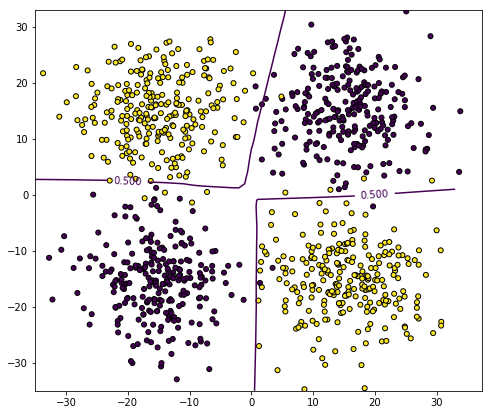

Accuracy = 0.98


In [95]:
def main4():
    data_num = 500  # param
    pai1 = 0.5      # param
    pai2 = 1 - pai1

    sigma = np.array([[40, 0],
                      [0, 40]]) # param

    mu1 = np.array([15, 15])    # param
    mu2 = np.array([15, -15])   # param
    mu3 = np.array([-15, 15])   # param
    mu4 = np.array([-15, -15])  # param
    
    X1, Y1 = make_data(data_num, pai1, pai2, mu1, mu2, sigma, sigma)
    X2, Y2 = make_data(data_num, pai1, pai2, mu4, mu3, sigma, sigma)
    X = np.vstack((X1, X2))
    Y = np.hstack((Y1, Y2))
    
    node_count = 10
    hidden_count = 10
    epochs = 20
    run(X, Y, node_count, hidden_count, epochs)
main4()